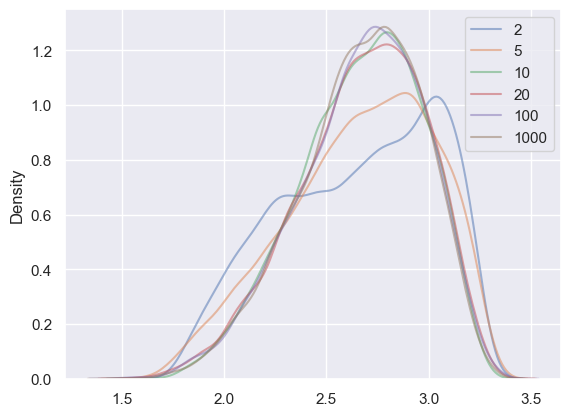

In [181]:
from scipy import stats

# N = 10000
# alpha = np.random.randn()
# beta = np.random.randn(1000)
# for p in [2,5,10,20,100,1000]:
#     X = np.random.rand(N*p).reshape((N,p))
#     eta = 2*(X-0.5).dot(beta[:p])/np.sqrt(p) + alpha
#     z = eta
#     sns.kdeplot(z, alpha=0.5, label=p)
# plt.legend()
# # plt.xlim(0,1)


N = 10000
alpha = np.random.randn()
beta = np.random.randn(1000)
for p in [2,5,10,20,100,1000]:
    X = np.random.rand(N*p).reshape((N,p))
    eta = 2*(X-0.5).dot(beta[:p])/np.sqrt(p) + alpha
    z = 1 + 5*gam*stats.logistic.cdf(eta)
    sns.kdeplot(z, alpha=0.5, label=p)
plt.legend()
# plt.xlim(0,1)

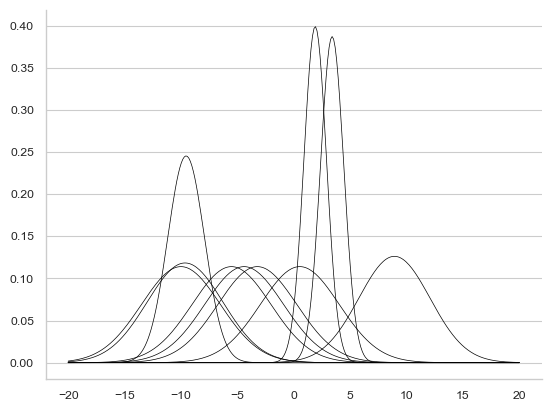

In [226]:
from pyfrechet.metric_spaces import *
import numpy as np
from scipy import stats

np.random.seed(22)
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")
p = 10
alpha=np.random.randn()
beta=np.random.randn(p)
sig0=1
gam=2.5
for i in range(10):    
    x = np.random.randn(p)
    eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
    mu = 10*np.cos(eta*np.pi)
    sig = sig0 + gam*stats.logistic.cdf(eta)
    xs = np.linspace(-20,20,300)
    plt.plot(xs, stats.norm.pdf(xs, loc=mu, scale=sig), color='black', alpha=1, linewidth=0.5)
plt.gca().spines[['right', 'top']].set_visible(False)
plt.grid(axis='x')
plt.savefig("./plots/sample_wasserstein.pdf")

In [8]:
import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 
from benchmark import bench

import numpy as np
from scipy import stats

from pyfrechet.metric_spaces import *
import pyfrechet.metric_spaces.wasserstein_1d as W1d

OUT_FILE = 'results/20230619-result_wasserstein.json'

def gen_data(N, p, alpha, beta, sig0=1, gam=2.5):
    M = W1d.Wasserstein1D()
    
    STD_NORMAL_Q = stats.norm.ppf(W1d.Wasserstein1D.GRID)
    STD_NORMAL_Q[0] = 2*STD_NORMAL_Q[1] - STD_NORMAL_Q[2] # lexp to avoid infs
    STD_NORMAL_Q[-1] = 2*STD_NORMAL_Q[-2] - STD_NORMAL_Q[-3] # lexp to avoid infs

    def m(x):
        eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
        mu = eta
        sig = sig0 + gam*stats.logistic.cdf(eta)
        return mu + sig * STD_NORMAL_Q

    x = np.random.rand(N*p).reshape((N,p))
    mx = np.array([ m(x[i,:]) for i in range(N)])
    y = np.array([ W1d.noise_2(mx[i,:], l=2) for i in range(N)])

    return x, MetricData(M, y), MetricData(M, mx)

bench(
    gen_data,
    OUT_FILE,
    ps=[2, 5, 10, 20],
    Ns=[50,100,200,400],
    replicas=100
)

[2023-06-19 15:25:05.188687] Progress: N=50	p=2	i=0
[2023-06-19 15:25:05.195019] Distances for cart_2means
[2023-06-19 15:25:05.195027] dt = 0
[2023-06-19 15:25:05.195031] Fitting for cart_2means
[2023-06-19 15:25:05.213569] dt = 0.018548011779785156
[2023-06-19 15:25:05.213590] MSE for cart_2means
[2023-06-19 15:25:05.216136] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
 /Users/matthieubulte/.pyenv/versions/3.9.16/lib/python3.9/site-packages/fdasrsf/umap_metric.py:22: NumbaDeprecationWarning:The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
 /Users/matthieubulte/.pyenv/versions/3.9.16/lib/python3.9/site-packages/fdasrsf/umap_metric.py:54: NumbaDeprecationWarning:The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will b

[2023-06-19 15:25:07.568321] dt = 2.352166175842285
[2023-06-19 15:25:07.568475] Fitting for medoid_2means
[2023-06-19 15:25:07.660605] dt = 0.0923008918762207
[2023-06-19 15:25:07.660644] MSE for medoid_2means
[2023-06-19 15:25:07.664683] Distances for medoid_greedy
[2023-06-19 15:25:07.664698] dt = 0.0
[2023-06-19 15:25:07.664702] Fitting for medoid_greedy
[2023-06-19 15:25:07.667706] dt = 0.0030241012573242188
[2023-06-19 15:25:07.667715] MSE for medoid_greedy
[2023-06-19 15:25:07.671575] Progress: N=50	p=2	i=1
[2023-06-19 15:25:07.676561] Distances for cart_2means
[2023-06-19 15:25:07.676567] dt = 0
[2023-06-19 15:25:07.676570] Fitting for cart_2means
[2023-06-19 15:25:07.790816] dt = 0.11425304412841797
[2023-06-19 15:25:07.790932] MSE for cart_2means
[2023-06-19 15:25:07.799273] Distances for medoid_2means
[2023-06-19 15:25:07.849059] dt = 0.04976630210876465
[2023-06-19 15:25:07.849075] Fitting for medoid_2means
[2023-06-19 15:25:07.864600] dt = 0.01556086540222168
[2023-06-19 1

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:08.001410] dt = 0.012803077697753906
[2023-06-19 15:25:08.001535] MSE for medoid_2means
[2023-06-19 15:25:08.004787] Distances for medoid_greedy
[2023-06-19 15:25:08.004795] dt = 7.152557373046875e-07
[2023-06-19 15:25:08.004800] Fitting for medoid_greedy
[2023-06-19 15:25:08.007635] dt = 0.0028471946716308594
[2023-06-19 15:25:08.007644] MSE for medoid_greedy
[2023-06-19 15:25:08.010254] Progress: N=50	p=2	i=4
[2023-06-19 15:25:08.015169] Distances for cart_2means
[2023-06-19 15:25:08.015186] dt = 0
[2023-06-19 15:25:08.015190] Fitting for cart_2means
[2023-06-19 15:25:08.034105] dt = 0.018935203552246094
[2023-06-19 15:25:08.034123] MSE for cart_2means
[2023-06-19 15:25:08.036425] Distances for medoid_2means
[2023-06-19 15:25:08.058848] dt = 0.02241683006286621
[2023-06-19 15:25:08.058861] Fitting for medoid_2means
[2023-06-19 15:25:08.075611] dt = 0.016767501831054688
[2023-06-19 15:25:08.075631] MSE for medoid_2means
[2023-06-19 15:25:08.078095] Distances for medo

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:08.207837] dt = 0.0225369930267334
[2023-06-19 15:25:08.207888] Fitting for medoid_2means
[2023-06-19 15:25:08.226707] dt = 0.018875837326049805
[2023-06-19 15:25:08.226726] MSE for medoid_2means
[2023-06-19 15:25:08.229166] Distances for medoid_greedy
[2023-06-19 15:25:08.229172] dt = 9.5367431640625e-07
[2023-06-19 15:25:08.229177] Fitting for medoid_greedy
[2023-06-19 15:25:08.232054] dt = 0.0028858184814453125
[2023-06-19 15:25:08.232072] MSE for medoid_greedy
[2023-06-19 15:25:08.234809] Progress: N=50	p=2	i=7
[2023-06-19 15:25:08.240083] Distances for cart_2means
[2023-06-19 15:25:08.240090] dt = 0
[2023-06-19 15:25:08.240093] Fitting for cart_2means
[2023-06-19 15:25:08.255686] dt = 0.015601158142089844
[2023-06-19 15:25:08.255705] MSE for cart_2means
[2023-06-19 15:25:08.258206] Distances for medoid_2means
[2023-06-19 15:25:08.279951] dt = 0.02173590660095215
[2023-06-19 15:25:08.279965] Fitting for medoid_2means
[2023-06-19 15:25:08.291325] dt = 0.01138210296

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:08.427396] dt = 0.023351192474365234
[2023-06-19 15:25:08.427459] Fitting for medoid_2means
[2023-06-19 15:25:08.446402] dt = 0.019018888473510742
[2023-06-19 15:25:08.446421] MSE for medoid_2means
[2023-06-19 15:25:08.448873] Distances for medoid_greedy
[2023-06-19 15:25:08.448884] dt = 9.5367431640625e-07
[2023-06-19 15:25:08.448890] Fitting for medoid_greedy
[2023-06-19 15:25:08.451784] dt = 0.002911090850830078
[2023-06-19 15:25:08.451795] MSE for medoid_greedy
[2023-06-19 15:25:08.454446] Progress: N=50	p=2	i=10
[2023-06-19 15:25:08.459210] Distances for cart_2means
[2023-06-19 15:25:08.459216] dt = 0
[2023-06-19 15:25:08.459219] Fitting for cart_2means
[2023-06-19 15:25:08.480163] dt = 0.020951032638549805
[2023-06-19 15:25:08.480184] MSE for cart_2means
[2023-06-19 15:25:08.482628] Distances for medoid_2means
[2023-06-19 15:25:08.504337] dt = 0.021695375442504883
[2023-06-19 15:25:08.504351] Fitting for medoid_2means
[2023-06-19 15:25:08.521204] dt = 0.01687955

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:08.650331] dt = 0.022964000701904297
[2023-06-19 15:25:08.650400] Fitting for medoid_2means
[2023-06-19 15:25:08.666568] dt = 0.016241788864135742
[2023-06-19 15:25:08.666586] MSE for medoid_2means
[2023-06-19 15:25:08.669023] Distances for medoid_greedy
[2023-06-19 15:25:08.669031] dt = 9.5367431640625e-07
[2023-06-19 15:25:08.669037] Fitting for medoid_greedy
[2023-06-19 15:25:08.671879] dt = 0.0028548240661621094
[2023-06-19 15:25:08.671886] MSE for medoid_greedy
[2023-06-19 15:25:08.674515] Progress: N=50	p=2	i=13
[2023-06-19 15:25:08.679289] Distances for cart_2means
[2023-06-19 15:25:08.679295] dt = 0
[2023-06-19 15:25:08.679298] Fitting for cart_2means
[2023-06-19 15:25:08.701868] dt = 0.022574901580810547
[2023-06-19 15:25:08.701910] MSE for cart_2means
[2023-06-19 15:25:08.704455] Distances for medoid_2means
[2023-06-19 15:25:08.727855] dt = 0.023386001586914062
[2023-06-19 15:25:08.727869] Fitting for medoid_2means
[2023-06-19 15:25:08.744418] dt = 0.0165770

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:08.853783] Distances for medoid_2means
[2023-06-19 15:25:08.875948] dt = 0.022126197814941406
[2023-06-19 15:25:08.875961] Fitting for medoid_2means
[2023-06-19 15:25:08.893793] dt = 0.017883777618408203
[2023-06-19 15:25:08.893812] MSE for medoid_2means
[2023-06-19 15:25:08.896276] Distances for medoid_greedy
[2023-06-19 15:25:08.896285] dt = 9.5367431640625e-07
[2023-06-19 15:25:08.896291] Fitting for medoid_greedy
[2023-06-19 15:25:08.898996] dt = 0.002719879150390625
[2023-06-19 15:25:08.899005] MSE for medoid_greedy
[2023-06-19 15:25:08.901657] Progress: N=50	p=2	i=16
[2023-06-19 15:25:08.906409] Distances for cart_2means
[2023-06-19 15:25:08.906416] dt = 0
[2023-06-19 15:25:08.906419] Fitting for cart_2means
[2023-06-19 15:25:08.922500] dt = 0.01609015464782715
[2023-06-19 15:25:08.922519] MSE for cart_2means
[2023-06-19 15:25:08.924961] Distances for medoid_2means
[2023-06-19 15:25:08.946805] dt = 0.021836042404174805
[2023-06-19 15:25:08.946819] Fitting for me

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:09.056808] dt = 0.019289731979370117
[2023-06-19 15:25:09.056855] MSE for cart_2means
[2023-06-19 15:25:09.059543] Distances for medoid_2means
[2023-06-19 15:25:09.082324] dt = 0.02276778221130371
[2023-06-19 15:25:09.082338] Fitting for medoid_2means
[2023-06-19 15:25:09.103571] dt = 0.021257400512695312
[2023-06-19 15:25:09.103615] MSE for medoid_2means
[2023-06-19 15:25:09.106759] Distances for medoid_greedy
[2023-06-19 15:25:09.106781] dt = 0.0
[2023-06-19 15:25:09.106786] Fitting for medoid_greedy
[2023-06-19 15:25:09.109787] dt = 0.0030269622802734375
[2023-06-19 15:25:09.109810] MSE for medoid_greedy
[2023-06-19 15:25:09.112917] Progress: N=50	p=2	i=19
[2023-06-19 15:25:09.117957] Distances for cart_2means
[2023-06-19 15:25:09.117979] dt = 0
[2023-06-19 15:25:09.117982] Fitting for cart_2means
[2023-06-19 15:25:09.196618] dt = 0.0786581039428711
[2023-06-19 15:25:09.196702] MSE for cart_2means
[2023-06-19 15:25:09.199522] Distances for medoid_2means
[2023-06-19

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:09.263372] dt = 0.021327972412109375
[2023-06-19 15:25:09.263499] MSE for medoid_2means
[2023-06-19 15:25:09.266448] Distances for medoid_greedy
[2023-06-19 15:25:09.266469] dt = 0.0
[2023-06-19 15:25:09.266473] Fitting for medoid_greedy
[2023-06-19 15:25:09.270306] dt = 0.0038568973541259766
[2023-06-19 15:25:09.270332] MSE for medoid_greedy
[2023-06-19 15:25:09.273475] Progress: N=50	p=2	i=20
[2023-06-19 15:25:09.278541] Distances for cart_2means
[2023-06-19 15:25:09.278557] dt = 0
[2023-06-19 15:25:09.278561] Fitting for cart_2means
[2023-06-19 15:25:09.300370] dt = 0.021828651428222656
[2023-06-19 15:25:09.300389] MSE for cart_2means
[2023-06-19 15:25:09.302913] Distances for medoid_2means
[2023-06-19 15:25:09.325080] dt = 0.022157907485961914
[2023-06-19 15:25:09.325096] Fitting for medoid_2means
[2023-06-19 15:25:09.339862] dt = 0.014786958694458008
[2023-06-19 15:25:09.339905] MSE for medoid_2means
[2023-06-19 15:25:09.343683] Distances for medoid_greedy
[2023-

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:09.670084] Progress: N=50	p=2	i=25
[2023-06-19 15:25:09.676881] Distances for cart_2means
[2023-06-19 15:25:09.676897] dt = 0
[2023-06-19 15:25:09.676901] Fitting for cart_2means
[2023-06-19 15:25:09.701515] dt = 0.024633169174194336
[2023-06-19 15:25:09.701541] MSE for cart_2means
[2023-06-19 15:25:09.703938] Distances for medoid_2means
[2023-06-19 15:25:09.725734] dt = 0.02178812026977539
[2023-06-19 15:25:09.725747] Fitting for medoid_2means
[2023-06-19 15:25:09.743987] dt = 0.018259763717651367
[2023-06-19 15:25:09.744005] MSE for medoid_2means
[2023-06-19 15:25:09.746417] Distances for medoid_greedy
[2023-06-19 15:25:09.746424] dt = 9.5367431640625e-07
[2023-06-19 15:25:09.746429] Fitting for medoid_greedy
[2023-06-19 15:25:09.749456] dt = 0.0030374526977539062
[2023-06-19 15:25:09.749475] MSE for medoid_greedy
[2023-06-19 15:25:09.752520] Progress: N=50	p=2	i=26
[2023-06-19 15:25:09.757557] Distances for cart_2means
[2023-06-19 15:25:09.757574] dt = 0
[2023-06-1

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:09.880340] dt = 0.013802766799926758
[2023-06-19 15:25:09.880409] MSE for medoid_2means
[2023-06-19 15:25:09.883345] Distances for medoid_greedy
[2023-06-19 15:25:09.883366] dt = 0.0
[2023-06-19 15:25:09.883371] Fitting for medoid_greedy
[2023-06-19 15:25:09.886431] dt = 0.0030868053436279297
[2023-06-19 15:25:09.886446] MSE for medoid_greedy
[2023-06-19 15:25:09.889469] Progress: N=50	p=2	i=28
[2023-06-19 15:25:09.894282] Distances for cart_2means
[2023-06-19 15:25:09.894289] dt = 0
[2023-06-19 15:25:09.894292] Fitting for cart_2means
[2023-06-19 15:25:09.921642] dt = 0.027357816696166992
[2023-06-19 15:25:09.921662] MSE for cart_2means
[2023-06-19 15:25:09.924181] Distances for medoid_2means
[2023-06-19 15:25:09.946561] dt = 0.022361040115356445
[2023-06-19 15:25:09.946575] Fitting for medoid_2means
[2023-06-19 15:25:09.965507] dt = 0.018964052200317383
[2023-06-19 15:25:09.965530] MSE for medoid_2means
[2023-06-19 15:25:09.968004] Distances for medoid_greedy
[2023-

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:10.097366] dt = 0.02372574806213379
[2023-06-19 15:25:10.097455] Fitting for medoid_2means
[2023-06-19 15:25:10.109640] dt = 0.012293100357055664
[2023-06-19 15:25:10.109656] MSE for medoid_2means
[2023-06-19 15:25:10.111986] Distances for medoid_greedy
[2023-06-19 15:25:10.111992] dt = 0.0
[2023-06-19 15:25:10.111996] Fitting for medoid_greedy
[2023-06-19 15:25:10.114773] dt = 0.0027871131896972656
[2023-06-19 15:25:10.114782] MSE for medoid_greedy
[2023-06-19 15:25:10.117881] Progress: N=50	p=2	i=31
[2023-06-19 15:25:10.122802] Distances for cart_2means
[2023-06-19 15:25:10.122817] dt = 0
[2023-06-19 15:25:10.122821] Fitting for cart_2means
[2023-06-19 15:25:10.141315] dt = 0.018512248992919922
[2023-06-19 15:25:10.141333] MSE for cart_2means
[2023-06-19 15:25:10.143741] Distances for medoid_2means
[2023-06-19 15:25:10.166257] dt = 0.022509098052978516
[2023-06-19 15:25:10.166271] Fitting for medoid_2means
[2023-06-19 15:25:10.178696] dt = 0.012445926666259766
[2023

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:10.309705] dt = 0.023923873901367188
[2023-06-19 15:25:10.309760] Fitting for medoid_2means
[2023-06-19 15:25:10.325798] dt = 0.016101360321044922
[2023-06-19 15:25:10.325817] MSE for medoid_2means
[2023-06-19 15:25:10.328207] Distances for medoid_greedy
[2023-06-19 15:25:10.328214] dt = 0.0
[2023-06-19 15:25:10.328217] Fitting for medoid_greedy
[2023-06-19 15:25:10.331377] dt = 0.0031681060791015625
[2023-06-19 15:25:10.331393] MSE for medoid_greedy
[2023-06-19 15:25:10.334495] Progress: N=50	p=2	i=34
[2023-06-19 15:25:10.339236] Distances for cart_2means
[2023-06-19 15:25:10.339242] dt = 0
[2023-06-19 15:25:10.339245] Fitting for cart_2means
[2023-06-19 15:25:10.361379] dt = 0.022140026092529297
[2023-06-19 15:25:10.361399] MSE for cart_2means
[2023-06-19 15:25:10.363862] Distances for medoid_2means
[2023-06-19 15:25:10.386075] dt = 0.022204160690307617
[2023-06-19 15:25:10.386089] Fitting for medoid_2means
[2023-06-19 15:25:10.405267] dt = 0.01919865608215332
[2023

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:10.534111] dt = 0.023530960083007812
[2023-06-19 15:25:10.534168] Fitting for medoid_2means
[2023-06-19 15:25:10.546223] dt = 0.01212310791015625
[2023-06-19 15:25:10.546236] MSE for medoid_2means
[2023-06-19 15:25:10.548750] Distances for medoid_greedy
[2023-06-19 15:25:10.548761] dt = 0.0
[2023-06-19 15:25:10.548765] Fitting for medoid_greedy
[2023-06-19 15:25:10.551679] dt = 0.0029289722442626953
[2023-06-19 15:25:10.551690] MSE for medoid_greedy
[2023-06-19 15:25:10.554818] Progress: N=50	p=2	i=37
[2023-06-19 15:25:10.559716] Distances for cart_2means
[2023-06-19 15:25:10.559731] dt = 0
[2023-06-19 15:25:10.559734] Fitting for cart_2means
[2023-06-19 15:25:10.581092] dt = 0.02137589454650879
[2023-06-19 15:25:10.581114] MSE for cart_2means
[2023-06-19 15:25:10.583726] Distances for medoid_2means
[2023-06-19 15:25:10.606301] dt = 0.02256178855895996
[2023-06-19 15:25:10.606314] Fitting for medoid_2means
[2023-06-19 15:25:10.621418] dt = 0.015131235122680664
[2023-0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:10.757805] dt = 0.03615212440490723
[2023-06-19 15:25:10.758124] Fitting for medoid_2means
[2023-06-19 15:25:10.792792] dt = 0.035002708435058594
[2023-06-19 15:25:10.792815] MSE for medoid_2means
[2023-06-19 15:25:10.795454] Distances for medoid_greedy
[2023-06-19 15:25:10.795476] dt = 1.1920928955078125e-06
[2023-06-19 15:25:10.795483] Fitting for medoid_greedy
[2023-06-19 15:25:10.798463] dt = 0.0030059814453125
[2023-06-19 15:25:10.798492] MSE for medoid_greedy
[2023-06-19 15:25:10.801752] Progress: N=50	p=2	i=40
[2023-06-19 15:25:10.806725] Distances for cart_2means
[2023-06-19 15:25:10.806745] dt = 0
[2023-06-19 15:25:10.806748] Fitting for cart_2means
[2023-06-19 15:25:10.827175] dt = 0.020450830459594727
[2023-06-19 15:25:10.827195] MSE for cart_2means
[2023-06-19 15:25:10.829618] Distances for medoid_2means
[2023-06-19 15:25:10.851877] dt = 0.02225184440612793
[2023-06-19 15:25:10.851890] Fitting for medoid_2means
[2023-06-19 15:25:10.867141] dt = 0.015269279

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:10.987810] dt = 0.031066179275512695
[2023-06-19 15:25:10.987893] MSE for cart_2means
[2023-06-19 15:25:10.990587] Distances for medoid_2means
[2023-06-19 15:25:11.012628] dt = 0.022027969360351562
[2023-06-19 15:25:11.012641] Fitting for medoid_2means
[2023-06-19 15:25:11.029020] dt = 0.01640486717224121
[2023-06-19 15:25:11.029038] MSE for medoid_2means
[2023-06-19 15:25:11.031811] Distances for medoid_greedy
[2023-06-19 15:25:11.031819] dt = 1.1920928955078125e-06
[2023-06-19 15:25:11.031824] Fitting for medoid_greedy
[2023-06-19 15:25:11.034939] dt = 0.0031266212463378906
[2023-06-19 15:25:11.034948] MSE for medoid_greedy
[2023-06-19 15:25:11.038002] Progress: N=50	p=2	i=43
[2023-06-19 15:25:11.042784] Distances for cart_2means
[2023-06-19 15:25:11.042790] dt = 0
[2023-06-19 15:25:11.042793] Fitting for cart_2means
[2023-06-19 15:25:11.061330] dt = 0.01854395866394043
[2023-06-19 15:25:11.061348] MSE for cart_2means
[2023-06-19 15:25:11.063747] Distances for medoi

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:11.201456] dt = 0.01794719696044922
[2023-06-19 15:25:11.201614] MSE for cart_2means
[2023-06-19 15:25:11.204491] Distances for medoid_2means
[2023-06-19 15:25:11.227898] dt = 0.023390769958496094
[2023-06-19 15:25:11.227913] Fitting for medoid_2means
[2023-06-19 15:25:11.241002] dt = 0.013119220733642578
[2023-06-19 15:25:11.241020] MSE for medoid_2means
[2023-06-19 15:25:11.243432] Distances for medoid_greedy
[2023-06-19 15:25:11.243438] dt = 9.5367431640625e-07
[2023-06-19 15:25:11.243443] Fitting for medoid_greedy
[2023-06-19 15:25:11.246223] dt = 0.002789020538330078
[2023-06-19 15:25:11.246235] MSE for medoid_greedy
[2023-06-19 15:25:11.249404] Progress: N=50	p=2	i=46
[2023-06-19 15:25:11.254205] Distances for cart_2means
[2023-06-19 15:25:11.254211] dt = 0
[2023-06-19 15:25:11.254214] Fitting for cart_2means
[2023-06-19 15:25:11.273366] dt = 0.019161224365234375
[2023-06-19 15:25:11.273383] MSE for cart_2means
[2023-06-19 15:25:11.275778] Distances for medoid_2

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:11.422036] dt = 0.019227981567382812
[2023-06-19 15:25:11.422115] MSE for cart_2means
[2023-06-19 15:25:11.424803] Distances for medoid_2means
[2023-06-19 15:25:11.446035] dt = 0.0212249755859375
[2023-06-19 15:25:11.446048] Fitting for medoid_2means
[2023-06-19 15:25:11.459469] dt = 0.013440132141113281
[2023-06-19 15:25:11.459478] MSE for medoid_2means
[2023-06-19 15:25:11.461904] Distances for medoid_greedy
[2023-06-19 15:25:11.461911] dt = 0.0
[2023-06-19 15:25:11.461914] Fitting for medoid_greedy
[2023-06-19 15:25:11.465078] dt = 0.0031731128692626953
[2023-06-19 15:25:11.465089] MSE for medoid_greedy
[2023-06-19 15:25:11.468344] Progress: N=50	p=2	i=49
[2023-06-19 15:25:11.473232] Distances for cart_2means
[2023-06-19 15:25:11.473243] dt = 0
[2023-06-19 15:25:11.473246] Fitting for cart_2means
[2023-06-19 15:25:11.497269] dt = 0.024035930633544922
[2023-06-19 15:25:11.497290] MSE for cart_2means
[2023-06-19 15:25:11.499748] Distances for medoid_2means
[2023-06-1

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:11.642048] dt = 0.02141094207763672
[2023-06-19 15:25:11.642120] MSE for cart_2means
[2023-06-19 15:25:11.644851] Distances for medoid_2means
[2023-06-19 15:25:11.665689] dt = 0.02082991600036621
[2023-06-19 15:25:11.665701] Fitting for medoid_2means
[2023-06-19 15:25:11.683935] dt = 0.018253087997436523
[2023-06-19 15:25:11.683945] MSE for medoid_2means
[2023-06-19 15:25:11.686281] Distances for medoid_greedy
[2023-06-19 15:25:11.686287] dt = 1.1920928955078125e-06
[2023-06-19 15:25:11.686292] Fitting for medoid_greedy
[2023-06-19 15:25:11.689260] dt = 0.0029778480529785156
[2023-06-19 15:25:11.689266] MSE for medoid_greedy
[2023-06-19 15:25:11.692399] Progress: N=50	p=2	i=52
[2023-06-19 15:25:11.697302] Distances for cart_2means
[2023-06-19 15:25:11.697318] dt = 0
[2023-06-19 15:25:11.697321] Fitting for cart_2means
[2023-06-19 15:25:11.722063] dt = 0.02476024627685547
[2023-06-19 15:25:11.722084] MSE for cart_2means
[2023-06-19 15:25:11.724545] Distances for medoid

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-19 15:25:11.844107] Progress: N=50	p=2	i=54
[2023-06-19 15:25:11.850133] Distances for cart_2means
[2023-06-19 15:25:11.850150] dt = 0
[2023-06-19 15:25:11.850154] Fitting for cart_2means
[2023-06-19 15:25:11.911791] dt = 0.061656951904296875
[2023-06-19 15:25:11.911811] MSE for cart_2means
[2023-06-19 15:25:11.914348] Distances for medoid_2means
[2023-06-19 15:25:11.949664] dt = 0.03530073165893555
[2023-06-19 15:25:11.949679] Fitting for medoid_2means
[2023-06-19 15:25:11.964451] dt = 0.01480245590209961
[2023-06-19 15:25:11.964468] MSE for medoid_2means
[2023-06-19 15:25:11.967075] Distances for medoid_greedy
[2023-06-19 15:25:11.967084] dt = 9.5367431640625e-07
[2023-06-19 15:25:11.967090] Fitting for medoid_greedy
[2023-06-19 15:25:11.970029] dt = 0.0029528141021728516
[2023-06-19 15:25:11.970038] MSE for medoid_greedy
[2023-06-19 15:25:11.973263] Progress: N=50	p=2	i=55
[2023-06-19 15:25:11.978189] Distances for cart_2means
[2023-06-19 15:25:11.978198] dt = 0
[2023-06-19

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-19 15:25:12.071776] dt = 0.020353078842163086
[2023-06-19 15:25:12.071845] MSE for cart_2means
[2023-06-19 15:25:12.074962] Distances for medoid_2means
[2023-06-19 15:25:12.096299] dt = 0.021329879760742188
[2023-06-19 15:25:12.096310] Fitting for medoid_2means
[2023-06-19 15:25:12.112656] dt = 0.016364336013793945
[2023-06-19 15:25:12.112666] MSE for medoid_2means
[2023-06-19 15:25:12.115085] Distances for medoid_greedy
[2023-06-19 15:25:12.115091] dt = 9.5367431640625e-07
[2023-06-19 15:25:12.115096] Fitting for medoid_greedy
[2023-06-19 15:25:12.118008] dt = 0.002920866012573242
[2023-06-19 15:25:12.118021] MSE for medoid_greedy
[2023-06-19 15:25:12.121320] Progress: N=50	p=2	i=57
[2023-06-19 15:25:12.126216] Distances for cart_2means
[2023-06-19 15:25:12.126230] dt = 0
[2023-06-19 15:25:12.126233] Fitting for cart_2means
[2023-06-19 15:25:12.147119] dt = 0.020900964736938477
[2023-06-19 15:25:12.147145] MSE for cart_2means
[2023-06-19 15:25:12.149666] Distances for medoid_

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-19 15:25:12.302066] dt = 0.024486303329467773
[2023-06-19 15:25:12.302136] MSE for cart_2means
[2023-06-19 15:25:12.305173] Distances for medoid_2means
[2023-06-19 15:25:12.327236] dt = 0.022054195404052734
[2023-06-19 15:25:12.327249] Fitting for medoid_2means
[2023-06-19 15:25:12.340747] dt = 0.013518810272216797
[2023-06-19 15:25:12.340757] MSE for medoid_2means
[2023-06-19 15:25:12.343143] Distances for medoid_greedy
[2023-06-19 15:25:12.343149] dt = 0.0
[2023-06-19 15:25:12.343152] Fitting for medoid_greedy
[2023-06-19 15:25:12.346145] dt = 0.003002166748046875
[2023-06-19 15:25:12.346151] MSE for medoid_greedy
[2023-06-19 15:25:12.349341] Progress: N=50	p=2	i=60
[2023-06-19 15:25:12.354103] Distances for cart_2means
[2023-06-19 15:25:12.354108] dt = 0
[2023-06-19 15:25:12.354111] Fitting for cart_2means
[2023-06-19 15:25:12.372100] dt = 0.01799607276916504
[2023-06-19 15:25:12.372119] MSE for cart_2means
[2023-06-19 15:25:12.374577] Distances for medoid_2means
[2023-06-1

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:12.521788] dt = 0.01751422882080078
[2023-06-19 15:25:12.521855] MSE for cart_2means
[2023-06-19 15:25:12.524489] Distances for medoid_2means
[2023-06-19 15:25:12.546731] dt = 0.022233009338378906
[2023-06-19 15:25:12.546744] Fitting for medoid_2means
[2023-06-19 15:25:12.560383] dt = 0.013659954071044922
[2023-06-19 15:25:12.560397] MSE for medoid_2means
[2023-06-19 15:25:12.562998] Distances for medoid_greedy
[2023-06-19 15:25:12.563014] dt = 7.152557373046875e-07
[2023-06-19 15:25:12.563021] Fitting for medoid_greedy
[2023-06-19 15:25:12.565944] dt = 0.0029463768005371094
[2023-06-19 15:25:12.565962] MSE for medoid_greedy
[2023-06-19 15:25:12.569666] Progress: N=50	p=2	i=63
[2023-06-19 15:25:12.574553] Distances for cart_2means
[2023-06-19 15:25:12.574571] dt = 0
[2023-06-19 15:25:12.574575] Fitting for cart_2means
[2023-06-19 15:25:12.598492] dt = 0.023938894271850586
[2023-06-19 15:25:12.598509] MSE for cart_2means
[2023-06-19 15:25:12.601623] Distances for medoi

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:12.740265] dt = 0.019134044647216797
[2023-06-19 15:25:12.740342] MSE for cart_2means
[2023-06-19 15:25:12.743016] Distances for medoid_2means
[2023-06-19 15:25:12.764366] dt = 0.021339893341064453
[2023-06-19 15:25:12.764380] Fitting for medoid_2means
[2023-06-19 15:25:12.778602] dt = 0.014245033264160156
[2023-06-19 15:25:12.778621] MSE for medoid_2means
[2023-06-19 15:25:12.781147] Distances for medoid_greedy
[2023-06-19 15:25:12.781154] dt = 1.1920928955078125e-06
[2023-06-19 15:25:12.781159] Fitting for medoid_greedy
[2023-06-19 15:25:12.783971] dt = 0.0028228759765625
[2023-06-19 15:25:12.783977] MSE for medoid_greedy
[2023-06-19 15:25:12.787346] Progress: N=50	p=2	i=66
[2023-06-19 15:25:12.792159] Distances for cart_2means
[2023-06-19 15:25:12.792169] dt = 0
[2023-06-19 15:25:12.792172] Fitting for cart_2means
[2023-06-19 15:25:12.819998] dt = 0.027835845947265625
[2023-06-19 15:25:12.820019] MSE for cart_2means
[2023-06-19 15:25:12.822552] Distances for medoid

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:12.952171] dt = 0.0248260498046875
[2023-06-19 15:25:12.952248] MSE for medoid_2means
[2023-06-19 15:25:12.954992] Distances for medoid_greedy
[2023-06-19 15:25:12.955003] dt = 7.152557373046875e-07
[2023-06-19 15:25:12.955009] Fitting for medoid_greedy
[2023-06-19 15:25:12.958071] dt = 0.003077268600463867
[2023-06-19 15:25:12.958093] MSE for medoid_greedy
[2023-06-19 15:25:12.961689] Progress: N=50	p=2	i=68
[2023-06-19 15:25:12.966750] Distances for cart_2means
[2023-06-19 15:25:12.966769] dt = 0
[2023-06-19 15:25:12.966773] Fitting for cart_2means
[2023-06-19 15:25:12.988060] dt = 0.02130913734436035
[2023-06-19 15:25:12.988081] MSE for cart_2means
[2023-06-19 15:25:12.990632] Distances for medoid_2means
[2023-06-19 15:25:13.014168] dt = 0.02352595329284668
[2023-06-19 15:25:13.014185] Fitting for medoid_2means
[2023-06-19 15:25:13.034525] dt = 0.02036595344543457
[2023-06-19 15:25:13.034545] MSE for medoid_2means
[2023-06-19 15:25:13.037031] Distances for medoid_g

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:13.170717] dt = 0.02329087257385254
[2023-06-19 15:25:13.170773] Fitting for medoid_2means
[2023-06-19 15:25:13.190088] dt = 0.01938605308532715
[2023-06-19 15:25:13.190107] MSE for medoid_2means
[2023-06-19 15:25:13.192483] Distances for medoid_greedy
[2023-06-19 15:25:13.192489] dt = 0.0
[2023-06-19 15:25:13.192492] Fitting for medoid_greedy
[2023-06-19 15:25:13.195225] dt = 0.0027430057525634766
[2023-06-19 15:25:13.195231] MSE for medoid_greedy
[2023-06-19 15:25:13.198682] Progress: N=50	p=2	i=71
[2023-06-19 15:25:13.203559] Distances for cart_2means
[2023-06-19 15:25:13.203573] dt = 0
[2023-06-19 15:25:13.203576] Fitting for cart_2means
[2023-06-19 15:25:13.223667] dt = 0.020107030868530273
[2023-06-19 15:25:13.223688] MSE for cart_2means
[2023-06-19 15:25:13.226230] Distances for medoid_2means
[2023-06-19 15:25:13.247689] dt = 0.02144598960876465
[2023-06-19 15:25:13.247703] Fitting for medoid_2means
[2023-06-19 15:25:13.260902] dt = 0.013227224349975586
[2023-0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-19 15:25:13.396256] dt = 0.02755594253540039
[2023-06-19 15:25:13.396323] Fitting for medoid_2means
[2023-06-19 15:25:13.415764] dt = 0.019515037536621094
[2023-06-19 15:25:13.415813] MSE for medoid_2means
[2023-06-19 15:25:13.418627] Distances for medoid_greedy
[2023-06-19 15:25:13.418650] dt = 9.5367431640625e-07
[2023-06-19 15:25:13.418659] Fitting for medoid_greedy
[2023-06-19 15:25:13.421681] dt = 0.0030510425567626953
[2023-06-19 15:25:13.421707] MSE for medoid_greedy
[2023-06-19 15:25:13.425541] Progress: N=50	p=2	i=74
[2023-06-19 15:25:13.430603] Distances for cart_2means
[2023-06-19 15:25:13.430624] dt = 0
[2023-06-19 15:25:13.430628] Fitting for cart_2means
[2023-06-19 15:25:13.495432] dt = 0.06482791900634766
[2023-06-19 15:25:13.495457] MSE for cart_2means
[2023-06-19 15:25:13.498021] Distances for medoid_2means
[2023-06-19 15:25:13.523554] dt = 0.025511980056762695
[2023-06-19 15:25:13.523569] Fitting for medoid_2means
[2023-06-19 15:25:13.539109] dt = 0.015575170

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:13.600058] dt = 0.022753238677978516
[2023-06-19 15:25:13.600114] Fitting for medoid_2means
[2023-06-19 15:25:13.618829] dt = 0.01877593994140625
[2023-06-19 15:25:13.618848] MSE for medoid_2means
[2023-06-19 15:25:13.621512] Distances for medoid_greedy
[2023-06-19 15:25:13.621521] dt = 0.0
[2023-06-19 15:25:13.621524] Fitting for medoid_greedy
[2023-06-19 15:25:13.624195] dt = 0.0026831626892089844
[2023-06-19 15:25:13.624202] MSE for medoid_greedy
[2023-06-19 15:25:13.627531] Progress: N=50	p=2	i=76
[2023-06-19 15:25:13.632357] Distances for cart_2means
[2023-06-19 15:25:13.632373] dt = 0
[2023-06-19 15:25:13.632376] Fitting for cart_2means
[2023-06-19 15:25:13.659018] dt = 0.026657819747924805
[2023-06-19 15:25:13.659061] MSE for cart_2means
[2023-06-19 15:25:13.662373] Distances for medoid_2means
[2023-06-19 15:25:13.687302] dt = 0.024913311004638672
[2023-06-19 15:25:13.687315] Fitting for medoid_2means
[2023-06-19 15:25:13.706038] dt = 0.018750429153442383
[2023

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:13.820315] dt = 0.022536039352416992
[2023-06-19 15:25:13.820386] MSE for cart_2means
[2023-06-19 15:25:13.823085] Distances for medoid_2means
[2023-06-19 15:25:13.844869] dt = 0.021776199340820312
[2023-06-19 15:25:13.844882] Fitting for medoid_2means
[2023-06-19 15:25:13.862826] dt = 0.017961740493774414
[2023-06-19 15:25:13.862887] MSE for medoid_2means
[2023-06-19 15:25:13.865337] Distances for medoid_greedy
[2023-06-19 15:25:13.865346] dt = 9.5367431640625e-07
[2023-06-19 15:25:13.865352] Fitting for medoid_greedy
[2023-06-19 15:25:13.868418] dt = 0.0030808448791503906
[2023-06-19 15:25:13.868425] MSE for medoid_greedy
[2023-06-19 15:25:13.871843] Progress: N=50	p=2	i=79
[2023-06-19 15:25:13.876554] Distances for cart_2means
[2023-06-19 15:25:13.876559] dt = 0
[2023-06-19 15:25:13.876562] Fitting for cart_2means
[2023-06-19 15:25:13.893468] dt = 0.016911983489990234
[2023-06-19 15:25:13.893487] MSE for cart_2means
[2023-06-19 15:25:13.895889] Distances for medoid

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:14.030346] dt = 0.02000594139099121
[2023-06-19 15:25:14.030402] MSE for cart_2means
[2023-06-19 15:25:14.033006] Distances for medoid_2means
[2023-06-19 15:25:14.054958] dt = 0.02193307876586914
[2023-06-19 15:25:14.054971] Fitting for medoid_2means
[2023-06-19 15:25:14.071057] dt = 0.016118764877319336
[2023-06-19 15:25:14.071071] MSE for medoid_2means
[2023-06-19 15:25:14.073536] Distances for medoid_greedy
[2023-06-19 15:25:14.073544] dt = 1.1920928955078125e-06
[2023-06-19 15:25:14.073549] Fitting for medoid_greedy
[2023-06-19 15:25:14.076346] dt = 0.002808094024658203
[2023-06-19 15:25:14.076353] MSE for medoid_greedy
[2023-06-19 15:25:14.079806] Progress: N=50	p=2	i=82
[2023-06-19 15:25:14.084613] Distances for cart_2means
[2023-06-19 15:25:14.084620] dt = 0
[2023-06-19 15:25:14.084624] Fitting for cart_2means
[2023-06-19 15:25:14.103018] dt = 0.01840376853942871
[2023-06-19 15:25:14.103032] MSE for cart_2means
[2023-06-19 15:25:14.105414] Distances for medoid_

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:14.239937] dt = 0.01807689666748047
[2023-06-19 15:25:14.239988] MSE for cart_2means
[2023-06-19 15:25:14.242628] Distances for medoid_2means
[2023-06-19 15:25:14.264880] dt = 0.022244930267333984
[2023-06-19 15:25:14.264894] Fitting for medoid_2means
[2023-06-19 15:25:14.280837] dt = 0.015964031219482422
[2023-06-19 15:25:14.280849] MSE for medoid_2means
[2023-06-19 15:25:14.283301] Distances for medoid_greedy
[2023-06-19 15:25:14.283309] dt = 9.5367431640625e-07
[2023-06-19 15:25:14.283315] Fitting for medoid_greedy
[2023-06-19 15:25:14.286077] dt = 0.002773761749267578
[2023-06-19 15:25:14.286083] MSE for medoid_greedy
[2023-06-19 15:25:14.289511] Progress: N=50	p=2	i=85
[2023-06-19 15:25:14.294363] Distances for cart_2means
[2023-06-19 15:25:14.294374] dt = 0
[2023-06-19 15:25:14.294377] Fitting for cart_2means
[2023-06-19 15:25:14.309819] dt = 0.015455007553100586
[2023-06-19 15:25:14.309837] MSE for cart_2means
[2023-06-19 15:25:14.312178] Distances for medoid_2

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:14.450114] dt = 0.018656015396118164
[2023-06-19 15:25:14.450174] MSE for cart_2means
[2023-06-19 15:25:14.452981] Distances for medoid_2means
[2023-06-19 15:25:14.474492] dt = 0.021503210067749023
[2023-06-19 15:25:14.474506] Fitting for medoid_2means
[2023-06-19 15:25:14.488531] dt = 0.014044761657714844
[2023-06-19 15:25:14.488548] MSE for medoid_2means
[2023-06-19 15:25:14.490980] Distances for medoid_greedy
[2023-06-19 15:25:14.490987] dt = 0.0
[2023-06-19 15:25:14.490990] Fitting for medoid_greedy
[2023-06-19 15:25:14.493773] dt = 0.0027930736541748047
[2023-06-19 15:25:14.493779] MSE for medoid_greedy
[2023-06-19 15:25:14.497239] Progress: N=50	p=2	i=88
[2023-06-19 15:25:14.501951] Distances for cart_2means
[2023-06-19 15:25:14.501957] dt = 0
[2023-06-19 15:25:14.501960] Fitting for cart_2means
[2023-06-19 15:25:14.519415] dt = 0.017462968826293945
[2023-06-19 15:25:14.519429] MSE for cart_2means
[2023-06-19 15:25:14.521838] Distances for medoid_2means
[2023-06

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:14.658538] dt = 0.019044876098632812
[2023-06-19 15:25:14.658582] MSE for cart_2means
[2023-06-19 15:25:14.661301] Distances for medoid_2means
[2023-06-19 15:25:14.683200] dt = 0.02189016342163086
[2023-06-19 15:25:14.683213] Fitting for medoid_2means
[2023-06-19 15:25:14.698866] dt = 0.015671968460083008
[2023-06-19 15:25:14.698908] MSE for medoid_2means
[2023-06-19 15:25:14.701564] Distances for medoid_greedy
[2023-06-19 15:25:14.701577] dt = 9.5367431640625e-07
[2023-06-19 15:25:14.701583] Fitting for medoid_greedy
[2023-06-19 15:25:14.704676] dt = 0.003111124038696289
[2023-06-19 15:25:14.704685] MSE for medoid_greedy
[2023-06-19 15:25:14.709172] Progress: N=50	p=2	i=91
[2023-06-19 15:25:14.714083] Distances for cart_2means
[2023-06-19 15:25:14.714096] dt = 0
[2023-06-19 15:25:14.714099] Fitting for cart_2means
[2023-06-19 15:25:14.731898] dt = 0.017815113067626953
[2023-06-19 15:25:14.731919] MSE for cart_2means
[2023-06-19 15:25:14.734403] Distances for medoid_2

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:14.881299] dt = 0.02250385284423828
[2023-06-19 15:25:14.881376] MSE for cart_2means
[2023-06-19 15:25:14.884016] Distances for medoid_2means
[2023-06-19 15:25:14.905573] dt = 0.021548032760620117
[2023-06-19 15:25:14.905586] Fitting for medoid_2means
[2023-06-19 15:25:14.921685] dt = 0.016119956970214844
[2023-06-19 15:25:14.921699] MSE for medoid_2means
[2023-06-19 15:25:14.924225] Distances for medoid_greedy
[2023-06-19 15:25:14.924233] dt = 0.0
[2023-06-19 15:25:14.924237] Fitting for medoid_greedy
[2023-06-19 15:25:14.927129] dt = 0.0029039382934570312
[2023-06-19 15:25:14.927136] MSE for medoid_greedy
[2023-06-19 15:25:14.930757] Progress: N=50	p=2	i=94
[2023-06-19 15:25:14.935745] Distances for cart_2means
[2023-06-19 15:25:14.935762] dt = 0
[2023-06-19 15:25:14.935765] Fitting for cart_2means
[2023-06-19 15:25:14.953960] dt = 0.018214941024780273
[2023-06-19 15:25:14.953976] MSE for cart_2means
[2023-06-19 15:25:14.956393] Distances for medoid_2means
[2023-06-

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:15.089347] dt = 0.01819300651550293
[2023-06-19 15:25:15.089389] MSE for cart_2means
[2023-06-19 15:25:15.092081] Distances for medoid_2means
[2023-06-19 15:25:15.114082] dt = 0.02199387550354004
[2023-06-19 15:25:15.114095] Fitting for medoid_2means
[2023-06-19 15:25:15.127407] dt = 0.01333308219909668
[2023-06-19 15:25:15.127418] MSE for medoid_2means
[2023-06-19 15:25:15.129906] Distances for medoid_greedy
[2023-06-19 15:25:15.129914] dt = 0.0
[2023-06-19 15:25:15.129917] Fitting for medoid_greedy
[2023-06-19 15:25:15.132712] dt = 0.002804994583129883
[2023-06-19 15:25:15.132733] MSE for medoid_greedy
[2023-06-19 15:25:15.136432] Progress: N=50	p=2	i=97
[2023-06-19 15:25:15.141280] Distances for cart_2means
[2023-06-19 15:25:15.141286] dt = 0
[2023-06-19 15:25:15.141289] Fitting for cart_2means
[2023-06-19 15:25:15.160009] dt = 0.01872706413269043
[2023-06-19 15:25:15.160028] MSE for cart_2means
[2023-06-19 15:25:15.162435] Distances for medoid_2means
[2023-06-19 1

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:15.300074] dt = 0.012989997863769531
[2023-06-19 15:25:15.300131] MSE for cart_2means
[2023-06-19 15:25:15.302775] Distances for medoid_2means
[2023-06-19 15:25:15.324713] dt = 0.02192997932434082
[2023-06-19 15:25:15.324726] Fitting for medoid_2means
[2023-06-19 15:25:15.334709] dt = 0.010001897811889648
[2023-06-19 15:25:15.334728] MSE for medoid_2means
[2023-06-19 15:25:15.337239] Distances for medoid_greedy
[2023-06-19 15:25:15.337247] dt = 0.0
[2023-06-19 15:25:15.337250] Fitting for medoid_greedy
[2023-06-19 15:25:15.340253] dt = 0.0030138492584228516
[2023-06-19 15:25:15.340259] MSE for medoid_greedy
[2023-06-19 15:25:15.343913] Progress: N=50	p=5	i=0
[2023-06-19 15:25:15.348715] Distances for cart_2means
[2023-06-19 15:25:15.348722] dt = 0
[2023-06-19 15:25:15.348725] Fitting for cart_2means
[2023-06-19 15:25:15.392820] dt = 0.04410219192504883
[2023-06-19 15:25:15.392861] MSE for cart_2means
[2023-06-19 15:25:15.395857] Distances for medoid_2means
[2023-06-19

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:15.733378] Distances for medoid_greedy
[2023-06-19 15:25:15.733549] dt = 9.5367431640625e-07
[2023-06-19 15:25:15.733560] Fitting for medoid_greedy
[2023-06-19 15:25:15.740826] dt = 0.0074462890625
[2023-06-19 15:25:15.740838] MSE for medoid_greedy
[2023-06-19 15:25:15.744600] Progress: N=50	p=5	i=3
[2023-06-19 15:25:15.749441] Distances for cart_2means
[2023-06-19 15:25:15.749455] dt = 0
[2023-06-19 15:25:15.749458] Fitting for cart_2means
[2023-06-19 15:25:15.799608] dt = 0.05016613006591797
[2023-06-19 15:25:15.799626] MSE for cart_2means
[2023-06-19 15:25:15.802034] Distances for medoid_2means
[2023-06-19 15:25:15.824121] dt = 0.022079944610595703
[2023-06-19 15:25:15.824133] Fitting for medoid_2means
[2023-06-19 15:25:15.867034] dt = 0.04292011260986328
[2023-06-19 15:25:15.867052] MSE for medoid_2means
[2023-06-19 15:25:15.869451] Distances for medoid_greedy
[2023-06-19 15:25:15.869458] dt = 9.5367431640625e-07
[2023-06-19 15:25:15.869463] Fitting for medoid_gre

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:15.944649] dt = 0.05938291549682617
[2023-06-19 15:25:15.944699] MSE for cart_2means
[2023-06-19 15:25:15.947504] Distances for medoid_2means
[2023-06-19 15:25:15.996179] dt = 0.048654794692993164
[2023-06-19 15:25:15.996196] Fitting for medoid_2means
[2023-06-19 15:25:16.048931] dt = 0.05277109146118164
[2023-06-19 15:25:16.048952] MSE for medoid_2means
[2023-06-19 15:25:16.051399] Distances for medoid_greedy
[2023-06-19 15:25:16.051407] dt = 9.5367431640625e-07
[2023-06-19 15:25:16.051413] Fitting for medoid_greedy
[2023-06-19 15:25:16.058488] dt = 0.007088184356689453
[2023-06-19 15:25:16.058495] MSE for medoid_greedy
[2023-06-19 15:25:16.062822] Progress: N=50	p=5	i=5
[2023-06-19 15:25:16.067591] Distances for cart_2means
[2023-06-19 15:25:16.067598] dt = 0
[2023-06-19 15:25:16.067601] Fitting for cart_2means
[2023-06-19 15:25:16.115942] dt = 0.04835009574890137
[2023-06-19 15:25:16.115961] MSE for cart_2means
[2023-06-19 15:25:16.118398] Distances for medoid_2mea

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:16.184191] dt = 0.04391884803771973
[2023-06-19 15:25:16.184256] MSE for medoid_2means
[2023-06-19 15:25:16.187013] Distances for medoid_greedy
[2023-06-19 15:25:16.187021] dt = 0.0
[2023-06-19 15:25:16.187024] Fitting for medoid_greedy
[2023-06-19 15:25:16.193876] dt = 0.006863832473754883
[2023-06-19 15:25:16.193883] MSE for medoid_greedy
[2023-06-19 15:25:16.197644] Progress: N=50	p=5	i=6
[2023-06-19 15:25:16.202377] Distances for cart_2means
[2023-06-19 15:25:16.202384] dt = 0
[2023-06-19 15:25:16.202387] Fitting for cart_2means
[2023-06-19 15:25:16.247542] dt = 0.04516315460205078
[2023-06-19 15:25:16.247565] MSE for cart_2means
[2023-06-19 15:25:16.250150] Distances for medoid_2means
[2023-06-19 15:25:16.271692] dt = 0.021526098251342773
[2023-06-19 15:25:16.271706] Fitting for medoid_2means
[2023-06-19 15:25:16.306672] dt = 0.034995079040527344
[2023-06-19 15:25:16.306688] MSE for medoid_2means
[2023-06-19 15:25:16.309054] Distances for medoid_greedy
[2023-06-1

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:16.406501] dt = 0.02237224578857422
[2023-06-19 15:25:16.406558] Fitting for medoid_2means
[2023-06-19 15:25:16.445802] dt = 0.0393064022064209
[2023-06-19 15:25:16.445820] MSE for medoid_2means
[2023-06-19 15:25:16.448311] Distances for medoid_greedy
[2023-06-19 15:25:16.448325] dt = 0.0
[2023-06-19 15:25:16.448329] Fitting for medoid_greedy
[2023-06-19 15:25:16.454920] dt = 0.0066089630126953125
[2023-06-19 15:25:16.454936] MSE for medoid_greedy
[2023-06-19 15:25:16.458804] Progress: N=50	p=5	i=8
[2023-06-19 15:25:16.463583] Distances for cart_2means
[2023-06-19 15:25:16.463589] dt = 0
[2023-06-19 15:25:16.463592] Fitting for cart_2means
[2023-06-19 15:25:16.507902] dt = 0.04431891441345215
[2023-06-19 15:25:16.507921] MSE for cart_2means
[2023-06-19 15:25:16.510329] Distances for medoid_2means
[2023-06-19 15:25:16.531806] dt = 0.021469831466674805
[2023-06-19 15:25:16.531820] Fitting for medoid_2means
[2023-06-19 15:25:16.568895] dt = 0.037095069885253906
[2023-06-

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:16.887974] dt = 0.0509800910949707
[2023-06-19 15:25:16.888051] MSE for cart_2means
[2023-06-19 15:25:16.890628] Distances for medoid_2means
[2023-06-19 15:25:16.912090] dt = 0.021453142166137695
[2023-06-19 15:25:16.912102] Fitting for medoid_2means
[2023-06-19 15:25:16.952638] dt = 0.04055476188659668
[2023-06-19 15:25:16.952657] MSE for medoid_2means
[2023-06-19 15:25:16.955067] Distances for medoid_greedy
[2023-06-19 15:25:16.955074] dt = 0.0
[2023-06-19 15:25:16.955077] Fitting for medoid_greedy
[2023-06-19 15:25:16.962313] dt = 0.007245063781738281
[2023-06-19 15:25:16.962319] MSE for medoid_greedy
[2023-06-19 15:25:16.966730] Progress: N=50	p=5	i=12
[2023-06-19 15:25:16.971543] Distances for cart_2means
[2023-06-19 15:25:16.971549] dt = 0
[2023-06-19 15:25:16.971552] Fitting for cart_2means
[2023-06-19 15:25:17.018802] dt = 0.0472569465637207
[2023-06-19 15:25:17.018821] MSE for cart_2means
[2023-06-19 15:25:17.021186] Distances for medoid_2means
[2023-06-19 15

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:17.093414] Progress: N=50	p=5	i=13
[2023-06-19 15:25:17.098423] Distances for cart_2means
[2023-06-19 15:25:17.098431] dt = 0
[2023-06-19 15:25:17.098434] Fitting for cart_2means
[2023-06-19 15:25:17.147015] dt = 0.04859018325805664
[2023-06-19 15:25:17.147038] MSE for cart_2means
[2023-06-19 15:25:17.149548] Distances for medoid_2means
[2023-06-19 15:25:17.171211] dt = 0.021647214889526367
[2023-06-19 15:25:17.171224] Fitting for medoid_2means
[2023-06-19 15:25:17.210302] dt = 0.03910660743713379
[2023-06-19 15:25:17.210318] MSE for medoid_2means
[2023-06-19 15:25:17.212752] Distances for medoid_greedy
[2023-06-19 15:25:17.212758] dt = 9.5367431640625e-07
[2023-06-19 15:25:17.212763] Fitting for medoid_greedy
[2023-06-19 15:25:17.220037] dt = 0.007285118103027344
[2023-06-19 15:25:17.220047] MSE for medoid_greedy
[2023-06-19 15:25:17.224612] Progress: N=50	p=5	i=14
[2023-06-19 15:25:17.229256] Distances for cart_2means
[2023-06-19 15:25:17.229262] dt = 0
[2023-06-19 

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:17.303270] dt = 0.022060155868530273
[2023-06-19 15:25:17.303316] Fitting for medoid_2means
[2023-06-19 15:25:17.346737] dt = 0.043473005294799805
[2023-06-19 15:25:17.346758] MSE for medoid_2means
[2023-06-19 15:25:17.349269] Distances for medoid_greedy
[2023-06-19 15:25:17.349285] dt = 9.5367431640625e-07
[2023-06-19 15:25:17.349292] Fitting for medoid_greedy
[2023-06-19 15:25:17.357364] dt = 0.008094072341918945
[2023-06-19 15:25:17.357374] MSE for medoid_greedy
[2023-06-19 15:25:17.361157] Progress: N=50	p=5	i=15
[2023-06-19 15:25:17.366040] Distances for cart_2means
[2023-06-19 15:25:17.366057] dt = 0
[2023-06-19 15:25:17.366060] Fitting for cart_2means
[2023-06-19 15:25:17.402803] dt = 0.03676176071166992
[2023-06-19 15:25:17.402822] MSE for cart_2means
[2023-06-19 15:25:17.405247] Distances for medoid_2means
[2023-06-19 15:25:17.426863] dt = 0.021609067916870117
[2023-06-19 15:25:17.426877] Fitting for medoid_2means
[2023-06-19 15:25:17.457550] dt = 0.030693054

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:17.518604] dt = 0.0433049201965332
[2023-06-19 15:25:17.518680] MSE for cart_2means
[2023-06-19 15:25:17.521425] Distances for medoid_2means
[2023-06-19 15:25:17.543141] dt = 0.02170538902282715
[2023-06-19 15:25:17.543155] Fitting for medoid_2means
[2023-06-19 15:25:17.575583] dt = 0.03245282173156738
[2023-06-19 15:25:17.575602] MSE for medoid_2means
[2023-06-19 15:25:17.578014] Distances for medoid_greedy
[2023-06-19 15:25:17.578021] dt = 9.5367431640625e-07
[2023-06-19 15:25:17.578026] Fitting for medoid_greedy
[2023-06-19 15:25:17.586839] dt = 0.008823156356811523
[2023-06-19 15:25:17.586850] MSE for medoid_greedy
[2023-06-19 15:25:17.590719] Progress: N=50	p=5	i=17
[2023-06-19 15:25:17.595483] Distances for cart_2means
[2023-06-19 15:25:17.595489] dt = 0
[2023-06-19 15:25:17.595492] Fitting for cart_2means
[2023-06-19 15:25:17.638664] dt = 0.04317903518676758
[2023-06-19 15:25:17.638683] MSE for cart_2means
[2023-06-19 15:25:17.641031] Distances for medoid_2mean

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:17.761258] dt = 0.04272198677062988
[2023-06-19 15:25:17.761331] MSE for cart_2means
[2023-06-19 15:25:17.764024] Distances for medoid_2means
[2023-06-19 15:25:17.785777] dt = 0.021741151809692383
[2023-06-19 15:25:17.785790] Fitting for medoid_2means
[2023-06-19 15:25:17.818705] dt = 0.03293871879577637
[2023-06-19 15:25:17.818722] MSE for medoid_2means
[2023-06-19 15:25:17.821114] Distances for medoid_greedy
[2023-06-19 15:25:17.821120] dt = 9.5367431640625e-07
[2023-06-19 15:25:17.821125] Fitting for medoid_greedy
[2023-06-19 15:25:17.828203] dt = 0.0070879459381103516
[2023-06-19 15:25:17.828211] MSE for medoid_greedy
[2023-06-19 15:25:17.832120] Progress: N=50	p=5	i=19
[2023-06-19 15:25:17.836981] Distances for cart_2means
[2023-06-19 15:25:17.836987] dt = 0
[2023-06-19 15:25:17.836990] Fitting for cart_2means
[2023-06-19 15:25:17.890030] dt = 0.05304694175720215
[2023-06-19 15:25:17.890049] MSE for cart_2means
[2023-06-19 15:25:17.894307] Distances for medoid_2m

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-19 15:25:17.965911] dt = 0.0076181888580322266
[2023-06-19 15:25:17.965975] MSE for medoid_greedy
[2023-06-19 15:25:17.970345] Progress: N=50	p=5	i=20
[2023-06-19 15:25:17.975166] Distances for cart_2means
[2023-06-19 15:25:17.975172] dt = 0
[2023-06-19 15:25:17.975175] Fitting for cart_2means
[2023-06-19 15:25:18.071929] dt = 0.09676313400268555
[2023-06-19 15:25:18.071948] MSE for cart_2means
[2023-06-19 15:25:18.074332] Distances for medoid_2means
[2023-06-19 15:25:18.096116] dt = 0.021777868270874023
[2023-06-19 15:25:18.096128] Fitting for medoid_2means
[2023-06-19 15:25:18.137763] dt = 0.04165244102478027
[2023-06-19 15:25:18.137781] MSE for medoid_2means
[2023-06-19 15:25:18.140222] Distances for medoid_greedy
[2023-06-19 15:25:18.140228] dt = 9.5367431640625e-07
[2023-06-19 15:25:18.140233] Fitting for medoid_greedy
[2023-06-19 15:25:18.146920] dt = 0.006697177886962891
[2023-06-19 15:25:18.146930] MSE for medoid_greedy
[2023-06-19 15:25:18.150891] Progress: N=50	p=5	i

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:18.205365] dt = 0.049773216247558594
[2023-06-19 15:25:18.205455] MSE for cart_2means
[2023-06-19 15:25:18.208331] Distances for medoid_2means
[2023-06-19 15:25:18.230555] dt = 0.022214174270629883
[2023-06-19 15:25:18.230569] Fitting for medoid_2means
[2023-06-19 15:25:18.269238] dt = 0.03869056701660156
[2023-06-19 15:25:18.269257] MSE for medoid_2means
[2023-06-19 15:25:18.271821] Distances for medoid_greedy
[2023-06-19 15:25:18.271829] dt = 9.5367431640625e-07
[2023-06-19 15:25:18.271835] Fitting for medoid_greedy
[2023-06-19 15:25:18.278978] dt = 0.007157087326049805
[2023-06-19 15:25:18.278985] MSE for medoid_greedy
[2023-06-19 15:25:18.282951] Progress: N=50	p=5	i=22
[2023-06-19 15:25:18.287735] Distances for cart_2means
[2023-06-19 15:25:18.287741] dt = 0
[2023-06-19 15:25:18.287744] Fitting for cart_2means
[2023-06-19 15:25:18.331179] dt = 0.0434420108795166
[2023-06-19 15:25:18.331199] MSE for cart_2means
[2023-06-19 15:25:18.333566] Distances for medoid_2me

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:18.466293] dt = 0.05695009231567383
[2023-06-19 15:25:18.466377] MSE for cart_2means
[2023-06-19 15:25:18.468908] Distances for medoid_2means
[2023-06-19 15:25:18.490872] dt = 0.02195596694946289
[2023-06-19 15:25:18.490884] Fitting for medoid_2means
[2023-06-19 15:25:18.538369] dt = 0.0475008487701416
[2023-06-19 15:25:18.538405] MSE for medoid_2means
[2023-06-19 15:25:18.542248] Distances for medoid_greedy
[2023-06-19 15:25:18.542258] dt = 1.1920928955078125e-06
[2023-06-19 15:25:18.542264] Fitting for medoid_greedy
[2023-06-19 15:25:18.548774] dt = 0.00652313232421875
[2023-06-19 15:25:18.548798] MSE for medoid_greedy
[2023-06-19 15:25:18.552907] Progress: N=50	p=5	i=24
[2023-06-19 15:25:18.557703] Distances for cart_2means
[2023-06-19 15:25:18.557709] dt = 0
[2023-06-19 15:25:18.557712] Fitting for cart_2means
[2023-06-19 15:25:18.599881] dt = 0.04217696189880371
[2023-06-19 15:25:18.599900] MSE for cart_2means
[2023-06-19 15:25:18.602345] Distances for medoid_2me

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:18.668298] dt = 0.007981061935424805
[2023-06-19 15:25:18.668428] MSE for medoid_greedy
[2023-06-19 15:25:18.672923] Progress: N=50	p=5	i=25
[2023-06-19 15:25:18.677677] Distances for cart_2means
[2023-06-19 15:25:18.677683] dt = 0
[2023-06-19 15:25:18.677686] Fitting for cart_2means
[2023-06-19 15:25:18.721544] dt = 0.04386568069458008
[2023-06-19 15:25:18.721563] MSE for cart_2means
[2023-06-19 15:25:18.723893] Distances for medoid_2means
[2023-06-19 15:25:18.745547] dt = 0.021646738052368164
[2023-06-19 15:25:18.745560] Fitting for medoid_2means
[2023-06-19 15:25:18.781171] dt = 0.0356292724609375
[2023-06-19 15:25:18.781190] MSE for medoid_2means
[2023-06-19 15:25:18.783617] Distances for medoid_greedy
[2023-06-19 15:25:18.783624] dt = 0.0
[2023-06-19 15:25:18.783627] Fitting for medoid_greedy
[2023-06-19 15:25:18.790514] dt = 0.006895780563354492
[2023-06-19 15:25:18.790523] MSE for medoid_greedy
[2023-06-19 15:25:18.794476] Progress: N=50	p=5	i=26
[2023-06-19 15

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:18.900733] dt = 0.03423190116882324
[2023-06-19 15:25:18.900813] MSE for medoid_2means
[2023-06-19 15:25:18.903560] Distances for medoid_greedy
[2023-06-19 15:25:18.903567] dt = 9.5367431640625e-07
[2023-06-19 15:25:18.903572] Fitting for medoid_greedy
[2023-06-19 15:25:18.910232] dt = 0.0066721439361572266
[2023-06-19 15:25:18.910238] MSE for medoid_greedy
[2023-06-19 15:25:18.914201] Progress: N=50	p=5	i=27
[2023-06-19 15:25:18.918992] Distances for cart_2means
[2023-06-19 15:25:18.918997] dt = 0
[2023-06-19 15:25:18.919000] Fitting for cart_2means
[2023-06-19 15:25:18.969580] dt = 0.05058717727661133
[2023-06-19 15:25:18.969600] MSE for cart_2means
[2023-06-19 15:25:18.972048] Distances for medoid_2means
[2023-06-19 15:25:18.993737] dt = 0.021680831909179688
[2023-06-19 15:25:18.993749] Fitting for medoid_2means
[2023-06-19 15:25:19.038043] dt = 0.04431343078613281
[2023-06-19 15:25:19.038060] MSE for medoid_2means
[2023-06-19 15:25:19.040500] Distances for medoid_

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:19.349992] dt = 0.04415488243103027
[2023-06-19 15:25:19.350073] MSE for cart_2means
[2023-06-19 15:25:19.352872] Distances for medoid_2means
[2023-06-19 15:25:19.375057] dt = 0.022176027297973633
[2023-06-19 15:25:19.375071] Fitting for medoid_2means
[2023-06-19 15:25:19.408442] dt = 0.03339219093322754
[2023-06-19 15:25:19.408460] MSE for medoid_2means
[2023-06-19 15:25:19.410832] Distances for medoid_greedy
[2023-06-19 15:25:19.410838] dt = 0.0
[2023-06-19 15:25:19.410842] Fitting for medoid_greedy
[2023-06-19 15:25:19.418172] dt = 0.007339000701904297
[2023-06-19 15:25:19.418183] MSE for medoid_greedy
[2023-06-19 15:25:19.423151] Progress: N=50	p=5	i=31
[2023-06-19 15:25:19.427872] Distances for cart_2means
[2023-06-19 15:25:19.427878] dt = 0
[2023-06-19 15:25:19.427881] Fitting for cart_2means
[2023-06-19 15:25:19.474203] dt = 0.04633021354675293
[2023-06-19 15:25:19.474222] MSE for cart_2means
[2023-06-19 15:25:19.476566] Distances for medoid_2means
[2023-06-19 

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:19.600850] dt = 0.05124807357788086
[2023-06-19 15:25:19.600921] MSE for cart_2means
[2023-06-19 15:25:19.603559] Distances for medoid_2means
[2023-06-19 15:25:19.625491] dt = 0.021921873092651367
[2023-06-19 15:25:19.625504] Fitting for medoid_2means
[2023-06-19 15:25:19.665926] dt = 0.040444135665893555
[2023-06-19 15:25:19.665941] MSE for medoid_2means
[2023-06-19 15:25:19.668362] Distances for medoid_greedy
[2023-06-19 15:25:19.668368] dt = 7.152557373046875e-07
[2023-06-19 15:25:19.668374] Fitting for medoid_greedy
[2023-06-19 15:25:19.675350] dt = 0.006987333297729492
[2023-06-19 15:25:19.675356] MSE for medoid_greedy
[2023-06-19 15:25:19.679458] Progress: N=50	p=5	i=33
[2023-06-19 15:25:19.684351] Distances for cart_2means
[2023-06-19 15:25:19.684367] dt = 0
[2023-06-19 15:25:19.684370] Fitting for cart_2means
[2023-06-19 15:25:19.728608] dt = 0.044255971908569336
[2023-06-19 15:25:19.728627] MSE for cart_2means
[2023-06-19 15:25:19.731103] Distances for medoid

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:19.853757] dt = 0.04952692985534668
[2023-06-19 15:25:19.853829] MSE for cart_2means
[2023-06-19 15:25:19.856367] Distances for medoid_2means
[2023-06-19 15:25:19.878533] dt = 0.022159099578857422
[2023-06-19 15:25:19.878546] Fitting for medoid_2means
[2023-06-19 15:25:19.918305] dt = 0.03977775573730469
[2023-06-19 15:25:19.918322] MSE for medoid_2means
[2023-06-19 15:25:19.920717] Distances for medoid_greedy
[2023-06-19 15:25:19.920724] dt = 0.0
[2023-06-19 15:25:19.920727] Fitting for medoid_greedy
[2023-06-19 15:25:19.927478] dt = 0.006761074066162109
[2023-06-19 15:25:19.927484] MSE for medoid_greedy
[2023-06-19 15:25:19.931453] Progress: N=50	p=5	i=35
[2023-06-19 15:25:19.936161] Distances for cart_2means
[2023-06-19 15:25:19.936167] dt = 0
[2023-06-19 15:25:19.936170] Fitting for cart_2means
[2023-06-19 15:25:19.981952] dt = 0.04578995704650879
[2023-06-19 15:25:19.981973] MSE for cart_2means
[2023-06-19 15:25:19.984448] Distances for medoid_2means
[2023-06-19 

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:20.143896] dt = 0.08589410781860352
[2023-06-19 15:25:20.143990] MSE for cart_2means
[2023-06-19 15:25:20.146841] Distances for medoid_2means
[2023-06-19 15:25:20.168370] dt = 0.02150869369506836
[2023-06-19 15:25:20.168384] Fitting for medoid_2means
[2023-06-19 15:25:20.207712] dt = 0.039362192153930664
[2023-06-19 15:25:20.207730] MSE for medoid_2means
[2023-06-19 15:25:20.210123] Distances for medoid_greedy
[2023-06-19 15:25:20.210129] dt = 0.0
[2023-06-19 15:25:20.210132] Fitting for medoid_greedy
[2023-06-19 15:25:20.217296] dt = 0.007174015045166016
[2023-06-19 15:25:20.217303] MSE for medoid_greedy
[2023-06-19 15:25:20.221386] Progress: N=50	p=5	i=37
[2023-06-19 15:25:20.226172] Distances for cart_2means
[2023-06-19 15:25:20.226177] dt = 0
[2023-06-19 15:25:20.226180] Fitting for cart_2means
[2023-06-19 15:25:20.274275] dt = 0.04810333251953125
[2023-06-19 15:25:20.274291] MSE for cart_2means
[2023-06-19 15:25:20.276667] Distances for medoid_2means
[2023-06-19 

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:20.351734] dt = 0.011115074157714844
[2023-06-19 15:25:20.351776] MSE for medoid_greedy
[2023-06-19 15:25:20.356150] Progress: N=50	p=5	i=38
[2023-06-19 15:25:20.360922] Distances for cart_2means
[2023-06-19 15:25:20.360932] dt = 0
[2023-06-19 15:25:20.360936] Fitting for cart_2means
[2023-06-19 15:25:20.407833] dt = 0.046911001205444336
[2023-06-19 15:25:20.407852] MSE for cart_2means
[2023-06-19 15:25:20.410205] Distances for medoid_2means
[2023-06-19 15:25:20.431959] dt = 0.02174687385559082
[2023-06-19 15:25:20.431973] Fitting for medoid_2means
[2023-06-19 15:25:20.465689] dt = 0.0337371826171875
[2023-06-19 15:25:20.465704] MSE for medoid_2means
[2023-06-19 15:25:20.468046] Distances for medoid_greedy
[2023-06-19 15:25:20.468052] dt = 9.5367431640625e-07
[2023-06-19 15:25:20.468056] Fitting for medoid_greedy
[2023-06-19 15:25:20.475748] dt = 0.007700920104980469
[2023-06-19 15:25:20.475758] MSE for medoid_greedy
[2023-06-19 15:25:20.479938] Progress: N=50	p=5	i=3

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:20.562793] dt = 0.02171492576599121
[2023-06-19 15:25:20.562843] Fitting for medoid_2means
[2023-06-19 15:25:20.604931] dt = 0.042144060134887695
[2023-06-19 15:25:20.604949] MSE for medoid_2means
[2023-06-19 15:25:20.607393] Distances for medoid_greedy
[2023-06-19 15:25:20.607399] dt = 0.0
[2023-06-19 15:25:20.607403] Fitting for medoid_greedy
[2023-06-19 15:25:20.615087] dt = 0.007693052291870117
[2023-06-19 15:25:20.615099] MSE for medoid_greedy
[2023-06-19 15:25:20.619178] Progress: N=50	p=5	i=40
[2023-06-19 15:25:20.623953] Distances for cart_2means
[2023-06-19 15:25:20.623963] dt = 0
[2023-06-19 15:25:20.623966] Fitting for cart_2means
[2023-06-19 15:25:20.674145] dt = 0.05019116401672363
[2023-06-19 15:25:20.674163] MSE for cart_2means
[2023-06-19 15:25:20.676593] Distances for medoid_2means
[2023-06-19 15:25:20.698857] dt = 0.022255897521972656
[2023-06-19 15:25:20.698871] Fitting for medoid_2means
[2023-06-19 15:25:20.738351] dt = 0.03950214385986328
[2023-06

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:20.808159] dt = 0.05001497268676758
[2023-06-19 15:25:20.808234] MSE for cart_2means
[2023-06-19 15:25:20.810830] Distances for medoid_2means
[2023-06-19 15:25:20.832227] dt = 0.021389007568359375
[2023-06-19 15:25:20.832241] Fitting for medoid_2means
[2023-06-19 15:25:20.867159] dt = 0.03493976593017578
[2023-06-19 15:25:20.867175] MSE for medoid_2means
[2023-06-19 15:25:20.869606] Distances for medoid_greedy
[2023-06-19 15:25:20.869613] dt = 0.0
[2023-06-19 15:25:20.869616] Fitting for medoid_greedy
[2023-06-19 15:25:20.876529] dt = 0.006922245025634766
[2023-06-19 15:25:20.876535] MSE for medoid_greedy
[2023-06-19 15:25:20.881064] Progress: N=50	p=5	i=42
[2023-06-19 15:25:20.885991] Distances for cart_2means
[2023-06-19 15:25:20.886005] dt = 0
[2023-06-19 15:25:20.886008] Fitting for cart_2means
[2023-06-19 15:25:20.933761] dt = 0.047770023345947266
[2023-06-19 15:25:20.933781] MSE for cart_2means
[2023-06-19 15:25:20.936129] Distances for medoid_2means
[2023-06-19

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:21.065309] dt = 0.05060982704162598
[2023-06-19 15:25:21.065382] MSE for cart_2means
[2023-06-19 15:25:21.068086] Distances for medoid_2means
[2023-06-19 15:25:21.089720] dt = 0.021628141403198242
[2023-06-19 15:25:21.089733] Fitting for medoid_2means
[2023-06-19 15:25:21.129379] dt = 0.03966403007507324
[2023-06-19 15:25:21.129399] MSE for medoid_2means
[2023-06-19 15:25:21.131824] Distances for medoid_greedy
[2023-06-19 15:25:21.131831] dt = 9.5367431640625e-07
[2023-06-19 15:25:21.131837] Fitting for medoid_greedy
[2023-06-19 15:25:21.139447] dt = 0.007621049880981445
[2023-06-19 15:25:21.139454] MSE for medoid_greedy
[2023-06-19 15:25:21.144474] Progress: N=50	p=5	i=44
[2023-06-19 15:25:21.149289] Distances for cart_2means
[2023-06-19 15:25:21.149296] dt = 0
[2023-06-19 15:25:21.149299] Fitting for cart_2means
[2023-06-19 15:25:21.193143] dt = 0.043853044509887695
[2023-06-19 15:25:21.193162] MSE for cart_2means
[2023-06-19 15:25:21.196373] Distances for medoid_2m

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:21.271271] Progress: N=50	p=5	i=45
[2023-06-19 15:25:21.276782] Distances for cart_2means
[2023-06-19 15:25:21.276789] dt = 0
[2023-06-19 15:25:21.276793] Fitting for cart_2means
[2023-06-19 15:25:21.331208] dt = 0.05442380905151367
[2023-06-19 15:25:21.331227] MSE for cart_2means
[2023-06-19 15:25:21.333605] Distances for medoid_2means
[2023-06-19 15:25:21.355510] dt = 0.02189803123474121
[2023-06-19 15:25:21.355524] Fitting for medoid_2means
[2023-06-19 15:25:21.396886] dt = 0.041380882263183594
[2023-06-19 15:25:21.396905] MSE for medoid_2means
[2023-06-19 15:25:21.400157] Distances for medoid_greedy
[2023-06-19 15:25:21.400174] dt = 9.5367431640625e-07
[2023-06-19 15:25:21.400181] Fitting for medoid_greedy
[2023-06-19 15:25:21.406778] dt = 0.006621122360229492
[2023-06-19 15:25:21.406787] MSE for medoid_greedy
[2023-06-19 15:25:21.410952] Progress: N=50	p=5	i=46
[2023-06-19 15:25:21.416010] Distances for cart_2means
[2023-06-19 15:25:21.416028] dt = 0
[2023-06-19 

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:21.491650] dt = 0.023623943328857422
[2023-06-19 15:25:21.491714] Fitting for medoid_2means
[2023-06-19 15:25:21.531814] dt = 0.04017043113708496
[2023-06-19 15:25:21.531834] MSE for medoid_2means
[2023-06-19 15:25:21.534293] Distances for medoid_greedy
[2023-06-19 15:25:21.534299] dt = 7.152557373046875e-07
[2023-06-19 15:25:21.534304] Fitting for medoid_greedy
[2023-06-19 15:25:21.541283] dt = 0.006989240646362305
[2023-06-19 15:25:21.541294] MSE for medoid_greedy
[2023-06-19 15:25:21.545504] Progress: N=50	p=5	i=47
[2023-06-19 15:25:21.550413] Distances for cart_2means
[2023-06-19 15:25:21.550424] dt = 0
[2023-06-19 15:25:21.550427] Fitting for cart_2means
[2023-06-19 15:25:21.595085] dt = 0.04467201232910156
[2023-06-19 15:25:21.595105] MSE for cart_2means
[2023-06-19 15:25:21.597487] Distances for medoid_2means
[2023-06-19 15:25:21.619277] dt = 0.021783113479614258
[2023-06-19 15:25:21.619289] Fitting for medoid_2means
[2023-06-19 15:25:21.655817] dt = 0.03654551

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:21.949809] dt = 0.03331708908081055
[2023-06-19 15:25:21.949881] MSE for medoid_2means
[2023-06-19 15:25:21.952561] Distances for medoid_greedy
[2023-06-19 15:25:21.952569] dt = 0.0
[2023-06-19 15:25:21.952572] Fitting for medoid_greedy
[2023-06-19 15:25:21.959203] dt = 0.006642818450927734
[2023-06-19 15:25:21.959210] MSE for medoid_greedy
[2023-06-19 15:25:21.963482] Progress: N=50	p=5	i=50
[2023-06-19 15:25:21.968249] Distances for cart_2means
[2023-06-19 15:25:21.968256] dt = 0
[2023-06-19 15:25:21.968259] Fitting for cart_2means
[2023-06-19 15:25:22.010195] dt = 0.04194378852844238
[2023-06-19 15:25:22.010213] MSE for cart_2means
[2023-06-19 15:25:22.012640] Distances for medoid_2means
[2023-06-19 15:25:22.034749] dt = 0.022101879119873047
[2023-06-19 15:25:22.034762] Fitting for medoid_2means
[2023-06-19 15:25:22.069697] dt = 0.034954071044921875
[2023-06-19 15:25:22.069712] MSE for medoid_2means
[2023-06-19 15:25:22.072143] Distances for medoid_greedy
[2023-06-

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:22.164778] dt = 0.02202582359313965
[2023-06-19 15:25:22.164847] Fitting for medoid_2means
[2023-06-19 15:25:22.206382] dt = 0.0416102409362793
[2023-06-19 15:25:22.206401] MSE for medoid_2means
[2023-06-19 15:25:22.208846] Distances for medoid_greedy
[2023-06-19 15:25:22.208853] dt = 9.5367431640625e-07
[2023-06-19 15:25:22.208858] Fitting for medoid_greedy
[2023-06-19 15:25:22.216209] dt = 0.007360935211181641
[2023-06-19 15:25:22.216219] MSE for medoid_greedy
[2023-06-19 15:25:22.221062] Progress: N=50	p=5	i=52
[2023-06-19 15:25:22.225767] Distances for cart_2means
[2023-06-19 15:25:22.225772] dt = 0
[2023-06-19 15:25:22.225775] Fitting for cart_2means
[2023-06-19 15:25:22.276213] dt = 0.0504450798034668
[2023-06-19 15:25:22.276231] MSE for cart_2means
[2023-06-19 15:25:22.278653] Distances for medoid_2means
[2023-06-19 15:25:22.300958] dt = 0.02229785919189453
[2023-06-19 15:25:22.300972] Fitting for medoid_2means
[2023-06-19 15:25:22.345271] dt = 0.04431915283203

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:22.402669] dt = 0.038575172424316406
[2023-06-19 15:25:22.402749] MSE for cart_2means
[2023-06-19 15:25:22.405485] Distances for medoid_2means
[2023-06-19 15:25:22.426890] dt = 0.021396875381469727
[2023-06-19 15:25:22.426904] Fitting for medoid_2means
[2023-06-19 15:25:22.453665] dt = 0.02678203582763672
[2023-06-19 15:25:22.453682] MSE for medoid_2means
[2023-06-19 15:25:22.456106] Distances for medoid_greedy
[2023-06-19 15:25:22.456112] dt = 9.5367431640625e-07
[2023-06-19 15:25:22.456117] Fitting for medoid_greedy
[2023-06-19 15:25:22.463260] dt = 0.007152080535888672
[2023-06-19 15:25:22.463269] MSE for medoid_greedy
[2023-06-19 15:25:22.467499] Progress: N=50	p=5	i=54
[2023-06-19 15:25:22.472285] Distances for cart_2means
[2023-06-19 15:25:22.472291] dt = 0
[2023-06-19 15:25:22.472294] Fitting for cart_2means
[2023-06-19 15:25:22.520762] dt = 0.048475027084350586
[2023-06-19 15:25:22.520781] MSE for cart_2means
[2023-06-19 15:25:22.523199] Distances for medoid_2

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:22.642654] dt = 0.043975830078125
[2023-06-19 15:25:22.642725] MSE for cart_2means
[2023-06-19 15:25:22.645444] Distances for medoid_2means
[2023-06-19 15:25:22.667226] dt = 0.021773099899291992
[2023-06-19 15:25:22.667239] Fitting for medoid_2means
[2023-06-19 15:25:22.700717] dt = 0.03349781036376953
[2023-06-19 15:25:22.700737] MSE for medoid_2means
[2023-06-19 15:25:22.703115] Distances for medoid_greedy
[2023-06-19 15:25:22.703122] dt = 0.0
[2023-06-19 15:25:22.703125] Fitting for medoid_greedy
[2023-06-19 15:25:22.709903] dt = 0.00678706169128418
[2023-06-19 15:25:22.709912] MSE for medoid_greedy
[2023-06-19 15:25:22.714252] Progress: N=50	p=5	i=56
[2023-06-19 15:25:22.718928] Distances for cart_2means
[2023-06-19 15:25:22.718934] dt = 0
[2023-06-19 15:25:22.718937] Fitting for cart_2means
[2023-06-19 15:25:22.757266] dt = 0.03833603858947754
[2023-06-19 15:25:22.757286] MSE for cart_2means
[2023-06-19 15:25:22.759698] Distances for medoid_2means
[2023-06-19 15:

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:22.875688] dt = 0.049870967864990234
[2023-06-19 15:25:22.875761] MSE for cart_2means
[2023-06-19 15:25:22.878470] Distances for medoid_2means
[2023-06-19 15:25:22.900555] dt = 0.022075891494750977
[2023-06-19 15:25:22.900570] Fitting for medoid_2means
[2023-06-19 15:25:22.938453] dt = 0.03790616989135742
[2023-06-19 15:25:22.938471] MSE for medoid_2means
[2023-06-19 15:25:22.940886] Distances for medoid_greedy
[2023-06-19 15:25:22.940893] dt = 0.0
[2023-06-19 15:25:22.940896] Fitting for medoid_greedy
[2023-06-19 15:25:22.947431] dt = 0.006543874740600586
[2023-06-19 15:25:22.947452] MSE for medoid_greedy
[2023-06-19 15:25:22.951742] Progress: N=50	p=5	i=58
[2023-06-19 15:25:22.956492] Distances for cart_2means
[2023-06-19 15:25:22.956498] dt = 0
[2023-06-19 15:25:22.956501] Fitting for cart_2means
[2023-06-19 15:25:22.999697] dt = 0.043203115463256836
[2023-06-19 15:25:22.999716] MSE for cart_2means
[2023-06-19 15:25:23.002061] Distances for medoid_2means
[2023-06-1

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-19 15:25:23.122093] dt = 0.04539608955383301
[2023-06-19 15:25:23.122165] MSE for cart_2means
[2023-06-19 15:25:23.124797] Distances for medoid_2means
[2023-06-19 15:25:23.230177] dt = 0.10537195205688477
[2023-06-19 15:25:23.230195] Fitting for medoid_2means
[2023-06-19 15:25:23.265520] dt = 0.03534817695617676
[2023-06-19 15:25:23.265561] MSE for medoid_2means
[2023-06-19 15:25:23.268199] Distances for medoid_greedy
[2023-06-19 15:25:23.268211] dt = 0.0
[2023-06-19 15:25:23.268216] Fitting for medoid_greedy
[2023-06-19 15:25:23.275280] dt = 0.007081270217895508
[2023-06-19 15:25:23.275289] MSE for medoid_greedy
[2023-06-19 15:25:23.279663] Progress: N=50	p=5	i=60
[2023-06-19 15:25:23.284390] Distances for cart_2means
[2023-06-19 15:25:23.284397] dt = 0
[2023-06-19 15:25:23.284400] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:23.337488] dt = 0.05309414863586426
[2023-06-19 15:25:23.337600] MSE for cart_2means
[2023-06-19 15:25:23.340180] Distances for medoid_2means
[2023-06-19 15:25:23.361233] dt = 0.021044254302978516
[2023-06-19 15:25:23.361246] Fitting for medoid_2means
[2023-06-19 15:25:23.401010] dt = 0.03978562355041504
[2023-06-19 15:25:23.401027] MSE for medoid_2means
[2023-06-19 15:25:23.403504] Distances for medoid_greedy
[2023-06-19 15:25:23.403512] dt = 0.0
[2023-06-19 15:25:23.403515] Fitting for medoid_greedy
[2023-06-19 15:25:23.410542] dt = 0.0070378780364990234
[2023-06-19 15:25:23.410548] MSE for medoid_greedy
[2023-06-19 15:25:23.414875] Progress: N=50	p=5	i=61
[2023-06-19 15:25:23.419741] Distances for cart_2means
[2023-06-19 15:25:23.419752] dt = 0
[2023-06-19 15:25:23.419756] Fitting for cart_2means
[2023-06-19 15:25:23.512672] dt = 0.09293007850646973
[2023-06-19 15:25:23.512691] MSE for cart_2means
[2023-06-19 15:25:23.515207] Distances for medoid_2means
[2023-06-19

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:23.579338] dt = 0.042182207107543945
[2023-06-19 15:25:23.579421] MSE for medoid_2means
[2023-06-19 15:25:23.582098] Distances for medoid_greedy
[2023-06-19 15:25:23.582107] dt = 7.152557373046875e-07
[2023-06-19 15:25:23.582113] Fitting for medoid_greedy
[2023-06-19 15:25:23.588851] dt = 0.006753444671630859
[2023-06-19 15:25:23.588858] MSE for medoid_greedy
[2023-06-19 15:25:23.593145] Progress: N=50	p=5	i=62
[2023-06-19 15:25:23.597928] Distances for cart_2means
[2023-06-19 15:25:23.597934] dt = 0
[2023-06-19 15:25:23.597937] Fitting for cart_2means
[2023-06-19 15:25:23.649825] dt = 0.05189704895019531
[2023-06-19 15:25:23.649844] MSE for cart_2means
[2023-06-19 15:25:23.652257] Distances for medoid_2means
[2023-06-19 15:25:23.673464] dt = 0.021199941635131836
[2023-06-19 15:25:23.673476] Fitting for medoid_2means
[2023-06-19 15:25:23.715024] dt = 0.0415651798248291
[2023-06-19 15:25:23.715044] MSE for medoid_2means
[2023-06-19 15:25:23.717773] Distances for medoid

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:24.029021] dt = 0.045633792877197266
[2023-06-19 15:25:24.029097] MSE for cart_2means
[2023-06-19 15:25:24.031710] Distances for medoid_2means
[2023-06-19 15:25:24.053781] dt = 0.022062301635742188
[2023-06-19 15:25:24.053795] Fitting for medoid_2means
[2023-06-19 15:25:24.087565] dt = 0.03379178047180176
[2023-06-19 15:25:24.087580] MSE for medoid_2means
[2023-06-19 15:25:24.090012] Distances for medoid_greedy
[2023-06-19 15:25:24.090018] dt = 9.5367431640625e-07
[2023-06-19 15:25:24.090023] Fitting for medoid_greedy
[2023-06-19 15:25:24.096991] dt = 0.006977081298828125
[2023-06-19 15:25:24.097000] MSE for medoid_greedy
[2023-06-19 15:25:24.101338] Progress: N=50	p=5	i=66
[2023-06-19 15:25:24.106123] Distances for cart_2means
[2023-06-19 15:25:24.106129] dt = 0
[2023-06-19 15:25:24.106132] Fitting for cart_2means
[2023-06-19 15:25:24.156062] dt = 0.04993796348571777
[2023-06-19 15:25:24.156080] MSE for cart_2means
[2023-06-19 15:25:24.158532] Distances for medoid_2m

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:24.232022] Progress: N=50	p=5	i=67
[2023-06-19 15:25:24.238175] Distances for cart_2means
[2023-06-19 15:25:24.238184] dt = 0
[2023-06-19 15:25:24.238187] Fitting for cart_2means
[2023-06-19 15:25:24.284125] dt = 0.04594898223876953
[2023-06-19 15:25:24.284145] MSE for cart_2means
[2023-06-19 15:25:24.286561] Distances for medoid_2means
[2023-06-19 15:25:24.308489] dt = 0.02192091941833496
[2023-06-19 15:25:24.308502] Fitting for medoid_2means
[2023-06-19 15:25:24.344695] dt = 0.03621101379394531
[2023-06-19 15:25:24.344714] MSE for medoid_2means
[2023-06-19 15:25:24.347159] Distances for medoid_greedy
[2023-06-19 15:25:24.347167] dt = 0.0
[2023-06-19 15:25:24.347171] Fitting for medoid_greedy
[2023-06-19 15:25:24.353688] dt = 0.006529092788696289
[2023-06-19 15:25:24.353695] MSE for medoid_greedy
[2023-06-19 15:25:24.358366] Progress: N=50	p=5	i=68
[2023-06-19 15:25:24.363021] Distances for cart_2means
[2023-06-19 15:25:24.363027] dt = 0
[2023-06-19 15:25:24.363030] 

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:24.485668] dt = 0.05408525466918945
[2023-06-19 15:25:24.485745] MSE for medoid_2means
[2023-06-19 15:25:24.489753] Distances for medoid_greedy
[2023-06-19 15:25:24.489769] dt = 1.1920928955078125e-06
[2023-06-19 15:25:24.489776] Fitting for medoid_greedy
[2023-06-19 15:25:24.496309] dt = 0.006554603576660156
[2023-06-19 15:25:24.496316] MSE for medoid_greedy
[2023-06-19 15:25:24.500878] Progress: N=50	p=5	i=69
[2023-06-19 15:25:24.505937] Distances for cart_2means
[2023-06-19 15:25:24.505959] dt = 0
[2023-06-19 15:25:24.505962] Fitting for cart_2means
[2023-06-19 15:25:24.561790] dt = 0.055852651596069336
[2023-06-19 15:25:24.561808] MSE for cart_2means
[2023-06-19 15:25:24.564277] Distances for medoid_2means
[2023-06-19 15:25:24.586470] dt = 0.022184133529663086
[2023-06-19 15:25:24.586484] Fitting for medoid_2means
[2023-06-19 15:25:24.626128] dt = 0.03966498374938965
[2023-06-19 15:25:24.626147] MSE for medoid_2means
[2023-06-19 15:25:24.628555] Distances for medo

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:24.722412] dt = 0.07756996154785156
[2023-06-19 15:25:24.722485] MSE for cart_2means
[2023-06-19 15:25:24.725278] Distances for medoid_2means
[2023-06-19 15:25:24.747162] dt = 0.02187490463256836
[2023-06-19 15:25:24.747174] Fitting for medoid_2means
[2023-06-19 15:25:24.774502] dt = 0.02734827995300293
[2023-06-19 15:25:24.774516] MSE for medoid_2means
[2023-06-19 15:25:24.776851] Distances for medoid_greedy
[2023-06-19 15:25:24.776856] dt = 0.0
[2023-06-19 15:25:24.776860] Fitting for medoid_greedy
[2023-06-19 15:25:24.785350] dt = 0.008498191833496094
[2023-06-19 15:25:24.785372] MSE for medoid_greedy
[2023-06-19 15:25:24.789968] Progress: N=50	p=5	i=71
[2023-06-19 15:25:24.794656] Distances for cart_2means
[2023-06-19 15:25:24.794661] dt = 0
[2023-06-19 15:25:24.794664] Fitting for cart_2means
[2023-06-19 15:25:24.837046] dt = 0.042389869689941406
[2023-06-19 15:25:24.837065] MSE for cart_2means
[2023-06-19 15:25:24.839417] Distances for medoid_2means
[2023-06-19 

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:24.959366] dt = 0.04674410820007324
[2023-06-19 15:25:24.959440] MSE for cart_2means
[2023-06-19 15:25:24.962165] Distances for medoid_2means
[2023-06-19 15:25:24.983728] dt = 0.021554231643676758
[2023-06-19 15:25:24.983741] Fitting for medoid_2means
[2023-06-19 15:25:25.020271] dt = 0.03655099868774414
[2023-06-19 15:25:25.020291] MSE for medoid_2means
[2023-06-19 15:25:25.022740] Distances for medoid_greedy
[2023-06-19 15:25:25.022747] dt = 0.0
[2023-06-19 15:25:25.022750] Fitting for medoid_greedy
[2023-06-19 15:25:25.029696] dt = 0.0069561004638671875
[2023-06-19 15:25:25.029702] MSE for medoid_greedy
[2023-06-19 15:25:25.034435] Progress: N=50	p=5	i=73
[2023-06-19 15:25:25.039259] Distances for cart_2means
[2023-06-19 15:25:25.039266] dt = 0
[2023-06-19 15:25:25.039269] Fitting for cart_2means
[2023-06-19 15:25:25.082536] dt = 0.043274879455566406
[2023-06-19 15:25:25.082555] MSE for cart_2means
[2023-06-19 15:25:25.084903] Distances for medoid_2means
[2023-06-1

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:25.202518] dt = 0.043376922607421875
[2023-06-19 15:25:25.202585] MSE for cart_2means
[2023-06-19 15:25:25.205123] Distances for medoid_2means
[2023-06-19 15:25:25.226801] dt = 0.021670103073120117
[2023-06-19 15:25:25.226814] Fitting for medoid_2means
[2023-06-19 15:25:25.259536] dt = 0.032742977142333984
[2023-06-19 15:25:25.259554] MSE for medoid_2means
[2023-06-19 15:25:25.262050] Distances for medoid_greedy
[2023-06-19 15:25:25.262058] dt = 9.5367431640625e-07
[2023-06-19 15:25:25.262063] Fitting for medoid_greedy
[2023-06-19 15:25:25.268735] dt = 0.006684064865112305
[2023-06-19 15:25:25.268742] MSE for medoid_greedy
[2023-06-19 15:25:25.273261] Progress: N=50	p=5	i=75
[2023-06-19 15:25:25.277844] Distances for cart_2means
[2023-06-19 15:25:25.277849] dt = 0
[2023-06-19 15:25:25.277852] Fitting for cart_2means
[2023-06-19 15:25:25.328919] dt = 0.05107402801513672
[2023-06-19 15:25:25.328937] MSE for cart_2means
[2023-06-19 15:25:25.331364] Distances for medoid_2

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:25.405967] Progress: N=50	p=5	i=76
[2023-06-19 15:25:25.411458] Distances for cart_2means
[2023-06-19 15:25:25.411465] dt = 0
[2023-06-19 15:25:25.411468] Fitting for cart_2means
[2023-06-19 15:25:25.463580] dt = 0.052120208740234375
[2023-06-19 15:25:25.463602] MSE for cart_2means
[2023-06-19 15:25:25.465951] Distances for medoid_2means
[2023-06-19 15:25:25.487056] dt = 0.021097898483276367
[2023-06-19 15:25:25.487068] Fitting for medoid_2means
[2023-06-19 15:25:25.527819] dt = 0.04076790809631348
[2023-06-19 15:25:25.527857] MSE for medoid_2means
[2023-06-19 15:25:25.531512] Distances for medoid_greedy
[2023-06-19 15:25:25.531529] dt = 9.5367431640625e-07
[2023-06-19 15:25:25.531536] Fitting for medoid_greedy
[2023-06-19 15:25:25.539515] dt = 0.008002042770385742
[2023-06-19 15:25:25.539528] MSE for medoid_greedy
[2023-06-19 15:25:25.543991] Progress: N=50	p=5	i=77
[2023-06-19 15:25:25.548942] Distances for cart_2means
[2023-06-19 15:25:25.548960] dt = 0
[2023-06-19

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:25.626515] dt = 0.022721052169799805
[2023-06-19 15:25:25.626574] Fitting for medoid_2means
[2023-06-19 15:25:25.669100] dt = 0.04259085655212402
[2023-06-19 15:25:25.669119] MSE for medoid_2means
[2023-06-19 15:25:25.671493] Distances for medoid_greedy
[2023-06-19 15:25:25.671499] dt = 9.5367431640625e-07
[2023-06-19 15:25:25.671504] Fitting for medoid_greedy
[2023-06-19 15:25:25.678440] dt = 0.00694584846496582
[2023-06-19 15:25:25.678446] MSE for medoid_greedy
[2023-06-19 15:25:25.683822] Progress: N=50	p=5	i=78
[2023-06-19 15:25:25.688722] Distances for cart_2means
[2023-06-19 15:25:25.688731] dt = 0
[2023-06-19 15:25:25.688734] Fitting for cart_2means
[2023-06-19 15:25:25.732903] dt = 0.04418015480041504
[2023-06-19 15:25:25.732924] MSE for cart_2means
[2023-06-19 15:25:25.735302] Distances for medoid_2means
[2023-06-19 15:25:25.756689] dt = 0.021380901336669922
[2023-06-19 15:25:25.756702] Fitting for medoid_2means
[2023-06-19 15:25:25.790324] dt = 0.03364014625

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:26.070761] dt = 0.044465065002441406
[2023-06-19 15:25:26.070816] MSE for medoid_2means
[2023-06-19 15:25:26.074276] Distances for medoid_greedy
[2023-06-19 15:25:26.074283] dt = 0.0
[2023-06-19 15:25:26.074287] Fitting for medoid_greedy
[2023-06-19 15:25:26.081029] dt = 0.006752967834472656
[2023-06-19 15:25:26.081037] MSE for medoid_greedy
[2023-06-19 15:25:26.085691] Progress: N=50	p=5	i=81
[2023-06-19 15:25:26.090726] Distances for cart_2means
[2023-06-19 15:25:26.090744] dt = 0
[2023-06-19 15:25:26.090747] Fitting for cart_2means
[2023-06-19 15:25:26.139048] dt = 0.04832196235656738
[2023-06-19 15:25:26.139066] MSE for cart_2means
[2023-06-19 15:25:26.141599] Distances for medoid_2means
[2023-06-19 15:25:26.164402] dt = 0.022794246673583984
[2023-06-19 15:25:26.164417] Fitting for medoid_2means
[2023-06-19 15:25:26.205517] dt = 0.0411229133605957
[2023-06-19 15:25:26.205534] MSE for medoid_2means
[2023-06-19 15:25:26.207948] Distances for medoid_greedy
[2023-06-1

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:26.309093] dt = 0.08406925201416016
[2023-06-19 15:25:26.309160] MSE for cart_2means
[2023-06-19 15:25:26.311978] Distances for medoid_2means
[2023-06-19 15:25:26.333876] dt = 0.021889925003051758
[2023-06-19 15:25:26.333890] Fitting for medoid_2means
[2023-06-19 15:25:26.370185] dt = 0.036314964294433594
[2023-06-19 15:25:26.370203] MSE for medoid_2means
[2023-06-19 15:25:26.372561] Distances for medoid_greedy
[2023-06-19 15:25:26.372567] dt = 9.5367431640625e-07
[2023-06-19 15:25:26.372572] Fitting for medoid_greedy
[2023-06-19 15:25:26.379579] dt = 0.007016897201538086
[2023-06-19 15:25:26.379585] MSE for medoid_greedy
[2023-06-19 15:25:26.384052] Progress: N=50	p=5	i=83
[2023-06-19 15:25:26.388887] Distances for cart_2means
[2023-06-19 15:25:26.388894] dt = 0
[2023-06-19 15:25:26.388897] Fitting for cart_2means
[2023-06-19 15:25:26.444546] dt = 0.055657148361206055
[2023-06-19 15:25:26.444565] MSE for cart_2means
[2023-06-19 15:25:26.446975] Distances for medoid_2

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:26.514414] dt = 0.04512429237365723
[2023-06-19 15:25:26.514462] MSE for medoid_2means
[2023-06-19 15:25:26.517384] Distances for medoid_greedy
[2023-06-19 15:25:26.517392] dt = 0.0
[2023-06-19 15:25:26.517395] Fitting for medoid_greedy
[2023-06-19 15:25:26.524688] dt = 0.0073049068450927734
[2023-06-19 15:25:26.524695] MSE for medoid_greedy
[2023-06-19 15:25:26.529506] Progress: N=50	p=5	i=84
[2023-06-19 15:25:26.534536] Distances for cart_2means
[2023-06-19 15:25:26.534556] dt = 0
[2023-06-19 15:25:26.534560] Fitting for cart_2means
[2023-06-19 15:25:26.588357] dt = 0.053820133209228516
[2023-06-19 15:25:26.588375] MSE for cart_2means
[2023-06-19 15:25:26.590730] Distances for medoid_2means
[2023-06-19 15:25:26.612085] dt = 0.02134871482849121
[2023-06-19 15:25:26.612098] Fitting for medoid_2means
[2023-06-19 15:25:26.655203] dt = 0.043123483657836914
[2023-06-19 15:25:26.655218] MSE for medoid_2means
[2023-06-19 15:25:26.657682] Distances for medoid_greedy
[2023-06

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:26.932533] dt = 0.007909774780273438
[2023-06-19 15:25:26.932586] MSE for medoid_greedy
[2023-06-19 15:25:26.937474] Progress: N=50	p=5	i=87
[2023-06-19 15:25:26.942258] Distances for cart_2means
[2023-06-19 15:25:26.942267] dt = 0
[2023-06-19 15:25:26.942270] Fitting for cart_2means
[2023-06-19 15:25:26.988010] dt = 0.045751094818115234
[2023-06-19 15:25:26.988030] MSE for cart_2means
[2023-06-19 15:25:26.990455] Distances for medoid_2means
[2023-06-19 15:25:27.012228] dt = 0.021766185760498047
[2023-06-19 15:25:27.012242] Fitting for medoid_2means
[2023-06-19 15:25:27.049233] dt = 0.03701043128967285
[2023-06-19 15:25:27.049253] MSE for medoid_2means
[2023-06-19 15:25:27.051707] Distances for medoid_greedy
[2023-06-19 15:25:27.051714] dt = 9.5367431640625e-07
[2023-06-19 15:25:27.051719] Fitting for medoid_greedy
[2023-06-19 15:25:27.058582] dt = 0.006873130798339844
[2023-06-19 15:25:27.058591] MSE for medoid_greedy
[2023-06-19 15:25:27.063171] Progress: N=50	p=5	i

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:27.146899] dt = 0.022063016891479492
[2023-06-19 15:25:27.146952] Fitting for medoid_2means
[2023-06-19 15:25:27.188710] dt = 0.04181814193725586
[2023-06-19 15:25:27.188728] MSE for medoid_2means
[2023-06-19 15:25:27.191160] Distances for medoid_greedy
[2023-06-19 15:25:27.191166] dt = 0.0
[2023-06-19 15:25:27.191169] Fitting for medoid_greedy
[2023-06-19 15:25:27.199271] dt = 0.008110761642456055
[2023-06-19 15:25:27.199285] MSE for medoid_greedy
[2023-06-19 15:25:27.204947] Progress: N=50	p=5	i=89
[2023-06-19 15:25:27.209765] Distances for cart_2means
[2023-06-19 15:25:27.209774] dt = 0
[2023-06-19 15:25:27.209777] Fitting for cart_2means
[2023-06-19 15:25:27.251997] dt = 0.04223060607910156
[2023-06-19 15:25:27.252017] MSE for cart_2means
[2023-06-19 15:25:27.254465] Distances for medoid_2means
[2023-06-19 15:25:27.276402] dt = 0.021930217742919922
[2023-06-19 15:25:27.276415] Fitting for medoid_2means
[2023-06-19 15:25:27.310765] dt = 0.03436875343322754
[2023-06

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:27.375571] dt = 0.04520702362060547
[2023-06-19 15:25:27.375641] MSE for cart_2means
[2023-06-19 15:25:27.378310] Distances for medoid_2means
[2023-06-19 15:25:27.400048] dt = 0.021728992462158203
[2023-06-19 15:25:27.400061] Fitting for medoid_2means
[2023-06-19 15:25:27.435721] dt = 0.035681962966918945
[2023-06-19 15:25:27.435737] MSE for medoid_2means
[2023-06-19 15:25:27.438158] Distances for medoid_greedy
[2023-06-19 15:25:27.438164] dt = 9.5367431640625e-07
[2023-06-19 15:25:27.438169] Fitting for medoid_greedy
[2023-06-19 15:25:27.444561] dt = 0.0064008235931396484
[2023-06-19 15:25:27.444567] MSE for medoid_greedy
[2023-06-19 15:25:27.449989] Progress: N=50	p=5	i=91
[2023-06-19 15:25:27.454873] Distances for cart_2means
[2023-06-19 15:25:27.454879] dt = 0
[2023-06-19 15:25:27.454882] Fitting for cart_2means
[2023-06-19 15:25:27.499593] dt = 0.04471874237060547
[2023-06-19 15:25:27.499611] MSE for cart_2means
[2023-06-19 15:25:27.501950] Distances for medoid_2

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:27.634519] dt = 0.057147979736328125
[2023-06-19 15:25:27.634597] MSE for cart_2means
[2023-06-19 15:25:27.637340] Distances for medoid_2means
[2023-06-19 15:25:27.659692] dt = 0.022344112396240234
[2023-06-19 15:25:27.659705] Fitting for medoid_2means
[2023-06-19 15:25:27.698458] dt = 0.03877401351928711
[2023-06-19 15:25:27.698475] MSE for medoid_2means
[2023-06-19 15:25:27.700850] Distances for medoid_greedy
[2023-06-19 15:25:27.700856] dt = 9.5367431640625e-07
[2023-06-19 15:25:27.700861] Fitting for medoid_greedy
[2023-06-19 15:25:27.708369] dt = 0.00751805305480957
[2023-06-19 15:25:27.708378] MSE for medoid_greedy
[2023-06-19 15:25:27.713154] Progress: N=50	p=5	i=93
[2023-06-19 15:25:27.718061] Distances for cart_2means
[2023-06-19 15:25:27.718079] dt = 0
[2023-06-19 15:25:27.718082] Fitting for cart_2means
[2023-06-19 15:25:27.760823] dt = 0.04276108741760254
[2023-06-19 15:25:27.760842] MSE for cart_2means
[2023-06-19 15:25:27.763357] Distances for medoid_2me

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:27.887316] dt = 0.04716086387634277
[2023-06-19 15:25:27.887384] MSE for cart_2means
[2023-06-19 15:25:27.890192] Distances for medoid_2means
[2023-06-19 15:25:27.911759] dt = 0.02155923843383789
[2023-06-19 15:25:27.911773] Fitting for medoid_2means
[2023-06-19 15:25:27.950623] dt = 0.03887057304382324
[2023-06-19 15:25:27.950642] MSE for medoid_2means
[2023-06-19 15:25:27.953003] Distances for medoid_greedy
[2023-06-19 15:25:27.953008] dt = 0.0
[2023-06-19 15:25:27.953012] Fitting for medoid_greedy
[2023-06-19 15:25:27.959910] dt = 0.006906986236572266
[2023-06-19 15:25:27.959916] MSE for medoid_greedy
[2023-06-19 15:25:27.964689] Progress: N=50	p=5	i=95
[2023-06-19 15:25:27.971001] Distances for cart_2means
[2023-06-19 15:25:27.971016] dt = 0
[2023-06-19 15:25:27.971020] Fitting for cart_2means
[2023-06-19 15:25:28.070488] dt = 0.09948492050170898
[2023-06-19 15:25:28.070531] MSE for cart_2means
[2023-06-19 15:25:28.073190] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:28.107577] dt = 0.03437209129333496
[2023-06-19 15:25:28.107654] Fitting for medoid_2means
[2023-06-19 15:25:28.149638] dt = 0.04207491874694824
[2023-06-19 15:25:28.149656] MSE for medoid_2means
[2023-06-19 15:25:28.152029] Distances for medoid_greedy
[2023-06-19 15:25:28.152035] dt = 9.5367431640625e-07
[2023-06-19 15:25:28.152040] Fitting for medoid_greedy
[2023-06-19 15:25:28.158687] dt = 0.00665593147277832
[2023-06-19 15:25:28.158693] MSE for medoid_greedy
[2023-06-19 15:25:28.164258] Progress: N=50	p=5	i=96
[2023-06-19 15:25:28.168991] Distances for cart_2means
[2023-06-19 15:25:28.168997] dt = 0
[2023-06-19 15:25:28.169000] Fitting for cart_2means
[2023-06-19 15:25:28.219263] dt = 0.05026984214782715
[2023-06-19 15:25:28.219281] MSE for cart_2means
[2023-06-19 15:25:28.221790] Distances for medoid_2means
[2023-06-19 15:25:28.244174] dt = 0.022373199462890625
[2023-06-19 15:25:28.244189] Fitting for medoid_2means
[2023-06-19 15:25:28.285846] dt = 0.041680812835

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:28.556571] dt = 0.007824420928955078
[2023-06-19 15:25:28.556607] MSE for medoid_greedy
[2023-06-19 15:25:28.561677] Progress: N=50	p=5	i=99
[2023-06-19 15:25:28.566543] Distances for cart_2means
[2023-06-19 15:25:28.566563] dt = 0
[2023-06-19 15:25:28.566567] Fitting for cart_2means
[2023-06-19 15:25:28.613654] dt = 0.047110795974731445
[2023-06-19 15:25:28.613674] MSE for cart_2means
[2023-06-19 15:25:28.616107] Distances for medoid_2means
[2023-06-19 15:25:28.637682] dt = 0.02156519889831543
[2023-06-19 15:25:28.637695] Fitting for medoid_2means
[2023-06-19 15:25:28.697895] dt = 0.06021881103515625
[2023-06-19 15:25:28.697945] MSE for medoid_2means
[2023-06-19 15:25:28.701705] Distances for medoid_greedy
[2023-06-19 15:25:28.701726] dt = 9.5367431640625e-07
[2023-06-19 15:25:28.701734] Fitting for medoid_greedy
[2023-06-19 15:25:28.708813] dt = 0.00710606575012207
[2023-06-19 15:25:28.708828] MSE for medoid_greedy
[2023-06-19 15:25:28.714448] Progress: N=50	p=10	i=

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:28.819808] dt = 0.10056805610656738
[2023-06-19 15:25:28.819865] MSE for cart_2means
[2023-06-19 15:25:28.822415] Distances for medoid_2means
[2023-06-19 15:25:28.844410] dt = 0.021986961364746094
[2023-06-19 15:25:28.844423] Fitting for medoid_2means
[2023-06-19 15:25:28.915340] dt = 0.07093596458435059
[2023-06-19 15:25:28.915368] MSE for medoid_2means
[2023-06-19 15:25:28.917752] Distances for medoid_greedy
[2023-06-19 15:25:28.917758] dt = 9.5367431640625e-07
[2023-06-19 15:25:28.917763] Fitting for medoid_greedy
[2023-06-19 15:25:28.930270] dt = 0.012516021728515625
[2023-06-19 15:25:28.930280] MSE for medoid_greedy
[2023-06-19 15:25:28.935019] Progress: N=50	p=10	i=1
[2023-06-19 15:25:28.939747] Distances for cart_2means
[2023-06-19 15:25:28.939753] dt = 0
[2023-06-19 15:25:28.939756] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:29.040099] dt = 0.10035085678100586
[2023-06-19 15:25:29.040167] MSE for cart_2means
[2023-06-19 15:25:29.042871] Distances for medoid_2means
[2023-06-19 15:25:29.064510] dt = 0.021630048751831055
[2023-06-19 15:25:29.064524] Fitting for medoid_2means
[2023-06-19 15:25:29.141457] dt = 0.07695484161376953
[2023-06-19 15:25:29.141476] MSE for medoid_2means
[2023-06-19 15:25:29.143917] Distances for medoid_greedy
[2023-06-19 15:25:29.143923] dt = 1.1920928955078125e-06
[2023-06-19 15:25:29.143928] Fitting for medoid_greedy
[2023-06-19 15:25:29.157776] dt = 0.013856887817382812
[2023-06-19 15:25:29.157783] MSE for medoid_greedy
[2023-06-19 15:25:29.162474] Progress: N=50	p=10	i=2
[2023-06-19 15:25:29.167228] Distances for cart_2means
[2023-06-19 15:25:29.167234] dt = 0
[2023-06-19 15:25:29.167237] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:29.269791] dt = 0.10256099700927734
[2023-06-19 15:25:29.269859] MSE for cart_2means
[2023-06-19 15:25:29.272682] Distances for medoid_2means
[2023-06-19 15:25:29.295472] dt = 0.022782325744628906
[2023-06-19 15:25:29.295484] Fitting for medoid_2means
[2023-06-19 15:25:29.386199] dt = 0.09073281288146973
[2023-06-19 15:25:29.386218] MSE for medoid_2means
[2023-06-19 15:25:29.388619] Distances for medoid_greedy
[2023-06-19 15:25:29.388625] dt = 9.5367431640625e-07
[2023-06-19 15:25:29.388630] Fitting for medoid_greedy
[2023-06-19 15:25:29.403128] dt = 0.014507055282592773
[2023-06-19 15:25:29.403148] MSE for medoid_greedy
[2023-06-19 15:25:29.407890] Progress: N=50	p=10	i=3
[2023-06-19 15:25:29.412637] Distances for cart_2means
[2023-06-19 15:25:29.412643] dt = 0
[2023-06-19 15:25:29.412646] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:29.503264] dt = 0.09062504768371582
[2023-06-19 15:25:29.503345] MSE for cart_2means
[2023-06-19 15:25:29.505929] Distances for medoid_2means
[2023-06-19 15:25:29.527639] dt = 0.02170109748840332
[2023-06-19 15:25:29.527653] Fitting for medoid_2means
[2023-06-19 15:25:29.678745] dt = 0.15111303329467773
[2023-06-19 15:25:29.678765] MSE for medoid_2means
[2023-06-19 15:25:29.681219] Distances for medoid_greedy
[2023-06-19 15:25:29.681229] dt = 0.0
[2023-06-19 15:25:29.681232] Fitting for medoid_greedy
[2023-06-19 15:25:29.696500] dt = 0.015277862548828125
[2023-06-19 15:25:29.696533] MSE for medoid_greedy
[2023-06-19 15:25:29.701636] Progress: N=50	p=10	i=4
[2023-06-19 15:25:29.707169] Distances for cart_2means
[2023-06-19 15:25:29.707183] dt = 0
[2023-06-19 15:25:29.707186] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:29.813923] dt = 0.10675287246704102
[2023-06-19 15:25:29.813998] MSE for cart_2means
[2023-06-19 15:25:29.816803] Distances for medoid_2means
[2023-06-19 15:25:29.839529] dt = 0.022708892822265625
[2023-06-19 15:25:29.839545] Fitting for medoid_2means
[2023-06-19 15:25:29.923383] dt = 0.08387112617492676
[2023-06-19 15:25:29.923403] MSE for medoid_2means
[2023-06-19 15:25:29.925897] Distances for medoid_greedy
[2023-06-19 15:25:29.925905] dt = 1.1920928955078125e-06
[2023-06-19 15:25:29.925910] Fitting for medoid_greedy
[2023-06-19 15:25:29.939114] dt = 0.013214826583862305
[2023-06-19 15:25:29.939123] MSE for medoid_greedy
[2023-06-19 15:25:29.944624] Progress: N=50	p=10	i=5
[2023-06-19 15:25:29.949337] Distances for cart_2means
[2023-06-19 15:25:29.949343] dt = 0
[2023-06-19 15:25:29.949346] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:30.039090] dt = 0.08975100517272949
[2023-06-19 15:25:30.039168] MSE for cart_2means
[2023-06-19 15:25:30.041982] Distances for medoid_2means
[2023-06-19 15:25:30.063577] dt = 0.021586894989013672
[2023-06-19 15:25:30.063591] Fitting for medoid_2means
[2023-06-19 15:25:30.129747] dt = 0.06617617607116699
[2023-06-19 15:25:30.129765] MSE for medoid_2means
[2023-06-19 15:25:30.132250] Distances for medoid_greedy
[2023-06-19 15:25:30.132259] dt = 0.0
[2023-06-19 15:25:30.132263] Fitting for medoid_greedy
[2023-06-19 15:25:30.145531] dt = 0.013281106948852539
[2023-06-19 15:25:30.145538] MSE for medoid_greedy
[2023-06-19 15:25:30.151080] Progress: N=50	p=10	i=6
[2023-06-19 15:25:30.155845] Distances for cart_2means
[2023-06-19 15:25:30.155850] dt = 0
[2023-06-19 15:25:30.155853] Fitting for cart_2means
[2023-06-19 15:25:30.238105] dt = 0.0822598934173584
[2023-06-19 15:25:30.238124] MSE for cart_2means
[2023-06-19 15:25:30.240458] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-19 15:25:30.263247] dt = 0.02278304100036621
[2023-06-19 15:25:30.263271] Fitting for medoid_2means
[2023-06-19 15:25:30.331359] dt = 0.0681159496307373
[2023-06-19 15:25:30.331379] MSE for medoid_2means
[2023-06-19 15:25:30.333852] Distances for medoid_greedy
[2023-06-19 15:25:30.333864] dt = 9.5367431640625e-07
[2023-06-19 15:25:30.333870] Fitting for medoid_greedy
[2023-06-19 15:25:30.349827] dt = 0.01597428321838379
[2023-06-19 15:25:30.349838] MSE for medoid_greedy
[2023-06-19 15:25:30.354608] Progress: N=50	p=10	i=7
[2023-06-19 15:25:30.359387] Distances for cart_2means
[2023-06-19 15:25:30.359392] dt = 0
[2023-06-19 15:25:30.359395] Fitting for cart_2means
[2023-06-19 15:25:30.455854] dt = 0.09646415710449219
[2023-06-19 15:25:30.455896] MSE for cart_2means
[2023-06-19 15:25:30.459647] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:30.481862] dt = 0.022202253341674805
[2023-06-19 15:25:30.481890] Fitting for medoid_2means
[2023-06-19 15:25:30.566791] dt = 0.08494091033935547
[2023-06-19 15:25:30.566810] MSE for medoid_2means
[2023-06-19 15:25:30.569243] Distances for medoid_greedy
[2023-06-19 15:25:30.569249] dt = 9.5367431640625e-07
[2023-06-19 15:25:30.569254] Fitting for medoid_greedy
[2023-06-19 15:25:30.585488] dt = 0.01624321937561035
[2023-06-19 15:25:30.585494] MSE for medoid_greedy
[2023-06-19 15:25:30.591043] Progress: N=50	p=10	i=8
[2023-06-19 15:25:30.595773] Distances for cart_2means
[2023-06-19 15:25:30.595778] dt = 0
[2023-06-19 15:25:30.595781] Fitting for cart_2means
[2023-06-19 15:25:30.682576] dt = 0.08680224418640137
[2023-06-19 15:25:30.682594] MSE for cart_2means
[2023-06-19 15:25:30.685785] Distances for medoid_2means
[2023-06-19 15:25:30.708819] dt = 0.022994041442871094
[2023-06-19 15:25:30.708832] Fitting for medoid_2means
[2023-06-19 15:25:30.828915] dt = 0.12013483047

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:30.950654] dt = 0.09626889228820801
[2023-06-19 15:25:30.950724] MSE for cart_2means
[2023-06-19 15:25:30.953392] Distances for medoid_2means
[2023-06-19 15:25:30.974907] dt = 0.02150726318359375
[2023-06-19 15:25:30.974920] Fitting for medoid_2means
[2023-06-19 15:25:31.061413] dt = 0.08651280403137207
[2023-06-19 15:25:31.061432] MSE for medoid_2means
[2023-06-19 15:25:31.063887] Distances for medoid_greedy
[2023-06-19 15:25:31.063910] dt = 9.5367431640625e-07
[2023-06-19 15:25:31.063918] Fitting for medoid_greedy
[2023-06-19 15:25:31.077523] dt = 0.013634920120239258
[2023-06-19 15:25:31.077530] MSE for medoid_greedy
[2023-06-19 15:25:31.082411] Progress: N=50	p=10	i=10
[2023-06-19 15:25:31.087177] Distances for cart_2means
[2023-06-19 15:25:31.087182] dt = 0
[2023-06-19 15:25:31.087185] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:31.198869] dt = 0.11169099807739258
[2023-06-19 15:25:31.198947] MSE for cart_2means
[2023-06-19 15:25:31.201650] Distances for medoid_2means
[2023-06-19 15:25:31.223934] dt = 0.02227473258972168
[2023-06-19 15:25:31.223948] Fitting for medoid_2means
[2023-06-19 15:25:31.317498] dt = 0.09357237815856934
[2023-06-19 15:25:31.317517] MSE for medoid_2means
[2023-06-19 15:25:31.319970] Distances for medoid_greedy
[2023-06-19 15:25:31.319977] dt = 1.1920928955078125e-06
[2023-06-19 15:25:31.319982] Fitting for medoid_greedy
[2023-06-19 15:25:31.334468] dt = 0.014495849609375
[2023-06-19 15:25:31.334478] MSE for medoid_greedy
[2023-06-19 15:25:31.339417] Progress: N=50	p=10	i=11
[2023-06-19 15:25:31.344248] Distances for cart_2means
[2023-06-19 15:25:31.344255] dt = 0
[2023-06-19 15:25:31.344258] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:31.429137] dt = 0.08488798141479492
[2023-06-19 15:25:31.429214] MSE for cart_2means
[2023-06-19 15:25:31.431918] Distances for medoid_2means
[2023-06-19 15:25:31.454026] dt = 0.022096872329711914
[2023-06-19 15:25:31.454038] Fitting for medoid_2means
[2023-06-19 15:25:31.521751] dt = 0.0677340030670166
[2023-06-19 15:25:31.521770] MSE for medoid_2means
[2023-06-19 15:25:31.524143] Distances for medoid_greedy
[2023-06-19 15:25:31.524149] dt = 9.5367431640625e-07
[2023-06-19 15:25:31.524154] Fitting for medoid_greedy
[2023-06-19 15:25:31.537732] dt = 0.01358795166015625
[2023-06-19 15:25:31.537740] MSE for medoid_greedy
[2023-06-19 15:25:31.542613] Progress: N=50	p=10	i=12
[2023-06-19 15:25:31.547395] Distances for cart_2means
[2023-06-19 15:25:31.547400] dt = 0
[2023-06-19 15:25:31.547403] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:31.635876] dt = 0.08847999572753906
[2023-06-19 15:25:31.635919] MSE for cart_2means
[2023-06-19 15:25:31.638479] Distances for medoid_2means
[2023-06-19 15:25:31.660467] dt = 0.02198004722595215
[2023-06-19 15:25:31.660479] Fitting for medoid_2means
[2023-06-19 15:25:31.729688] dt = 0.06922793388366699
[2023-06-19 15:25:31.729706] MSE for medoid_2means
[2023-06-19 15:25:31.732123] Distances for medoid_greedy
[2023-06-19 15:25:31.732135] dt = 9.5367431640625e-07
[2023-06-19 15:25:31.732142] Fitting for medoid_greedy
[2023-06-19 15:25:31.745037] dt = 0.012911081314086914
[2023-06-19 15:25:31.745055] MSE for medoid_greedy
[2023-06-19 15:25:31.750002] Progress: N=50	p=10	i=13
[2023-06-19 15:25:31.754774] Distances for cart_2means
[2023-06-19 15:25:31.754780] dt = 0
[2023-06-19 15:25:31.754783] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:31.859935] dt = 0.10515880584716797
[2023-06-19 15:25:31.860005] MSE for cart_2means
[2023-06-19 15:25:31.862748] Distances for medoid_2means
[2023-06-19 15:25:31.883851] dt = 0.021094799041748047
[2023-06-19 15:25:31.883864] Fitting for medoid_2means
[2023-06-19 15:25:31.966804] dt = 0.08295917510986328
[2023-06-19 15:25:31.966823] MSE for medoid_2means
[2023-06-19 15:25:31.969264] Distances for medoid_greedy
[2023-06-19 15:25:31.969270] dt = 9.5367431640625e-07
[2023-06-19 15:25:31.969275] Fitting for medoid_greedy
[2023-06-19 15:25:31.986535] dt = 0.017270803451538086
[2023-06-19 15:25:31.986545] MSE for medoid_greedy
[2023-06-19 15:25:31.991517] Progress: N=50	p=10	i=14
[2023-06-19 15:25:31.996318] Distances for cart_2means
[2023-06-19 15:25:31.996324] dt = 0
[2023-06-19 15:25:31.996326] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:32.082736] dt = 0.08641624450683594
[2023-06-19 15:25:32.082811] MSE for cart_2means
[2023-06-19 15:25:32.085494] Distances for medoid_2means
[2023-06-19 15:25:32.107726] dt = 0.022225141525268555
[2023-06-19 15:25:32.107740] Fitting for medoid_2means
[2023-06-19 15:25:32.175586] dt = 0.06786584854125977
[2023-06-19 15:25:32.175604] MSE for medoid_2means
[2023-06-19 15:25:32.178003] Distances for medoid_greedy
[2023-06-19 15:25:32.178010] dt = 1.1920928955078125e-06
[2023-06-19 15:25:32.178015] Fitting for medoid_greedy
[2023-06-19 15:25:32.193877] dt = 0.01587200164794922
[2023-06-19 15:25:32.193885] MSE for medoid_greedy
[2023-06-19 15:25:32.198811] Progress: N=50	p=10	i=15
[2023-06-19 15:25:32.203569] Distances for cart_2means
[2023-06-19 15:25:32.203575] dt = 0
[2023-06-19 15:25:32.203578] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:32.305021] dt = 0.10144996643066406
[2023-06-19 15:25:32.305097] MSE for cart_2means
[2023-06-19 15:25:32.307857] Distances for medoid_2means
[2023-06-19 15:25:32.330303] dt = 0.02243804931640625
[2023-06-19 15:25:32.330316] Fitting for medoid_2means
[2023-06-19 15:25:32.412009] dt = 0.08171200752258301
[2023-06-19 15:25:32.412027] MSE for medoid_2means
[2023-06-19 15:25:32.414511] Distances for medoid_greedy
[2023-06-19 15:25:32.414520] dt = 9.5367431640625e-07
[2023-06-19 15:25:32.414526] Fitting for medoid_greedy
[2023-06-19 15:25:32.428609] dt = 0.014095783233642578
[2023-06-19 15:25:32.428617] MSE for medoid_greedy
[2023-06-19 15:25:32.433744] Progress: N=50	p=10	i=16
[2023-06-19 15:25:32.438473] Distances for cart_2means
[2023-06-19 15:25:32.438479] dt = 0
[2023-06-19 15:25:32.438482] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:32.524866] dt = 0.08639097213745117
[2023-06-19 15:25:32.524983] MSE for cart_2means
[2023-06-19 15:25:32.527601] Distances for medoid_2means
[2023-06-19 15:25:32.549455] dt = 0.021847009658813477
[2023-06-19 15:25:32.549470] Fitting for medoid_2means
[2023-06-19 15:25:32.660465] dt = 0.11101698875427246
[2023-06-19 15:25:32.660484] MSE for medoid_2means
[2023-06-19 15:25:32.662878] Distances for medoid_greedy
[2023-06-19 15:25:32.662885] dt = 1.1920928955078125e-06
[2023-06-19 15:25:32.662889] Fitting for medoid_greedy
[2023-06-19 15:25:32.677341] dt = 0.014461755752563477
[2023-06-19 15:25:32.677350] MSE for medoid_greedy
[2023-06-19 15:25:32.682368] Progress: N=50	p=10	i=17
[2023-06-19 15:25:32.687078] Distances for cart_2means
[2023-06-19 15:25:32.687084] dt = 0
[2023-06-19 15:25:32.687087] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:32.779299] dt = 0.09221887588500977
[2023-06-19 15:25:32.779377] MSE for cart_2means
[2023-06-19 15:25:32.782162] Distances for medoid_2means
[2023-06-19 15:25:32.804729] dt = 0.022557973861694336
[2023-06-19 15:25:32.804742] Fitting for medoid_2means
[2023-06-19 15:25:32.876343] dt = 0.07162213325500488
[2023-06-19 15:25:32.876363] MSE for medoid_2means
[2023-06-19 15:25:32.878803] Distances for medoid_greedy
[2023-06-19 15:25:32.878809] dt = 9.5367431640625e-07
[2023-06-19 15:25:32.878814] Fitting for medoid_greedy
[2023-06-19 15:25:32.892476] dt = 0.013672113418579102
[2023-06-19 15:25:32.892488] MSE for medoid_greedy
[2023-06-19 15:25:32.897548] Progress: N=50	p=10	i=18
[2023-06-19 15:25:32.902243] Distances for cart_2means
[2023-06-19 15:25:32.902249] dt = 0
[2023-06-19 15:25:32.902252] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:33.002783] dt = 0.10053896903991699
[2023-06-19 15:25:33.002855] MSE for cart_2means
[2023-06-19 15:25:33.005564] Distances for medoid_2means
[2023-06-19 15:25:33.027190] dt = 0.021617889404296875
[2023-06-19 15:25:33.027204] Fitting for medoid_2means
[2023-06-19 15:25:33.106155] dt = 0.07897210121154785
[2023-06-19 15:25:33.106174] MSE for medoid_2means
[2023-06-19 15:25:33.108554] Distances for medoid_greedy
[2023-06-19 15:25:33.108560] dt = 0.0
[2023-06-19 15:25:33.108564] Fitting for medoid_greedy
[2023-06-19 15:25:33.122270] dt = 0.013715982437133789
[2023-06-19 15:25:33.122279] MSE for medoid_greedy
[2023-06-19 15:25:33.127965] Progress: N=50	p=10	i=19
[2023-06-19 15:25:33.132798] Distances for cart_2means
[2023-06-19 15:25:33.132812] dt = 0
[2023-06-19 15:25:33.132816] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:33.219492] dt = 0.08669304847717285
[2023-06-19 15:25:33.219594] MSE for cart_2means
[2023-06-19 15:25:33.222236] Distances for medoid_2means
[2023-06-19 15:25:33.244429] dt = 0.022182703018188477
[2023-06-19 15:25:33.244442] Fitting for medoid_2means
[2023-06-19 15:25:33.311809] dt = 0.06739044189453125
[2023-06-19 15:25:33.311828] MSE for medoid_2means
[2023-06-19 15:25:33.314214] Distances for medoid_greedy
[2023-06-19 15:25:33.314220] dt = 0.0
[2023-06-19 15:25:33.314224] Fitting for medoid_greedy
[2023-06-19 15:25:33.327165] dt = 0.012950897216796875
[2023-06-19 15:25:33.327176] MSE for medoid_greedy
[2023-06-19 15:25:33.332225] Progress: N=50	p=10	i=20
[2023-06-19 15:25:33.337059] Distances for cart_2means
[2023-06-19 15:25:33.337065] dt = 0
[2023-06-19 15:25:33.337068] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:33.437932] dt = 0.10087084770202637
[2023-06-19 15:25:33.438000] MSE for cart_2means
[2023-06-19 15:25:33.440621] Distances for medoid_2means
[2023-06-19 15:25:33.462872] dt = 0.022243022918701172
[2023-06-19 15:25:33.462885] Fitting for medoid_2means
[2023-06-19 15:25:33.550350] dt = 0.08748388290405273
[2023-06-19 15:25:33.550372] MSE for medoid_2means
[2023-06-19 15:25:33.552858] Distances for medoid_greedy
[2023-06-19 15:25:33.552864] dt = 0.0
[2023-06-19 15:25:33.552868] Fitting for medoid_greedy
[2023-06-19 15:25:33.566010] dt = 0.013147830963134766
[2023-06-19 15:25:33.566050] MSE for medoid_greedy
[2023-06-19 15:25:33.571473] Progress: N=50	p=10	i=21
[2023-06-19 15:25:33.576561] Distances for cart_2means
[2023-06-19 15:25:33.576579] dt = 0
[2023-06-19 15:25:33.576583] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:33.684880] dt = 0.10831809043884277
[2023-06-19 15:25:33.684955] MSE for cart_2means
[2023-06-19 15:25:33.687505] Distances for medoid_2means
[2023-06-19 15:25:33.709395] dt = 0.021881818771362305
[2023-06-19 15:25:33.709409] Fitting for medoid_2means
[2023-06-19 15:25:33.763282] dt = 0.05389237403869629
[2023-06-19 15:25:33.763326] MSE for medoid_2means
[2023-06-19 15:25:33.766633] Distances for medoid_greedy
[2023-06-19 15:25:33.766649] dt = 9.5367431640625e-07
[2023-06-19 15:25:33.766657] Fitting for medoid_greedy
[2023-06-19 15:25:33.780221] dt = 0.013588190078735352
[2023-06-19 15:25:33.780228] MSE for medoid_greedy
[2023-06-19 15:25:33.785318] Progress: N=50	p=10	i=22
[2023-06-19 15:25:33.789989] Distances for cart_2means
[2023-06-19 15:25:33.789995] dt = 0
[2023-06-19 15:25:33.789998] Fitting for cart_2means
[2023-06-19 15:25:33.877482] dt = 0.08749175071716309
[2023-06-19 15:25:33.877501] MSE for cart_2means
[2023-06-19 15:25:33.879983] Distances for medoid_2m

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-19 15:25:33.903865] dt = 0.023872852325439453
[2023-06-19 15:25:33.903888] Fitting for medoid_2means
[2023-06-19 15:25:33.976087] dt = 0.07222986221313477
[2023-06-19 15:25:33.976107] MSE for medoid_2means
[2023-06-19 15:25:33.978574] Distances for medoid_greedy
[2023-06-19 15:25:33.978581] dt = 9.5367431640625e-07
[2023-06-19 15:25:33.978586] Fitting for medoid_greedy
[2023-06-19 15:25:33.991418] dt = 0.012842178344726562
[2023-06-19 15:25:33.991429] MSE for medoid_greedy
[2023-06-19 15:25:33.996545] Progress: N=50	p=10	i=23
[2023-06-19 15:25:34.001221] Distances for cart_2means
[2023-06-19 15:25:34.001227] dt = 0
[2023-06-19 15:25:34.001230] Fitting for cart_2means
[2023-06-19 15:25:34.098564] dt = 0.09734177589416504
[2023-06-19 15:25:34.098582] MSE for cart_2means
[2023-06-19 15:25:34.100936] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:34.123728] dt = 0.022783994674682617
[2023-06-19 15:25:34.123752] Fitting for medoid_2means
[2023-06-19 15:25:34.205456] dt = 0.08173418045043945
[2023-06-19 15:25:34.205475] MSE for medoid_2means
[2023-06-19 15:25:34.207846] Distances for medoid_greedy
[2023-06-19 15:25:34.207852] dt = 0.0
[2023-06-19 15:25:34.207856] Fitting for medoid_greedy
[2023-06-19 15:25:34.221273] dt = 0.013426065444946289
[2023-06-19 15:25:34.221282] MSE for medoid_greedy
[2023-06-19 15:25:34.226238] Progress: N=50	p=10	i=24
[2023-06-19 15:25:34.230952] Distances for cart_2means
[2023-06-19 15:25:34.230958] dt = 0
[2023-06-19 15:25:34.230961] Fitting for cart_2means
[2023-06-19 15:25:34.331479] dt = 0.10052609443664551
[2023-06-19 15:25:34.331538] MSE for cart_2means
[2023-06-19 15:25:34.334284] Distances for medoid_2means
[2023-06-19 15:25:34.356480] dt = 0.022186994552612305
[2023-06-19 15:25:34.356493] Fitting for medoid_2means
[2023-06-19 15:25:34.480353] dt = 0.12387990951538086
[2023-0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:34.610424] dt = 0.10268211364746094
[2023-06-19 15:25:34.610495] MSE for cart_2means
[2023-06-19 15:25:34.613201] Distances for medoid_2means
[2023-06-19 15:25:34.635301] dt = 0.02209186553955078
[2023-06-19 15:25:34.635314] Fitting for medoid_2means
[2023-06-19 15:25:34.713971] dt = 0.07867813110351562
[2023-06-19 15:25:34.713992] MSE for medoid_2means
[2023-06-19 15:25:34.716417] Distances for medoid_greedy
[2023-06-19 15:25:34.716424] dt = 1.1920928955078125e-06
[2023-06-19 15:25:34.716429] Fitting for medoid_greedy
[2023-06-19 15:25:34.731135] dt = 0.014716625213623047
[2023-06-19 15:25:34.731143] MSE for medoid_greedy
[2023-06-19 15:25:34.736320] Progress: N=50	p=10	i=26
[2023-06-19 15:25:34.741374] Distances for cart_2means
[2023-06-19 15:25:34.741380] dt = 0
[2023-06-19 15:25:34.741384] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:34.842092] dt = 0.10071587562561035
[2023-06-19 15:25:34.842163] MSE for cart_2means
[2023-06-19 15:25:34.844828] Distances for medoid_2means
[2023-06-19 15:25:34.867179] dt = 0.022342920303344727
[2023-06-19 15:25:34.867192] Fitting for medoid_2means
[2023-06-19 15:25:34.950196] dt = 0.0830230712890625
[2023-06-19 15:25:34.950218] MSE for medoid_2means
[2023-06-19 15:25:34.952677] Distances for medoid_greedy
[2023-06-19 15:25:34.952684] dt = 0.0
[2023-06-19 15:25:34.952688] Fitting for medoid_greedy
[2023-06-19 15:25:34.966031] dt = 0.013353109359741211
[2023-06-19 15:25:34.966044] MSE for medoid_greedy
[2023-06-19 15:25:34.972251] Progress: N=50	p=10	i=27
[2023-06-19 15:25:34.977066] Distances for cart_2means
[2023-06-19 15:25:34.977072] dt = 0
[2023-06-19 15:25:34.977075] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:35.073251] dt = 0.09618306159973145
[2023-06-19 15:25:35.073328] MSE for cart_2means
[2023-06-19 15:25:35.075993] Distances for medoid_2means
[2023-06-19 15:25:35.098173] dt = 0.022171974182128906
[2023-06-19 15:25:35.098186] Fitting for medoid_2means
[2023-06-19 15:25:35.164767] dt = 0.06659984588623047
[2023-06-19 15:25:35.164787] MSE for medoid_2means
[2023-06-19 15:25:35.167223] Distances for medoid_greedy
[2023-06-19 15:25:35.167229] dt = 9.5367431640625e-07
[2023-06-19 15:25:35.167234] Fitting for medoid_greedy
[2023-06-19 15:25:35.182787] dt = 0.015563249588012695
[2023-06-19 15:25:35.182798] MSE for medoid_greedy
[2023-06-19 15:25:35.187801] Progress: N=50	p=10	i=28
[2023-06-19 15:25:35.192472] Distances for cart_2means
[2023-06-19 15:25:35.192477] dt = 0
[2023-06-19 15:25:35.192480] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:35.282161] dt = 0.08968901634216309
[2023-06-19 15:25:35.282226] MSE for cart_2means
[2023-06-19 15:25:35.284798] Distances for medoid_2means
[2023-06-19 15:25:35.306915] dt = 0.022108078002929688
[2023-06-19 15:25:35.306929] Fitting for medoid_2means
[2023-06-19 15:25:35.375588] dt = 0.06868100166320801
[2023-06-19 15:25:35.375607] MSE for medoid_2means
[2023-06-19 15:25:35.377977] Distances for medoid_greedy
[2023-06-19 15:25:35.377983] dt = 1.1920928955078125e-06
[2023-06-19 15:25:35.377988] Fitting for medoid_greedy
[2023-06-19 15:25:35.393388] dt = 0.015409708023071289
[2023-06-19 15:25:35.393400] MSE for medoid_greedy
[2023-06-19 15:25:35.398558] Progress: N=50	p=10	i=29
[2023-06-19 15:25:35.403294] Distances for cart_2means
[2023-06-19 15:25:35.403300] dt = 0
[2023-06-19 15:25:35.403303] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:35.501103] dt = 0.09780716896057129
[2023-06-19 15:25:35.501178] MSE for cart_2means
[2023-06-19 15:25:35.503984] Distances for medoid_2means
[2023-06-19 15:25:35.525885] dt = 0.021893024444580078
[2023-06-19 15:25:35.525898] Fitting for medoid_2means
[2023-06-19 15:25:35.607822] dt = 0.08194398880004883
[2023-06-19 15:25:35.607841] MSE for medoid_2means
[2023-06-19 15:25:35.610258] Distances for medoid_greedy
[2023-06-19 15:25:35.610264] dt = 0.0
[2023-06-19 15:25:35.610268] Fitting for medoid_greedy
[2023-06-19 15:25:35.624487] dt = 0.014229059219360352
[2023-06-19 15:25:35.624494] MSE for medoid_greedy
[2023-06-19 15:25:35.629539] Progress: N=50	p=10	i=30
[2023-06-19 15:25:35.634684] Distances for cart_2means
[2023-06-19 15:25:35.634692] dt = 0
[2023-06-19 15:25:35.634695] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:35.708824] dt = 0.07413911819458008
[2023-06-19 15:25:35.708867] MSE for cart_2means
[2023-06-19 15:25:35.711468] Distances for medoid_2means
[2023-06-19 15:25:35.733306] dt = 0.02182912826538086
[2023-06-19 15:25:35.733319] Fitting for medoid_2means
[2023-06-19 15:25:35.790490] dt = 0.057192087173461914
[2023-06-19 15:25:35.790509] MSE for medoid_2means
[2023-06-19 15:25:35.792882] Distances for medoid_greedy
[2023-06-19 15:25:35.792888] dt = 1.1920928955078125e-06
[2023-06-19 15:25:35.792893] Fitting for medoid_greedy
[2023-06-19 15:25:35.806427] dt = 0.013542890548706055
[2023-06-19 15:25:35.806437] MSE for medoid_greedy
[2023-06-19 15:25:35.811659] Progress: N=50	p=10	i=31
[2023-06-19 15:25:35.816437] Distances for cart_2means
[2023-06-19 15:25:35.816444] dt = 0
[2023-06-19 15:25:35.816447] Fitting for cart_2means
[2023-06-19 15:25:35.907039] dt = 0.09060001373291016
[2023-06-19 15:25:35.907058] MSE for cart_2means
[2023-06-19 15:25:35.909479] Distances for medoid

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:35.932374] dt = 0.0228879451751709
[2023-06-19 15:25:35.932397] Fitting for medoid_2means
[2023-06-19 15:25:36.058429] dt = 0.12606000900268555
[2023-06-19 15:25:36.058449] MSE for medoid_2means
[2023-06-19 15:25:36.060895] Distances for medoid_greedy
[2023-06-19 15:25:36.060902] dt = 0.0
[2023-06-19 15:25:36.060905] Fitting for medoid_greedy
[2023-06-19 15:25:36.075523] dt = 0.014626026153564453
[2023-06-19 15:25:36.075547] MSE for medoid_greedy
[2023-06-19 15:25:36.080700] Progress: N=50	p=10	i=32
[2023-06-19 15:25:36.085460] Distances for cart_2means
[2023-06-19 15:25:36.085466] dt = 0
[2023-06-19 15:25:36.085469] Fitting for cart_2means
[2023-06-19 15:25:36.187153] dt = 0.10169124603271484
[2023-06-19 15:25:36.187230] MSE for cart_2means
[2023-06-19 15:25:36.189861] Distances for medoid_2means
[2023-06-19 15:25:36.211626] dt = 0.02175593376159668
[2023-06-19 15:25:36.211639] Fitting for medoid_2means
[2023-06-19 15:25:36.291924] dt = 0.0803070068359375
[2023-06-19

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:36.418281] dt = 0.10070514678955078
[2023-06-19 15:25:36.418354] MSE for cart_2means
[2023-06-19 15:25:36.420926] Distances for medoid_2means
[2023-06-19 15:25:36.442620] dt = 0.02168583869934082
[2023-06-19 15:25:36.442633] Fitting for medoid_2means
[2023-06-19 15:25:36.536375] dt = 0.09376120567321777
[2023-06-19 15:25:36.536412] MSE for medoid_2means
[2023-06-19 15:25:36.539683] Distances for medoid_greedy
[2023-06-19 15:25:36.539695] dt = 0.0
[2023-06-19 15:25:36.539699] Fitting for medoid_greedy
[2023-06-19 15:25:36.554609] dt = 0.014926671981811523
[2023-06-19 15:25:36.554620] MSE for medoid_greedy
[2023-06-19 15:25:36.559698] Progress: N=50	p=10	i=34
[2023-06-19 15:25:36.564503] Distances for cart_2means
[2023-06-19 15:25:36.564511] dt = 0
[2023-06-19 15:25:36.564514] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:36.663860] dt = 0.09935498237609863
[2023-06-19 15:25:36.663941] MSE for cart_2means
[2023-06-19 15:25:36.666720] Distances for medoid_2means
[2023-06-19 15:25:36.689042] dt = 0.022303104400634766
[2023-06-19 15:25:36.689056] Fitting for medoid_2means
[2023-06-19 15:25:36.771871] dt = 0.08284783363342285
[2023-06-19 15:25:36.771891] MSE for medoid_2means
[2023-06-19 15:25:36.774327] Distances for medoid_greedy
[2023-06-19 15:25:36.774333] dt = 0.0
[2023-06-19 15:25:36.774337] Fitting for medoid_greedy
[2023-06-19 15:25:36.788590] dt = 0.014261960983276367
[2023-06-19 15:25:36.788602] MSE for medoid_greedy
[2023-06-19 15:25:36.793781] Progress: N=50	p=10	i=35
[2023-06-19 15:25:36.798511] Distances for cart_2means
[2023-06-19 15:25:36.798518] dt = 0
[2023-06-19 15:25:36.798521] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:36.894929] dt = 0.09641599655151367
[2023-06-19 15:25:36.895001] MSE for cart_2means
[2023-06-19 15:25:36.897706] Distances for medoid_2means
[2023-06-19 15:25:36.919354] dt = 0.02164006233215332
[2023-06-19 15:25:36.919368] Fitting for medoid_2means
[2023-06-19 15:25:36.999286] dt = 0.0799398422241211
[2023-06-19 15:25:36.999306] MSE for medoid_2means
[2023-06-19 15:25:37.001746] Distances for medoid_greedy
[2023-06-19 15:25:37.001752] dt = 1.1920928955078125e-06
[2023-06-19 15:25:37.001757] Fitting for medoid_greedy
[2023-06-19 15:25:37.016066] dt = 0.01431894302368164
[2023-06-19 15:25:37.016076] MSE for medoid_greedy
[2023-06-19 15:25:37.021282] Progress: N=50	p=10	i=36
[2023-06-19 15:25:37.026157] Distances for cart_2means
[2023-06-19 15:25:37.026163] dt = 0
[2023-06-19 15:25:37.026166] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:37.122354] dt = 0.09619283676147461
[2023-06-19 15:25:37.122472] MSE for cart_2means
[2023-06-19 15:25:37.125281] Distances for medoid_2means
[2023-06-19 15:25:37.147197] dt = 0.021908044815063477
[2023-06-19 15:25:37.147211] Fitting for medoid_2means
[2023-06-19 15:25:37.231555] dt = 0.0843648910522461
[2023-06-19 15:25:37.231575] MSE for medoid_2means
[2023-06-19 15:25:37.233945] Distances for medoid_greedy
[2023-06-19 15:25:37.233952] dt = 0.0
[2023-06-19 15:25:37.233955] Fitting for medoid_greedy
[2023-06-19 15:25:37.247029] dt = 0.013083934783935547
[2023-06-19 15:25:37.247038] MSE for medoid_greedy
[2023-06-19 15:25:37.252233] Progress: N=50	p=10	i=37
[2023-06-19 15:25:37.256926] Distances for cart_2means
[2023-06-19 15:25:37.256931] dt = 0
[2023-06-19 15:25:37.256934] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:37.346841] dt = 0.08991289138793945
[2023-06-19 15:25:37.346913] MSE for cart_2means
[2023-06-19 15:25:37.349582] Distances for medoid_2means
[2023-06-19 15:25:37.371601] dt = 0.02200603485107422
[2023-06-19 15:25:37.371614] Fitting for medoid_2means
[2023-06-19 15:25:37.440745] dt = 0.06915688514709473
[2023-06-19 15:25:37.440764] MSE for medoid_2means
[2023-06-19 15:25:37.443171] Distances for medoid_greedy
[2023-06-19 15:25:37.443178] dt = 0.0
[2023-06-19 15:25:37.443181] Fitting for medoid_greedy
[2023-06-19 15:25:37.456972] dt = 0.013799905776977539
[2023-06-19 15:25:37.456983] MSE for medoid_greedy
[2023-06-19 15:25:37.462959] Progress: N=50	p=10	i=38
[2023-06-19 15:25:37.467632] Distances for cart_2means
[2023-06-19 15:25:37.467639] dt = 0
[2023-06-19 15:25:37.467642] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:37.567614] dt = 0.09997987747192383
[2023-06-19 15:25:37.567687] MSE for cart_2means
[2023-06-19 15:25:37.570677] Distances for medoid_2means
[2023-06-19 15:25:37.592724] dt = 0.022037982940673828
[2023-06-19 15:25:37.592740] Fitting for medoid_2means
[2023-06-19 15:25:37.719566] dt = 0.12685012817382812
[2023-06-19 15:25:37.719584] MSE for medoid_2means
[2023-06-19 15:25:37.721949] Distances for medoid_greedy
[2023-06-19 15:25:37.721956] dt = 0.0
[2023-06-19 15:25:37.721959] Fitting for medoid_greedy
[2023-06-19 15:25:37.736389] dt = 0.01443934440612793
[2023-06-19 15:25:37.736399] MSE for medoid_greedy
[2023-06-19 15:25:37.741545] Progress: N=50	p=10	i=39
[2023-06-19 15:25:37.746198] Distances for cart_2means
[2023-06-19 15:25:37.746203] dt = 0
[2023-06-19 15:25:37.746206] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:37.845916] dt = 0.0997169017791748
[2023-06-19 15:25:37.846012] MSE for cart_2means
[2023-06-19 15:25:37.848556] Distances for medoid_2means
[2023-06-19 15:25:37.871280] dt = 0.02271413803100586
[2023-06-19 15:25:37.871293] Fitting for medoid_2means
[2023-06-19 15:25:37.947986] dt = 0.07671475410461426
[2023-06-19 15:25:37.948007] MSE for medoid_2means
[2023-06-19 15:25:37.950388] Distances for medoid_greedy
[2023-06-19 15:25:37.950394] dt = 9.5367431640625e-07
[2023-06-19 15:25:37.950399] Fitting for medoid_greedy
[2023-06-19 15:25:37.965533] dt = 0.01514291763305664
[2023-06-19 15:25:37.965539] MSE for medoid_greedy
[2023-06-19 15:25:37.970686] Progress: N=50	p=10	i=40
[2023-06-19 15:25:37.975428] Distances for cart_2means
[2023-06-19 15:25:37.975433] dt = 0
[2023-06-19 15:25:37.975436] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:38.066636] dt = 0.09120774269104004
[2023-06-19 15:25:38.066716] MSE for cart_2means
[2023-06-19 15:25:38.069296] Distances for medoid_2means
[2023-06-19 15:25:38.091638] dt = 0.02233600616455078
[2023-06-19 15:25:38.091651] Fitting for medoid_2means
[2023-06-19 15:25:38.167415] dt = 0.07578086853027344
[2023-06-19 15:25:38.167436] MSE for medoid_2means
[2023-06-19 15:25:38.169896] Distances for medoid_greedy
[2023-06-19 15:25:38.169902] dt = 9.5367431640625e-07
[2023-06-19 15:25:38.169907] Fitting for medoid_greedy
[2023-06-19 15:25:38.183147] dt = 0.013248205184936523
[2023-06-19 15:25:38.183170] MSE for medoid_greedy
[2023-06-19 15:25:38.188481] Progress: N=50	p=10	i=41
[2023-06-19 15:25:38.193288] Distances for cart_2means
[2023-06-19 15:25:38.193294] dt = 0
[2023-06-19 15:25:38.193297] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:38.313712] dt = 0.12042117118835449
[2023-06-19 15:25:38.313825] MSE for cart_2means
[2023-06-19 15:25:38.316479] Distances for medoid_2means
[2023-06-19 15:25:38.339385] dt = 0.02289724349975586
[2023-06-19 15:25:38.339398] Fitting for medoid_2means
[2023-06-19 15:25:38.434032] dt = 0.09465479850769043
[2023-06-19 15:25:38.434051] MSE for medoid_2means
[2023-06-19 15:25:38.436445] Distances for medoid_greedy
[2023-06-19 15:25:38.436452] dt = 0.0
[2023-06-19 15:25:38.436455] Fitting for medoid_greedy
[2023-06-19 15:25:38.449665] dt = 0.013220071792602539
[2023-06-19 15:25:38.449672] MSE for medoid_greedy
[2023-06-19 15:25:38.454888] Progress: N=50	p=10	i=42
[2023-06-19 15:25:38.459673] Distances for cart_2means
[2023-06-19 15:25:38.459679] dt = 0
[2023-06-19 15:25:38.459681] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:38.566449] dt = 0.10677385330200195
[2023-06-19 15:25:38.566528] MSE for cart_2means
[2023-06-19 15:25:38.569107] Distances for medoid_2means
[2023-06-19 15:25:38.591058] dt = 0.021942853927612305
[2023-06-19 15:25:38.591072] Fitting for medoid_2means
[2023-06-19 15:25:38.671920] dt = 0.08087038993835449
[2023-06-19 15:25:38.671939] MSE for medoid_2means
[2023-06-19 15:25:38.674415] Distances for medoid_greedy
[2023-06-19 15:25:38.674421] dt = 0.0
[2023-06-19 15:25:38.674425] Fitting for medoid_greedy
[2023-06-19 15:25:38.690307] dt = 0.015892982482910156
[2023-06-19 15:25:38.690317] MSE for medoid_greedy
[2023-06-19 15:25:38.696088] Progress: N=50	p=10	i=43
[2023-06-19 15:25:38.701242] Distances for cart_2means
[2023-06-19 15:25:38.701257] dt = 0
[2023-06-19 15:25:38.701261] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:38.803319] dt = 0.10207605361938477
[2023-06-19 15:25:38.803388] MSE for cart_2means
[2023-06-19 15:25:38.805997] Distances for medoid_2means
[2023-06-19 15:25:38.827936] dt = 0.021932125091552734
[2023-06-19 15:25:38.827948] Fitting for medoid_2means
[2023-06-19 15:25:38.909953] dt = 0.08202290534973145
[2023-06-19 15:25:38.909972] MSE for medoid_2means
[2023-06-19 15:25:38.912360] Distances for medoid_greedy
[2023-06-19 15:25:38.912366] dt = 0.0
[2023-06-19 15:25:38.912370] Fitting for medoid_greedy
[2023-06-19 15:25:38.925249] dt = 0.01288914680480957
[2023-06-19 15:25:38.925260] MSE for medoid_greedy
[2023-06-19 15:25:38.930507] Progress: N=50	p=10	i=44
[2023-06-19 15:25:38.935521] Distances for cart_2means
[2023-06-19 15:25:38.935529] dt = 0
[2023-06-19 15:25:38.935533] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:39.021664] dt = 0.08614206314086914
[2023-06-19 15:25:39.021730] MSE for cart_2means
[2023-06-19 15:25:39.024351] Distances for medoid_2means
[2023-06-19 15:25:39.046098] dt = 0.021739721298217773
[2023-06-19 15:25:39.046111] Fitting for medoid_2means
[2023-06-19 15:25:39.113247] dt = 0.06715536117553711
[2023-06-19 15:25:39.113265] MSE for medoid_2means
[2023-06-19 15:25:39.115697] Distances for medoid_greedy
[2023-06-19 15:25:39.115704] dt = 9.5367431640625e-07
[2023-06-19 15:25:39.115710] Fitting for medoid_greedy
[2023-06-19 15:25:39.128266] dt = 0.012567758560180664
[2023-06-19 15:25:39.128272] MSE for medoid_greedy
[2023-06-19 15:25:39.133645] Progress: N=50	p=10	i=45
[2023-06-19 15:25:39.138437] Distances for cart_2means
[2023-06-19 15:25:39.138443] dt = 0
[2023-06-19 15:25:39.138446] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:39.223308] dt = 0.08487081527709961
[2023-06-19 15:25:39.223432] MSE for cart_2means
[2023-06-19 15:25:39.226599] Distances for medoid_2means
[2023-06-19 15:25:39.248569] dt = 0.02196216583251953
[2023-06-19 15:25:39.248584] Fitting for medoid_2means
[2023-06-19 15:25:39.368667] dt = 0.12010502815246582
[2023-06-19 15:25:39.368687] MSE for medoid_2means
[2023-06-19 15:25:39.371130] Distances for medoid_greedy
[2023-06-19 15:25:39.371137] dt = 0.0
[2023-06-19 15:25:39.371140] Fitting for medoid_greedy
[2023-06-19 15:25:39.385832] dt = 0.014700651168823242
[2023-06-19 15:25:39.385842] MSE for medoid_greedy
[2023-06-19 15:25:39.391220] Progress: N=50	p=10	i=46
[2023-06-19 15:25:39.396227] Distances for cart_2means
[2023-06-19 15:25:39.396233] dt = 0
[2023-06-19 15:25:39.396236] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:39.483118] dt = 0.08688902854919434
[2023-06-19 15:25:39.483190] MSE for cart_2means
[2023-06-19 15:25:39.485814] Distances for medoid_2means
[2023-06-19 15:25:39.508295] dt = 0.022472143173217773
[2023-06-19 15:25:39.508307] Fitting for medoid_2means
[2023-06-19 15:25:39.579231] dt = 0.07094502449035645
[2023-06-19 15:25:39.579250] MSE for medoid_2means
[2023-06-19 15:25:39.581682] Distances for medoid_greedy
[2023-06-19 15:25:39.581690] dt = 0.0
[2023-06-19 15:25:39.581694] Fitting for medoid_greedy
[2023-06-19 15:25:39.596708] dt = 0.015025138854980469
[2023-06-19 15:25:39.596716] MSE for medoid_greedy
[2023-06-19 15:25:39.602529] Progress: N=50	p=10	i=47
[2023-06-19 15:25:39.607622] Distances for cart_2means
[2023-06-19 15:25:39.607628] dt = 0
[2023-06-19 15:25:39.607631] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:39.709326] dt = 0.10170221328735352
[2023-06-19 15:25:39.709401] MSE for cart_2means
[2023-06-19 15:25:39.712110] Distances for medoid_2means
[2023-06-19 15:25:39.733988] dt = 0.021870136260986328
[2023-06-19 15:25:39.734002] Fitting for medoid_2means
[2023-06-19 15:25:39.816575] dt = 0.08259272575378418
[2023-06-19 15:25:39.816594] MSE for medoid_2means
[2023-06-19 15:25:39.819055] Distances for medoid_greedy
[2023-06-19 15:25:39.819062] dt = 9.5367431640625e-07
[2023-06-19 15:25:39.819067] Fitting for medoid_greedy
[2023-06-19 15:25:39.833538] dt = 0.014481067657470703
[2023-06-19 15:25:39.833549] MSE for medoid_greedy
[2023-06-19 15:25:39.838856] Progress: N=50	p=10	i=48
[2023-06-19 15:25:39.843973] Distances for cart_2means
[2023-06-19 15:25:39.843979] dt = 0
[2023-06-19 15:25:39.843982] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:39.932061] dt = 0.08808565139770508
[2023-06-19 15:25:39.932141] MSE for cart_2means
[2023-06-19 15:25:39.934881] Distances for medoid_2means
[2023-06-19 15:25:39.956712] dt = 0.021821975708007812
[2023-06-19 15:25:39.956725] Fitting for medoid_2means
[2023-06-19 15:25:40.023225] dt = 0.06651997566223145
[2023-06-19 15:25:40.023243] MSE for medoid_2means
[2023-06-19 15:25:40.025582] Distances for medoid_greedy
[2023-06-19 15:25:40.025588] dt = 1.1920928955078125e-06
[2023-06-19 15:25:40.025593] Fitting for medoid_greedy
[2023-06-19 15:25:40.039525] dt = 0.013940811157226562
[2023-06-19 15:25:40.039539] MSE for medoid_greedy
[2023-06-19 15:25:40.044946] Progress: N=50	p=10	i=49
[2023-06-19 15:25:40.049846] Distances for cart_2means
[2023-06-19 15:25:40.049854] dt = 0
[2023-06-19 15:25:40.049858] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:40.138806] dt = 0.08896017074584961
[2023-06-19 15:25:40.138849] MSE for cart_2means
[2023-06-19 15:25:40.141415] Distances for medoid_2means
[2023-06-19 15:25:40.163577] dt = 0.022153854370117188
[2023-06-19 15:25:40.163592] Fitting for medoid_2means
[2023-06-19 15:25:40.235348] dt = 0.0717782974243164
[2023-06-19 15:25:40.235367] MSE for medoid_2means
[2023-06-19 15:25:40.237825] Distances for medoid_greedy
[2023-06-19 15:25:40.237831] dt = 0.0
[2023-06-19 15:25:40.237835] Fitting for medoid_greedy
[2023-06-19 15:25:40.251910] dt = 0.014084100723266602
[2023-06-19 15:25:40.251922] MSE for medoid_greedy
[2023-06-19 15:25:40.257230] Progress: N=50	p=10	i=50
[2023-06-19 15:25:40.262351] Distances for cart_2means
[2023-06-19 15:25:40.262357] dt = 0
[2023-06-19 15:25:40.262360] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:40.370073] dt = 0.10771989822387695
[2023-06-19 15:25:40.370140] MSE for cart_2means
[2023-06-19 15:25:40.372941] Distances for medoid_2means
[2023-06-19 15:25:40.394775] dt = 0.021825075149536133
[2023-06-19 15:25:40.394788] Fitting for medoid_2means
[2023-06-19 15:25:40.476802] dt = 0.08203387260437012
[2023-06-19 15:25:40.476821] MSE for medoid_2means
[2023-06-19 15:25:40.479259] Distances for medoid_greedy
[2023-06-19 15:25:40.479265] dt = 9.5367431640625e-07
[2023-06-19 15:25:40.479270] Fitting for medoid_greedy
[2023-06-19 15:25:40.493761] dt = 0.01450204849243164
[2023-06-19 15:25:40.493772] MSE for medoid_greedy
[2023-06-19 15:25:40.499573] Progress: N=50	p=10	i=51
[2023-06-19 15:25:40.504561] Distances for cart_2means
[2023-06-19 15:25:40.504567] dt = 0
[2023-06-19 15:25:40.504570] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:40.607059] dt = 0.10249590873718262
[2023-06-19 15:25:40.607132] MSE for cart_2means
[2023-06-19 15:25:40.609830] Distances for medoid_2means
[2023-06-19 15:25:40.632479] dt = 0.02264094352722168
[2023-06-19 15:25:40.632493] Fitting for medoid_2means
[2023-06-19 15:25:40.761654] dt = 0.1291811466217041
[2023-06-19 15:25:40.761696] MSE for medoid_2means
[2023-06-19 15:25:40.764928] Distances for medoid_greedy
[2023-06-19 15:25:40.764941] dt = 0.0
[2023-06-19 15:25:40.764945] Fitting for medoid_greedy
[2023-06-19 15:25:40.778564] dt = 0.013637304306030273
[2023-06-19 15:25:40.778575] MSE for medoid_greedy
[2023-06-19 15:25:40.784356] Progress: N=50	p=10	i=52
[2023-06-19 15:25:40.789092] Distances for cart_2means
[2023-06-19 15:25:40.789098] dt = 0
[2023-06-19 15:25:40.789100] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:40.887029] dt = 0.09793496131896973
[2023-06-19 15:25:40.887099] MSE for cart_2means
[2023-06-19 15:25:40.889652] Distances for medoid_2means
[2023-06-19 15:25:40.911820] dt = 0.022160053253173828
[2023-06-19 15:25:40.911833] Fitting for medoid_2means
[2023-06-19 15:25:40.993997] dt = 0.0821840763092041
[2023-06-19 15:25:40.994016] MSE for medoid_2means
[2023-06-19 15:25:40.996437] Distances for medoid_greedy
[2023-06-19 15:25:40.996445] dt = 9.5367431640625e-07
[2023-06-19 15:25:40.996450] Fitting for medoid_greedy
[2023-06-19 15:25:41.010941] dt = 0.014501810073852539
[2023-06-19 15:25:41.010951] MSE for medoid_greedy
[2023-06-19 15:25:41.016680] Progress: N=50	p=10	i=53
[2023-06-19 15:25:41.021524] Distances for cart_2means
[2023-06-19 15:25:41.021530] dt = 0
[2023-06-19 15:25:41.021533] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:41.105813] dt = 0.08428692817687988
[2023-06-19 15:25:41.105887] MSE for cart_2means
[2023-06-19 15:25:41.108783] Distances for medoid_2means
[2023-06-19 15:25:41.130868] dt = 0.022075891494750977
[2023-06-19 15:25:41.130881] Fitting for medoid_2means
[2023-06-19 15:25:41.198695] dt = 0.06783413887023926
[2023-06-19 15:25:41.198713] MSE for medoid_2means
[2023-06-19 15:25:41.201146] Distances for medoid_greedy
[2023-06-19 15:25:41.201152] dt = 1.1920928955078125e-06
[2023-06-19 15:25:41.201157] Fitting for medoid_greedy
[2023-06-19 15:25:41.216312] dt = 0.015164613723754883
[2023-06-19 15:25:41.216329] MSE for medoid_greedy
[2023-06-19 15:25:41.222224] Progress: N=50	p=10	i=54
[2023-06-19 15:25:41.227409] Distances for cart_2means
[2023-06-19 15:25:41.227415] dt = 0
[2023-06-19 15:25:41.227418] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:41.336028] dt = 0.10861730575561523
[2023-06-19 15:25:41.336100] MSE for cart_2means
[2023-06-19 15:25:41.338774] Distances for medoid_2means
[2023-06-19 15:25:41.360396] dt = 0.02161407470703125
[2023-06-19 15:25:41.360409] Fitting for medoid_2means
[2023-06-19 15:25:41.450630] dt = 0.0902409553527832
[2023-06-19 15:25:41.450648] MSE for medoid_2means
[2023-06-19 15:25:41.453011] Distances for medoid_greedy
[2023-06-19 15:25:41.453017] dt = 9.5367431640625e-07
[2023-06-19 15:25:41.453022] Fitting for medoid_greedy
[2023-06-19 15:25:41.466260] dt = 0.013247966766357422
[2023-06-19 15:25:41.466267] MSE for medoid_greedy
[2023-06-19 15:25:41.471557] Progress: N=50	p=10	i=55
[2023-06-19 15:25:41.476423] Distances for cart_2means
[2023-06-19 15:25:41.476429] dt = 0
[2023-06-19 15:25:41.476432] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:41.591469] dt = 0.11504507064819336
[2023-06-19 15:25:41.591539] MSE for cart_2means
[2023-06-19 15:25:41.594156] Distances for medoid_2means
[2023-06-19 15:25:41.616910] dt = 0.022745132446289062
[2023-06-19 15:25:41.616925] Fitting for medoid_2means
[2023-06-19 15:25:41.709654] dt = 0.09275078773498535
[2023-06-19 15:25:41.709672] MSE for medoid_2means
[2023-06-19 15:25:41.712048] Distances for medoid_greedy
[2023-06-19 15:25:41.712054] dt = 9.5367431640625e-07
[2023-06-19 15:25:41.712059] Fitting for medoid_greedy
[2023-06-19 15:25:41.725856] dt = 0.013803958892822266
[2023-06-19 15:25:41.725880] MSE for medoid_greedy
[2023-06-19 15:25:41.731855] Progress: N=50	p=10	i=56
[2023-06-19 15:25:41.736860] Distances for cart_2means
[2023-06-19 15:25:41.736866] dt = 0
[2023-06-19 15:25:41.736869] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:41.824357] dt = 0.08749532699584961
[2023-06-19 15:25:41.824434] MSE for cart_2means
[2023-06-19 15:25:41.827039] Distances for medoid_2means
[2023-06-19 15:25:41.849034] dt = 0.021986961364746094
[2023-06-19 15:25:41.849047] Fitting for medoid_2means
[2023-06-19 15:25:41.918173] dt = 0.06914591789245605
[2023-06-19 15:25:41.918192] MSE for medoid_2means
[2023-06-19 15:25:41.920558] Distances for medoid_greedy
[2023-06-19 15:25:41.920564] dt = 0.0
[2023-06-19 15:25:41.920568] Fitting for medoid_greedy
[2023-06-19 15:25:41.937786] dt = 0.0172271728515625
[2023-06-19 15:25:41.937798] MSE for medoid_greedy
[2023-06-19 15:25:41.943678] Progress: N=50	p=10	i=57
[2023-06-19 15:25:41.948623] Distances for cart_2means
[2023-06-19 15:25:41.948631] dt = 0
[2023-06-19 15:25:41.948634] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:42.048254] dt = 0.09962773323059082
[2023-06-19 15:25:42.048330] MSE for cart_2means
[2023-06-19 15:25:42.051075] Distances for medoid_2means
[2023-06-19 15:25:42.072711] dt = 0.021626710891723633
[2023-06-19 15:25:42.072724] Fitting for medoid_2means
[2023-06-19 15:25:42.198686] dt = 0.12598323822021484
[2023-06-19 15:25:42.198706] MSE for medoid_2means
[2023-06-19 15:25:42.201129] Distances for medoid_greedy
[2023-06-19 15:25:42.201135] dt = 0.0
[2023-06-19 15:25:42.201138] Fitting for medoid_greedy
[2023-06-19 15:25:42.216586] dt = 0.015456914901733398
[2023-06-19 15:25:42.216595] MSE for medoid_greedy
[2023-06-19 15:25:42.222286] Progress: N=50	p=10	i=58
[2023-06-19 15:25:42.227014] Distances for cart_2means
[2023-06-19 15:25:42.227020] dt = 0
[2023-06-19 15:25:42.227023] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:42.330171] dt = 0.10315418243408203
[2023-06-19 15:25:42.330292] MSE for cart_2means
[2023-06-19 15:25:42.332972] Distances for medoid_2means
[2023-06-19 15:25:42.355034] dt = 0.022045373916625977
[2023-06-19 15:25:42.355048] Fitting for medoid_2means
[2023-06-19 15:25:42.439900] dt = 0.08488249778747559
[2023-06-19 15:25:42.439920] MSE for medoid_2means
[2023-06-19 15:25:42.442351] Distances for medoid_greedy
[2023-06-19 15:25:42.442358] dt = 0.0
[2023-06-19 15:25:42.442361] Fitting for medoid_greedy
[2023-06-19 15:25:42.457056] dt = 0.01470494270324707
[2023-06-19 15:25:42.457068] MSE for medoid_greedy
[2023-06-19 15:25:42.462735] Progress: N=50	p=10	i=59
[2023-06-19 15:25:42.467719] Distances for cart_2means
[2023-06-19 15:25:42.467725] dt = 0
[2023-06-19 15:25:42.467728] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:42.566040] dt = 0.09832024574279785
[2023-06-19 15:25:42.566107] MSE for cart_2means
[2023-06-19 15:25:42.569022] Distances for medoid_2means
[2023-06-19 15:25:42.591174] dt = 0.022142887115478516
[2023-06-19 15:25:42.591187] Fitting for medoid_2means
[2023-06-19 15:25:42.672439] dt = 0.08127212524414062
[2023-06-19 15:25:42.672458] MSE for medoid_2means
[2023-06-19 15:25:42.674905] Distances for medoid_greedy
[2023-06-19 15:25:42.674911] dt = 0.0
[2023-06-19 15:25:42.674915] Fitting for medoid_greedy
[2023-06-19 15:25:42.689041] dt = 0.01413583755493164
[2023-06-19 15:25:42.689052] MSE for medoid_greedy
[2023-06-19 15:25:42.694433] Progress: N=50	p=10	i=60
[2023-06-19 15:25:42.699212] Distances for cart_2means
[2023-06-19 15:25:42.699219] dt = 0
[2023-06-19 15:25:42.699222] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:42.795477] dt = 0.09626388549804688
[2023-06-19 15:25:42.795554] MSE for cart_2means
[2023-06-19 15:25:42.798141] Distances for medoid_2means
[2023-06-19 15:25:42.820312] dt = 0.022161006927490234
[2023-06-19 15:25:42.820324] Fitting for medoid_2means
[2023-06-19 15:25:42.900330] dt = 0.08002495765686035
[2023-06-19 15:25:42.900373] MSE for medoid_2means
[2023-06-19 15:25:42.903381] Distances for medoid_greedy
[2023-06-19 15:25:42.903393] dt = 0.0
[2023-06-19 15:25:42.903397] Fitting for medoid_greedy
[2023-06-19 15:25:42.918077] dt = 0.014695882797241211
[2023-06-19 15:25:42.918089] MSE for medoid_greedy
[2023-06-19 15:25:42.923535] Progress: N=50	p=10	i=61
[2023-06-19 15:25:42.928332] Distances for cart_2means
[2023-06-19 15:25:42.928338] dt = 0
[2023-06-19 15:25:42.928340] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:43.017095] dt = 0.0887610912322998
[2023-06-19 15:25:43.017176] MSE for cart_2means
[2023-06-19 15:25:43.019860] Distances for medoid_2means
[2023-06-19 15:25:43.041466] dt = 0.02159881591796875
[2023-06-19 15:25:43.041479] Fitting for medoid_2means
[2023-06-19 15:25:43.112394] dt = 0.07093310356140137
[2023-06-19 15:25:43.112413] MSE for medoid_2means
[2023-06-19 15:25:43.114924] Distances for medoid_greedy
[2023-06-19 15:25:43.114932] dt = 0.0
[2023-06-19 15:25:43.114936] Fitting for medoid_greedy
[2023-06-19 15:25:43.128509] dt = 0.01358485221862793
[2023-06-19 15:25:43.128517] MSE for medoid_greedy
[2023-06-19 15:25:43.134425] Progress: N=50	p=10	i=62
[2023-06-19 15:25:43.139553] Distances for cart_2means
[2023-06-19 15:25:43.139559] dt = 0
[2023-06-19 15:25:43.139562] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:43.232453] dt = 0.09289789199829102
[2023-06-19 15:25:43.232512] MSE for cart_2means
[2023-06-19 15:25:43.235264] Distances for medoid_2means
[2023-06-19 15:25:43.258407] dt = 0.02313089370727539
[2023-06-19 15:25:43.258421] Fitting for medoid_2means
[2023-06-19 15:25:43.326431] dt = 0.06803607940673828
[2023-06-19 15:25:43.326449] MSE for medoid_2means
[2023-06-19 15:25:43.328831] Distances for medoid_greedy
[2023-06-19 15:25:43.328838] dt = 7.152557373046875e-07
[2023-06-19 15:25:43.328843] Fitting for medoid_greedy
[2023-06-19 15:25:43.344601] dt = 0.015769481658935547
[2023-06-19 15:25:43.344613] MSE for medoid_greedy
[2023-06-19 15:25:43.350612] Progress: N=50	p=10	i=63
[2023-06-19 15:25:43.355361] Distances for cart_2means
[2023-06-19 15:25:43.355368] dt = 0
[2023-06-19 15:25:43.355371] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:43.441735] dt = 0.08637285232543945
[2023-06-19 15:25:43.441790] MSE for cart_2means
[2023-06-19 15:25:43.444406] Distances for medoid_2means
[2023-06-19 15:25:43.467011] dt = 0.022597074508666992
[2023-06-19 15:25:43.467024] Fitting for medoid_2means
[2023-06-19 15:25:43.585211] dt = 0.11820602416992188
[2023-06-19 15:25:43.585231] MSE for medoid_2means
[2023-06-19 15:25:43.587722] Distances for medoid_greedy
[2023-06-19 15:25:43.587728] dt = 0.0
[2023-06-19 15:25:43.587732] Fitting for medoid_greedy
[2023-06-19 15:25:43.601961] dt = 0.014238834381103516
[2023-06-19 15:25:43.601971] MSE for medoid_greedy
[2023-06-19 15:25:43.608204] Progress: N=50	p=10	i=64
[2023-06-19 15:25:43.613119] Distances for cart_2means
[2023-06-19 15:25:43.613125] dt = 0
[2023-06-19 15:25:43.613129] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:43.702275] dt = 0.08915424346923828
[2023-06-19 15:25:43.702351] MSE for cart_2means
[2023-06-19 15:25:43.705132] Distances for medoid_2means
[2023-06-19 15:25:43.726643] dt = 0.021502971649169922
[2023-06-19 15:25:43.726656] Fitting for medoid_2means
[2023-06-19 15:25:43.796375] dt = 0.06973791122436523
[2023-06-19 15:25:43.796393] MSE for medoid_2means
[2023-06-19 15:25:43.798846] Distances for medoid_greedy
[2023-06-19 15:25:43.798853] dt = 9.5367431640625e-07
[2023-06-19 15:25:43.798858] Fitting for medoid_greedy
[2023-06-19 15:25:43.813603] dt = 0.014755010604858398
[2023-06-19 15:25:43.813613] MSE for medoid_greedy
[2023-06-19 15:25:43.819039] Progress: N=50	p=10	i=65
[2023-06-19 15:25:43.823764] Distances for cart_2means
[2023-06-19 15:25:43.823770] dt = 0
[2023-06-19 15:25:43.823773] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:43.923951] dt = 0.10018491744995117
[2023-06-19 15:25:43.924018] MSE for cart_2means
[2023-06-19 15:25:43.926848] Distances for medoid_2means
[2023-06-19 15:25:43.948633] dt = 0.021776199340820312
[2023-06-19 15:25:43.948650] Fitting for medoid_2means
[2023-06-19 15:25:44.030324] dt = 0.08169889450073242
[2023-06-19 15:25:44.030343] MSE for medoid_2means
[2023-06-19 15:25:44.032850] Distances for medoid_greedy
[2023-06-19 15:25:44.032856] dt = 9.5367431640625e-07
[2023-06-19 15:25:44.032861] Fitting for medoid_greedy
[2023-06-19 15:25:44.047741] dt = 0.014890193939208984
[2023-06-19 15:25:44.047753] MSE for medoid_greedy
[2023-06-19 15:25:44.053464] Progress: N=50	p=10	i=66
[2023-06-19 15:25:44.058603] Distances for cart_2means
[2023-06-19 15:25:44.058609] dt = 0
[2023-06-19 15:25:44.058612] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:44.159984] dt = 0.10135984420776367
[2023-06-19 15:25:44.160064] MSE for cart_2means
[2023-06-19 15:25:44.162973] Distances for medoid_2means
[2023-06-19 15:25:44.185335] dt = 0.022352933883666992
[2023-06-19 15:25:44.185349] Fitting for medoid_2means
[2023-06-19 15:25:44.269659] dt = 0.08433127403259277
[2023-06-19 15:25:44.269679] MSE for medoid_2means
[2023-06-19 15:25:44.272062] Distances for medoid_greedy
[2023-06-19 15:25:44.272068] dt = 9.5367431640625e-07
[2023-06-19 15:25:44.272073] Fitting for medoid_greedy
[2023-06-19 15:25:44.285981] dt = 0.01391911506652832
[2023-06-19 15:25:44.285991] MSE for medoid_greedy
[2023-06-19 15:25:44.291446] Progress: N=50	p=10	i=67
[2023-06-19 15:25:44.296127] Distances for cart_2means
[2023-06-19 15:25:44.296133] dt = 0
[2023-06-19 15:25:44.296136] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:44.383106] dt = 0.08697700500488281
[2023-06-19 15:25:44.383178] MSE for cart_2means
[2023-06-19 15:25:44.385955] Distances for medoid_2means
[2023-06-19 15:25:44.407799] dt = 0.021836042404174805
[2023-06-19 15:25:44.407813] Fitting for medoid_2means
[2023-06-19 15:25:44.479012] dt = 0.07121992111206055
[2023-06-19 15:25:44.479030] MSE for medoid_2means
[2023-06-19 15:25:44.481449] Distances for medoid_greedy
[2023-06-19 15:25:44.481456] dt = 9.5367431640625e-07
[2023-06-19 15:25:44.481462] Fitting for medoid_greedy
[2023-06-19 15:25:44.495152] dt = 0.013702392578125
[2023-06-19 15:25:44.495162] MSE for medoid_greedy
[2023-06-19 15:25:44.500635] Progress: N=50	p=10	i=68
[2023-06-19 15:25:44.505362] Distances for cart_2means
[2023-06-19 15:25:44.505367] dt = 0
[2023-06-19 15:25:44.505370] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:44.596965] dt = 0.09160327911376953
[2023-06-19 15:25:44.597014] MSE for cart_2means
[2023-06-19 15:25:44.599748] Distances for medoid_2means
[2023-06-19 15:25:44.621808] dt = 0.02204608917236328
[2023-06-19 15:25:44.621821] Fitting for medoid_2means
[2023-06-19 15:25:44.691596] dt = 0.06980180740356445
[2023-06-19 15:25:44.691615] MSE for medoid_2means
[2023-06-19 15:25:44.694271] Distances for medoid_greedy
[2023-06-19 15:25:44.694279] dt = 0.0
[2023-06-19 15:25:44.694282] Fitting for medoid_greedy
[2023-06-19 15:25:44.707955] dt = 0.01368403434753418
[2023-06-19 15:25:44.707964] MSE for medoid_greedy
[2023-06-19 15:25:44.713997] Progress: N=50	p=10	i=69
[2023-06-19 15:25:44.718880] Distances for cart_2means
[2023-06-19 15:25:44.718886] dt = 0
[2023-06-19 15:25:44.718889] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:44.817733] dt = 0.09885120391845703
[2023-06-19 15:25:44.817802] MSE for cart_2means
[2023-06-19 15:25:44.820739] Distances for medoid_2means
[2023-06-19 15:25:44.842463] dt = 0.021715164184570312
[2023-06-19 15:25:44.842476] Fitting for medoid_2means
[2023-06-19 15:25:44.974361] dt = 0.13190579414367676
[2023-06-19 15:25:44.974381] MSE for medoid_2means
[2023-06-19 15:25:44.977012] Distances for medoid_greedy
[2023-06-19 15:25:44.977019] dt = 7.152557373046875e-07
[2023-06-19 15:25:44.977025] Fitting for medoid_greedy
[2023-06-19 15:25:44.991519] dt = 0.014506340026855469
[2023-06-19 15:25:44.991527] MSE for medoid_greedy
[2023-06-19 15:25:44.997568] Progress: N=50	p=10	i=70
[2023-06-19 15:25:45.002721] Distances for cart_2means
[2023-06-19 15:25:45.002727] dt = 0
[2023-06-19 15:25:45.002731] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:45.091575] dt = 0.0888519287109375
[2023-06-19 15:25:45.091646] MSE for cart_2means
[2023-06-19 15:25:45.094694] Distances for medoid_2means
[2023-06-19 15:25:45.116992] dt = 0.02228999137878418
[2023-06-19 15:25:45.117006] Fitting for medoid_2means
[2023-06-19 15:25:45.184780] dt = 0.0677950382232666
[2023-06-19 15:25:45.184799] MSE for medoid_2means
[2023-06-19 15:25:45.187246] Distances for medoid_greedy
[2023-06-19 15:25:45.187252] dt = 1.1920928955078125e-06
[2023-06-19 15:25:45.187257] Fitting for medoid_greedy
[2023-06-19 15:25:45.200374] dt = 0.01312565803527832
[2023-06-19 15:25:45.200381] MSE for medoid_greedy
[2023-06-19 15:25:45.205933] Progress: N=50	p=10	i=71
[2023-06-19 15:25:45.210592] Distances for cart_2means
[2023-06-19 15:25:45.210598] dt = 0
[2023-06-19 15:25:45.210601] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:45.320430] dt = 0.10983610153198242
[2023-06-19 15:25:45.320506] MSE for cart_2means
[2023-06-19 15:25:45.323205] Distances for medoid_2means
[2023-06-19 15:25:45.345351] dt = 0.022136926651000977
[2023-06-19 15:25:45.345366] Fitting for medoid_2means
[2023-06-19 15:25:45.440982] dt = 0.09563994407653809
[2023-06-19 15:25:45.441000] MSE for medoid_2means
[2023-06-19 15:25:45.443382] Distances for medoid_greedy
[2023-06-19 15:25:45.443389] dt = 9.5367431640625e-07
[2023-06-19 15:25:45.443395] Fitting for medoid_greedy
[2023-06-19 15:25:45.457460] dt = 0.014075994491577148
[2023-06-19 15:25:45.457471] MSE for medoid_greedy
[2023-06-19 15:25:45.463101] Progress: N=50	p=10	i=72
[2023-06-19 15:25:45.468052] Distances for cart_2means
[2023-06-19 15:25:45.468068] dt = 0
[2023-06-19 15:25:45.468072] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:45.557977] dt = 0.08992409706115723
[2023-06-19 15:25:45.558054] MSE for cart_2means
[2023-06-19 15:25:45.560713] Distances for medoid_2means
[2023-06-19 15:25:45.582535] dt = 0.021815776824951172
[2023-06-19 15:25:45.582548] Fitting for medoid_2means
[2023-06-19 15:25:45.659648] dt = 0.0771183967590332
[2023-06-19 15:25:45.659667] MSE for medoid_2means
[2023-06-19 15:25:45.662031] Distances for medoid_greedy
[2023-06-19 15:25:45.662037] dt = 9.5367431640625e-07
[2023-06-19 15:25:45.662042] Fitting for medoid_greedy
[2023-06-19 15:25:45.676934] dt = 0.014900922775268555
[2023-06-19 15:25:45.676954] MSE for medoid_greedy
[2023-06-19 15:25:45.682764] Progress: N=50	p=10	i=73
[2023-06-19 15:25:45.687515] Distances for cart_2means
[2023-06-19 15:25:45.687521] dt = 0
[2023-06-19 15:25:45.687523] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:45.790672] dt = 0.10315489768981934
[2023-06-19 15:25:45.790790] MSE for cart_2means
[2023-06-19 15:25:45.793503] Distances for medoid_2means
[2023-06-19 15:25:45.815444] dt = 0.021931886672973633
[2023-06-19 15:25:45.815457] Fitting for medoid_2means
[2023-06-19 15:25:45.895121] dt = 0.07968497276306152
[2023-06-19 15:25:45.895141] MSE for medoid_2means
[2023-06-19 15:25:45.897874] Distances for medoid_greedy
[2023-06-19 15:25:45.897884] dt = 9.5367431640625e-07
[2023-06-19 15:25:45.897890] Fitting for medoid_greedy
[2023-06-19 15:25:45.914745] dt = 0.016869306564331055
[2023-06-19 15:25:45.914753] MSE for medoid_greedy
[2023-06-19 15:25:45.920797] Progress: N=50	p=10	i=74
[2023-06-19 15:25:45.925972] Distances for cart_2means
[2023-06-19 15:25:45.925978] dt = 0
[2023-06-19 15:25:45.925981] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:46.023868] dt = 0.09789419174194336
[2023-06-19 15:25:46.023939] MSE for cart_2means
[2023-06-19 15:25:46.026661] Distances for medoid_2means
[2023-06-19 15:25:46.048657] dt = 0.0219879150390625
[2023-06-19 15:25:46.048672] Fitting for medoid_2means
[2023-06-19 15:25:46.132138] dt = 0.08348798751831055
[2023-06-19 15:25:46.132157] MSE for medoid_2means
[2023-06-19 15:25:46.134504] Distances for medoid_greedy
[2023-06-19 15:25:46.134510] dt = 9.5367431640625e-07
[2023-06-19 15:25:46.134515] Fitting for medoid_greedy
[2023-06-19 15:25:46.149088] dt = 0.014582157135009766
[2023-06-19 15:25:46.149098] MSE for medoid_greedy
[2023-06-19 15:25:46.155167] Progress: N=50	p=10	i=75
[2023-06-19 15:25:46.160300] Distances for cart_2means
[2023-06-19 15:25:46.160306] dt = 0
[2023-06-19 15:25:46.160309] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:46.250494] dt = 0.0901937484741211
[2023-06-19 15:25:46.250571] MSE for cart_2means
[2023-06-19 15:25:46.253272] Distances for medoid_2means
[2023-06-19 15:25:46.275650] dt = 0.0223691463470459
[2023-06-19 15:25:46.275663] Fitting for medoid_2means
[2023-06-19 15:25:46.349680] dt = 0.07403779029846191
[2023-06-19 15:25:46.349699] MSE for medoid_2means
[2023-06-19 15:25:46.352142] Distances for medoid_greedy
[2023-06-19 15:25:46.352148] dt = 0.0
[2023-06-19 15:25:46.352152] Fitting for medoid_greedy
[2023-06-19 15:25:46.365796] dt = 0.013653039932250977
[2023-06-19 15:25:46.365806] MSE for medoid_greedy
[2023-06-19 15:25:46.371700] Progress: N=50	p=10	i=76
[2023-06-19 15:25:46.376883] Distances for cart_2means
[2023-06-19 15:25:46.376889] dt = 0
[2023-06-19 15:25:46.376892] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:46.478548] dt = 0.10166287422180176
[2023-06-19 15:25:46.478625] MSE for cart_2means
[2023-06-19 15:25:46.481469] Distances for medoid_2means
[2023-06-19 15:25:46.503740] dt = 0.022253036499023438
[2023-06-19 15:25:46.503753] Fitting for medoid_2means
[2023-06-19 15:25:46.591468] dt = 0.08774590492248535
[2023-06-19 15:25:46.591488] MSE for medoid_2means
[2023-06-19 15:25:46.593879] Distances for medoid_greedy
[2023-06-19 15:25:46.593885] dt = 0.0
[2023-06-19 15:25:46.593889] Fitting for medoid_greedy
[2023-06-19 15:25:46.607723] dt = 0.013843059539794922
[2023-06-19 15:25:46.607734] MSE for medoid_greedy
[2023-06-19 15:25:46.613883] Progress: N=50	p=10	i=77
[2023-06-19 15:25:46.619034] Distances for cart_2means
[2023-06-19 15:25:46.619040] dt = 0
[2023-06-19 15:25:46.619043] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:46.708821] dt = 0.08978486061096191
[2023-06-19 15:25:46.708898] MSE for cart_2means
[2023-06-19 15:25:46.711528] Distances for medoid_2means
[2023-06-19 15:25:46.733391] dt = 0.021854877471923828
[2023-06-19 15:25:46.733404] Fitting for medoid_2means
[2023-06-19 15:25:46.808178] dt = 0.07479333877563477
[2023-06-19 15:25:46.808197] MSE for medoid_2means
[2023-06-19 15:25:46.810654] Distances for medoid_greedy
[2023-06-19 15:25:46.810660] dt = 9.5367431640625e-07
[2023-06-19 15:25:46.810665] Fitting for medoid_greedy
[2023-06-19 15:25:46.824053] dt = 0.013396978378295898
[2023-06-19 15:25:46.824064] MSE for medoid_greedy
[2023-06-19 15:25:46.830244] Progress: N=50	p=10	i=78
[2023-06-19 15:25:46.835171] Distances for cart_2means
[2023-06-19 15:25:46.835177] dt = 0
[2023-06-19 15:25:46.835179] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:46.947085] dt = 0.11190986633300781
[2023-06-19 15:25:46.947210] MSE for cart_2means
[2023-06-19 15:25:46.949911] Distances for medoid_2means
[2023-06-19 15:25:46.972168] dt = 0.02224898338317871
[2023-06-19 15:25:46.972181] Fitting for medoid_2means
[2023-06-19 15:25:47.057122] dt = 0.08495879173278809
[2023-06-19 15:25:47.057164] MSE for medoid_2means
[2023-06-19 15:25:47.060102] Distances for medoid_greedy
[2023-06-19 15:25:47.060115] dt = 9.5367431640625e-07
[2023-06-19 15:25:47.060122] Fitting for medoid_greedy
[2023-06-19 15:25:47.074468] dt = 0.014365196228027344
[2023-06-19 15:25:47.074481] MSE for medoid_greedy
[2023-06-19 15:25:47.080667] Progress: N=50	p=10	i=79
[2023-06-19 15:25:47.085959] Distances for cart_2means
[2023-06-19 15:25:47.085972] dt = 0
[2023-06-19 15:25:47.085976] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:47.178323] dt = 0.09236288070678711
[2023-06-19 15:25:47.178396] MSE for cart_2means
[2023-06-19 15:25:47.181283] Distances for medoid_2means
[2023-06-19 15:25:47.203965] dt = 0.022664785385131836
[2023-06-19 15:25:47.203978] Fitting for medoid_2means
[2023-06-19 15:25:47.275957] dt = 0.07200908660888672
[2023-06-19 15:25:47.275976] MSE for medoid_2means
[2023-06-19 15:25:47.278409] Distances for medoid_greedy
[2023-06-19 15:25:47.278417] dt = 9.5367431640625e-07
[2023-06-19 15:25:47.278422] Fitting for medoid_greedy
[2023-06-19 15:25:47.295569] dt = 0.01715707778930664
[2023-06-19 15:25:47.295588] MSE for medoid_greedy
[2023-06-19 15:25:47.302471] Progress: N=50	p=10	i=80
[2023-06-19 15:25:47.307508] Distances for cart_2means
[2023-06-19 15:25:47.307514] dt = 0
[2023-06-19 15:25:47.307517] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:47.410199] dt = 0.10268998146057129
[2023-06-19 15:25:47.410271] MSE for cart_2means
[2023-06-19 15:25:47.413024] Distances for medoid_2means
[2023-06-19 15:25:47.435217] dt = 0.022182941436767578
[2023-06-19 15:25:47.435229] Fitting for medoid_2means
[2023-06-19 15:25:47.515977] dt = 0.08076906204223633
[2023-06-19 15:25:47.515996] MSE for medoid_2means
[2023-06-19 15:25:47.518368] Distances for medoid_greedy
[2023-06-19 15:25:47.518374] dt = 9.5367431640625e-07
[2023-06-19 15:25:47.518379] Fitting for medoid_greedy
[2023-06-19 15:25:47.532191] dt = 0.013822078704833984
[2023-06-19 15:25:47.532201] MSE for medoid_greedy
[2023-06-19 15:25:47.538044] Progress: N=50	p=10	i=81
[2023-06-19 15:25:47.542980] Distances for cart_2means
[2023-06-19 15:25:47.542986] dt = 0
[2023-06-19 15:25:47.542988] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:47.629581] dt = 0.08659577369689941
[2023-06-19 15:25:47.629649] MSE for cart_2means
[2023-06-19 15:25:47.632530] Distances for medoid_2means
[2023-06-19 15:25:47.654989] dt = 0.02244710922241211
[2023-06-19 15:25:47.655002] Fitting for medoid_2means
[2023-06-19 15:25:47.774918] dt = 0.11993908882141113
[2023-06-19 15:25:47.774962] MSE for medoid_2means
[2023-06-19 15:25:47.778080] Distances for medoid_greedy
[2023-06-19 15:25:47.778092] dt = 1.1920928955078125e-06
[2023-06-19 15:25:47.778099] Fitting for medoid_greedy
[2023-06-19 15:25:47.792854] dt = 0.014771699905395508
[2023-06-19 15:25:47.792873] MSE for medoid_greedy
[2023-06-19 15:25:47.798589] Progress: N=50	p=10	i=82
[2023-06-19 15:25:47.803436] Distances for cart_2means
[2023-06-19 15:25:47.803442] dt = 0
[2023-06-19 15:25:47.803445] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:47.908257] dt = 0.10481882095336914
[2023-06-19 15:25:47.908333] MSE for cart_2means
[2023-06-19 15:25:47.910969] Distances for medoid_2means
[2023-06-19 15:25:47.934162] dt = 0.023185014724731445
[2023-06-19 15:25:47.934176] Fitting for medoid_2means
[2023-06-19 15:25:48.017036] dt = 0.08288002014160156
[2023-06-19 15:25:48.017056] MSE for medoid_2means
[2023-06-19 15:25:48.019688] Distances for medoid_greedy
[2023-06-19 15:25:48.019694] dt = 9.5367431640625e-07
[2023-06-19 15:25:48.019700] Fitting for medoid_greedy
[2023-06-19 15:25:48.033464] dt = 0.013775110244750977
[2023-06-19 15:25:48.033474] MSE for medoid_greedy
[2023-06-19 15:25:48.039229] Progress: N=50	p=10	i=83
[2023-06-19 15:25:48.044020] Distances for cart_2means
[2023-06-19 15:25:48.044025] dt = 0
[2023-06-19 15:25:48.044028] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:48.148683] dt = 0.10466194152832031
[2023-06-19 15:25:48.148757] MSE for cart_2means
[2023-06-19 15:25:48.151898] Distances for medoid_2means
[2023-06-19 15:25:48.174596] dt = 0.022689104080200195
[2023-06-19 15:25:48.174609] Fitting for medoid_2means
[2023-06-19 15:25:48.257428] dt = 0.0828397274017334
[2023-06-19 15:25:48.257448] MSE for medoid_2means
[2023-06-19 15:25:48.259891] Distances for medoid_greedy
[2023-06-19 15:25:48.259897] dt = 9.5367431640625e-07
[2023-06-19 15:25:48.259902] Fitting for medoid_greedy
[2023-06-19 15:25:48.273413] dt = 0.013521194458007812
[2023-06-19 15:25:48.273424] MSE for medoid_greedy
[2023-06-19 15:25:48.279440] Progress: N=50	p=10	i=84
[2023-06-19 15:25:48.284633] Distances for cart_2means
[2023-06-19 15:25:48.284641] dt = 0
[2023-06-19 15:25:48.284644] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:48.379624] dt = 0.09499096870422363
[2023-06-19 15:25:48.379690] MSE for cart_2means
[2023-06-19 15:25:48.382339] Distances for medoid_2means
[2023-06-19 15:25:48.404063] dt = 0.02171015739440918
[2023-06-19 15:25:48.404077] Fitting for medoid_2means
[2023-06-19 15:25:48.477458] dt = 0.07340764999389648
[2023-06-19 15:25:48.477497] MSE for medoid_2means
[2023-06-19 15:25:48.480556] Distances for medoid_greedy
[2023-06-19 15:25:48.480568] dt = 0.0
[2023-06-19 15:25:48.480572] Fitting for medoid_greedy
[2023-06-19 15:25:48.494822] dt = 0.014266014099121094
[2023-06-19 15:25:48.494835] MSE for medoid_greedy
[2023-06-19 15:25:48.500862] Progress: N=50	p=10	i=85
[2023-06-19 15:25:48.506107] Distances for cart_2means
[2023-06-19 15:25:48.506114] dt = 0
[2023-06-19 15:25:48.506117] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:48.582496] dt = 0.07638812065124512
[2023-06-19 15:25:48.582539] MSE for cart_2means
[2023-06-19 15:25:48.585549] Distances for medoid_2means
[2023-06-19 15:25:48.609376] dt = 0.023820161819458008
[2023-06-19 15:25:48.609389] Fitting for medoid_2means
[2023-06-19 15:25:48.666237] dt = 0.056865692138671875
[2023-06-19 15:25:48.666259] MSE for medoid_2means
[2023-06-19 15:25:48.668857] Distances for medoid_greedy
[2023-06-19 15:25:48.668864] dt = 0.0
[2023-06-19 15:25:48.668868] Fitting for medoid_greedy
[2023-06-19 15:25:48.684078] dt = 0.015219926834106445
[2023-06-19 15:25:48.684087] MSE for medoid_greedy
[2023-06-19 15:25:48.690353] Progress: N=50	p=10	i=86
[2023-06-19 15:25:48.695881] Distances for cart_2means
[2023-06-19 15:25:48.695889] dt = 0
[2023-06-19 15:25:48.695893] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:48.789884] dt = 0.09400200843811035
[2023-06-19 15:25:48.789934] MSE for cart_2means
[2023-06-19 15:25:48.792583] Distances for medoid_2means
[2023-06-19 15:25:48.815772] dt = 0.023181915283203125
[2023-06-19 15:25:48.815786] Fitting for medoid_2means
[2023-06-19 15:25:48.895161] dt = 0.07939624786376953
[2023-06-19 15:25:48.895181] MSE for medoid_2means
[2023-06-19 15:25:48.897744] Distances for medoid_greedy
[2023-06-19 15:25:48.897756] dt = 9.5367431640625e-07
[2023-06-19 15:25:48.897763] Fitting for medoid_greedy
[2023-06-19 15:25:48.912238] dt = 0.014492034912109375
[2023-06-19 15:25:48.912257] MSE for medoid_greedy
[2023-06-19 15:25:48.918533] Progress: N=50	p=10	i=87
[2023-06-19 15:25:48.923692] Distances for cart_2means
[2023-06-19 15:25:48.923698] dt = 0
[2023-06-19 15:25:48.923701] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:49.030786] dt = 0.10708999633789062
[2023-06-19 15:25:49.030865] MSE for cart_2means
[2023-06-19 15:25:49.033824] Distances for medoid_2means
[2023-06-19 15:25:49.056910] dt = 0.023075103759765625
[2023-06-19 15:25:49.056924] Fitting for medoid_2means
[2023-06-19 15:25:49.140760] dt = 0.08385992050170898
[2023-06-19 15:25:49.140780] MSE for medoid_2means
[2023-06-19 15:25:49.143398] Distances for medoid_greedy
[2023-06-19 15:25:49.143405] dt = 9.5367431640625e-07
[2023-06-19 15:25:49.143411] Fitting for medoid_greedy
[2023-06-19 15:25:49.159631] dt = 0.016231298446655273
[2023-06-19 15:25:49.159642] MSE for medoid_greedy
[2023-06-19 15:25:49.165938] Progress: N=50	p=10	i=88
[2023-06-19 15:25:49.171108] Distances for cart_2means
[2023-06-19 15:25:49.171114] dt = 0
[2023-06-19 15:25:49.171117] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:49.273314] dt = 0.1022040843963623
[2023-06-19 15:25:49.273388] MSE for cart_2means
[2023-06-19 15:25:49.276559] Distances for medoid_2means
[2023-06-19 15:25:49.300870] dt = 0.024302005767822266
[2023-06-19 15:25:49.300883] Fitting for medoid_2means
[2023-06-19 15:25:49.384588] dt = 0.0837259292602539
[2023-06-19 15:25:49.384608] MSE for medoid_2means
[2023-06-19 15:25:49.387230] Distances for medoid_greedy
[2023-06-19 15:25:49.387237] dt = 9.5367431640625e-07
[2023-06-19 15:25:49.387243] Fitting for medoid_greedy
[2023-06-19 15:25:49.402012] dt = 0.014779329299926758
[2023-06-19 15:25:49.402032] MSE for medoid_greedy
[2023-06-19 15:25:49.408088] Progress: N=50	p=10	i=89
[2023-06-19 15:25:49.413262] Distances for cart_2means
[2023-06-19 15:25:49.413268] dt = 0
[2023-06-19 15:25:49.413271] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:49.504539] dt = 0.09127497673034668
[2023-06-19 15:25:49.504617] MSE for cart_2means
[2023-06-19 15:25:49.507467] Distances for medoid_2means
[2023-06-19 15:25:49.529440] dt = 0.021964073181152344
[2023-06-19 15:25:49.529453] Fitting for medoid_2means
[2023-06-19 15:25:49.598618] dt = 0.06918597221374512
[2023-06-19 15:25:49.598639] MSE for medoid_2means
[2023-06-19 15:25:49.601198] Distances for medoid_greedy
[2023-06-19 15:25:49.601210] dt = 0.0
[2023-06-19 15:25:49.601215] Fitting for medoid_greedy
[2023-06-19 15:25:49.615623] dt = 0.014423608779907227
[2023-06-19 15:25:49.615637] MSE for medoid_greedy
[2023-06-19 15:25:49.621478] Progress: N=50	p=10	i=90
[2023-06-19 15:25:49.626264] Distances for cart_2means
[2023-06-19 15:25:49.626270] dt = 0
[2023-06-19 15:25:49.626273] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:49.733246] dt = 0.1069798469543457
[2023-06-19 15:25:49.733328] MSE for cart_2means
[2023-06-19 15:25:49.735900] Distances for medoid_2means
[2023-06-19 15:25:49.758177] dt = 0.02226877212524414
[2023-06-19 15:25:49.758192] Fitting for medoid_2means
[2023-06-19 15:25:49.839976] dt = 0.08180618286132812
[2023-06-19 15:25:49.839995] MSE for medoid_2means
[2023-06-19 15:25:49.842392] Distances for medoid_greedy
[2023-06-19 15:25:49.842398] dt = 0.0
[2023-06-19 15:25:49.842402] Fitting for medoid_greedy
[2023-06-19 15:25:49.857747] dt = 0.015353918075561523
[2023-06-19 15:25:49.857755] MSE for medoid_greedy
[2023-06-19 15:25:49.863970] Progress: N=50	p=10	i=91
[2023-06-19 15:25:49.869167] Distances for cart_2means
[2023-06-19 15:25:49.869173] dt = 0
[2023-06-19 15:25:49.869176] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:49.971975] dt = 0.10280609130859375
[2023-06-19 15:25:49.972053] MSE for cart_2means
[2023-06-19 15:25:49.974748] Distances for medoid_2means
[2023-06-19 15:25:49.997575] dt = 0.02281808853149414
[2023-06-19 15:25:49.997589] Fitting for medoid_2means
[2023-06-19 15:25:50.080404] dt = 0.08283782005310059
[2023-06-19 15:25:50.080424] MSE for medoid_2means
[2023-06-19 15:25:50.082863] Distances for medoid_greedy
[2023-06-19 15:25:50.082870] dt = 0.0
[2023-06-19 15:25:50.082873] Fitting for medoid_greedy
[2023-06-19 15:25:50.096768] dt = 0.013904809951782227
[2023-06-19 15:25:50.096775] MSE for medoid_greedy
[2023-06-19 15:25:50.102785] Progress: N=50	p=10	i=92
[2023-06-19 15:25:50.107935] Distances for cart_2means
[2023-06-19 15:25:50.107941] dt = 0
[2023-06-19 15:25:50.107945] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:50.197515] dt = 0.08957791328430176
[2023-06-19 15:25:50.197603] MSE for cart_2means
[2023-06-19 15:25:50.200443] Distances for medoid_2means
[2023-06-19 15:25:50.223792] dt = 0.02334117889404297
[2023-06-19 15:25:50.223806] Fitting for medoid_2means
[2023-06-19 15:25:50.295801] dt = 0.07201576232910156
[2023-06-19 15:25:50.295820] MSE for medoid_2means
[2023-06-19 15:25:50.298475] Distances for medoid_greedy
[2023-06-19 15:25:50.298483] dt = 0.0
[2023-06-19 15:25:50.298486] Fitting for medoid_greedy
[2023-06-19 15:25:50.312446] dt = 0.013969898223876953
[2023-06-19 15:25:50.312454] MSE for medoid_greedy
[2023-06-19 15:25:50.318833] Progress: N=50	p=10	i=93
[2023-06-19 15:25:50.323780] Distances for cart_2means
[2023-06-19 15:25:50.323786] dt = 0
[2023-06-19 15:25:50.323789] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:50.414042] dt = 0.09026002883911133
[2023-06-19 15:25:50.414122] MSE for cart_2means
[2023-06-19 15:25:50.416985] Distances for medoid_2means
[2023-06-19 15:25:50.439224] dt = 0.022220134735107422
[2023-06-19 15:25:50.439237] Fitting for medoid_2means
[2023-06-19 15:25:50.512961] dt = 0.07375574111938477
[2023-06-19 15:25:50.512980] MSE for medoid_2means
[2023-06-19 15:25:50.515414] Distances for medoid_greedy
[2023-06-19 15:25:50.515425] dt = 9.5367431640625e-07
[2023-06-19 15:25:50.515431] Fitting for medoid_greedy
[2023-06-19 15:25:50.529962] dt = 0.014544963836669922
[2023-06-19 15:25:50.529985] MSE for medoid_greedy
[2023-06-19 15:25:50.536396] Progress: N=50	p=10	i=94
[2023-06-19 15:25:50.541595] Distances for cart_2means
[2023-06-19 15:25:50.541602] dt = 0
[2023-06-19 15:25:50.541605] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:50.635712] dt = 0.09411501884460449
[2023-06-19 15:25:50.635789] MSE for cart_2means
[2023-06-19 15:25:50.638522] Distances for medoid_2means
[2023-06-19 15:25:50.661257] dt = 0.022725820541381836
[2023-06-19 15:25:50.661270] Fitting for medoid_2means
[2023-06-19 15:25:50.735180] dt = 0.07393002510070801
[2023-06-19 15:25:50.735200] MSE for medoid_2means
[2023-06-19 15:25:50.737831] Distances for medoid_greedy
[2023-06-19 15:25:50.737838] dt = 0.0
[2023-06-19 15:25:50.737841] Fitting for medoid_greedy
[2023-06-19 15:25:50.753232] dt = 0.015401124954223633
[2023-06-19 15:25:50.753243] MSE for medoid_greedy
[2023-06-19 15:25:50.759550] Progress: N=50	p=10	i=95
[2023-06-19 15:25:50.764780] Distances for cart_2means
[2023-06-19 15:25:50.764786] dt = 0
[2023-06-19 15:25:50.764789] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:50.867456] dt = 0.1026759147644043
[2023-06-19 15:25:50.867540] MSE for cart_2means
[2023-06-19 15:25:50.870429] Distances for medoid_2means
[2023-06-19 15:25:50.893597] dt = 0.023158788681030273
[2023-06-19 15:25:50.893611] Fitting for medoid_2means
[2023-06-19 15:25:51.031000] dt = 0.13741016387939453
[2023-06-19 15:25:51.031021] MSE for medoid_2means
[2023-06-19 15:25:51.033645] Distances for medoid_greedy
[2023-06-19 15:25:51.033652] dt = 1.1920928955078125e-06
[2023-06-19 15:25:51.033657] Fitting for medoid_greedy
[2023-06-19 15:25:51.049317] dt = 0.015669822692871094
[2023-06-19 15:25:51.049327] MSE for medoid_greedy
[2023-06-19 15:25:51.055883] Progress: N=50	p=10	i=96
[2023-06-19 15:25:51.061188] Distances for cart_2means
[2023-06-19 15:25:51.061194] dt = 0
[2023-06-19 15:25:51.061197] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:51.149981] dt = 0.0887918472290039
[2023-06-19 15:25:51.150059] MSE for cart_2means
[2023-06-19 15:25:51.152794] Distances for medoid_2means
[2023-06-19 15:25:51.175636] dt = 0.022833824157714844
[2023-06-19 15:25:51.175648] Fitting for medoid_2means
[2023-06-19 15:25:51.247939] dt = 0.0723111629486084
[2023-06-19 15:25:51.247959] MSE for medoid_2means
[2023-06-19 15:25:51.250376] Distances for medoid_greedy
[2023-06-19 15:25:51.250384] dt = 0.0
[2023-06-19 15:25:51.250387] Fitting for medoid_greedy
[2023-06-19 15:25:51.265209] dt = 0.014833211898803711
[2023-06-19 15:25:51.265219] MSE for medoid_greedy
[2023-06-19 15:25:51.271564] Progress: N=50	p=10	i=97
[2023-06-19 15:25:51.276700] Distances for cart_2means
[2023-06-19 15:25:51.276706] dt = 0
[2023-06-19 15:25:51.276709] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:51.389351] dt = 0.11264920234680176
[2023-06-19 15:25:51.389419] MSE for cart_2means
[2023-06-19 15:25:51.392023] Distances for medoid_2means
[2023-06-19 15:25:51.414069] dt = 0.022037982940673828
[2023-06-19 15:25:51.414087] Fitting for medoid_2means
[2023-06-19 15:25:51.497701] dt = 0.08363914489746094
[2023-06-19 15:25:51.497723] MSE for medoid_2means
[2023-06-19 15:25:51.500223] Distances for medoid_greedy
[2023-06-19 15:25:51.500231] dt = 1.1920928955078125e-06
[2023-06-19 15:25:51.500237] Fitting for medoid_greedy
[2023-06-19 15:25:51.515413] dt = 0.015187740325927734
[2023-06-19 15:25:51.515421] MSE for medoid_greedy
[2023-06-19 15:25:51.522250] Progress: N=50	p=10	i=98
[2023-06-19 15:25:51.526911] Distances for cart_2means
[2023-06-19 15:25:51.526916] dt = 0
[2023-06-19 15:25:51.526919] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:51.628332] dt = 0.10141992568969727
[2023-06-19 15:25:51.628408] MSE for cart_2means
[2023-06-19 15:25:51.631085] Distances for medoid_2means
[2023-06-19 15:25:51.654018] dt = 0.022923946380615234
[2023-06-19 15:25:51.654032] Fitting for medoid_2means
[2023-06-19 15:25:51.737998] dt = 0.08398818969726562
[2023-06-19 15:25:51.738018] MSE for medoid_2means
[2023-06-19 15:25:51.740653] Distances for medoid_greedy
[2023-06-19 15:25:51.740660] dt = 9.5367431640625e-07
[2023-06-19 15:25:51.740666] Fitting for medoid_greedy
[2023-06-19 15:25:51.756291] dt = 0.015635967254638672
[2023-06-19 15:25:51.756304] MSE for medoid_greedy
[2023-06-19 15:25:51.762282] Progress: N=50	p=10	i=99
[2023-06-19 15:25:51.767121] Distances for cart_2means
[2023-06-19 15:25:51.767127] dt = 0
[2023-06-19 15:25:51.767130] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:51.869387] dt = 0.1022651195526123
[2023-06-19 15:25:51.869459] MSE for cart_2means
[2023-06-19 15:25:51.872148] Distances for medoid_2means
[2023-06-19 15:25:51.895309] dt = 0.02315211296081543
[2023-06-19 15:25:51.895321] Fitting for medoid_2means
[2023-06-19 15:25:51.981430] dt = 0.08612680435180664
[2023-06-19 15:25:51.981470] MSE for medoid_2means
[2023-06-19 15:25:51.985152] Distances for medoid_greedy
[2023-06-19 15:25:51.985164] dt = 0.0
[2023-06-19 15:25:51.985169] Fitting for medoid_greedy
[2023-06-19 15:25:51.999004] dt = 0.01385188102722168
[2023-06-19 15:25:51.999017] MSE for medoid_greedy
[2023-06-19 15:25:52.005643] Progress: N=50	p=20	i=0
[2023-06-19 15:25:52.010658] Distances for cart_2means
[2023-06-19 15:25:52.010664] dt = 0
[2023-06-19 15:25:52.010667] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:52.192935] dt = 0.18227505683898926
[2023-06-19 15:25:52.193011] MSE for cart_2means
[2023-06-19 15:25:52.195861] Distances for medoid_2means
[2023-06-19 15:25:52.219293] dt = 0.0234220027923584
[2023-06-19 15:25:52.219307] Fitting for medoid_2means
[2023-06-19 15:25:52.359564] dt = 0.14027881622314453
[2023-06-19 15:25:52.359583] MSE for medoid_2means
[2023-06-19 15:25:52.362204] Distances for medoid_greedy
[2023-06-19 15:25:52.362211] dt = 9.5367431640625e-07
[2023-06-19 15:25:52.362217] Fitting for medoid_greedy
[2023-06-19 15:25:52.388800] dt = 0.026594161987304688
[2023-06-19 15:25:52.388813] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:52.395046] Progress: N=50	p=20	i=1
[2023-06-19 15:25:52.401367] Distances for cart_2means
[2023-06-19 15:25:52.401378] dt = 0
[2023-06-19 15:25:52.401381] Fitting for cart_2means
[2023-06-19 15:25:52.607443] dt = 0.20607590675354004
[2023-06-19 15:25:52.607494] MSE for cart_2means
[2023-06-19 15:25:52.610120] Distances for medoid_2means
[2023-06-19 15:25:52.632591] dt = 0.022463083267211914
[2023-06-19 15:25:52.632605] Fitting for medoid_2means
[2023-06-19 15:25:52.775912] dt = 0.14332795143127441
[2023-06-19 15:25:52.775931] MSE for medoid_2means
[2023-06-19 15:25:52.778494] Distances for medoid_greedy
[2023-06-19 15:25:52.778501] dt = 9.5367431640625e-07
[2023-06-19 15:25:52.778506] Fitting for medoid_greedy
[2023-06-19 15:25:52.809286] dt = 0.03078937530517578
[2023-06-19 15:25:52.809304] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:52.817317] Progress: N=50	p=20	i=2
[2023-06-19 15:25:52.823138] Distances for cart_2means
[2023-06-19 15:25:52.823148] dt = 0
[2023-06-19 15:25:52.823152] Fitting for cart_2means
[2023-06-19 15:25:53.009664] dt = 0.18652582168579102
[2023-06-19 15:25:53.009684] MSE for cart_2means
[2023-06-19 15:25:53.012315] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:53.037212] dt = 0.024889230728149414
[2023-06-19 15:25:53.037272] Fitting for medoid_2means
[2023-06-19 15:25:53.182815] dt = 0.14560961723327637
[2023-06-19 15:25:53.182834] MSE for medoid_2means
[2023-06-19 15:25:53.185309] Distances for medoid_greedy
[2023-06-19 15:25:53.185317] dt = 9.5367431640625e-07
[2023-06-19 15:25:53.185322] Fitting for medoid_greedy
[2023-06-19 15:25:53.226168] dt = 0.04085707664489746
[2023-06-19 15:25:53.226183] MSE for medoid_greedy
[2023-06-19 15:25:53.232379] Progress: N=50	p=20	i=3
[2023-06-19 15:25:53.237720] Distances for cart_2means
[2023-06-19 15:25:53.237728] dt = 0
[2023-06-19 15:25:53.237732] Fitting for cart_2means
[2023-06-19 15:25:53.445095] dt = 0.20737409591674805
[2023-06-19 15:25:53.445172] MSE for cart_2means
[2023-06-19 15:25:53.448003] Distances for medoid_2means
[2023-06-19 15:25:53.472275] dt = 0.024260759353637695
[2023-06-19 15:25:53.472290] Fitting for medoid_2means
[2023-06-19 15:25:53.631362] dt = 0.15909719467

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:53.665570] dt = 0.03154397010803223
[2023-06-19 15:25:53.665656] MSE for medoid_greedy
[2023-06-19 15:25:53.672217] Progress: N=50	p=20	i=4
[2023-06-19 15:25:53.677398] Distances for cart_2means
[2023-06-19 15:25:53.677404] dt = 0
[2023-06-19 15:25:53.677407] Fitting for cart_2means
[2023-06-19 15:25:53.886546] dt = 0.20914697647094727
[2023-06-19 15:25:53.886616] MSE for cart_2means
[2023-06-19 15:25:53.889796] Distances for medoid_2means
[2023-06-19 15:25:53.912659] dt = 0.022853851318359375
[2023-06-19 15:25:53.912674] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:54.132346] dt = 0.2196941375732422
[2023-06-19 15:25:54.132414] MSE for medoid_2means
[2023-06-19 15:25:54.135195] Distances for medoid_greedy
[2023-06-19 15:25:54.135201] dt = 9.5367431640625e-07
[2023-06-19 15:25:54.135206] Fitting for medoid_greedy
[2023-06-19 15:25:54.168559] dt = 0.033360958099365234
[2023-06-19 15:25:54.168584] MSE for medoid_greedy
[2023-06-19 15:25:54.175401] Progress: N=50	p=20	i=5
[2023-06-19 15:25:54.180596] Distances for cart_2means
[2023-06-19 15:25:54.180603] dt = 0
[2023-06-19 15:25:54.180607] Fitting for cart_2means
[2023-06-19 15:25:54.399179] dt = 0.2185811996459961
[2023-06-19 15:25:54.399255] MSE for cart_2means
[2023-06-19 15:25:54.402179] Distances for medoid_2means
[2023-06-19 15:25:54.425938] dt = 0.023749828338623047
[2023-06-19 15:25:54.425952] Fitting for medoid_2means
[2023-06-19 15:25:54.587615] dt = 0.16168618202209473
[2023-06-19 15:25:54.587636] MSE for medoid_2means
[2023-06-19 15:25:54.590069] Distances for medoid_gre

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:54.623644] dt = 0.03357124328613281
[2023-06-19 15:25:54.623730] MSE for medoid_greedy
[2023-06-19 15:25:54.631453] Progress: N=50	p=20	i=6
[2023-06-19 15:25:54.636993] Distances for cart_2means
[2023-06-19 15:25:54.637000] dt = 0
[2023-06-19 15:25:54.637003] Fitting for cart_2means
[2023-06-19 15:25:54.849062] dt = 0.21206903457641602
[2023-06-19 15:25:54.849136] MSE for cart_2means
[2023-06-19 15:25:54.852074] Distances for medoid_2means
[2023-06-19 15:25:54.875762] dt = 0.023680686950683594
[2023-06-19 15:25:54.875777] Fitting for medoid_2means
[2023-06-19 15:25:55.043629] dt = 0.16787433624267578
[2023-06-19 15:25:55.043649] MSE for medoid_2means
[2023-06-19 15:25:55.046104] Distances for medoid_greedy
[2023-06-19 15:25:55.046110] dt = 0.0
[2023-06-19 15:25:55.046114] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:55.079113] dt = 0.03300595283508301
[2023-06-19 15:25:55.079189] MSE for medoid_greedy
[2023-06-19 15:25:55.085900] Progress: N=50	p=20	i=7
[2023-06-19 15:25:55.091088] Distances for cart_2means
[2023-06-19 15:25:55.091094] dt = 0
[2023-06-19 15:25:55.091098] Fitting for cart_2means
[2023-06-19 15:25:55.323675] dt = 0.23258590698242188
[2023-06-19 15:25:55.323754] MSE for cart_2means
[2023-06-19 15:25:55.326524] Distances for medoid_2means
[2023-06-19 15:25:55.349704] dt = 0.02317190170288086
[2023-06-19 15:25:55.349717] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:55.538675] dt = 0.1889781951904297
[2023-06-19 15:25:55.538744] MSE for medoid_2means
[2023-06-19 15:25:55.541706] Distances for medoid_greedy
[2023-06-19 15:25:55.541716] dt = 9.5367431640625e-07
[2023-06-19 15:25:55.541722] Fitting for medoid_greedy
[2023-06-19 15:25:55.572597] dt = 0.030889034271240234
[2023-06-19 15:25:55.572622] MSE for medoid_greedy
[2023-06-19 15:25:55.580494] Progress: N=50	p=20	i=8
[2023-06-19 15:25:55.585847] Distances for cart_2means
[2023-06-19 15:25:55.585855] dt = 0
[2023-06-19 15:25:55.585858] Fitting for cart_2means
[2023-06-19 15:25:55.794232] dt = 0.20838284492492676
[2023-06-19 15:25:55.794309] MSE for cart_2means
[2023-06-19 15:25:55.797244] Distances for medoid_2means
[2023-06-19 15:25:55.820415] dt = 0.02315974235534668
[2023-06-19 15:25:55.820428] Fitting for medoid_2means
[2023-06-19 15:25:55.987735] dt = 0.16733050346374512
[2023-06-19 15:25:55.987754] MSE for medoid_2means
[2023-06-19 15:25:55.990362] Distances for medoid_gre

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:56.020012] dt = 0.029645681381225586
[2023-06-19 15:25:56.020096] MSE for medoid_greedy
[2023-06-19 15:25:56.026565] Progress: N=50	p=20	i=9
[2023-06-19 15:25:56.031691] Distances for cart_2means
[2023-06-19 15:25:56.031697] dt = 0
[2023-06-19 15:25:56.031701] Fitting for cart_2means
[2023-06-19 15:25:56.238582] dt = 0.20689010620117188
[2023-06-19 15:25:56.238666] MSE for cart_2means
[2023-06-19 15:25:56.241480] Distances for medoid_2means
[2023-06-19 15:25:56.264388] dt = 0.022900104522705078
[2023-06-19 15:25:56.264403] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:56.448031] dt = 0.18365001678466797
[2023-06-19 15:25:56.448085] MSE for medoid_2means
[2023-06-19 15:25:56.450750] Distances for medoid_greedy
[2023-06-19 15:25:56.450757] dt = 0.0
[2023-06-19 15:25:56.450761] Fitting for medoid_greedy
[2023-06-19 15:25:56.480330] dt = 0.02957892417907715
[2023-06-19 15:25:56.480353] MSE for medoid_greedy
[2023-06-19 15:25:56.486950] Progress: N=50	p=20	i=10
[2023-06-19 15:25:56.492128] Distances for cart_2means
[2023-06-19 15:25:56.492134] dt = 0
[2023-06-19 15:25:56.492137] Fitting for cart_2means
[2023-06-19 15:25:56.724116] dt = 0.23198390007019043
[2023-06-19 15:25:56.724245] MSE for cart_2means
[2023-06-19 15:25:56.727716] Distances for medoid_2means
[2023-06-19 15:25:56.754228] dt = 0.02649092674255371
[2023-06-19 15:25:56.754242] Fitting for medoid_2means
[2023-06-19 15:25:56.903723] dt = 0.14951705932617188
[2023-06-19 15:25:56.903744] MSE for medoid_2means
[2023-06-19 15:25:56.906385] Distances for medoid_greedy
[2023-06-19

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:56.942849] dt = 0.03646111488342285
[2023-06-19 15:25:56.942943] MSE for medoid_greedy
[2023-06-19 15:25:56.949948] Progress: N=50	p=20	i=11
[2023-06-19 15:25:56.955180] Distances for cart_2means
[2023-06-19 15:25:56.955187] dt = 0
[2023-06-19 15:25:56.955190] Fitting for cart_2means
[2023-06-19 15:25:57.171932] dt = 0.2167501449584961
[2023-06-19 15:25:57.172013] MSE for cart_2means
[2023-06-19 15:25:57.174853] Distances for medoid_2means
[2023-06-19 15:25:57.198714] dt = 0.023852109909057617
[2023-06-19 15:25:57.198729] Fitting for medoid_2means
[2023-06-19 15:25:57.373971] dt = 0.17526483535766602
[2023-06-19 15:25:57.373990] MSE for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:57.377286] Distances for medoid_greedy
[2023-06-19 15:25:57.377329] dt = 9.5367431640625e-07
[2023-06-19 15:25:57.377337] Fitting for medoid_greedy
[2023-06-19 15:25:57.407781] dt = 0.030492067337036133
[2023-06-19 15:25:57.407807] MSE for medoid_greedy
[2023-06-19 15:25:57.415486] Progress: N=50	p=20	i=12
[2023-06-19 15:25:57.420397] Distances for cart_2means
[2023-06-19 15:25:57.420403] dt = 0
[2023-06-19 15:25:57.420406] Fitting for cart_2means
[2023-06-19 15:25:57.595889] dt = 0.175490140914917
[2023-06-19 15:25:57.595959] MSE for cart_2means
[2023-06-19 15:25:57.598923] Distances for medoid_2means
[2023-06-19 15:25:57.622197] dt = 0.023256778717041016
[2023-06-19 15:25:57.622211] Fitting for medoid_2means
[2023-06-19 15:25:57.765023] dt = 0.14284205436706543
[2023-06-19 15:25:57.765042] MSE for medoid_2means
[2023-06-19 15:25:57.767665] Distances for medoid_greedy
[2023-06-19 15:25:57.767672] dt = 9.5367431640625e-07
[2023-06-19 15:25:57.767677] Fitting for medoi

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:57.798476] dt = 0.03080916404724121
[2023-06-19 15:25:57.798592] MSE for medoid_greedy
[2023-06-19 15:25:57.805920] Progress: N=50	p=20	i=13
[2023-06-19 15:25:57.811104] Distances for cart_2means
[2023-06-19 15:25:57.811110] dt = 0
[2023-06-19 15:25:57.811114] Fitting for cart_2means
[2023-06-19 15:25:58.022245] dt = 0.21113824844360352
[2023-06-19 15:25:58.022366] MSE for cart_2means
[2023-06-19 15:25:58.025280] Distances for medoid_2means
[2023-06-19 15:25:58.048898] dt = 0.023609161376953125
[2023-06-19 15:25:58.048913] Fitting for medoid_2means
[2023-06-19 15:25:58.188526] dt = 0.1396348476409912
[2023-06-19 15:25:58.188547] MSE for medoid_2means
[2023-06-19 15:25:58.191357] Distances for medoid_greedy
[2023-06-19 15:25:58.191365] dt = 0.0
[2023-06-19 15:25:58.191369] Fitting for medoid_greedy
[2023-06-19 15:25:58.222334] dt = 0.0309751033782959
[2023-06-19 15:25:58.222359] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:58.231425] Progress: N=50	p=20	i=14
[2023-06-19 15:25:58.238446] Distances for cart_2means
[2023-06-19 15:25:58.238455] dt = 0
[2023-06-19 15:25:58.238458] Fitting for cart_2means
[2023-06-19 15:25:58.459343] dt = 0.22089505195617676
[2023-06-19 15:25:58.459425] MSE for cart_2means
[2023-06-19 15:25:58.462344] Distances for medoid_2means
[2023-06-19 15:25:58.486137] dt = 0.02378392219543457
[2023-06-19 15:25:58.486151] Fitting for medoid_2means
[2023-06-19 15:25:58.650888] dt = 0.16475892066955566
[2023-06-19 15:25:58.650907] MSE for medoid_2means
[2023-06-19 15:25:58.653431] Distances for medoid_greedy
[2023-06-19 15:25:58.653438] dt = 9.5367431640625e-07
[2023-06-19 15:25:58.653444] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:58.684245] dt = 0.030810117721557617
[2023-06-19 15:25:58.684328] MSE for medoid_greedy
[2023-06-19 15:25:58.690965] Progress: N=50	p=20	i=15
[2023-06-19 15:25:58.696049] Distances for cart_2means
[2023-06-19 15:25:58.696056] dt = 0
[2023-06-19 15:25:58.696059] Fitting for cart_2means
[2023-06-19 15:25:58.949126] dt = 0.25307512283325195
[2023-06-19 15:25:58.949204] MSE for cart_2means
[2023-06-19 15:25:58.951766] Distances for medoid_2means
[2023-06-19 15:25:58.975363] dt = 0.023588180541992188
[2023-06-19 15:25:58.975375] Fitting for medoid_2means
[2023-06-19 15:25:59.139459] dt = 0.16410279273986816
[2023-06-19 15:25:59.139478] MSE for medoid_2means
[2023-06-19 15:25:59.142111] Distances for medoid_greedy
[2023-06-19 15:25:59.142118] dt = 0.0
[2023-06-19 15:25:59.142122] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:59.175061] dt = 0.03294777870178223
[2023-06-19 15:25:59.175134] MSE for medoid_greedy
[2023-06-19 15:25:59.182320] Progress: N=50	p=20	i=16
[2023-06-19 15:25:59.187867] Distances for cart_2means
[2023-06-19 15:25:59.187874] dt = 0
[2023-06-19 15:25:59.187877] Fitting for cart_2means
[2023-06-19 15:25:59.403429] dt = 0.2155590057373047
[2023-06-19 15:25:59.403543] MSE for cart_2means
[2023-06-19 15:25:59.406408] Distances for medoid_2means
[2023-06-19 15:25:59.429197] dt = 0.022778987884521484
[2023-06-19 15:25:59.429209] Fitting for medoid_2means
[2023-06-19 15:25:59.604621] dt = 0.1754322052001953
[2023-06-19 15:25:59.604641] MSE for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:25:59.608563] Distances for medoid_greedy
[2023-06-19 15:25:59.608597] dt = 0.0
[2023-06-19 15:25:59.608601] Fitting for medoid_greedy
[2023-06-19 15:25:59.636138] dt = 0.0275728702545166
[2023-06-19 15:25:59.636170] MSE for medoid_greedy
[2023-06-19 15:25:59.643029] Progress: N=50	p=20	i=17
[2023-06-19 15:25:59.648455] Distances for cart_2means
[2023-06-19 15:25:59.648475] dt = 0
[2023-06-19 15:25:59.648478] Fitting for cart_2means
[2023-06-19 15:25:59.871711] dt = 0.22325491905212402
[2023-06-19 15:25:59.871781] MSE for cart_2means
[2023-06-19 15:25:59.874684] Distances for medoid_2means
[2023-06-19 15:25:59.898447] dt = 0.023756027221679688
[2023-06-19 15:25:59.898462] Fitting for medoid_2means
[2023-06-19 15:26:00.051918] dt = 0.15347719192504883
[2023-06-19 15:26:00.051938] MSE for medoid_2means
[2023-06-19 15:26:00.054566] Distances for medoid_greedy
[2023-06-19 15:26:00.054573] dt = 9.5367431640625e-07
[2023-06-19 15:26:00.054579] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:00.084984] dt = 0.030416250228881836
[2023-06-19 15:26:00.085028] MSE for medoid_greedy
[2023-06-19 15:26:00.092130] Progress: N=50	p=20	i=18
[2023-06-19 15:26:00.097389] Distances for cart_2means
[2023-06-19 15:26:00.097398] dt = 0
[2023-06-19 15:26:00.097401] Fitting for cart_2means
[2023-06-19 15:26:00.288276] dt = 0.1908857822418213
[2023-06-19 15:26:00.288328] MSE for cart_2means
[2023-06-19 15:26:00.291131] Distances for medoid_2means
[2023-06-19 15:26:00.315279] dt = 0.024140119552612305
[2023-06-19 15:26:00.315294] Fitting for medoid_2means
[2023-06-19 15:26:00.454473] dt = 0.13920164108276367
[2023-06-19 15:26:00.454494] MSE for medoid_2means
[2023-06-19 15:26:00.457203] Distances for medoid_greedy
[2023-06-19 15:26:00.457211] dt = 0.0
[2023-06-19 15:26:00.457216] Fitting for medoid_greedy
[2023-06-19 15:26:00.487283] dt = 0.030080080032348633
[2023-06-19 15:26:00.487296] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:00.494448] Progress: N=50	p=20	i=19
[2023-06-19 15:26:00.499801] Distances for cart_2means
[2023-06-19 15:26:00.499811] dt = 0
[2023-06-19 15:26:00.499815] Fitting for cart_2means
[2023-06-19 15:26:00.717149] dt = 0.2173449993133545
[2023-06-19 15:26:00.717229] MSE for cart_2means
[2023-06-19 15:26:00.720428] Distances for medoid_2means
[2023-06-19 15:26:00.744251] dt = 0.02381300926208496
[2023-06-19 15:26:00.744265] Fitting for medoid_2means
[2023-06-19 15:26:00.907310] dt = 0.16306710243225098
[2023-06-19 15:26:00.907330] MSE for medoid_2means
[2023-06-19 15:26:00.909778] Distances for medoid_greedy
[2023-06-19 15:26:00.909784] dt = 9.5367431640625e-07
[2023-06-19 15:26:00.909790] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:00.941977] dt = 0.0321962833404541
[2023-06-19 15:26:00.942051] MSE for medoid_greedy
[2023-06-19 15:26:00.949703] Progress: N=50	p=20	i=20
[2023-06-19 15:26:00.954945] Distances for cart_2means
[2023-06-19 15:26:00.954952] dt = 0
[2023-06-19 15:26:00.954955] Fitting for cart_2means
[2023-06-19 15:26:01.142708] dt = 0.18776297569274902
[2023-06-19 15:26:01.142834] MSE for cart_2means
[2023-06-19 15:26:01.146139] Distances for medoid_2means
[2023-06-19 15:26:01.170330] dt = 0.024181127548217773
[2023-06-19 15:26:01.170345] Fitting for medoid_2means
[2023-06-19 15:26:01.317620] dt = 0.14729690551757812
[2023-06-19 15:26:01.317662] MSE for medoid_2means
[2023-06-19 15:26:01.320977] Distances for medoid_greedy
[2023-06-19 15:26:01.320990] dt = 9.5367431640625e-07
[2023-06-19 15:26:01.320997] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:01.353484] dt = 0.03250622749328613
[2023-06-19 15:26:01.353534] MSE for medoid_greedy
[2023-06-19 15:26:01.361371] Progress: N=50	p=20	i=21
[2023-06-19 15:26:01.366712] Distances for cart_2means
[2023-06-19 15:26:01.366726] dt = 0
[2023-06-19 15:26:01.366730] Fitting for cart_2means
[2023-06-19 15:26:01.586143] dt = 0.21942973136901855
[2023-06-19 15:26:01.586221] MSE for cart_2means
[2023-06-19 15:26:01.589134] Distances for medoid_2means
[2023-06-19 15:26:01.612276] dt = 0.02313399314880371
[2023-06-19 15:26:01.612289] Fitting for medoid_2means
[2023-06-19 15:26:01.786413] dt = 0.17414307594299316
[2023-06-19 15:26:01.786432] MSE for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:01.789398] Distances for medoid_greedy
[2023-06-19 15:26:01.789435] dt = 7.152557373046875e-07
[2023-06-19 15:26:01.789441] Fitting for medoid_greedy
[2023-06-19 15:26:01.820222] dt = 0.030820131301879883
[2023-06-19 15:26:01.820246] MSE for medoid_greedy
[2023-06-19 15:26:01.828188] Progress: N=50	p=20	i=22
[2023-06-19 15:26:01.833343] Distances for cart_2means
[2023-06-19 15:26:01.833351] dt = 0
[2023-06-19 15:26:01.833354] Fitting for cart_2means
[2023-06-19 15:26:02.094898] dt = 0.2615523338317871
[2023-06-19 15:26:02.095033] MSE for cart_2means
[2023-06-19 15:26:02.098403] Distances for medoid_2means
[2023-06-19 15:26:02.123521] dt = 0.025096893310546875
[2023-06-19 15:26:02.123535] Fitting for medoid_2means
[2023-06-19 15:26:02.293897] dt = 0.17039704322814941
[2023-06-19 15:26:02.293916] MSE for medoid_2means
[2023-06-19 15:26:02.296303] Distances for medoid_greedy
[2023-06-19 15:26:02.296309] dt = 9.5367431640625e-07
[2023-06-19 15:26:02.296314] Fitting for me

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:02.325925] dt = 0.029619932174682617
[2023-06-19 15:26:02.326002] MSE for medoid_greedy
[2023-06-19 15:26:02.333435] Progress: N=50	p=20	i=23
[2023-06-19 15:26:02.339049] Distances for cart_2means
[2023-06-19 15:26:02.339056] dt = 0
[2023-06-19 15:26:02.339060] Fitting for cart_2means
[2023-06-19 15:26:02.555051] dt = 0.21600103378295898
[2023-06-19 15:26:02.555121] MSE for cart_2means
[2023-06-19 15:26:02.557986] Distances for medoid_2means
[2023-06-19 15:26:02.582270] dt = 0.024274110794067383
[2023-06-19 15:26:02.582283] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:02.763740] dt = 0.18147706985473633
[2023-06-19 15:26:02.763831] MSE for medoid_2means
[2023-06-19 15:26:02.766629] Distances for medoid_greedy
[2023-06-19 15:26:02.766638] dt = 0.0
[2023-06-19 15:26:02.766643] Fitting for medoid_greedy
[2023-06-19 15:26:02.797832] dt = 0.031199932098388672
[2023-06-19 15:26:02.797855] MSE for medoid_greedy
[2023-06-19 15:26:02.804802] Progress: N=50	p=20	i=24
[2023-06-19 15:26:02.810205] Distances for cart_2means
[2023-06-19 15:26:02.810212] dt = 0
[2023-06-19 15:26:02.810215] Fitting for cart_2means
[2023-06-19 15:26:03.035182] dt = 0.2249751091003418
[2023-06-19 15:26:03.035258] MSE for cart_2means
[2023-06-19 15:26:03.038153] Distances for medoid_2means
[2023-06-19 15:26:03.062808] dt = 0.024644136428833008
[2023-06-19 15:26:03.062821] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:03.237294] dt = 0.17449593544006348
[2023-06-19 15:26:03.237341] MSE for medoid_2means
[2023-06-19 15:26:03.240739] Distances for medoid_greedy
[2023-06-19 15:26:03.240748] dt = 0.0
[2023-06-19 15:26:03.240752] Fitting for medoid_greedy
[2023-06-19 15:26:03.278997] dt = 0.038255929946899414
[2023-06-19 15:26:03.279022] MSE for medoid_greedy
[2023-06-19 15:26:03.287088] Progress: N=50	p=20	i=25
[2023-06-19 15:26:03.292286] Distances for cart_2means
[2023-06-19 15:26:03.292293] dt = 0
[2023-06-19 15:26:03.292296] Fitting for cart_2means
[2023-06-19 15:26:03.486264] dt = 0.19397616386413574
[2023-06-19 15:26:03.486341] MSE for cart_2means
[2023-06-19 15:26:03.489481] Distances for medoid_2means
[2023-06-19 15:26:03.513880] dt = 0.024389266967773438
[2023-06-19 15:26:03.513894] Fitting for medoid_2means
[2023-06-19 15:26:03.657968] dt = 0.14409685134887695
[2023-06-19 15:26:03.657988] MSE for medoid_2means
[2023-06-19 15:26:03.660614] Distances for medoid_greedy
[2023-06-

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:03.690951] dt = 0.030335664749145508
[2023-06-19 15:26:03.691076] MSE for medoid_greedy
[2023-06-19 15:26:03.699980] Progress: N=50	p=20	i=26
[2023-06-19 15:26:03.705167] Distances for cart_2means
[2023-06-19 15:26:03.705174] dt = 0
[2023-06-19 15:26:03.705177] Fitting for cart_2means
[2023-06-19 15:26:03.921766] dt = 0.2165980339050293
[2023-06-19 15:26:03.921840] MSE for cart_2means
[2023-06-19 15:26:03.924813] Distances for medoid_2means
[2023-06-19 15:26:03.948314] dt = 0.02349114418029785
[2023-06-19 15:26:03.948330] Fitting for medoid_2means
[2023-06-19 15:26:04.118113] dt = 0.16980671882629395
[2023-06-19 15:26:04.118132] MSE for medoid_2means
[2023-06-19 15:26:04.120774] Distances for medoid_greedy
[2023-06-19 15:26:04.120781] dt = 9.5367431640625e-07
[2023-06-19 15:26:04.120787] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:04.151571] dt = 0.030794143676757812
[2023-06-19 15:26:04.151658] MSE for medoid_greedy
[2023-06-19 15:26:04.160041] Progress: N=50	p=20	i=27
[2023-06-19 15:26:04.165599] Distances for cart_2means
[2023-06-19 15:26:04.165607] dt = 0
[2023-06-19 15:26:04.165610] Fitting for cart_2means
[2023-06-19 15:26:04.386442] dt = 0.2208399772644043
[2023-06-19 15:26:04.386516] MSE for cart_2means
[2023-06-19 15:26:04.389551] Distances for medoid_2means
[2023-06-19 15:26:04.412318] dt = 0.022758007049560547
[2023-06-19 15:26:04.412332] Fitting for medoid_2means
[2023-06-19 15:26:04.555230] dt = 0.14291977882385254
[2023-06-19 15:26:04.555250] MSE for medoid_2means
[2023-06-19 15:26:04.557875] Distances for medoid_greedy
[2023-06-19 15:26:04.557882] dt = 0.0
[2023-06-19 15:26:04.557885] Fitting for medoid_greedy
[2023-06-19 15:26:04.589180] dt = 0.03130221366882324
[2023-06-19 15:26:04.589205] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:04.598973] Progress: N=50	p=20	i=28
[2023-06-19 15:26:04.604551] Distances for cart_2means
[2023-06-19 15:26:04.604558] dt = 0
[2023-06-19 15:26:04.604561] Fitting for cart_2means
[2023-06-19 15:26:04.803798] dt = 0.19924712181091309
[2023-06-19 15:26:04.803855] MSE for cart_2means
[2023-06-19 15:26:04.806753] Distances for medoid_2means
[2023-06-19 15:26:04.830487] dt = 0.023725271224975586
[2023-06-19 15:26:04.830503] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:05.026734] dt = 0.19625377655029297
[2023-06-19 15:26:05.026851] MSE for medoid_2means
[2023-06-19 15:26:05.029828] Distances for medoid_greedy
[2023-06-19 15:26:05.029840] dt = 9.5367431640625e-07
[2023-06-19 15:26:05.029847] Fitting for medoid_greedy
[2023-06-19 15:26:05.060505] dt = 0.030675888061523438
[2023-06-19 15:26:05.060522] MSE for medoid_greedy
[2023-06-19 15:26:05.067824] Progress: N=50	p=20	i=29
[2023-06-19 15:26:05.073411] Distances for cart_2means
[2023-06-19 15:26:05.073418] dt = 0
[2023-06-19 15:26:05.073422] Fitting for cart_2means
[2023-06-19 15:26:05.304249] dt = 0.2308361530303955
[2023-06-19 15:26:05.304325] MSE for cart_2means
[2023-06-19 15:26:05.307292] Distances for medoid_2means
[2023-06-19 15:26:05.332489] dt = 0.025186777114868164
[2023-06-19 15:26:05.332503] Fitting for medoid_2means
[2023-06-19 15:26:05.503035] dt = 0.17055439949035645
[2023-06-19 15:26:05.503055] MSE for medoid_2means
[2023-06-19 15:26:05.505693] Distances for medoid_g

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:05.540239] dt = 0.03454303741455078
[2023-06-19 15:26:05.540314] MSE for medoid_greedy
[2023-06-19 15:26:05.547829] Progress: N=50	p=20	i=30
[2023-06-19 15:26:05.553054] Distances for cart_2means
[2023-06-19 15:26:05.553060] dt = 0
[2023-06-19 15:26:05.553063] Fitting for cart_2means
[2023-06-19 15:26:05.769840] dt = 0.21678519248962402
[2023-06-19 15:26:05.769915] MSE for cart_2means
[2023-06-19 15:26:05.772627] Distances for medoid_2means
[2023-06-19 15:26:05.795758] dt = 0.02312302589416504
[2023-06-19 15:26:05.795772] Fitting for medoid_2means
[2023-06-19 15:26:05.968520] dt = 0.17277002334594727
[2023-06-19 15:26:05.968540] MSE for medoid_2means
[2023-06-19 15:26:05.971188] Distances for medoid_greedy
[2023-06-19 15:26:05.971195] dt = 9.5367431640625e-07
[2023-06-19 15:26:05.971201] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:06.001675] dt = 0.03048396110534668
[2023-06-19 15:26:06.001756] MSE for medoid_greedy
[2023-06-19 15:26:06.009618] Progress: N=50	p=20	i=31
[2023-06-19 15:26:06.015195] Distances for cart_2means
[2023-06-19 15:26:06.015203] dt = 0
[2023-06-19 15:26:06.015206] Fitting for cart_2means
[2023-06-19 15:26:06.206296] dt = 0.19110107421875
[2023-06-19 15:26:06.206341] MSE for cart_2means
[2023-06-19 15:26:06.209207] Distances for medoid_2means
[2023-06-19 15:26:06.234526] dt = 0.025310993194580078
[2023-06-19 15:26:06.234540] Fitting for medoid_2means
[2023-06-19 15:26:06.381047] dt = 0.14652800559997559
[2023-06-19 15:26:06.381068] MSE for medoid_2means
[2023-06-19 15:26:06.383892] Distances for medoid_greedy
[2023-06-19 15:26:06.383900] dt = 9.5367431640625e-07
[2023-06-19 15:26:06.383906] Fitting for medoid_greedy
[2023-06-19 15:26:06.413994] dt = 0.030099868774414062
[2023-06-19 15:26:06.414009] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:06.422087] Progress: N=50	p=20	i=32
[2023-06-19 15:26:06.427974] Distances for cart_2means
[2023-06-19 15:26:06.427981] dt = 0
[2023-06-19 15:26:06.427985] Fitting for cart_2means
[2023-06-19 15:26:06.615520] dt = 0.1875438690185547
[2023-06-19 15:26:06.615564] MSE for cart_2means
[2023-06-19 15:26:06.618494] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:06.643666] dt = 0.02515888214111328
[2023-06-19 15:26:06.643728] Fitting for medoid_2means
[2023-06-19 15:26:06.787419] dt = 0.14376544952392578
[2023-06-19 15:26:06.787439] MSE for medoid_2means
[2023-06-19 15:26:06.790080] Distances for medoid_greedy
[2023-06-19 15:26:06.790087] dt = 1.1920928955078125e-06
[2023-06-19 15:26:06.790093] Fitting for medoid_greedy
[2023-06-19 15:26:06.821381] dt = 0.03129887580871582
[2023-06-19 15:26:06.821395] MSE for medoid_greedy
[2023-06-19 15:26:06.830072] Progress: N=50	p=20	i=33
[2023-06-19 15:26:06.835105] Distances for cart_2means
[2023-06-19 15:26:06.835112] dt = 0
[2023-06-19 15:26:06.835115] Fitting for cart_2means
[2023-06-19 15:26:07.019093] dt = 0.18398594856262207
[2023-06-19 15:26:07.019169] MSE for cart_2means
[2023-06-19 15:26:07.021867] Distances for medoid_2means
[2023-06-19 15:26:07.045433] dt = 0.023557186126708984
[2023-06-19 15:26:07.045446] Fitting for medoid_2means
[2023-06-19 15:26:07.192041] dt = 0.14661574

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:07.228136] dt = 0.03342866897583008
[2023-06-19 15:26:07.228313] MSE for medoid_greedy
[2023-06-19 15:26:07.235088] Progress: N=50	p=20	i=34
[2023-06-19 15:26:07.240133] Distances for cart_2means
[2023-06-19 15:26:07.240143] dt = 0
[2023-06-19 15:26:07.240146] Fitting for cart_2means
[2023-06-19 15:26:07.503707] dt = 0.26357293128967285
[2023-06-19 15:26:07.503782] MSE for cart_2means
[2023-06-19 15:26:07.506709] Distances for medoid_2means
[2023-06-19 15:26:07.530940] dt = 0.024222135543823242
[2023-06-19 15:26:07.530955] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:07.706687] dt = 0.17575597763061523
[2023-06-19 15:26:07.706734] MSE for medoid_2means
[2023-06-19 15:26:07.710092] Distances for medoid_greedy
[2023-06-19 15:26:07.710101] dt = 9.5367431640625e-07
[2023-06-19 15:26:07.710107] Fitting for medoid_greedy
[2023-06-19 15:26:07.741255] dt = 0.03116011619567871
[2023-06-19 15:26:07.741278] MSE for medoid_greedy
[2023-06-19 15:26:07.749079] Progress: N=50	p=20	i=35
[2023-06-19 15:26:07.754636] Distances for cart_2means
[2023-06-19 15:26:07.754642] dt = 0
[2023-06-19 15:26:07.754646] Fitting for cart_2means
[2023-06-19 15:26:07.973144] dt = 0.21850800514221191
[2023-06-19 15:26:07.973378] MSE for cart_2means
[2023-06-19 15:26:07.975745] Distances for medoid_2means
[2023-06-19 15:26:08.000004] dt = 0.02425217628479004
[2023-06-19 15:26:08.000017] Fitting for medoid_2means
[2023-06-19 15:26:08.166909] dt = 0.16691064834594727
[2023-06-19 15:26:08.166929] MSE for medoid_2means
[2023-06-19 15:26:08.169562] Distances for medoid_gr

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:08.198530] dt = 0.028963804244995117
[2023-06-19 15:26:08.198623] MSE for medoid_greedy
[2023-06-19 15:26:08.205789] Progress: N=50	p=20	i=36
[2023-06-19 15:26:08.211232] Distances for cart_2means
[2023-06-19 15:26:08.211239] dt = 0
[2023-06-19 15:26:08.211243] Fitting for cart_2means
[2023-06-19 15:26:08.402752] dt = 0.19151902198791504
[2023-06-19 15:26:08.402797] MSE for cart_2means
[2023-06-19 15:26:08.405712] Distances for medoid_2means
[2023-06-19 15:26:08.429505] dt = 0.023782968521118164
[2023-06-19 15:26:08.429518] Fitting for medoid_2means
[2023-06-19 15:26:08.575350] dt = 0.14585494995117188
[2023-06-19 15:26:08.575370] MSE for medoid_2means
[2023-06-19 15:26:08.577980] Distances for medoid_greedy
[2023-06-19 15:26:08.577987] dt = 9.5367431640625e-07
[2023-06-19 15:26:08.577993] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:08.608272] dt = 0.03029036521911621
[2023-06-19 15:26:08.608500] MSE for medoid_greedy
[2023-06-19 15:26:08.615933] Progress: N=50	p=20	i=37
[2023-06-19 15:26:08.621499] Distances for cart_2means
[2023-06-19 15:26:08.621508] dt = 0
[2023-06-19 15:26:08.621511] Fitting for cart_2means
[2023-06-19 15:26:08.836707] dt = 0.21520614624023438
[2023-06-19 15:26:08.836789] MSE for cart_2means
[2023-06-19 15:26:08.839863] Distances for medoid_2means
[2023-06-19 15:26:08.863592] dt = 0.02371811866760254
[2023-06-19 15:26:08.863607] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:09.043496] dt = 0.17991375923156738
[2023-06-19 15:26:09.043546] MSE for medoid_2means
[2023-06-19 15:26:09.046171] Distances for medoid_greedy
[2023-06-19 15:26:09.046178] dt = 1.1920928955078125e-06
[2023-06-19 15:26:09.046183] Fitting for medoid_greedy
[2023-06-19 15:26:09.076649] dt = 0.030475854873657227
[2023-06-19 15:26:09.076670] MSE for medoid_greedy
[2023-06-19 15:26:09.085244] Progress: N=50	p=20	i=38
[2023-06-19 15:26:09.090809] Distances for cart_2means
[2023-06-19 15:26:09.090816] dt = 0
[2023-06-19 15:26:09.090820] Fitting for cart_2means
[2023-06-19 15:26:09.330937] dt = 0.2401258945465088
[2023-06-19 15:26:09.331015] MSE for cart_2means
[2023-06-19 15:26:09.333868] Distances for medoid_2means
[2023-06-19 15:26:09.357052] dt = 0.02317523956298828
[2023-06-19 15:26:09.357066] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:09.556776] dt = 0.19973063468933105
[2023-06-19 15:26:09.556855] MSE for medoid_2means
[2023-06-19 15:26:09.560031] Distances for medoid_greedy
[2023-06-19 15:26:09.560040] dt = 1.1920928955078125e-06
[2023-06-19 15:26:09.560046] Fitting for medoid_greedy
[2023-06-19 15:26:09.589248] dt = 0.029213905334472656
[2023-06-19 15:26:09.589261] MSE for medoid_greedy
[2023-06-19 15:26:09.598152] Progress: N=50	p=20	i=39
[2023-06-19 15:26:09.603777] Distances for cart_2means
[2023-06-19 15:26:09.603790] dt = 0
[2023-06-19 15:26:09.603793] Fitting for cart_2means
[2023-06-19 15:26:09.819923] dt = 0.21614480018615723
[2023-06-19 15:26:09.819999] MSE for cart_2means
[2023-06-19 15:26:09.822839] Distances for medoid_2means
[2023-06-19 15:26:09.847279] dt = 0.024433135986328125
[2023-06-19 15:26:09.847294] Fitting for medoid_2means
[2023-06-19 15:26:10.017167] dt = 0.1698927879333496
[2023-06-19 15:26:10.017187] MSE for medoid_2means
[2023-06-19 15:26:10.019830] Distances for medoi

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:10.052404] dt = 0.03257179260253906
[2023-06-19 15:26:10.052485] MSE for medoid_greedy
[2023-06-19 15:26:10.061078] Progress: N=50	p=20	i=40
[2023-06-19 15:26:10.066256] Distances for cart_2means
[2023-06-19 15:26:10.066264] dt = 0
[2023-06-19 15:26:10.066267] Fitting for cart_2means
[2023-06-19 15:26:10.312489] dt = 0.2462310791015625
[2023-06-19 15:26:10.312575] MSE for cart_2means
[2023-06-19 15:26:10.316181] Distances for medoid_2means
[2023-06-19 15:26:10.341685] dt = 0.02548670768737793
[2023-06-19 15:26:10.341700] Fitting for medoid_2means
[2023-06-19 15:26:10.489191] dt = 0.1475234031677246
[2023-06-19 15:26:10.489210] MSE for medoid_2means
[2023-06-19 15:26:10.492001] Distances for medoid_greedy
[2023-06-19 15:26:10.492008] dt = 9.5367431640625e-07
[2023-06-19 15:26:10.492014] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:10.533633] dt = 0.04163002967834473
[2023-06-19 15:26:10.533734] MSE for medoid_greedy
[2023-06-19 15:26:10.541484] Progress: N=50	p=20	i=41
[2023-06-19 15:26:10.547112] Distances for cart_2means
[2023-06-19 15:26:10.547120] dt = 0
[2023-06-19 15:26:10.547123] Fitting for cart_2means
[2023-06-19 15:26:10.772899] dt = 0.2257862091064453
[2023-06-19 15:26:10.772975] MSE for cart_2means
[2023-06-19 15:26:10.776035] Distances for medoid_2means
[2023-06-19 15:26:10.800528] dt = 0.02448415756225586
[2023-06-19 15:26:10.800542] Fitting for medoid_2means
[2023-06-19 15:26:10.966554] dt = 0.16603469848632812
[2023-06-19 15:26:10.966575] MSE for medoid_2means
[2023-06-19 15:26:10.969223] Distances for medoid_greedy
[2023-06-19 15:26:10.969230] dt = 1.1920928955078125e-06
[2023-06-19 15:26:10.969236] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:11.002673] dt = 0.03344583511352539
[2023-06-19 15:26:11.002761] MSE for medoid_greedy
[2023-06-19 15:26:11.010146] Progress: N=50	p=20	i=42
[2023-06-19 15:26:11.015615] Distances for cart_2means
[2023-06-19 15:26:11.015627] dt = 0
[2023-06-19 15:26:11.015631] Fitting for cart_2means
[2023-06-19 15:26:11.189540] dt = 0.17392396926879883
[2023-06-19 15:26:11.189560] MSE for cart_2means
[2023-06-19 15:26:11.192196] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:11.218055] dt = 0.025851011276245117
[2023-06-19 15:26:11.218117] Fitting for medoid_2means
[2023-06-19 15:26:11.338964] dt = 0.12091565132141113
[2023-06-19 15:26:11.338985] MSE for medoid_2means
[2023-06-19 15:26:11.341621] Distances for medoid_greedy
[2023-06-19 15:26:11.341628] dt = 9.5367431640625e-07
[2023-06-19 15:26:11.341633] Fitting for medoid_greedy
[2023-06-19 15:26:11.375623] dt = 0.03399920463562012
[2023-06-19 15:26:11.375643] MSE for medoid_greedy
[2023-06-19 15:26:11.383662] Progress: N=50	p=20	i=43
[2023-06-19 15:26:11.389208] Distances for cart_2means
[2023-06-19 15:26:11.389215] dt = 0
[2023-06-19 15:26:11.389219] Fitting for cart_2means
[2023-06-19 15:26:11.603073] dt = 0.21386384963989258
[2023-06-19 15:26:11.603142] MSE for cart_2means
[2023-06-19 15:26:11.606055] Distances for medoid_2means
[2023-06-19 15:26:11.630147] dt = 0.024081945419311523
[2023-06-19 15:26:11.630162] Fitting for medoid_2means
[2023-06-19 15:26:11.798794] dt = 0.1686573028

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:11.835927] dt = 0.03430294990539551
[2023-06-19 15:26:11.836017] MSE for medoid_greedy
[2023-06-19 15:26:11.843947] Progress: N=50	p=20	i=44
[2023-06-19 15:26:11.849640] Distances for cart_2means
[2023-06-19 15:26:11.849649] dt = 0
[2023-06-19 15:26:11.849653] Fitting for cart_2means
[2023-06-19 15:26:12.045978] dt = 0.19633817672729492
[2023-06-19 15:26:12.046027] MSE for cart_2means
[2023-06-19 15:26:12.049393] Distances for medoid_2means
[2023-06-19 15:26:12.075034] dt = 0.02562999725341797
[2023-06-19 15:26:12.075049] Fitting for medoid_2means
[2023-06-19 15:26:12.230239] dt = 0.15521478652954102
[2023-06-19 15:26:12.230260] MSE for medoid_2means
[2023-06-19 15:26:12.233100] Distances for medoid_greedy
[2023-06-19 15:26:12.233117] dt = 9.5367431640625e-07
[2023-06-19 15:26:12.233125] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:12.264920] dt = 0.031816959381103516
[2023-06-19 15:26:12.264995] MSE for medoid_greedy
[2023-06-19 15:26:12.273913] Progress: N=50	p=20	i=45
[2023-06-19 15:26:12.279429] Distances for cart_2means
[2023-06-19 15:26:12.279436] dt = 0
[2023-06-19 15:26:12.279439] Fitting for cart_2means
[2023-06-19 15:26:12.496417] dt = 0.21698570251464844
[2023-06-19 15:26:12.496486] MSE for cart_2means
[2023-06-19 15:26:12.499696] Distances for medoid_2means
[2023-06-19 15:26:12.523725] dt = 0.024018049240112305
[2023-06-19 15:26:12.523740] Fitting for medoid_2means
[2023-06-19 15:26:12.697114] dt = 0.17339801788330078
[2023-06-19 15:26:12.697135] MSE for medoid_2means
[2023-06-19 15:26:12.700167] Distances for medoid_greedy
[2023-06-19 15:26:12.700176] dt = 7.152557373046875e-07
[2023-06-19 15:26:12.700183] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:12.731465] dt = 0.0312952995300293
[2023-06-19 15:26:12.731553] MSE for medoid_greedy
[2023-06-19 15:26:12.740141] Progress: N=50	p=20	i=46
[2023-06-19 15:26:12.745443] Distances for cart_2means
[2023-06-19 15:26:12.745450] dt = 0
[2023-06-19 15:26:12.745453] Fitting for cart_2means
[2023-06-19 15:26:12.942376] dt = 0.1969318389892578
[2023-06-19 15:26:12.942432] MSE for cart_2means
[2023-06-19 15:26:12.945454] Distances for medoid_2means
[2023-06-19 15:26:12.971303] dt = 0.02584075927734375
[2023-06-19 15:26:12.971318] Fitting for medoid_2means
[2023-06-19 15:26:13.119763] dt = 0.1484670639038086
[2023-06-19 15:26:13.119783] MSE for medoid_2means
[2023-06-19 15:26:13.122432] Distances for medoid_greedy
[2023-06-19 15:26:13.122439] dt = 9.5367431640625e-07
[2023-06-19 15:26:13.122445] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:13.154169] dt = 0.03173708915710449
[2023-06-19 15:26:13.154283] MSE for medoid_greedy
[2023-06-19 15:26:13.162559] Progress: N=50	p=20	i=47
[2023-06-19 15:26:13.168167] Distances for cart_2means
[2023-06-19 15:26:13.168176] dt = 0
[2023-06-19 15:26:13.168180] Fitting for cart_2means
[2023-06-19 15:26:13.435779] dt = 0.2676100730895996
[2023-06-19 15:26:13.435850] MSE for cart_2means
[2023-06-19 15:26:13.438937] Distances for medoid_2means
[2023-06-19 15:26:13.464537] dt = 0.025590896606445312
[2023-06-19 15:26:13.464552] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:13.636885] dt = 0.17235708236694336
[2023-06-19 15:26:13.637028] MSE for medoid_2means
[2023-06-19 15:26:13.640847] Distances for medoid_greedy
[2023-06-19 15:26:13.640856] dt = 9.5367431640625e-07
[2023-06-19 15:26:13.640862] Fitting for medoid_greedy
[2023-06-19 15:26:13.671852] dt = 0.031001806259155273
[2023-06-19 15:26:13.671879] MSE for medoid_greedy
[2023-06-19 15:26:13.682621] Progress: N=50	p=20	i=48
[2023-06-19 15:26:13.688148] Distances for cart_2means
[2023-06-19 15:26:13.688154] dt = 0
[2023-06-19 15:26:13.688158] Fitting for cart_2means
[2023-06-19 15:26:13.905233] dt = 0.21708416938781738
[2023-06-19 15:26:13.905313] MSE for cart_2means
[2023-06-19 15:26:13.908525] Distances for medoid_2means
[2023-06-19 15:26:13.933209] dt = 0.02467489242553711
[2023-06-19 15:26:13.933223] Fitting for medoid_2means
[2023-06-19 15:26:14.106291] dt = 0.17308998107910156
[2023-06-19 15:26:14.106311] MSE for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:14.110309] Distances for medoid_greedy
[2023-06-19 15:26:14.110358] dt = 1.1920928955078125e-06
[2023-06-19 15:26:14.110367] Fitting for medoid_greedy
[2023-06-19 15:26:14.143175] dt = 0.03286266326904297
[2023-06-19 15:26:14.143200] MSE for medoid_greedy
[2023-06-19 15:26:14.151525] Progress: N=50	p=20	i=49
[2023-06-19 15:26:14.157090] Distances for cart_2means
[2023-06-19 15:26:14.157097] dt = 0
[2023-06-19 15:26:14.157100] Fitting for cart_2means
[2023-06-19 15:26:14.431621] dt = 0.27452921867370605
[2023-06-19 15:26:14.431700] MSE for cart_2means
[2023-06-19 15:26:14.434476] Distances for medoid_2means
[2023-06-19 15:26:14.457289] dt = 0.022804975509643555
[2023-06-19 15:26:14.457303] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:14.636428] dt = 0.17914581298828125
[2023-06-19 15:26:14.636473] MSE for medoid_2means
[2023-06-19 15:26:14.639632] Distances for medoid_greedy
[2023-06-19 15:26:14.639639] dt = 0.0
[2023-06-19 15:26:14.639643] Fitting for medoid_greedy
[2023-06-19 15:26:14.674958] dt = 0.0353240966796875
[2023-06-19 15:26:14.674979] MSE for medoid_greedy
[2023-06-19 15:26:14.682517] Progress: N=50	p=20	i=50
[2023-06-19 15:26:14.688077] Distances for cart_2means
[2023-06-19 15:26:14.688083] dt = 0
[2023-06-19 15:26:14.688087] Fitting for cart_2means
[2023-06-19 15:26:14.881496] dt = 0.19341707229614258
[2023-06-19 15:26:14.881569] MSE for cart_2means
[2023-06-19 15:26:14.884732] Distances for medoid_2means
[2023-06-19 15:26:14.909483] dt = 0.02474188804626465
[2023-06-19 15:26:14.909498] Fitting for medoid_2means
[2023-06-19 15:26:15.050076] dt = 0.14060091972351074
[2023-06-19 15:26:15.050097] MSE for medoid_2means
[2023-06-19 15:26:15.053006] Distances for medoid_greedy
[2023-06-19 

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:15.087558] dt = 0.03455018997192383
[2023-06-19 15:26:15.087666] MSE for medoid_greedy
[2023-06-19 15:26:15.095993] Progress: N=50	p=20	i=51
[2023-06-19 15:26:15.102016] Distances for cart_2means
[2023-06-19 15:26:15.102033] dt = 0
[2023-06-19 15:26:15.102037] Fitting for cart_2means
[2023-06-19 15:26:15.300648] dt = 0.19863080978393555
[2023-06-19 15:26:15.300715] MSE for cart_2means
[2023-06-19 15:26:15.303738] Distances for medoid_2means
[2023-06-19 15:26:15.329081] dt = 0.025331974029541016
[2023-06-19 15:26:15.329097] Fitting for medoid_2means
[2023-06-19 15:26:15.483102] dt = 0.15402984619140625
[2023-06-19 15:26:15.483123] MSE for medoid_2means
[2023-06-19 15:26:15.485928] Distances for medoid_greedy
[2023-06-19 15:26:15.485935] dt = 0.0
[2023-06-19 15:26:15.485939] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:15.520741] dt = 0.03481125831604004
[2023-06-19 15:26:15.520814] MSE for medoid_greedy
[2023-06-19 15:26:15.528834] Progress: N=50	p=20	i=52
[2023-06-19 15:26:15.534437] Distances for cart_2means
[2023-06-19 15:26:15.534452] dt = 0
[2023-06-19 15:26:15.534455] Fitting for cart_2means
[2023-06-19 15:26:15.729296] dt = 0.19485902786254883
[2023-06-19 15:26:15.729347] MSE for cart_2means
[2023-06-19 15:26:15.732155] Distances for medoid_2means
[2023-06-19 15:26:15.757886] dt = 0.025720596313476562
[2023-06-19 15:26:15.757900] Fitting for medoid_2means
[2023-06-19 15:26:15.909989] dt = 0.15211224555969238
[2023-06-19 15:26:15.910009] MSE for medoid_2means
[2023-06-19 15:26:15.912648] Distances for medoid_greedy
[2023-06-19 15:26:15.912655] dt = 9.5367431640625e-07
[2023-06-19 15:26:15.912660] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:15.947777] dt = 0.035125017166137695
[2023-06-19 15:26:15.948739] MSE for medoid_greedy
[2023-06-19 15:26:15.959083] Progress: N=50	p=20	i=53
[2023-06-19 15:26:15.964650] Distances for cart_2means
[2023-06-19 15:26:15.964671] dt = 0
[2023-06-19 15:26:15.964675] Fitting for cart_2means
[2023-06-19 15:26:16.215719] dt = 0.251068115234375
[2023-06-19 15:26:16.215797] MSE for cart_2means
[2023-06-19 15:26:16.218862] Distances for medoid_2means
[2023-06-19 15:26:16.244583] dt = 0.025713205337524414
[2023-06-19 15:26:16.244598] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:16.433247] dt = 0.18866968154907227
[2023-06-19 15:26:16.433401] MSE for medoid_2means
[2023-06-19 15:26:16.436548] Distances for medoid_greedy
[2023-06-19 15:26:16.436557] dt = 9.5367431640625e-07
[2023-06-19 15:26:16.436564] Fitting for medoid_greedy
[2023-06-19 15:26:16.470560] dt = 0.03400993347167969
[2023-06-19 15:26:16.470581] MSE for medoid_greedy
[2023-06-19 15:26:16.478183] Progress: N=50	p=20	i=54
[2023-06-19 15:26:16.483959] Distances for cart_2means
[2023-06-19 15:26:16.483975] dt = 0
[2023-06-19 15:26:16.483979] Fitting for cart_2means
[2023-06-19 15:26:16.685076] dt = 0.20111584663391113
[2023-06-19 15:26:16.685155] MSE for cart_2means
[2023-06-19 15:26:16.688448] Distances for medoid_2means
[2023-06-19 15:26:16.713897] dt = 0.025440216064453125
[2023-06-19 15:26:16.713913] Fitting for medoid_2means
[2023-06-19 15:26:16.862951] dt = 0.149061918258667
[2023-06-19 15:26:16.862975] MSE for medoid_2means
[2023-06-19 15:26:16.865793] Distances for medoid_gre

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:16.911042] dt = 0.04524588584899902
[2023-06-19 15:26:16.911119] MSE for medoid_greedy
[2023-06-19 15:26:16.918957] Progress: N=50	p=20	i=55
[2023-06-19 15:26:16.924525] Distances for cart_2means
[2023-06-19 15:26:16.924532] dt = 0
[2023-06-19 15:26:16.924535] Fitting for cart_2means
[2023-06-19 15:26:17.158159] dt = 0.23363208770751953
[2023-06-19 15:26:17.158237] MSE for cart_2means
[2023-06-19 15:26:17.161250] Distances for medoid_2means
[2023-06-19 15:26:17.186625] dt = 0.02536606788635254
[2023-06-19 15:26:17.186640] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:17.363974] dt = 0.17735815048217773
[2023-06-19 15:26:17.364023] MSE for medoid_2means
[2023-06-19 15:26:17.367163] Distances for medoid_greedy
[2023-06-19 15:26:17.367172] dt = 9.5367431640625e-07
[2023-06-19 15:26:17.367178] Fitting for medoid_greedy
[2023-06-19 15:26:17.401060] dt = 0.03389406204223633
[2023-06-19 15:26:17.401086] MSE for medoid_greedy
[2023-06-19 15:26:17.408754] Progress: N=50	p=20	i=56
[2023-06-19 15:26:17.414461] Distances for cart_2means
[2023-06-19 15:26:17.414471] dt = 0
[2023-06-19 15:26:17.414475] Fitting for cart_2means
[2023-06-19 15:26:17.649512] dt = 0.23504996299743652
[2023-06-19 15:26:17.649586] MSE for cart_2means
[2023-06-19 15:26:17.652407] Distances for medoid_2means
[2023-06-19 15:26:17.677210] dt = 0.0247952938079834
[2023-06-19 15:26:17.677225] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:17.851890] dt = 0.17468667030334473
[2023-06-19 15:26:17.851997] MSE for medoid_2means
[2023-06-19 15:26:17.855900] Distances for medoid_greedy
[2023-06-19 15:26:17.855908] dt = 1.1920928955078125e-06
[2023-06-19 15:26:17.855914] Fitting for medoid_greedy
[2023-06-19 15:26:17.889516] dt = 0.03361392021179199
[2023-06-19 15:26:17.889542] MSE for medoid_greedy
[2023-06-19 15:26:17.897605] Progress: N=50	p=20	i=57
[2023-06-19 15:26:17.903663] Distances for cart_2means
[2023-06-19 15:26:17.903679] dt = 0
[2023-06-19 15:26:17.903683] Fitting for cart_2means
[2023-06-19 15:26:18.131376] dt = 0.22771120071411133
[2023-06-19 15:26:18.131455] MSE for cart_2means
[2023-06-19 15:26:18.134488] Distances for medoid_2means
[2023-06-19 15:26:18.160732] dt = 0.026234149932861328
[2023-06-19 15:26:18.160747] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:18.343278] dt = 0.1825547218322754
[2023-06-19 15:26:18.343339] MSE for medoid_2means
[2023-06-19 15:26:18.346584] Distances for medoid_greedy
[2023-06-19 15:26:18.346595] dt = 9.5367431640625e-07
[2023-06-19 15:26:18.346602] Fitting for medoid_greedy
[2023-06-19 15:26:18.382986] dt = 0.03639984130859375
[2023-06-19 15:26:18.383012] MSE for medoid_greedy
[2023-06-19 15:26:18.390698] Progress: N=50	p=20	i=58
[2023-06-19 15:26:18.396262] Distances for cart_2means
[2023-06-19 15:26:18.396269] dt = 0
[2023-06-19 15:26:18.396272] Fitting for cart_2means
[2023-06-19 15:26:18.680113] dt = 0.28384995460510254
[2023-06-19 15:26:18.680194] MSE for cart_2means
[2023-06-19 15:26:18.683261] Distances for medoid_2means
[2023-06-19 15:26:18.708925] dt = 0.025655746459960938
[2023-06-19 15:26:18.708940] Fitting for medoid_2means
[2023-06-19 15:26:18.881456] dt = 0.17253851890563965
[2023-06-19 15:26:18.881476] MSE for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:18.885400] Distances for medoid_greedy
[2023-06-19 15:26:18.885439] dt = 9.5367431640625e-07
[2023-06-19 15:26:18.885446] Fitting for medoid_greedy
[2023-06-19 15:26:18.919171] dt = 0.03376889228820801
[2023-06-19 15:26:18.919198] MSE for medoid_greedy
[2023-06-19 15:26:18.926908] Progress: N=50	p=20	i=59
[2023-06-19 15:26:18.932452] Distances for cart_2means
[2023-06-19 15:26:18.932459] dt = 0
[2023-06-19 15:26:18.932463] Fitting for cart_2means
[2023-06-19 15:26:19.134354] dt = 0.20190095901489258
[2023-06-19 15:26:19.134436] MSE for cart_2means
[2023-06-19 15:26:19.137724] Distances for medoid_2means
[2023-06-19 15:26:19.163980] dt = 0.0262448787689209
[2023-06-19 15:26:19.163995] Fitting for medoid_2means
[2023-06-19 15:26:19.320180] dt = 0.15620923042297363
[2023-06-19 15:26:19.320200] MSE for medoid_2means
[2023-06-19 15:26:19.323011] Distances for medoid_greedy
[2023-06-19 15:26:19.323018] dt = 1.1920928955078125e-06
[2023-06-19 15:26:19.323024] Fitting for med

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:19.358696] dt = 0.035681962966918945
[2023-06-19 15:26:19.358773] MSE for medoid_greedy
[2023-06-19 15:26:19.366868] Progress: N=50	p=20	i=60
[2023-06-19 15:26:19.372406] Distances for cart_2means
[2023-06-19 15:26:19.372413] dt = 0
[2023-06-19 15:26:19.372416] Fitting for cart_2means
[2023-06-19 15:26:19.575449] dt = 0.20304107666015625
[2023-06-19 15:26:19.575518] MSE for cart_2means
[2023-06-19 15:26:19.578556] Distances for medoid_2means
[2023-06-19 15:26:19.604281] dt = 0.025716066360473633
[2023-06-19 15:26:19.604296] Fitting for medoid_2means
[2023-06-19 15:26:19.762333] dt = 0.15806102752685547
[2023-06-19 15:26:19.762354] MSE for medoid_2means
[2023-06-19 15:26:19.765244] Distances for medoid_greedy
[2023-06-19 15:26:19.765255] dt = 1.1920928955078125e-06
[2023-06-19 15:26:19.765263] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:19.803287] dt = 0.0380399227142334
[2023-06-19 15:26:19.803379] MSE for medoid_greedy
[2023-06-19 15:26:19.811262] Progress: N=50	p=20	i=61
[2023-06-19 15:26:19.816993] Distances for cart_2means
[2023-06-19 15:26:19.817012] dt = 0
[2023-06-19 15:26:19.817016] Fitting for cart_2means
[2023-06-19 15:26:20.043321] dt = 0.22632694244384766
[2023-06-19 15:26:20.043396] MSE for cart_2means
[2023-06-19 15:26:20.046423] Distances for medoid_2means
[2023-06-19 15:26:20.071127] dt = 0.02469491958618164
[2023-06-19 15:26:20.071141] Fitting for medoid_2means
[2023-06-19 15:26:20.244572] dt = 0.17345213890075684
[2023-06-19 15:26:20.244593] MSE for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:20.249093] Distances for medoid_greedy
[2023-06-19 15:26:20.249197] dt = 9.5367431640625e-07
[2023-06-19 15:26:20.249210] Fitting for medoid_greedy
[2023-06-19 15:26:20.283447] dt = 0.03435087203979492
[2023-06-19 15:26:20.283473] MSE for medoid_greedy
[2023-06-19 15:26:20.292142] Progress: N=50	p=20	i=62
[2023-06-19 15:26:20.297724] Distances for cart_2means
[2023-06-19 15:26:20.297731] dt = 0
[2023-06-19 15:26:20.297735] Fitting for cart_2means
[2023-06-19 15:26:20.491199] dt = 0.19347405433654785
[2023-06-19 15:26:20.491282] MSE for cart_2means
[2023-06-19 15:26:20.494542] Distances for medoid_2means
[2023-06-19 15:26:20.520629] dt = 0.02607893943786621
[2023-06-19 15:26:20.520644] Fitting for medoid_2means
[2023-06-19 15:26:20.686277] dt = 0.16565489768981934
[2023-06-19 15:26:20.686298] MSE for medoid_2means
[2023-06-19 15:26:20.689104] Distances for medoid_greedy
[2023-06-19 15:26:20.689111] dt = 9.5367431640625e-07
[2023-06-19 15:26:20.689117] Fitting for medoi

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:20.719741] dt = 0.03063225746154785
[2023-06-19 15:26:20.719829] MSE for medoid_greedy
[2023-06-19 15:26:20.727924] Progress: N=50	p=20	i=63
[2023-06-19 15:26:20.733467] Distances for cart_2means
[2023-06-19 15:26:20.733475] dt = 0
[2023-06-19 15:26:20.733479] Fitting for cart_2means
[2023-06-19 15:26:20.932922] dt = 0.19945430755615234
[2023-06-19 15:26:20.932985] MSE for cart_2means
[2023-06-19 15:26:20.936060] Distances for medoid_2means
[2023-06-19 15:26:20.961564] dt = 0.025493144989013672
[2023-06-19 15:26:20.961578] Fitting for medoid_2means
[2023-06-19 15:26:21.109784] dt = 0.14823079109191895
[2023-06-19 15:26:21.109804] MSE for medoid_2means
[2023-06-19 15:26:21.112620] Distances for medoid_greedy
[2023-06-19 15:26:21.112627] dt = 1.1920928955078125e-06
[2023-06-19 15:26:21.112633] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:21.149895] dt = 0.037271738052368164
[2023-06-19 15:26:21.149964] MSE for medoid_greedy
[2023-06-19 15:26:21.158079] Progress: N=50	p=20	i=64
[2023-06-19 15:26:21.163741] Distances for cart_2means
[2023-06-19 15:26:21.163755] dt = 0
[2023-06-19 15:26:21.163759] Fitting for cart_2means
[2023-06-19 15:26:21.440989] dt = 0.27724695205688477
[2023-06-19 15:26:21.441072] MSE for cart_2means
[2023-06-19 15:26:21.444200] Distances for medoid_2means
[2023-06-19 15:26:21.469283] dt = 0.02507495880126953
[2023-06-19 15:26:21.469300] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:21.642479] dt = 0.1732029914855957
[2023-06-19 15:26:21.642604] MSE for medoid_2means
[2023-06-19 15:26:21.646451] Distances for medoid_greedy
[2023-06-19 15:26:21.646463] dt = 9.5367431640625e-07
[2023-06-19 15:26:21.646470] Fitting for medoid_greedy
[2023-06-19 15:26:21.678189] dt = 0.03173518180847168
[2023-06-19 15:26:21.678215] MSE for medoid_greedy
[2023-06-19 15:26:21.686003] Progress: N=50	p=20	i=65
[2023-06-19 15:26:21.691570] Distances for cart_2means
[2023-06-19 15:26:21.691577] dt = 0
[2023-06-19 15:26:21.691580] Fitting for cart_2means
[2023-06-19 15:26:21.898449] dt = 0.2068781852722168
[2023-06-19 15:26:21.898522] MSE for cart_2means
[2023-06-19 15:26:21.901575] Distances for medoid_2means
[2023-06-19 15:26:21.926187] dt = 0.024602890014648438
[2023-06-19 15:26:21.926202] Fitting for medoid_2means
[2023-06-19 15:26:22.077172] dt = 0.15099310874938965
[2023-06-19 15:26:22.077192] MSE for medoid_2means
[2023-06-19 15:26:22.080011] Distances for medoid_gre

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:22.111889] dt = 0.0318760871887207
[2023-06-19 15:26:22.111930] MSE for medoid_greedy
[2023-06-19 15:26:22.120610] Progress: N=50	p=20	i=66
[2023-06-19 15:26:22.126236] Distances for cart_2means
[2023-06-19 15:26:22.126242] dt = 0
[2023-06-19 15:26:22.126246] Fitting for cart_2means
[2023-06-19 15:26:22.326665] dt = 0.20042920112609863
[2023-06-19 15:26:22.326723] MSE for cart_2means
[2023-06-19 15:26:22.330028] Distances for medoid_2means
[2023-06-19 15:26:22.356617] dt = 0.02657485008239746
[2023-06-19 15:26:22.356633] Fitting for medoid_2means
[2023-06-19 15:26:22.513449] dt = 0.1568460464477539
[2023-06-19 15:26:22.513473] MSE for medoid_2means
[2023-06-19 15:26:22.516306] Distances for medoid_greedy
[2023-06-19 15:26:22.516313] dt = 9.5367431640625e-07
[2023-06-19 15:26:22.516319] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:22.553244] dt = 0.036933183670043945
[2023-06-19 15:26:22.553320] MSE for medoid_greedy
[2023-06-19 15:26:22.561404] Progress: N=50	p=20	i=67
[2023-06-19 15:26:22.567482] Distances for cart_2means
[2023-06-19 15:26:22.567490] dt = 0
[2023-06-19 15:26:22.567494] Fitting for cart_2means
[2023-06-19 15:26:22.769109] dt = 0.20162582397460938
[2023-06-19 15:26:22.769173] MSE for cart_2means
[2023-06-19 15:26:22.772239] Distances for medoid_2means
[2023-06-19 15:26:22.797816] dt = 0.025564193725585938
[2023-06-19 15:26:22.797832] Fitting for medoid_2means
[2023-06-19 15:26:22.949253] dt = 0.15144777297973633
[2023-06-19 15:26:22.949276] MSE for medoid_2means
[2023-06-19 15:26:22.952153] Distances for medoid_greedy
[2023-06-19 15:26:22.952160] dt = 9.5367431640625e-07
[2023-06-19 15:26:22.952166] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:22.992096] dt = 0.03993988037109375
[2023-06-19 15:26:22.992187] MSE for medoid_greedy
[2023-06-19 15:26:23.001003] Progress: N=50	p=20	i=68
[2023-06-19 15:26:23.006593] Distances for cart_2means
[2023-06-19 15:26:23.006601] dt = 0
[2023-06-19 15:26:23.006604] Fitting for cart_2means
[2023-06-19 15:26:23.236205] dt = 0.22960901260375977
[2023-06-19 15:26:23.236290] MSE for cart_2means
[2023-06-19 15:26:23.239353] Distances for medoid_2means
[2023-06-19 15:26:23.264117] dt = 0.024753808975219727
[2023-06-19 15:26:23.264133] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:23.470242] dt = 0.20613312721252441
[2023-06-19 15:26:23.470321] MSE for medoid_2means
[2023-06-19 15:26:23.473324] Distances for medoid_greedy
[2023-06-19 15:26:23.473332] dt = 0.0
[2023-06-19 15:26:23.473336] Fitting for medoid_greedy
[2023-06-19 15:26:23.504147] dt = 0.030821800231933594
[2023-06-19 15:26:23.504166] MSE for medoid_greedy
[2023-06-19 15:26:23.512835] Progress: N=50	p=20	i=69
[2023-06-19 15:26:23.518546] Distances for cart_2means
[2023-06-19 15:26:23.518554] dt = 0
[2023-06-19 15:26:23.518558] Fitting for cart_2means
[2023-06-19 15:26:23.779228] dt = 0.2606801986694336
[2023-06-19 15:26:23.779303] MSE for cart_2means
[2023-06-19 15:26:23.782631] Distances for medoid_2means
[2023-06-19 15:26:23.809131] dt = 0.026488065719604492
[2023-06-19 15:26:23.809146] Fitting for medoid_2means
[2023-06-19 15:26:23.964609] dt = 0.1554880142211914
[2023-06-19 15:26:23.964631] MSE for medoid_2means
[2023-06-19 15:26:23.967557] Distances for medoid_greedy
[2023-06-19

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:24.004094] dt = 0.03653264045715332
[2023-06-19 15:26:24.004172] MSE for medoid_greedy
[2023-06-19 15:26:24.012309] Progress: N=50	p=20	i=70
[2023-06-19 15:26:24.017889] Distances for cart_2means
[2023-06-19 15:26:24.017899] dt = 0
[2023-06-19 15:26:24.017903] Fitting for cart_2means
[2023-06-19 15:26:24.243574] dt = 0.22568297386169434
[2023-06-19 15:26:24.243654] MSE for cart_2means
[2023-06-19 15:26:24.246719] Distances for medoid_2means
[2023-06-19 15:26:24.273181] dt = 0.026452064514160156
[2023-06-19 15:26:24.273196] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:24.452265] dt = 0.1790938377380371
[2023-06-19 15:26:24.452321] MSE for medoid_2means
[2023-06-19 15:26:24.455383] Distances for medoid_greedy
[2023-06-19 15:26:24.455391] dt = 9.5367431640625e-07
[2023-06-19 15:26:24.455397] Fitting for medoid_greedy
[2023-06-19 15:26:24.490355] dt = 0.03496885299682617
[2023-06-19 15:26:24.490381] MSE for medoid_greedy
[2023-06-19 15:26:24.498364] Progress: N=50	p=20	i=71
[2023-06-19 15:26:24.504200] Distances for cart_2means
[2023-06-19 15:26:24.504208] dt = 0
[2023-06-19 15:26:24.504211] Fitting for cart_2means
[2023-06-19 15:26:24.729784] dt = 0.22558212280273438
[2023-06-19 15:26:24.729865] MSE for cart_2means
[2023-06-19 15:26:24.732916] Distances for medoid_2means
[2023-06-19 15:26:24.760751] dt = 0.027826309204101562
[2023-06-19 15:26:24.760767] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:24.947725] dt = 0.1869797706604004
[2023-06-19 15:26:24.947802] MSE for medoid_2means
[2023-06-19 15:26:24.950946] Distances for medoid_greedy
[2023-06-19 15:26:24.950956] dt = 0.0
[2023-06-19 15:26:24.950960] Fitting for medoid_greedy
[2023-06-19 15:26:24.983036] dt = 0.03208804130554199
[2023-06-19 15:26:24.983057] MSE for medoid_greedy
[2023-06-19 15:26:24.990844] Progress: N=50	p=20	i=72
[2023-06-19 15:26:24.996817] Distances for cart_2means
[2023-06-19 15:26:24.996825] dt = 0
[2023-06-19 15:26:24.996828] Fitting for cart_2means
[2023-06-19 15:26:25.195982] dt = 0.19916319847106934
[2023-06-19 15:26:25.196055] MSE for cart_2means
[2023-06-19 15:26:25.199197] Distances for medoid_2means
[2023-06-19 15:26:25.225278] dt = 0.026070117950439453
[2023-06-19 15:26:25.225292] Fitting for medoid_2means
[2023-06-19 15:26:25.378784] dt = 0.1535170078277588
[2023-06-19 15:26:25.378805] MSE for medoid_2means
[2023-06-19 15:26:25.381740] Distances for medoid_greedy
[2023-06-19 

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:25.427784] dt = 0.04604172706604004
[2023-06-19 15:26:25.427874] MSE for medoid_greedy
[2023-06-19 15:26:25.436375] Progress: N=50	p=20	i=73
[2023-06-19 15:26:25.441952] Distances for cart_2means
[2023-06-19 15:26:25.441960] dt = 0
[2023-06-19 15:26:25.441963] Fitting for cart_2means
[2023-06-19 15:26:25.671754] dt = 0.22979998588562012
[2023-06-19 15:26:25.671835] MSE for cart_2means
[2023-06-19 15:26:25.675150] Distances for medoid_2means
[2023-06-19 15:26:25.701866] dt = 0.026706933975219727
[2023-06-19 15:26:25.701881] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:25.879135] dt = 0.1772768497467041
[2023-06-19 15:26:25.879179] MSE for medoid_2means
[2023-06-19 15:26:25.882574] Distances for medoid_greedy
[2023-06-19 15:26:25.882595] dt = 9.5367431640625e-07
[2023-06-19 15:26:25.882604] Fitting for medoid_greedy
[2023-06-19 15:26:25.915257] dt = 0.03268003463745117
[2023-06-19 15:26:25.915283] MSE for medoid_greedy
[2023-06-19 15:26:25.923737] Progress: N=50	p=20	i=74
[2023-06-19 15:26:25.929525] Distances for cart_2means
[2023-06-19 15:26:25.929532] dt = 0
[2023-06-19 15:26:25.929537] Fitting for cart_2means
[2023-06-19 15:26:26.169777] dt = 0.2402501106262207
[2023-06-19 15:26:26.169855] MSE for cart_2means
[2023-06-19 15:26:26.172995] Distances for medoid_2means
[2023-06-19 15:26:26.197974] dt = 0.024970054626464844
[2023-06-19 15:26:26.197989] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:26.377013] dt = 0.17904877662658691
[2023-06-19 15:26:26.377069] MSE for medoid_2means
[2023-06-19 15:26:26.380058] Distances for medoid_greedy
[2023-06-19 15:26:26.380067] dt = 0.0
[2023-06-19 15:26:26.380071] Fitting for medoid_greedy
[2023-06-19 15:26:26.414618] dt = 0.03455805778503418
[2023-06-19 15:26:26.414656] MSE for medoid_greedy
[2023-06-19 15:26:26.423364] Progress: N=50	p=20	i=75
[2023-06-19 15:26:26.429611] Distances for cart_2means
[2023-06-19 15:26:26.429633] dt = 0
[2023-06-19 15:26:26.429637] Fitting for cart_2means
[2023-06-19 15:26:26.647576] dt = 0.21796393394470215
[2023-06-19 15:26:26.647656] MSE for cart_2means
[2023-06-19 15:26:26.650884] Distances for medoid_2means
[2023-06-19 15:26:26.676422] dt = 0.025527238845825195
[2023-06-19 15:26:26.676437] Fitting for medoid_2means
[2023-06-19 15:26:26.834810] dt = 0.15839576721191406
[2023-06-19 15:26:26.834849] MSE for medoid_2means
[2023-06-19 15:26:26.838374] Distances for medoid_greedy
[2023-06-1

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:26.874003] dt = 0.03562498092651367
[2023-06-19 15:26:26.874086] MSE for medoid_greedy
[2023-06-19 15:26:26.883542] Progress: N=50	p=20	i=76
[2023-06-19 15:26:26.889349] Distances for cart_2means
[2023-06-19 15:26:26.889356] dt = 0
[2023-06-19 15:26:26.889359] Fitting for cart_2means
[2023-06-19 15:26:27.138779] dt = 0.24942898750305176
[2023-06-19 15:26:27.138858] MSE for cart_2means
[2023-06-19 15:26:27.141794] Distances for medoid_2means
[2023-06-19 15:26:27.166473] dt = 0.024671077728271484
[2023-06-19 15:26:27.166487] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:27.347431] dt = 0.18096494674682617
[2023-06-19 15:26:27.347493] MSE for medoid_2means
[2023-06-19 15:26:27.350771] Distances for medoid_greedy
[2023-06-19 15:26:27.350779] dt = 7.152557373046875e-07
[2023-06-19 15:26:27.350785] Fitting for medoid_greedy
[2023-06-19 15:26:27.386338] dt = 0.03556537628173828
[2023-06-19 15:26:27.386364] MSE for medoid_greedy
[2023-06-19 15:26:27.395123] Progress: N=50	p=20	i=77
[2023-06-19 15:26:27.400762] Distances for cart_2means
[2023-06-19 15:26:27.400779] dt = 0
[2023-06-19 15:26:27.400783] Fitting for cart_2means
[2023-06-19 15:26:27.649163] dt = 0.24840068817138672
[2023-06-19 15:26:27.649247] MSE for cart_2means
[2023-06-19 15:26:27.652442] Distances for medoid_2means
[2023-06-19 15:26:27.678368] dt = 0.02591681480407715
[2023-06-19 15:26:27.678383] Fitting for medoid_2means
[2023-06-19 15:26:27.832915] dt = 0.1545560359954834
[2023-06-19 15:26:27.832936] MSE for medoid_2means
[2023-06-19 15:26:27.835757] Distances for medoid_g

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:27.871372] dt = 0.03561091423034668
[2023-06-19 15:26:27.871466] MSE for medoid_greedy
[2023-06-19 15:26:27.880825] Progress: N=50	p=20	i=78
[2023-06-19 15:26:27.886964] Distances for cart_2means
[2023-06-19 15:26:27.886972] dt = 0
[2023-06-19 15:26:27.886975] Fitting for cart_2means
[2023-06-19 15:26:28.089932] dt = 0.20296716690063477
[2023-06-19 15:26:28.090013] MSE for cart_2means
[2023-06-19 15:26:28.093178] Distances for medoid_2means
[2023-06-19 15:26:28.117955] dt = 0.024766921997070312
[2023-06-19 15:26:28.117969] Fitting for medoid_2means
[2023-06-19 15:26:28.267940] dt = 0.1499941349029541
[2023-06-19 15:26:28.267961] MSE for medoid_2means
[2023-06-19 15:26:28.270794] Distances for medoid_greedy
[2023-06-19 15:26:28.270802] dt = 1.1920928955078125e-06
[2023-06-19 15:26:28.270808] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:28.306717] dt = 0.0359189510345459
[2023-06-19 15:26:28.306788] MSE for medoid_greedy
[2023-06-19 15:26:28.315044] Progress: N=50	p=20	i=79
[2023-06-19 15:26:28.320636] Distances for cart_2means
[2023-06-19 15:26:28.320643] dt = 0
[2023-06-19 15:26:28.320647] Fitting for cart_2means
[2023-06-19 15:26:28.547094] dt = 0.2264552116394043
[2023-06-19 15:26:28.547240] MSE for cart_2means
[2023-06-19 15:26:28.550494] Distances for medoid_2means
[2023-06-19 15:26:28.577961] dt = 0.027448654174804688
[2023-06-19 15:26:28.577977] Fitting for medoid_2means
[2023-06-19 15:26:28.746010] dt = 0.16806769371032715
[2023-06-19 15:26:28.746033] MSE for medoid_2means
[2023-06-19 15:26:28.748886] Distances for medoid_greedy
[2023-06-19 15:26:28.748894] dt = 0.0
[2023-06-19 15:26:28.748898] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:28.783395] dt = 0.03450179100036621
[2023-06-19 15:26:28.783528] MSE for medoid_greedy
[2023-06-19 15:26:28.792730] Progress: N=50	p=20	i=80
[2023-06-19 15:26:28.798310] Distances for cart_2means
[2023-06-19 15:26:28.798320] dt = 0
[2023-06-19 15:26:28.798323] Fitting for cart_2means
[2023-06-19 15:26:29.024980] dt = 0.2266688346862793
[2023-06-19 15:26:29.025058] MSE for cart_2means
[2023-06-19 15:26:29.028196] Distances for medoid_2means
[2023-06-19 15:26:29.054236] dt = 0.02603006362915039
[2023-06-19 15:26:29.054251] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:29.292271] dt = 0.23804283142089844
[2023-06-19 15:26:29.292350] MSE for medoid_2means
[2023-06-19 15:26:29.296288] Distances for medoid_greedy
[2023-06-19 15:26:29.296298] dt = 9.5367431640625e-07
[2023-06-19 15:26:29.296306] Fitting for medoid_greedy
[2023-06-19 15:26:29.338483] dt = 0.042192935943603516
[2023-06-19 15:26:29.338508] MSE for medoid_greedy
[2023-06-19 15:26:29.346948] Progress: N=50	p=20	i=81
[2023-06-19 15:26:29.352525] Distances for cart_2means
[2023-06-19 15:26:29.352533] dt = 0
[2023-06-19 15:26:29.352536] Fitting for cart_2means
[2023-06-19 15:26:29.549861] dt = 0.19733405113220215
[2023-06-19 15:26:29.549944] MSE for cart_2means
[2023-06-19 15:26:29.553191] Distances for medoid_2means
[2023-06-19 15:26:29.579831] dt = 0.026628732681274414
[2023-06-19 15:26:29.579846] Fitting for medoid_2means
[2023-06-19 15:26:29.732819] dt = 0.1529982089996338
[2023-06-19 15:26:29.732841] MSE for medoid_2means
[2023-06-19 15:26:29.735645] Distances for medoid_g

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:29.769863] dt = 0.03421497344970703
[2023-06-19 15:26:29.769949] MSE for medoid_greedy
[2023-06-19 15:26:29.779792] Progress: N=50	p=20	i=82
[2023-06-19 15:26:29.785482] Distances for cart_2means
[2023-06-19 15:26:29.785489] dt = 0
[2023-06-19 15:26:29.785493] Fitting for cart_2means
[2023-06-19 15:26:30.016242] dt = 0.2307572364807129
[2023-06-19 15:26:30.016325] MSE for cart_2means
[2023-06-19 15:26:30.019414] Distances for medoid_2means
[2023-06-19 15:26:30.044011] dt = 0.024589061737060547
[2023-06-19 15:26:30.044026] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:30.223052] dt = 0.17904901504516602
[2023-06-19 15:26:30.223105] MSE for medoid_2means
[2023-06-19 15:26:30.226177] Distances for medoid_greedy
[2023-06-19 15:26:30.226186] dt = 0.0
[2023-06-19 15:26:30.226190] Fitting for medoid_greedy
[2023-06-19 15:26:30.264934] dt = 0.038755178451538086
[2023-06-19 15:26:30.264956] MSE for medoid_greedy
[2023-06-19 15:26:30.273281] Progress: N=50	p=20	i=83
[2023-06-19 15:26:30.279119] Distances for cart_2means
[2023-06-19 15:26:30.279127] dt = 0
[2023-06-19 15:26:30.279131] Fitting for cart_2means
[2023-06-19 15:26:30.504492] dt = 0.2253708839416504
[2023-06-19 15:26:30.504569] MSE for cart_2means
[2023-06-19 15:26:30.507589] Distances for medoid_2means
[2023-06-19 15:26:30.534285] dt = 0.026688098907470703
[2023-06-19 15:26:30.534301] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:30.713670] dt = 0.17939186096191406
[2023-06-19 15:26:30.713728] MSE for medoid_2means
[2023-06-19 15:26:30.716723] Distances for medoid_greedy
[2023-06-19 15:26:30.716732] dt = 9.5367431640625e-07
[2023-06-19 15:26:30.716738] Fitting for medoid_greedy
[2023-06-19 15:26:30.748055] dt = 0.03132891654968262
[2023-06-19 15:26:30.748081] MSE for medoid_greedy
[2023-06-19 15:26:30.756338] Progress: N=50	p=20	i=84
[2023-06-19 15:26:30.762313] Distances for cart_2means
[2023-06-19 15:26:30.762321] dt = 0
[2023-06-19 15:26:30.762324] Fitting for cart_2means
[2023-06-19 15:26:30.989729] dt = 0.22741413116455078
[2023-06-19 15:26:30.989806] MSE for cart_2means
[2023-06-19 15:26:30.993007] Distances for medoid_2means
[2023-06-19 15:26:31.019644] dt = 0.026626110076904297
[2023-06-19 15:26:31.019659] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:31.205292] dt = 0.18565773963928223
[2023-06-19 15:26:31.205361] MSE for medoid_2means
[2023-06-19 15:26:31.208548] Distances for medoid_greedy
[2023-06-19 15:26:31.208560] dt = 1.1920928955078125e-06
[2023-06-19 15:26:31.208567] Fitting for medoid_greedy
[2023-06-19 15:26:31.240617] dt = 0.03206467628479004
[2023-06-19 15:26:31.240644] MSE for medoid_greedy
[2023-06-19 15:26:31.249715] Progress: N=50	p=20	i=85
[2023-06-19 15:26:31.255269] Distances for cart_2means
[2023-06-19 15:26:31.255276] dt = 0
[2023-06-19 15:26:31.255279] Fitting for cart_2means
[2023-06-19 15:26:31.461629] dt = 0.2063586711883545
[2023-06-19 15:26:31.461703] MSE for cart_2means
[2023-06-19 15:26:31.464805] Distances for medoid_2means
[2023-06-19 15:26:31.490457] dt = 0.02564215660095215
[2023-06-19 15:26:31.490472] Fitting for medoid_2means
[2023-06-19 15:26:31.641839] dt = 0.15139079093933105
[2023-06-19 15:26:31.641860] MSE for medoid_2means
[2023-06-19 15:26:31.644688] Distances for medoid_

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:31.678493] dt = 0.033802032470703125
[2023-06-19 15:26:31.678557] MSE for medoid_greedy
[2023-06-19 15:26:31.687020] Progress: N=50	p=20	i=86
[2023-06-19 15:26:31.692910] Distances for cart_2means
[2023-06-19 15:26:31.692917] dt = 0
[2023-06-19 15:26:31.692921] Fitting for cart_2means
[2023-06-19 15:26:32.015257] dt = 0.3223447799682617
[2023-06-19 15:26:32.015333] MSE for cart_2means
[2023-06-19 15:26:32.018452] Distances for medoid_2means
[2023-06-19 15:26:32.044674] dt = 0.026211023330688477
[2023-06-19 15:26:32.044690] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:32.237272] dt = 0.19260716438293457
[2023-06-19 15:26:32.237353] MSE for medoid_2means
[2023-06-19 15:26:32.240532] Distances for medoid_greedy
[2023-06-19 15:26:32.240540] dt = 0.0
[2023-06-19 15:26:32.240544] Fitting for medoid_greedy
[2023-06-19 15:26:32.273085] dt = 0.03255200386047363
[2023-06-19 15:26:32.273108] MSE for medoid_greedy
[2023-06-19 15:26:32.281781] Progress: N=50	p=20	i=87
[2023-06-19 15:26:32.287815] Distances for cart_2means
[2023-06-19 15:26:32.287821] dt = 0
[2023-06-19 15:26:32.287825] Fitting for cart_2means
[2023-06-19 15:26:32.518242] dt = 0.23042607307434082
[2023-06-19 15:26:32.518317] MSE for cart_2means
[2023-06-19 15:26:32.521344] Distances for medoid_2means
[2023-06-19 15:26:32.547163] dt = 0.02581024169921875
[2023-06-19 15:26:32.547194] Fitting for medoid_2means
[2023-06-19 15:26:32.719610] dt = 0.172454833984375
[2023-06-19 15:26:32.719630] MSE for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:32.723881] Distances for medoid_greedy
[2023-06-19 15:26:32.723918] dt = 9.5367431640625e-07
[2023-06-19 15:26:32.723926] Fitting for medoid_greedy
[2023-06-19 15:26:32.756113] dt = 0.03222918510437012
[2023-06-19 15:26:32.756139] MSE for medoid_greedy
[2023-06-19 15:26:32.764915] Progress: N=50	p=20	i=88
[2023-06-19 15:26:32.771034] Distances for cart_2means
[2023-06-19 15:26:32.771042] dt = 0
[2023-06-19 15:26:32.771046] Fitting for cart_2means
[2023-06-19 15:26:32.969950] dt = 0.1989138126373291
[2023-06-19 15:26:32.970022] MSE for cart_2means
[2023-06-19 15:26:32.973306] Distances for medoid_2means
[2023-06-19 15:26:32.999774] dt = 0.026459932327270508
[2023-06-19 15:26:32.999791] Fitting for medoid_2means
[2023-06-19 15:26:33.150526] dt = 0.15075898170471191
[2023-06-19 15:26:33.150547] MSE for medoid_2means
[2023-06-19 15:26:33.153391] Distances for medoid_greedy
[2023-06-19 15:26:33.153397] dt = 0.0
[2023-06-19 15:26:33.153402] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:33.198353] dt = 0.04496002197265625
[2023-06-19 15:26:33.198451] MSE for medoid_greedy
[2023-06-19 15:26:33.207455] Progress: N=50	p=20	i=89
[2023-06-19 15:26:33.213624] Distances for cart_2means
[2023-06-19 15:26:33.213632] dt = 0
[2023-06-19 15:26:33.213636] Fitting for cart_2means
[2023-06-19 15:26:33.453914] dt = 0.24028897285461426
[2023-06-19 15:26:33.454000] MSE for cart_2means
[2023-06-19 15:26:33.457235] Distances for medoid_2means
[2023-06-19 15:26:33.483076] dt = 0.025832176208496094
[2023-06-19 15:26:33.483091] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:33.662394] dt = 0.17932605743408203
[2023-06-19 15:26:33.662438] MSE for medoid_2means
[2023-06-19 15:26:33.665469] Distances for medoid_greedy
[2023-06-19 15:26:33.665479] dt = 0.0
[2023-06-19 15:26:33.665483] Fitting for medoid_greedy
[2023-06-19 15:26:33.699440] dt = 0.03396916389465332
[2023-06-19 15:26:33.699466] MSE for medoid_greedy
[2023-06-19 15:26:33.708078] Progress: N=50	p=20	i=90
[2023-06-19 15:26:33.714274] Distances for cart_2means
[2023-06-19 15:26:33.714284] dt = 0
[2023-06-19 15:26:33.714288] Fitting for cart_2means
[2023-06-19 15:26:33.959953] dt = 0.24567818641662598
[2023-06-19 15:26:33.960036] MSE for cart_2means
[2023-06-19 15:26:33.963212] Distances for medoid_2means
[2023-06-19 15:26:33.989418] dt = 0.026193857192993164
[2023-06-19 15:26:33.989433] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:34.169904] dt = 0.1804971694946289
[2023-06-19 15:26:34.169963] MSE for medoid_2means
[2023-06-19 15:26:34.173077] Distances for medoid_greedy
[2023-06-19 15:26:34.173086] dt = 0.0
[2023-06-19 15:26:34.173090] Fitting for medoid_greedy
[2023-06-19 15:26:34.210426] dt = 0.037346839904785156
[2023-06-19 15:26:34.210451] MSE for medoid_greedy
[2023-06-19 15:26:34.218764] Progress: N=50	p=20	i=91
[2023-06-19 15:26:34.224966] Distances for cart_2means
[2023-06-19 15:26:34.224975] dt = 0
[2023-06-19 15:26:34.224979] Fitting for cart_2means
[2023-06-19 15:26:34.503027] dt = 0.2780590057373047
[2023-06-19 15:26:34.503102] MSE for cart_2means
[2023-06-19 15:26:34.506151] Distances for medoid_2means
[2023-06-19 15:26:34.532124] dt = 0.025964975357055664
[2023-06-19 15:26:34.532139] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:34.712744] dt = 0.18062806129455566
[2023-06-19 15:26:34.712796] MSE for medoid_2means
[2023-06-19 15:26:34.715903] Distances for medoid_greedy
[2023-06-19 15:26:34.715912] dt = 9.5367431640625e-07
[2023-06-19 15:26:34.715918] Fitting for medoid_greedy
[2023-06-19 15:26:34.747778] dt = 0.031873226165771484
[2023-06-19 15:26:34.747805] MSE for medoid_greedy
[2023-06-19 15:26:34.756578] Progress: N=50	p=20	i=92
[2023-06-19 15:26:34.762609] Distances for cart_2means
[2023-06-19 15:26:34.762618] dt = 0
[2023-06-19 15:26:34.762622] Fitting for cart_2means
[2023-06-19 15:26:34.987094] dt = 0.22448277473449707
[2023-06-19 15:26:34.987186] MSE for cart_2means
[2023-06-19 15:26:34.990446] Distances for medoid_2means
[2023-06-19 15:26:35.016304] dt = 0.02585005760192871
[2023-06-19 15:26:35.016318] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:35.190749] dt = 0.1744527816772461
[2023-06-19 15:26:35.190797] MSE for medoid_2means
[2023-06-19 15:26:35.194376] Distances for medoid_greedy
[2023-06-19 15:26:35.194383] dt = 0.0
[2023-06-19 15:26:35.194388] Fitting for medoid_greedy
[2023-06-19 15:26:35.230370] dt = 0.03599214553833008
[2023-06-19 15:26:35.230397] MSE for medoid_greedy
[2023-06-19 15:26:35.238565] Progress: N=50	p=20	i=93
[2023-06-19 15:26:35.244392] Distances for cart_2means
[2023-06-19 15:26:35.244399] dt = 0
[2023-06-19 15:26:35.244403] Fitting for cart_2means
[2023-06-19 15:26:35.454590] dt = 0.21019697189331055
[2023-06-19 15:26:35.454664] MSE for cart_2means
[2023-06-19 15:26:35.457690] Distances for medoid_2means
[2023-06-19 15:26:35.484085] dt = 0.026384830474853516
[2023-06-19 15:26:35.484101] Fitting for medoid_2means
[2023-06-19 15:26:35.648401] dt = 0.16432428359985352
[2023-06-19 15:26:35.648441] MSE for medoid_2means
[2023-06-19 15:26:35.651398] Distances for medoid_greedy
[2023-06-19

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:35.688294] dt = 0.03689384460449219
[2023-06-19 15:26:35.688390] MSE for medoid_greedy
[2023-06-19 15:26:35.697864] Progress: N=50	p=20	i=94
[2023-06-19 15:26:35.703785] Distances for cart_2means
[2023-06-19 15:26:35.703793] dt = 0
[2023-06-19 15:26:35.703797] Fitting for cart_2means
[2023-06-19 15:26:35.933590] dt = 0.22980403900146484
[2023-06-19 15:26:35.933674] MSE for cart_2means
[2023-06-19 15:26:35.936763] Distances for medoid_2means
[2023-06-19 15:26:35.962706] dt = 0.025932788848876953
[2023-06-19 15:26:35.962722] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:36.144363] dt = 0.18166422843933105
[2023-06-19 15:26:36.144459] MSE for medoid_2means
[2023-06-19 15:26:36.147595] Distances for medoid_greedy
[2023-06-19 15:26:36.147606] dt = 0.0
[2023-06-19 15:26:36.147610] Fitting for medoid_greedy
[2023-06-19 15:26:36.183191] dt = 0.03559303283691406
[2023-06-19 15:26:36.183221] MSE for medoid_greedy
[2023-06-19 15:26:36.191560] Progress: N=50	p=20	i=95
[2023-06-19 15:26:36.197345] Distances for cart_2means
[2023-06-19 15:26:36.197356] dt = 0
[2023-06-19 15:26:36.197360] Fitting for cart_2means
[2023-06-19 15:26:36.428246] dt = 0.23089885711669922
[2023-06-19 15:26:36.428328] MSE for cart_2means
[2023-06-19 15:26:36.431711] Distances for medoid_2means
[2023-06-19 15:26:36.459784] dt = 0.028063058853149414
[2023-06-19 15:26:36.459800] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:36.652498] dt = 0.19272112846374512
[2023-06-19 15:26:36.652620] MSE for medoid_2means
[2023-06-19 15:26:36.655719] Distances for medoid_greedy
[2023-06-19 15:26:36.655727] dt = 9.5367431640625e-07
[2023-06-19 15:26:36.655734] Fitting for medoid_greedy
[2023-06-19 15:26:36.688587] dt = 0.032865285873413086
[2023-06-19 15:26:36.688614] MSE for medoid_greedy
[2023-06-19 15:26:36.697333] Progress: N=50	p=20	i=96
[2023-06-19 15:26:36.703164] Distances for cart_2means
[2023-06-19 15:26:36.703171] dt = 0
[2023-06-19 15:26:36.703174] Fitting for cart_2means
[2023-06-19 15:26:36.915670] dt = 0.21250510215759277
[2023-06-19 15:26:36.915751] MSE for cart_2means
[2023-06-19 15:26:36.918797] Distances for medoid_2means
[2023-06-19 15:26:36.945250] dt = 0.026443958282470703
[2023-06-19 15:26:36.945266] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:37.148930] dt = 0.20368695259094238
[2023-06-19 15:26:37.149017] MSE for medoid_2means
[2023-06-19 15:26:37.152047] Distances for medoid_greedy
[2023-06-19 15:26:37.152056] dt = 9.5367431640625e-07
[2023-06-19 15:26:37.152062] Fitting for medoid_greedy
[2023-06-19 15:26:37.191052] dt = 0.039003849029541016
[2023-06-19 15:26:37.191069] MSE for medoid_greedy
[2023-06-19 15:26:37.199499] Progress: N=50	p=20	i=97
[2023-06-19 15:26:37.205602] Distances for cart_2means
[2023-06-19 15:26:37.205610] dt = 0
[2023-06-19 15:26:37.205614] Fitting for cart_2means
[2023-06-19 15:26:37.436204] dt = 0.23060011863708496
[2023-06-19 15:26:37.436276] MSE for cart_2means
[2023-06-19 15:26:37.439515] Distances for medoid_2means
[2023-06-19 15:26:37.465234] dt = 0.025709867477416992
[2023-06-19 15:26:37.465249] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:37.657805] dt = 0.19257903099060059
[2023-06-19 15:26:37.657876] MSE for medoid_2means
[2023-06-19 15:26:37.660961] Distances for medoid_greedy
[2023-06-19 15:26:37.660969] dt = 0.0
[2023-06-19 15:26:37.660972] Fitting for medoid_greedy
[2023-06-19 15:26:37.704466] dt = 0.0435030460357666
[2023-06-19 15:26:37.704492] MSE for medoid_greedy
[2023-06-19 15:26:37.713299] Progress: N=50	p=20	i=98
[2023-06-19 15:26:37.719334] Distances for cart_2means
[2023-06-19 15:26:37.719342] dt = 0
[2023-06-19 15:26:37.719345] Fitting for cart_2means
[2023-06-19 15:26:37.923297] dt = 0.20396184921264648
[2023-06-19 15:26:37.923371] MSE for cart_2means
[2023-06-19 15:26:37.926654] Distances for medoid_2means
[2023-06-19 15:26:37.953037] dt = 0.02637314796447754
[2023-06-19 15:26:37.953052] Fitting for medoid_2means
[2023-06-19 15:26:38.107259] dt = 0.15423202514648438
[2023-06-19 15:26:38.107280] MSE for medoid_2means
[2023-06-19 15:26:38.110202] Distances for medoid_greedy
[2023-06-19 

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:38.147990] dt = 0.03778481483459473
[2023-06-19 15:26:38.148079] MSE for medoid_greedy
[2023-06-19 15:26:38.157265] Progress: N=50	p=20	i=99
[2023-06-19 15:26:38.163267] Distances for cart_2means
[2023-06-19 15:26:38.163276] dt = 0
[2023-06-19 15:26:38.163279] Fitting for cart_2means
[2023-06-19 15:26:38.365691] dt = 0.2024219036102295
[2023-06-19 15:26:38.365769] MSE for cart_2means
[2023-06-19 15:26:38.368879] Distances for medoid_2means
[2023-06-19 15:26:38.395873] dt = 0.026983022689819336
[2023-06-19 15:26:38.395889] Fitting for medoid_2means
[2023-06-19 15:26:38.541079] dt = 0.1452169418334961
[2023-06-19 15:26:38.541100] MSE for medoid_2means
[2023-06-19 15:26:38.544010] Distances for medoid_greedy
[2023-06-19 15:26:38.544019] dt = 9.5367431640625e-07
[2023-06-19 15:26:38.544026] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-19 15:26:38.579572] dt = 0.03556013107299805
[2023-06-19 15:26:38.579624] MSE for medoid_greedy
[2023-06-19 15:26:38.588237] Progress: N=100	p=2	i=0
[2023-06-19 15:26:38.597258] Distances for cart_2means
[2023-06-19 15:26:38.597278] dt = 0
[2023-06-19 15:26:38.597282] Fitting for cart_2means
[2023-06-19 15:26:38.911457] dt = 0.31419897079467773
[2023-06-19 15:26:38.911532] MSE for cart_2means
[2023-06-19 15:26:38.917140] Distances for medoid_2means
[2023-06-19 15:26:39.002427] dt = 0.08527827262878418
[2023-06-19 15:26:39.002454] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:39.341413] dt = 0.33899378776550293
[2023-06-19 15:26:39.341494] MSE for medoid_2means
[2023-06-19 15:26:39.347393] Distances for medoid_greedy
[2023-06-19 15:26:39.347401] dt = 0.0
[2023-06-19 15:26:39.347404] Fitting for medoid_greedy
[2023-06-19 15:26:39.358342] dt = 0.010948896408081055
[2023-06-19 15:26:39.358350] MSE for medoid_greedy
[2023-06-19 15:26:39.377588] Progress: N=100	p=2	i=1
[2023-06-19 15:26:39.385698] Distances for cart_2means
[2023-06-19 15:26:39.385705] dt = 0
[2023-06-19 15:26:39.385708] Fitting for cart_2means
[2023-06-19 15:26:39.744971] dt = 0.3592698574066162
[2023-06-19 15:26:39.745092] MSE for cart_2means
[2023-06-19 15:26:39.809696] Distances for medoid_2means
[2023-06-19 15:26:39.902704] dt = 0.09299516677856445
[2023-06-19 15:26:39.902731] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:40.152556] dt = 0.2498626708984375
[2023-06-19 15:26:40.152678] MSE for medoid_2means
[2023-06-19 15:26:40.165655] Distances for medoid_greedy
[2023-06-19 15:26:40.165670] dt = 0.0
[2023-06-19 15:26:40.165675] Fitting for medoid_greedy
[2023-06-19 15:26:40.178087] dt = 0.01243281364440918
[2023-06-19 15:26:40.178096] MSE for medoid_greedy
[2023-06-19 15:26:40.194050] Progress: N=100	p=2	i=2
[2023-06-19 15:26:40.202128] Distances for cart_2means
[2023-06-19 15:26:40.202137] dt = 0
[2023-06-19 15:26:40.202141] Fitting for cart_2means
[2023-06-19 15:26:40.507830] dt = 0.30570077896118164
[2023-06-19 15:26:40.507905] MSE for cart_2means
[2023-06-19 15:26:40.531865] Distances for medoid_2means
[2023-06-19 15:26:40.630139] dt = 0.09826517105102539
[2023-06-19 15:26:40.630166] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:40.930995] dt = 0.30086278915405273
[2023-06-19 15:26:40.931258] MSE for medoid_2means
[2023-06-19 15:26:40.969828] Distances for medoid_greedy
[2023-06-19 15:26:40.969855] dt = 9.5367431640625e-07
[2023-06-19 15:26:40.969870] Fitting for medoid_greedy
[2023-06-19 15:26:40.982986] dt = 0.013158082962036133
[2023-06-19 15:26:40.982997] MSE for medoid_greedy
[2023-06-19 15:26:41.000741] Progress: N=100	p=2	i=3
[2023-06-19 15:26:41.012242] Distances for cart_2means
[2023-06-19 15:26:41.012334] dt = 0
[2023-06-19 15:26:41.012346] Fitting for cart_2means
[2023-06-19 15:26:41.783315] dt = 0.7710728645324707
[2023-06-19 15:26:41.783392] MSE for cart_2means
[2023-06-19 15:26:41.798610] Distances for medoid_2means
[2023-06-19 15:26:41.889789] dt = 0.09116792678833008
[2023-06-19 15:26:41.889817] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:42.623689] dt = 0.733910322189331
[2023-06-19 15:26:42.623772] MSE for medoid_2means
[2023-06-19 15:26:42.644505] Distances for medoid_greedy
[2023-06-19 15:26:42.644514] dt = 9.5367431640625e-07
[2023-06-19 15:26:42.644520] Fitting for medoid_greedy
[2023-06-19 15:26:42.666366] dt = 0.02185678482055664
[2023-06-19 15:26:42.666400] MSE for medoid_greedy
[2023-06-19 15:26:42.680798] Progress: N=100	p=2	i=4
[2023-06-19 15:26:42.693551] Distances for cart_2means
[2023-06-19 15:26:42.693565] dt = 0
[2023-06-19 15:26:42.693568] Fitting for cart_2means
[2023-06-19 15:26:43.211077] dt = 0.517521858215332
[2023-06-19 15:26:43.211197] MSE for cart_2means
[2023-06-19 15:26:43.259449] Distances for medoid_2means
[2023-06-19 15:26:43.371120] dt = 0.11165904998779297
[2023-06-19 15:26:43.371150] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:43.780711] dt = 0.40960192680358887
[2023-06-19 15:26:43.780785] MSE for medoid_2means
[2023-06-19 15:26:43.800668] Distances for medoid_greedy
[2023-06-19 15:26:43.800677] dt = 9.5367431640625e-07
[2023-06-19 15:26:43.800683] Fitting for medoid_greedy
[2023-06-19 15:26:43.822946] dt = 0.022277355194091797
[2023-06-19 15:26:43.822954] MSE for medoid_greedy
[2023-06-19 15:26:43.846611] Progress: N=100	p=2	i=5
[2023-06-19 15:26:43.854513] Distances for cart_2means
[2023-06-19 15:26:43.854519] dt = 0
[2023-06-19 15:26:43.854522] Fitting for cart_2means
[2023-06-19 15:26:44.105690] dt = 0.2511749267578125
[2023-06-19 15:26:44.105817] MSE for cart_2means
[2023-06-19 15:26:44.118779] Distances for medoid_2means
[2023-06-19 15:26:44.244067] dt = 0.12525177001953125
[2023-06-19 15:26:44.244099] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:44.404700] dt = 0.16066932678222656
[2023-06-19 15:26:44.404818] MSE for medoid_2means
[2023-06-19 15:26:44.415995] Distances for medoid_greedy
[2023-06-19 15:26:44.416026] dt = 1.1920928955078125e-06
[2023-06-19 15:26:44.416043] Fitting for medoid_greedy
[2023-06-19 15:26:44.456651] dt = 0.040654897689819336
[2023-06-19 15:26:44.456668] MSE for medoid_greedy
[2023-06-19 15:26:44.465024] Progress: N=100	p=2	i=6
[2023-06-19 15:26:44.473031] Distances for cart_2means
[2023-06-19 15:26:44.473040] dt = 0
[2023-06-19 15:26:44.473044] Fitting for cart_2means
[2023-06-19 15:26:44.765500] dt = 0.2924683094024658
[2023-06-19 15:26:44.765575] MSE for cart_2means
[2023-06-19 15:26:44.775344] Distances for medoid_2means
[2023-06-19 15:26:44.871668] dt = 0.09629702568054199
[2023-06-19 15:26:44.871693] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:45.042484] dt = 0.17084169387817383
[2023-06-19 15:26:45.042592] MSE for medoid_2means
[2023-06-19 15:26:45.063758] Distances for medoid_greedy
[2023-06-19 15:26:45.063770] dt = 0.0
[2023-06-19 15:26:45.063774] Fitting for medoid_greedy
[2023-06-19 15:26:45.079228] dt = 0.01547098159790039
[2023-06-19 15:26:45.079237] MSE for medoid_greedy
[2023-06-19 15:26:45.141429] Progress: N=100	p=2	i=7
[2023-06-19 15:26:45.150086] Distances for cart_2means
[2023-06-19 15:26:45.150094] dt = 0
[2023-06-19 15:26:45.150097] Fitting for cart_2means
[2023-06-19 15:26:45.315583] dt = 0.16549396514892578
[2023-06-19 15:26:45.315706] MSE for cart_2means
[2023-06-19 15:26:45.325279] Distances for medoid_2means
[2023-06-19 15:26:45.477497] dt = 0.15219497680664062
[2023-06-19 15:26:45.477526] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:45.608153] dt = 0.1306760311126709
[2023-06-19 15:26:45.608272] MSE for medoid_2means
[2023-06-19 15:26:45.619701] Distances for medoid_greedy
[2023-06-19 15:26:45.619717] dt = 0.0
[2023-06-19 15:26:45.619722] Fitting for medoid_greedy
[2023-06-19 15:26:45.632027] dt = 0.012327909469604492
[2023-06-19 15:26:45.632038] MSE for medoid_greedy
[2023-06-19 15:26:45.656919] Progress: N=100	p=2	i=8
[2023-06-19 15:26:45.672788] Distances for cart_2means
[2023-06-19 15:26:45.672797] dt = 0
[2023-06-19 15:26:45.672800] Fitting for cart_2means
[2023-06-19 15:26:45.864770] dt = 0.19197916984558105
[2023-06-19 15:26:45.864904] MSE for cart_2means
[2023-06-19 15:26:45.875152] Distances for medoid_2means
[2023-06-19 15:26:45.998913] dt = 0.1237339973449707
[2023-06-19 15:26:45.998942] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:46.182907] dt = 0.18401694297790527
[2023-06-19 15:26:46.183055] MSE for medoid_2means
[2023-06-19 15:26:46.212258] Distances for medoid_greedy
[2023-06-19 15:26:46.212315] dt = 1.0251998901367188e-05
[2023-06-19 15:26:46.212360] Fitting for medoid_greedy
[2023-06-19 15:26:46.230415] dt = 0.018147706985473633
[2023-06-19 15:26:46.230437] MSE for medoid_greedy
[2023-06-19 15:26:46.244413] Progress: N=100	p=2	i=9
[2023-06-19 15:26:46.259441] Distances for cart_2means
[2023-06-19 15:26:46.259452] dt = 0
[2023-06-19 15:26:46.259459] Fitting for cart_2means
[2023-06-19 15:26:46.474340] dt = 0.21490001678466797
[2023-06-19 15:26:46.474736] MSE for cart_2means
[2023-06-19 15:26:46.486448] Distances for medoid_2means
[2023-06-19 15:26:46.616260] dt = 0.1297910213470459
[2023-06-19 15:26:46.616287] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:46.809979] dt = 0.19373798370361328
[2023-06-19 15:26:46.810095] MSE for medoid_2means
[2023-06-19 15:26:46.823381] Distances for medoid_greedy
[2023-06-19 15:26:46.823412] dt = 9.5367431640625e-07
[2023-06-19 15:26:46.823428] Fitting for medoid_greedy
[2023-06-19 15:26:46.842480] dt = 0.019097089767456055
[2023-06-19 15:26:46.842521] MSE for medoid_greedy
[2023-06-19 15:26:46.857909] Progress: N=100	p=2	i=10
[2023-06-19 15:26:46.874040] Distances for cart_2means
[2023-06-19 15:26:46.874049] dt = 0
[2023-06-19 15:26:46.874053] Fitting for cart_2means
[2023-06-19 15:26:47.116935] dt = 0.24289202690124512
[2023-06-19 15:26:47.117063] MSE for cart_2means
[2023-06-19 15:26:47.126541] Distances for medoid_2means
[2023-06-19 15:26:47.254422] dt = 0.12786579132080078
[2023-06-19 15:26:47.254453] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:47.426144] dt = 0.1717362403869629
[2023-06-19 15:26:47.426266] MSE for medoid_2means
[2023-06-19 15:26:47.438906] Distances for medoid_greedy
[2023-06-19 15:26:47.438925] dt = 0.0
[2023-06-19 15:26:47.438930] Fitting for medoid_greedy
[2023-06-19 15:26:47.457091] dt = 0.01818394660949707
[2023-06-19 15:26:47.457127] MSE for medoid_greedy
[2023-06-19 15:26:47.470075] Progress: N=100	p=2	i=11
[2023-06-19 15:26:47.478987] Distances for cart_2means
[2023-06-19 15:26:47.478997] dt = 0
[2023-06-19 15:26:47.479001] Fitting for cart_2means
[2023-06-19 15:26:47.784289] dt = 0.3053009510040283
[2023-06-19 15:26:47.784372] MSE for cart_2means
[2023-06-19 15:26:47.788000] Distances for medoid_2means
[2023-06-19 15:26:47.879361] dt = 0.09135103225708008
[2023-06-19 15:26:47.879392] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:48.037578] dt = 0.15822482109069824
[2023-06-19 15:26:48.037684] MSE for medoid_2means
[2023-06-19 15:26:48.048696] Distances for medoid_greedy
[2023-06-19 15:26:48.048725] dt = 1.9073486328125e-06
[2023-06-19 15:26:48.048741] Fitting for medoid_greedy
[2023-06-19 15:26:48.064799] dt = 0.016099929809570312
[2023-06-19 15:26:48.064840] MSE for medoid_greedy
[2023-06-19 15:26:48.078532] Progress: N=100	p=2	i=12
[2023-06-19 15:26:48.086964] Distances for cart_2means
[2023-06-19 15:26:48.086972] dt = 0
[2023-06-19 15:26:48.086976] Fitting for cart_2means
[2023-06-19 15:26:48.390855] dt = 0.3038902282714844
[2023-06-19 15:26:48.390936] MSE for cart_2means
[2023-06-19 15:26:48.404768] Distances for medoid_2means
[2023-06-19 15:26:48.491147] dt = 0.08636903762817383
[2023-06-19 15:26:48.491176] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:48.656285] dt = 0.1651451587677002
[2023-06-19 15:26:48.656428] MSE for medoid_2means
[2023-06-19 15:26:48.668637] Distances for medoid_greedy
[2023-06-19 15:26:48.668659] dt = 4.0531158447265625e-06
[2023-06-19 15:26:48.668667] Fitting for medoid_greedy
[2023-06-19 15:26:48.683588] dt = 0.014946699142456055
[2023-06-19 15:26:48.683624] MSE for medoid_greedy
[2023-06-19 15:26:48.703086] Progress: N=100	p=2	i=13
[2023-06-19 15:26:48.715053] Distances for cart_2means
[2023-06-19 15:26:48.715060] dt = 0
[2023-06-19 15:26:48.715064] Fitting for cart_2means
[2023-06-19 15:26:48.921732] dt = 0.20667600631713867
[2023-06-19 15:26:48.921858] MSE for cart_2means
[2023-06-19 15:26:48.933960] Distances for medoid_2means
[2023-06-19 15:26:49.020988] dt = 0.08699417114257812
[2023-06-19 15:26:49.021017] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:49.207793] dt = 0.18683505058288574
[2023-06-19 15:26:49.207905] MSE for medoid_2means
[2023-06-19 15:26:49.221006] Distances for medoid_greedy
[2023-06-19 15:26:49.221021] dt = 0.0
[2023-06-19 15:26:49.221026] Fitting for medoid_greedy
[2023-06-19 15:26:49.239041] dt = 0.01803302764892578
[2023-06-19 15:26:49.239077] MSE for medoid_greedy
[2023-06-19 15:26:49.247737] Progress: N=100	p=2	i=14
[2023-06-19 15:26:49.263124] Distances for cart_2means
[2023-06-19 15:26:49.263130] dt = 0
[2023-06-19 15:26:49.263133] Fitting for cart_2means
[2023-06-19 15:26:49.535182] dt = 0.27205491065979004
[2023-06-19 15:26:49.535306] MSE for cart_2means
[2023-06-19 15:26:49.547043] Distances for medoid_2means
[2023-06-19 15:26:49.646725] dt = 0.09966325759887695
[2023-06-19 15:26:49.646752] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:49.834909] dt = 0.188201904296875
[2023-06-19 15:26:49.835021] MSE for medoid_2means
[2023-06-19 15:26:49.851679] Distances for medoid_greedy
[2023-06-19 15:26:49.851693] dt = 1.1920928955078125e-06
[2023-06-19 15:26:49.851701] Fitting for medoid_greedy
[2023-06-19 15:26:49.872156] dt = 0.020476818084716797
[2023-06-19 15:26:49.872166] MSE for medoid_greedy
[2023-06-19 15:26:49.893168] Progress: N=100	p=2	i=15
[2023-06-19 15:26:49.901291] Distances for cart_2means
[2023-06-19 15:26:49.901298] dt = 0
[2023-06-19 15:26:49.901302] Fitting for cart_2means
[2023-06-19 15:26:50.088858] dt = 0.18756413459777832
[2023-06-19 15:26:50.088977] MSE for cart_2means
[2023-06-19 15:26:50.102968] Distances for medoid_2means
[2023-06-19 15:26:50.217586] dt = 0.11459898948669434
[2023-06-19 15:26:50.217622] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  52 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done  87 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:50.506069] dt = 0.2885019779205322
[2023-06-19 15:26:50.506143] MSE for medoid_2means
[2023-06-19 15:26:50.520794] Distances for medoid_greedy
[2023-06-19 15:26:50.520838] dt = 5.0067901611328125e-06
[2023-06-19 15:26:50.520856] Fitting for medoid_greedy
[2023-06-19 15:26:50.543808] dt = 0.02301192283630371
[2023-06-19 15:26:50.543831] MSE for medoid_greedy
[2023-06-19 15:26:50.564526] Progress: N=100	p=2	i=16
[2023-06-19 15:26:50.572607] Distances for cart_2means
[2023-06-19 15:26:50.572614] dt = 0
[2023-06-19 15:26:50.572618] Fitting for cart_2means
[2023-06-19 15:26:50.748528] dt = 0.1759169101715088
[2023-06-19 15:26:50.748660] MSE for cart_2means
[2023-06-19 15:26:50.758890] Distances for medoid_2means
[2023-06-19 15:26:50.870427] dt = 0.11151003837585449
[2023-06-19 15:26:50.870456] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:50.997695] dt = 0.12729191780090332
[2023-06-19 15:26:50.997816] MSE for medoid_2means
[2023-06-19 15:26:51.007807] Distances for medoid_greedy
[2023-06-19 15:26:51.007832] dt = 1.1920928955078125e-06
[2023-06-19 15:26:51.007847] Fitting for medoid_greedy
[2023-06-19 15:26:51.053265] dt = 0.045454978942871094
[2023-06-19 15:26:51.053287] MSE for medoid_greedy
[2023-06-19 15:26:51.067714] Progress: N=100	p=2	i=17
[2023-06-19 15:26:51.077996] Distances for cart_2means
[2023-06-19 15:26:51.078006] dt = 0
[2023-06-19 15:26:51.078010] Fitting for cart_2means
[2023-06-19 15:26:51.213472] dt = 0.13547110557556152
[2023-06-19 15:26:51.213602] MSE for cart_2means
[2023-06-19 15:26:51.337385] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:51.422556] dt = 0.08514714241027832
[2023-06-19 15:26:51.422758] Fitting for medoid_2means
[2023-06-19 15:26:51.655156] dt = 0.23262405395507812
[2023-06-19 15:26:51.655263] MSE for medoid_2means
[2023-06-19 15:26:51.666774] Distances for medoid_greedy
[2023-06-19 15:26:51.666786] dt = 0.0
[2023-06-19 15:26:51.666791] Fitting for medoid_greedy
[2023-06-19 15:26:51.681300] dt = 0.014526844024658203
[2023-06-19 15:26:51.681310] MSE for medoid_greedy
[2023-06-19 15:26:51.691469] Progress: N=100	p=2	i=18
[2023-06-19 15:26:51.705806] Distances for cart_2means
[2023-06-19 15:26:51.705815] dt = 0
[2023-06-19 15:26:51.705819] Fitting for cart_2means
[2023-06-19 15:26:51.919607] dt = 0.21379899978637695
[2023-06-19 15:26:51.919711] MSE for cart_2means
[2023-06-19 15:26:51.935994] Distances for medoid_2means
[2023-06-19 15:26:52.023001] dt = 0.0869910717010498
[2023-06-19 15:26:52.023031] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:52.206167] dt = 0.18317651748657227
[2023-06-19 15:26:52.206269] MSE for medoid_2means
[2023-06-19 15:26:52.217890] Distances for medoid_greedy
[2023-06-19 15:26:52.217920] dt = 2.1457672119140625e-06
[2023-06-19 15:26:52.217937] Fitting for medoid_greedy
[2023-06-19 15:26:52.231703] dt = 0.013808727264404297
[2023-06-19 15:26:52.231744] MSE for medoid_greedy
[2023-06-19 15:26:52.248838] Progress: N=100	p=2	i=19
[2023-06-19 15:26:52.257230] Distances for cart_2means
[2023-06-19 15:26:52.257240] dt = 0
[2023-06-19 15:26:52.257244] Fitting for cart_2means
[2023-06-19 15:26:52.520059] dt = 0.26282715797424316
[2023-06-19 15:26:52.520177] MSE for cart_2means
[2023-06-19 15:26:52.532554] Distances for medoid_2means
[2023-06-19 15:26:52.650169] dt = 0.1175990104675293
[2023-06-19 15:26:52.650195] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:52.823822] dt = 0.17366790771484375
[2023-06-19 15:26:52.823938] MSE for medoid_2means
[2023-06-19 15:26:52.835231] Distances for medoid_greedy
[2023-06-19 15:26:52.835245] dt = 1.1920928955078125e-06
[2023-06-19 15:26:52.835253] Fitting for medoid_greedy
[2023-06-19 15:26:52.862130] dt = 0.026898860931396484
[2023-06-19 15:26:52.862139] MSE for medoid_greedy
[2023-06-19 15:26:52.880481] Progress: N=100	p=2	i=20
[2023-06-19 15:26:52.895490] Distances for cart_2means
[2023-06-19 15:26:52.895497] dt = 0
[2023-06-19 15:26:52.895501] Fitting for cart_2means
[2023-06-19 15:26:53.099218] dt = 0.20372605323791504
[2023-06-19 15:26:53.099333] MSE for cart_2means
[2023-06-19 15:26:53.108751] Distances for medoid_2means
[2023-06-19 15:26:53.196376] dt = 0.0876007080078125
[2023-06-19 15:26:53.196408] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:53.335285] dt = 0.1389293670654297
[2023-06-19 15:26:53.335415] MSE for medoid_2means
[2023-06-19 15:26:53.346756] Distances for medoid_greedy
[2023-06-19 15:26:53.346772] dt = 0.0
[2023-06-19 15:26:53.346777] Fitting for medoid_greedy
[2023-06-19 15:26:53.370938] dt = 0.024183988571166992
[2023-06-19 15:26:53.370948] MSE for medoid_greedy
[2023-06-19 15:26:53.379531] Progress: N=100	p=2	i=21
[2023-06-19 15:26:53.388063] Distances for cart_2means
[2023-06-19 15:26:53.388070] dt = 0
[2023-06-19 15:26:53.388073] Fitting for cart_2means
[2023-06-19 15:26:53.571373] dt = 0.18330788612365723
[2023-06-19 15:26:53.571495] MSE for cart_2means
[2023-06-19 15:26:53.582668] Distances for medoid_2means
[2023-06-19 15:26:53.688108] dt = 0.10541796684265137
[2023-06-19 15:26:53.688137] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:53.813759] dt = 0.1256697177886963
[2023-06-19 15:26:53.813879] MSE for medoid_2means
[2023-06-19 15:26:53.823782] Distances for medoid_greedy
[2023-06-19 15:26:53.823803] dt = 9.5367431640625e-07
[2023-06-19 15:26:53.823818] Fitting for medoid_greedy
[2023-06-19 15:26:53.860352] dt = 0.036570072174072266
[2023-06-19 15:26:53.860370] MSE for medoid_greedy
[2023-06-19 15:26:53.887144] Progress: N=100	p=2	i=22
[2023-06-19 15:26:53.902537] Distances for cart_2means
[2023-06-19 15:26:53.902544] dt = 0
[2023-06-19 15:26:53.902548] Fitting for cart_2means
[2023-06-19 15:26:54.189691] dt = 0.2871532440185547
[2023-06-19 15:26:54.189774] MSE for cart_2means
[2023-06-19 15:26:54.201094] Distances for medoid_2means
[2023-06-19 15:26:54.360018] dt = 0.15891122817993164
[2023-06-19 15:26:54.360043] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:26:54.546924] dt = 0.18691587448120117
[2023-06-19 15:26:54.547291] MSE for medoid_2means
[2023-06-19 15:26:54.556587] Distances for medoid_greedy
[2023-06-19 15:26:54.556609] dt = 9.5367431640625e-07
[2023-06-19 15:26:54.556623] Fitting for medoid_greedy
[2023-06-19 15:26:54.582960] dt = 0.026371002197265625
[2023-06-19 15:26:54.582973] MSE for medoid_greedy
[2023-06-19 15:26:54.592717] Progress: N=100	p=2	i=23
[2023-06-19 15:26:54.607596] Distances for cart_2means
[2023-06-19 15:26:54.607605] dt = 0
[2023-06-19 15:26:54.607609] Fitting for cart_2means
[2023-06-19 15:26:54.803348] dt = 0.19575095176696777
[2023-06-19 15:26:54.803466] MSE for cart_2means
[2023-06-19 15:26:54.815259] Distances for medoid_2means
[2023-06-19 15:26:54.982729] dt = 0.1674518585205078
[2023-06-19 15:26:54.982758] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:26:55.141257] dt = 0.15854501724243164
[2023-06-19 15:26:55.141367] MSE for medoid_2means
[2023-06-19 15:26:55.159960] Distances for medoid_greedy
[2023-06-19 15:26:55.159974] dt = 0.0
[2023-06-19 15:26:55.159979] Fitting for medoid_greedy
[2023-06-19 15:26:55.182428] dt = 0.02246880531311035
[2023-06-19 15:26:55.182437] MSE for medoid_greedy
[2023-06-19 15:26:55.193087] Progress: N=100	p=2	i=24
[2023-06-19 15:26:55.207056] Distances for cart_2means
[2023-06-19 15:26:55.207064] dt = 0
[2023-06-19 15:26:55.207068] Fitting for cart_2means
[2023-06-19 15:26:55.404373] dt = 0.19731473922729492
[2023-06-19 15:26:55.404488] MSE for cart_2means
[2023-06-19 15:26:55.422027] Distances for medoid_2means
[2023-06-19 15:26:55.512730] dt = 0.09068489074707031
[2023-06-19 15:26:55.512760] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:55.667962] dt = 0.15524911880493164
[2023-06-19 15:26:55.668069] MSE for medoid_2means
[2023-06-19 15:26:55.679564] Distances for medoid_greedy
[2023-06-19 15:26:55.679628] dt = 9.5367431640625e-07
[2023-06-19 15:26:55.679647] Fitting for medoid_greedy
[2023-06-19 15:26:55.697268] dt = 0.017702817916870117
[2023-06-19 15:26:55.697283] MSE for medoid_greedy
[2023-06-19 15:26:55.715275] Progress: N=100	p=2	i=25
[2023-06-19 15:26:55.730576] Distances for cart_2means
[2023-06-19 15:26:55.730585] dt = 0
[2023-06-19 15:26:55.730589] Fitting for cart_2means
[2023-06-19 15:26:55.980625] dt = 0.2500460147857666
[2023-06-19 15:26:55.980747] MSE for cart_2means
[2023-06-19 15:26:55.990349] Distances for medoid_2means
[2023-06-19 15:26:56.130903] dt = 0.1405351161956787
[2023-06-19 15:26:56.130931] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:56.346764] dt = 0.21587777137756348
[2023-06-19 15:26:56.346887] MSE for medoid_2means
[2023-06-19 15:26:56.363400] Distances for medoid_greedy
[2023-06-19 15:26:56.363416] dt = 0.0
[2023-06-19 15:26:56.363421] Fitting for medoid_greedy
[2023-06-19 15:26:56.381795] dt = 0.01839613914489746
[2023-06-19 15:26:56.381805] MSE for medoid_greedy
[2023-06-19 15:26:56.390846] Progress: N=100	p=2	i=26
[2023-06-19 15:26:56.403208] Distances for cart_2means
[2023-06-19 15:26:56.403234] dt = 0
[2023-06-19 15:26:56.403243] Fitting for cart_2means
[2023-06-19 15:26:56.583102] dt = 0.17989587783813477
[2023-06-19 15:26:56.583223] MSE for cart_2means
[2023-06-19 15:26:56.592592] Distances for medoid_2means
[2023-06-19 15:26:56.702606] dt = 0.10998988151550293
[2023-06-19 15:26:56.702635] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  48 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done  87 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:56.909020] dt = 0.2064361572265625
[2023-06-19 15:26:56.909466] MSE for medoid_2means
[2023-06-19 15:26:56.924701] Distances for medoid_greedy
[2023-06-19 15:26:56.924737] dt = 2.1457672119140625e-06
[2023-06-19 15:26:56.924754] Fitting for medoid_greedy
[2023-06-19 15:26:56.956007] dt = 0.03130483627319336
[2023-06-19 15:26:56.956031] MSE for medoid_greedy
[2023-06-19 15:26:56.974379] Progress: N=100	p=2	i=27
[2023-06-19 15:26:56.989811] Distances for cart_2means
[2023-06-19 15:26:56.989818] dt = 0
[2023-06-19 15:26:56.989821] Fitting for cart_2means
[2023-06-19 15:26:57.289010] dt = 0.29920077323913574
[2023-06-19 15:26:57.289089] MSE for cart_2means
[2023-06-19 15:26:57.303717] Distances for medoid_2means
[2023-06-19 15:26:57.400438] dt = 0.09669303894042969
[2023-06-19 15:26:57.400463] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:57.677326] dt = 0.2769148349761963
[2023-06-19 15:26:57.677400] MSE for medoid_2means
[2023-06-19 15:26:57.688997] Distances for medoid_greedy
[2023-06-19 15:26:57.689026] dt = 2.1457672119140625e-06
[2023-06-19 15:26:57.689041] Fitting for medoid_greedy
[2023-06-19 15:26:57.715105] dt = 0.026105880737304688
[2023-06-19 15:26:57.715118] MSE for medoid_greedy
[2023-06-19 15:26:57.731566] Progress: N=100	p=2	i=28
[2023-06-19 15:26:57.740336] Distances for cart_2means
[2023-06-19 15:26:57.740343] dt = 0
[2023-06-19 15:26:57.740347] Fitting for cart_2means
[2023-06-19 15:26:58.086639] dt = 0.3463010787963867
[2023-06-19 15:26:58.087039] MSE for cart_2means
[2023-06-19 15:26:58.098941] Distances for medoid_2means
[2023-06-19 15:26:58.243321] dt = 0.1443619728088379
[2023-06-19 15:26:58.243353] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:58.389573] dt = 0.14626812934875488
[2023-06-19 15:26:58.389677] MSE for medoid_2means
[2023-06-19 15:26:58.407554] Distances for medoid_greedy
[2023-06-19 15:26:58.407568] dt = 0.0
[2023-06-19 15:26:58.407573] Fitting for medoid_greedy
[2023-06-19 15:26:58.433010] dt = 0.025456905364990234
[2023-06-19 15:26:58.433020] MSE for medoid_greedy
[2023-06-19 15:26:58.445319] Progress: N=100	p=2	i=29
[2023-06-19 15:26:58.460493] Distances for cart_2means
[2023-06-19 15:26:58.460499] dt = 0
[2023-06-19 15:26:58.460503] Fitting for cart_2means
[2023-06-19 15:26:58.655504] dt = 0.19500398635864258
[2023-06-19 15:26:58.655621] MSE for cart_2means
[2023-06-19 15:26:58.666747] Distances for medoid_2means
[2023-06-19 15:26:58.771224] dt = 0.10445904731750488
[2023-06-19 15:26:58.771250] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:59.193846] dt = 0.4226367473602295
[2023-06-19 15:26:59.193965] MSE for medoid_2means
[2023-06-19 15:26:59.204606] Distances for medoid_greedy
[2023-06-19 15:26:59.204623] dt = 0.0
[2023-06-19 15:26:59.204628] Fitting for medoid_greedy
[2023-06-19 15:26:59.237253] dt = 0.03264927864074707
[2023-06-19 15:26:59.237265] MSE for medoid_greedy
[2023-06-19 15:26:59.253888] Progress: N=100	p=2	i=30
[2023-06-19 15:26:59.269847] Distances for cart_2means
[2023-06-19 15:26:59.269853] dt = 0
[2023-06-19 15:26:59.269857] Fitting for cart_2means
[2023-06-19 15:26:59.489909] dt = 0.22005987167358398
[2023-06-19 15:26:59.490028] MSE for cart_2means
[2023-06-19 15:26:59.503279] Distances for medoid_2means
[2023-06-19 15:26:59.594667] dt = 0.0913701057434082
[2023-06-19 15:26:59.594694] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:26:59.768387] dt = 0.1737368106842041
[2023-06-19 15:26:59.768754] MSE for medoid_2means
[2023-06-19 15:26:59.778091] Distances for medoid_greedy
[2023-06-19 15:26:59.778117] dt = 2.1457672119140625e-06
[2023-06-19 15:26:59.778133] Fitting for medoid_greedy
[2023-06-19 15:26:59.798154] dt = 0.020059823989868164
[2023-06-19 15:26:59.798171] MSE for medoid_greedy
[2023-06-19 15:26:59.819064] Progress: N=100	p=2	i=31
[2023-06-19 15:26:59.827781] Distances for cart_2means
[2023-06-19 15:26:59.827789] dt = 0
[2023-06-19 15:26:59.827793] Fitting for cart_2means
[2023-06-19 15:26:59.996370] dt = 0.16858482360839844
[2023-06-19 15:26:59.996527] MSE for cart_2means
[2023-06-19 15:27:00.059190] Distances for medoid_2means
[2023-06-19 15:27:00.143363] dt = 0.08415579795837402
[2023-06-19 15:27:00.143393] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:00.266857] dt = 0.12351131439208984
[2023-06-19 15:27:00.266963] MSE for medoid_2means
[2023-06-19 15:27:00.288218] Distances for medoid_greedy
[2023-06-19 15:27:00.288233] dt = 1.1920928955078125e-06
[2023-06-19 15:27:00.288241] Fitting for medoid_greedy
[2023-06-19 15:27:00.308220] dt = 0.020000696182250977
[2023-06-19 15:27:00.308228] MSE for medoid_greedy
[2023-06-19 15:27:00.340800] Progress: N=100	p=2	i=32
[2023-06-19 15:27:00.349005] Distances for cart_2means
[2023-06-19 15:27:00.349012] dt = 0
[2023-06-19 15:27:00.349015] Fitting for cart_2means
[2023-06-19 15:27:00.541665] dt = 0.1926569938659668
[2023-06-19 15:27:00.541786] MSE for cart_2means
[2023-06-19 15:27:00.552839] Distances for medoid_2means
[2023-06-19 15:27:00.647834] dt = 0.09497809410095215
[2023-06-19 15:27:00.647861] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:00.830448] dt = 0.18262600898742676
[2023-06-19 15:27:00.830562] MSE for medoid_2means
[2023-06-19 15:27:00.841620] Distances for medoid_greedy
[2023-06-19 15:27:00.841630] dt = 9.5367431640625e-07
[2023-06-19 15:27:00.841637] Fitting for medoid_greedy
[2023-06-19 15:27:00.861637] dt = 0.020016193389892578
[2023-06-19 15:27:00.861645] MSE for medoid_greedy
[2023-06-19 15:27:00.871205] Progress: N=100	p=2	i=33
[2023-06-19 15:27:00.887595] Distances for cart_2means
[2023-06-19 15:27:00.887605] dt = 0
[2023-06-19 15:27:00.887612] Fitting for cart_2means
[2023-06-19 15:27:01.213911] dt = 0.32631397247314453
[2023-06-19 15:27:01.213995] MSE for cart_2means
[2023-06-19 15:27:01.236391] Distances for medoid_2means
[2023-06-19 15:27:01.378435] dt = 0.14203190803527832
[2023-06-19 15:27:01.378480] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:01.498117] dt = 0.11969232559204102
[2023-06-19 15:27:01.498225] MSE for medoid_2means
[2023-06-19 15:27:01.514604] Distances for medoid_greedy
[2023-06-19 15:27:01.514618] dt = 9.5367431640625e-07
[2023-06-19 15:27:01.514626] Fitting for medoid_greedy
[2023-06-19 15:27:01.525966] dt = 0.011361122131347656
[2023-06-19 15:27:01.525974] MSE for medoid_greedy
[2023-06-19 15:27:01.544351] Progress: N=100	p=2	i=34
[2023-06-19 15:27:01.552678] Distances for cart_2means
[2023-06-19 15:27:01.552686] dt = 0
[2023-06-19 15:27:01.552690] Fitting for cart_2means
[2023-06-19 15:27:01.803131] dt = 0.25045013427734375
[2023-06-19 15:27:01.803244] MSE for cart_2means
[2023-06-19 15:27:01.814638] Distances for medoid_2means
[2023-06-19 15:27:01.904533] dt = 0.08986496925354004
[2023-06-19 15:27:01.904562] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:02.085430] dt = 0.18092608451843262
[2023-06-19 15:27:02.085564] MSE for medoid_2means
[2023-06-19 15:27:02.096739] Distances for medoid_greedy
[2023-06-19 15:27:02.096756] dt = 9.5367431640625e-07
[2023-06-19 15:27:02.096764] Fitting for medoid_greedy
[2023-06-19 15:27:02.114097] dt = 0.017356157302856445
[2023-06-19 15:27:02.114132] MSE for medoid_greedy
[2023-06-19 15:27:02.126782] Progress: N=100	p=2	i=35
[2023-06-19 15:27:02.144244] Distances for cart_2means
[2023-06-19 15:27:02.144252] dt = 0
[2023-06-19 15:27:02.144255] Fitting for cart_2means
[2023-06-19 15:27:02.423573] dt = 0.2793259620666504
[2023-06-19 15:27:02.423681] MSE for cart_2means
[2023-06-19 15:27:02.435645] Distances for medoid_2means
[2023-06-19 15:27:02.532771] dt = 0.0971078872680664
[2023-06-19 15:27:02.532799] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:02.664659] dt = 0.13190412521362305
[2023-06-19 15:27:02.664788] MSE for medoid_2means
[2023-06-19 15:27:02.682441] Distances for medoid_greedy
[2023-06-19 15:27:02.682454] dt = 1.1920928955078125e-06
[2023-06-19 15:27:02.682462] Fitting for medoid_greedy
[2023-06-19 15:27:02.699610] dt = 0.017168045043945312
[2023-06-19 15:27:02.699646] MSE for medoid_greedy
[2023-06-19 15:27:02.712927] Progress: N=100	p=2	i=36
[2023-06-19 15:27:02.730571] Distances for cart_2means
[2023-06-19 15:27:02.730578] dt = 0
[2023-06-19 15:27:02.730581] Fitting for cart_2means
[2023-06-19 15:27:02.930018] dt = 0.19944071769714355
[2023-06-19 15:27:02.930145] MSE for cart_2means
[2023-06-19 15:27:02.940775] Distances for medoid_2means
[2023-06-19 15:27:03.053674] dt = 0.11288690567016602
[2023-06-19 15:27:03.053703] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done  87 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:03.299596] dt = 0.24593186378479004
[2023-06-19 15:27:03.299945] MSE for medoid_2means
[2023-06-19 15:27:03.314970] Distances for medoid_greedy
[2023-06-19 15:27:03.314983] dt = 0.0
[2023-06-19 15:27:03.314988] Fitting for medoid_greedy
[2023-06-19 15:27:03.334526] dt = 0.01955580711364746
[2023-06-19 15:27:03.334534] MSE for medoid_greedy
[2023-06-19 15:27:03.350083] Progress: N=100	p=2	i=37
[2023-06-19 15:27:03.358230] Distances for cart_2means
[2023-06-19 15:27:03.358239] dt = 0
[2023-06-19 15:27:03.358244] Fitting for cart_2means
[2023-06-19 15:27:03.585399] dt = 0.22716903686523438
[2023-06-19 15:27:03.585526] MSE for cart_2means
[2023-06-19 15:27:03.597129] Distances for medoid_2means
[2023-06-19 15:27:03.682237] dt = 0.08508968353271484
[2023-06-19 15:27:03.682266] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:03.825123] dt = 0.14290237426757812
[2023-06-19 15:27:03.825232] MSE for medoid_2means
[2023-06-19 15:27:03.838887] Distances for medoid_greedy
[2023-06-19 15:27:03.838897] dt = 0.0
[2023-06-19 15:27:03.838901] Fitting for medoid_greedy
[2023-06-19 15:27:03.868663] dt = 0.02977728843688965
[2023-06-19 15:27:03.868673] MSE for medoid_greedy
[2023-06-19 15:27:03.882265] Progress: N=100	p=2	i=38
[2023-06-19 15:27:03.891035] Distances for cart_2means
[2023-06-19 15:27:03.891045] dt = 0
[2023-06-19 15:27:03.891050] Fitting for cart_2means
[2023-06-19 15:27:04.174132] dt = 0.2830967903137207
[2023-06-19 15:27:04.174211] MSE for cart_2means
[2023-06-19 15:27:04.202702] Distances for medoid_2means
[2023-06-19 15:27:04.299502] dt = 0.09678816795349121
[2023-06-19 15:27:04.299548] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:04.470684] dt = 0.17119097709655762
[2023-06-19 15:27:04.470795] MSE for medoid_2means
[2023-06-19 15:27:04.483507] Distances for medoid_greedy
[2023-06-19 15:27:04.483521] dt = 9.5367431640625e-07
[2023-06-19 15:27:04.483529] Fitting for medoid_greedy
[2023-06-19 15:27:04.502003] dt = 0.018496036529541016
[2023-06-19 15:27:04.502014] MSE for medoid_greedy
[2023-06-19 15:27:04.527138] Progress: N=100	p=2	i=39
[2023-06-19 15:27:04.535449] Distances for cart_2means
[2023-06-19 15:27:04.535458] dt = 0
[2023-06-19 15:27:04.535463] Fitting for cart_2means
[2023-06-19 15:27:04.716969] dt = 0.1815178394317627
[2023-06-19 15:27:04.717356] MSE for cart_2means
[2023-06-19 15:27:04.731158] Distances for medoid_2means
[2023-06-19 15:27:04.876307] dt = 0.14511394500732422
[2023-06-19 15:27:04.876336] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:04.989149] dt = 0.11287522315979004
[2023-06-19 15:27:04.989267] MSE for medoid_2means
[2023-06-19 15:27:05.000822] Distances for medoid_greedy
[2023-06-19 15:27:05.000837] dt = 9.5367431640625e-07
[2023-06-19 15:27:05.000844] Fitting for medoid_greedy
[2023-06-19 15:27:05.013245] dt = 0.01242208480834961
[2023-06-19 15:27:05.013254] MSE for medoid_greedy
[2023-06-19 15:27:05.038073] Progress: N=100	p=2	i=40
[2023-06-19 15:27:05.054526] Distances for cart_2means
[2023-06-19 15:27:05.054535] dt = 0
[2023-06-19 15:27:05.054539] Fitting for cart_2means
[2023-06-19 15:27:05.250583] dt = 0.19605302810668945
[2023-06-19 15:27:05.250703] MSE for cart_2means
[2023-06-19 15:27:05.260816] Distances for medoid_2means
[2023-06-19 15:27:05.396174] dt = 0.13532686233520508
[2023-06-19 15:27:05.396203] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:05.540826] dt = 0.1446819305419922
[2023-06-19 15:27:05.540945] MSE for medoid_2means
[2023-06-19 15:27:05.553654] Distances for medoid_greedy
[2023-06-19 15:27:05.553671] dt = 0.0
[2023-06-19 15:27:05.553676] Fitting for medoid_greedy
[2023-06-19 15:27:05.564874] dt = 0.011220932006835938
[2023-06-19 15:27:05.564883] MSE for medoid_greedy
[2023-06-19 15:27:05.587192] Progress: N=100	p=2	i=41
[2023-06-19 15:27:05.595518] Distances for cart_2means
[2023-06-19 15:27:05.595525] dt = 0
[2023-06-19 15:27:05.595529] Fitting for cart_2means
[2023-06-19 15:27:05.788431] dt = 0.19291019439697266
[2023-06-19 15:27:05.788566] MSE for cart_2means
[2023-06-19 15:27:05.801180] Distances for medoid_2means
[2023-06-19 15:27:05.911627] dt = 0.11043190956115723
[2023-06-19 15:27:05.911640] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:06.148104] dt = 0.23649024963378906
[2023-06-19 15:27:06.148219] MSE for medoid_2means
[2023-06-19 15:27:06.159145] Distances for medoid_greedy
[2023-06-19 15:27:06.159158] dt = 9.5367431640625e-07
[2023-06-19 15:27:06.159166] Fitting for medoid_greedy
[2023-06-19 15:27:06.184315] dt = 0.025170087814331055
[2023-06-19 15:27:06.184327] MSE for medoid_greedy
[2023-06-19 15:27:06.204965] Progress: N=100	p=2	i=42
[2023-06-19 15:27:06.216416] Distances for cart_2means
[2023-06-19 15:27:06.216424] dt = 0
[2023-06-19 15:27:06.216428] Fitting for cart_2means
[2023-06-19 15:27:06.503897] dt = 0.2874782085418701
[2023-06-19 15:27:06.504071] MSE for cart_2means
[2023-06-19 15:27:06.515770] Distances for medoid_2means
[2023-06-19 15:27:06.643924] dt = 0.12811803817749023
[2023-06-19 15:27:06.643955] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:06.824605] dt = 0.18071913719177246
[2023-06-19 15:27:06.824721] MSE for medoid_2means
[2023-06-19 15:27:06.848689] Distances for medoid_greedy
[2023-06-19 15:27:06.848704] dt = 1.1920928955078125e-06
[2023-06-19 15:27:06.848712] Fitting for medoid_greedy
[2023-06-19 15:27:06.865784] dt = 0.017090559005737305
[2023-06-19 15:27:06.865822] MSE for medoid_greedy
[2023-06-19 15:27:06.876353] Progress: N=100	p=2	i=43
[2023-06-19 15:27:06.891435] Distances for cart_2means
[2023-06-19 15:27:06.891447] dt = 0
[2023-06-19 15:27:06.891451] Fitting for cart_2means
[2023-06-19 15:27:07.178747] dt = 0.28731298446655273
[2023-06-19 15:27:07.178827] MSE for cart_2means
[2023-06-19 15:27:07.182003] Distances for medoid_2means
[2023-06-19 15:27:07.276000] dt = 0.09398674964904785
[2023-06-19 15:27:07.276026] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:07.434507] dt = 0.15851521492004395
[2023-06-19 15:27:07.434620] MSE for medoid_2means
[2023-06-19 15:27:07.446978] Distances for medoid_greedy
[2023-06-19 15:27:07.446993] dt = 9.5367431640625e-07
[2023-06-19 15:27:07.447000] Fitting for medoid_greedy
[2023-06-19 15:27:07.496013] dt = 0.04903292655944824
[2023-06-19 15:27:07.496029] MSE for medoid_greedy
[2023-06-19 15:27:07.520699] Progress: N=100	p=2	i=44
[2023-06-19 15:27:07.529539] Distances for cart_2means
[2023-06-19 15:27:07.529547] dt = 0
[2023-06-19 15:27:07.529551] Fitting for cart_2means
[2023-06-19 15:27:07.770495] dt = 0.240952730178833
[2023-06-19 15:27:07.770613] MSE for cart_2means
[2023-06-19 15:27:07.783461] Distances for medoid_2means
[2023-06-19 15:27:07.901458] dt = 0.11795806884765625
[2023-06-19 15:27:07.901488] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:08.088290] dt = 0.18686866760253906
[2023-06-19 15:27:08.088406] MSE for medoid_2means
[2023-06-19 15:27:08.105104] Distances for medoid_greedy
[2023-06-19 15:27:08.105119] dt = 9.5367431640625e-07
[2023-06-19 15:27:08.105126] Fitting for medoid_greedy
[2023-06-19 15:27:08.122638] dt = 0.017533063888549805
[2023-06-19 15:27:08.122672] MSE for medoid_greedy
[2023-06-19 15:27:08.138223] Progress: N=100	p=2	i=45
[2023-06-19 15:27:08.146249] Distances for cart_2means
[2023-06-19 15:27:08.146257] dt = 0
[2023-06-19 15:27:08.146260] Fitting for cart_2means
[2023-06-19 15:27:08.340898] dt = 0.19464588165283203
[2023-06-19 15:27:08.341019] MSE for cart_2means
[2023-06-19 15:27:08.357346] Distances for medoid_2means
[2023-06-19 15:27:08.446092] dt = 0.08872580528259277
[2023-06-19 15:27:08.446121] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:08.642314] dt = 0.19624114036560059
[2023-06-19 15:27:08.642425] MSE for medoid_2means
[2023-06-19 15:27:08.666569] Distances for medoid_greedy
[2023-06-19 15:27:08.666601] dt = 1.1920928955078125e-06
[2023-06-19 15:27:08.666617] Fitting for medoid_greedy
[2023-06-19 15:27:08.690683] dt = 0.02411198616027832
[2023-06-19 15:27:08.690701] MSE for medoid_greedy
[2023-06-19 15:27:08.716669] Progress: N=100	p=2	i=46
[2023-06-19 15:27:08.725791] Distances for cart_2means
[2023-06-19 15:27:08.725799] dt = 0
[2023-06-19 15:27:08.725803] Fitting for cart_2means
[2023-06-19 15:27:08.911938] dt = 0.18614411354064941
[2023-06-19 15:27:08.912065] MSE for cart_2means
[2023-06-19 15:27:08.923124] Distances for medoid_2means
[2023-06-19 15:27:09.022419] dt = 0.09927892684936523
[2023-06-19 15:27:09.022445] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:09.132821] dt = 0.11041617393493652
[2023-06-19 15:27:09.132929] MSE for medoid_2means
[2023-06-19 15:27:09.152040] Distances for medoid_greedy
[2023-06-19 15:27:09.152051] dt = 0.0
[2023-06-19 15:27:09.152056] Fitting for medoid_greedy
[2023-06-19 15:27:09.163630] dt = 0.011590242385864258
[2023-06-19 15:27:09.163639] MSE for medoid_greedy
[2023-06-19 15:27:09.180757] Progress: N=100	p=2	i=47
[2023-06-19 15:27:09.196188] Distances for cart_2means
[2023-06-19 15:27:09.196194] dt = 0
[2023-06-19 15:27:09.196197] Fitting for cart_2means
[2023-06-19 15:27:09.411592] dt = 0.21540117263793945
[2023-06-19 15:27:09.411717] MSE for cart_2means
[2023-06-19 15:27:09.423668] Distances for medoid_2means
[2023-06-19 15:27:09.519781] dt = 0.09609699249267578
[2023-06-19 15:27:09.519806] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:09.802021] dt = 0.2822530269622803
[2023-06-19 15:27:09.802136] MSE for medoid_2means
[2023-06-19 15:27:09.879336] Distances for medoid_greedy
[2023-06-19 15:27:09.879356] dt = 0.0
[2023-06-19 15:27:09.879362] Fitting for medoid_greedy
[2023-06-19 15:27:09.891023] dt = 0.011687994003295898
[2023-06-19 15:27:09.891032] MSE for medoid_greedy
[2023-06-19 15:27:09.904956] Progress: N=100	p=2	i=48
[2023-06-19 15:27:09.913818] Distances for cart_2means
[2023-06-19 15:27:09.913825] dt = 0
[2023-06-19 15:27:09.913829] Fitting for cart_2means
[2023-06-19 15:27:10.105350] dt = 0.1915290355682373
[2023-06-19 15:27:10.105465] MSE for cart_2means
[2023-06-19 15:27:10.116812] Distances for medoid_2means
[2023-06-19 15:27:10.258140] dt = 0.14130711555480957
[2023-06-19 15:27:10.258168] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:10.413779] dt = 0.15565776824951172
[2023-06-19 15:27:10.413889] MSE for medoid_2means
[2023-06-19 15:27:10.424966] Distances for medoid_greedy
[2023-06-19 15:27:10.424994] dt = 9.5367431640625e-07
[2023-06-19 15:27:10.425010] Fitting for medoid_greedy
[2023-06-19 15:27:10.441347] dt = 0.016377925872802734
[2023-06-19 15:27:10.441387] MSE for medoid_greedy
[2023-06-19 15:27:10.457163] Progress: N=100	p=2	i=49
[2023-06-19 15:27:10.473052] Distances for cart_2means
[2023-06-19 15:27:10.473060] dt = 0
[2023-06-19 15:27:10.473064] Fitting for cart_2means
[2023-06-19 15:27:10.708813] dt = 0.23575615882873535
[2023-06-19 15:27:10.708939] MSE for cart_2means
[2023-06-19 15:27:10.720426] Distances for medoid_2means
[2023-06-19 15:27:10.808411] dt = 0.08796882629394531
[2023-06-19 15:27:10.808440] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:10.955595] dt = 0.14719915390014648
[2023-06-19 15:27:10.955709] MSE for medoid_2means
[2023-06-19 15:27:10.967766] Distances for medoid_greedy
[2023-06-19 15:27:10.967778] dt = 9.5367431640625e-07
[2023-06-19 15:27:10.967785] Fitting for medoid_greedy
[2023-06-19 15:27:10.998507] dt = 0.030737876892089844
[2023-06-19 15:27:10.998543] MSE for medoid_greedy
[2023-06-19 15:27:11.014183] Progress: N=100	p=2	i=50
[2023-06-19 15:27:11.022933] Distances for cart_2means
[2023-06-19 15:27:11.022941] dt = 0
[2023-06-19 15:27:11.022945] Fitting for cart_2means
[2023-06-19 15:27:11.184301] dt = 0.1613619327545166
[2023-06-19 15:27:11.184432] MSE for cart_2means
[2023-06-19 15:27:11.193542] Distances for medoid_2means
[2023-06-19 15:27:11.289110] dt = 0.09554004669189453
[2023-06-19 15:27:11.289141] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:11.470459] dt = 0.18137192726135254
[2023-06-19 15:27:11.470578] MSE for medoid_2means
[2023-06-19 15:27:11.483075] Distances for medoid_greedy
[2023-06-19 15:27:11.483109] dt = 9.5367431640625e-07
[2023-06-19 15:27:11.483126] Fitting for medoid_greedy
[2023-06-19 15:27:11.498083] dt = 0.015008211135864258
[2023-06-19 15:27:11.498102] MSE for medoid_greedy
[2023-06-19 15:27:11.524358] Progress: N=100	p=2	i=51
[2023-06-19 15:27:11.539356] Distances for cart_2means
[2023-06-19 15:27:11.539364] dt = 0
[2023-06-19 15:27:11.539368] Fitting for cart_2means
[2023-06-19 15:27:11.785315] dt = 0.2459561824798584
[2023-06-19 15:27:11.785689] MSE for cart_2means
[2023-06-19 15:27:11.799242] Distances for medoid_2means
[2023-06-19 15:27:11.913437] dt = 0.11417698860168457
[2023-06-19 15:27:11.913471] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:12.079604] dt = 0.1661827564239502
[2023-06-19 15:27:12.079710] MSE for medoid_2means
[2023-06-19 15:27:12.099459] Distances for medoid_greedy
[2023-06-19 15:27:12.099472] dt = 0.0
[2023-06-19 15:27:12.099477] Fitting for medoid_greedy
[2023-06-19 15:27:12.111135] dt = 0.01167607307434082
[2023-06-19 15:27:12.111144] MSE for medoid_greedy
[2023-06-19 15:27:12.130243] Progress: N=100	p=2	i=52
[2023-06-19 15:27:12.141676] Distances for cart_2means
[2023-06-19 15:27:12.141685] dt = 0
[2023-06-19 15:27:12.141689] Fitting for cart_2means
[2023-06-19 15:27:12.433847] dt = 0.29217004776000977
[2023-06-19 15:27:12.433938] MSE for cart_2means
[2023-06-19 15:27:12.442753] Distances for medoid_2means
[2023-06-19 15:27:12.536615] dt = 0.09383440017700195
[2023-06-19 15:27:12.536639] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:12.643188] dt = 0.10659956932067871
[2023-06-19 15:27:12.643284] MSE for medoid_2means
[2023-06-19 15:27:12.666403] Distances for medoid_greedy
[2023-06-19 15:27:12.666418] dt = 2.86102294921875e-06
[2023-06-19 15:27:12.666424] Fitting for medoid_greedy
[2023-06-19 15:27:12.686619] dt = 0.020215272903442383
[2023-06-19 15:27:12.686628] MSE for medoid_greedy
[2023-06-19 15:27:12.698183] Progress: N=100	p=2	i=53
[2023-06-19 15:27:12.707384] Distances for cart_2means
[2023-06-19 15:27:12.707391] dt = 0
[2023-06-19 15:27:12.707398] Fitting for cart_2means
[2023-06-19 15:27:12.965760] dt = 0.25837278366088867
[2023-06-19 15:27:12.965888] MSE for cart_2means
[2023-06-19 15:27:12.975272] Distances for medoid_2means
[2023-06-19 15:27:13.133999] dt = 0.1587069034576416
[2023-06-19 15:27:13.134029] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:27:13.253562] dt = 0.11958122253417969
[2023-06-19 15:27:13.253674] MSE for medoid_2means
[2023-06-19 15:27:13.266252] Distances for medoid_greedy
[2023-06-19 15:27:13.266267] dt = 9.5367431640625e-07
[2023-06-19 15:27:13.266274] Fitting for medoid_greedy
[2023-06-19 15:27:13.280149] dt = 0.013898134231567383
[2023-06-19 15:27:13.280158] MSE for medoid_greedy
[2023-06-19 15:27:13.302882] Progress: N=100	p=2	i=54
[2023-06-19 15:27:13.318618] Distances for cart_2means
[2023-06-19 15:27:13.318626] dt = 0
[2023-06-19 15:27:13.318629] Fitting for cart_2means
[2023-06-19 15:27:13.470450] dt = 0.15182900428771973
[2023-06-19 15:27:13.470569] MSE for cart_2means
[2023-06-19 15:27:13.484403] Distances for medoid_2means
[2023-06-19 15:27:13.572630] dt = 0.08820891380310059
[2023-06-19 15:27:13.572657] Fitting for medoid_2means
[2023-06-19 15:27:13.668220] dt = 0.09560823440551758
[2023-06-19 15:27:13.668251] MSE for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:13.676017] Distances for medoid_greedy
[2023-06-19 15:27:13.676106] dt = 7.152557373046875e-07
[2023-06-19 15:27:13.676123] Fitting for medoid_greedy
[2023-06-19 15:27:13.698211] dt = 0.02219223976135254
[2023-06-19 15:27:13.698227] MSE for medoid_greedy
[2023-06-19 15:27:13.722117] Progress: N=100	p=2	i=55
[2023-06-19 15:27:13.737886] Distances for cart_2means
[2023-06-19 15:27:13.737894] dt = 0
[2023-06-19 15:27:13.737898] Fitting for cart_2means
[2023-06-19 15:27:13.969919] dt = 0.23202991485595703
[2023-06-19 15:27:13.970036] MSE for cart_2means
[2023-06-19 15:27:13.983106] Distances for medoid_2means
[2023-06-19 15:27:14.079196] dt = 0.09607124328613281
[2023-06-19 15:27:14.079222] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:14.223430] dt = 0.14425086975097656
[2023-06-19 15:27:14.223542] MSE for medoid_2means
[2023-06-19 15:27:14.235528] Distances for medoid_greedy
[2023-06-19 15:27:14.235538] dt = 1.1920928955078125e-06
[2023-06-19 15:27:14.235545] Fitting for medoid_greedy
[2023-06-19 15:27:14.261964] dt = 0.02643609046936035
[2023-06-19 15:27:14.261975] MSE for medoid_greedy
[2023-06-19 15:27:14.288729] Progress: N=100	p=2	i=56
[2023-06-19 15:27:14.297449] Distances for cart_2means
[2023-06-19 15:27:14.297456] dt = 0
[2023-06-19 15:27:14.297460] Fitting for cart_2means
[2023-06-19 15:27:14.470529] dt = 0.17307710647583008
[2023-06-19 15:27:14.470650] MSE for cart_2means
[2023-06-19 15:27:14.487986] Distances for medoid_2means
[2023-06-19 15:27:14.580582] dt = 0.09257793426513672
[2023-06-19 15:27:14.580608] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:14.702394] dt = 0.12182927131652832
[2023-06-19 15:27:14.702907] MSE for medoid_2means
[2023-06-19 15:27:14.719484] Distances for medoid_greedy
[2023-06-19 15:27:14.719497] dt = 0.0
[2023-06-19 15:27:14.719503] Fitting for medoid_greedy
[2023-06-19 15:27:14.731634] dt = 0.012150049209594727
[2023-06-19 15:27:14.731643] MSE for medoid_greedy
[2023-06-19 15:27:14.749745] Progress: N=100	p=2	i=57
[2023-06-19 15:27:14.765413] Distances for cart_2means
[2023-06-19 15:27:14.765420] dt = 0
[2023-06-19 15:27:14.765423] Fitting for cart_2means
[2023-06-19 15:27:15.048486] dt = 0.28307199478149414
[2023-06-19 15:27:15.048581] MSE for cart_2means
[2023-06-19 15:27:15.080065] Distances for medoid_2means
[2023-06-19 15:27:15.166078] dt = 0.0859990119934082
[2023-06-19 15:27:15.166105] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:15.306955] dt = 0.14088892936706543
[2023-06-19 15:27:15.307064] MSE for medoid_2means
[2023-06-19 15:27:15.319105] Distances for medoid_greedy
[2023-06-19 15:27:15.319117] dt = 0.0
[2023-06-19 15:27:15.319121] Fitting for medoid_greedy
[2023-06-19 15:27:15.343682] dt = 0.02457714080810547
[2023-06-19 15:27:15.343691] MSE for medoid_greedy
[2023-06-19 15:27:15.363077] Progress: N=100	p=2	i=58
[2023-06-19 15:27:15.380224] Distances for cart_2means
[2023-06-19 15:27:15.380232] dt = 0
[2023-06-19 15:27:15.380236] Fitting for cart_2means
[2023-06-19 15:27:15.558298] dt = 0.17806792259216309
[2023-06-19 15:27:15.558450] MSE for cart_2means
[2023-06-19 15:27:15.571235] Distances for medoid_2means
[2023-06-19 15:27:15.671335] dt = 0.1000828742980957
[2023-06-19 15:27:15.671351] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:15.792793] dt = 0.12147116661071777
[2023-06-19 15:27:15.792915] MSE for medoid_2means
[2023-06-19 15:27:15.821705] Distances for medoid_greedy
[2023-06-19 15:27:15.821734] dt = 7.152557373046875e-07
[2023-06-19 15:27:15.821750] Fitting for medoid_greedy
[2023-06-19 15:27:15.838100] dt = 0.01639533042907715
[2023-06-19 15:27:15.838113] MSE for medoid_greedy
[2023-06-19 15:27:15.853849] Progress: N=100	p=2	i=59
[2023-06-19 15:27:15.872976] Distances for cart_2means
[2023-06-19 15:27:15.872983] dt = 0
[2023-06-19 15:27:15.872986] Fitting for cart_2means
[2023-06-19 15:27:16.160718] dt = 0.28774094581604004
[2023-06-19 15:27:16.160795] MSE for cart_2means
[2023-06-19 15:27:16.170921] Distances for medoid_2means
[2023-06-19 15:27:16.285250] dt = 0.11429691314697266
[2023-06-19 15:27:16.285277] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:16.414860] dt = 0.12964105606079102
[2023-06-19 15:27:16.415238] MSE for medoid_2means
[2023-06-19 15:27:16.425497] Distances for medoid_greedy
[2023-06-19 15:27:16.425511] dt = 9.5367431640625e-07
[2023-06-19 15:27:16.425518] Fitting for medoid_greedy
[2023-06-19 15:27:16.453109] dt = 0.027611970901489258
[2023-06-19 15:27:16.453119] MSE for medoid_greedy
[2023-06-19 15:27:16.466476] Progress: N=100	p=2	i=60
[2023-06-19 15:27:16.475214] Distances for cart_2means
[2023-06-19 15:27:16.475222] dt = 0
[2023-06-19 15:27:16.475226] Fitting for cart_2means
[2023-06-19 15:27:16.624865] dt = 0.14964795112609863
[2023-06-19 15:27:16.624994] MSE for cart_2means
[2023-06-19 15:27:16.649171] Distances for medoid_2means
[2023-06-19 15:27:16.740945] dt = 0.09175586700439453
[2023-06-19 15:27:16.740972] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:16.865169] dt = 0.12423920631408691
[2023-06-19 15:27:16.865296] MSE for medoid_2means
[2023-06-19 15:27:16.883606] Distances for medoid_greedy
[2023-06-19 15:27:16.883625] dt = 0.0
[2023-06-19 15:27:16.883630] Fitting for medoid_greedy
[2023-06-19 15:27:16.913752] dt = 0.030146121978759766
[2023-06-19 15:27:16.913765] MSE for medoid_greedy
[2023-06-19 15:27:16.924510] Progress: N=100	p=2	i=61
[2023-06-19 15:27:16.933856] Distances for cart_2means
[2023-06-19 15:27:16.933864] dt = 0
[2023-06-19 15:27:16.933868] Fitting for cart_2means
[2023-06-19 15:27:17.188955] dt = 0.2550959587097168
[2023-06-19 15:27:17.189075] MSE for cart_2means
[2023-06-19 15:27:17.213291] Distances for medoid_2means
[2023-06-19 15:27:17.380439] dt = 0.16712594032287598
[2023-06-19 15:27:17.380470] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:27:17.648140] dt = 0.26772093772888184
[2023-06-19 15:27:17.648271] MSE for medoid_2means
[2023-06-19 15:27:17.657805] Distances for medoid_greedy
[2023-06-19 15:27:17.657829] dt = 5.0067901611328125e-06
[2023-06-19 15:27:17.657843] Fitting for medoid_greedy
[2023-06-19 15:27:17.677788] dt = 0.019977092742919922
[2023-06-19 15:27:17.677811] MSE for medoid_greedy
[2023-06-19 15:27:17.695647] Progress: N=100	p=2	i=62
[2023-06-19 15:27:17.704385] Distances for cart_2means
[2023-06-19 15:27:17.704392] dt = 0
[2023-06-19 15:27:17.704396] Fitting for cart_2means
[2023-06-19 15:27:17.935640] dt = 0.23124980926513672
[2023-06-19 15:27:17.935765] MSE for cart_2means
[2023-06-19 15:27:17.946595] Distances for medoid_2means
[2023-06-19 15:27:18.038536] dt = 0.09192299842834473
[2023-06-19 15:27:18.038562] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:18.247318] dt = 0.20879888534545898
[2023-06-19 15:27:18.247434] MSE for medoid_2means
[2023-06-19 15:27:18.257239] Distances for medoid_greedy
[2023-06-19 15:27:18.257262] dt = 1.9073486328125e-06
[2023-06-19 15:27:18.257277] Fitting for medoid_greedy
[2023-06-19 15:27:18.276493] dt = 0.019248008728027344
[2023-06-19 15:27:18.276568] MSE for medoid_greedy
[2023-06-19 15:27:18.292228] Progress: N=100	p=2	i=63
[2023-06-19 15:27:18.308268] Distances for cart_2means
[2023-06-19 15:27:18.308275] dt = 0
[2023-06-19 15:27:18.308278] Fitting for cart_2means
[2023-06-19 15:27:18.501182] dt = 0.19291186332702637
[2023-06-19 15:27:18.501304] MSE for cart_2means
[2023-06-19 15:27:18.512786] Distances for medoid_2means
[2023-06-19 15:27:18.601611] dt = 0.08880805969238281
[2023-06-19 15:27:18.601638] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:18.724841] dt = 0.1232447624206543
[2023-06-19 15:27:18.725005] MSE for medoid_2means
[2023-06-19 15:27:18.757927] Distances for medoid_greedy
[2023-06-19 15:27:18.758025] dt = 2.1457672119140625e-06
[2023-06-19 15:27:18.758043] Fitting for medoid_greedy
[2023-06-19 15:27:18.777432] dt = 0.01950383186340332
[2023-06-19 15:27:18.777447] MSE for medoid_greedy
[2023-06-19 15:27:18.795815] Progress: N=100	p=2	i=64
[2023-06-19 15:27:18.805062] Distances for cart_2means
[2023-06-19 15:27:18.805071] dt = 0
[2023-06-19 15:27:18.805077] Fitting for cart_2means
[2023-06-19 15:27:19.006019] dt = 0.2009289264678955
[2023-06-19 15:27:19.006147] MSE for cart_2means
[2023-06-19 15:27:19.017562] Distances for medoid_2means
[2023-06-19 15:27:19.156112] dt = 0.13853001594543457
[2023-06-19 15:27:19.156142] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:19.336072] dt = 0.1799790859222412
[2023-06-19 15:27:19.336186] MSE for medoid_2means
[2023-06-19 15:27:19.348888] Distances for medoid_greedy
[2023-06-19 15:27:19.348900] dt = 9.5367431640625e-07
[2023-06-19 15:27:19.348908] Fitting for medoid_greedy
[2023-06-19 15:27:19.374948] dt = 0.026060104370117188
[2023-06-19 15:27:19.374956] MSE for medoid_greedy
[2023-06-19 15:27:19.394375] Progress: N=100	p=2	i=65
[2023-06-19 15:27:19.409676] Distances for cart_2means
[2023-06-19 15:27:19.409687] dt = 0
[2023-06-19 15:27:19.409691] Fitting for cart_2means
[2023-06-19 15:27:19.637714] dt = 0.22803497314453125
[2023-06-19 15:27:19.637826] MSE for cart_2means
[2023-06-19 15:27:19.649178] Distances for medoid_2means
[2023-06-19 15:27:19.786821] dt = 0.13760900497436523
[2023-06-19 15:27:19.786854] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:19.924646] dt = 0.13785791397094727
[2023-06-19 15:27:19.924836] MSE for medoid_2means
[2023-06-19 15:27:19.935717] Distances for medoid_greedy
[2023-06-19 15:27:19.935736] dt = 3.0994415283203125e-06
[2023-06-19 15:27:19.935743] Fitting for medoid_greedy
[2023-06-19 15:27:19.955497] dt = 0.019777774810791016
[2023-06-19 15:27:19.955508] MSE for medoid_greedy
[2023-06-19 15:27:19.996699] Progress: N=100	p=2	i=66
[2023-06-19 15:27:20.012287] Distances for cart_2means
[2023-06-19 15:27:20.012293] dt = 0
[2023-06-19 15:27:20.012297] Fitting for cart_2means
[2023-06-19 15:27:20.240464] dt = 0.22817397117614746
[2023-06-19 15:27:20.240584] MSE for cart_2means
[2023-06-19 15:27:20.280736] Distances for medoid_2means
[2023-06-19 15:27:20.369475] dt = 0.08872294425964355
[2023-06-19 15:27:20.369502] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:20.489242] dt = 0.1197822093963623
[2023-06-19 15:27:20.489331] MSE for medoid_2means
[2023-06-19 15:27:20.517720] Distances for medoid_greedy
[2023-06-19 15:27:20.517732] dt = 9.5367431640625e-07
[2023-06-19 15:27:20.517740] Fitting for medoid_greedy
[2023-06-19 15:27:20.542964] dt = 0.025240182876586914
[2023-06-19 15:27:20.543019] MSE for medoid_greedy
[2023-06-19 15:27:20.572306] Progress: N=100	p=2	i=67
[2023-06-19 15:27:20.581043] Distances for cart_2means
[2023-06-19 15:27:20.581050] dt = 0
[2023-06-19 15:27:20.581054] Fitting for cart_2means
[2023-06-19 15:27:20.772319] dt = 0.19127416610717773
[2023-06-19 15:27:20.772443] MSE for cart_2means
[2023-06-19 15:27:20.784863] Distances for medoid_2means
[2023-06-19 15:27:20.919211] dt = 0.13432884216308594
[2023-06-19 15:27:20.919235] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:21.221227] dt = 0.3020341396331787
[2023-06-19 15:27:21.221303] MSE for medoid_2means
[2023-06-19 15:27:21.234462] Distances for medoid_greedy
[2023-06-19 15:27:21.234469] dt = 1.1920928955078125e-06
[2023-06-19 15:27:21.234475] Fitting for medoid_greedy
[2023-06-19 15:27:21.251751] dt = 0.017285823822021484
[2023-06-19 15:27:21.251786] MSE for medoid_greedy
[2023-06-19 15:27:21.263824] Progress: N=100	p=2	i=68
[2023-06-19 15:27:21.279902] Distances for cart_2means
[2023-06-19 15:27:21.279908] dt = 0
[2023-06-19 15:27:21.279912] Fitting for cart_2means
[2023-06-19 15:27:21.496072] dt = 0.21616697311401367
[2023-06-19 15:27:21.496202] MSE for cart_2means
[2023-06-19 15:27:21.505967] Distances for medoid_2means
[2023-06-19 15:27:21.627857] dt = 0.12186431884765625
[2023-06-19 15:27:21.627889] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:21.756351] dt = 0.12851738929748535
[2023-06-19 15:27:21.756472] MSE for medoid_2means
[2023-06-19 15:27:21.767632] Distances for medoid_greedy
[2023-06-19 15:27:21.767648] dt = 9.5367431640625e-07
[2023-06-19 15:27:21.767656] Fitting for medoid_greedy
[2023-06-19 15:27:21.787668] dt = 0.020033836364746094
[2023-06-19 15:27:21.787702] MSE for medoid_greedy
[2023-06-19 15:27:21.815601] Progress: N=100	p=2	i=69
[2023-06-19 15:27:21.824896] Distances for cart_2means
[2023-06-19 15:27:21.824923] dt = 0
[2023-06-19 15:27:21.824932] Fitting for cart_2means
[2023-06-19 15:27:22.072805] dt = 0.24790716171264648
[2023-06-19 15:27:22.072929] MSE for cart_2means
[2023-06-19 15:27:22.084750] Distances for medoid_2means
[2023-06-19 15:27:22.174247] dt = 0.08947610855102539
[2023-06-19 15:27:22.174277] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:22.418408] dt = 0.24418091773986816
[2023-06-19 15:27:22.418791] MSE for medoid_2means
[2023-06-19 15:27:22.431969] Distances for medoid_greedy
[2023-06-19 15:27:22.431978] dt = 9.5367431640625e-07
[2023-06-19 15:27:22.431985] Fitting for medoid_greedy
[2023-06-19 15:27:22.446352] dt = 0.014381170272827148
[2023-06-19 15:27:22.446387] MSE for medoid_greedy
[2023-06-19 15:27:22.461692] Progress: N=100	p=2	i=70
[2023-06-19 15:27:22.476112] Distances for cart_2means
[2023-06-19 15:27:22.476121] dt = 0
[2023-06-19 15:27:22.476126] Fitting for cart_2means
[2023-06-19 15:27:22.653662] dt = 0.17754888534545898
[2023-06-19 15:27:22.653779] MSE for cart_2means
[2023-06-19 15:27:22.666345] Distances for medoid_2means
[2023-06-19 15:27:22.758397] dt = 0.09203386306762695
[2023-06-19 15:27:22.758424] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:22.918895] dt = 0.16051435470581055
[2023-06-19 15:27:22.919015] MSE for medoid_2means
[2023-06-19 15:27:22.930475] Distances for medoid_greedy
[2023-06-19 15:27:22.930492] dt = 0.0
[2023-06-19 15:27:22.930497] Fitting for medoid_greedy
[2023-06-19 15:27:22.950554] dt = 0.020076990127563477
[2023-06-19 15:27:22.950590] MSE for medoid_greedy
[2023-06-19 15:27:22.962511] Progress: N=100	p=2	i=71
[2023-06-19 15:27:22.971311] Distances for cart_2means
[2023-06-19 15:27:22.971319] dt = 0
[2023-06-19 15:27:22.971322] Fitting for cart_2means
[2023-06-19 15:27:23.164571] dt = 0.19325685501098633
[2023-06-19 15:27:23.164693] MSE for cart_2means
[2023-06-19 15:27:23.173864] Distances for medoid_2means
[2023-06-19 15:27:23.293163] dt = 0.1192777156829834
[2023-06-19 15:27:23.293195] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:23.523674] dt = 0.23052740097045898
[2023-06-19 15:27:23.523804] MSE for medoid_2means
[2023-06-19 15:27:23.535077] Distances for medoid_greedy
[2023-06-19 15:27:23.535093] dt = 0.0
[2023-06-19 15:27:23.535098] Fitting for medoid_greedy
[2023-06-19 15:27:23.546013] dt = 0.010935783386230469
[2023-06-19 15:27:23.546022] MSE for medoid_greedy
[2023-06-19 15:27:23.555690] Progress: N=100	p=2	i=72
[2023-06-19 15:27:23.564399] Distances for cart_2means
[2023-06-19 15:27:23.564405] dt = 0
[2023-06-19 15:27:23.564411] Fitting for cart_2means
[2023-06-19 15:27:23.862780] dt = 0.29837894439697266
[2023-06-19 15:27:23.862901] MSE for cart_2means
[2023-06-19 15:27:23.877895] Distances for medoid_2means
[2023-06-19 15:27:24.028421] dt = 0.15051698684692383
[2023-06-19 15:27:24.028442] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:24.201358] dt = 0.172943115234375
[2023-06-19 15:27:24.201471] MSE for medoid_2means
[2023-06-19 15:27:24.213383] Distances for medoid_greedy
[2023-06-19 15:27:24.213412] dt = 9.5367431640625e-07
[2023-06-19 15:27:24.213428] Fitting for medoid_greedy
[2023-06-19 15:27:24.238404] dt = 0.025021076202392578
[2023-06-19 15:27:24.238418] MSE for medoid_greedy
[2023-06-19 15:27:24.260038] Progress: N=100	p=2	i=73
[2023-06-19 15:27:24.268725] Distances for cart_2means
[2023-06-19 15:27:24.268733] dt = 0
[2023-06-19 15:27:24.268737] Fitting for cart_2means
[2023-06-19 15:27:24.540769] dt = 0.27204418182373047
[2023-06-19 15:27:24.540893] MSE for cart_2means
[2023-06-19 15:27:24.552349] Distances for medoid_2means
[2023-06-19 15:27:24.641210] dt = 0.08884191513061523
[2023-06-19 15:27:24.641238] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:24.785355] dt = 0.1441631317138672
[2023-06-19 15:27:24.785471] MSE for medoid_2means
[2023-06-19 15:27:24.798226] Distances for medoid_greedy
[2023-06-19 15:27:24.798238] dt = 0.0
[2023-06-19 15:27:24.798243] Fitting for medoid_greedy
[2023-06-19 15:27:24.827876] dt = 0.029650211334228516
[2023-06-19 15:27:24.827886] MSE for medoid_greedy
[2023-06-19 15:27:24.859554] Progress: N=100	p=2	i=74
[2023-06-19 15:27:24.868337] Distances for cart_2means
[2023-06-19 15:27:24.868347] dt = 0
[2023-06-19 15:27:24.868351] Fitting for cart_2means
[2023-06-19 15:27:25.071175] dt = 0.2028369903564453
[2023-06-19 15:27:25.071295] MSE for cart_2means
[2023-06-19 15:27:25.083219] Distances for medoid_2means
[2023-06-19 15:27:25.181978] dt = 0.0987389087677002
[2023-06-19 15:27:25.182003] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:25.348492] dt = 0.1665332317352295
[2023-06-19 15:27:25.348867] MSE for medoid_2means
[2023-06-19 15:27:25.363572] Distances for medoid_greedy
[2023-06-19 15:27:25.363583] dt = 0.0
[2023-06-19 15:27:25.363587] Fitting for medoid_greedy
[2023-06-19 15:27:25.381051] dt = 0.01747894287109375
[2023-06-19 15:27:25.381060] MSE for medoid_greedy
[2023-06-19 15:27:25.390416] Progress: N=100	p=2	i=75
[2023-06-19 15:27:25.405331] Distances for cart_2means
[2023-06-19 15:27:25.405337] dt = 0
[2023-06-19 15:27:25.405341] Fitting for cart_2means
[2023-06-19 15:27:25.621778] dt = 0.2164442539215088
[2023-06-19 15:27:25.621893] MSE for cart_2means
[2023-06-19 15:27:25.633311] Distances for medoid_2means
[2023-06-19 15:27:25.780496] dt = 0.14716792106628418
[2023-06-19 15:27:25.780522] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:25.911671] dt = 0.13118910789489746
[2023-06-19 15:27:25.911787] MSE for medoid_2means
[2023-06-19 15:27:25.921776] Distances for medoid_greedy
[2023-06-19 15:27:25.921800] dt = 9.5367431640625e-07
[2023-06-19 15:27:25.921814] Fitting for medoid_greedy
[2023-06-19 15:27:25.945514] dt = 0.02373790740966797
[2023-06-19 15:27:25.945532] MSE for medoid_greedy
[2023-06-19 15:27:25.972984] Progress: N=100	p=2	i=76
[2023-06-19 15:27:25.981763] Distances for cart_2means
[2023-06-19 15:27:25.981771] dt = 0
[2023-06-19 15:27:25.981774] Fitting for cart_2means
[2023-06-19 15:27:26.287067] dt = 0.30530309677124023
[2023-06-19 15:27:26.287205] MSE for cart_2means
[2023-06-19 15:27:26.306411] Distances for medoid_2means
[2023-06-19 15:27:26.397745] dt = 0.09131407737731934
[2023-06-19 15:27:26.397775] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:26.514956] dt = 0.11722683906555176
[2023-06-19 15:27:26.515320] MSE for medoid_2means
[2023-06-19 15:27:26.525769] Distances for medoid_greedy
[2023-06-19 15:27:26.525782] dt = 1.1920928955078125e-06
[2023-06-19 15:27:26.525789] Fitting for medoid_greedy
[2023-06-19 15:27:26.557066] dt = 0.0312957763671875
[2023-06-19 15:27:26.557083] MSE for medoid_greedy
[2023-06-19 15:27:26.577455] Progress: N=100	p=2	i=77
[2023-06-19 15:27:26.596008] Distances for cart_2means
[2023-06-19 15:27:26.596015] dt = 0
[2023-06-19 15:27:26.596018] Fitting for cart_2means
[2023-06-19 15:27:26.834628] dt = 0.2386171817779541
[2023-06-19 15:27:26.834745] MSE for cart_2means
[2023-06-19 15:27:26.845928] Distances for medoid_2means
[2023-06-19 15:27:26.940490] dt = 0.09454584121704102
[2023-06-19 15:27:26.940514] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:27.225522] dt = 0.2850463390350342
[2023-06-19 15:27:27.225634] MSE for medoid_2means
[2023-06-19 15:27:27.236520] Distances for medoid_greedy
[2023-06-19 15:27:27.236530] dt = 0.0
[2023-06-19 15:27:27.236534] Fitting for medoid_greedy
[2023-06-19 15:27:27.262331] dt = 0.025811195373535156
[2023-06-19 15:27:27.262342] MSE for medoid_greedy
[2023-06-19 15:27:27.273146] Progress: N=100	p=2	i=78
[2023-06-19 15:27:27.281844] Distances for cart_2means
[2023-06-19 15:27:27.281851] dt = 0
[2023-06-19 15:27:27.281855] Fitting for cart_2means
[2023-06-19 15:27:27.504996] dt = 0.22314906120300293
[2023-06-19 15:27:27.505113] MSE for cart_2means
[2023-06-19 15:27:27.516543] Distances for medoid_2means
[2023-06-19 15:27:27.605817] dt = 0.08925509452819824
[2023-06-19 15:27:27.605843] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:27.823403] dt = 0.2176048755645752
[2023-06-19 15:27:27.823510] MSE for medoid_2means
[2023-06-19 15:27:27.835113] Distances for medoid_greedy
[2023-06-19 15:27:27.835128] dt = 9.5367431640625e-07
[2023-06-19 15:27:27.835137] Fitting for medoid_greedy
[2023-06-19 15:27:27.855161] dt = 0.02004718780517578
[2023-06-19 15:27:27.855172] MSE for medoid_greedy
[2023-06-19 15:27:27.871793] Progress: N=100	p=2	i=79
[2023-06-19 15:27:27.887750] Distances for cart_2means
[2023-06-19 15:27:27.887777] dt = 0
[2023-06-19 15:27:27.887786] Fitting for cart_2means
[2023-06-19 15:27:28.084902] dt = 0.19714903831481934
[2023-06-19 15:27:28.085030] MSE for cart_2means
[2023-06-19 15:27:28.096585] Distances for medoid_2means
[2023-06-19 15:27:28.187173] dt = 0.09056997299194336
[2023-06-19 15:27:28.187199] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:28.298187] dt = 0.11103010177612305
[2023-06-19 15:27:28.300285] MSE for medoid_2means
[2023-06-19 15:27:28.315820] Distances for medoid_greedy
[2023-06-19 15:27:28.315856] dt = 2.1457672119140625e-06
[2023-06-19 15:27:28.315874] Fitting for medoid_greedy
[2023-06-19 15:27:28.343326] dt = 0.02750682830810547
[2023-06-19 15:27:28.343342] MSE for medoid_greedy
[2023-06-19 15:27:28.365345] Progress: N=100	p=2	i=80
[2023-06-19 15:27:28.373630] Distances for cart_2means
[2023-06-19 15:27:28.373637] dt = 0
[2023-06-19 15:27:28.373640] Fitting for cart_2means
[2023-06-19 15:27:28.549533] dt = 0.1759021282196045
[2023-06-19 15:27:28.549652] MSE for cart_2means
[2023-06-19 15:27:28.564127] Distances for medoid_2means
[2023-06-19 15:27:28.656937] dt = 0.09278702735900879
[2023-06-19 15:27:28.656969] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:28.964809] dt = 0.3078927993774414
[2023-06-19 15:27:28.964892] MSE for medoid_2means
[2023-06-19 15:27:28.968874] Distances for medoid_greedy
[2023-06-19 15:27:28.968882] dt = 9.5367431640625e-07
[2023-06-19 15:27:28.968889] Fitting for medoid_greedy
[2023-06-19 15:27:28.991355] dt = 0.022480249404907227
[2023-06-19 15:27:28.991364] MSE for medoid_greedy
[2023-06-19 15:27:29.013937] Progress: N=100	p=2	i=81
[2023-06-19 15:27:29.032211] Distances for cart_2means
[2023-06-19 15:27:29.032221] dt = 0
[2023-06-19 15:27:29.032224] Fitting for cart_2means
[2023-06-19 15:27:29.169017] dt = 0.13680410385131836
[2023-06-19 15:27:29.169101] MSE for cart_2means
[2023-06-19 15:27:29.191824] Distances for medoid_2means
[2023-06-19 15:27:29.302196] dt = 0.11035323143005371
[2023-06-19 15:27:29.302227] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:29.503469] dt = 0.20128965377807617
[2023-06-19 15:27:29.503579] MSE for medoid_2means
[2023-06-19 15:27:29.515961] Distances for medoid_greedy
[2023-06-19 15:27:29.515975] dt = 1.1920928955078125e-06
[2023-06-19 15:27:29.515983] Fitting for medoid_greedy
[2023-06-19 15:27:29.536394] dt = 0.0204317569732666
[2023-06-19 15:27:29.536404] MSE for medoid_greedy
[2023-06-19 15:27:29.546878] Progress: N=100	p=2	i=82
[2023-06-19 15:27:29.555665] Distances for cart_2means
[2023-06-19 15:27:29.555672] dt = 0
[2023-06-19 15:27:29.555676] Fitting for cart_2means
[2023-06-19 15:27:29.767088] dt = 0.21142029762268066
[2023-06-19 15:27:29.767231] MSE for cart_2means
[2023-06-19 15:27:29.830883] Distances for medoid_2means
[2023-06-19 15:27:29.937007] dt = 0.10610628128051758
[2023-06-19 15:27:29.937038] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:30.098044] dt = 0.16105365753173828
[2023-06-19 15:27:30.098150] MSE for medoid_2means
[2023-06-19 15:27:30.107703] Distances for medoid_greedy
[2023-06-19 15:27:30.107734] dt = 3.814697265625e-06
[2023-06-19 15:27:30.107749] Fitting for medoid_greedy
[2023-06-19 15:27:30.145720] dt = 0.038016319274902344
[2023-06-19 15:27:30.145737] MSE for medoid_greedy
[2023-06-19 15:27:30.167336] Progress: N=100	p=2	i=83
[2023-06-19 15:27:30.176083] Distances for cart_2means
[2023-06-19 15:27:30.176091] dt = 0
[2023-06-19 15:27:30.176095] Fitting for cart_2means
[2023-06-19 15:27:30.369606] dt = 0.19352030754089355
[2023-06-19 15:27:30.369721] MSE for cart_2means
[2023-06-19 15:27:30.383753] Distances for medoid_2means
[2023-06-19 15:27:30.472267] dt = 0.08849501609802246
[2023-06-19 15:27:30.472293] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:30.595966] dt = 0.12371516227722168
[2023-06-19 15:27:30.596077] MSE for medoid_2means
[2023-06-19 15:27:30.615396] Distances for medoid_greedy
[2023-06-19 15:27:30.615408] dt = 0.0
[2023-06-19 15:27:30.615413] Fitting for medoid_greedy
[2023-06-19 15:27:30.626696] dt = 0.011299848556518555
[2023-06-19 15:27:30.626705] MSE for medoid_greedy
[2023-06-19 15:27:30.650926] Progress: N=100	p=2	i=84
[2023-06-19 15:27:30.659662] Distances for cart_2means
[2023-06-19 15:27:30.659669] dt = 0
[2023-06-19 15:27:30.659673] Fitting for cart_2means
[2023-06-19 15:27:30.869607] dt = 0.20994305610656738
[2023-06-19 15:27:30.869714] MSE for cart_2means
[2023-06-19 15:27:30.933927] Distances for medoid_2means
[2023-06-19 15:27:31.029945] dt = 0.09599900245666504
[2023-06-19 15:27:31.029974] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:31.278187] dt = 0.24825811386108398
[2023-06-19 15:27:31.278331] MSE for medoid_2means
[2023-06-19 15:27:31.288247] Distances for medoid_greedy
[2023-06-19 15:27:31.288270] dt = 9.5367431640625e-07
[2023-06-19 15:27:31.288286] Fitting for medoid_greedy
[2023-06-19 15:27:31.317171] dt = 0.028922080993652344
[2023-06-19 15:27:31.317195] MSE for medoid_greedy
[2023-06-19 15:27:31.332031] Progress: N=100	p=2	i=85
[2023-06-19 15:27:31.340799] Distances for cart_2means
[2023-06-19 15:27:31.340809] dt = 0
[2023-06-19 15:27:31.340813] Fitting for cart_2means
[2023-06-19 15:27:31.642819] dt = 0.3020210266113281
[2023-06-19 15:27:31.642894] MSE for cart_2means
[2023-06-19 15:27:31.672951] Distances for medoid_2means
[2023-06-19 15:27:31.803175] dt = 0.13020801544189453
[2023-06-19 15:27:31.803201] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:32.095494] dt = 0.29233407974243164
[2023-06-19 15:27:32.095564] MSE for medoid_2means
[2023-06-19 15:27:32.103230] Distances for medoid_greedy
[2023-06-19 15:27:32.103238] dt = 7.152557373046875e-07
[2023-06-19 15:27:32.103244] Fitting for medoid_greedy
[2023-06-19 15:27:32.127889] dt = 0.02465224266052246
[2023-06-19 15:27:32.127926] MSE for medoid_greedy
[2023-06-19 15:27:32.140641] Progress: N=100	p=2	i=86
[2023-06-19 15:27:32.156107] Distances for cart_2means
[2023-06-19 15:27:32.156118] dt = 0
[2023-06-19 15:27:32.156122] Fitting for cart_2means
[2023-06-19 15:27:32.413491] dt = 0.2573812007904053
[2023-06-19 15:27:32.413614] MSE for cart_2means
[2023-06-19 15:27:32.422756] Distances for medoid_2means
[2023-06-19 15:27:32.513065] dt = 0.0902860164642334
[2023-06-19 15:27:32.513099] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:32.620547] dt = 0.10750389099121094
[2023-06-19 15:27:32.620650] MSE for medoid_2means
[2023-06-19 15:27:32.633478] Distances for medoid_greedy
[2023-06-19 15:27:32.633494] dt = 0.0
[2023-06-19 15:27:32.633499] Fitting for medoid_greedy
[2023-06-19 15:27:32.653394] dt = 0.01991558074951172
[2023-06-19 15:27:32.653406] MSE for medoid_greedy
[2023-06-19 15:27:32.679648] Progress: N=100	p=2	i=87
[2023-06-19 15:27:32.695399] Distances for cart_2means
[2023-06-19 15:27:32.695407] dt = 0
[2023-06-19 15:27:32.695410] Fitting for cart_2means
[2023-06-19 15:27:32.907123] dt = 0.21172142028808594
[2023-06-19 15:27:32.907244] MSE for cart_2means
[2023-06-19 15:27:32.923245] Distances for medoid_2means
[2023-06-19 15:27:33.029946] dt = 0.10668420791625977
[2023-06-19 15:27:33.029973] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:33.195184] dt = 0.16524982452392578
[2023-06-19 15:27:33.195317] MSE for medoid_2means
[2023-06-19 15:27:33.206438] Distances for medoid_greedy
[2023-06-19 15:27:33.206453] dt = 0.0
[2023-06-19 15:27:33.206458] Fitting for medoid_greedy
[2023-06-19 15:27:33.228667] dt = 0.022228002548217773
[2023-06-19 15:27:33.228704] MSE for medoid_greedy
[2023-06-19 15:27:33.244252] Progress: N=100	p=2	i=88
[2023-06-19 15:27:33.260138] Distances for cart_2means
[2023-06-19 15:27:33.260147] dt = 0
[2023-06-19 15:27:33.260151] Fitting for cart_2means
[2023-06-19 15:27:33.483259] dt = 0.22311925888061523
[2023-06-19 15:27:33.483391] MSE for cart_2means
[2023-06-19 15:27:33.496991] Distances for medoid_2means
[2023-06-19 15:27:33.585309] dt = 0.08829689025878906
[2023-06-19 15:27:33.585337] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:33.765022] dt = 0.1797330379486084
[2023-06-19 15:27:33.765120] MSE for medoid_2means
[2023-06-19 15:27:33.774673] Distances for medoid_greedy
[2023-06-19 15:27:33.774701] dt = 1.1920928955078125e-06
[2023-06-19 15:27:33.774717] Fitting for medoid_greedy
[2023-06-19 15:27:33.804430] dt = 0.029756784439086914
[2023-06-19 15:27:33.804445] MSE for medoid_greedy
[2023-06-19 15:27:33.822220] Progress: N=100	p=2	i=89
[2023-06-19 15:27:33.831063] Distances for cart_2means
[2023-06-19 15:27:33.831070] dt = 0
[2023-06-19 15:27:33.831074] Fitting for cart_2means
[2023-06-19 15:27:34.131377] dt = 0.30031299591064453
[2023-06-19 15:27:34.131465] MSE for cart_2means
[2023-06-19 15:27:34.198512] Distances for medoid_2means
[2023-06-19 15:27:34.303543] dt = 0.10499882698059082
[2023-06-19 15:27:34.303575] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:34.481459] dt = 0.17794299125671387
[2023-06-19 15:27:34.481572] MSE for medoid_2means
[2023-06-19 15:27:34.490302] Distances for medoid_greedy
[2023-06-19 15:27:34.490328] dt = 5.0067901611328125e-06
[2023-06-19 15:27:34.490342] Fitting for medoid_greedy
[2023-06-19 15:27:34.512126] dt = 0.021817922592163086
[2023-06-19 15:27:34.512146] MSE for medoid_greedy
[2023-06-19 15:27:34.523451] Progress: N=100	p=2	i=90
[2023-06-19 15:27:34.534827] Distances for cart_2means
[2023-06-19 15:27:34.534853] dt = 0
[2023-06-19 15:27:34.534862] Fitting for cart_2means
[2023-06-19 15:27:34.672058] dt = 0.13722991943359375
[2023-06-19 15:27:34.672095] MSE for cart_2means
[2023-06-19 15:27:34.680483] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:34.783507] dt = 0.10300374031066895
[2023-06-19 15:27:34.783904] Fitting for medoid_2means
[2023-06-19 15:27:35.101725] dt = 0.3182361125946045
[2023-06-19 15:27:35.101863] MSE for medoid_2means
[2023-06-19 15:27:35.116715] Distances for medoid_greedy
[2023-06-19 15:27:35.116750] dt = 9.5367431640625e-07
[2023-06-19 15:27:35.116766] Fitting for medoid_greedy
[2023-06-19 15:27:35.191160] dt = 0.07444500923156738
[2023-06-19 15:27:35.191184] MSE for medoid_greedy
[2023-06-19 15:27:35.209952] Progress: N=100	p=2	i=91
[2023-06-19 15:27:35.218752] Distances for cart_2means
[2023-06-19 15:27:35.218760] dt = 0
[2023-06-19 15:27:35.218764] Fitting for cart_2means
[2023-06-19 15:27:35.431919] dt = 0.2131640911102295
[2023-06-19 15:27:35.432111] MSE for cart_2means
[2023-06-19 15:27:35.446746] Distances for medoid_2means
[2023-06-19 15:27:35.582801] dt = 0.13602089881896973
[2023-06-19 15:27:35.582896] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:35.913671] dt = 0.3309042453765869
[2023-06-19 15:27:35.913766] MSE for medoid_2means
[2023-06-19 15:27:35.962341] Distances for medoid_greedy
[2023-06-19 15:27:35.962363] dt = 7.152557373046875e-07
[2023-06-19 15:27:35.962372] Fitting for medoid_greedy
[2023-06-19 15:27:36.107520] dt = 0.14517712593078613
[2023-06-19 15:27:36.107550] MSE for medoid_greedy
[2023-06-19 15:27:36.275317] Progress: N=100	p=2	i=92
[2023-06-19 15:27:36.285682] Distances for cart_2means
[2023-06-19 15:27:36.285703] dt = 0
[2023-06-19 15:27:36.285708] Fitting for cart_2means
[2023-06-19 15:27:36.687865] dt = 0.40218305587768555
[2023-06-19 15:27:36.687960] MSE for cart_2means
[2023-06-19 15:27:36.830658] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:36.929363] dt = 0.09868502616882324
[2023-06-19 15:27:36.929528] Fitting for medoid_2means
[2023-06-19 15:27:37.264170] dt = 0.3348257541656494
[2023-06-19 15:27:37.264254] MSE for medoid_2means
[2023-06-19 15:27:37.387746] Distances for medoid_greedy
[2023-06-19 15:27:37.387770] dt = 1.1920928955078125e-06
[2023-06-19 15:27:37.387779] Fitting for medoid_greedy
[2023-06-19 15:27:37.521316] dt = 0.13356900215148926
[2023-06-19 15:27:37.521468] MSE for medoid_greedy
[2023-06-19 15:27:37.541223] Progress: N=100	p=2	i=93
[2023-06-19 15:27:37.550346] Distances for cart_2means
[2023-06-19 15:27:37.550354] dt = 0
[2023-06-19 15:27:37.550358] Fitting for cart_2means
[2023-06-19 15:27:37.721543] dt = 0.17119622230529785
[2023-06-19 15:27:37.721580] MSE for cart_2means
[2023-06-19 15:27:37.736895] Distances for medoid_2means
[2023-06-19 15:27:37.826801] dt = 0.0898139476776123
[2023-06-19 15:27:37.826833] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:38.109655] dt = 0.2829461097717285
[2023-06-19 15:27:38.109726] MSE for medoid_2means
[2023-06-19 15:27:38.160714] Distances for medoid_greedy
[2023-06-19 15:27:38.160722] dt = 1.1920928955078125e-06
[2023-06-19 15:27:38.160728] Fitting for medoid_greedy
[2023-06-19 15:27:38.181131] dt = 0.0204160213470459
[2023-06-19 15:27:38.181139] MSE for medoid_greedy
[2023-06-19 15:27:38.191694] Progress: N=100	p=2	i=94
[2023-06-19 15:27:38.200489] Distances for cart_2means
[2023-06-19 15:27:38.200497] dt = 0
[2023-06-19 15:27:38.200501] Fitting for cart_2means
[2023-06-19 15:27:38.702498] dt = 0.5020081996917725
[2023-06-19 15:27:38.702576] MSE for cart_2means
[2023-06-19 15:27:38.746725] Distances for medoid_2means
[2023-06-19 15:27:38.839246] dt = 0.09250569343566895
[2023-06-19 15:27:38.839273] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:39.112694] dt = 0.27346014976501465
[2023-06-19 15:27:39.112822] MSE for medoid_2means
[2023-06-19 15:27:39.121969] Distances for medoid_greedy
[2023-06-19 15:27:39.121985] dt = 9.5367431640625e-07
[2023-06-19 15:27:39.121998] Fitting for medoid_greedy
[2023-06-19 15:27:39.143145] dt = 0.021172046661376953
[2023-06-19 15:27:39.143186] MSE for medoid_greedy
[2023-06-19 15:27:39.173285] Progress: N=100	p=2	i=95
[2023-06-19 15:27:39.188990] Distances for cart_2means
[2023-06-19 15:27:39.188997] dt = 0
[2023-06-19 15:27:39.189001] Fitting for cart_2means
[2023-06-19 15:27:39.455161] dt = 0.26616811752319336
[2023-06-19 15:27:39.455279] MSE for cart_2means
[2023-06-19 15:27:39.466966] Distances for medoid_2means
[2023-06-19 15:27:39.568218] dt = 0.10123085975646973
[2023-06-19 15:27:39.568248] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:39.750526] dt = 0.1823279857635498
[2023-06-19 15:27:39.750665] MSE for medoid_2means
[2023-06-19 15:27:39.762276] Distances for medoid_greedy
[2023-06-19 15:27:39.762291] dt = 9.5367431640625e-07
[2023-06-19 15:27:39.762299] Fitting for medoid_greedy
[2023-06-19 15:27:39.778576] dt = 0.016299962997436523
[2023-06-19 15:27:39.778585] MSE for medoid_greedy
[2023-06-19 15:27:39.799664] Progress: N=100	p=2	i=96
[2023-06-19 15:27:39.808469] Distances for cart_2means
[2023-06-19 15:27:39.808476] dt = 0
[2023-06-19 15:27:39.808480] Fitting for cart_2means
[2023-06-19 15:27:40.033906] dt = 0.2254319190979004
[2023-06-19 15:27:40.034032] MSE for cart_2means
[2023-06-19 15:27:40.047112] Distances for medoid_2means
[2023-06-19 15:27:40.138501] dt = 0.0913701057434082
[2023-06-19 15:27:40.138530] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:40.313689] dt = 0.17520618438720703
[2023-06-19 15:27:40.313800] MSE for medoid_2means
[2023-06-19 15:27:40.323697] Distances for medoid_greedy
[2023-06-19 15:27:40.323722] dt = 9.5367431640625e-07
[2023-06-19 15:27:40.323736] Fitting for medoid_greedy
[2023-06-19 15:27:40.346832] dt = 0.02313399314880371
[2023-06-19 15:27:40.346846] MSE for medoid_greedy
[2023-06-19 15:27:40.369319] Progress: N=100	p=2	i=97
[2023-06-19 15:27:40.378264] Distances for cart_2means
[2023-06-19 15:27:40.378361] dt = 0
[2023-06-19 15:27:40.378374] Fitting for cart_2means
[2023-06-19 15:27:40.606620] dt = 0.22835612297058105
[2023-06-19 15:27:40.606742] MSE for cart_2means
[2023-06-19 15:27:40.619559] Distances for medoid_2means
[2023-06-19 15:27:40.712074] dt = 0.09249687194824219
[2023-06-19 15:27:40.712103] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:40.862418] dt = 0.1503603458404541
[2023-06-19 15:27:40.862528] MSE for medoid_2means
[2023-06-19 15:27:40.871813] Distances for medoid_greedy
[2023-06-19 15:27:40.871832] dt = 9.5367431640625e-07
[2023-06-19 15:27:40.871846] Fitting for medoid_greedy
[2023-06-19 15:27:40.891236] dt = 0.01941990852355957
[2023-06-19 15:27:40.891280] MSE for medoid_greedy
[2023-06-19 15:27:40.909304] Progress: N=100	p=2	i=98
[2023-06-19 15:27:40.918226] Distances for cart_2means
[2023-06-19 15:27:40.918234] dt = 0
[2023-06-19 15:27:40.918237] Fitting for cart_2means
[2023-06-19 15:27:41.233794] dt = 0.3155648708343506
[2023-06-19 15:27:41.233877] MSE for cart_2means
[2023-06-19 15:27:41.245431] Distances for medoid_2means
[2023-06-19 15:27:41.332789] dt = 0.08734798431396484
[2023-06-19 15:27:41.332816] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:41.504221] dt = 0.17143988609313965
[2023-06-19 15:27:41.504331] MSE for medoid_2means
[2023-06-19 15:27:41.515699] Distances for medoid_greedy
[2023-06-19 15:27:41.515711] dt = 1.1920928955078125e-06
[2023-06-19 15:27:41.515719] Fitting for medoid_greedy
[2023-06-19 15:27:41.594539] dt = 0.07883882522583008
[2023-06-19 15:27:41.594557] MSE for medoid_greedy
[2023-06-19 15:27:41.605430] Progress: N=100	p=2	i=99
[2023-06-19 15:27:41.614809] Distances for cart_2means
[2023-06-19 15:27:41.614817] dt = 0
[2023-06-19 15:27:41.614821] Fitting for cart_2means
[2023-06-19 15:27:41.771176] dt = 0.15636730194091797
[2023-06-19 15:27:41.771302] MSE for cart_2means
[2023-06-19 15:27:41.783480] Distances for medoid_2means
[2023-06-19 15:27:41.896777] dt = 0.11327719688415527
[2023-06-19 15:27:41.896848] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:42.035931] dt = 0.13917303085327148
[2023-06-19 15:27:42.036042] MSE for medoid_2means
[2023-06-19 15:27:42.047825] Distances for medoid_greedy
[2023-06-19 15:27:42.047836] dt = 9.5367431640625e-07
[2023-06-19 15:27:42.047843] Fitting for medoid_greedy
[2023-06-19 15:27:42.073607] dt = 0.025782108306884766
[2023-06-19 15:27:42.073615] MSE for medoid_greedy
[2023-06-19 15:27:42.091969] Progress: N=100	p=5	i=0
[2023-06-19 15:27:42.100738] Distances for cart_2means
[2023-06-19 15:27:42.100745] dt = 0
[2023-06-19 15:27:42.100749] Fitting for cart_2means
[2023-06-19 15:27:42.453331] dt = 0.35259175300598145
[2023-06-19 15:27:42.453416] MSE for cart_2means
[2023-06-19 15:27:42.457014] Distances for medoid_2means
[2023-06-19 15:27:42.573423] dt = 0.11639904975891113
[2023-06-19 15:27:42.573506] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:42.938849] dt = 0.365433931350708
[2023-06-19 15:27:42.938916] MSE for medoid_2means
[2023-06-19 15:27:42.951792] Distances for medoid_greedy
[2023-06-19 15:27:42.951799] dt = 1.1920928955078125e-06
[2023-06-19 15:27:42.951805] Fitting for medoid_greedy
[2023-06-19 15:27:43.002586] dt = 0.05079078674316406
[2023-06-19 15:27:43.002621] MSE for medoid_greedy
[2023-06-19 15:27:43.038302] Progress: N=100	p=5	i=1
[2023-06-19 15:27:43.052784] Distances for cart_2means
[2023-06-19 15:27:43.052813] dt = 0
[2023-06-19 15:27:43.052826] Fitting for cart_2means
[2023-06-19 15:27:43.427861] dt = 0.3750767707824707
[2023-06-19 15:27:43.427934] MSE for cart_2means
[2023-06-19 15:27:43.435241] Distances for medoid_2means
[2023-06-19 15:27:43.568897] dt = 0.13364768028259277
[2023-06-19 15:27:43.568929] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:43.914729] dt = 0.345839262008667
[2023-06-19 15:27:43.914817] MSE for medoid_2means
[2023-06-19 15:27:43.928653] Distances for medoid_greedy
[2023-06-19 15:27:43.928662] dt = 9.5367431640625e-07
[2023-06-19 15:27:43.928669] Fitting for medoid_greedy
[2023-06-19 15:27:43.977084] dt = 0.048429012298583984
[2023-06-19 15:27:43.977093] MSE for medoid_greedy
[2023-06-19 15:27:43.994688] Progress: N=100	p=5	i=2
[2023-06-19 15:27:44.003441] Distances for cart_2means
[2023-06-19 15:27:44.003448] dt = 0
[2023-06-19 15:27:44.003452] Fitting for cart_2means
[2023-06-19 15:27:44.388275] dt = 0.38483214378356934
[2023-06-19 15:27:44.388356] MSE for cart_2means
[2023-06-19 15:27:44.394057] Distances for medoid_2means
[2023-06-19 15:27:44.548281] dt = 0.15421223640441895
[2023-06-19 15:27:44.548312] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:27:44.866414] dt = 0.3181426525115967
[2023-06-19 15:27:44.866498] MSE for medoid_2means
[2023-06-19 15:27:44.887836] Distances for medoid_greedy
[2023-06-19 15:27:44.887844] dt = 9.5367431640625e-07
[2023-06-19 15:27:44.887851] Fitting for medoid_greedy
[2023-06-19 15:27:44.978039] dt = 0.09020233154296875
[2023-06-19 15:27:44.978048] MSE for medoid_greedy
[2023-06-19 15:27:45.003634] Progress: N=100	p=5	i=3
[2023-06-19 15:27:45.013188] Distances for cart_2means
[2023-06-19 15:27:45.013196] dt = 0
[2023-06-19 15:27:45.013200] Fitting for cart_2means
[2023-06-19 15:27:45.440162] dt = 0.4269719123840332
[2023-06-19 15:27:45.440239] MSE for cart_2means
[2023-06-19 15:27:45.451918] Distances for medoid_2means
[2023-06-19 15:27:45.585107] dt = 0.1331779956817627
[2023-06-19 15:27:45.585133] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:45.961551] dt = 0.3764529228210449
[2023-06-19 15:27:45.961621] MSE for medoid_2means
[2023-06-19 15:27:45.980241] Distances for medoid_greedy
[2023-06-19 15:27:45.980251] dt = 7.152557373046875e-07
[2023-06-19 15:27:45.980257] Fitting for medoid_greedy
[2023-06-19 15:27:46.044776] dt = 0.06453251838684082
[2023-06-19 15:27:46.044811] MSE for medoid_greedy
[2023-06-19 15:27:46.059737] Progress: N=100	p=5	i=4
[2023-06-19 15:27:46.069289] Distances for cart_2means
[2023-06-19 15:27:46.069298] dt = 0
[2023-06-19 15:27:46.069302] Fitting for cart_2means
[2023-06-19 15:27:46.459614] dt = 0.3903229236602783
[2023-06-19 15:27:46.459698] MSE for cart_2means
[2023-06-19 15:27:46.476910] Distances for medoid_2means
[2023-06-19 15:27:46.583630] dt = 0.10670709609985352
[2023-06-19 15:27:46.583659] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:46.948345] dt = 0.3647267818450928
[2023-06-19 15:27:46.948425] MSE for medoid_2means
[2023-06-19 15:27:46.960313] Distances for medoid_greedy
[2023-06-19 15:27:46.960321] dt = 0.0
[2023-06-19 15:27:46.960325] Fitting for medoid_greedy
[2023-06-19 15:27:47.009117] dt = 0.04880475997924805
[2023-06-19 15:27:47.009125] MSE for medoid_greedy
[2023-06-19 15:27:47.023840] Progress: N=100	p=5	i=5
[2023-06-19 15:27:47.034525] Distances for cart_2means
[2023-06-19 15:27:47.034550] dt = 0
[2023-06-19 15:27:47.034560] Fitting for cart_2means
[2023-06-19 15:27:47.793594] dt = 0.7590692043304443
[2023-06-19 15:27:47.793672] MSE for cart_2means
[2023-06-19 15:27:47.807070] Distances for medoid_2means
[2023-06-19 15:27:47.957734] dt = 0.15065383911132812
[2023-06-19 15:27:47.957766] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:48.744136] dt = 0.7864100933074951
[2023-06-19 15:27:48.744207] MSE for medoid_2means
[2023-06-19 15:27:48.755609] Distances for medoid_greedy
[2023-06-19 15:27:48.755616] dt = 0.0
[2023-06-19 15:27:48.755620] Fitting for medoid_greedy
[2023-06-19 15:27:48.835482] dt = 0.07987213134765625
[2023-06-19 15:27:48.835490] MSE for medoid_greedy
[2023-06-19 15:27:48.846178] Progress: N=100	p=5	i=6
[2023-06-19 15:27:48.854947] Distances for cart_2means
[2023-06-19 15:27:48.854957] dt = 0
[2023-06-19 15:27:48.854962] Fitting for cart_2means
[2023-06-19 15:27:49.751456] dt = 0.8965089321136475
[2023-06-19 15:27:49.751581] MSE for cart_2means
[2023-06-19 15:27:49.814372] Distances for medoid_2means
[2023-06-19 15:27:49.922179] dt = 0.10779285430908203
[2023-06-19 15:27:49.922210] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  87 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:50.350894] dt = 0.4287281036376953
[2023-06-19 15:27:50.350975] MSE for medoid_2means
[2023-06-19 15:27:50.354472] Distances for medoid_greedy
[2023-06-19 15:27:50.354480] dt = 0.0
[2023-06-19 15:27:50.354484] Fitting for medoid_greedy
[2023-06-19 15:27:50.446499] dt = 0.0920259952545166
[2023-06-19 15:27:50.446507] MSE for medoid_greedy
[2023-06-19 15:27:50.465000] Progress: N=100	p=5	i=7
[2023-06-19 15:27:50.473788] Distances for cart_2means
[2023-06-19 15:27:50.473795] dt = 0
[2023-06-19 15:27:50.473798] Fitting for cart_2means
[2023-06-19 15:27:50.843514] dt = 0.3697240352630615
[2023-06-19 15:27:50.843591] MSE for cart_2means
[2023-06-19 15:27:50.847438] Distances for medoid_2means
[2023-06-19 15:27:50.963783] dt = 0.11633419990539551
[2023-06-19 15:27:50.963807] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:51.285433] dt = 0.3216588497161865
[2023-06-19 15:27:51.285506] MSE for medoid_2means
[2023-06-19 15:27:51.313048] Distances for medoid_greedy
[2023-06-19 15:27:51.313076] dt = 2.1457672119140625e-06
[2023-06-19 15:27:51.313091] Fitting for medoid_greedy
[2023-06-19 15:27:51.363182] dt = 0.050128936767578125
[2023-06-19 15:27:51.363193] MSE for medoid_greedy
[2023-06-19 15:27:51.377113] Progress: N=100	p=5	i=8
[2023-06-19 15:27:51.389183] Distances for cart_2means
[2023-06-19 15:27:51.389192] dt = 0
[2023-06-19 15:27:51.389196] Fitting for cart_2means
[2023-06-19 15:27:51.769146] dt = 0.3799619674682617
[2023-06-19 15:27:51.769222] MSE for cart_2means
[2023-06-19 15:27:51.800651] Distances for medoid_2means
[2023-06-19 15:27:51.932454] dt = 0.1317892074584961
[2023-06-19 15:27:51.932480] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:52.242371] dt = 0.30992865562438965
[2023-06-19 15:27:52.242456] MSE for medoid_2means
[2023-06-19 15:27:52.252733] Distances for medoid_greedy
[2023-06-19 15:27:52.252761] dt = 2.1457672119140625e-06
[2023-06-19 15:27:52.252775] Fitting for medoid_greedy
[2023-06-19 15:27:52.310430] dt = 0.0576930046081543
[2023-06-19 15:27:52.310469] MSE for medoid_greedy
[2023-06-19 15:27:52.326528] Progress: N=100	p=5	i=9
[2023-06-19 15:27:52.335301] Distances for cart_2means
[2023-06-19 15:27:52.335308] dt = 0
[2023-06-19 15:27:52.335312] Fitting for cart_2means
[2023-06-19 15:27:52.670964] dt = 0.3356606960296631
[2023-06-19 15:27:52.671052] MSE for cart_2means
[2023-06-19 15:27:52.692312] Distances for medoid_2means
[2023-06-19 15:27:52.832360] dt = 0.14001822471618652
[2023-06-19 15:27:52.832393] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:53.156649] dt = 0.32431745529174805
[2023-06-19 15:27:53.156770] MSE for medoid_2means
[2023-06-19 15:27:53.169704] Distances for medoid_greedy
[2023-06-19 15:27:53.169732] dt = 2.1457672119140625e-06
[2023-06-19 15:27:53.169748] Fitting for medoid_greedy
[2023-06-19 15:27:53.218176] dt = 0.04847097396850586
[2023-06-19 15:27:53.218189] MSE for medoid_greedy
[2023-06-19 15:27:53.236863] Progress: N=100	p=5	i=10
[2023-06-19 15:27:53.251827] Distances for cart_2means
[2023-06-19 15:27:53.251853] dt = 0
[2023-06-19 15:27:53.251865] Fitting for cart_2means
[2023-06-19 15:27:53.662128] dt = 0.41030287742614746
[2023-06-19 15:27:53.662219] MSE for cart_2means
[2023-06-19 15:27:53.671590] Distances for medoid_2means
[2023-06-19 15:27:53.817248] dt = 0.1456310749053955
[2023-06-19 15:27:53.817272] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:54.118906] dt = 0.3016848564147949
[2023-06-19 15:27:54.118980] MSE for medoid_2means
[2023-06-19 15:27:54.122375] Distances for medoid_greedy
[2023-06-19 15:27:54.122383] dt = 9.5367431640625e-07
[2023-06-19 15:27:54.122389] Fitting for medoid_greedy
[2023-06-19 15:27:54.172662] dt = 0.05028724670410156
[2023-06-19 15:27:54.172671] MSE for medoid_greedy
[2023-06-19 15:27:54.192126] Progress: N=100	p=5	i=11
[2023-06-19 15:27:54.205559] Distances for cart_2means
[2023-06-19 15:27:54.205585] dt = 0
[2023-06-19 15:27:54.205594] Fitting for cart_2means
[2023-06-19 15:27:54.601673] dt = 0.39611291885375977
[2023-06-19 15:27:54.601756] MSE for cart_2means
[2023-06-19 15:27:54.622653] Distances for medoid_2means
[2023-06-19 15:27:54.715256] dt = 0.09259223937988281
[2023-06-19 15:27:54.715281] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:55.039224] dt = 0.3239779472351074
[2023-06-19 15:27:55.039290] MSE for medoid_2means
[2023-06-19 15:27:55.060002] Distances for medoid_greedy
[2023-06-19 15:27:55.060016] dt = 9.5367431640625e-07
[2023-06-19 15:27:55.060023] Fitting for medoid_greedy
[2023-06-19 15:27:55.105583] dt = 0.04558110237121582
[2023-06-19 15:27:55.105591] MSE for medoid_greedy
[2023-06-19 15:27:55.126648] Progress: N=100	p=5	i=12
[2023-06-19 15:27:55.135367] Distances for cart_2means
[2023-06-19 15:27:55.135377] dt = 0
[2023-06-19 15:27:55.135382] Fitting for cart_2means
[2023-06-19 15:27:55.490027] dt = 0.3546569347381592
[2023-06-19 15:27:55.490149] MSE for cart_2means
[2023-06-19 15:27:55.514183] Distances for medoid_2means
[2023-06-19 15:27:55.603237] dt = 0.08904218673706055
[2023-06-19 15:27:55.603262] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:55.935424] dt = 0.332197904586792
[2023-06-19 15:27:55.935490] MSE for medoid_2means
[2023-06-19 15:27:55.946908] Distances for medoid_greedy
[2023-06-19 15:27:55.946937] dt = 1.1920928955078125e-06
[2023-06-19 15:27:55.946951] Fitting for medoid_greedy
[2023-06-19 15:27:56.008493] dt = 0.0615839958190918
[2023-06-19 15:27:56.008509] MSE for medoid_greedy
[2023-06-19 15:27:56.027486] Progress: N=100	p=5	i=13
[2023-06-19 15:27:56.035856] Distances for cart_2means
[2023-06-19 15:27:56.035864] dt = 0
[2023-06-19 15:27:56.035867] Fitting for cart_2means
[2023-06-19 15:27:56.401211] dt = 0.3653523921966553
[2023-06-19 15:27:56.401288] MSE for cart_2means
[2023-06-19 15:27:56.404865] Distances for medoid_2means
[2023-06-19 15:27:56.574053] dt = 0.16917800903320312
[2023-06-19 15:27:56.574175] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:27:56.899194] dt = 0.3251490592956543
[2023-06-19 15:27:56.899265] MSE for medoid_2means
[2023-06-19 15:27:56.902254] Distances for medoid_greedy
[2023-06-19 15:27:56.902261] dt = 9.5367431640625e-07
[2023-06-19 15:27:56.902266] Fitting for medoid_greedy
[2023-06-19 15:27:56.977039] dt = 0.0747830867767334
[2023-06-19 15:27:56.977052] MSE for medoid_greedy
[2023-06-19 15:27:56.993247] Progress: N=100	p=5	i=14
[2023-06-19 15:27:57.002046] Distances for cart_2means
[2023-06-19 15:27:57.002055] dt = 0
[2023-06-19 15:27:57.002058] Fitting for cart_2means
[2023-06-19 15:27:57.549638] dt = 0.5475912094116211
[2023-06-19 15:27:57.549711] MSE for cart_2means
[2023-06-19 15:27:57.572552] Distances for medoid_2means
[2023-06-19 15:27:57.703965] dt = 0.13140225410461426
[2023-06-19 15:27:57.703993] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:58.006983] dt = 0.3030276298522949
[2023-06-19 15:27:58.007042] MSE for medoid_2means
[2023-06-19 15:27:58.012305] Distances for medoid_greedy
[2023-06-19 15:27:58.012313] dt = 9.5367431640625e-07
[2023-06-19 15:27:58.012319] Fitting for medoid_greedy
[2023-06-19 15:27:58.070478] dt = 0.05817222595214844
[2023-06-19 15:27:58.070488] MSE for medoid_greedy
[2023-06-19 15:27:58.089811] Progress: N=100	p=5	i=15
[2023-06-19 15:27:58.102104] Distances for cart_2means
[2023-06-19 15:27:58.102142] dt = 0
[2023-06-19 15:27:58.102151] Fitting for cart_2means
[2023-06-19 15:27:58.558891] dt = 0.4567899703979492
[2023-06-19 15:27:58.558969] MSE for cart_2means
[2023-06-19 15:27:58.618633] Distances for medoid_2means
[2023-06-19 15:27:58.718556] dt = 0.09989500045776367
[2023-06-19 15:27:58.718587] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:27:59.189422] dt = 0.47089409828186035
[2023-06-19 15:27:59.189497] MSE for medoid_2means
[2023-06-19 15:27:59.213452] Distances for medoid_greedy
[2023-06-19 15:27:59.213462] dt = 1.1920928955078125e-06
[2023-06-19 15:27:59.213469] Fitting for medoid_greedy
[2023-06-19 15:27:59.269872] dt = 0.056416988372802734
[2023-06-19 15:27:59.269908] MSE for medoid_greedy
[2023-06-19 15:27:59.287387] Progress: N=100	p=5	i=16
[2023-06-19 15:27:59.296101] Distances for cart_2means
[2023-06-19 15:27:59.296109] dt = 0
[2023-06-19 15:27:59.296112] Fitting for cart_2means
[2023-06-19 15:27:59.616829] dt = 0.3207266330718994
[2023-06-19 15:27:59.616922] MSE for cart_2means
[2023-06-19 15:27:59.668791] Distances for medoid_2means
[2023-06-19 15:27:59.753197] dt = 0.08439517021179199
[2023-06-19 15:27:59.753224] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:00.061247] dt = 0.3080596923828125
[2023-06-19 15:28:00.061327] MSE for medoid_2means
[2023-06-19 15:28:00.131347] Distances for medoid_greedy
[2023-06-19 15:28:00.131357] dt = 9.5367431640625e-07
[2023-06-19 15:28:00.131364] Fitting for medoid_greedy
[2023-06-19 15:28:00.197385] dt = 0.06603693962097168
[2023-06-19 15:28:00.197397] MSE for medoid_greedy
[2023-06-19 15:28:00.220779] Progress: N=100	p=5	i=17
[2023-06-19 15:28:00.229877] Distances for cart_2means
[2023-06-19 15:28:00.229885] dt = 0
[2023-06-19 15:28:00.229889] Fitting for cart_2means
[2023-06-19 15:28:00.557968] dt = 0.32808995246887207
[2023-06-19 15:28:00.558049] MSE for cart_2means
[2023-06-19 15:28:00.567537] Distances for medoid_2means
[2023-06-19 15:28:00.651560] dt = 0.08401107788085938
[2023-06-19 15:28:00.651585] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:00.961753] dt = 0.31020307540893555
[2023-06-19 15:28:00.961828] MSE for medoid_2means
[2023-06-19 15:28:00.995298] Distances for medoid_greedy
[2023-06-19 15:28:00.995306] dt = 9.5367431640625e-07
[2023-06-19 15:28:00.995312] Fitting for medoid_greedy
[2023-06-19 15:28:01.040527] dt = 0.045228004455566406
[2023-06-19 15:28:01.040539] MSE for medoid_greedy
[2023-06-19 15:28:01.062467] Progress: N=100	p=5	i=18
[2023-06-19 15:28:01.077626] Distances for cart_2means
[2023-06-19 15:28:01.077653] dt = 0
[2023-06-19 15:28:01.077665] Fitting for cart_2means
[2023-06-19 15:28:01.486788] dt = 0.4091651439666748
[2023-06-19 15:28:01.486873] MSE for cart_2means
[2023-06-19 15:28:01.497902] Distances for medoid_2means
[2023-06-19 15:28:01.601022] dt = 0.10310983657836914
[2023-06-19 15:28:01.601047] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:01.918662] dt = 0.31765031814575195
[2023-06-19 15:28:01.918738] MSE for medoid_2means
[2023-06-19 15:28:01.929583] Distances for medoid_greedy
[2023-06-19 15:28:01.929593] dt = 9.5367431640625e-07
[2023-06-19 15:28:01.929599] Fitting for medoid_greedy
[2023-06-19 15:28:01.981817] dt = 0.05223202705383301
[2023-06-19 15:28:01.981851] MSE for medoid_greedy
[2023-06-19 15:28:01.994360] Progress: N=100	p=5	i=19
[2023-06-19 15:28:02.010330] Distances for cart_2means
[2023-06-19 15:28:02.010338] dt = 0
[2023-06-19 15:28:02.010345] Fitting for cart_2means
[2023-06-19 15:28:02.367724] dt = 0.357393741607666
[2023-06-19 15:28:02.367795] MSE for cart_2means
[2023-06-19 15:28:02.371328] Distances for medoid_2means
[2023-06-19 15:28:02.471607] dt = 0.10026812553405762
[2023-06-19 15:28:02.471634] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:03.088330] dt = 0.6167328357696533
[2023-06-19 15:28:03.088454] MSE for medoid_2means
[2023-06-19 15:28:03.101446] Distances for medoid_greedy
[2023-06-19 15:28:03.101455] dt = 1.1920928955078125e-06
[2023-06-19 15:28:03.101463] Fitting for medoid_greedy
[2023-06-19 15:28:03.155695] dt = 0.05424761772155762
[2023-06-19 15:28:03.155707] MSE for medoid_greedy
[2023-06-19 15:28:03.179178] Progress: N=100	p=5	i=20
[2023-06-19 15:28:03.196619] Distances for cart_2means
[2023-06-19 15:28:03.196632] dt = 0
[2023-06-19 15:28:03.196636] Fitting for cart_2means
[2023-06-19 15:28:03.691875] dt = 0.4952518939971924
[2023-06-19 15:28:03.691994] MSE for cart_2means
[2023-06-19 15:28:03.704958] Distances for medoid_2means
[2023-06-19 15:28:03.836539] dt = 0.13156700134277344
[2023-06-19 15:28:03.836568] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:04.153478] dt = 0.31695103645324707
[2023-06-19 15:28:04.153557] MSE for medoid_2means
[2023-06-19 15:28:04.159832] Distances for medoid_greedy
[2023-06-19 15:28:04.159841] dt = 0.0
[2023-06-19 15:28:04.159846] Fitting for medoid_greedy
[2023-06-19 15:28:04.206883] dt = 0.04705095291137695
[2023-06-19 15:28:04.206892] MSE for medoid_greedy
[2023-06-19 15:28:04.226433] Progress: N=100	p=5	i=21
[2023-06-19 15:28:04.243122] Distances for cart_2means
[2023-06-19 15:28:04.243129] dt = 0
[2023-06-19 15:28:04.243132] Fitting for cart_2means
[2023-06-19 15:28:04.598219] dt = 0.35509610176086426
[2023-06-19 15:28:04.598294] MSE for cart_2means
[2023-06-19 15:28:04.601702] Distances for medoid_2means
[2023-06-19 15:28:04.720901] dt = 0.11919093132019043
[2023-06-19 15:28:04.720914] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:05.029318] dt = 0.3084242343902588
[2023-06-19 15:28:05.029399] MSE for medoid_2means
[2023-06-19 15:28:05.067007] Distances for medoid_greedy
[2023-06-19 15:28:05.067036] dt = 1.9073486328125e-06
[2023-06-19 15:28:05.067052] Fitting for medoid_greedy
[2023-06-19 15:28:05.124663] dt = 0.05765414237976074
[2023-06-19 15:28:05.124677] MSE for medoid_greedy
[2023-06-19 15:28:05.143515] Progress: N=100	p=5	i=22
[2023-06-19 15:28:05.152796] Distances for cart_2means
[2023-06-19 15:28:05.152806] dt = 0
[2023-06-19 15:28:05.152810] Fitting for cart_2means
[2023-06-19 15:28:05.502211] dt = 0.3494131565093994
[2023-06-19 15:28:05.502355] MSE for cart_2means
[2023-06-19 15:28:05.521294] Distances for medoid_2means
[2023-06-19 15:28:05.693392] dt = 0.17206907272338867
[2023-06-19 15:28:05.693423] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:28:05.988389] dt = 0.2950260639190674
[2023-06-19 15:28:05.988470] MSE for medoid_2means
[2023-06-19 15:28:06.051432] Distances for medoid_greedy
[2023-06-19 15:28:06.051443] dt = 0.0
[2023-06-19 15:28:06.051447] Fitting for medoid_greedy
[2023-06-19 15:28:06.109214] dt = 0.05778002738952637
[2023-06-19 15:28:06.109234] MSE for medoid_greedy
[2023-06-19 15:28:06.130378] Progress: N=100	p=5	i=23
[2023-06-19 15:28:06.139347] Distances for cart_2means
[2023-06-19 15:28:06.139357] dt = 0
[2023-06-19 15:28:06.139362] Fitting for cart_2means
[2023-06-19 15:28:06.498837] dt = 0.35948896408081055
[2023-06-19 15:28:06.498916] MSE for cart_2means
[2023-06-19 15:28:06.509856] Distances for medoid_2means
[2023-06-19 15:28:06.608870] dt = 0.09900093078613281
[2023-06-19 15:28:06.608900] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:06.925303] dt = 0.31644201278686523
[2023-06-19 15:28:06.925423] MSE for medoid_2means
[2023-06-19 15:28:06.934553] Distances for medoid_greedy
[2023-06-19 15:28:06.934573] dt = 9.5367431640625e-07
[2023-06-19 15:28:06.934587] Fitting for medoid_greedy
[2023-06-19 15:28:06.985380] dt = 0.050826072692871094
[2023-06-19 15:28:06.985393] MSE for medoid_greedy
[2023-06-19 15:28:07.003539] Progress: N=100	p=5	i=24
[2023-06-19 15:28:07.018003] Distances for cart_2means
[2023-06-19 15:28:07.018033] dt = 0
[2023-06-19 15:28:07.018046] Fitting for cart_2means
[2023-06-19 15:28:07.370182] dt = 0.35217809677124023
[2023-06-19 15:28:07.370262] MSE for cart_2means
[2023-06-19 15:28:07.411474] Distances for medoid_2means
[2023-06-19 15:28:07.497579] dt = 0.0860910415649414
[2023-06-19 15:28:07.497607] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:07.794494] dt = 0.29692816734313965
[2023-06-19 15:28:07.794571] MSE for medoid_2means
[2023-06-19 15:28:07.810831] Distances for medoid_greedy
[2023-06-19 15:28:07.810839] dt = 9.5367431640625e-07
[2023-06-19 15:28:07.810845] Fitting for medoid_greedy
[2023-06-19 15:28:07.872532] dt = 0.06169891357421875
[2023-06-19 15:28:07.872544] MSE for medoid_greedy
[2023-06-19 15:28:07.891887] Progress: N=100	p=5	i=25
[2023-06-19 15:28:07.900665] Distances for cart_2means
[2023-06-19 15:28:07.900672] dt = 0
[2023-06-19 15:28:07.900676] Fitting for cart_2means
[2023-06-19 15:28:08.298066] dt = 0.3973979949951172
[2023-06-19 15:28:08.298187] MSE for cart_2means
[2023-06-19 15:28:08.312338] Distances for medoid_2means
[2023-06-19 15:28:08.457583] dt = 0.145233154296875
[2023-06-19 15:28:08.457612] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:08.779829] dt = 0.32225584983825684
[2023-06-19 15:28:08.779943] MSE for medoid_2means
[2023-06-19 15:28:08.803507] Distances for medoid_greedy
[2023-06-19 15:28:08.803518] dt = 1.1920928955078125e-06
[2023-06-19 15:28:08.803526] Fitting for medoid_greedy
[2023-06-19 15:28:08.869171] dt = 0.06566190719604492
[2023-06-19 15:28:08.869186] MSE for medoid_greedy
[2023-06-19 15:28:08.893676] Progress: N=100	p=5	i=26
[2023-06-19 15:28:08.909321] Distances for cart_2means
[2023-06-19 15:28:08.909329] dt = 0
[2023-06-19 15:28:08.909333] Fitting for cart_2means
[2023-06-19 15:28:09.261464] dt = 0.3521409034729004
[2023-06-19 15:28:09.261549] MSE for cart_2means
[2023-06-19 15:28:09.289945] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:28:09.478529] dt = 0.18855500221252441
[2023-06-19 15:28:09.478636] Fitting for medoid_2means
[2023-06-19 15:28:09.774128] dt = 0.29562807083129883
[2023-06-19 15:28:09.774210] MSE for medoid_2means
[2023-06-19 15:28:09.778646] Distances for medoid_greedy
[2023-06-19 15:28:09.778655] dt = 0.0
[2023-06-19 15:28:09.778659] Fitting for medoid_greedy
[2023-06-19 15:28:09.822984] dt = 0.04433798789978027
[2023-06-19 15:28:09.822994] MSE for medoid_greedy
[2023-06-19 15:28:09.844592] Progress: N=100	p=5	i=27
[2023-06-19 15:28:09.854270] Distances for cart_2means
[2023-06-19 15:28:09.854296] dt = 0
[2023-06-19 15:28:09.854305] Fitting for cart_2means
[2023-06-19 15:28:10.213030] dt = 0.35876035690307617
[2023-06-19 15:28:10.213108] MSE for cart_2means
[2023-06-19 15:28:10.222134] Distances for medoid_2means
[2023-06-19 15:28:10.328873] dt = 0.10671114921569824
[2023-06-19 15:28:10.328900] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:10.623547] dt = 0.29469990730285645
[2023-06-19 15:28:10.623622] MSE for medoid_2means
[2023-06-19 15:28:10.633938] Distances for medoid_greedy
[2023-06-19 15:28:10.633965] dt = 1.9073486328125e-06
[2023-06-19 15:28:10.633980] Fitting for medoid_greedy
[2023-06-19 15:28:10.689688] dt = 0.05574917793273926
[2023-06-19 15:28:10.689700] MSE for medoid_greedy
[2023-06-19 15:28:10.703038] Progress: N=100	p=5	i=28
[2023-06-19 15:28:10.712579] Distances for cart_2means
[2023-06-19 15:28:10.712586] dt = 0
[2023-06-19 15:28:10.712590] Fitting for cart_2means
[2023-06-19 15:28:11.076889] dt = 0.36430811882019043
[2023-06-19 15:28:11.076976] MSE for cart_2means
[2023-06-19 15:28:11.086355] Distances for medoid_2means
[2023-06-19 15:28:11.211344] dt = 0.12496113777160645
[2023-06-19 15:28:11.211371] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:11.552765] dt = 0.3414478302001953
[2023-06-19 15:28:11.552838] MSE for medoid_2means
[2023-06-19 15:28:11.563776] Distances for medoid_greedy
[2023-06-19 15:28:11.563785] dt = 1.1920928955078125e-06
[2023-06-19 15:28:11.563792] Fitting for medoid_greedy
[2023-06-19 15:28:11.623210] dt = 0.0594327449798584
[2023-06-19 15:28:11.623218] MSE for medoid_greedy
[2023-06-19 15:28:11.641804] Progress: N=100	p=5	i=29
[2023-06-19 15:28:11.650593] Distances for cart_2means
[2023-06-19 15:28:11.650600] dt = 0
[2023-06-19 15:28:11.650603] Fitting for cart_2means
[2023-06-19 15:28:11.992743] dt = 0.3421480655670166
[2023-06-19 15:28:11.992828] MSE for cart_2means
[2023-06-19 15:28:12.003289] Distances for medoid_2means
[2023-06-19 15:28:12.096420] dt = 0.09311985969543457
[2023-06-19 15:28:12.096445] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:12.408286] dt = 0.3118751049041748
[2023-06-19 15:28:12.408361] MSE for medoid_2means
[2023-06-19 15:28:12.444264] Distances for medoid_greedy
[2023-06-19 15:28:12.444272] dt = 9.5367431640625e-07
[2023-06-19 15:28:12.444278] Fitting for medoid_greedy
[2023-06-19 15:28:12.527186] dt = 0.08292102813720703
[2023-06-19 15:28:12.527197] MSE for medoid_greedy
[2023-06-19 15:28:12.538242] Progress: N=100	p=5	i=30
[2023-06-19 15:28:12.547339] Distances for cart_2means
[2023-06-19 15:28:12.547349] dt = 0
[2023-06-19 15:28:12.547354] Fitting for cart_2means
[2023-06-19 15:28:12.891250] dt = 0.34391236305236816
[2023-06-19 15:28:12.891336] MSE for cart_2means
[2023-06-19 15:28:13.011678] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:13.106066] dt = 0.09436416625976562
[2023-06-19 15:28:13.106889] Fitting for medoid_2means
[2023-06-19 15:28:13.446139] dt = 0.34009480476379395
[2023-06-19 15:28:13.446214] MSE for medoid_2means
[2023-06-19 15:28:13.499428] Distances for medoid_greedy
[2023-06-19 15:28:13.499439] dt = 0.0
[2023-06-19 15:28:13.499443] Fitting for medoid_greedy
[2023-06-19 15:28:13.554602] dt = 0.05517292022705078
[2023-06-19 15:28:13.554619] MSE for medoid_greedy
[2023-06-19 15:28:13.576981] Progress: N=100	p=5	i=31
[2023-06-19 15:28:13.586129] Distances for cart_2means
[2023-06-19 15:28:13.586137] dt = 0
[2023-06-19 15:28:13.586143] Fitting for cart_2means
[2023-06-19 15:28:13.921265] dt = 0.33513426780700684
[2023-06-19 15:28:13.921343] MSE for cart_2means
[2023-06-19 15:28:13.933011] Distances for medoid_2means
[2023-06-19 15:28:14.085507] dt = 0.1524660587310791
[2023-06-19 15:28:14.085532] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:14.384468] dt = 0.29899001121520996
[2023-06-19 15:28:14.384533] MSE for medoid_2means
[2023-06-19 15:28:14.422959] Distances for medoid_greedy
[2023-06-19 15:28:14.422988] dt = 9.5367431640625e-07
[2023-06-19 15:28:14.423003] Fitting for medoid_greedy
[2023-06-19 15:28:14.470833] dt = 0.04787302017211914
[2023-06-19 15:28:14.470846] MSE for medoid_greedy
[2023-06-19 15:28:14.491029] Progress: N=100	p=5	i=32
[2023-06-19 15:28:14.499830] Distances for cart_2means
[2023-06-19 15:28:14.499838] dt = 0
[2023-06-19 15:28:14.499842] Fitting for cart_2means
[2023-06-19 15:28:14.884343] dt = 0.38451099395751953
[2023-06-19 15:28:14.884415] MSE for cart_2means
[2023-06-19 15:28:14.922413] Distances for medoid_2means
[2023-06-19 15:28:15.081550] dt = 0.15910911560058594
[2023-06-19 15:28:15.081582] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:28:15.383026] dt = 0.30150318145751953
[2023-06-19 15:28:15.383094] MSE for medoid_2means
[2023-06-19 15:28:15.394430] Distances for medoid_greedy
[2023-06-19 15:28:15.394439] dt = 1.1920928955078125e-06
[2023-06-19 15:28:15.394444] Fitting for medoid_greedy
[2023-06-19 15:28:15.431519] dt = 0.03708791732788086
[2023-06-19 15:28:15.431527] MSE for medoid_greedy
[2023-06-19 15:28:15.451026] Progress: N=100	p=5	i=33
[2023-06-19 15:28:15.459762] Distances for cart_2means
[2023-06-19 15:28:15.459769] dt = 0
[2023-06-19 15:28:15.459773] Fitting for cart_2means
[2023-06-19 15:28:15.853033] dt = 0.39327001571655273
[2023-06-19 15:28:15.853108] MSE for cart_2means
[2023-06-19 15:28:15.885429] Distances for medoid_2means
[2023-06-19 15:28:15.984632] dt = 0.09917306900024414
[2023-06-19 15:28:15.984657] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:16.306138] dt = 0.3215360641479492
[2023-06-19 15:28:16.306205] MSE for medoid_2means
[2023-06-19 15:28:16.318030] Distances for medoid_greedy
[2023-06-19 15:28:16.318058] dt = 1.1920928955078125e-06
[2023-06-19 15:28:16.318072] Fitting for medoid_greedy
[2023-06-19 15:28:16.376747] dt = 0.058716773986816406
[2023-06-19 15:28:16.376759] MSE for medoid_greedy
[2023-06-19 15:28:16.395876] Progress: N=100	p=5	i=34
[2023-06-19 15:28:16.406387] Distances for cart_2means
[2023-06-19 15:28:16.406414] dt = 0
[2023-06-19 15:28:16.406423] Fitting for cart_2means
[2023-06-19 15:28:16.765741] dt = 0.35935401916503906
[2023-06-19 15:28:16.765821] MSE for cart_2means
[2023-06-19 15:28:16.786289] Distances for medoid_2means
[2023-06-19 15:28:16.874191] dt = 0.08787202835083008
[2023-06-19 15:28:16.874223] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:17.183720] dt = 0.3095579147338867
[2023-06-19 15:28:17.183816] MSE for medoid_2means
[2023-06-19 15:28:17.202905] Distances for medoid_greedy
[2023-06-19 15:28:17.202933] dt = 2.1457672119140625e-06
[2023-06-19 15:28:17.202948] Fitting for medoid_greedy
[2023-06-19 15:28:17.252314] dt = 0.049407958984375
[2023-06-19 15:28:17.252326] MSE for medoid_greedy
[2023-06-19 15:28:17.268683] Progress: N=100	p=5	i=35
[2023-06-19 15:28:17.276994] Distances for cart_2means
[2023-06-19 15:28:17.277001] dt = 0
[2023-06-19 15:28:17.277004] Fitting for cart_2means
[2023-06-19 15:28:17.732249] dt = 0.45525407791137695
[2023-06-19 15:28:17.732322] MSE for cart_2means
[2023-06-19 15:28:17.750974] Distances for medoid_2means
[2023-06-19 15:28:17.861696] dt = 0.11071109771728516
[2023-06-19 15:28:17.861722] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:18.160715] dt = 0.2990298271179199
[2023-06-19 15:28:18.160781] MSE for medoid_2means
[2023-06-19 15:28:18.169841] Distances for medoid_greedy
[2023-06-19 15:28:18.169866] dt = 9.5367431640625e-07
[2023-06-19 15:28:18.169880] Fitting for medoid_greedy
[2023-06-19 15:28:18.232849] dt = 0.06300687789916992
[2023-06-19 15:28:18.232861] MSE for medoid_greedy
[2023-06-19 15:28:18.253831] Progress: N=100	p=5	i=36
[2023-06-19 15:28:18.270624] Distances for cart_2means
[2023-06-19 15:28:18.270632] dt = 0
[2023-06-19 15:28:18.270635] Fitting for cart_2means
[2023-06-19 15:28:18.634315] dt = 0.3636898994445801
[2023-06-19 15:28:18.634404] MSE for cart_2means
[2023-06-19 15:28:18.668867] Distances for medoid_2means
[2023-06-19 15:28:18.821120] dt = 0.15224194526672363
[2023-06-19 15:28:18.821146] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:28:19.144174] dt = 0.32306385040283203
[2023-06-19 15:28:19.144251] MSE for medoid_2means
[2023-06-19 15:28:19.169251] Distances for medoid_greedy
[2023-06-19 15:28:19.169260] dt = 0.0
[2023-06-19 15:28:19.169265] Fitting for medoid_greedy
[2023-06-19 15:28:19.231255] dt = 0.062003135681152344
[2023-06-19 15:28:19.231264] MSE for medoid_greedy
[2023-06-19 15:28:19.255803] Progress: N=100	p=5	i=37
[2023-06-19 15:28:19.270165] Distances for cart_2means
[2023-06-19 15:28:19.270192] dt = 0
[2023-06-19 15:28:19.270204] Fitting for cart_2means
[2023-06-19 15:28:19.617896] dt = 0.3477349281311035
[2023-06-19 15:28:19.618148] MSE for cart_2means
[2023-06-19 15:28:19.621466] Distances for medoid_2means
[2023-06-19 15:28:19.738520] dt = 0.11704182624816895
[2023-06-19 15:28:19.738549] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:20.072265] dt = 0.3337540626525879
[2023-06-19 15:28:20.072385] MSE for medoid_2means
[2023-06-19 15:28:20.084569] Distances for medoid_greedy
[2023-06-19 15:28:20.084598] dt = 2.1457672119140625e-06
[2023-06-19 15:28:20.084614] Fitting for medoid_greedy
[2023-06-19 15:28:20.134763] dt = 0.050192832946777344
[2023-06-19 15:28:20.134778] MSE for medoid_greedy
[2023-06-19 15:28:20.155207] Progress: N=100	p=5	i=38
[2023-06-19 15:28:20.164770] Distances for cart_2means
[2023-06-19 15:28:20.164781] dt = 0
[2023-06-19 15:28:20.164788] Fitting for cart_2means
[2023-06-19 15:28:20.526894] dt = 0.3621249198913574
[2023-06-19 15:28:20.526972] MSE for cart_2means
[2023-06-19 15:28:20.543914] Distances for medoid_2means
[2023-06-19 15:28:20.630370] dt = 0.08644509315490723
[2023-06-19 15:28:20.630398] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:21.005382] dt = 0.37502098083496094
[2023-06-19 15:28:21.005469] MSE for medoid_2means
[2023-06-19 15:28:21.016715] Distances for medoid_greedy
[2023-06-19 15:28:21.016725] dt = 1.1920928955078125e-06
[2023-06-19 15:28:21.016732] Fitting for medoid_greedy
[2023-06-19 15:28:21.090319] dt = 0.07360386848449707
[2023-06-19 15:28:21.090329] MSE for medoid_greedy
[2023-06-19 15:28:21.113557] Progress: N=100	p=5	i=39
[2023-06-19 15:28:21.122845] Distances for cart_2means
[2023-06-19 15:28:21.122853] dt = 0
[2023-06-19 15:28:21.122857] Fitting for cart_2means
[2023-06-19 15:28:21.480963] dt = 0.35811710357666016
[2023-06-19 15:28:21.481036] MSE for cart_2means
[2023-06-19 15:28:21.492216] Distances for medoid_2means
[2023-06-19 15:28:21.608694] dt = 0.11646485328674316
[2023-06-19 15:28:21.608720] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:21.915473] dt = 0.306790828704834
[2023-06-19 15:28:21.915542] MSE for medoid_2means
[2023-06-19 15:28:21.936443] Distances for medoid_greedy
[2023-06-19 15:28:21.936451] dt = 0.0
[2023-06-19 15:28:21.936455] Fitting for medoid_greedy
[2023-06-19 15:28:22.054096] dt = 0.11765289306640625
[2023-06-19 15:28:22.054105] MSE for medoid_greedy
[2023-06-19 15:28:22.078098] Progress: N=100	p=5	i=40
[2023-06-19 15:28:22.086870] Distances for cart_2means
[2023-06-19 15:28:22.086877] dt = 0
[2023-06-19 15:28:22.086880] Fitting for cart_2means
[2023-06-19 15:28:22.438116] dt = 0.3512451648712158
[2023-06-19 15:28:22.438196] MSE for cart_2means
[2023-06-19 15:28:22.449929] Distances for medoid_2means
[2023-06-19 15:28:22.595563] dt = 0.14560484886169434
[2023-06-19 15:28:22.595595] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:22.915893] dt = 0.3203592300415039
[2023-06-19 15:28:22.915968] MSE for medoid_2means
[2023-06-19 15:28:22.927933] Distances for medoid_greedy
[2023-06-19 15:28:22.927941] dt = 0.0
[2023-06-19 15:28:22.927946] Fitting for medoid_greedy
[2023-06-19 15:28:22.986174] dt = 0.05824089050292969
[2023-06-19 15:28:22.986184] MSE for medoid_greedy
[2023-06-19 15:28:23.007860] Progress: N=100	p=5	i=41
[2023-06-19 15:28:23.017072] Distances for cart_2means
[2023-06-19 15:28:23.017079] dt = 0
[2023-06-19 15:28:23.017083] Fitting for cart_2means
[2023-06-19 15:28:23.599819] dt = 0.582744836807251
[2023-06-19 15:28:23.599901] MSE for cart_2means
[2023-06-19 15:28:23.610901] Distances for medoid_2means
[2023-06-19 15:28:23.735874] dt = 0.12496304512023926
[2023-06-19 15:28:23.735899] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:24.045538] dt = 0.3096730709075928
[2023-06-19 15:28:24.045619] MSE for medoid_2means
[2023-06-19 15:28:24.055205] Distances for medoid_greedy
[2023-06-19 15:28:24.055232] dt = 2.1457672119140625e-06
[2023-06-19 15:28:24.055247] Fitting for medoid_greedy
[2023-06-19 15:28:24.111840] dt = 0.05663275718688965
[2023-06-19 15:28:24.111877] MSE for medoid_greedy
[2023-06-19 15:28:24.154897] Progress: N=100	p=5	i=42
[2023-06-19 15:28:24.165585] Distances for cart_2means
[2023-06-19 15:28:24.165595] dt = 0
[2023-06-19 15:28:24.165599] Fitting for cart_2means
[2023-06-19 15:28:24.593370] dt = 0.4277832508087158
[2023-06-19 15:28:24.593453] MSE for cart_2means
[2023-06-19 15:28:24.597049] Distances for medoid_2means
[2023-06-19 15:28:24.731143] dt = 0.13408517837524414
[2023-06-19 15:28:24.731169] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:25.044390] dt = 0.31325483322143555
[2023-06-19 15:28:25.044470] MSE for medoid_2means
[2023-06-19 15:28:25.055180] Distances for medoid_greedy
[2023-06-19 15:28:25.055190] dt = 1.1920928955078125e-06
[2023-06-19 15:28:25.055196] Fitting for medoid_greedy
[2023-06-19 15:28:25.113183] dt = 0.0579986572265625
[2023-06-19 15:28:25.113217] MSE for medoid_greedy
[2023-06-19 15:28:25.128359] Progress: N=100	p=5	i=43
[2023-06-19 15:28:25.144289] Distances for cart_2means
[2023-06-19 15:28:25.144298] dt = 0
[2023-06-19 15:28:25.144302] Fitting for cart_2means
[2023-06-19 15:28:25.519277] dt = 0.3749868869781494
[2023-06-19 15:28:25.519357] MSE for cart_2means
[2023-06-19 15:28:25.532770] Distances for medoid_2means
[2023-06-19 15:28:25.617862] dt = 0.08507800102233887
[2023-06-19 15:28:25.617888] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:25.934431] dt = 0.31658196449279785
[2023-06-19 15:28:25.934505] MSE for medoid_2means
[2023-06-19 15:28:25.959486] Distances for medoid_greedy
[2023-06-19 15:28:25.959495] dt = 0.0
[2023-06-19 15:28:25.959499] Fitting for medoid_greedy
[2023-06-19 15:28:26.003604] dt = 0.04411482810974121
[2023-06-19 15:28:26.003618] MSE for medoid_greedy
[2023-06-19 15:28:26.022755] Progress: N=100	p=5	i=44
[2023-06-19 15:28:26.037477] Distances for cart_2means
[2023-06-19 15:28:26.037508] dt = 0
[2023-06-19 15:28:26.037517] Fitting for cart_2means
[2023-06-19 15:28:26.436466] dt = 0.3989901542663574
[2023-06-19 15:28:26.436547] MSE for cart_2means
[2023-06-19 15:28:26.442606] Distances for medoid_2means
[2023-06-19 15:28:26.609301] dt = 0.1666851043701172
[2023-06-19 15:28:26.609329] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:28:26.926513] dt = 0.31721997261047363
[2023-06-19 15:28:26.926579] MSE for medoid_2means
[2023-06-19 15:28:26.929798] Distances for medoid_greedy
[2023-06-19 15:28:26.929805] dt = 9.5367431640625e-07
[2023-06-19 15:28:26.929811] Fitting for medoid_greedy
[2023-06-19 15:28:26.996945] dt = 0.06714606285095215
[2023-06-19 15:28:26.996957] MSE for medoid_greedy
[2023-06-19 15:28:27.013266] Progress: N=100	p=5	i=45
[2023-06-19 15:28:27.025119] Distances for cart_2means
[2023-06-19 15:28:27.025132] dt = 0
[2023-06-19 15:28:27.025139] Fitting for cart_2means
[2023-06-19 15:28:27.424808] dt = 0.3996880054473877
[2023-06-19 15:28:27.424886] MSE for cart_2means
[2023-06-19 15:28:27.436876] Distances for medoid_2means
[2023-06-19 15:28:27.597485] dt = 0.1605980396270752
[2023-06-19 15:28:27.597508] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:28:27.902679] dt = 0.3052048683166504
[2023-06-19 15:28:27.902746] MSE for medoid_2means
[2023-06-19 15:28:27.926055] Distances for medoid_greedy
[2023-06-19 15:28:27.926064] dt = 0.0
[2023-06-19 15:28:27.926068] Fitting for medoid_greedy
[2023-06-19 15:28:27.984176] dt = 0.05812215805053711
[2023-06-19 15:28:27.984185] MSE for medoid_greedy
[2023-06-19 15:28:28.013548] Progress: N=100	p=5	i=46
[2023-06-19 15:28:28.023264] Distances for cart_2means
[2023-06-19 15:28:28.023273] dt = 0
[2023-06-19 15:28:28.023277] Fitting for cart_2means
[2023-06-19 15:28:28.393418] dt = 0.37015199661254883
[2023-06-19 15:28:28.393499] MSE for cart_2means
[2023-06-19 15:28:28.412875] Distances for medoid_2means
[2023-06-19 15:28:28.524349] dt = 0.11146211624145508
[2023-06-19 15:28:28.524376] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done  87 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:28.874606] dt = 0.3502669334411621
[2023-06-19 15:28:28.874690] MSE for medoid_2means
[2023-06-19 15:28:28.895220] Distances for medoid_greedy
[2023-06-19 15:28:28.895249] dt = 7.152557373046875e-07
[2023-06-19 15:28:28.895264] Fitting for medoid_greedy
[2023-06-19 15:28:28.932585] dt = 0.03736543655395508
[2023-06-19 15:28:28.932598] MSE for medoid_greedy
[2023-06-19 15:28:28.947530] Progress: N=100	p=5	i=47
[2023-06-19 15:28:28.955965] Distances for cart_2means
[2023-06-19 15:28:28.955975] dt = 0
[2023-06-19 15:28:28.955979] Fitting for cart_2means
[2023-06-19 15:28:29.311911] dt = 0.35594701766967773
[2023-06-19 15:28:29.311988] MSE for cart_2means
[2023-06-19 15:28:29.326647] Distances for medoid_2means
[2023-06-19 15:28:29.492987] dt = 0.16633009910583496
[2023-06-19 15:28:29.493013] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:28:29.787598] dt = 0.2946197986602783
[2023-06-19 15:28:29.787660] MSE for medoid_2means
[2023-06-19 15:28:29.810791] Distances for medoid_greedy
[2023-06-19 15:28:29.810818] dt = 1.9073486328125e-06
[2023-06-19 15:28:29.810833] Fitting for medoid_greedy
[2023-06-19 15:28:29.872280] dt = 0.06148791313171387
[2023-06-19 15:28:29.872296] MSE for medoid_greedy
[2023-06-19 15:28:29.912328] Progress: N=100	p=5	i=48
[2023-06-19 15:28:29.921449] Distances for cart_2means
[2023-06-19 15:28:29.921456] dt = 0
[2023-06-19 15:28:29.921460] Fitting for cart_2means
[2023-06-19 15:28:30.292505] dt = 0.37105298042297363
[2023-06-19 15:28:30.292591] MSE for cart_2means
[2023-06-19 15:28:30.315852] Distances for medoid_2means
[2023-06-19 15:28:30.404038] dt = 0.08817505836486816
[2023-06-19 15:28:30.404063] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:30.723923] dt = 0.31989383697509766
[2023-06-19 15:28:30.723997] MSE for medoid_2means
[2023-06-19 15:28:30.727119] Distances for medoid_greedy
[2023-06-19 15:28:30.727126] dt = 1.1920928955078125e-06
[2023-06-19 15:28:30.727132] Fitting for medoid_greedy
[2023-06-19 15:28:30.774126] dt = 0.04700469970703125
[2023-06-19 15:28:30.774137] MSE for medoid_greedy
[2023-06-19 15:28:30.792867] Progress: N=100	p=5	i=49
[2023-06-19 15:28:30.801598] Distances for cart_2means
[2023-06-19 15:28:30.801606] dt = 0
[2023-06-19 15:28:30.801609] Fitting for cart_2means
[2023-06-19 15:28:31.176951] dt = 0.3753511905670166
[2023-06-19 15:28:31.177024] MSE for cart_2means
[2023-06-19 15:28:31.192601] Distances for medoid_2means
[2023-06-19 15:28:31.354965] dt = 0.1623537540435791
[2023-06-19 15:28:31.354991] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:28:31.677635] dt = 0.3226792812347412
[2023-06-19 15:28:31.677710] MSE for medoid_2means
[2023-06-19 15:28:31.692538] Distances for medoid_greedy
[2023-06-19 15:28:31.692549] dt = 0.0
[2023-06-19 15:28:31.692553] Fitting for medoid_greedy
[2023-06-19 15:28:31.730803] dt = 0.038263797760009766
[2023-06-19 15:28:31.730812] MSE for medoid_greedy
[2023-06-19 15:28:31.762762] Progress: N=100	p=5	i=50
[2023-06-19 15:28:31.776270] Distances for cart_2means
[2023-06-19 15:28:31.776297] dt = 0
[2023-06-19 15:28:31.776306] Fitting for cart_2means
[2023-06-19 15:28:32.116722] dt = 0.3404531478881836
[2023-06-19 15:28:32.116843] MSE for cart_2means
[2023-06-19 15:28:32.119993] Distances for medoid_2means
[2023-06-19 15:28:32.278720] dt = 0.15871596336364746
[2023-06-19 15:28:32.278759] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:28:32.709429] dt = 0.43071889877319336
[2023-06-19 15:28:32.709504] MSE for medoid_2means
[2023-06-19 15:28:32.718630] Distances for medoid_greedy
[2023-06-19 15:28:32.718657] dt = 1.1920928955078125e-06
[2023-06-19 15:28:32.718672] Fitting for medoid_greedy
[2023-06-19 15:28:32.775317] dt = 0.0566866397857666
[2023-06-19 15:28:32.775331] MSE for medoid_greedy
[2023-06-19 15:28:32.799711] Progress: N=100	p=5	i=51
[2023-06-19 15:28:32.808423] Distances for cart_2means
[2023-06-19 15:28:32.808430] dt = 0
[2023-06-19 15:28:32.808434] Fitting for cart_2means
[2023-06-19 15:28:33.153680] dt = 0.34525513648986816
[2023-06-19 15:28:33.153758] MSE for cart_2means
[2023-06-19 15:28:33.166795] Distances for medoid_2means
[2023-06-19 15:28:33.254407] dt = 0.08759927749633789
[2023-06-19 15:28:33.254433] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:33.627516] dt = 0.3731207847595215
[2023-06-19 15:28:33.627597] MSE for medoid_2means
[2023-06-19 15:28:33.642604] Distances for medoid_greedy
[2023-06-19 15:28:33.642611] dt = 1.1920928955078125e-06
[2023-06-19 15:28:33.642617] Fitting for medoid_greedy
[2023-06-19 15:28:33.743132] dt = 0.10052680969238281
[2023-06-19 15:28:33.743151] MSE for medoid_greedy
[2023-06-19 15:28:33.755790] Progress: N=100	p=5	i=52
[2023-06-19 15:28:33.764893] Distances for cart_2means
[2023-06-19 15:28:33.764902] dt = 0
[2023-06-19 15:28:33.764906] Fitting for cart_2means
[2023-06-19 15:28:34.129638] dt = 0.3647432327270508
[2023-06-19 15:28:34.129721] MSE for cart_2means
[2023-06-19 15:28:34.157289] Distances for medoid_2means
[2023-06-19 15:28:34.263102] dt = 0.10580301284790039
[2023-06-19 15:28:34.263131] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:34.566268] dt = 0.3031752109527588
[2023-06-19 15:28:34.566342] MSE for medoid_2means
[2023-06-19 15:28:34.586941] Distances for medoid_greedy
[2023-06-19 15:28:34.586948] dt = 1.1920928955078125e-06
[2023-06-19 15:28:34.586954] Fitting for medoid_greedy
[2023-06-19 15:28:34.634357] dt = 0.047415971755981445
[2023-06-19 15:28:34.634365] MSE for medoid_greedy
[2023-06-19 15:28:34.652430] Progress: N=100	p=5	i=53
[2023-06-19 15:28:34.661507] Distances for cart_2means
[2023-06-19 15:28:34.661515] dt = 0
[2023-06-19 15:28:34.661518] Fitting for cart_2means
[2023-06-19 15:28:35.018356] dt = 0.35684680938720703
[2023-06-19 15:28:35.018441] MSE for cart_2means
[2023-06-19 15:28:35.037189] Distances for medoid_2means
[2023-06-19 15:28:35.131351] dt = 0.09413409233093262
[2023-06-19 15:28:35.131378] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:35.460813] dt = 0.32948970794677734
[2023-06-19 15:28:35.460891] MSE for medoid_2means
[2023-06-19 15:28:35.464193] Distances for medoid_greedy
[2023-06-19 15:28:35.464201] dt = 0.0
[2023-06-19 15:28:35.464205] Fitting for medoid_greedy
[2023-06-19 15:28:35.515775] dt = 0.051583051681518555
[2023-06-19 15:28:35.515784] MSE for medoid_greedy
[2023-06-19 15:28:35.534742] Progress: N=100	p=5	i=54
[2023-06-19 15:28:35.552470] Distances for cart_2means
[2023-06-19 15:28:35.552478] dt = 0
[2023-06-19 15:28:35.552482] Fitting for cart_2means
[2023-06-19 15:28:35.946853] dt = 0.3943819999694824
[2023-06-19 15:28:35.946943] MSE for cart_2means
[2023-06-19 15:28:35.957899] Distances for medoid_2means
[2023-06-19 15:28:36.108592] dt = 0.1506812572479248
[2023-06-19 15:28:36.108620] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:36.419567] dt = 0.31098461151123047
[2023-06-19 15:28:36.419652] MSE for medoid_2means
[2023-06-19 15:28:36.474820] Distances for medoid_greedy
[2023-06-19 15:28:36.474848] dt = 2.1457672119140625e-06
[2023-06-19 15:28:36.474863] Fitting for medoid_greedy
[2023-06-19 15:28:36.537381] dt = 0.06255984306335449
[2023-06-19 15:28:36.537395] MSE for medoid_greedy
[2023-06-19 15:28:36.571942] Progress: N=100	p=5	i=55
[2023-06-19 15:28:36.580671] Distances for cart_2means
[2023-06-19 15:28:36.580679] dt = 0
[2023-06-19 15:28:36.580683] Fitting for cart_2means
[2023-06-19 15:28:36.975641] dt = 0.39496803283691406
[2023-06-19 15:28:36.975726] MSE for cart_2means
[2023-06-19 15:28:36.998928] Distances for medoid_2means
[2023-06-19 15:28:37.128785] dt = 0.12984681129455566
[2023-06-19 15:28:37.128810] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:37.443887] dt = 0.315110445022583
[2023-06-19 15:28:37.443968] MSE for medoid_2means
[2023-06-19 15:28:37.447340] Distances for medoid_greedy
[2023-06-19 15:28:37.447348] dt = 0.0
[2023-06-19 15:28:37.447353] Fitting for medoid_greedy
[2023-06-19 15:28:37.494629] dt = 0.04728817939758301
[2023-06-19 15:28:37.494637] MSE for medoid_greedy
[2023-06-19 15:28:37.514638] Progress: N=100	p=5	i=56
[2023-06-19 15:28:37.522904] Distances for cart_2means
[2023-06-19 15:28:37.522911] dt = 0
[2023-06-19 15:28:37.522915] Fitting for cart_2means
[2023-06-19 15:28:37.880359] dt = 0.3574540615081787
[2023-06-19 15:28:37.880434] MSE for cart_2means
[2023-06-19 15:28:37.968397] Distances for medoid_2means
[2023-06-19 15:28:38.049585] dt = 0.08115100860595703
[2023-06-19 15:28:38.049615] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:38.359368] dt = 0.30981993675231934
[2023-06-19 15:28:38.359450] MSE for medoid_2means
[2023-06-19 15:28:38.375944] Distances for medoid_greedy
[2023-06-19 15:28:38.375952] dt = 7.152557373046875e-07
[2023-06-19 15:28:38.375959] Fitting for medoid_greedy
[2023-06-19 15:28:38.441837] dt = 0.06588935852050781
[2023-06-19 15:28:38.441875] MSE for medoid_greedy
[2023-06-19 15:28:38.459716] Progress: N=100	p=5	i=57
[2023-06-19 15:28:38.468902] Distances for cart_2means
[2023-06-19 15:28:38.468909] dt = 0
[2023-06-19 15:28:38.468912] Fitting for cart_2means
[2023-06-19 15:28:38.803692] dt = 0.33478879928588867
[2023-06-19 15:28:38.803774] MSE for cart_2means
[2023-06-19 15:28:38.815058] Distances for medoid_2means
[2023-06-19 15:28:38.903071] dt = 0.08798599243164062
[2023-06-19 15:28:38.903097] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:39.206370] dt = 0.30332517623901367
[2023-06-19 15:28:39.206489] MSE for medoid_2means
[2023-06-19 15:28:39.227286] Distances for medoid_greedy
[2023-06-19 15:28:39.227295] dt = 9.5367431640625e-07
[2023-06-19 15:28:39.227303] Fitting for medoid_greedy
[2023-06-19 15:28:39.280345] dt = 0.05305814743041992
[2023-06-19 15:28:39.280357] MSE for medoid_greedy
[2023-06-19 15:28:39.299353] Progress: N=100	p=5	i=58
[2023-06-19 15:28:39.308218] Distances for cart_2means
[2023-06-19 15:28:39.308225] dt = 0
[2023-06-19 15:28:39.308229] Fitting for cart_2means
[2023-06-19 15:28:39.681796] dt = 0.3735771179199219
[2023-06-19 15:28:39.681876] MSE for cart_2means
[2023-06-19 15:28:39.699011] Distances for medoid_2means
[2023-06-19 15:28:39.862217] dt = 0.16319489479064941
[2023-06-19 15:28:39.862243] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:28:40.177347] dt = 0.3151400089263916
[2023-06-19 15:28:40.177425] MSE for medoid_2means
[2023-06-19 15:28:40.180613] Distances for medoid_greedy
[2023-06-19 15:28:40.180620] dt = 9.5367431640625e-07
[2023-06-19 15:28:40.180626] Fitting for medoid_greedy
[2023-06-19 15:28:40.243834] dt = 0.06321907043457031
[2023-06-19 15:28:40.243869] MSE for medoid_greedy
[2023-06-19 15:28:40.287426] Progress: N=100	p=5	i=59
[2023-06-19 15:28:40.303583] Distances for cart_2means
[2023-06-19 15:28:40.303591] dt = 0
[2023-06-19 15:28:40.303594] Fitting for cart_2means
[2023-06-19 15:28:40.655192] dt = 0.351607084274292
[2023-06-19 15:28:40.655273] MSE for cart_2means
[2023-06-19 15:28:40.676827] Distances for medoid_2means
[2023-06-19 15:28:40.764123] dt = 0.08728504180908203
[2023-06-19 15:28:40.764174] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:41.083332] dt = 0.31921911239624023
[2023-06-19 15:28:41.083409] MSE for medoid_2means
[2023-06-19 15:28:41.164443] Distances for medoid_greedy
[2023-06-19 15:28:41.164454] dt = 0.0
[2023-06-19 15:28:41.164458] Fitting for medoid_greedy
[2023-06-19 15:28:41.228526] dt = 0.06408119201660156
[2023-06-19 15:28:41.228564] MSE for medoid_greedy
[2023-06-19 15:28:41.242449] Progress: N=100	p=5	i=60
[2023-06-19 15:28:41.252148] Distances for cart_2means
[2023-06-19 15:28:41.252174] dt = 0
[2023-06-19 15:28:41.252183] Fitting for cart_2means
[2023-06-19 15:28:41.610635] dt = 0.3584868907928467
[2023-06-19 15:28:41.610714] MSE for cart_2means
[2023-06-19 15:28:41.614751] Distances for medoid_2means
[2023-06-19 15:28:41.750381] dt = 0.1356213092803955
[2023-06-19 15:28:41.750405] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:42.059543] dt = 0.3091707229614258
[2023-06-19 15:28:42.059616] MSE for medoid_2means
[2023-06-19 15:28:42.082749] Distances for medoid_greedy
[2023-06-19 15:28:42.082759] dt = 9.5367431640625e-07
[2023-06-19 15:28:42.082766] Fitting for medoid_greedy
[2023-06-19 15:28:42.135836] dt = 0.0530850887298584
[2023-06-19 15:28:42.135847] MSE for medoid_greedy
[2023-06-19 15:28:42.158014] Progress: N=100	p=5	i=61
[2023-06-19 15:28:42.168870] Distances for cart_2means
[2023-06-19 15:28:42.168881] dt = 0
[2023-06-19 15:28:42.168885] Fitting for cart_2means
[2023-06-19 15:28:42.565596] dt = 0.39672422409057617
[2023-06-19 15:28:42.565673] MSE for cart_2means
[2023-06-19 15:28:42.577337] Distances for medoid_2means
[2023-06-19 15:28:42.675320] dt = 0.09797096252441406
[2023-06-19 15:28:42.675352] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:43.049601] dt = 0.37429189682006836
[2023-06-19 15:28:43.049678] MSE for medoid_2means
[2023-06-19 15:28:43.062072] Distances for medoid_greedy
[2023-06-19 15:28:43.062100] dt = 9.5367431640625e-07
[2023-06-19 15:28:43.062115] Fitting for medoid_greedy
[2023-06-19 15:28:43.135917] dt = 0.07384490966796875
[2023-06-19 15:28:43.135932] MSE for medoid_greedy
[2023-06-19 15:28:43.153867] Progress: N=100	p=5	i=62
[2023-06-19 15:28:43.163468] Distances for cart_2means
[2023-06-19 15:28:43.163476] dt = 0
[2023-06-19 15:28:43.163480] Fitting for cart_2means
[2023-06-19 15:28:43.517284] dt = 0.35381412506103516
[2023-06-19 15:28:43.517359] MSE for cart_2means
[2023-06-19 15:28:43.531787] Distances for medoid_2means
[2023-06-19 15:28:43.648809] dt = 0.11701011657714844
[2023-06-19 15:28:43.648834] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:43.985663] dt = 0.3368649482727051
[2023-06-19 15:28:43.985738] MSE for medoid_2means
[2023-06-19 15:28:44.028499] Distances for medoid_greedy
[2023-06-19 15:28:44.028507] dt = 9.5367431640625e-07
[2023-06-19 15:28:44.028513] Fitting for medoid_greedy
[2023-06-19 15:28:44.078968] dt = 0.05046725273132324
[2023-06-19 15:28:44.078976] MSE for medoid_greedy
[2023-06-19 15:28:44.113592] Progress: N=100	p=5	i=63
[2023-06-19 15:28:44.122353] Distances for cart_2means
[2023-06-19 15:28:44.122361] dt = 0
[2023-06-19 15:28:44.122364] Fitting for cart_2means
[2023-06-19 15:28:44.485428] dt = 0.36307382583618164
[2023-06-19 15:28:44.485506] MSE for cart_2means
[2023-06-19 15:28:44.502144] Distances for medoid_2means
[2023-06-19 15:28:44.654630] dt = 0.15247392654418945
[2023-06-19 15:28:44.654660] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:28:44.960997] dt = 0.30637693405151367
[2023-06-19 15:28:44.961073] MSE for medoid_2means
[2023-06-19 15:28:44.970493] Distances for medoid_greedy
[2023-06-19 15:28:44.970520] dt = 9.5367431640625e-07
[2023-06-19 15:28:44.970535] Fitting for medoid_greedy
[2023-06-19 15:28:45.021392] dt = 0.05089926719665527
[2023-06-19 15:28:45.021406] MSE for medoid_greedy
[2023-06-19 15:28:45.043251] Progress: N=100	p=5	i=64
[2023-06-19 15:28:45.052826] Distances for cart_2means
[2023-06-19 15:28:45.052833] dt = 0
[2023-06-19 15:28:45.052837] Fitting for cart_2means
[2023-06-19 15:28:45.433808] dt = 0.3809800148010254
[2023-06-19 15:28:45.433921] MSE for cart_2means
[2023-06-19 15:28:45.462955] Distances for medoid_2means
[2023-06-19 15:28:45.619352] dt = 0.15638279914855957
[2023-06-19 15:28:45.619380] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:28:45.963932] dt = 0.3445932865142822
[2023-06-19 15:28:45.964008] MSE for medoid_2means
[2023-06-19 15:28:45.991754] Distances for medoid_greedy
[2023-06-19 15:28:45.991764] dt = 1.1920928955078125e-06
[2023-06-19 15:28:45.991771] Fitting for medoid_greedy
[2023-06-19 15:28:46.052863] dt = 0.061104774475097656
[2023-06-19 15:28:46.052898] MSE for medoid_greedy
[2023-06-19 15:28:46.071111] Progress: N=100	p=5	i=65
[2023-06-19 15:28:46.089191] Distances for cart_2means
[2023-06-19 15:28:46.089203] dt = 0
[2023-06-19 15:28:46.089208] Fitting for cart_2means
[2023-06-19 15:28:46.516760] dt = 0.4275679588317871
[2023-06-19 15:28:46.516835] MSE for cart_2means
[2023-06-19 15:28:46.528131] Distances for medoid_2means
[2023-06-19 15:28:46.649252] dt = 0.12111306190490723
[2023-06-19 15:28:46.649281] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:46.975567] dt = 0.3263230323791504
[2023-06-19 15:28:46.975642] MSE for medoid_2means
[2023-06-19 15:28:46.998939] Distances for medoid_greedy
[2023-06-19 15:28:46.998948] dt = 9.5367431640625e-07
[2023-06-19 15:28:46.998955] Fitting for medoid_greedy
[2023-06-19 15:28:47.043637] dt = 0.04469799995422363
[2023-06-19 15:28:47.043646] MSE for medoid_greedy
[2023-06-19 15:28:47.062101] Progress: N=100	p=5	i=66
[2023-06-19 15:28:47.070863] Distances for cart_2means
[2023-06-19 15:28:47.070871] dt = 0
[2023-06-19 15:28:47.070875] Fitting for cart_2means
[2023-06-19 15:28:47.489411] dt = 0.41854405403137207
[2023-06-19 15:28:47.489547] MSE for cart_2means
[2023-06-19 15:28:47.544880] Distances for medoid_2means
[2023-06-19 15:28:47.642064] dt = 0.09716916084289551
[2023-06-19 15:28:47.642096] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:48.034413] dt = 0.3923625946044922
[2023-06-19 15:28:48.034485] MSE for medoid_2means
[2023-06-19 15:28:48.040344] Distances for medoid_greedy
[2023-06-19 15:28:48.040352] dt = 1.1920928955078125e-06
[2023-06-19 15:28:48.040357] Fitting for medoid_greedy
[2023-06-19 15:28:48.102705] dt = 0.06235694885253906
[2023-06-19 15:28:48.102741] MSE for medoid_greedy
[2023-06-19 15:28:48.132503] Progress: N=100	p=5	i=67
[2023-06-19 15:28:48.148503] Distances for cart_2means
[2023-06-19 15:28:48.148514] dt = 0
[2023-06-19 15:28:48.148520] Fitting for cart_2means
[2023-06-19 15:28:48.478607] dt = 0.33010411262512207
[2023-06-19 15:28:48.478679] MSE for cart_2means
[2023-06-19 15:28:48.491385] Distances for medoid_2means
[2023-06-19 15:28:48.647496] dt = 0.15610170364379883
[2023-06-19 15:28:48.647522] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:28:48.951156] dt = 0.3036673069000244
[2023-06-19 15:28:48.951234] MSE for medoid_2means
[2023-06-19 15:28:48.962019] Distances for medoid_greedy
[2023-06-19 15:28:48.962027] dt = 0.0
[2023-06-19 15:28:48.962031] Fitting for medoid_greedy
[2023-06-19 15:28:49.018683] dt = 0.05666303634643555
[2023-06-19 15:28:49.018693] MSE for medoid_greedy
[2023-06-19 15:28:49.040038] Progress: N=100	p=5	i=68
[2023-06-19 15:28:49.055060] Distances for cart_2means
[2023-06-19 15:28:49.055066] dt = 0
[2023-06-19 15:28:49.055070] Fitting for cart_2means
[2023-06-19 15:28:49.580815] dt = 0.5257542133331299
[2023-06-19 15:28:49.580893] MSE for cart_2means
[2023-06-19 15:28:49.589655] Distances for medoid_2means
[2023-06-19 15:28:49.685292] dt = 0.09562397003173828
[2023-06-19 15:28:49.685318] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:50.126017] dt = 0.4407360553741455
[2023-06-19 15:28:50.126090] MSE for medoid_2means
[2023-06-19 15:28:50.135686] Distances for medoid_greedy
[2023-06-19 15:28:50.135714] dt = 1.1920928955078125e-06
[2023-06-19 15:28:50.135729] Fitting for medoid_greedy
[2023-06-19 15:28:50.188914] dt = 0.053226470947265625
[2023-06-19 15:28:50.188926] MSE for medoid_greedy
[2023-06-19 15:28:50.212645] Progress: N=100	p=5	i=69
[2023-06-19 15:28:50.221457] Distances for cart_2means
[2023-06-19 15:28:50.221464] dt = 0
[2023-06-19 15:28:50.221467] Fitting for cart_2means
[2023-06-19 15:28:50.581812] dt = 0.3603541851043701
[2023-06-19 15:28:50.581885] MSE for cart_2means
[2023-06-19 15:28:50.592196] Distances for medoid_2means
[2023-06-19 15:28:50.763006] dt = 0.17078185081481934
[2023-06-19 15:28:50.763033] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:28:51.284838] dt = 0.5218601226806641
[2023-06-19 15:28:51.284908] MSE for medoid_2means
[2023-06-19 15:28:51.299029] Distances for medoid_greedy
[2023-06-19 15:28:51.299039] dt = 9.5367431640625e-07
[2023-06-19 15:28:51.299046] Fitting for medoid_greedy
[2023-06-19 15:28:51.346921] dt = 0.04789113998413086
[2023-06-19 15:28:51.346933] MSE for medoid_greedy
[2023-06-19 15:28:51.359716] Progress: N=100	p=5	i=70
[2023-06-19 15:28:51.368747] Distances for cart_2means
[2023-06-19 15:28:51.368755] dt = 0
[2023-06-19 15:28:51.368759] Fitting for cart_2means
[2023-06-19 15:28:51.852796] dt = 0.48404717445373535
[2023-06-19 15:28:51.852877] MSE for cart_2means
[2023-06-19 15:28:51.884271] Distances for medoid_2means
[2023-06-19 15:28:52.017135] dt = 0.13285398483276367
[2023-06-19 15:28:52.017160] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:52.345287] dt = 0.32816004753112793
[2023-06-19 15:28:52.345357] MSE for medoid_2means
[2023-06-19 15:28:52.356600] Distances for medoid_greedy
[2023-06-19 15:28:52.356612] dt = 0.0
[2023-06-19 15:28:52.356619] Fitting for medoid_greedy
[2023-06-19 15:28:52.408258] dt = 0.05165696144104004
[2023-06-19 15:28:52.408268] MSE for medoid_greedy
[2023-06-19 15:28:52.433002] Progress: N=100	p=5	i=71
[2023-06-19 15:28:52.442151] Distances for cart_2means
[2023-06-19 15:28:52.442159] dt = 0
[2023-06-19 15:28:52.442163] Fitting for cart_2means
[2023-06-19 15:28:52.784021] dt = 0.34186816215515137
[2023-06-19 15:28:52.784116] MSE for cart_2means
[2023-06-19 15:28:52.787352] Distances for medoid_2means
[2023-06-19 15:28:52.906037] dt = 0.11867308616638184
[2023-06-19 15:28:52.906071] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:53.217719] dt = 0.3116927146911621
[2023-06-19 15:28:53.217803] MSE for medoid_2means
[2023-06-19 15:28:53.228838] Distances for medoid_greedy
[2023-06-19 15:28:53.228847] dt = 0.0
[2023-06-19 15:28:53.228851] Fitting for medoid_greedy
[2023-06-19 15:28:53.275390] dt = 0.04655098915100098
[2023-06-19 15:28:53.275401] MSE for medoid_greedy
[2023-06-19 15:28:53.295899] Progress: N=100	p=5	i=72
[2023-06-19 15:28:53.305536] Distances for cart_2means
[2023-06-19 15:28:53.305544] dt = 0
[2023-06-19 15:28:53.305548] Fitting for cart_2means
[2023-06-19 15:28:53.678544] dt = 0.37300705909729004
[2023-06-19 15:28:53.678620] MSE for cart_2means
[2023-06-19 15:28:53.682044] Distances for medoid_2means
[2023-06-19 15:28:53.777955] dt = 0.09589886665344238
[2023-06-19 15:28:53.777978] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:54.118277] dt = 0.3403325080871582
[2023-06-19 15:28:54.118353] MSE for medoid_2means
[2023-06-19 15:28:54.142200] Distances for medoid_greedy
[2023-06-19 15:28:54.142210] dt = 0.0
[2023-06-19 15:28:54.142214] Fitting for medoid_greedy
[2023-06-19 15:28:54.192726] dt = 0.05052590370178223
[2023-06-19 15:28:54.192737] MSE for medoid_greedy
[2023-06-19 15:28:54.211582] Progress: N=100	p=5	i=73
[2023-06-19 15:28:54.227866] Distances for cart_2means
[2023-06-19 15:28:54.227874] dt = 0
[2023-06-19 15:28:54.227877] Fitting for cart_2means
[2023-06-19 15:28:54.574084] dt = 0.34621596336364746
[2023-06-19 15:28:54.574154] MSE for cart_2means
[2023-06-19 15:28:54.588321] Distances for medoid_2means
[2023-06-19 15:28:54.673395] dt = 0.08506011962890625
[2023-06-19 15:28:54.673423] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:54.994685] dt = 0.3213016986846924
[2023-06-19 15:28:54.994754] MSE for medoid_2means
[2023-06-19 15:28:55.022946] Distances for medoid_greedy
[2023-06-19 15:28:55.022954] dt = 0.0
[2023-06-19 15:28:55.022958] Fitting for medoid_greedy
[2023-06-19 15:28:55.218472] dt = 0.19552373886108398
[2023-06-19 15:28:55.224735] MSE for medoid_greedy
[2023-06-19 15:28:55.245957] Progress: N=100	p=5	i=74
[2023-06-19 15:28:55.255568] Distances for cart_2means
[2023-06-19 15:28:55.255576] dt = 0
[2023-06-19 15:28:55.255580] Fitting for cart_2means
[2023-06-19 15:28:55.627254] dt = 0.3716847896575928
[2023-06-19 15:28:55.627326] MSE for cart_2means
[2023-06-19 15:28:55.630484] Distances for medoid_2means
[2023-06-19 15:28:55.770786] dt = 0.1402897834777832
[2023-06-19 15:28:55.770820] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:56.092929] dt = 0.32215428352355957
[2023-06-19 15:28:56.093004] MSE for medoid_2means
[2023-06-19 15:28:56.101947] Distances for medoid_greedy
[2023-06-19 15:28:56.101975] dt = 9.5367431640625e-07
[2023-06-19 15:28:56.101990] Fitting for medoid_greedy
[2023-06-19 15:28:56.147974] dt = 0.046025991439819336
[2023-06-19 15:28:56.147985] MSE for medoid_greedy
[2023-06-19 15:28:56.165256] Progress: N=100	p=5	i=75
[2023-06-19 15:28:56.175136] Distances for cart_2means
[2023-06-19 15:28:56.175146] dt = 0
[2023-06-19 15:28:56.175150] Fitting for cart_2means
[2023-06-19 15:28:56.543597] dt = 0.36846017837524414
[2023-06-19 15:28:56.543674] MSE for cart_2means
[2023-06-19 15:28:56.566832] Distances for medoid_2means
[2023-06-19 15:28:56.648594] dt = 0.08175063133239746
[2023-06-19 15:28:56.648623] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:57.020198] dt = 0.3716144561767578
[2023-06-19 15:28:57.020270] MSE for medoid_2means
[2023-06-19 15:28:57.036276] Distances for medoid_greedy
[2023-06-19 15:28:57.036286] dt = 9.5367431640625e-07
[2023-06-19 15:28:57.036292] Fitting for medoid_greedy
[2023-06-19 15:28:57.145292] dt = 0.10901427268981934
[2023-06-19 15:28:57.145307] MSE for medoid_greedy
[2023-06-19 15:28:57.169517] Progress: N=100	p=5	i=76
[2023-06-19 15:28:57.181126] Distances for cart_2means
[2023-06-19 15:28:57.181138] dt = 0
[2023-06-19 15:28:57.181144] Fitting for cart_2means
[2023-06-19 15:28:57.838020] dt = 0.6568958759307861
[2023-06-19 15:28:57.838099] MSE for cart_2means
[2023-06-19 15:28:57.848263] Distances for medoid_2means
[2023-06-19 15:28:58.003718] dt = 0.15544486045837402
[2023-06-19 15:28:58.003749] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:28:58.337695] dt = 0.3339829444885254
[2023-06-19 15:28:58.337808] MSE for medoid_2means
[2023-06-19 15:28:58.351204] Distances for medoid_greedy
[2023-06-19 15:28:58.351214] dt = 1.1920928955078125e-06
[2023-06-19 15:28:58.351221] Fitting for medoid_greedy
[2023-06-19 15:28:58.417015] dt = 0.06580781936645508
[2023-06-19 15:28:58.417050] MSE for medoid_greedy
[2023-06-19 15:28:58.433549] Progress: N=100	p=5	i=77
[2023-06-19 15:28:58.442964] Distances for cart_2means
[2023-06-19 15:28:58.442973] dt = 0
[2023-06-19 15:28:58.442977] Fitting for cart_2means
[2023-06-19 15:28:58.841797] dt = 0.39882993698120117
[2023-06-19 15:28:58.841921] MSE for cart_2means
[2023-06-19 15:28:58.862415] Distances for medoid_2means
[2023-06-19 15:28:58.949424] dt = 0.08699703216552734
[2023-06-19 15:28:58.949451] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:28:59.285186] dt = 0.3357727527618408
[2023-06-19 15:28:59.285260] MSE for medoid_2means
[2023-06-19 15:28:59.295692] Distances for medoid_greedy
[2023-06-19 15:28:59.295701] dt = 9.5367431640625e-07
[2023-06-19 15:28:59.295708] Fitting for medoid_greedy
[2023-06-19 15:28:59.335234] dt = 0.03954005241394043
[2023-06-19 15:28:59.335242] MSE for medoid_greedy
[2023-06-19 15:28:59.480869] Progress: N=100	p=5	i=78
[2023-06-19 15:28:59.498744] Distances for cart_2means
[2023-06-19 15:28:59.498821] dt = 0
[2023-06-19 15:28:59.498835] Fitting for cart_2means
[2023-06-19 15:28:59.917058] dt = 0.4183158874511719
[2023-06-19 15:28:59.917138] MSE for cart_2means
[2023-06-19 15:28:59.930790] Distances for medoid_2means
[2023-06-19 15:29:00.067203] dt = 0.13639593124389648
[2023-06-19 15:29:00.067233] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:00.448427] dt = 0.3812391757965088
[2023-06-19 15:29:00.448499] MSE for medoid_2means
[2023-06-19 15:29:00.490231] Distances for medoid_greedy
[2023-06-19 15:29:00.490239] dt = 0.0
[2023-06-19 15:29:00.490243] Fitting for medoid_greedy
[2023-06-19 15:29:00.573447] dt = 0.08321571350097656
[2023-06-19 15:29:00.573460] MSE for medoid_greedy
[2023-06-19 15:29:00.620373] Progress: N=100	p=5	i=79
[2023-06-19 15:29:00.642051] Distances for cart_2means
[2023-06-19 15:29:00.642059] dt = 0
[2023-06-19 15:29:00.642064] Fitting for cart_2means
[2023-06-19 15:29:01.109810] dt = 0.4677581787109375
[2023-06-19 15:29:01.109889] MSE for cart_2means
[2023-06-19 15:29:01.124421] Distances for medoid_2means
[2023-06-19 15:29:01.269145] dt = 0.1447141170501709
[2023-06-19 15:29:01.269171] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:01.666638] dt = 0.39750075340270996
[2023-06-19 15:29:01.666719] MSE for medoid_2means
[2023-06-19 15:29:01.672608] Distances for medoid_greedy
[2023-06-19 15:29:01.672617] dt = 9.5367431640625e-07
[2023-06-19 15:29:01.672624] Fitting for medoid_greedy
[2023-06-19 15:29:01.729965] dt = 0.057353973388671875
[2023-06-19 15:29:01.730009] MSE for medoid_greedy
[2023-06-19 15:29:01.743582] Progress: N=100	p=5	i=80
[2023-06-19 15:29:01.753178] Distances for cart_2means
[2023-06-19 15:29:01.753187] dt = 0
[2023-06-19 15:29:01.753191] Fitting for cart_2means
[2023-06-19 15:29:02.918927] dt = 1.1657469272613525
[2023-06-19 15:29:02.919001] MSE for cart_2means
[2023-06-19 15:29:02.933446] Distances for medoid_2means
[2023-06-19 15:29:03.078553] dt = 0.14509201049804688
[2023-06-19 15:29:03.078586] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:04.049869] dt = 0.9713296890258789
[2023-06-19 15:29:04.049953] MSE for medoid_2means
[2023-06-19 15:29:04.083241] Distances for medoid_greedy
[2023-06-19 15:29:04.083269] dt = 1.1920928955078125e-06
[2023-06-19 15:29:04.083283] Fitting for medoid_greedy
[2023-06-19 15:29:04.133306] dt = 0.05006289482116699
[2023-06-19 15:29:04.133341] MSE for medoid_greedy
[2023-06-19 15:29:04.155816] Progress: N=100	p=5	i=81
[2023-06-19 15:29:04.167491] Distances for cart_2means
[2023-06-19 15:29:04.167502] dt = 0
[2023-06-19 15:29:04.167506] Fitting for cart_2means
[2023-06-19 15:29:04.804923] dt = 0.6374311447143555
[2023-06-19 15:29:04.804996] MSE for cart_2means
[2023-06-19 15:29:04.845566] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:29:05.008685] dt = 0.16310906410217285
[2023-06-19 15:29:05.008872] Fitting for medoid_2means
[2023-06-19 15:29:05.318041] dt = 0.30936503410339355
[2023-06-19 15:29:05.318107] MSE for medoid_2means
[2023-06-19 15:29:05.331586] Distances for medoid_greedy
[2023-06-19 15:29:05.331595] dt = 0.0
[2023-06-19 15:29:05.331598] Fitting for medoid_greedy
[2023-06-19 15:29:05.402394] dt = 0.07080817222595215
[2023-06-19 15:29:05.402405] MSE for medoid_greedy
[2023-06-19 15:29:05.427453] Progress: N=100	p=5	i=82
[2023-06-19 15:29:05.436182] Distances for cart_2means
[2023-06-19 15:29:05.436190] dt = 0
[2023-06-19 15:29:05.436193] Fitting for cart_2means
[2023-06-19 15:29:06.196298] dt = 0.7601139545440674
[2023-06-19 15:29:06.196383] MSE for cart_2means
[2023-06-19 15:29:06.229402] Distances for medoid_2means
[2023-06-19 15:29:06.396231] dt = 0.16679787635803223
[2023-06-19 15:29:06.396257] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:29:06.728817] dt = 0.33261704444885254
[2023-06-19 15:29:06.728894] MSE for medoid_2means
[2023-06-19 15:29:06.759869] Distances for medoid_greedy
[2023-06-19 15:29:06.759879] dt = 9.5367431640625e-07
[2023-06-19 15:29:06.759886] Fitting for medoid_greedy
[2023-06-19 15:29:06.872094] dt = 0.11222410202026367
[2023-06-19 15:29:06.872106] MSE for medoid_greedy
[2023-06-19 15:29:06.899977] Progress: N=100	p=5	i=83
[2023-06-19 15:29:06.916156] Distances for cart_2means
[2023-06-19 15:29:06.916165] dt = 0
[2023-06-19 15:29:06.916169] Fitting for cart_2means
[2023-06-19 15:29:07.291891] dt = 0.3757331371307373
[2023-06-19 15:29:07.291968] MSE for cart_2means
[2023-06-19 15:29:07.301262] Distances for medoid_2means
[2023-06-19 15:29:07.425522] dt = 0.12423324584960938
[2023-06-19 15:29:07.425547] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:07.740997] dt = 0.3155019283294678
[2023-06-19 15:29:07.741067] MSE for medoid_2means
[2023-06-19 15:29:07.761929] Distances for medoid_greedy
[2023-06-19 15:29:07.761938] dt = 0.0
[2023-06-19 15:29:07.761942] Fitting for medoid_greedy
[2023-06-19 15:29:07.814376] dt = 0.05244708061218262
[2023-06-19 15:29:07.814389] MSE for medoid_greedy
[2023-06-19 15:29:07.833852] Progress: N=100	p=5	i=84
[2023-06-19 15:29:07.851107] Distances for cart_2means
[2023-06-19 15:29:07.851115] dt = 0
[2023-06-19 15:29:07.851119] Fitting for cart_2means
[2023-06-19 15:29:08.197940] dt = 0.346829891204834
[2023-06-19 15:29:08.198022] MSE for cart_2means
[2023-06-19 15:29:08.229972] Distances for medoid_2means
[2023-06-19 15:29:08.398478] dt = 0.1684739589691162
[2023-06-19 15:29:08.398508] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:29:08.709566] dt = 0.31112003326416016
[2023-06-19 15:29:08.709646] MSE for medoid_2means
[2023-06-19 15:29:08.735751] Distances for medoid_greedy
[2023-06-19 15:29:08.735779] dt = 9.5367431640625e-07
[2023-06-19 15:29:08.735793] Fitting for medoid_greedy
[2023-06-19 15:29:08.801613] dt = 0.06586122512817383
[2023-06-19 15:29:08.801624] MSE for medoid_greedy
[2023-06-19 15:29:08.833885] Progress: N=100	p=5	i=85
[2023-06-19 15:29:08.848807] Distances for cart_2means
[2023-06-19 15:29:08.848820] dt = 0
[2023-06-19 15:29:08.848824] Fitting for cart_2means
[2023-06-19 15:29:09.203681] dt = 0.3548731803894043
[2023-06-19 15:29:09.203783] MSE for cart_2means
[2023-06-19 15:29:09.208165] Distances for medoid_2means
[2023-06-19 15:29:09.297113] dt = 0.08893895149230957
[2023-06-19 15:29:09.297139] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:09.597643] dt = 0.3005378246307373
[2023-06-19 15:29:09.597719] MSE for medoid_2means
[2023-06-19 15:29:09.601215] Distances for medoid_greedy
[2023-06-19 15:29:09.601223] dt = 1.1920928955078125e-06
[2023-06-19 15:29:09.601229] Fitting for medoid_greedy
[2023-06-19 15:29:09.679660] dt = 0.07844185829162598
[2023-06-19 15:29:09.679696] MSE for medoid_greedy
[2023-06-19 15:29:09.699334] Progress: N=100	p=5	i=86
[2023-06-19 15:29:09.708879] Distances for cart_2means
[2023-06-19 15:29:09.708887] dt = 0
[2023-06-19 15:29:09.708891] Fitting for cart_2means
[2023-06-19 15:29:10.305447] dt = 0.5965650081634521
[2023-06-19 15:29:10.305544] MSE for cart_2means
[2023-06-19 15:29:10.317883] Distances for medoid_2means
[2023-06-19 15:29:10.431037] dt = 0.11314272880554199
[2023-06-19 15:29:10.431062] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:10.748650] dt = 0.31762146949768066
[2023-06-19 15:29:10.748729] MSE for medoid_2means
[2023-06-19 15:29:10.759757] Distances for medoid_greedy
[2023-06-19 15:29:10.759766] dt = 1.1920928955078125e-06
[2023-06-19 15:29:10.759772] Fitting for medoid_greedy
[2023-06-19 15:29:10.806590] dt = 0.046831607818603516
[2023-06-19 15:29:10.806599] MSE for medoid_greedy
[2023-06-19 15:29:10.824666] Progress: N=100	p=5	i=87
[2023-06-19 15:29:10.833453] Distances for cart_2means
[2023-06-19 15:29:10.833460] dt = 0
[2023-06-19 15:29:10.833464] Fitting for cart_2means
[2023-06-19 15:29:11.300597] dt = 0.46714305877685547
[2023-06-19 15:29:11.300682] MSE for cart_2means
[2023-06-19 15:29:11.344697] Distances for medoid_2means
[2023-06-19 15:29:11.439698] dt = 0.09498786926269531
[2023-06-19 15:29:11.439729] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:11.760605] dt = 0.32091808319091797
[2023-06-19 15:29:11.760693] MSE for medoid_2means
[2023-06-19 15:29:11.772314] Distances for medoid_greedy
[2023-06-19 15:29:11.772323] dt = 9.5367431640625e-07
[2023-06-19 15:29:11.772329] Fitting for medoid_greedy
[2023-06-19 15:29:11.819151] dt = 0.046836137771606445
[2023-06-19 15:29:11.819160] MSE for medoid_greedy
[2023-06-19 15:29:11.842502] Progress: N=100	p=5	i=88
[2023-06-19 15:29:11.860553] Distances for cart_2means
[2023-06-19 15:29:11.860573] dt = 0
[2023-06-19 15:29:11.860578] Fitting for cart_2means
[2023-06-19 15:29:12.232225] dt = 0.371671199798584
[2023-06-19 15:29:12.232302] MSE for cart_2means
[2023-06-19 15:29:12.246184] Distances for medoid_2means
[2023-06-19 15:29:12.406010] dt = 0.15981316566467285
[2023-06-19 15:29:12.406035] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:29:12.763761] dt = 0.35776305198669434
[2023-06-19 15:29:12.763841] MSE for medoid_2means
[2023-06-19 15:29:12.797223] Distances for medoid_greedy
[2023-06-19 15:29:12.797231] dt = 1.1920928955078125e-06
[2023-06-19 15:29:12.797237] Fitting for medoid_greedy
[2023-06-19 15:29:12.845967] dt = 0.04874300956726074
[2023-06-19 15:29:12.845975] MSE for medoid_greedy
[2023-06-19 15:29:12.865988] Progress: N=100	p=5	i=89
[2023-06-19 15:29:12.874752] Distances for cart_2means
[2023-06-19 15:29:12.874759] dt = 0
[2023-06-19 15:29:12.874763] Fitting for cart_2means
[2023-06-19 15:29:13.284993] dt = 0.41023993492126465
[2023-06-19 15:29:13.285071] MSE for cart_2means
[2023-06-19 15:29:13.299544] Distances for medoid_2means
[2023-06-19 15:29:13.422509] dt = 0.12293624877929688
[2023-06-19 15:29:13.422534] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:13.844673] dt = 0.4221928119659424
[2023-06-19 15:29:13.844754] MSE for medoid_2means
[2023-06-19 15:29:13.855729] Distances for medoid_greedy
[2023-06-19 15:29:13.855739] dt = 0.0
[2023-06-19 15:29:13.855743] Fitting for medoid_greedy
[2023-06-19 15:29:13.933558] dt = 0.07782888412475586
[2023-06-19 15:29:13.933569] MSE for medoid_greedy
[2023-06-19 15:29:13.965614] Progress: N=100	p=5	i=90
[2023-06-19 15:29:13.975213] Distances for cart_2means
[2023-06-19 15:29:13.975221] dt = 0
[2023-06-19 15:29:13.975225] Fitting for cart_2means
[2023-06-19 15:29:14.411287] dt = 0.43607091903686523
[2023-06-19 15:29:14.411368] MSE for cart_2means
[2023-06-19 15:29:14.430271] Distances for medoid_2means
[2023-06-19 15:29:14.554557] dt = 0.12425971031188965
[2023-06-19 15:29:14.554572] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:14.982444] dt = 0.42791318893432617
[2023-06-19 15:29:14.982648] MSE for medoid_2means
[2023-06-19 15:29:14.989565] Distances for medoid_greedy
[2023-06-19 15:29:14.989572] dt = 9.5367431640625e-07
[2023-06-19 15:29:14.989578] Fitting for medoid_greedy
[2023-06-19 15:29:15.068990] dt = 0.0794210433959961
[2023-06-19 15:29:15.069025] MSE for medoid_greedy
[2023-06-19 15:29:15.087708] Progress: N=100	p=5	i=91
[2023-06-19 15:29:15.099195] Distances for cart_2means
[2023-06-19 15:29:15.099225] dt = 0
[2023-06-19 15:29:15.099237] Fitting for cart_2means
[2023-06-19 15:29:15.677151] dt = 0.5779588222503662
[2023-06-19 15:29:15.677235] MSE for cart_2means
[2023-06-19 15:29:15.681629] Distances for medoid_2means
[2023-06-19 15:29:15.803936] dt = 0.12229394912719727
[2023-06-19 15:29:15.803969] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:16.131009] dt = 0.3270840644836426
[2023-06-19 15:29:16.131097] MSE for medoid_2means
[2023-06-19 15:29:16.136784] Distances for medoid_greedy
[2023-06-19 15:29:16.136792] dt = 1.1920928955078125e-06
[2023-06-19 15:29:16.136798] Fitting for medoid_greedy
[2023-06-19 15:29:16.186926] dt = 0.0501408576965332
[2023-06-19 15:29:16.186934] MSE for medoid_greedy
[2023-06-19 15:29:16.206427] Progress: N=100	p=5	i=92
[2023-06-19 15:29:16.216042] Distances for cart_2means
[2023-06-19 15:29:16.216049] dt = 0
[2023-06-19 15:29:16.216053] Fitting for cart_2means
[2023-06-19 15:29:16.607737] dt = 0.391693115234375
[2023-06-19 15:29:16.607838] MSE for cart_2means
[2023-06-19 15:29:16.644930] Distances for medoid_2means
[2023-06-19 15:29:16.732861] dt = 0.08789515495300293
[2023-06-19 15:29:16.732888] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:17.070825] dt = 0.3379998207092285
[2023-06-19 15:29:17.070907] MSE for medoid_2means
[2023-06-19 15:29:17.080181] Distances for medoid_greedy
[2023-06-19 15:29:17.080207] dt = 2.1457672119140625e-06
[2023-06-19 15:29:17.080222] Fitting for medoid_greedy
[2023-06-19 15:29:17.138591] dt = 0.058406829833984375
[2023-06-19 15:29:17.138630] MSE for medoid_greedy
[2023-06-19 15:29:17.158066] Progress: N=100	p=5	i=93
[2023-06-19 15:29:17.166809] Distances for cart_2means
[2023-06-19 15:29:17.166818] dt = 0
[2023-06-19 15:29:17.166821] Fitting for cart_2means
[2023-06-19 15:29:17.576199] dt = 0.4093911647796631
[2023-06-19 15:29:17.576284] MSE for cart_2means
[2023-06-19 15:29:17.585835] Distances for medoid_2means
[2023-06-19 15:29:17.685207] dt = 0.09934091567993164
[2023-06-19 15:29:17.685233] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:17.990819] dt = 0.30564308166503906
[2023-06-19 15:29:17.990883] MSE for medoid_2means
[2023-06-19 15:29:18.000773] Distances for medoid_greedy
[2023-06-19 15:29:18.000804] dt = 1.9073486328125e-06
[2023-06-19 15:29:18.000841] Fitting for medoid_greedy
[2023-06-19 15:29:18.045861] dt = 0.04508614540100098
[2023-06-19 15:29:18.045873] MSE for medoid_greedy
[2023-06-19 15:29:18.075903] Progress: N=100	p=5	i=94
[2023-06-19 15:29:18.084638] Distances for cart_2means
[2023-06-19 15:29:18.084645] dt = 0
[2023-06-19 15:29:18.084649] Fitting for cart_2means
[2023-06-19 15:29:18.460733] dt = 0.37609291076660156
[2023-06-19 15:29:18.460816] MSE for cart_2means
[2023-06-19 15:29:18.481657] Distances for medoid_2means
[2023-06-19 15:29:18.617902] dt = 0.1362309455871582
[2023-06-19 15:29:18.617927] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  87 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:18.932948] dt = 0.31505703926086426
[2023-06-19 15:29:18.933025] MSE for medoid_2means
[2023-06-19 15:29:18.940110] Distances for medoid_greedy
[2023-06-19 15:29:18.940118] dt = 1.1920928955078125e-06
[2023-06-19 15:29:18.940124] Fitting for medoid_greedy
[2023-06-19 15:29:19.004598] dt = 0.06448674201965332
[2023-06-19 15:29:19.004608] MSE for medoid_greedy
[2023-06-19 15:29:19.026726] Progress: N=100	p=5	i=95
[2023-06-19 15:29:19.035766] Distances for cart_2means
[2023-06-19 15:29:19.035774] dt = 0
[2023-06-19 15:29:19.035778] Fitting for cart_2means
[2023-06-19 15:29:19.398590] dt = 0.3628230094909668
[2023-06-19 15:29:19.398671] MSE for cart_2means
[2023-06-19 15:29:19.470911] Distances for medoid_2means
[2023-06-19 15:29:19.569459] dt = 0.09851527214050293
[2023-06-19 15:29:19.569489] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:20.167231] dt = 0.5978057384490967
[2023-06-19 15:29:20.167299] MSE for medoid_2means
[2023-06-19 15:29:20.179442] Distances for medoid_greedy
[2023-06-19 15:29:20.179453] dt = 0.0
[2023-06-19 15:29:20.179457] Fitting for medoid_greedy
[2023-06-19 15:29:20.230491] dt = 0.05104827880859375
[2023-06-19 15:29:20.230502] MSE for medoid_greedy
[2023-06-19 15:29:20.244819] Progress: N=100	p=5	i=96
[2023-06-19 15:29:20.252908] Distances for cart_2means
[2023-06-19 15:29:20.252915] dt = 0
[2023-06-19 15:29:20.252919] Fitting for cart_2means
[2023-06-19 15:29:20.705073] dt = 0.4521632194519043
[2023-06-19 15:29:20.705154] MSE for cart_2means
[2023-06-19 15:29:20.714884] Distances for medoid_2means
[2023-06-19 15:29:20.813776] dt = 0.09886622428894043
[2023-06-19 15:29:20.813802] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:21.139444] dt = 0.32569360733032227
[2023-06-19 15:29:21.139508] MSE for medoid_2means
[2023-06-19 15:29:21.154271] Distances for medoid_greedy
[2023-06-19 15:29:21.154280] dt = 0.0
[2023-06-19 15:29:21.154284] Fitting for medoid_greedy
[2023-06-19 15:29:21.201012] dt = 0.046740055084228516
[2023-06-19 15:29:21.201022] MSE for medoid_greedy
[2023-06-19 15:29:21.222218] Progress: N=100	p=5	i=97
[2023-06-19 15:29:21.230968] Distances for cart_2means
[2023-06-19 15:29:21.230975] dt = 0
[2023-06-19 15:29:21.230979] Fitting for cart_2means
[2023-06-19 15:29:21.893154] dt = 0.6621830463409424
[2023-06-19 15:29:21.893230] MSE for cart_2means
[2023-06-19 15:29:21.896674] Distances for medoid_2means
[2023-06-19 15:29:22.055720] dt = 0.15903687477111816
[2023-06-19 15:29:22.055747] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:29:22.425619] dt = 0.3699071407318115
[2023-06-19 15:29:22.425704] MSE for medoid_2means
[2023-06-19 15:29:22.429455] Distances for medoid_greedy
[2023-06-19 15:29:22.429465] dt = 9.5367431640625e-07
[2023-06-19 15:29:22.429473] Fitting for medoid_greedy
[2023-06-19 15:29:22.481818] dt = 0.05236315727233887
[2023-06-19 15:29:22.481828] MSE for medoid_greedy
[2023-06-19 15:29:22.503669] Progress: N=100	p=5	i=98
[2023-06-19 15:29:22.513364] Distances for cart_2means
[2023-06-19 15:29:22.513373] dt = 0
[2023-06-19 15:29:22.513377] Fitting for cart_2means
[2023-06-19 15:29:22.890952] dt = 0.37758493423461914
[2023-06-19 15:29:22.891037] MSE for cart_2means
[2023-06-19 15:29:22.906157] Distances for medoid_2means
[2023-06-19 15:29:23.047342] dt = 0.14117217063903809
[2023-06-19 15:29:23.047367] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:23.370510] dt = 0.3231797218322754
[2023-06-19 15:29:23.370583] MSE for medoid_2means
[2023-06-19 15:29:23.384951] Distances for medoid_greedy
[2023-06-19 15:29:23.384960] dt = 9.5367431640625e-07
[2023-06-19 15:29:23.384966] Fitting for medoid_greedy
[2023-06-19 15:29:23.434567] dt = 0.049614906311035156
[2023-06-19 15:29:23.434580] MSE for medoid_greedy
[2023-06-19 15:29:23.455722] Progress: N=100	p=5	i=99
[2023-06-19 15:29:23.464696] Distances for cart_2means
[2023-06-19 15:29:23.464704] dt = 0
[2023-06-19 15:29:23.464708] Fitting for cart_2means
[2023-06-19 15:29:23.871929] dt = 0.40723085403442383
[2023-06-19 15:29:23.872016] MSE for cart_2means
[2023-06-19 15:29:23.887719] Distances for medoid_2means
[2023-06-19 15:29:23.979057] dt = 0.09130692481994629
[2023-06-19 15:29:23.979082] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:24.291991] dt = 0.31296515464782715
[2023-06-19 15:29:24.292068] MSE for medoid_2means
[2023-06-19 15:29:24.316013] Distances for medoid_greedy
[2023-06-19 15:29:24.316033] dt = 9.5367431640625e-07
[2023-06-19 15:29:24.316042] Fitting for medoid_greedy
[2023-06-19 15:29:24.364581] dt = 0.0485682487487793
[2023-06-19 15:29:24.364594] MSE for medoid_greedy
[2023-06-19 15:29:24.383169] Progress: N=100	p=10	i=0
[2023-06-19 15:29:24.392827] Distances for cart_2means
[2023-06-19 15:29:24.392835] dt = 0
[2023-06-19 15:29:24.392840] Fitting for cart_2means
[2023-06-19 15:29:25.007534] dt = 0.6147060394287109
[2023-06-19 15:29:25.007620] MSE for cart_2means
[2023-06-19 15:29:25.024201] Distances for medoid_2means
[2023-06-19 15:29:25.172844] dt = 0.14863014221191406
[2023-06-19 15:29:25.172873] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:25.618016] dt = 0.44518280029296875
[2023-06-19 15:29:25.618101] MSE for medoid_2means
[2023-06-19 15:29:25.638437] Distances for medoid_greedy
[2023-06-19 15:29:25.638447] dt = 9.5367431640625e-07
[2023-06-19 15:29:25.638454] Fitting for medoid_greedy
[2023-06-19 15:29:25.732400] dt = 0.09396219253540039
[2023-06-19 15:29:25.732411] MSE for medoid_greedy
[2023-06-19 15:29:25.753079] Progress: N=100	p=10	i=1
[2023-06-19 15:29:25.762604] Distances for cart_2means
[2023-06-19 15:29:25.762612] dt = 0
[2023-06-19 15:29:25.762617] Fitting for cart_2means
[2023-06-19 15:29:26.356139] dt = 0.5935330390930176
[2023-06-19 15:29:26.356224] MSE for cart_2means
[2023-06-19 15:29:26.365875] Distances for medoid_2means
[2023-06-19 15:29:26.454803] dt = 0.08889603614807129
[2023-06-19 15:29:26.454837] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:26.867129] dt = 0.4123570919036865
[2023-06-19 15:29:26.867209] MSE for medoid_2means
[2023-06-19 15:29:26.911027] Distances for medoid_greedy
[2023-06-19 15:29:26.911036] dt = 1.1920928955078125e-06
[2023-06-19 15:29:26.911043] Fitting for medoid_greedy
[2023-06-19 15:29:27.045326] dt = 0.13429880142211914
[2023-06-19 15:29:27.045335] MSE for medoid_greedy
[2023-06-19 15:29:27.072325] Progress: N=100	p=10	i=2
[2023-06-19 15:29:27.081884] Distances for cart_2means
[2023-06-19 15:29:27.081892] dt = 0
[2023-06-19 15:29:27.081896] Fitting for cart_2means
[2023-06-19 15:29:27.767405] dt = 0.6855189800262451
[2023-06-19 15:29:27.767534] MSE for cart_2means
[2023-06-19 15:29:27.782954] Distances for medoid_2means
[2023-06-19 15:29:27.929741] dt = 0.14669084548950195
[2023-06-19 15:29:27.929771] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:28.474772] dt = 0.5451250076293945
[2023-06-19 15:29:28.474853] MSE for medoid_2means
[2023-06-19 15:29:28.488980] Distances for medoid_greedy
[2023-06-19 15:29:28.488991] dt = 9.5367431640625e-07
[2023-06-19 15:29:28.488999] Fitting for medoid_greedy
[2023-06-19 15:29:28.594633] dt = 0.1056509017944336
[2023-06-19 15:29:28.594642] MSE for medoid_greedy
[2023-06-19 15:29:28.608589] Progress: N=100	p=10	i=3
[2023-06-19 15:29:28.618161] Distances for cart_2means
[2023-06-19 15:29:28.618170] dt = 0
[2023-06-19 15:29:28.618174] Fitting for cart_2means
[2023-06-19 15:29:29.203139] dt = 0.5849740505218506
[2023-06-19 15:29:29.203269] MSE for cart_2means
[2023-06-19 15:29:29.242958] Distances for medoid_2means
[2023-06-19 15:29:29.345705] dt = 0.10271906852722168
[2023-06-19 15:29:29.345732] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:29.740533] dt = 0.39485597610473633
[2023-06-19 15:29:29.740617] MSE for medoid_2means
[2023-06-19 15:29:29.755697] Distances for medoid_greedy
[2023-06-19 15:29:29.755706] dt = 9.5367431640625e-07
[2023-06-19 15:29:29.755713] Fitting for medoid_greedy
[2023-06-19 15:29:29.895875] dt = 0.14017796516418457
[2023-06-19 15:29:29.895888] MSE for medoid_greedy
[2023-06-19 15:29:29.912464] Progress: N=100	p=10	i=4
[2023-06-19 15:29:29.924457] Distances for cart_2means
[2023-06-19 15:29:29.924484] dt = 0
[2023-06-19 15:29:29.924497] Fitting for cart_2means
[2023-06-19 15:29:30.553870] dt = 0.6294131278991699
[2023-06-19 15:29:30.553959] MSE for cart_2means
[2023-06-19 15:29:30.593532] Distances for medoid_2means
[2023-06-19 15:29:30.699657] dt = 0.10609292984008789
[2023-06-19 15:29:30.699686] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:31.103086] dt = 0.4034602642059326
[2023-06-19 15:29:31.103172] MSE for medoid_2means
[2023-06-19 15:29:31.116092] Distances for medoid_greedy
[2023-06-19 15:29:31.116119] dt = 9.5367431640625e-07
[2023-06-19 15:29:31.116134] Fitting for medoid_greedy
[2023-06-19 15:29:31.321475] dt = 0.20537996292114258
[2023-06-19 15:29:31.321517] MSE for medoid_greedy
[2023-06-19 15:29:31.347737] Progress: N=100	p=10	i=5
[2023-06-19 15:29:31.364826] Distances for cart_2means
[2023-06-19 15:29:31.364857] dt = 0
[2023-06-19 15:29:31.364866] Fitting for cart_2means
[2023-06-19 15:29:31.962797] dt = 0.5979719161987305
[2023-06-19 15:29:31.962924] MSE for cart_2means
[2023-06-19 15:29:31.993187] Distances for medoid_2means
[2023-06-19 15:29:32.095871] dt = 0.10265302658081055
[2023-06-19 15:29:32.095898] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:32.766831] dt = 0.6709909439086914
[2023-06-19 15:29:32.766911] MSE for medoid_2means
[2023-06-19 15:29:32.782151] Distances for medoid_greedy
[2023-06-19 15:29:32.782180] dt = 2.1457672119140625e-06
[2023-06-19 15:29:32.782194] Fitting for medoid_greedy
[2023-06-19 15:29:32.891653] dt = 0.10949921607971191
[2023-06-19 15:29:32.891670] MSE for medoid_greedy
[2023-06-19 15:29:32.909329] Progress: N=100	p=10	i=6
[2023-06-19 15:29:32.918889] Distances for cart_2means
[2023-06-19 15:29:32.918898] dt = 0
[2023-06-19 15:29:32.918902] Fitting for cart_2means
[2023-06-19 15:29:33.451378] dt = 0.5324859619140625
[2023-06-19 15:29:33.451460] MSE for cart_2means
[2023-06-19 15:29:33.539527] Distances for medoid_2means
[2023-06-19 15:29:33.621729] dt = 0.08217716217041016
[2023-06-19 15:29:33.621759] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:34.024508] dt = 0.402803897857666
[2023-06-19 15:29:34.024583] MSE for medoid_2means
[2023-06-19 15:29:34.036275] Distances for medoid_greedy
[2023-06-19 15:29:34.036290] dt = 3.0994415283203125e-06
[2023-06-19 15:29:34.036298] Fitting for medoid_greedy
[2023-06-19 15:29:34.141517] dt = 0.10523676872253418
[2023-06-19 15:29:34.141556] MSE for medoid_greedy
[2023-06-19 15:29:34.191457] Progress: N=100	p=10	i=7
[2023-06-19 15:29:34.221953] Distances for cart_2means
[2023-06-19 15:29:34.221988] dt = 0
[2023-06-19 15:29:34.222000] Fitting for cart_2means
[2023-06-19 15:29:34.787470] dt = 0.5655179023742676
[2023-06-19 15:29:34.787580] MSE for cart_2means
[2023-06-19 15:29:34.811138] Distances for medoid_2means
[2023-06-19 15:29:34.948766] dt = 0.13761687278747559
[2023-06-19 15:29:34.948792] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:35.401384] dt = 0.45262694358825684
[2023-06-19 15:29:35.401469] MSE for medoid_2means
[2023-06-19 15:29:35.433140] Distances for medoid_greedy
[2023-06-19 15:29:35.433151] dt = 0.0
[2023-06-19 15:29:35.433156] Fitting for medoid_greedy
[2023-06-19 15:29:35.545091] dt = 0.11195111274719238
[2023-06-19 15:29:35.545111] MSE for medoid_greedy
[2023-06-19 15:29:35.572850] Progress: N=100	p=10	i=8
[2023-06-19 15:29:35.589967] Distances for cart_2means
[2023-06-19 15:29:35.589977] dt = 0
[2023-06-19 15:29:35.589984] Fitting for cart_2means
[2023-06-19 15:29:36.105957] dt = 0.5159878730773926
[2023-06-19 15:29:36.106037] MSE for cart_2means
[2023-06-19 15:29:36.117753] Distances for medoid_2means
[2023-06-19 15:29:36.210617] dt = 0.09283614158630371
[2023-06-19 15:29:36.210643] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:36.621636] dt = 0.41104578971862793
[2023-06-19 15:29:36.621725] MSE for medoid_2means
[2023-06-19 15:29:36.660827] Distances for medoid_greedy
[2023-06-19 15:29:36.660855] dt = 2.1457672119140625e-06
[2023-06-19 15:29:36.660870] Fitting for medoid_greedy
[2023-06-19 15:29:36.774123] dt = 0.11329054832458496
[2023-06-19 15:29:36.774141] MSE for medoid_greedy
[2023-06-19 15:29:36.795981] Progress: N=100	p=10	i=9
[2023-06-19 15:29:36.813186] Distances for cart_2means
[2023-06-19 15:29:36.813200] dt = 0
[2023-06-19 15:29:36.813205] Fitting for cart_2means
[2023-06-19 15:29:37.386391] dt = 0.5732071399688721
[2023-06-19 15:29:37.386471] MSE for cart_2means
[2023-06-19 15:29:37.411358] Distances for medoid_2means
[2023-06-19 15:29:37.581986] dt = 0.17061305046081543
[2023-06-19 15:29:37.582012] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:29:37.974977] dt = 0.3930039405822754
[2023-06-19 15:29:37.975050] MSE for medoid_2means
[2023-06-19 15:29:37.981669] Distances for medoid_greedy
[2023-06-19 15:29:37.981676] dt = 1.1920928955078125e-06
[2023-06-19 15:29:37.981682] Fitting for medoid_greedy
[2023-06-19 15:29:38.124834] dt = 0.14316177368164062
[2023-06-19 15:29:38.124850] MSE for medoid_greedy
[2023-06-19 15:29:38.166314] Progress: N=100	p=10	i=10
[2023-06-19 15:29:38.203067] Distances for cart_2means
[2023-06-19 15:29:38.206037] dt = 0
[2023-06-19 15:29:38.206059] Fitting for cart_2means
[2023-06-19 15:29:38.967555] dt = 0.7644870281219482
[2023-06-19 15:29:38.967638] MSE for cart_2means
[2023-06-19 15:29:38.979444] Distances for medoid_2means
[2023-06-19 15:29:39.089628] dt = 0.11017012596130371
[2023-06-19 15:29:39.089654] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:39.514019] dt = 0.42440295219421387
[2023-06-19 15:29:39.514099] MSE for medoid_2means
[2023-06-19 15:29:39.526949] Distances for medoid_greedy
[2023-06-19 15:29:39.526960] dt = 9.5367431640625e-07
[2023-06-19 15:29:39.526967] Fitting for medoid_greedy
[2023-06-19 15:29:39.634035] dt = 0.10708475112915039
[2023-06-19 15:29:39.634047] MSE for medoid_greedy
[2023-06-19 15:29:39.707524] Progress: N=100	p=10	i=11
[2023-06-19 15:29:39.722436] Distances for cart_2means
[2023-06-19 15:29:39.724294] dt = 0
[2023-06-19 15:29:39.724314] Fitting for cart_2means
[2023-06-19 15:29:40.431627] dt = 0.709190845489502
[2023-06-19 15:29:40.431712] MSE for cart_2means
[2023-06-19 15:29:40.437116] Distances for medoid_2means
[2023-06-19 15:29:40.587291] dt = 0.1501598358154297
[2023-06-19 15:29:40.587320] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:41.036881] dt = 0.4496033191680908
[2023-06-19 15:29:41.036983] MSE for medoid_2means
[2023-06-19 15:29:41.058297] Distances for medoid_greedy
[2023-06-19 15:29:41.058308] dt = 0.0
[2023-06-19 15:29:41.058312] Fitting for medoid_greedy
[2023-06-19 15:29:41.173851] dt = 0.1155548095703125
[2023-06-19 15:29:41.173862] MSE for medoid_greedy
[2023-06-19 15:29:41.187086] Progress: N=100	p=10	i=12
[2023-06-19 15:29:41.199593] Distances for cart_2means
[2023-06-19 15:29:41.199621] dt = 0
[2023-06-19 15:29:41.199631] Fitting for cart_2means
[2023-06-19 15:29:41.704756] dt = 0.5051658153533936
[2023-06-19 15:29:41.704841] MSE for cart_2means
[2023-06-19 15:29:41.708372] Distances for medoid_2means
[2023-06-19 15:29:41.853377] dt = 0.14499592781066895
[2023-06-19 15:29:41.853394] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:42.478061] dt = 0.6246922016143799
[2023-06-19 15:29:42.478143] MSE for medoid_2means
[2023-06-19 15:29:42.489163] Distances for medoid_greedy
[2023-06-19 15:29:42.489173] dt = 9.5367431640625e-07
[2023-06-19 15:29:42.489180] Fitting for medoid_greedy
[2023-06-19 15:29:42.619285] dt = 0.13012123107910156
[2023-06-19 15:29:42.619296] MSE for medoid_greedy
[2023-06-19 15:29:42.638740] Progress: N=100	p=10	i=13
[2023-06-19 15:29:42.657006] Distances for cart_2means
[2023-06-19 15:29:42.657033] dt = 0
[2023-06-19 15:29:42.657045] Fitting for cart_2means
[2023-06-19 15:29:43.222067] dt = 0.5650620460510254
[2023-06-19 15:29:43.222147] MSE for cart_2means
[2023-06-19 15:29:43.233603] Distances for medoid_2means
[2023-06-19 15:29:43.351018] dt = 0.1174018383026123
[2023-06-19 15:29:43.351047] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:43.748405] dt = 0.3973989486694336
[2023-06-19 15:29:43.748483] MSE for medoid_2means
[2023-06-19 15:29:43.759361] Distances for medoid_greedy
[2023-06-19 15:29:43.759371] dt = 9.5367431640625e-07
[2023-06-19 15:29:43.759378] Fitting for medoid_greedy
[2023-06-19 15:29:43.854874] dt = 0.09551215171813965
[2023-06-19 15:29:43.854884] MSE for medoid_greedy
[2023-06-19 15:29:43.883171] Progress: N=100	p=10	i=14
[2023-06-19 15:29:43.897550] Distances for cart_2means
[2023-06-19 15:29:43.897576] dt = 0
[2023-06-19 15:29:43.897586] Fitting for cart_2means
[2023-06-19 15:29:44.483418] dt = 0.5858669281005859
[2023-06-19 15:29:44.483502] MSE for cart_2means
[2023-06-19 15:29:44.494017] Distances for medoid_2means
[2023-06-19 15:29:44.604523] dt = 0.11047506332397461
[2023-06-19 15:29:44.604548] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:45.084883] dt = 0.4803898334503174
[2023-06-19 15:29:45.084967] MSE for medoid_2means
[2023-06-19 15:29:45.096300] Distances for medoid_greedy
[2023-06-19 15:29:45.096310] dt = 0.0
[2023-06-19 15:29:45.096315] Fitting for medoid_greedy
[2023-06-19 15:29:45.280489] dt = 0.18418407440185547
[2023-06-19 15:29:45.280528] MSE for medoid_greedy
[2023-06-19 15:29:45.340275] Progress: N=100	p=10	i=15
[2023-06-19 15:29:45.357933] Distances for cart_2means
[2023-06-19 15:29:45.357945] dt = 0
[2023-06-19 15:29:45.357950] Fitting for cart_2means
[2023-06-19 15:29:45.894212] dt = 0.5362780094146729
[2023-06-19 15:29:45.894299] MSE for cart_2means
[2023-06-19 15:29:45.907997] Distances for medoid_2means
[2023-06-19 15:29:45.996222] dt = 0.0882110595703125
[2023-06-19 15:29:45.996247] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:46.479572] dt = 0.48336291313171387
[2023-06-19 15:29:46.479664] MSE for medoid_2means
[2023-06-19 15:29:46.490848] Distances for medoid_greedy
[2023-06-19 15:29:46.490857] dt = 9.5367431640625e-07
[2023-06-19 15:29:46.490864] Fitting for medoid_greedy
[2023-06-19 15:29:46.825208] dt = 0.33435606956481934
[2023-06-19 15:29:46.826037] MSE for medoid_greedy
[2023-06-19 15:29:46.854900] Progress: N=100	p=10	i=16
[2023-06-19 15:29:46.868838] Distances for cart_2means
[2023-06-19 15:29:46.868869] dt = 0
[2023-06-19 15:29:46.868880] Fitting for cart_2means
[2023-06-19 15:29:47.478886] dt = 0.6100480556488037
[2023-06-19 15:29:47.479008] MSE for cart_2means
[2023-06-19 15:29:47.519327] Distances for medoid_2means
[2023-06-19 15:29:47.613451] dt = 0.09411096572875977
[2023-06-19 15:29:47.613479] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:48.082051] dt = 0.4686121940612793
[2023-06-19 15:29:48.082134] MSE for medoid_2means
[2023-06-19 15:29:48.199610] Distances for medoid_greedy
[2023-06-19 15:29:48.199624] dt = 9.5367431640625e-07
[2023-06-19 15:29:48.199633] Fitting for medoid_greedy
[2023-06-19 15:29:48.422549] dt = 0.22293591499328613
[2023-06-19 15:29:48.423152] MSE for medoid_greedy
[2023-06-19 15:29:48.452401] Progress: N=100	p=10	i=17
[2023-06-19 15:29:48.464431] Distances for cart_2means
[2023-06-19 15:29:48.464458] dt = 0
[2023-06-19 15:29:48.464468] Fitting for cart_2means
[2023-06-19 15:29:49.360176] dt = 0.8957481384277344
[2023-06-19 15:29:49.360255] MSE for cart_2means
[2023-06-19 15:29:49.452711] Distances for medoid_2means
[2023-06-19 15:29:49.539908] dt = 0.08718180656433105
[2023-06-19 15:29:49.539938] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:50.037330] dt = 0.4974350929260254
[2023-06-19 15:29:50.037426] MSE for medoid_2means
[2023-06-19 15:29:50.046860] Distances for medoid_greedy
[2023-06-19 15:29:50.046886] dt = 9.5367431640625e-07
[2023-06-19 15:29:50.046901] Fitting for medoid_greedy
[2023-06-19 15:29:50.205174] dt = 0.1583108901977539
[2023-06-19 15:29:50.205212] MSE for medoid_greedy
[2023-06-19 15:29:50.242624] Progress: N=100	p=10	i=18
[2023-06-19 15:29:50.260610] Distances for cart_2means
[2023-06-19 15:29:50.260625] dt = 0
[2023-06-19 15:29:50.260630] Fitting for cart_2means
[2023-06-19 15:29:51.016059] dt = 0.7554471492767334
[2023-06-19 15:29:51.016184] MSE for cart_2means
[2023-06-19 15:29:51.021178] Distances for medoid_2means
[2023-06-19 15:29:51.115102] dt = 0.09391379356384277
[2023-06-19 15:29:51.115131] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:51.558873] dt = 0.44377827644348145
[2023-06-19 15:29:51.558959] MSE for medoid_2means
[2023-06-19 15:29:51.571494] Distances for medoid_greedy
[2023-06-19 15:29:51.571523] dt = 1.9073486328125e-06
[2023-06-19 15:29:51.571538] Fitting for medoid_greedy
[2023-06-19 15:29:51.695643] dt = 0.12414693832397461
[2023-06-19 15:29:51.695659] MSE for medoid_greedy
[2023-06-19 15:29:51.727557] Progress: N=100	p=10	i=19
[2023-06-19 15:29:51.740599] Distances for cart_2means
[2023-06-19 15:29:51.740614] dt = 0
[2023-06-19 15:29:51.740622] Fitting for cart_2means
[2023-06-19 15:29:52.285716] dt = 0.5451178550720215
[2023-06-19 15:29:52.285851] MSE for cart_2means
[2023-06-19 15:29:52.309110] Distances for medoid_2means
[2023-06-19 15:29:52.402420] dt = 0.09327912330627441
[2023-06-19 15:29:52.402451] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:53.001546] dt = 0.5991547107696533
[2023-06-19 15:29:53.001688] MSE for medoid_2means
[2023-06-19 15:29:53.010906] Distances for medoid_greedy
[2023-06-19 15:29:53.010927] dt = 1.9073486328125e-06
[2023-06-19 15:29:53.010940] Fitting for medoid_greedy
[2023-06-19 15:29:53.100761] dt = 0.08985304832458496
[2023-06-19 15:29:53.100778] MSE for medoid_greedy
[2023-06-19 15:29:53.122287] Progress: N=100	p=10	i=20
[2023-06-19 15:29:53.134697] Distances for cart_2means
[2023-06-19 15:29:53.134727] dt = 0
[2023-06-19 15:29:53.134738] Fitting for cart_2means
[2023-06-19 15:29:53.706428] dt = 0.5717322826385498
[2023-06-19 15:29:53.706519] MSE for cart_2means
[2023-06-19 15:29:53.749006] Distances for medoid_2means
[2023-06-19 15:29:53.864527] dt = 0.1155080795288086
[2023-06-19 15:29:53.864555] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:54.317781] dt = 0.4532628059387207
[2023-06-19 15:29:54.317876] MSE for medoid_2means
[2023-06-19 15:29:54.329423] Distances for medoid_greedy
[2023-06-19 15:29:54.329454] dt = 9.5367431640625e-07
[2023-06-19 15:29:54.329471] Fitting for medoid_greedy
[2023-06-19 15:29:54.520626] dt = 0.19120287895202637
[2023-06-19 15:29:54.520651] MSE for medoid_greedy
[2023-06-19 15:29:54.692073] Progress: N=100	p=10	i=21
[2023-06-19 15:29:54.710094] Distances for cart_2means
[2023-06-19 15:29:54.710106] dt = 0
[2023-06-19 15:29:54.710110] Fitting for cart_2means
[2023-06-19 15:29:55.239480] dt = 0.529386043548584
[2023-06-19 15:29:55.239570] MSE for cart_2means
[2023-06-19 15:29:55.277013] Distances for medoid_2means
[2023-06-19 15:29:55.374819] dt = 0.09777379035949707
[2023-06-19 15:29:55.374843] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:29:55.839447] dt = 0.4646573066711426
[2023-06-19 15:29:55.839570] MSE for medoid_2means
[2023-06-19 15:29:55.868760] Distances for medoid_greedy
[2023-06-19 15:29:55.868772] dt = 9.5367431640625e-07
[2023-06-19 15:29:55.868781] Fitting for medoid_greedy
[2023-06-19 15:29:55.967261] dt = 0.09849882125854492
[2023-06-19 15:29:55.967281] MSE for medoid_greedy
[2023-06-19 15:29:55.985883] Progress: N=100	p=10	i=22
[2023-06-19 15:29:55.996881] Distances for cart_2means
[2023-06-19 15:29:55.996892] dt = 0
[2023-06-19 15:29:55.996897] Fitting for cart_2means
[2023-06-19 15:29:56.541773] dt = 0.5448901653289795
[2023-06-19 15:29:56.541866] MSE for cart_2means
[2023-06-19 15:29:56.573250] Distances for medoid_2means
[2023-06-19 15:29:56.734230] dt = 0.1609659194946289
[2023-06-19 15:29:56.734258] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:29:57.152793] dt = 0.41857409477233887
[2023-06-19 15:29:57.152885] MSE for medoid_2means
[2023-06-19 15:29:57.165272] Distances for medoid_greedy
[2023-06-19 15:29:57.165287] dt = 1.1920928955078125e-06
[2023-06-19 15:29:57.165296] Fitting for medoid_greedy
[2023-06-19 15:29:57.312310] dt = 0.14703369140625
[2023-06-19 15:29:57.312360] MSE for medoid_greedy
[2023-06-19 15:29:57.335127] Progress: N=100	p=10	i=23
[2023-06-19 15:29:57.345861] Distances for cart_2means
[2023-06-19 15:29:57.345870] dt = 0
[2023-06-19 15:29:57.345875] Fitting for cart_2means
[2023-06-19 15:29:57.885394] dt = 0.5395307540893555
[2023-06-19 15:29:57.885481] MSE for cart_2means
[2023-06-19 15:29:57.915657] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:29:58.090116] dt = 0.17444705963134766
[2023-06-19 15:29:58.090254] Fitting for medoid_2means
[2023-06-19 15:29:58.492589] dt = 0.4024841785430908
[2023-06-19 15:29:58.492673] MSE for medoid_2means
[2023-06-19 15:29:58.510233] Distances for medoid_greedy
[2023-06-19 15:29:58.510243] dt = 0.0
[2023-06-19 15:29:58.510247] Fitting for medoid_greedy
[2023-06-19 15:29:58.656487] dt = 0.14625263214111328
[2023-06-19 15:29:58.656501] MSE for medoid_greedy
[2023-06-19 15:29:58.687888] Progress: N=100	p=10	i=24
[2023-06-19 15:29:58.706818] Distances for cart_2means
[2023-06-19 15:29:58.707149] dt = 0
[2023-06-19 15:29:58.707163] Fitting for cart_2means
[2023-06-19 15:29:59.502421] dt = 0.7956070899963379
[2023-06-19 15:29:59.502498] MSE for cart_2means
[2023-06-19 15:29:59.523153] Distances for medoid_2means
[2023-06-19 15:29:59.619003] dt = 0.09583425521850586
[2023-06-19 15:29:59.619033] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:00.046079] dt = 0.4270899295806885
[2023-06-19 15:30:00.046155] MSE for medoid_2means
[2023-06-19 15:30:00.071807] Distances for medoid_greedy
[2023-06-19 15:30:00.071818] dt = 9.5367431640625e-07
[2023-06-19 15:30:00.071826] Fitting for medoid_greedy
[2023-06-19 15:30:00.186591] dt = 0.11477994918823242
[2023-06-19 15:30:00.186630] MSE for medoid_greedy
[2023-06-19 15:30:00.407926] Progress: N=100	p=10	i=25
[2023-06-19 15:30:00.436783] Distances for cart_2means
[2023-06-19 15:30:00.436810] dt = 0
[2023-06-19 15:30:00.436816] Fitting for cart_2means
[2023-06-19 15:30:01.002590] dt = 0.5658078193664551
[2023-06-19 15:30:01.002671] MSE for cart_2means
[2023-06-19 15:30:01.012305] Distances for medoid_2means
[2023-06-19 15:30:01.124190] dt = 0.11185312271118164
[2023-06-19 15:30:01.124216] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:01.544308] dt = 0.4201488494873047
[2023-06-19 15:30:01.544394] MSE for medoid_2means
[2023-06-19 15:30:01.557668] Distances for medoid_greedy
[2023-06-19 15:30:01.557678] dt = 9.5367431640625e-07
[2023-06-19 15:30:01.557685] Fitting for medoid_greedy
[2023-06-19 15:30:01.698638] dt = 0.14096999168395996
[2023-06-19 15:30:01.698653] MSE for medoid_greedy
[2023-06-19 15:30:01.722237] Progress: N=100	p=10	i=26
[2023-06-19 15:30:01.737662] Distances for cart_2means
[2023-06-19 15:30:01.737691] dt = 0
[2023-06-19 15:30:01.737703] Fitting for cart_2means
[2023-06-19 15:30:02.333868] dt = 0.5962049961090088
[2023-06-19 15:30:02.333965] MSE for cart_2means
[2023-06-19 15:30:02.354235] Distances for medoid_2means
[2023-06-19 15:30:02.492767] dt = 0.13850188255310059
[2023-06-19 15:30:02.492798] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:02.927131] dt = 0.43439412117004395
[2023-06-19 15:30:02.927209] MSE for medoid_2means
[2023-06-19 15:30:02.931525] Distances for medoid_greedy
[2023-06-19 15:30:02.931534] dt = 9.5367431640625e-07
[2023-06-19 15:30:02.931541] Fitting for medoid_greedy
[2023-06-19 15:30:03.074754] dt = 0.14322805404663086
[2023-06-19 15:30:03.074769] MSE for medoid_greedy
[2023-06-19 15:30:03.125110] Progress: N=100	p=10	i=27
[2023-06-19 15:30:03.149190] Distances for cart_2means
[2023-06-19 15:30:03.150547] dt = 0
[2023-06-19 15:30:03.150578] Fitting for cart_2means
[2023-06-19 15:30:03.734401] dt = 0.585209846496582
[2023-06-19 15:30:03.734485] MSE for cart_2means
[2023-06-19 15:30:03.738119] Distances for medoid_2means
[2023-06-19 15:30:03.869830] dt = 0.1317000389099121
[2023-06-19 15:30:03.869858] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:04.373084] dt = 0.5032632350921631
[2023-06-19 15:30:04.373164] MSE for medoid_2means
[2023-06-19 15:30:04.427763] Distances for medoid_greedy
[2023-06-19 15:30:04.427792] dt = 9.5367431640625e-07
[2023-06-19 15:30:04.427807] Fitting for medoid_greedy
[2023-06-19 15:30:04.540337] dt = 0.11257100105285645
[2023-06-19 15:30:04.540374] MSE for medoid_greedy
[2023-06-19 15:30:04.574696] Progress: N=100	p=10	i=28
[2023-06-19 15:30:04.598949] Distances for cart_2means
[2023-06-19 15:30:04.598962] dt = 0
[2023-06-19 15:30:04.598966] Fitting for cart_2means
[2023-06-19 15:30:05.195609] dt = 0.5966589450836182
[2023-06-19 15:30:05.195694] MSE for cart_2means
[2023-06-19 15:30:05.231644] Distances for medoid_2means
[2023-06-19 15:30:05.358195] dt = 0.12653827667236328
[2023-06-19 15:30:05.358228] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:05.785498] dt = 0.42731475830078125
[2023-06-19 15:30:05.785577] MSE for medoid_2means
[2023-06-19 15:30:05.803793] Distances for medoid_greedy
[2023-06-19 15:30:05.803801] dt = 9.5367431640625e-07
[2023-06-19 15:30:05.803807] Fitting for medoid_greedy
[2023-06-19 15:30:05.923763] dt = 0.11996912956237793
[2023-06-19 15:30:05.923773] MSE for medoid_greedy
[2023-06-19 15:30:05.953857] Progress: N=100	p=10	i=29
[2023-06-19 15:30:05.964567] Distances for cart_2means
[2023-06-19 15:30:05.964580] dt = 0
[2023-06-19 15:30:05.964586] Fitting for cart_2means
[2023-06-19 15:30:06.519291] dt = 0.5547230243682861
[2023-06-19 15:30:06.519383] MSE for cart_2means
[2023-06-19 15:30:06.532543] Distances for medoid_2means
[2023-06-19 15:30:06.638649] dt = 0.10609316825866699
[2023-06-19 15:30:06.638674] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:07.075426] dt = 0.43678879737854004
[2023-06-19 15:30:07.075506] MSE for medoid_2means
[2023-06-19 15:30:07.113909] Distances for medoid_greedy
[2023-06-19 15:30:07.113938] dt = 1.9073486328125e-06
[2023-06-19 15:30:07.113952] Fitting for medoid_greedy
[2023-06-19 15:30:07.261736] dt = 0.14782381057739258
[2023-06-19 15:30:07.261761] MSE for medoid_greedy
[2023-06-19 15:30:07.380633] Progress: N=100	p=10	i=30
[2023-06-19 15:30:07.414445] Distances for cart_2means
[2023-06-19 15:30:07.414475] dt = 0
[2023-06-19 15:30:07.414484] Fitting for cart_2means
[2023-06-19 15:30:07.981240] dt = 0.566798210144043
[2023-06-19 15:30:07.981334] MSE for cart_2means
[2023-06-19 15:30:07.992772] Distances for medoid_2means
[2023-06-19 15:30:08.126258] dt = 0.13347315788269043
[2023-06-19 15:30:08.126284] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:08.592276] dt = 0.46602869033813477
[2023-06-19 15:30:08.592381] MSE for medoid_2means
[2023-06-19 15:30:08.629462] Distances for medoid_greedy
[2023-06-19 15:30:08.629490] dt = 7.152557373046875e-07
[2023-06-19 15:30:08.629505] Fitting for medoid_greedy
[2023-06-19 15:30:08.741843] dt = 0.1123814582824707
[2023-06-19 15:30:08.741857] MSE for medoid_greedy
[2023-06-19 15:30:08.769674] Progress: N=100	p=10	i=31
[2023-06-19 15:30:08.788025] Distances for cart_2means
[2023-06-19 15:30:08.788035] dt = 0
[2023-06-19 15:30:08.788042] Fitting for cart_2means
[2023-06-19 15:30:09.687863] dt = 0.8998360633850098
[2023-06-19 15:30:09.687996] MSE for cart_2means
[2023-06-19 15:30:09.692862] Distances for medoid_2means
[2023-06-19 15:30:09.783968] dt = 0.09108996391296387
[2023-06-19 15:30:09.784007] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:10.270497] dt = 0.4865431785583496
[2023-06-19 15:30:10.270614] MSE for medoid_2means
[2023-06-19 15:30:10.291784] Distances for medoid_greedy
[2023-06-19 15:30:10.291795] dt = 1.1920928955078125e-06
[2023-06-19 15:30:10.291804] Fitting for medoid_greedy
[2023-06-19 15:30:10.415635] dt = 0.12384891510009766
[2023-06-19 15:30:10.415652] MSE for medoid_greedy
[2023-06-19 15:30:10.443812] Progress: N=100	p=10	i=32
[2023-06-19 15:30:10.460469] Distances for cart_2means
[2023-06-19 15:30:10.460495] dt = 0
[2023-06-19 15:30:10.460505] Fitting for cart_2means
[2023-06-19 15:30:11.122646] dt = 0.6621770858764648
[2023-06-19 15:30:11.122784] MSE for cart_2means
[2023-06-19 15:30:11.137633] Distances for medoid_2means
[2023-06-19 15:30:11.263308] dt = 0.12566280364990234
[2023-06-19 15:30:11.263341] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:11.689366] dt = 0.4260692596435547
[2023-06-19 15:30:11.689454] MSE for medoid_2means
[2023-06-19 15:30:11.710116] Distances for medoid_greedy
[2023-06-19 15:30:11.710125] dt = 9.5367431640625e-07
[2023-06-19 15:30:11.710132] Fitting for medoid_greedy
[2023-06-19 15:30:11.832871] dt = 0.12275290489196777
[2023-06-19 15:30:11.832887] MSE for medoid_greedy
[2023-06-19 15:30:11.852554] Progress: N=100	p=10	i=33
[2023-06-19 15:30:11.863330] Distances for cart_2means
[2023-06-19 15:30:11.863340] dt = 0
[2023-06-19 15:30:11.863345] Fitting for cart_2means
[2023-06-19 15:30:12.447159] dt = 0.5838279724121094
[2023-06-19 15:30:12.447252] MSE for cart_2means
[2023-06-19 15:30:12.458260] Distances for medoid_2means
[2023-06-19 15:30:12.613580] dt = 0.15530920028686523
[2023-06-19 15:30:12.613610] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:30:13.068914] dt = 0.45534276962280273
[2023-06-19 15:30:13.068990] MSE for medoid_2means
[2023-06-19 15:30:13.078066] Distances for medoid_greedy
[2023-06-19 15:30:13.078093] dt = 2.1457672119140625e-06
[2023-06-19 15:30:13.078107] Fitting for medoid_greedy
[2023-06-19 15:30:13.198816] dt = 0.12074851989746094
[2023-06-19 15:30:13.198831] MSE for medoid_greedy
[2023-06-19 15:30:13.221916] Progress: N=100	p=10	i=34
[2023-06-19 15:30:13.232640] Distances for cart_2means
[2023-06-19 15:30:13.232650] dt = 0
[2023-06-19 15:30:13.232654] Fitting for cart_2means
[2023-06-19 15:30:13.769969] dt = 0.5373280048370361
[2023-06-19 15:30:13.770058] MSE for cart_2means
[2023-06-19 15:30:13.802582] Distances for medoid_2means
[2023-06-19 15:30:13.893599] dt = 0.0910029411315918
[2023-06-19 15:30:13.893633] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:14.482708] dt = 0.5891208648681641
[2023-06-19 15:30:14.482838] MSE for medoid_2means
[2023-06-19 15:30:14.494444] Distances for medoid_greedy
[2023-06-19 15:30:14.494454] dt = 9.5367431640625e-07
[2023-06-19 15:30:14.494463] Fitting for medoid_greedy
[2023-06-19 15:30:14.647164] dt = 0.15271711349487305
[2023-06-19 15:30:14.647199] MSE for medoid_greedy
[2023-06-19 15:30:14.675232] Progress: N=100	p=10	i=35
[2023-06-19 15:30:14.684866] Distances for cart_2means
[2023-06-19 15:30:14.684875] dt = 0
[2023-06-19 15:30:14.684879] Fitting for cart_2means
[2023-06-19 15:30:15.404596] dt = 0.7197279930114746
[2023-06-19 15:30:15.404696] MSE for cart_2means
[2023-06-19 15:30:15.408917] Distances for medoid_2means
[2023-06-19 15:30:15.518119] dt = 0.10918903350830078
[2023-06-19 15:30:15.518152] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:15.935448] dt = 0.4173400402069092
[2023-06-19 15:30:15.935530] MSE for medoid_2means
[2023-06-19 15:30:15.974039] Distances for medoid_greedy
[2023-06-19 15:30:15.974067] dt = 1.9073486328125e-06
[2023-06-19 15:30:15.974082] Fitting for medoid_greedy
[2023-06-19 15:30:16.085769] dt = 0.11172914505004883
[2023-06-19 15:30:16.085786] MSE for medoid_greedy
[2023-06-19 15:30:16.119260] Progress: N=100	p=10	i=36
[2023-06-19 15:30:16.130363] Distances for cart_2means
[2023-06-19 15:30:16.130374] dt = 0
[2023-06-19 15:30:16.130378] Fitting for cart_2means
[2023-06-19 15:30:16.645476] dt = 0.5151119232177734
[2023-06-19 15:30:16.645562] MSE for cart_2means
[2023-06-19 15:30:16.651893] Distances for medoid_2means
[2023-06-19 15:30:16.771758] dt = 0.11985397338867188
[2023-06-19 15:30:16.771783] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:17.513738] dt = 0.7419900894165039
[2023-06-19 15:30:17.513820] MSE for medoid_2means
[2023-06-19 15:30:17.525051] Distances for medoid_greedy
[2023-06-19 15:30:17.525078] dt = 2.1457672119140625e-06
[2023-06-19 15:30:17.525093] Fitting for medoid_greedy
[2023-06-19 15:30:17.640485] dt = 0.1154329776763916
[2023-06-19 15:30:17.640501] MSE for medoid_greedy
[2023-06-19 15:30:17.671378] Progress: N=100	p=10	i=37
[2023-06-19 15:30:17.682144] Distances for cart_2means
[2023-06-19 15:30:17.682154] dt = 0
[2023-06-19 15:30:17.682159] Fitting for cart_2means
[2023-06-19 15:30:18.276935] dt = 0.5947902202606201
[2023-06-19 15:30:18.277036] MSE for cart_2means
[2023-06-19 15:30:18.289148] Distances for medoid_2means
[2023-06-19 15:30:18.397849] dt = 0.10868716239929199
[2023-06-19 15:30:18.397875] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:18.827028] dt = 0.42919087409973145
[2023-06-19 15:30:18.827105] MSE for medoid_2means
[2023-06-19 15:30:18.837769] Distances for medoid_greedy
[2023-06-19 15:30:18.837776] dt = 9.5367431640625e-07
[2023-06-19 15:30:18.837782] Fitting for medoid_greedy
[2023-06-19 15:30:18.977821] dt = 0.14005017280578613
[2023-06-19 15:30:18.977841] MSE for medoid_greedy
[2023-06-19 15:30:19.024757] Progress: N=100	p=10	i=38
[2023-06-19 15:30:19.064202] Distances for cart_2means
[2023-06-19 15:30:19.071848] dt = 0
[2023-06-19 15:30:19.071874] Fitting for cart_2means
[2023-06-19 15:30:19.852833] dt = 0.7886300086975098
[2023-06-19 15:30:19.852914] MSE for cart_2means
[2023-06-19 15:30:19.865142] Distances for medoid_2means
[2023-06-19 15:30:20.001728] dt = 0.13657402992248535
[2023-06-19 15:30:20.001757] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:20.428465] dt = 0.42674708366394043
[2023-06-19 15:30:20.428582] MSE for medoid_2means
[2023-06-19 15:30:20.459486] Distances for medoid_greedy
[2023-06-19 15:30:20.459497] dt = 9.5367431640625e-07
[2023-06-19 15:30:20.459506] Fitting for medoid_greedy
[2023-06-19 15:30:20.572968] dt = 0.1134800910949707
[2023-06-19 15:30:20.572984] MSE for medoid_greedy
[2023-06-19 15:30:20.596142] Progress: N=100	p=10	i=39
[2023-06-19 15:30:20.605695] Distances for cart_2means
[2023-06-19 15:30:20.605703] dt = 0
[2023-06-19 15:30:20.605707] Fitting for cart_2means
[2023-06-19 15:30:21.142957] dt = 0.5372600555419922
[2023-06-19 15:30:21.143049] MSE for cart_2means
[2023-06-19 15:30:21.212161] Distances for medoid_2means
[2023-06-19 15:30:21.293963] dt = 0.08177375793457031
[2023-06-19 15:30:21.293993] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:21.766814] dt = 0.47287797927856445
[2023-06-19 15:30:21.766888] MSE for medoid_2means
[2023-06-19 15:30:21.780267] Distances for medoid_greedy
[2023-06-19 15:30:21.780295] dt = 7.152557373046875e-07
[2023-06-19 15:30:21.780310] Fitting for medoid_greedy
[2023-06-19 15:30:21.874970] dt = 0.09470343589782715
[2023-06-19 15:30:21.874985] MSE for medoid_greedy
[2023-06-19 15:30:21.890214] Progress: N=100	p=10	i=40
[2023-06-19 15:30:21.899835] Distances for cart_2means
[2023-06-19 15:30:21.899843] dt = 0
[2023-06-19 15:30:21.899847] Fitting for cart_2means
[2023-06-19 15:30:22.799836] dt = 0.8999991416931152
[2023-06-19 15:30:22.799925] MSE for cart_2means
[2023-06-19 15:30:22.809823] Distances for medoid_2means
[2023-06-19 15:30:22.916844] dt = 0.10699081420898438
[2023-06-19 15:30:22.916877] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:23.395493] dt = 0.4786794185638428
[2023-06-19 15:30:23.395584] MSE for medoid_2means
[2023-06-19 15:30:23.408877] Distances for medoid_greedy
[2023-06-19 15:30:23.408888] dt = 9.5367431640625e-07
[2023-06-19 15:30:23.408895] Fitting for medoid_greedy
[2023-06-19 15:30:23.532532] dt = 0.12365293502807617
[2023-06-19 15:30:23.532546] MSE for medoid_greedy
[2023-06-19 15:30:23.566759] Progress: N=100	p=10	i=41
[2023-06-19 15:30:23.579265] Distances for cart_2means
[2023-06-19 15:30:23.579295] dt = 0
[2023-06-19 15:30:23.579306] Fitting for cart_2means
[2023-06-19 15:30:24.180371] dt = 0.6011049747467041
[2023-06-19 15:30:24.180457] MSE for cart_2means
[2023-06-19 15:30:24.186303] Distances for medoid_2means
[2023-06-19 15:30:24.291572] dt = 0.105255126953125
[2023-06-19 15:30:24.291602] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:24.746723] dt = 0.45516300201416016
[2023-06-19 15:30:24.746814] MSE for medoid_2means
[2023-06-19 15:30:24.752462] Distances for medoid_greedy
[2023-06-19 15:30:24.752473] dt = 1.1920928955078125e-06
[2023-06-19 15:30:24.752480] Fitting for medoid_greedy
[2023-06-19 15:30:24.891741] dt = 0.13927483558654785
[2023-06-19 15:30:24.891777] MSE for medoid_greedy
[2023-06-19 15:30:24.925178] Progress: N=100	p=10	i=42
[2023-06-19 15:30:24.937771] Distances for cart_2means
[2023-06-19 15:30:24.937799] dt = 0
[2023-06-19 15:30:24.937809] Fitting for cart_2means
[2023-06-19 15:30:25.641253] dt = 0.7034821510314941
[2023-06-19 15:30:25.641341] MSE for cart_2means
[2023-06-19 15:30:25.664708] Distances for medoid_2means
[2023-06-19 15:30:25.786896] dt = 0.1221761703491211
[2023-06-19 15:30:25.786925] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:26.206010] dt = 0.41912269592285156
[2023-06-19 15:30:26.206097] MSE for medoid_2means
[2023-06-19 15:30:26.230411] Distances for medoid_greedy
[2023-06-19 15:30:26.230439] dt = 1.9073486328125e-06
[2023-06-19 15:30:26.230454] Fitting for medoid_greedy
[2023-06-19 15:30:26.394805] dt = 0.16439104080200195
[2023-06-19 15:30:26.394842] MSE for medoid_greedy
[2023-06-19 15:30:26.429517] Progress: N=100	p=10	i=43
[2023-06-19 15:30:26.456579] Distances for cart_2means
[2023-06-19 15:30:26.456595] dt = 0
[2023-06-19 15:30:26.456600] Fitting for cart_2means
[2023-06-19 15:30:27.021064] dt = 0.5644829273223877
[2023-06-19 15:30:27.021202] MSE for cart_2means
[2023-06-19 15:30:27.035417] Distances for medoid_2means
[2023-06-19 15:30:27.156398] dt = 0.12096810340881348
[2023-06-19 15:30:27.156424] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:27.729304] dt = 0.5729176998138428
[2023-06-19 15:30:27.729382] MSE for medoid_2means
[2023-06-19 15:30:27.761845] Distances for medoid_greedy
[2023-06-19 15:30:27.761873] dt = 7.152557373046875e-07
[2023-06-19 15:30:27.761887] Fitting for medoid_greedy
[2023-06-19 15:30:27.884322] dt = 0.12247633934020996
[2023-06-19 15:30:27.884338] MSE for medoid_greedy
[2023-06-19 15:30:28.043421] Progress: N=100	p=10	i=44
[2023-06-19 15:30:28.072166] Distances for cart_2means
[2023-06-19 15:30:28.072180] dt = 0
[2023-06-19 15:30:28.072185] Fitting for cart_2means
[2023-06-19 15:30:28.706451] dt = 0.634286642074585
[2023-06-19 15:30:28.706525] MSE for cart_2means
[2023-06-19 15:30:28.718406] Distances for medoid_2means
[2023-06-19 15:30:28.872251] dt = 0.15383005142211914
[2023-06-19 15:30:28.872284] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  87 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:30:29.602231] dt = 0.7299938201904297
[2023-06-19 15:30:29.602311] MSE for medoid_2means
[2023-06-19 15:30:29.605721] Distances for medoid_greedy
[2023-06-19 15:30:29.605730] dt = 0.0
[2023-06-19 15:30:29.605734] Fitting for medoid_greedy
[2023-06-19 15:30:29.720587] dt = 0.11486506462097168
[2023-06-19 15:30:29.720597] MSE for medoid_greedy
[2023-06-19 15:30:29.787383] Progress: N=100	p=10	i=45
[2023-06-19 15:30:29.802237] Distances for cart_2means
[2023-06-19 15:30:29.802265] dt = 0
[2023-06-19 15:30:29.802275] Fitting for cart_2means
[2023-06-19 15:30:30.372208] dt = 0.5699701309204102
[2023-06-19 15:30:30.372293] MSE for cart_2means
[2023-06-19 15:30:30.386750] Distances for medoid_2means
[2023-06-19 15:30:30.534350] dt = 0.14758920669555664
[2023-06-19 15:30:30.534376] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:31.071351] dt = 0.537010669708252
[2023-06-19 15:30:31.071428] MSE for medoid_2means
[2023-06-19 15:30:31.086433] Distances for medoid_greedy
[2023-06-19 15:30:31.086442] dt = 0.0
[2023-06-19 15:30:31.086446] Fitting for medoid_greedy
[2023-06-19 15:30:31.190052] dt = 0.10362005233764648
[2023-06-19 15:30:31.190063] MSE for medoid_greedy
[2023-06-19 15:30:31.215999] Progress: N=100	p=10	i=46
[2023-06-19 15:30:31.226739] Distances for cart_2means
[2023-06-19 15:30:31.226749] dt = 0
[2023-06-19 15:30:31.226754] Fitting for cart_2means
[2023-06-19 15:30:31.749918] dt = 0.5231778621673584
[2023-06-19 15:30:31.750013] MSE for cart_2means
[2023-06-19 15:30:31.754342] Distances for medoid_2means
[2023-06-19 15:30:31.908441] dt = 0.15408778190612793
[2023-06-19 15:30:31.908466] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:30:32.341103] dt = 0.43267154693603516
[2023-06-19 15:30:32.341183] MSE for medoid_2means
[2023-06-19 15:30:32.352301] Distances for medoid_greedy
[2023-06-19 15:30:32.352329] dt = 9.5367431640625e-07
[2023-06-19 15:30:32.352344] Fitting for medoid_greedy
[2023-06-19 15:30:32.504529] dt = 0.15222692489624023
[2023-06-19 15:30:32.504546] MSE for medoid_greedy
[2023-06-19 15:30:32.533596] Progress: N=100	p=10	i=47
[2023-06-19 15:30:32.545703] Distances for cart_2means
[2023-06-19 15:30:32.546064] dt = 0
[2023-06-19 15:30:32.546076] Fitting for cart_2means
[2023-06-19 15:30:33.328062] dt = 0.7823617458343506
[2023-06-19 15:30:33.328143] MSE for cart_2means
[2023-06-19 15:30:33.376875] Distances for medoid_2means
[2023-06-19 15:30:33.464071] dt = 0.08718109130859375
[2023-06-19 15:30:33.464097] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:33.906259] dt = 0.4422018527984619
[2023-06-19 15:30:33.906338] MSE for medoid_2means
[2023-06-19 15:30:33.910697] Distances for medoid_greedy
[2023-06-19 15:30:33.910707] dt = 1.1920928955078125e-06
[2023-06-19 15:30:33.910714] Fitting for medoid_greedy
[2023-06-19 15:30:33.999148] dt = 0.08845090866088867
[2023-06-19 15:30:33.999164] MSE for medoid_greedy
[2023-06-19 15:30:34.060551] Progress: N=100	p=10	i=48
[2023-06-19 15:30:34.072965] Distances for cart_2means
[2023-06-19 15:30:34.072994] dt = 0
[2023-06-19 15:30:34.073008] Fitting for cart_2means
[2023-06-19 15:30:34.624860] dt = 0.5518960952758789
[2023-06-19 15:30:34.624940] MSE for cart_2means
[2023-06-19 15:30:34.639114] Distances for medoid_2means
[2023-06-19 15:30:34.784970] dt = 0.1458430290222168
[2023-06-19 15:30:34.784995] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:35.197346] dt = 0.4123871326446533
[2023-06-19 15:30:35.197422] MSE for medoid_2means
[2023-06-19 15:30:35.213523] Distances for medoid_greedy
[2023-06-19 15:30:35.213532] dt = 0.0
[2023-06-19 15:30:35.213536] Fitting for medoid_greedy
[2023-06-19 15:30:35.333545] dt = 0.12002205848693848
[2023-06-19 15:30:35.333558] MSE for medoid_greedy
[2023-06-19 15:30:35.363526] Progress: N=100	p=10	i=49
[2023-06-19 15:30:35.374386] Distances for cart_2means
[2023-06-19 15:30:35.374396] dt = 0
[2023-06-19 15:30:35.374400] Fitting for cart_2means
[2023-06-19 15:30:35.918462] dt = 0.5440731048583984
[2023-06-19 15:30:35.918555] MSE for cart_2means
[2023-06-19 15:30:35.943845] Distances for medoid_2means
[2023-06-19 15:30:36.052900] dt = 0.10904383659362793
[2023-06-19 15:30:36.052928] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:36.480538] dt = 0.42764806747436523
[2023-06-19 15:30:36.480616] MSE for medoid_2means
[2023-06-19 15:30:36.492911] Distances for medoid_greedy
[2023-06-19 15:30:36.492921] dt = 9.5367431640625e-07
[2023-06-19 15:30:36.492928] Fitting for medoid_greedy
[2023-06-19 15:30:36.602280] dt = 0.10936784744262695
[2023-06-19 15:30:36.602294] MSE for medoid_greedy
[2023-06-19 15:30:36.635201] Progress: N=100	p=10	i=50
[2023-06-19 15:30:36.668505] Distances for cart_2means
[2023-06-19 15:30:36.668535] dt = 0
[2023-06-19 15:30:36.668547] Fitting for cart_2means
[2023-06-19 15:30:37.554418] dt = 0.8859140872955322
[2023-06-19 15:30:37.554503] MSE for cart_2means
[2023-06-19 15:30:37.559230] Distances for medoid_2means
[2023-06-19 15:30:37.677897] dt = 0.11865496635437012
[2023-06-19 15:30:37.677926] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:38.183209] dt = 0.5053219795227051
[2023-06-19 15:30:38.183302] MSE for medoid_2means
[2023-06-19 15:30:38.187327] Distances for medoid_greedy
[2023-06-19 15:30:38.187336] dt = 1.1920928955078125e-06
[2023-06-19 15:30:38.187342] Fitting for medoid_greedy
[2023-06-19 15:30:38.302621] dt = 0.11528992652893066
[2023-06-19 15:30:38.302672] MSE for medoid_greedy
[2023-06-19 15:30:38.325083] Progress: N=100	p=10	i=51
[2023-06-19 15:30:38.342525] Distances for cart_2means
[2023-06-19 15:30:38.342536] dt = 0
[2023-06-19 15:30:38.342542] Fitting for cart_2means
[2023-06-19 15:30:39.036900] dt = 0.6943743228912354
[2023-06-19 15:30:39.036987] MSE for cart_2means
[2023-06-19 15:30:39.047179] Distances for medoid_2means
[2023-06-19 15:30:39.180437] dt = 0.13322997093200684
[2023-06-19 15:30:39.180463] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:39.606998] dt = 0.4265890121459961
[2023-06-19 15:30:39.607083] MSE for medoid_2means
[2023-06-19 15:30:39.624337] Distances for medoid_greedy
[2023-06-19 15:30:39.624365] dt = 1.1920928955078125e-06
[2023-06-19 15:30:39.624380] Fitting for medoid_greedy
[2023-06-19 15:30:39.740135] dt = 0.11579489707946777
[2023-06-19 15:30:39.740173] MSE for medoid_greedy
[2023-06-19 15:30:39.789617] Progress: N=100	p=10	i=52
[2023-06-19 15:30:39.828205] Distances for cart_2means
[2023-06-19 15:30:39.828544] dt = 0
[2023-06-19 15:30:39.828568] Fitting for cart_2means
[2023-06-19 15:30:40.448389] dt = 0.6201832294464111
[2023-06-19 15:30:40.448479] MSE for cart_2means
[2023-06-19 15:30:40.459323] Distances for medoid_2means
[2023-06-19 15:30:40.570972] dt = 0.11157512664794922
[2023-06-19 15:30:40.571002] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:40.978505] dt = 0.407606840133667
[2023-06-19 15:30:40.978589] MSE for medoid_2means
[2023-06-19 15:30:40.991567] Distances for medoid_greedy
[2023-06-19 15:30:40.991576] dt = 0.0
[2023-06-19 15:30:40.991581] Fitting for medoid_greedy
[2023-06-19 15:30:41.125875] dt = 0.13430571556091309
[2023-06-19 15:30:41.125911] MSE for medoid_greedy
[2023-06-19 15:30:41.177801] Progress: N=100	p=10	i=53
[2023-06-19 15:30:41.204188] Distances for cart_2means
[2023-06-19 15:30:41.210201] dt = 0
[2023-06-19 15:30:41.210220] Fitting for cart_2means
[2023-06-19 15:30:42.032331] dt = 0.828143835067749
[2023-06-19 15:30:42.032418] MSE for cart_2means
[2023-06-19 15:30:42.036139] Distances for medoid_2means
[2023-06-19 15:30:42.169794] dt = 0.13364410400390625
[2023-06-19 15:30:42.169823] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:42.604063] dt = 0.4342787265777588
[2023-06-19 15:30:42.604150] MSE for medoid_2means
[2023-06-19 15:30:42.620150] Distances for medoid_greedy
[2023-06-19 15:30:42.620161] dt = 9.5367431640625e-07
[2023-06-19 15:30:42.620169] Fitting for medoid_greedy
[2023-06-19 15:30:42.731411] dt = 0.11125898361206055
[2023-06-19 15:30:42.731425] MSE for medoid_greedy
[2023-06-19 15:30:42.755216] Progress: N=100	p=10	i=54
[2023-06-19 15:30:42.790555] Distances for cart_2means
[2023-06-19 15:30:42.790568] dt = 0
[2023-06-19 15:30:42.790573] Fitting for cart_2means
[2023-06-19 15:30:43.372361] dt = 0.5818057060241699
[2023-06-19 15:30:43.372452] MSE for cart_2means
[2023-06-19 15:30:43.384435] Distances for medoid_2means
[2023-06-19 15:30:43.540257] dt = 0.1558067798614502
[2023-06-19 15:30:43.540283] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:44.017691] dt = 0.4774472713470459
[2023-06-19 15:30:44.017779] MSE for medoid_2means
[2023-06-19 15:30:44.028725] Distances for medoid_greedy
[2023-06-19 15:30:44.028755] dt = 2.1457672119140625e-06
[2023-06-19 15:30:44.028771] Fitting for medoid_greedy
[2023-06-19 15:30:44.201721] dt = 0.17299175262451172
[2023-06-19 15:30:44.201739] MSE for medoid_greedy
[2023-06-19 15:30:44.227196] Progress: N=100	p=10	i=55
[2023-06-19 15:30:44.240023] Distances for cart_2means
[2023-06-19 15:30:44.240057] dt = 0
[2023-06-19 15:30:44.240067] Fitting for cart_2means
[2023-06-19 15:30:44.789318] dt = 0.5492949485778809
[2023-06-19 15:30:44.789405] MSE for cart_2means
[2023-06-19 15:30:44.793552] Distances for medoid_2means
[2023-06-19 15:30:44.922514] dt = 0.1289517879486084
[2023-06-19 15:30:44.922544] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:45.331752] dt = 0.40924620628356934
[2023-06-19 15:30:45.331830] MSE for medoid_2means
[2023-06-19 15:30:45.346840] Distances for medoid_greedy
[2023-06-19 15:30:45.346851] dt = 9.5367431640625e-07
[2023-06-19 15:30:45.346859] Fitting for medoid_greedy
[2023-06-19 15:30:45.465900] dt = 0.11905574798583984
[2023-06-19 15:30:45.465969] MSE for medoid_greedy
[2023-06-19 15:30:45.484317] Progress: N=100	p=10	i=56
[2023-06-19 15:30:45.495105] Distances for cart_2means
[2023-06-19 15:30:45.495117] dt = 0
[2023-06-19 15:30:45.495123] Fitting for cart_2means
[2023-06-19 15:30:46.098119] dt = 0.6030161380767822
[2023-06-19 15:30:46.098208] MSE for cart_2means
[2023-06-19 15:30:46.109703] Distances for medoid_2means
[2023-06-19 15:30:46.202245] dt = 0.0925302505493164
[2023-06-19 15:30:46.202271] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:46.659694] dt = 0.4574589729309082
[2023-06-19 15:30:46.659776] MSE for medoid_2means
[2023-06-19 15:30:46.663988] Distances for medoid_greedy
[2023-06-19 15:30:46.663998] dt = 9.5367431640625e-07
[2023-06-19 15:30:46.664006] Fitting for medoid_greedy
[2023-06-19 15:30:46.807330] dt = 0.143341064453125
[2023-06-19 15:30:46.807344] MSE for medoid_greedy
[2023-06-19 15:30:46.858233] Progress: N=100	p=10	i=57
[2023-06-19 15:30:46.880201] Distances for cart_2means
[2023-06-19 15:30:46.884819] dt = 0
[2023-06-19 15:30:46.885053] Fitting for cart_2means
[2023-06-19 15:30:47.702686] dt = 0.8224830627441406
[2023-06-19 15:30:47.702815] MSE for cart_2means
[2023-06-19 15:30:47.706537] Distances for medoid_2means
[2023-06-19 15:30:47.817993] dt = 0.11144399642944336
[2023-06-19 15:30:47.818024] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:48.342702] dt = 0.5247189998626709
[2023-06-19 15:30:48.342781] MSE for medoid_2means
[2023-06-19 15:30:48.346490] Distances for medoid_greedy
[2023-06-19 15:30:48.346499] dt = 9.5367431640625e-07
[2023-06-19 15:30:48.346506] Fitting for medoid_greedy
[2023-06-19 15:30:48.500612] dt = 0.15411996841430664
[2023-06-19 15:30:48.500629] MSE for medoid_greedy
[2023-06-19 15:30:48.537640] Progress: N=100	p=10	i=58
[2023-06-19 15:30:48.554461] Distances for cart_2means
[2023-06-19 15:30:48.556134] dt = 0
[2023-06-19 15:30:48.556154] Fitting for cart_2means
[2023-06-19 15:30:49.138484] dt = 0.5840210914611816
[2023-06-19 15:30:49.138566] MSE for cart_2means
[2023-06-19 15:30:49.162324] Distances for medoid_2means
[2023-06-19 15:30:49.302458] dt = 0.1401212215423584
[2023-06-19 15:30:49.302488] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:49.716905] dt = 0.4144577980041504
[2023-06-19 15:30:49.716989] MSE for medoid_2means
[2023-06-19 15:30:49.777474] Distances for medoid_greedy
[2023-06-19 15:30:49.777502] dt = 9.5367431640625e-07
[2023-06-19 15:30:49.777532] Fitting for medoid_greedy
[2023-06-19 15:30:49.883146] dt = 0.10567188262939453
[2023-06-19 15:30:49.883162] MSE for medoid_greedy
[2023-06-19 15:30:49.911428] Progress: N=100	p=10	i=59
[2023-06-19 15:30:49.930514] Distances for cart_2means
[2023-06-19 15:30:49.930620] dt = 0
[2023-06-19 15:30:49.930631] Fitting for cart_2means
[2023-06-19 15:30:50.539735] dt = 0.6092209815979004
[2023-06-19 15:30:50.539826] MSE for cart_2means
[2023-06-19 15:30:50.545134] Distances for medoid_2means
[2023-06-19 15:30:50.679242] dt = 0.13409686088562012
[2023-06-19 15:30:50.679275] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:51.110481] dt = 0.43124914169311523
[2023-06-19 15:30:51.110566] MSE for medoid_2means
[2023-06-19 15:30:51.123157] Distances for medoid_greedy
[2023-06-19 15:30:51.123185] dt = 1.1920928955078125e-06
[2023-06-19 15:30:51.123200] Fitting for medoid_greedy
[2023-06-19 15:30:51.218600] dt = 0.0954427719116211
[2023-06-19 15:30:51.218616] MSE for medoid_greedy
[2023-06-19 15:30:51.244922] Progress: N=100	p=10	i=60
[2023-06-19 15:30:51.255726] Distances for cart_2means
[2023-06-19 15:30:51.255735] dt = 0
[2023-06-19 15:30:51.255740] Fitting for cart_2means
[2023-06-19 15:30:51.833922] dt = 0.5781948566436768
[2023-06-19 15:30:51.834005] MSE for cart_2means
[2023-06-19 15:30:51.872977] Distances for medoid_2means
[2023-06-19 15:30:51.969915] dt = 0.0969080924987793
[2023-06-19 15:30:51.969941] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:52.409636] dt = 0.43975090980529785
[2023-06-19 15:30:52.409720] MSE for medoid_2means
[2023-06-19 15:30:52.449713] Distances for medoid_greedy
[2023-06-19 15:30:52.449723] dt = 7.152557373046875e-07
[2023-06-19 15:30:52.449730] Fitting for medoid_greedy
[2023-06-19 15:30:52.584448] dt = 0.13473224639892578
[2023-06-19 15:30:52.584485] MSE for medoid_greedy
[2023-06-19 15:30:52.628299] Progress: N=100	p=10	i=61
[2023-06-19 15:30:52.660404] Distances for cart_2means
[2023-06-19 15:30:52.660435] dt = 0
[2023-06-19 15:30:52.660445] Fitting for cart_2means
[2023-06-19 15:30:53.218260] dt = 0.5578560829162598
[2023-06-19 15:30:53.218346] MSE for cart_2means
[2023-06-19 15:30:53.276432] Distances for medoid_2means
[2023-06-19 15:30:53.387574] dt = 0.1111140251159668
[2023-06-19 15:30:53.387599] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:53.790750] dt = 0.40320372581481934
[2023-06-19 15:30:53.790830] MSE for medoid_2means
[2023-06-19 15:30:53.794434] Distances for medoid_greedy
[2023-06-19 15:30:53.794442] dt = 9.5367431640625e-07
[2023-06-19 15:30:53.794449] Fitting for medoid_greedy
[2023-06-19 15:30:53.897086] dt = 0.10265183448791504
[2023-06-19 15:30:53.897101] MSE for medoid_greedy
[2023-06-19 15:30:53.924912] Progress: N=100	p=10	i=62
[2023-06-19 15:30:53.935608] Distances for cart_2means
[2023-06-19 15:30:53.935617] dt = 0
[2023-06-19 15:30:53.935622] Fitting for cart_2means
[2023-06-19 15:30:54.468162] dt = 0.5325548648834229
[2023-06-19 15:30:54.468257] MSE for cart_2means
[2023-06-19 15:30:54.478237] Distances for medoid_2means
[2023-06-19 15:30:54.579898] dt = 0.10163187980651855
[2023-06-19 15:30:54.579923] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:55.004246] dt = 0.4243762493133545
[2023-06-19 15:30:55.004352] MSE for medoid_2means
[2023-06-19 15:30:55.025472] Distances for medoid_greedy
[2023-06-19 15:30:55.025484] dt = 0.0
[2023-06-19 15:30:55.025490] Fitting for medoid_greedy
[2023-06-19 15:30:55.137540] dt = 0.11206817626953125
[2023-06-19 15:30:55.137556] MSE for medoid_greedy
[2023-06-19 15:30:55.162118] Progress: N=100	p=10	i=63
[2023-06-19 15:30:55.174810] Distances for cart_2means
[2023-06-19 15:30:55.174837] dt = 0
[2023-06-19 15:30:55.174850] Fitting for cart_2means
[2023-06-19 15:30:55.848634] dt = 0.6738240718841553
[2023-06-19 15:30:55.848737] MSE for cart_2means
[2023-06-19 15:30:55.861091] Distances for medoid_2means
[2023-06-19 15:30:55.972523] dt = 0.1114039421081543
[2023-06-19 15:30:55.972550] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  87 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:56.425749] dt = 0.45325398445129395
[2023-06-19 15:30:56.425828] MSE for medoid_2means
[2023-06-19 15:30:56.444920] Distances for medoid_greedy
[2023-06-19 15:30:56.444930] dt = 9.5367431640625e-07
[2023-06-19 15:30:56.444938] Fitting for medoid_greedy
[2023-06-19 15:30:56.615501] dt = 0.170576810836792
[2023-06-19 15:30:56.615558] MSE for medoid_greedy
[2023-06-19 15:30:56.650092] Progress: N=100	p=10	i=64
[2023-06-19 15:30:56.669613] Distances for cart_2means
[2023-06-19 15:30:56.669628] dt = 0
[2023-06-19 15:30:56.669633] Fitting for cart_2means
[2023-06-19 15:30:57.269177] dt = 0.5995621681213379
[2023-06-19 15:30:57.269258] MSE for cart_2means
[2023-06-19 15:30:57.285310] Distances for medoid_2means
[2023-06-19 15:30:57.428382] dt = 0.14305496215820312
[2023-06-19 15:30:57.428408] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:30:57.947684] dt = 0.5193171501159668
[2023-06-19 15:30:57.947772] MSE for medoid_2means
[2023-06-19 15:30:57.964647] Distances for medoid_greedy
[2023-06-19 15:30:57.964659] dt = 1.1920928955078125e-06
[2023-06-19 15:30:57.964666] Fitting for medoid_greedy
[2023-06-19 15:30:58.132060] dt = 0.16741013526916504
[2023-06-19 15:30:58.132089] MSE for medoid_greedy
[2023-06-19 15:30:58.154736] Progress: N=100	p=10	i=65
[2023-06-19 15:30:58.168600] Distances for cart_2means
[2023-06-19 15:30:58.168611] dt = 0
[2023-06-19 15:30:58.168616] Fitting for cart_2means
[2023-06-19 15:30:58.774827] dt = 0.6062231063842773
[2023-06-19 15:30:58.774924] MSE for cart_2means
[2023-06-19 15:30:58.786966] Distances for medoid_2means
[2023-06-19 15:30:58.939436] dt = 0.15243887901306152
[2023-06-19 15:30:58.939461] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:30:59.438489] dt = 0.4990832805633545
[2023-06-19 15:30:59.438568] MSE for medoid_2means
[2023-06-19 15:30:59.442398] Distances for medoid_greedy
[2023-06-19 15:30:59.442406] dt = 7.152557373046875e-07
[2023-06-19 15:30:59.442412] Fitting for medoid_greedy
[2023-06-19 15:30:59.553599] dt = 0.11120033264160156
[2023-06-19 15:30:59.553609] MSE for medoid_greedy
[2023-06-19 15:30:59.574505] Progress: N=100	p=10	i=66
[2023-06-19 15:30:59.591641] Distances for cart_2means
[2023-06-19 15:30:59.591668] dt = 0
[2023-06-19 15:30:59.591677] Fitting for cart_2means
[2023-06-19 15:31:00.207987] dt = 0.6163489818572998
[2023-06-19 15:31:00.208080] MSE for cart_2means
[2023-06-19 15:31:00.245260] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:31:00.424410] dt = 0.17912006378173828
[2023-06-19 15:31:00.424587] Fitting for medoid_2means
[2023-06-19 15:31:00.873287] dt = 0.44890594482421875
[2023-06-19 15:31:00.873382] MSE for medoid_2means
[2023-06-19 15:31:00.916859] Distances for medoid_greedy
[2023-06-19 15:31:00.916871] dt = 9.5367431640625e-07
[2023-06-19 15:31:00.916879] Fitting for medoid_greedy
[2023-06-19 15:31:01.026607] dt = 0.10974311828613281
[2023-06-19 15:31:01.026621] MSE for medoid_greedy
[2023-06-19 15:31:01.057141] Progress: N=100	p=10	i=67
[2023-06-19 15:31:01.075688] Distances for cart_2means
[2023-06-19 15:31:01.075714] dt = 0
[2023-06-19 15:31:01.075724] Fitting for cart_2means
[2023-06-19 15:31:01.638246] dt = 0.5625581741333008
[2023-06-19 15:31:01.638336] MSE for cart_2means
[2023-06-19 15:31:01.643056] Distances for medoid_2means
[2023-06-19 15:31:01.815654] dt = 0.17258501052856445
[2023-06-19 15:31:01.815684] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:31:02.246133] dt = 0.43049073219299316
[2023-06-19 15:31:02.246213] MSE for medoid_2means
[2023-06-19 15:31:02.267160] Distances for medoid_greedy
[2023-06-19 15:31:02.267172] dt = 9.5367431640625e-07
[2023-06-19 15:31:02.267181] Fitting for medoid_greedy
[2023-06-19 15:31:02.371815] dt = 0.10465383529663086
[2023-06-19 15:31:02.371827] MSE for medoid_greedy
[2023-06-19 15:31:02.399060] Progress: N=100	p=10	i=68
[2023-06-19 15:31:02.418696] Distances for cart_2means
[2023-06-19 15:31:02.418705] dt = 0
[2023-06-19 15:31:02.418712] Fitting for cart_2means
[2023-06-19 15:31:02.971598] dt = 0.5529000759124756
[2023-06-19 15:31:02.971679] MSE for cart_2means
[2023-06-19 15:31:02.982954] Distances for medoid_2means
[2023-06-19 15:31:03.087178] dt = 0.10421299934387207
[2023-06-19 15:31:03.087205] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:03.590918] dt = 0.5037491321563721
[2023-06-19 15:31:03.591006] MSE for medoid_2means
[2023-06-19 15:31:03.604529] Distances for medoid_greedy
[2023-06-19 15:31:03.604538] dt = 1.1920928955078125e-06
[2023-06-19 15:31:03.604545] Fitting for medoid_greedy
[2023-06-19 15:31:03.688448] dt = 0.08391690254211426
[2023-06-19 15:31:03.688458] MSE for medoid_greedy
[2023-06-19 15:31:03.710961] Progress: N=100	p=10	i=69
[2023-06-19 15:31:03.721667] Distances for cart_2means
[2023-06-19 15:31:03.721676] dt = 0
[2023-06-19 15:31:03.721680] Fitting for cart_2means
[2023-06-19 15:31:04.391783] dt = 0.6701130867004395
[2023-06-19 15:31:04.391866] MSE for cart_2means
[2023-06-19 15:31:04.402982] Distances for medoid_2means
[2023-06-19 15:31:04.560863] dt = 0.15786504745483398
[2023-06-19 15:31:04.560889] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:31:04.984816] dt = 0.4239680767059326
[2023-06-19 15:31:04.984891] MSE for medoid_2means
[2023-06-19 15:31:05.003092] Distances for medoid_greedy
[2023-06-19 15:31:05.003120] dt = 9.5367431640625e-07
[2023-06-19 15:31:05.003135] Fitting for medoid_greedy
[2023-06-19 15:31:05.125120] dt = 0.1220250129699707
[2023-06-19 15:31:05.125158] MSE for medoid_greedy
[2023-06-19 15:31:05.156116] Progress: N=100	p=10	i=70
[2023-06-19 15:31:05.168612] Distances for cart_2means
[2023-06-19 15:31:05.168642] dt = 0
[2023-06-19 15:31:05.168653] Fitting for cart_2means
[2023-06-19 15:31:05.760966] dt = 0.5923550128936768
[2023-06-19 15:31:05.761061] MSE for cart_2means
[2023-06-19 15:31:05.775794] Distances for medoid_2means
[2023-06-19 15:31:05.876168] dt = 0.10035920143127441
[2023-06-19 15:31:05.876197] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:06.326555] dt = 0.45040106773376465
[2023-06-19 15:31:06.326649] MSE for medoid_2means
[2023-06-19 15:31:06.338650] Distances for medoid_greedy
[2023-06-19 15:31:06.338679] dt = 2.1457672119140625e-06
[2023-06-19 15:31:06.338693] Fitting for medoid_greedy
[2023-06-19 15:31:06.457677] dt = 0.11902475357055664
[2023-06-19 15:31:06.457691] MSE for medoid_greedy
[2023-06-19 15:31:06.485646] Progress: N=100	p=10	i=71
[2023-06-19 15:31:06.503222] Distances for cart_2means
[2023-06-19 15:31:06.503232] dt = 0
[2023-06-19 15:31:06.503236] Fitting for cart_2means
[2023-06-19 15:31:07.040983] dt = 0.5377578735351562
[2023-06-19 15:31:07.041068] MSE for cart_2means
[2023-06-19 15:31:07.044778] Distances for medoid_2means
[2023-06-19 15:31:07.198204] dt = 0.15341520309448242
[2023-06-19 15:31:07.198236] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:31:07.625183] dt = 0.426987886428833
[2023-06-19 15:31:07.625262] MSE for medoid_2means
[2023-06-19 15:31:07.629525] Distances for medoid_greedy
[2023-06-19 15:31:07.629536] dt = 9.5367431640625e-07
[2023-06-19 15:31:07.629544] Fitting for medoid_greedy
[2023-06-19 15:31:07.733242] dt = 0.1037130355834961
[2023-06-19 15:31:07.733285] MSE for medoid_greedy
[2023-06-19 15:31:07.756709] Progress: N=100	p=10	i=72
[2023-06-19 15:31:07.773690] Distances for cart_2means
[2023-06-19 15:31:07.773717] dt = 0
[2023-06-19 15:31:07.773726] Fitting for cart_2means
[2023-06-19 15:31:08.304693] dt = 0.5310027599334717
[2023-06-19 15:31:08.304785] MSE for cart_2means
[2023-06-19 15:31:08.342653] Distances for medoid_2means
[2023-06-19 15:31:08.498861] dt = 0.15617895126342773
[2023-06-19 15:31:08.498907] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:31:09.010388] dt = 0.5115561485290527
[2023-06-19 15:31:09.010474] MSE for medoid_2means
[2023-06-19 15:31:09.021843] Distances for medoid_greedy
[2023-06-19 15:31:09.021872] dt = 1.9073486328125e-06
[2023-06-19 15:31:09.021888] Fitting for medoid_greedy
[2023-06-19 15:31:09.161302] dt = 0.13945627212524414
[2023-06-19 15:31:09.161338] MSE for medoid_greedy
[2023-06-19 15:31:09.191960] Progress: N=100	p=10	i=73
[2023-06-19 15:31:09.204599] Distances for cart_2means
[2023-06-19 15:31:09.204626] dt = 0
[2023-06-19 15:31:09.204635] Fitting for cart_2means
[2023-06-19 15:31:09.722545] dt = 0.5179471969604492
[2023-06-19 15:31:09.722631] MSE for cart_2means
[2023-06-19 15:31:09.733557] Distances for medoid_2means
[2023-06-19 15:31:09.841018] dt = 0.10745120048522949
[2023-06-19 15:31:09.841043] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:10.229136] dt = 0.388124942779541
[2023-06-19 15:31:10.229256] MSE for medoid_2means
[2023-06-19 15:31:10.240843] Distances for medoid_greedy
[2023-06-19 15:31:10.240853] dt = 0.0
[2023-06-19 15:31:10.240859] Fitting for medoid_greedy
[2023-06-19 15:31:10.433195] dt = 0.1923511028289795
[2023-06-19 15:31:10.433221] MSE for medoid_greedy
[2023-06-19 15:31:10.463370] Progress: N=100	p=10	i=74
[2023-06-19 15:31:10.481042] Distances for cart_2means
[2023-06-19 15:31:10.481055] dt = 0
[2023-06-19 15:31:10.481059] Fitting for cart_2means
[2023-06-19 15:31:11.239978] dt = 0.7589349746704102
[2023-06-19 15:31:11.240066] MSE for cart_2means
[2023-06-19 15:31:11.254712] Distances for medoid_2means
[2023-06-19 15:31:11.360738] dt = 0.10601377487182617
[2023-06-19 15:31:11.360764] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:11.803223] dt = 0.44249606132507324
[2023-06-19 15:31:11.803316] MSE for medoid_2means
[2023-06-19 15:31:11.807234] Distances for medoid_greedy
[2023-06-19 15:31:11.807242] dt = 9.5367431640625e-07
[2023-06-19 15:31:11.807249] Fitting for medoid_greedy
[2023-06-19 15:31:11.926900] dt = 0.11965703964233398
[2023-06-19 15:31:11.926935] MSE for medoid_greedy
[2023-06-19 15:31:11.951601] Progress: N=100	p=10	i=75
[2023-06-19 15:31:11.974555] Distances for cart_2means
[2023-06-19 15:31:11.974582] dt = 0
[2023-06-19 15:31:11.974592] Fitting for cart_2means
[2023-06-19 15:31:12.648157] dt = 0.6736040115356445
[2023-06-19 15:31:12.648338] MSE for cart_2means
[2023-06-19 15:31:12.668822] Distances for medoid_2means
[2023-06-19 15:31:12.757547] dt = 0.08871102333068848
[2023-06-19 15:31:12.757573] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:13.309338] dt = 0.5518038272857666
[2023-06-19 15:31:13.309431] MSE for medoid_2means
[2023-06-19 15:31:13.321481] Distances for medoid_greedy
[2023-06-19 15:31:13.321492] dt = 9.5367431640625e-07
[2023-06-19 15:31:13.321500] Fitting for medoid_greedy
[2023-06-19 15:31:13.493164] dt = 0.17168116569519043
[2023-06-19 15:31:13.493177] MSE for medoid_greedy
[2023-06-19 15:31:13.536368] Progress: N=100	p=10	i=76
[2023-06-19 15:31:13.561352] Distances for cart_2means
[2023-06-19 15:31:13.561392] dt = 0
[2023-06-19 15:31:13.561403] Fitting for cart_2means
[2023-06-19 15:31:14.098030] dt = 0.5366787910461426
[2023-06-19 15:31:14.098123] MSE for cart_2means
[2023-06-19 15:31:14.108962] Distances for medoid_2means
[2023-06-19 15:31:14.222604] dt = 0.11361408233642578
[2023-06-19 15:31:14.222631] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:14.655071] dt = 0.4324939250946045
[2023-06-19 15:31:14.655156] MSE for medoid_2means
[2023-06-19 15:31:14.666996] Distances for medoid_greedy
[2023-06-19 15:31:14.667006] dt = 1.1920928955078125e-06
[2023-06-19 15:31:14.667014] Fitting for medoid_greedy
[2023-06-19 15:31:14.789007] dt = 0.12200689315795898
[2023-06-19 15:31:14.789046] MSE for medoid_greedy
[2023-06-19 15:31:14.816712] Progress: N=100	p=10	i=77
[2023-06-19 15:31:14.837663] Distances for cart_2means
[2023-06-19 15:31:14.837672] dt = 0
[2023-06-19 15:31:14.837677] Fitting for cart_2means
[2023-06-19 15:31:15.432005] dt = 0.59433913230896
[2023-06-19 15:31:15.432138] MSE for cart_2means
[2023-06-19 15:31:15.456450] Distances for medoid_2means
[2023-06-19 15:31:15.586130] dt = 0.12966418266296387
[2023-06-19 15:31:15.586155] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:16.106521] dt = 0.5204057693481445
[2023-06-19 15:31:16.106598] MSE for medoid_2means
[2023-06-19 15:31:16.117937] Distances for medoid_greedy
[2023-06-19 15:31:16.117965] dt = 9.5367431640625e-07
[2023-06-19 15:31:16.117980] Fitting for medoid_greedy
[2023-06-19 15:31:16.271859] dt = 0.15392088890075684
[2023-06-19 15:31:16.271876] MSE for medoid_greedy
[2023-06-19 15:31:16.297751] Progress: N=100	p=10	i=78
[2023-06-19 15:31:16.313778] Distances for cart_2means
[2023-06-19 15:31:16.314068] dt = 0
[2023-06-19 15:31:16.314082] Fitting for cart_2means
[2023-06-19 15:31:16.882957] dt = 0.5691790580749512
[2023-06-19 15:31:16.883049] MSE for cart_2means
[2023-06-19 15:31:16.920296] Distances for medoid_2means
[2023-06-19 15:31:17.084399] dt = 0.16407513618469238
[2023-06-19 15:31:17.084426] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:31:17.493440] dt = 0.4090690612792969
[2023-06-19 15:31:17.493526] MSE for medoid_2means
[2023-06-19 15:31:17.505102] Distances for medoid_greedy
[2023-06-19 15:31:17.505131] dt = 2.1457672119140625e-06
[2023-06-19 15:31:17.505146] Fitting for medoid_greedy
[2023-06-19 15:31:17.627718] dt = 0.12261390686035156
[2023-06-19 15:31:17.627731] MSE for medoid_greedy
[2023-06-19 15:31:17.659839] Progress: N=100	p=10	i=79
[2023-06-19 15:31:17.671908] Distances for cart_2means
[2023-06-19 15:31:17.671940] dt = 0
[2023-06-19 15:31:17.671950] Fitting for cart_2means
[2023-06-19 15:31:18.300760] dt = 0.628852128982544
[2023-06-19 15:31:18.300848] MSE for cart_2means
[2023-06-19 15:31:18.321828] Distances for medoid_2means
[2023-06-19 15:31:18.461382] dt = 0.1395251750946045
[2023-06-19 15:31:18.461409] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:18.915496] dt = 0.45414280891418457
[2023-06-19 15:31:18.915581] MSE for medoid_2means
[2023-06-19 15:31:18.925428] Distances for medoid_greedy
[2023-06-19 15:31:18.925456] dt = 9.5367431640625e-07
[2023-06-19 15:31:18.925471] Fitting for medoid_greedy
[2023-06-19 15:31:19.036390] dt = 0.1109621524810791
[2023-06-19 15:31:19.036406] MSE for medoid_greedy
[2023-06-19 15:31:19.077773] Progress: N=100	p=10	i=80
[2023-06-19 15:31:19.094887] Distances for cart_2means
[2023-06-19 15:31:19.094899] dt = 0
[2023-06-19 15:31:19.094904] Fitting for cart_2means
[2023-06-19 15:31:19.657659] dt = 0.5627713203430176
[2023-06-19 15:31:19.657752] MSE for cart_2means
[2023-06-19 15:31:19.672753] Distances for medoid_2means
[2023-06-19 15:31:19.828412] dt = 0.15564417839050293
[2023-06-19 15:31:19.828440] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:31:20.308214] dt = 0.4798157215118408
[2023-06-19 15:31:20.308295] MSE for medoid_2means
[2023-06-19 15:31:20.325788] Distances for medoid_greedy
[2023-06-19 15:31:20.325799] dt = 1.1920928955078125e-06
[2023-06-19 15:31:20.325807] Fitting for medoid_greedy
[2023-06-19 15:31:20.469932] dt = 0.14414310455322266
[2023-06-19 15:31:20.469947] MSE for medoid_greedy
[2023-06-19 15:31:20.500615] Progress: N=100	p=10	i=81
[2023-06-19 15:31:20.513727] Distances for cart_2means
[2023-06-19 15:31:20.516235] dt = 0
[2023-06-19 15:31:20.516243] Fitting for cart_2means
[2023-06-19 15:31:21.036614] dt = 0.5228869915008545
[2023-06-19 15:31:21.036703] MSE for cart_2means
[2023-06-19 15:31:21.046468] Distances for medoid_2means
[2023-06-19 15:31:21.207893] dt = 0.16139483451843262
[2023-06-19 15:31:21.207921] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:31:21.686384] dt = 0.4785192012786865
[2023-06-19 15:31:21.686513] MSE for medoid_2means
[2023-06-19 15:31:21.710487] Distances for medoid_greedy
[2023-06-19 15:31:21.710500] dt = 0.0
[2023-06-19 15:31:21.710506] Fitting for medoid_greedy
[2023-06-19 15:31:21.841101] dt = 0.1306140422821045
[2023-06-19 15:31:21.841118] MSE for medoid_greedy
[2023-06-19 15:31:21.872436] Progress: N=100	p=10	i=82
[2023-06-19 15:31:21.883280] Distances for cart_2means
[2023-06-19 15:31:21.883289] dt = 0
[2023-06-19 15:31:21.883294] Fitting for cart_2means
[2023-06-19 15:31:22.633516] dt = 0.7502341270446777
[2023-06-19 15:31:22.633589] MSE for cart_2means
[2023-06-19 15:31:22.643413] Distances for medoid_2means
[2023-06-19 15:31:22.738118] dt = 0.09467792510986328
[2023-06-19 15:31:22.738144] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:23.143619] dt = 0.40552806854248047
[2023-06-19 15:31:23.143702] MSE for medoid_2means
[2023-06-19 15:31:23.157592] Distances for medoid_greedy
[2023-06-19 15:31:23.157600] dt = 9.5367431640625e-07
[2023-06-19 15:31:23.157607] Fitting for medoid_greedy
[2023-06-19 15:31:23.284513] dt = 0.12691998481750488
[2023-06-19 15:31:23.284528] MSE for medoid_greedy
[2023-06-19 15:31:23.367181] Progress: N=100	p=10	i=83
[2023-06-19 15:31:23.385379] Distances for cart_2means
[2023-06-19 15:31:23.385399] dt = 0
[2023-06-19 15:31:23.385404] Fitting for cart_2means
[2023-06-19 15:31:23.972183] dt = 0.5868029594421387
[2023-06-19 15:31:23.972267] MSE for cart_2means
[2023-06-19 15:31:24.013188] Distances for medoid_2means
[2023-06-19 15:31:24.115933] dt = 0.10273098945617676
[2023-06-19 15:31:24.115958] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:24.646000] dt = 0.5300788879394531
[2023-06-19 15:31:24.646086] MSE for medoid_2means
[2023-06-19 15:31:24.657000] Distances for medoid_greedy
[2023-06-19 15:31:24.657029] dt = 2.1457672119140625e-06
[2023-06-19 15:31:24.657044] Fitting for medoid_greedy
[2023-06-19 15:31:24.773816] dt = 0.11681294441223145
[2023-06-19 15:31:24.773830] MSE for medoid_greedy
[2023-06-19 15:31:24.811570] Progress: N=100	p=10	i=84
[2023-06-19 15:31:24.826787] Distances for cart_2means
[2023-06-19 15:31:24.826814] dt = 0
[2023-06-19 15:31:24.826823] Fitting for cart_2means
[2023-06-19 15:31:25.392262] dt = 0.5654749870300293
[2023-06-19 15:31:25.392353] MSE for cart_2means
[2023-06-19 15:31:25.403425] Distances for medoid_2means
[2023-06-19 15:31:25.498645] dt = 0.09520387649536133
[2023-06-19 15:31:25.498673] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:25.926695] dt = 0.4280581474304199
[2023-06-19 15:31:25.926789] MSE for medoid_2means
[2023-06-19 15:31:25.942897] Distances for medoid_greedy
[2023-06-19 15:31:25.942909] dt = 1.1920928955078125e-06
[2023-06-19 15:31:25.942917] Fitting for medoid_greedy
[2023-06-19 15:31:26.074185] dt = 0.1312868595123291
[2023-06-19 15:31:26.074197] MSE for medoid_greedy
[2023-06-19 15:31:26.103500] Progress: N=100	p=10	i=85
[2023-06-19 15:31:26.116378] Distances for cart_2means
[2023-06-19 15:31:26.116408] dt = 0
[2023-06-19 15:31:26.116419] Fitting for cart_2means
[2023-06-19 15:31:26.823606] dt = 0.707230806350708
[2023-06-19 15:31:26.823698] MSE for cart_2means
[2023-06-19 15:31:26.834827] Distances for medoid_2means
[2023-06-19 15:31:26.984556] dt = 0.14971303939819336
[2023-06-19 15:31:26.984586] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:27.455305] dt = 0.4707629680633545
[2023-06-19 15:31:27.455381] MSE for medoid_2means
[2023-06-19 15:31:27.466432] Distances for medoid_greedy
[2023-06-19 15:31:27.466440] dt = 9.5367431640625e-07
[2023-06-19 15:31:27.466446] Fitting for medoid_greedy
[2023-06-19 15:31:27.590168] dt = 0.12373185157775879
[2023-06-19 15:31:27.590202] MSE for medoid_greedy
[2023-06-19 15:31:27.618944] Progress: N=100	p=10	i=86
[2023-06-19 15:31:27.632928] Distances for cart_2means
[2023-06-19 15:31:27.632955] dt = 0
[2023-06-19 15:31:27.632965] Fitting for cart_2means
[2023-06-19 15:31:28.163772] dt = 0.5308442115783691
[2023-06-19 15:31:28.163853] MSE for cart_2means
[2023-06-19 15:31:28.187213] Distances for medoid_2means
[2023-06-19 15:31:28.275837] dt = 0.08859586715698242
[2023-06-19 15:31:28.275864] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:28.760283] dt = 0.48447418212890625
[2023-06-19 15:31:28.760369] MSE for medoid_2means
[2023-06-19 15:31:28.772228] Distances for medoid_greedy
[2023-06-19 15:31:28.772239] dt = 1.1920928955078125e-06
[2023-06-19 15:31:28.772246] Fitting for medoid_greedy
[2023-06-19 15:31:28.907462] dt = 0.13523292541503906
[2023-06-19 15:31:28.907479] MSE for medoid_greedy
[2023-06-19 15:31:28.923721] Progress: N=100	p=10	i=87
[2023-06-19 15:31:28.934503] Distances for cart_2means
[2023-06-19 15:31:28.934515] dt = 0
[2023-06-19 15:31:28.934520] Fitting for cart_2means
[2023-06-19 15:31:29.513301] dt = 0.5787961483001709
[2023-06-19 15:31:29.513383] MSE for cart_2means
[2023-06-19 15:31:29.555318] Distances for medoid_2means
[2023-06-19 15:31:29.642155] dt = 0.08682394027709961
[2023-06-19 15:31:29.642180] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:30.109724] dt = 0.4675791263580322
[2023-06-19 15:31:30.109808] MSE for medoid_2means
[2023-06-19 15:31:30.125499] Distances for medoid_greedy
[2023-06-19 15:31:30.125526] dt = 1.9073486328125e-06
[2023-06-19 15:31:30.125541] Fitting for medoid_greedy
[2023-06-19 15:31:30.263090] dt = 0.13758206367492676
[2023-06-19 15:31:30.263150] MSE for medoid_greedy
[2023-06-19 15:31:30.302955] Progress: N=100	p=10	i=88
[2023-06-19 15:31:30.322454] Distances for cart_2means
[2023-06-19 15:31:30.322607] dt = 0
[2023-06-19 15:31:30.322619] Fitting for cart_2means
[2023-06-19 15:31:30.879999] dt = 0.5575470924377441
[2023-06-19 15:31:30.880144] MSE for cart_2means
[2023-06-19 15:31:30.892631] Distances for medoid_2means
[2023-06-19 15:31:30.995419] dt = 0.10277199745178223
[2023-06-19 15:31:30.995446] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:31.477844] dt = 0.4824397563934326
[2023-06-19 15:31:31.477945] MSE for medoid_2means
[2023-06-19 15:31:31.489890] Distances for medoid_greedy
[2023-06-19 15:31:31.489920] dt = 1.9073486328125e-06
[2023-06-19 15:31:31.489935] Fitting for medoid_greedy
[2023-06-19 15:31:31.647413] dt = 0.1575181484222412
[2023-06-19 15:31:31.647454] MSE for medoid_greedy
[2023-06-19 15:31:31.706684] Progress: N=100	p=10	i=89
[2023-06-19 15:31:31.730323] Distances for cart_2means
[2023-06-19 15:31:31.730343] dt = 0
[2023-06-19 15:31:31.730348] Fitting for cart_2means
[2023-06-19 15:31:32.494522] dt = 0.7641990184783936
[2023-06-19 15:31:32.494610] MSE for cart_2means
[2023-06-19 15:31:32.515816] Distances for medoid_2means
[2023-06-19 15:31:32.626092] dt = 0.11026406288146973
[2023-06-19 15:31:32.626117] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:33.056115] dt = 0.43003296852111816
[2023-06-19 15:31:33.056200] MSE for medoid_2means
[2023-06-19 15:31:33.067668] Distances for medoid_greedy
[2023-06-19 15:31:33.067677] dt = 1.1920928955078125e-06
[2023-06-19 15:31:33.067684] Fitting for medoid_greedy
[2023-06-19 15:31:33.183053] dt = 0.11537766456604004
[2023-06-19 15:31:33.183067] MSE for medoid_greedy
[2023-06-19 15:31:33.207883] Progress: N=100	p=10	i=90
[2023-06-19 15:31:33.224414] Distances for cart_2means
[2023-06-19 15:31:33.224440] dt = 0
[2023-06-19 15:31:33.224449] Fitting for cart_2means
[2023-06-19 15:31:33.848608] dt = 0.6241939067840576
[2023-06-19 15:31:33.848692] MSE for cart_2means
[2023-06-19 15:31:33.864128] Distances for medoid_2means
[2023-06-19 15:31:33.991096] dt = 0.1269550323486328
[2023-06-19 15:31:33.991123] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:34.411770] dt = 0.4206860065460205
[2023-06-19 15:31:34.411848] MSE for medoid_2means
[2023-06-19 15:31:34.423223] Distances for medoid_greedy
[2023-06-19 15:31:34.423234] dt = 0.0
[2023-06-19 15:31:34.423238] Fitting for medoid_greedy
[2023-06-19 15:31:34.536725] dt = 0.11350083351135254
[2023-06-19 15:31:34.536737] MSE for medoid_greedy
[2023-06-19 15:31:34.558322] Progress: N=100	p=10	i=91
[2023-06-19 15:31:34.569112] Distances for cart_2means
[2023-06-19 15:31:34.569121] dt = 0
[2023-06-19 15:31:34.569126] Fitting for cart_2means
[2023-06-19 15:31:35.091826] dt = 0.5227129459381104
[2023-06-19 15:31:35.091907] MSE for cart_2means
[2023-06-19 15:31:35.102785] Distances for medoid_2means
[2023-06-19 15:31:35.234046] dt = 0.13124489784240723
[2023-06-19 15:31:35.234072] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:35.752624] dt = 0.518592119216919
[2023-06-19 15:31:35.752725] MSE for medoid_2means
[2023-06-19 15:31:35.772337] Distances for medoid_greedy
[2023-06-19 15:31:35.772367] dt = 1.9073486328125e-06
[2023-06-19 15:31:35.772382] Fitting for medoid_greedy
[2023-06-19 15:31:35.948976] dt = 0.1766371726989746
[2023-06-19 15:31:35.949002] MSE for medoid_greedy
[2023-06-19 15:31:35.977711] Progress: N=100	p=10	i=92
[2023-06-19 15:31:36.008911] Distances for cart_2means
[2023-06-19 15:31:36.008945] dt = 0
[2023-06-19 15:31:36.008955] Fitting for cart_2means
[2023-06-19 15:31:36.574390] dt = 0.5654821395874023
[2023-06-19 15:31:36.574470] MSE for cart_2means
[2023-06-19 15:31:36.585361] Distances for medoid_2means
[2023-06-19 15:31:36.733292] dt = 0.14791512489318848
[2023-06-19 15:31:36.733317] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:37.160252] dt = 0.4269740581512451
[2023-06-19 15:31:37.160335] MSE for medoid_2means
[2023-06-19 15:31:37.165989] Distances for medoid_greedy
[2023-06-19 15:31:37.165998] dt = 9.5367431640625e-07
[2023-06-19 15:31:37.166006] Fitting for medoid_greedy
[2023-06-19 15:31:37.307095] dt = 0.14110493659973145
[2023-06-19 15:31:37.307109] MSE for medoid_greedy
[2023-06-19 15:31:37.341287] Progress: N=100	p=10	i=93
[2023-06-19 15:31:37.353110] Distances for cart_2means
[2023-06-19 15:31:37.353141] dt = 0
[2023-06-19 15:31:37.353154] Fitting for cart_2means
[2023-06-19 15:31:37.905508] dt = 0.5523972511291504
[2023-06-19 15:31:37.905592] MSE for cart_2means
[2023-06-19 15:31:37.922585] Distances for medoid_2means
[2023-06-19 15:31:38.010903] dt = 0.08830595016479492
[2023-06-19 15:31:38.010934] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:38.478475] dt = 0.46758294105529785
[2023-06-19 15:31:38.478560] MSE for medoid_2means
[2023-06-19 15:31:38.488837] Distances for medoid_greedy
[2023-06-19 15:31:38.488881] dt = 9.5367431640625e-07
[2023-06-19 15:31:38.488896] Fitting for medoid_greedy
[2023-06-19 15:31:38.606026] dt = 0.1171879768371582
[2023-06-19 15:31:38.606050] MSE for medoid_greedy
[2023-06-19 15:31:38.656774] Progress: N=100	p=10	i=94
[2023-06-19 15:31:38.667561] Distances for cart_2means
[2023-06-19 15:31:38.667571] dt = 0
[2023-06-19 15:31:38.667575] Fitting for cart_2means
[2023-06-19 15:31:39.269747] dt = 0.6021838188171387
[2023-06-19 15:31:39.269826] MSE for cart_2means
[2023-06-19 15:31:39.315278] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:31:39.476272] dt = 0.1609809398651123
[2023-06-19 15:31:39.476380] Fitting for medoid_2means
[2023-06-19 15:31:39.933270] dt = 0.45700883865356445
[2023-06-19 15:31:39.933367] MSE for medoid_2means
[2023-06-19 15:31:39.949479] Distances for medoid_greedy
[2023-06-19 15:31:39.949491] dt = 1.1920928955078125e-06
[2023-06-19 15:31:39.949500] Fitting for medoid_greedy
[2023-06-19 15:31:40.070759] dt = 0.12127971649169922
[2023-06-19 15:31:40.070773] MSE for medoid_greedy
[2023-06-19 15:31:40.104503] Progress: N=100	p=10	i=95
[2023-06-19 15:31:40.115515] Distances for cart_2means
[2023-06-19 15:31:40.115524] dt = 0
[2023-06-19 15:31:40.115529] Fitting for cart_2means
[2023-06-19 15:31:40.699645] dt = 0.5841288566589355
[2023-06-19 15:31:40.699737] MSE for cart_2means
[2023-06-19 15:31:40.716102] Distances for medoid_2means
[2023-06-19 15:31:40.861869] dt = 0.14575505256652832
[2023-06-19 15:31:40.861897] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:41.284106] dt = 0.42224764823913574
[2023-06-19 15:31:41.284194] MSE for medoid_2means
[2023-06-19 15:31:41.288217] Distances for medoid_greedy
[2023-06-19 15:31:41.288226] dt = 0.0
[2023-06-19 15:31:41.288230] Fitting for medoid_greedy
[2023-06-19 15:31:41.417601] dt = 0.12938189506530762
[2023-06-19 15:31:41.417637] MSE for medoid_greedy
[2023-06-19 15:31:41.442353] Progress: N=100	p=10	i=96
[2023-06-19 15:31:41.454493] Distances for cart_2means
[2023-06-19 15:31:41.454521] dt = 0
[2023-06-19 15:31:41.454530] Fitting for cart_2means
[2023-06-19 15:31:41.999106] dt = 0.5446150302886963
[2023-06-19 15:31:41.999206] MSE for cart_2means
[2023-06-19 15:31:42.016613] Distances for medoid_2means
[2023-06-19 15:31:42.131603] dt = 0.11497282981872559
[2023-06-19 15:31:42.131634] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:42.566844] dt = 0.4352562427520752
[2023-06-19 15:31:42.566924] MSE for medoid_2means
[2023-06-19 15:31:42.576738] Distances for medoid_greedy
[2023-06-19 15:31:42.576765] dt = 9.5367431640625e-07
[2023-06-19 15:31:42.576779] Fitting for medoid_greedy
[2023-06-19 15:31:42.728937] dt = 0.15219902992248535
[2023-06-19 15:31:42.728953] MSE for medoid_greedy
[2023-06-19 15:31:42.756899] Progress: N=100	p=10	i=97
[2023-06-19 15:31:42.771784] Distances for cart_2means
[2023-06-19 15:31:42.771811] dt = 0
[2023-06-19 15:31:42.771820] Fitting for cart_2means
[2023-06-19 15:31:43.333560] dt = 0.5617761611938477
[2023-06-19 15:31:43.333660] MSE for cart_2means
[2023-06-19 15:31:43.365508] Distances for medoid_2means
[2023-06-19 15:31:43.506502] dt = 0.14096498489379883
[2023-06-19 15:31:43.506532] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:43.994826] dt = 0.48835182189941406
[2023-06-19 15:31:43.994923] MSE for medoid_2means
[2023-06-19 15:31:44.009825] Distances for medoid_greedy
[2023-06-19 15:31:44.009835] dt = 9.5367431640625e-07
[2023-06-19 15:31:44.009843] Fitting for medoid_greedy
[2023-06-19 15:31:44.103077] dt = 0.09324502944946289
[2023-06-19 15:31:44.103098] MSE for medoid_greedy
[2023-06-19 15:31:44.127685] Progress: N=100	p=10	i=98
[2023-06-19 15:31:44.139206] Distances for cart_2means
[2023-06-19 15:31:44.139216] dt = 0
[2023-06-19 15:31:44.139220] Fitting for cart_2means
[2023-06-19 15:31:44.728560] dt = 0.5893528461456299
[2023-06-19 15:31:44.728649] MSE for cart_2means
[2023-06-19 15:31:44.744385] Distances for medoid_2means
[2023-06-19 15:31:44.869972] dt = 0.12557005882263184
[2023-06-19 15:31:44.869999] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:45.286246] dt = 0.4162900447845459
[2023-06-19 15:31:45.286329] MSE for medoid_2means
[2023-06-19 15:31:45.290062] Distances for medoid_greedy
[2023-06-19 15:31:45.290071] dt = 0.0
[2023-06-19 15:31:45.290075] Fitting for medoid_greedy
[2023-06-19 15:31:45.412976] dt = 0.12291407585144043
[2023-06-19 15:31:45.412992] MSE for medoid_greedy
[2023-06-19 15:31:45.431678] Progress: N=100	p=10	i=99
[2023-06-19 15:31:45.443007] Distances for cart_2means
[2023-06-19 15:31:45.443034] dt = 0
[2023-06-19 15:31:45.443044] Fitting for cart_2means
[2023-06-19 15:31:46.071323] dt = 0.6283149719238281
[2023-06-19 15:31:46.071420] MSE for cart_2means
[2023-06-19 15:31:46.101280] Distances for medoid_2means
[2023-06-19 15:31:46.250231] dt = 0.14892268180847168
[2023-06-19 15:31:46.250260] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:46.668261] dt = 0.4180583953857422
[2023-06-19 15:31:46.668343] MSE for medoid_2means
[2023-06-19 15:31:46.710845] Distances for medoid_greedy
[2023-06-19 15:31:46.710855] dt = 1.1920928955078125e-06
[2023-06-19 15:31:46.710861] Fitting for medoid_greedy
[2023-06-19 15:31:46.843746] dt = 0.13290095329284668
[2023-06-19 15:31:46.843761] MSE for medoid_greedy
[2023-06-19 15:31:46.868581] Progress: N=100	p=20	i=0
[2023-06-19 15:31:46.887436] Distances for cart_2means
[2023-06-19 15:31:46.888915] dt = 0
[2023-06-19 15:31:46.888939] Fitting for cart_2means
[2023-06-19 15:31:47.821387] dt = 0.9339499473571777
[2023-06-19 15:31:47.821472] MSE for cart_2means
[2023-06-19 15:31:47.847438] Distances for medoid_2means
[2023-06-19 15:31:48.000123] dt = 0.15267205238342285
[2023-06-19 15:31:48.000149] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:31:48.861708] dt = 0.861595869064331
[2023-06-19 15:31:48.861796] MSE for medoid_2means
[2023-06-19 15:31:48.872772] Distances for medoid_greedy
[2023-06-19 15:31:48.872800] dt = 1.9073486328125e-06
[2023-06-19 15:31:48.872815] Fitting for medoid_greedy
[2023-06-19 15:31:49.153674] dt = 0.2809000015258789
[2023-06-19 15:31:49.154007] MSE for medoid_greedy
[2023-06-19 15:31:49.185982] Progress: N=100	p=20	i=1
[2023-06-19 15:31:49.199162] Distances for cart_2means
[2023-06-19 15:31:49.199193] dt = 0
[2023-06-19 15:31:49.199205] Fitting for cart_2means
[2023-06-19 15:31:50.193794] dt = 0.9946308135986328
[2023-06-19 15:31:50.193880] MSE for cart_2means
[2023-06-19 15:31:50.205274] Distances for medoid_2means
[2023-06-19 15:31:50.366365] dt = 0.16106295585632324
[2023-06-19 15:31:50.366394] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:31:51.366014] dt = 0.9996757507324219
[2023-06-19 15:31:51.366092] MSE for medoid_2means
[2023-06-19 15:31:51.389776] Distances for medoid_greedy
[2023-06-19 15:31:51.389787] dt = 9.5367431640625e-07
[2023-06-19 15:31:51.389795] Fitting for medoid_greedy
[2023-06-19 15:31:51.747684] dt = 0.35790514945983887
[2023-06-19 15:31:51.749651] MSE for medoid_greedy
[2023-06-19 15:31:51.777612] Progress: N=100	p=20	i=2
[2023-06-19 15:31:51.789950] Distances for cart_2means
[2023-06-19 15:31:51.789961] dt = 0
[2023-06-19 15:31:51.789967] Fitting for cart_2means
[2023-06-19 15:31:52.768148] dt = 0.9781949520111084
[2023-06-19 15:31:52.768248] MSE for cart_2means
[2023-06-19 15:31:52.772543] Distances for medoid_2means
[2023-06-19 15:31:52.891307] dt = 0.11875104904174805
[2023-06-19 15:31:52.891332] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:53.741307] dt = 0.8500120639801025
[2023-06-19 15:31:53.741396] MSE for medoid_2means
[2023-06-19 15:31:53.756181] Distances for medoid_greedy
[2023-06-19 15:31:53.756193] dt = 0.0
[2023-06-19 15:31:53.756198] Fitting for medoid_greedy
[2023-06-19 15:31:54.234470] dt = 0.4782869815826416
[2023-06-19 15:31:54.234886] MSE for medoid_greedy
[2023-06-19 15:31:54.259202] Progress: N=100	p=20	i=3
[2023-06-19 15:31:54.271361] Distances for cart_2means
[2023-06-19 15:31:54.271373] dt = 0
[2023-06-19 15:31:54.271378] Fitting for cart_2means
[2023-06-19 15:31:55.236643] dt = 0.9652800559997559
[2023-06-19 15:31:55.236733] MSE for cart_2means
[2023-06-19 15:31:55.283104] Distances for medoid_2means
[2023-06-19 15:31:55.391723] dt = 0.10860490798950195
[2023-06-19 15:31:55.391751] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:56.165522] dt = 0.7738111019134521
[2023-06-19 15:31:56.165610] MSE for medoid_2means
[2023-06-19 15:31:56.216300] Distances for medoid_greedy
[2023-06-19 15:31:56.216313] dt = 1.1920928955078125e-06
[2023-06-19 15:31:56.216322] Fitting for medoid_greedy
[2023-06-19 15:31:56.556553] dt = 0.34024691581726074
[2023-06-19 15:31:56.556679] MSE for medoid_greedy
[2023-06-19 15:31:56.589471] Progress: N=100	p=20	i=4
[2023-06-19 15:31:56.601415] Distances for cart_2means
[2023-06-19 15:31:56.601428] dt = 0
[2023-06-19 15:31:56.601433] Fitting for cart_2means
[2023-06-19 15:31:57.488734] dt = 0.8873169422149658
[2023-06-19 15:31:57.488830] MSE for cart_2means
[2023-06-19 15:31:57.493018] Distances for medoid_2means
[2023-06-19 15:31:57.628250] dt = 0.13521790504455566
[2023-06-19 15:31:57.628276] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:31:58.323839] dt = 0.6956019401550293
[2023-06-19 15:31:58.323926] MSE for medoid_2means
[2023-06-19 15:31:58.349826] Distances for medoid_greedy
[2023-06-19 15:31:58.349836] dt = 0.0
[2023-06-19 15:31:58.349841] Fitting for medoid_greedy
[2023-06-19 15:31:58.652595] dt = 0.3027677536010742
[2023-06-19 15:31:58.653047] MSE for medoid_greedy
[2023-06-19 15:31:58.680412] Progress: N=100	p=20	i=5
[2023-06-19 15:31:58.711105] Distances for cart_2means
[2023-06-19 15:31:58.711138] dt = 0
[2023-06-19 15:31:58.711149] Fitting for cart_2means
[2023-06-19 15:32:00.139347] dt = 1.4282410144805908
[2023-06-19 15:32:00.139435] MSE for cart_2means
[2023-06-19 15:32:00.143564] Distances for medoid_2means
[2023-06-19 15:32:00.283126] dt = 0.13954877853393555
[2023-06-19 15:32:00.283153] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:32:00.950892] dt = 0.6677761077880859
[2023-06-19 15:32:00.950994] MSE for medoid_2means
[2023-06-19 15:32:01.002648] Distances for medoid_greedy
[2023-06-19 15:32:01.002661] dt = 9.5367431640625e-07
[2023-06-19 15:32:01.002670] Fitting for medoid_greedy
[2023-06-19 15:32:01.356981] dt = 0.35432910919189453
[2023-06-19 15:32:01.357117] MSE for medoid_greedy
[2023-06-19 15:32:01.387252] Progress: N=100	p=20	i=6
[2023-06-19 15:32:01.398061] Distances for cart_2means
[2023-06-19 15:32:01.398070] dt = 0
[2023-06-19 15:32:01.398075] Fitting for cart_2means
[2023-06-19 15:32:02.528341] dt = 1.1302769184112549
[2023-06-19 15:32:02.528430] MSE for cart_2means
[2023-06-19 15:32:02.539559] Distances for medoid_2means
[2023-06-19 15:32:02.672733] dt = 0.13314509391784668
[2023-06-19 15:32:02.672766] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:32:03.408386] dt = 0.7356810569763184
[2023-06-19 15:32:03.408472] MSE for medoid_2means
[2023-06-19 15:32:03.451300] Distances for medoid_greedy
[2023-06-19 15:32:03.451311] dt = 9.5367431640625e-07
[2023-06-19 15:32:03.451319] Fitting for medoid_greedy
[2023-06-19 15:32:03.807822] dt = 0.3565187454223633
[2023-06-19 15:32:03.807988] MSE for medoid_greedy
[2023-06-19 15:32:03.837542] Progress: N=100	p=20	i=7
[2023-06-19 15:32:03.857698] Distances for cart_2means
[2023-06-19 15:32:03.857711] dt = 0
[2023-06-19 15:32:03.857717] Fitting for cart_2means
[2023-06-19 15:32:04.884765] dt = 1.0270657539367676
[2023-06-19 15:32:04.884855] MSE for cart_2means
[2023-06-19 15:32:04.899859] Distances for medoid_2means
[2023-06-19 15:32:05.021876] dt = 0.12200593948364258
[2023-06-19 15:32:05.021907] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:32:05.780502] dt = 0.758634090423584
[2023-06-19 15:32:05.780597] MSE for medoid_2means
[2023-06-19 15:32:05.865102] Distances for medoid_greedy
[2023-06-19 15:32:05.865131] dt = 1.9073486328125e-06
[2023-06-19 15:32:05.865153] Fitting for medoid_greedy
[2023-06-19 15:32:06.207699] dt = 0.3425920009613037
[2023-06-19 15:32:06.207843] MSE for medoid_greedy
[2023-06-19 15:32:06.235270] Progress: N=100	p=20	i=8
[2023-06-19 15:32:06.249298] Distances for cart_2means
[2023-06-19 15:32:06.249321] dt = 0
[2023-06-19 15:32:06.249327] Fitting for cart_2means
[2023-06-19 15:32:07.106688] dt = 0.8573927879333496
[2023-06-19 15:32:07.106776] MSE for cart_2means
[2023-06-19 15:32:07.121216] Distances for medoid_2means
[2023-06-19 15:32:07.268574] dt = 0.14734315872192383
[2023-06-19 15:32:07.268603] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:32:07.914405] dt = 0.6458449363708496
[2023-06-19 15:32:07.914486] MSE for medoid_2means
[2023-06-19 15:32:07.977267] Distances for medoid_greedy
[2023-06-19 15:32:07.977295] dt = 2.1457672119140625e-06
[2023-06-19 15:32:07.977310] Fitting for medoid_greedy
[2023-06-19 15:32:08.303488] dt = 0.3262157440185547
[2023-06-19 15:32:08.303731] MSE for medoid_greedy
[2023-06-19 15:32:08.337478] Progress: N=100	p=20	i=9
[2023-06-19 15:32:08.352429] Distances for cart_2means
[2023-06-19 15:32:08.352459] dt = 0
[2023-06-19 15:32:08.352470] Fitting for cart_2means
[2023-06-19 15:32:09.497272] dt = 1.144848108291626
[2023-06-19 15:32:09.497370] MSE for cart_2means
[2023-06-19 15:32:09.515343] Distances for medoid_2means
[2023-06-19 15:32:09.676870] dt = 0.1615128517150879
[2023-06-19 15:32:09.676900] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:32:10.438963] dt = 0.7620980739593506
[2023-06-19 15:32:10.439077] MSE for medoid_2means
[2023-06-19 15:32:10.470532] Distances for medoid_greedy
[2023-06-19 15:32:10.470545] dt = 0.0
[2023-06-19 15:32:10.470550] Fitting for medoid_greedy
[2023-06-19 15:32:10.737782] dt = 0.2672429084777832
[2023-06-19 15:32:10.738462] MSE for medoid_greedy
[2023-06-19 15:32:10.767948] Progress: N=100	p=20	i=10
[2023-06-19 15:32:10.778986] Distances for cart_2means
[2023-06-19 15:32:10.778998] dt = 0
[2023-06-19 15:32:10.779003] Fitting for cart_2means
[2023-06-19 15:32:11.952859] dt = 1.173875093460083
[2023-06-19 15:32:11.952953] MSE for cart_2means
[2023-06-19 15:32:11.970065] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:32:12.155255] dt = 0.18517494201660156
[2023-06-19 15:32:12.155332] Fitting for medoid_2means
[2023-06-19 15:32:12.871812] dt = 0.7165701389312744
[2023-06-19 15:32:12.871902] MSE for medoid_2means
[2023-06-19 15:32:12.881101] Distances for medoid_greedy
[2023-06-19 15:32:12.881129] dt = 2.6226043701171875e-06
[2023-06-19 15:32:12.881143] Fitting for medoid_greedy
[2023-06-19 15:32:13.142812] dt = 0.26170849800109863
[2023-06-19 15:32:13.142905] MSE for medoid_greedy
[2023-06-19 15:32:13.165893] Progress: N=100	p=20	i=11
[2023-06-19 15:32:13.182186] Distances for cart_2means
[2023-06-19 15:32:13.182198] dt = 0
[2023-06-19 15:32:13.182206] Fitting for cart_2means
[2023-06-19 15:32:14.228825] dt = 1.0466370582580566
[2023-06-19 15:32:14.228959] MSE for cart_2means
[2023-06-19 15:32:14.248513] Distances for medoid_2means
[2023-06-19 15:32:14.415069] dt = 0.16652607917785645
[2023-06-19 15:32:14.415100] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:32:15.239685] dt = 0.82464599609375
[2023-06-19 15:32:15.239788] MSE for medoid_2means
[2023-06-19 15:32:15.255817] Distances for medoid_greedy
[2023-06-19 15:32:15.255829] dt = 1.1920928955078125e-06
[2023-06-19 15:32:15.255838] Fitting for medoid_greedy
[2023-06-19 15:32:15.960794] dt = 0.7049729824066162
[2023-06-19 15:32:15.966133] MSE for medoid_greedy
[2023-06-19 15:32:15.994637] Progress: N=100	p=20	i=12
[2023-06-19 15:32:16.006399] Distances for cart_2means
[2023-06-19 15:32:16.006426] dt = 0
[2023-06-19 15:32:16.006436] Fitting for cart_2means
[2023-06-19 15:32:17.015925] dt = 1.009526014328003
[2023-06-19 15:32:17.016026] MSE for cart_2means
[2023-06-19 15:32:17.030691] Distances for medoid_2means
[2023-06-19 15:32:17.159627] dt = 0.12891817092895508
[2023-06-19 15:32:17.159658] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:32:18.126525] dt = 0.9669146537780762
[2023-06-19 15:32:18.126610] MSE for medoid_2means
[2023-06-19 15:32:18.137204] Distances for medoid_greedy
[2023-06-19 15:32:18.137233] dt = 2.6226043701171875e-06
[2023-06-19 15:32:18.137247] Fitting for medoid_greedy
[2023-06-19 15:32:18.477321] dt = 0.34011340141296387
[2023-06-19 15:32:18.477534] MSE for medoid_greedy
[2023-06-19 15:32:18.503982] Progress: N=100	p=20	i=13
[2023-06-19 15:32:18.514836] Distances for cart_2means
[2023-06-19 15:32:18.514845] dt = 0
[2023-06-19 15:32:18.514850] Fitting for cart_2means
[2023-06-19 15:32:19.370557] dt = 0.8557188510894775
[2023-06-19 15:32:19.370662] MSE for cart_2means
[2023-06-19 15:32:19.375478] Distances for medoid_2means
[2023-06-19 15:32:19.537364] dt = 0.16187286376953125
[2023-06-19 15:32:19.537394] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:32:20.191578] dt = 0.6542251110076904
[2023-06-19 15:32:20.191669] MSE for medoid_2means
[2023-06-19 15:32:20.202416] Distances for medoid_greedy
[2023-06-19 15:32:20.202434] dt = 4.0531158447265625e-06
[2023-06-19 15:32:20.202441] Fitting for medoid_greedy
[2023-06-19 15:32:20.478526] dt = 0.2761049270629883
[2023-06-19 15:32:20.478702] MSE for medoid_greedy
[2023-06-19 15:32:20.518992] Progress: N=100	p=20	i=14
[2023-06-19 15:32:20.530320] Distances for cart_2means
[2023-06-19 15:32:20.530349] dt = 0
[2023-06-19 15:32:20.530358] Fitting for cart_2means
[2023-06-19 15:32:21.569803] dt = 1.039484977722168
[2023-06-19 15:32:21.569905] MSE for cart_2means
[2023-06-19 15:32:21.592185] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:32:21.780522] dt = 0.18830585479736328
[2023-06-19 15:32:21.780644] Fitting for medoid_2means
[2023-06-19 15:32:22.684798] dt = 0.9043059349060059
[2023-06-19 15:32:22.684898] MSE for medoid_2means
[2023-06-19 15:32:22.696514] Distances for medoid_greedy
[2023-06-19 15:32:22.696543] dt = 1.1920928955078125e-06
[2023-06-19 15:32:22.696558] Fitting for medoid_greedy
[2023-06-19 15:32:22.986922] dt = 0.2904078960418701
[2023-06-19 15:32:22.990586] MSE for medoid_greedy
[2023-06-19 15:32:23.026431] Progress: N=100	p=20	i=15
[2023-06-19 15:32:23.039339] Distances for cart_2means
[2023-06-19 15:32:23.039353] dt = 0
[2023-06-19 15:32:23.039361] Fitting for cart_2means
[2023-06-19 15:32:23.971130] dt = 0.9317920207977295
[2023-06-19 15:32:23.971239] MSE for cart_2means
[2023-06-19 15:32:23.985901] Distances for medoid_2means
[2023-06-19 15:32:24.074149] dt = 0.08823490142822266
[2023-06-19 15:32:24.074174] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:32:24.821220] dt = 0.7470810413360596
[2023-06-19 15:32:24.821318] MSE for medoid_2means
[2023-06-19 15:32:24.825791] Distances for medoid_greedy
[2023-06-19 15:32:24.825801] dt = 9.5367431640625e-07
[2023-06-19 15:32:24.825809] Fitting for medoid_greedy
[2023-06-19 15:32:25.197684] dt = 0.3718850612640381
[2023-06-19 15:32:25.199345] MSE for medoid_greedy
[2023-06-19 15:32:25.242380] Progress: N=100	p=20	i=16
[2023-06-19 15:32:25.260046] Distances for cart_2means
[2023-06-19 15:32:25.260056] dt = 0
[2023-06-19 15:32:25.260060] Fitting for cart_2means
[2023-06-19 15:32:26.162081] dt = 0.9020340442657471
[2023-06-19 15:32:26.162200] MSE for cart_2means
[2023-06-19 15:32:26.167310] Distances for medoid_2means
[2023-06-19 15:32:26.299510] dt = 0.1321887969970703
[2023-06-19 15:32:26.299539] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:32:26.974163] dt = 0.6746630668640137
[2023-06-19 15:32:26.974260] MSE for medoid_2means
[2023-06-19 15:32:26.987084] Distances for medoid_greedy
[2023-06-19 15:32:26.987096] dt = 9.5367431640625e-07
[2023-06-19 15:32:26.987104] Fitting for medoid_greedy
[2023-06-19 15:32:27.344569] dt = 0.3574831485748291
[2023-06-19 15:32:27.344738] MSE for medoid_greedy
[2023-06-19 15:32:27.383280] Progress: N=100	p=20	i=17
[2023-06-19 15:32:27.394012] Distances for cart_2means
[2023-06-19 15:32:27.394021] dt = 0
[2023-06-19 15:32:27.394026] Fitting for cart_2means
[2023-06-19 15:32:28.860218] dt = 1.466205358505249
[2023-06-19 15:32:28.860309] MSE for cart_2means
[2023-06-19 15:32:28.869734] Distances for medoid_2means
[2023-06-19 15:32:29.037971] dt = 0.16821670532226562
[2023-06-19 15:32:29.037998] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:32:29.755070] dt = 0.7171180248260498
[2023-06-19 15:32:29.755163] MSE for medoid_2means
[2023-06-19 15:32:29.759291] Distances for medoid_greedy
[2023-06-19 15:32:29.759302] dt = 1.1920928955078125e-06
[2023-06-19 15:32:29.759309] Fitting for medoid_greedy
[2023-06-19 15:32:30.042027] dt = 0.2827315330505371
[2023-06-19 15:32:30.043290] MSE for medoid_greedy
[2023-06-19 15:32:30.073382] Progress: N=100	p=20	i=18
[2023-06-19 15:32:30.100365] Distances for cart_2means
[2023-06-19 15:32:30.100391] dt = 0
[2023-06-19 15:32:30.100401] Fitting for cart_2means
[2023-06-19 15:32:31.112345] dt = 1.011979103088379
[2023-06-19 15:32:31.112449] MSE for cart_2means
[2023-06-19 15:32:31.123325] Distances for medoid_2means
[2023-06-19 15:32:31.299797] dt = 0.17644286155700684
[2023-06-19 15:32:31.299829] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:32:32.113167] dt = 0.8133993148803711
[2023-06-19 15:32:32.113276] MSE for medoid_2means
[2023-06-19 15:32:32.124405] Distances for medoid_greedy
[2023-06-19 15:32:32.124434] dt = 2.1457672119140625e-06
[2023-06-19 15:32:32.124450] Fitting for medoid_greedy
[2023-06-19 15:32:32.395880] dt = 0.2714717388153076
[2023-06-19 15:32:32.396001] MSE for medoid_greedy
[2023-06-19 15:32:32.422579] Progress: N=100	p=20	i=19
[2023-06-19 15:32:32.440936] Distances for cart_2means
[2023-06-19 15:32:32.440947] dt = 0
[2023-06-19 15:32:32.440951] Fitting for cart_2means
[2023-06-19 15:32:33.380150] dt = 0.9392111301422119
[2023-06-19 15:32:33.380282] MSE for cart_2means
[2023-06-19 15:32:33.397038] Distances for medoid_2means
[2023-06-19 15:32:33.552651] dt = 0.15559983253479004
[2023-06-19 15:32:33.552678] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:32:34.283845] dt = 0.7312061786651611
[2023-06-19 15:32:34.283931] MSE for medoid_2means
[2023-06-19 15:32:34.293885] Distances for medoid_greedy
[2023-06-19 15:32:34.293913] dt = 1.1920928955078125e-06
[2023-06-19 15:32:34.293927] Fitting for medoid_greedy
[2023-06-19 15:32:34.608640] dt = 0.31475281715393066
[2023-06-19 15:32:34.610378] MSE for medoid_greedy
[2023-06-19 15:32:34.652912] Progress: N=100	p=20	i=20
[2023-06-19 15:32:34.670812] Distances for cart_2means
[2023-06-19 15:32:34.670839] dt = 0
[2023-06-19 15:32:34.670849] Fitting for cart_2means
[2023-06-19 15:32:35.538586] dt = 0.8677749633789062
[2023-06-19 15:32:35.538686] MSE for cart_2means
[2023-06-19 15:32:35.547513] Distances for medoid_2means
[2023-06-19 15:32:35.700823] dt = 0.15329790115356445
[2023-06-19 15:32:35.700851] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:32:36.363507] dt = 0.6626949310302734
[2023-06-19 15:32:36.363601] MSE for medoid_2means
[2023-06-19 15:32:36.373887] Distances for medoid_greedy
[2023-06-19 15:32:36.373899] dt = 9.5367431640625e-07
[2023-06-19 15:32:36.373907] Fitting for medoid_greedy
[2023-06-19 15:32:36.629683] dt = 0.25579404830932617
[2023-06-19 15:32:36.632188] MSE for medoid_greedy
[2023-06-19 15:32:36.666918] Progress: N=100	p=20	i=21
[2023-06-19 15:32:36.690385] Distances for cart_2means
[2023-06-19 15:32:36.690414] dt = 0
[2023-06-19 15:32:36.690428] Fitting for cart_2means
[2023-06-19 15:32:37.757349] dt = 1.0669682025909424
[2023-06-19 15:32:37.757428] MSE for cart_2means
[2023-06-19 15:32:37.825528] Distances for medoid_2means
[2023-06-19 15:32:37.954430] dt = 0.12888503074645996
[2023-06-19 15:32:37.954465] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:32:38.746091] dt = 0.7916760444641113
[2023-06-19 15:32:38.746188] MSE for medoid_2means
[2023-06-19 15:32:38.757820] Distances for medoid_greedy
[2023-06-19 15:32:38.757849] dt = 1.9073486328125e-06
[2023-06-19 15:32:38.757866] Fitting for medoid_greedy
[2023-06-19 15:32:39.167246] dt = 0.4094207286834717
[2023-06-19 15:32:39.174237] MSE for medoid_greedy
[2023-06-19 15:32:39.204603] Progress: N=100	p=20	i=22
[2023-06-19 15:32:39.238488] Distances for cart_2means
[2023-06-19 15:32:39.238524] dt = 0
[2023-06-19 15:32:39.238534] Fitting for cart_2means
[2023-06-19 15:32:40.524274] dt = 1.285792350769043
[2023-06-19 15:32:40.524370] MSE for cart_2means
[2023-06-19 15:32:40.558460] Distances for medoid_2means
[2023-06-19 15:32:40.684866] dt = 0.12639188766479492
[2023-06-19 15:32:40.684892] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:32:41.375189] dt = 0.6903371810913086
[2023-06-19 15:32:41.375267] MSE for medoid_2means
[2023-06-19 15:32:41.389071] Distances for medoid_greedy
[2023-06-19 15:32:41.389084] dt = 7.152557373046875e-07
[2023-06-19 15:32:41.389092] Fitting for medoid_greedy
[2023-06-19 15:32:41.682256] dt = 0.293182373046875
[2023-06-19 15:32:41.683026] MSE for medoid_greedy
[2023-06-19 15:32:41.713646] Progress: N=100	p=20	i=23
[2023-06-19 15:32:41.726160] Distances for cart_2means
[2023-06-19 15:32:41.726174] dt = 0
[2023-06-19 15:32:41.726178] Fitting for cart_2means
[2023-06-19 15:32:42.805614] dt = 1.0794527530670166
[2023-06-19 15:32:42.805698] MSE for cart_2means
[2023-06-19 15:32:42.816875] Distances for medoid_2means
[2023-06-19 15:32:42.952093] dt = 0.13520503044128418
[2023-06-19 15:32:42.952123] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:32:43.789580] dt = 0.8374989032745361
[2023-06-19 15:32:43.789666] MSE for medoid_2means
[2023-06-19 15:32:43.795340] Distances for medoid_greedy
[2023-06-19 15:32:43.795350] dt = 1.1920928955078125e-06
[2023-06-19 15:32:43.795358] Fitting for medoid_greedy
[2023-06-19 15:32:44.071562] dt = 0.2762186527252197
[2023-06-19 15:32:44.071667] MSE for medoid_greedy
[2023-06-19 15:32:44.100996] Progress: N=100	p=20	i=24
[2023-06-19 15:32:44.123083] Distances for cart_2means
[2023-06-19 15:32:44.123099] dt = 0
[2023-06-19 15:32:44.123104] Fitting for cart_2means
[2023-06-19 15:32:45.212555] dt = 1.0894711017608643
[2023-06-19 15:32:45.212657] MSE for cart_2means
[2023-06-19 15:32:45.236833] Distances for medoid_2means
[2023-06-19 15:32:45.352818] dt = 0.11597204208374023
[2023-06-19 15:32:45.352855] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:32:46.014326] dt = 0.661517858505249
[2023-06-19 15:32:46.014425] MSE for medoid_2means
[2023-06-19 15:32:46.029006] Distances for medoid_greedy
[2023-06-19 15:32:46.029018] dt = 1.1920928955078125e-06
[2023-06-19 15:32:46.029026] Fitting for medoid_greedy
[2023-06-19 15:32:46.303631] dt = 0.27462291717529297
[2023-06-19 15:32:46.310136] MSE for medoid_greedy
[2023-06-19 15:32:46.370965] Progress: N=100	p=20	i=25
[2023-06-19 15:32:46.381810] Distances for cart_2means
[2023-06-19 15:32:46.381820] dt = 0
[2023-06-19 15:32:46.381825] Fitting for cart_2means
[2023-06-19 15:32:47.386334] dt = 1.0045218467712402
[2023-06-19 15:32:47.386433] MSE for cart_2means
[2023-06-19 15:32:47.413939] Distances for medoid_2means
[2023-06-19 15:32:47.557750] dt = 0.14379382133483887
[2023-06-19 15:32:47.557776] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:32:48.257089] dt = 0.6993541717529297
[2023-06-19 15:32:48.257177] MSE for medoid_2means
[2023-06-19 15:32:48.297073] Distances for medoid_greedy
[2023-06-19 15:32:48.297103] dt = 9.5367431640625e-07
[2023-06-19 15:32:48.297117] Fitting for medoid_greedy
[2023-06-19 15:32:48.653551] dt = 0.3564748764038086
[2023-06-19 15:32:48.653700] MSE for medoid_greedy
[2023-06-19 15:32:48.687464] Progress: N=100	p=20	i=26
[2023-06-19 15:32:48.704076] Distances for cart_2means
[2023-06-19 15:32:48.704107] dt = 0
[2023-06-19 15:32:48.704118] Fitting for cart_2means
[2023-06-19 15:32:49.649254] dt = 0.9451823234558105
[2023-06-19 15:32:49.649342] MSE for cart_2means
[2023-06-19 15:32:49.664120] Distances for medoid_2means
[2023-06-19 15:32:49.808171] dt = 0.14403486251831055
[2023-06-19 15:32:49.808202] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:32:50.536878] dt = 0.7287201881408691
[2023-06-19 15:32:50.537011] MSE for medoid_2means
[2023-06-19 15:32:50.609440] Distances for medoid_greedy
[2023-06-19 15:32:50.609470] dt = 2.1457672119140625e-06
[2023-06-19 15:32:50.609488] Fitting for medoid_greedy
[2023-06-19 15:32:50.892391] dt = 0.28294801712036133
[2023-06-19 15:32:50.893000] MSE for medoid_greedy
[2023-06-19 15:32:50.918112] Progress: N=100	p=20	i=27
[2023-06-19 15:32:50.929263] Distances for cart_2means
[2023-06-19 15:32:50.929275] dt = 0
[2023-06-19 15:32:50.929280] Fitting for cart_2means
[2023-06-19 15:32:51.836850] dt = 0.9075839519500732
[2023-06-19 15:32:51.836981] MSE for cart_2means
[2023-06-19 15:32:51.848285] Distances for medoid_2means
[2023-06-19 15:32:51.961242] dt = 0.11292910575866699
[2023-06-19 15:32:51.961257] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:32:52.584117] dt = 0.6229019165039062
[2023-06-19 15:32:52.584234] MSE for medoid_2means
[2023-06-19 15:32:52.604080] Distances for medoid_greedy
[2023-06-19 15:32:52.604109] dt = 2.1457672119140625e-06
[2023-06-19 15:32:52.604126] Fitting for medoid_greedy
[2023-06-19 15:32:52.968336] dt = 0.36425304412841797
[2023-06-19 15:32:52.968759] MSE for medoid_greedy
[2023-06-19 15:32:53.000591] Progress: N=100	p=20	i=28
[2023-06-19 15:32:53.013417] Distances for cart_2means
[2023-06-19 15:32:53.013431] dt = 0
[2023-06-19 15:32:53.013435] Fitting for cart_2means
[2023-06-19 15:32:54.031290] dt = 1.0178749561309814
[2023-06-19 15:32:54.031379] MSE for cart_2means
[2023-06-19 15:32:54.075360] Distances for medoid_2means
[2023-06-19 15:32:54.200418] dt = 0.1250472068786621
[2023-06-19 15:32:54.200448] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:32:55.009632] dt = 0.809222936630249
[2023-06-19 15:32:55.009748] MSE for medoid_2means
[2023-06-19 15:32:55.028364] Distances for medoid_greedy
[2023-06-19 15:32:55.028381] dt = 0.0
[2023-06-19 15:32:55.028387] Fitting for medoid_greedy
[2023-06-19 15:32:55.312522] dt = 0.2841529846191406
[2023-06-19 15:32:55.312665] MSE for medoid_greedy
[2023-06-19 15:32:55.339762] Progress: N=100	p=20	i=29
[2023-06-19 15:32:55.353548] Distances for cart_2means
[2023-06-19 15:32:55.353568] dt = 0
[2023-06-19 15:32:55.353573] Fitting for cart_2means
[2023-06-19 15:32:56.300172] dt = 0.9466228485107422
[2023-06-19 15:32:56.300265] MSE for cart_2means
[2023-06-19 15:32:56.312996] Distances for medoid_2means
[2023-06-19 15:32:56.451561] dt = 0.1385507583618164
[2023-06-19 15:32:56.451587] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:32:57.126234] dt = 0.6746852397918701
[2023-06-19 15:32:57.126325] MSE for medoid_2means
[2023-06-19 15:32:57.144389] Distances for medoid_greedy
[2023-06-19 15:32:57.144400] dt = 7.152557373046875e-07
[2023-06-19 15:32:57.144407] Fitting for medoid_greedy
[2023-06-19 15:32:57.411743] dt = 0.2673521041870117
[2023-06-19 15:32:57.413294] MSE for medoid_greedy
[2023-06-19 15:32:57.451068] Progress: N=100	p=20	i=30
[2023-06-19 15:32:57.466605] Distances for cart_2means
[2023-06-19 15:32:57.466616] dt = 0
[2023-06-19 15:32:57.466625] Fitting for cart_2means
[2023-06-19 15:32:58.392229] dt = 0.9256231784820557
[2023-06-19 15:32:58.392314] MSE for cart_2means
[2023-06-19 15:32:58.404622] Distances for medoid_2means
[2023-06-19 15:32:58.569406] dt = 0.16477298736572266
[2023-06-19 15:32:58.569435] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:32:59.500486] dt = 0.9310879707336426
[2023-06-19 15:32:59.500615] MSE for medoid_2means
[2023-06-19 15:32:59.518810] Distances for medoid_greedy
[2023-06-19 15:32:59.518821] dt = 0.0
[2023-06-19 15:32:59.518827] Fitting for medoid_greedy
[2023-06-19 15:33:00.022892] dt = 0.5040779113769531
[2023-06-19 15:33:00.023124] MSE for medoid_greedy
[2023-06-19 15:33:00.054733] Progress: N=100	p=20	i=31
[2023-06-19 15:33:00.079283] Distances for cart_2means
[2023-06-19 15:33:00.079313] dt = 0
[2023-06-19 15:33:00.079322] Fitting for cart_2means
[2023-06-19 15:33:01.205939] dt = 1.1266560554504395
[2023-06-19 15:33:01.206027] MSE for cart_2means
[2023-06-19 15:33:01.265483] Distances for medoid_2means
[2023-06-19 15:33:01.359842] dt = 0.09431719779968262
[2023-06-19 15:33:01.359882] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:02.113709] dt = 0.7539088726043701
[2023-06-19 15:33:02.113803] MSE for medoid_2means
[2023-06-19 15:33:02.118495] Distances for medoid_greedy
[2023-06-19 15:33:02.118508] dt = 1.1920928955078125e-06
[2023-06-19 15:33:02.118517] Fitting for medoid_greedy
[2023-06-19 15:33:02.510565] dt = 0.39206480979919434
[2023-06-19 15:33:02.510720] MSE for medoid_greedy
[2023-06-19 15:33:02.538260] Progress: N=100	p=20	i=32
[2023-06-19 15:33:02.549090] Distances for cart_2means
[2023-06-19 15:33:02.549100] dt = 0
[2023-06-19 15:33:02.549108] Fitting for cart_2means
[2023-06-19 15:33:03.448971] dt = 0.8998839855194092
[2023-06-19 15:33:03.449052] MSE for cart_2means
[2023-06-19 15:33:03.472551] Distances for medoid_2means
[2023-06-19 15:33:03.586988] dt = 0.11442303657531738
[2023-06-19 15:33:03.587015] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:04.311099] dt = 0.7241241931915283
[2023-06-19 15:33:04.311183] MSE for medoid_2means
[2023-06-19 15:33:04.322674] Distances for medoid_greedy
[2023-06-19 15:33:04.322684] dt = 9.5367431640625e-07
[2023-06-19 15:33:04.322691] Fitting for medoid_greedy
[2023-06-19 15:33:04.649791] dt = 0.32711100578308105
[2023-06-19 15:33:04.650239] MSE for medoid_greedy
[2023-06-19 15:33:04.680799] Progress: N=100	p=20	i=33
[2023-06-19 15:33:04.702682] Distances for cart_2means
[2023-06-19 15:33:04.702712] dt = 0
[2023-06-19 15:33:04.702722] Fitting for cart_2means
[2023-06-19 15:33:05.653694] dt = 0.9510097503662109
[2023-06-19 15:33:05.653824] MSE for cart_2means
[2023-06-19 15:33:05.658133] Distances for medoid_2means
[2023-06-19 15:33:05.830185] dt = 0.17203998565673828
[2023-06-19 15:33:05.830211] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:33:06.497796] dt = 0.6676220893859863
[2023-06-19 15:33:06.497881] MSE for medoid_2means
[2023-06-19 15:33:06.554456] Distances for medoid_greedy
[2023-06-19 15:33:06.554469] dt = 0.0
[2023-06-19 15:33:06.554474] Fitting for medoid_greedy
[2023-06-19 15:33:06.860052] dt = 0.30559301376342773
[2023-06-19 15:33:06.860322] MSE for medoid_greedy
[2023-06-19 15:33:06.893955] Progress: N=100	p=20	i=34
[2023-06-19 15:33:06.914818] Distances for cart_2means
[2023-06-19 15:33:06.914846] dt = 0
[2023-06-19 15:33:06.914855] Fitting for cart_2means
[2023-06-19 15:33:07.921978] dt = 1.0071630477905273
[2023-06-19 15:33:07.922088] MSE for cart_2means
[2023-06-19 15:33:07.928189] Distances for medoid_2means
[2023-06-19 15:33:08.075254] dt = 0.1470489501953125
[2023-06-19 15:33:08.075283] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:08.833379] dt = 0.7581403255462646
[2023-06-19 15:33:08.833458] MSE for medoid_2means
[2023-06-19 15:33:08.847561] Distances for medoid_greedy
[2023-06-19 15:33:08.847572] dt = 9.5367431640625e-07
[2023-06-19 15:33:08.847579] Fitting for medoid_greedy
[2023-06-19 15:33:09.159077] dt = 0.31151318550109863
[2023-06-19 15:33:09.159238] MSE for medoid_greedy
[2023-06-19 15:33:09.186860] Progress: N=100	p=20	i=35
[2023-06-19 15:33:09.199551] Distances for cart_2means
[2023-06-19 15:33:09.199564] dt = 0
[2023-06-19 15:33:09.199569] Fitting for cart_2means
[2023-06-19 15:33:10.164555] dt = 0.9650020599365234
[2023-06-19 15:33:10.164648] MSE for cart_2means
[2023-06-19 15:33:10.190884] Distances for medoid_2means
[2023-06-19 15:33:10.335558] dt = 0.14466190338134766
[2023-06-19 15:33:10.335585] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:10.987011] dt = 0.6514630317687988
[2023-06-19 15:33:10.987097] MSE for medoid_2means
[2023-06-19 15:33:10.998832] Distances for medoid_greedy
[2023-06-19 15:33:10.998861] dt = 2.1457672119140625e-06
[2023-06-19 15:33:10.998876] Fitting for medoid_greedy
[2023-06-19 15:33:11.462499] dt = 0.46366381645202637
[2023-06-19 15:33:11.462636] MSE for medoid_greedy
[2023-06-19 15:33:11.487436] Progress: N=100	p=20	i=36
[2023-06-19 15:33:11.503608] Distances for cart_2means
[2023-06-19 15:33:11.503621] dt = 0
[2023-06-19 15:33:11.503626] Fitting for cart_2means
[2023-06-19 15:33:12.443816] dt = 0.9402098655700684
[2023-06-19 15:33:12.443906] MSE for cart_2means
[2023-06-19 15:33:12.468643] Distances for medoid_2means
[2023-06-19 15:33:12.593574] dt = 0.12491607666015625
[2023-06-19 15:33:12.593605] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:13.244803] dt = 0.6512429714202881
[2023-06-19 15:33:13.244903] MSE for medoid_2means
[2023-06-19 15:33:13.289824] Distances for medoid_greedy
[2023-06-19 15:33:13.289837] dt = 9.5367431640625e-07
[2023-06-19 15:33:13.289846] Fitting for medoid_greedy
[2023-06-19 15:33:13.603826] dt = 0.31400012969970703
[2023-06-19 15:33:13.603934] MSE for medoid_greedy
[2023-06-19 15:33:13.632069] Progress: N=100	p=20	i=37
[2023-06-19 15:33:13.644095] Distances for cart_2means
[2023-06-19 15:33:13.644122] dt = 0
[2023-06-19 15:33:13.644132] Fitting for cart_2means
[2023-06-19 15:33:14.638720] dt = 0.9946248531341553
[2023-06-19 15:33:14.638809] MSE for cart_2means
[2023-06-19 15:33:14.691105] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:33:14.844488] dt = 0.15336990356445312
[2023-06-19 15:33:14.844567] Fitting for medoid_2means
[2023-06-19 15:33:15.779128] dt = 0.9346520900726318
[2023-06-19 15:33:15.779211] MSE for medoid_2means
[2023-06-19 15:33:15.796963] Distances for medoid_greedy
[2023-06-19 15:33:15.796976] dt = 9.5367431640625e-07
[2023-06-19 15:33:15.796985] Fitting for medoid_greedy
[2023-06-19 15:33:16.023874] dt = 0.22691011428833008
[2023-06-19 15:33:16.025212] MSE for medoid_greedy
[2023-06-19 15:33:16.061933] Progress: N=100	p=20	i=38
[2023-06-19 15:33:16.076149] Distances for cart_2means
[2023-06-19 15:33:16.076161] dt = 0
[2023-06-19 15:33:16.076166] Fitting for cart_2means
[2023-06-19 15:33:16.933872] dt = 0.8577210903167725
[2023-06-19 15:33:16.933965] MSE for cart_2means
[2023-06-19 15:33:16.945598] Distances for medoid_2means
[2023-06-19 15:33:17.087699] dt = 0.1420879364013672
[2023-06-19 15:33:17.087723] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:17.720906] dt = 0.6332190036773682
[2023-06-19 15:33:17.720993] MSE for medoid_2means
[2023-06-19 15:33:17.746572] Distances for medoid_greedy
[2023-06-19 15:33:17.746584] dt = 1.1920928955078125e-06
[2023-06-19 15:33:17.746593] Fitting for medoid_greedy
[2023-06-19 15:33:18.037832] dt = 0.2912576198577881
[2023-06-19 15:33:18.037926] MSE for medoid_greedy
[2023-06-19 15:33:18.089232] Progress: N=100	p=20	i=39
[2023-06-19 15:33:18.098858] Distances for cart_2means
[2023-06-19 15:33:18.098866] dt = 0
[2023-06-19 15:33:18.098870] Fitting for cart_2means
[2023-06-19 15:33:19.047972] dt = 0.9491121768951416
[2023-06-19 15:33:19.048071] MSE for cart_2means
[2023-06-19 15:33:19.060028] Distances for medoid_2means
[2023-06-19 15:33:19.225601] dt = 0.1655590534210205
[2023-06-19 15:33:19.225650] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:33:20.021851] dt = 0.7962632179260254
[2023-06-19 15:33:20.021948] MSE for medoid_2means
[2023-06-19 15:33:20.029443] Distances for medoid_greedy
[2023-06-19 15:33:20.029457] dt = 9.5367431640625e-07
[2023-06-19 15:33:20.029466] Fitting for medoid_greedy
[2023-06-19 15:33:20.263998] dt = 0.23455190658569336
[2023-06-19 15:33:20.264116] MSE for medoid_greedy
[2023-06-19 15:33:20.291016] Progress: N=100	p=20	i=40
[2023-06-19 15:33:20.306370] Distances for cart_2means
[2023-06-19 15:33:20.306384] dt = 0
[2023-06-19 15:33:20.306389] Fitting for cart_2means
[2023-06-19 15:33:21.216697] dt = 0.9103250503540039
[2023-06-19 15:33:21.216790] MSE for cart_2means
[2023-06-19 15:33:21.252988] Distances for medoid_2means
[2023-06-19 15:33:21.366941] dt = 0.1139230728149414
[2023-06-19 15:33:21.366966] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:22.097084] dt = 0.730172872543335
[2023-06-19 15:33:22.097173] MSE for medoid_2means
[2023-06-19 15:33:22.112393] Distances for medoid_greedy
[2023-06-19 15:33:22.112404] dt = 9.5367431640625e-07
[2023-06-19 15:33:22.112412] Fitting for medoid_greedy
[2023-06-19 15:33:22.415624] dt = 0.30322813987731934
[2023-06-19 15:33:22.415759] MSE for medoid_greedy
[2023-06-19 15:33:22.457256] Progress: N=100	p=20	i=41
[2023-06-19 15:33:22.485858] Distances for cart_2means
[2023-06-19 15:33:22.485883] dt = 0
[2023-06-19 15:33:22.485893] Fitting for cart_2means
[2023-06-19 15:33:23.424076] dt = 0.9382190704345703
[2023-06-19 15:33:23.424170] MSE for cart_2means
[2023-06-19 15:33:23.437112] Distances for medoid_2means
[2023-06-19 15:33:23.610174] dt = 0.17304706573486328
[2023-06-19 15:33:23.610207] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:33:24.430309] dt = 0.8201489448547363
[2023-06-19 15:33:24.430392] MSE for medoid_2means
[2023-06-19 15:33:24.478843] Distances for medoid_greedy
[2023-06-19 15:33:24.478855] dt = 9.5367431640625e-07
[2023-06-19 15:33:24.478864] Fitting for medoid_greedy
[2023-06-19 15:33:24.809338] dt = 0.3304920196533203
[2023-06-19 15:33:24.809607] MSE for medoid_greedy
[2023-06-19 15:33:24.835694] Progress: N=100	p=20	i=42
[2023-06-19 15:33:24.850185] Distances for cart_2means
[2023-06-19 15:33:24.850199] dt = 0
[2023-06-19 15:33:24.850208] Fitting for cart_2means
[2023-06-19 15:33:25.670732] dt = 0.8205487728118896
[2023-06-19 15:33:25.670832] MSE for cart_2means
[2023-06-19 15:33:25.742773] Distances for medoid_2means
[2023-06-19 15:33:25.853391] dt = 0.11060094833374023
[2023-06-19 15:33:25.853424] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:26.439347] dt = 0.5859720706939697
[2023-06-19 15:33:26.439432] MSE for medoid_2means
[2023-06-19 15:33:26.450767] Distances for medoid_greedy
[2023-06-19 15:33:26.450778] dt = 0.0
[2023-06-19 15:33:26.450783] Fitting for medoid_greedy
[2023-06-19 15:33:26.730738] dt = 0.2799649238586426
[2023-06-19 15:33:26.730861] MSE for medoid_greedy
[2023-06-19 15:33:26.762023] Progress: N=100	p=20	i=43
[2023-06-19 15:33:26.775917] Distances for cart_2means
[2023-06-19 15:33:26.775930] dt = 0
[2023-06-19 15:33:26.775935] Fitting for cart_2means
[2023-06-19 15:33:27.683144] dt = 0.9072258472442627
[2023-06-19 15:33:27.683233] MSE for cart_2means
[2023-06-19 15:33:27.697860] Distances for medoid_2means
[2023-06-19 15:33:27.880709] dt = 0.18283796310424805
[2023-06-19 15:33:27.880735] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:33:28.542603] dt = 0.6619019508361816
[2023-06-19 15:33:28.542700] MSE for medoid_2means
[2023-06-19 15:33:28.557420] Distances for medoid_greedy
[2023-06-19 15:33:28.557449] dt = 1.9073486328125e-06
[2023-06-19 15:33:28.557464] Fitting for medoid_greedy
[2023-06-19 15:33:28.825974] dt = 0.2685532569885254
[2023-06-19 15:33:28.826368] MSE for medoid_greedy
[2023-06-19 15:33:28.870234] Progress: N=100	p=20	i=44
[2023-06-19 15:33:28.882702] Distances for cart_2means
[2023-06-19 15:33:28.882721] dt = 0
[2023-06-19 15:33:28.882727] Fitting for cart_2means
[2023-06-19 15:33:30.212923] dt = 1.3302199840545654
[2023-06-19 15:33:30.213033] MSE for cart_2means
[2023-06-19 15:33:30.217718] Distances for medoid_2means
[2023-06-19 15:33:30.366535] dt = 0.1488039493560791
[2023-06-19 15:33:30.366562] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:31.063117] dt = 0.6965930461883545
[2023-06-19 15:33:31.063195] MSE for medoid_2means
[2023-06-19 15:33:31.079691] Distances for medoid_greedy
[2023-06-19 15:33:31.079703] dt = 1.1920928955078125e-06
[2023-06-19 15:33:31.079711] Fitting for medoid_greedy
[2023-06-19 15:33:31.381481] dt = 0.3017857074737549
[2023-06-19 15:33:31.381579] MSE for medoid_greedy
[2023-06-19 15:33:31.405651] Progress: N=100	p=20	i=45
[2023-06-19 15:33:31.421938] Distances for cart_2means
[2023-06-19 15:33:31.421964] dt = 0
[2023-06-19 15:33:31.421973] Fitting for cart_2means
[2023-06-19 15:33:32.383285] dt = 0.9613468647003174
[2023-06-19 15:33:32.383374] MSE for cart_2means
[2023-06-19 15:33:32.403251] Distances for medoid_2means
[2023-06-19 15:33:32.500041] dt = 0.09677839279174805
[2023-06-19 15:33:32.500070] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:33.169304] dt = 0.6692736148834229
[2023-06-19 15:33:33.169394] MSE for medoid_2means
[2023-06-19 15:33:33.211497] Distances for medoid_greedy
[2023-06-19 15:33:33.211529] dt = 1.9073486328125e-06
[2023-06-19 15:33:33.211545] Fitting for medoid_greedy
[2023-06-19 15:33:33.508170] dt = 0.29667019844055176
[2023-06-19 15:33:33.509301] MSE for medoid_greedy
[2023-06-19 15:33:33.547605] Progress: N=100	p=20	i=46
[2023-06-19 15:33:33.563201] Distances for cart_2means
[2023-06-19 15:33:33.563231] dt = 0
[2023-06-19 15:33:33.563245] Fitting for cart_2means
[2023-06-19 15:33:34.484948] dt = 0.9217500686645508
[2023-06-19 15:33:34.485025] MSE for cart_2means
[2023-06-19 15:33:34.497435] Distances for medoid_2means
[2023-06-19 15:33:34.616031] dt = 0.11856508255004883
[2023-06-19 15:33:34.616061] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:35.319652] dt = 0.7036516666412354
[2023-06-19 15:33:35.319746] MSE for medoid_2means
[2023-06-19 15:33:35.331920] Distances for medoid_greedy
[2023-06-19 15:33:35.331930] dt = 9.5367431640625e-07
[2023-06-19 15:33:35.331938] Fitting for medoid_greedy
[2023-06-19 15:33:35.589454] dt = 0.25753021240234375
[2023-06-19 15:33:35.589574] MSE for medoid_greedy
[2023-06-19 15:33:35.623508] Progress: N=100	p=20	i=47
[2023-06-19 15:33:35.634510] Distances for cart_2means
[2023-06-19 15:33:35.634519] dt = 0
[2023-06-19 15:33:35.634527] Fitting for cart_2means
[2023-06-19 15:33:36.667188] dt = 1.0326769351959229
[2023-06-19 15:33:36.667280] MSE for cart_2means
[2023-06-19 15:33:36.701526] Distances for medoid_2means
[2023-06-19 15:33:36.790724] dt = 0.08916997909545898
[2023-06-19 15:33:36.790751] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:37.625210] dt = 0.8345129489898682
[2023-06-19 15:33:37.625304] MSE for medoid_2means
[2023-06-19 15:33:37.635573] Distances for medoid_greedy
[2023-06-19 15:33:37.635602] dt = 2.1457672119140625e-06
[2023-06-19 15:33:37.635618] Fitting for medoid_greedy
[2023-06-19 15:33:37.880741] dt = 0.2451639175415039
[2023-06-19 15:33:37.881236] MSE for medoid_greedy
[2023-06-19 15:33:37.910466] Progress: N=100	p=20	i=48
[2023-06-19 15:33:37.928749] Distances for cart_2means
[2023-06-19 15:33:37.928763] dt = 0
[2023-06-19 15:33:37.928768] Fitting for cart_2means
[2023-06-19 15:33:38.972972] dt = 1.0442187786102295
[2023-06-19 15:33:38.973109] MSE for cart_2means
[2023-06-19 15:33:38.985116] Distances for medoid_2means
[2023-06-19 15:33:39.123368] dt = 0.13822317123413086
[2023-06-19 15:33:39.123394] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:39.806240] dt = 0.6829006671905518
[2023-06-19 15:33:39.806331] MSE for medoid_2means
[2023-06-19 15:33:39.836859] Distances for medoid_greedy
[2023-06-19 15:33:39.836869] dt = 9.5367431640625e-07
[2023-06-19 15:33:39.836876] Fitting for medoid_greedy
[2023-06-19 15:33:40.061014] dt = 0.22415399551391602
[2023-06-19 15:33:40.061027] MSE for medoid_greedy
[2023-06-19 15:33:40.081729] Progress: N=100	p=20	i=49
[2023-06-19 15:33:40.101864] Distances for cart_2means
[2023-06-19 15:33:40.101876] dt = 0
[2023-06-19 15:33:40.101880] Fitting for cart_2means
[2023-06-19 15:33:41.118820] dt = 1.0169551372528076
[2023-06-19 15:33:41.118923] MSE for cart_2means
[2023-06-19 15:33:41.123159] Distances for medoid_2means
[2023-06-19 15:33:41.247401] dt = 0.12423086166381836
[2023-06-19 15:33:41.247427] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:41.984487] dt = 0.7370963096618652
[2023-06-19 15:33:41.984577] MSE for medoid_2means
[2023-06-19 15:33:42.002714] Distances for medoid_greedy
[2023-06-19 15:33:42.002727] dt = 0.0
[2023-06-19 15:33:42.002732] Fitting for medoid_greedy
[2023-06-19 15:33:42.269763] dt = 0.2670438289642334
[2023-06-19 15:33:42.269866] MSE for medoid_greedy
[2023-06-19 15:33:42.314382] Progress: N=100	p=20	i=50
[2023-06-19 15:33:42.327283] Distances for cart_2means
[2023-06-19 15:33:42.327310] dt = 0
[2023-06-19 15:33:42.327323] Fitting for cart_2means
[2023-06-19 15:33:43.353875] dt = 1.0265960693359375
[2023-06-19 15:33:43.353994] MSE for cart_2means
[2023-06-19 15:33:43.398196] Distances for medoid_2means
[2023-06-19 15:33:43.522050] dt = 0.1238398551940918
[2023-06-19 15:33:43.522083] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:44.268969] dt = 0.7469320297241211
[2023-06-19 15:33:44.269063] MSE for medoid_2means
[2023-06-19 15:33:44.273320] Distances for medoid_greedy
[2023-06-19 15:33:44.273331] dt = 1.1920928955078125e-06
[2023-06-19 15:33:44.273339] Fitting for medoid_greedy
[2023-06-19 15:33:44.538739] dt = 0.26541590690612793
[2023-06-19 15:33:44.539221] MSE for medoid_greedy
[2023-06-19 15:33:44.565388] Progress: N=100	p=20	i=51
[2023-06-19 15:33:44.583535] Distances for cart_2means
[2023-06-19 15:33:44.583545] dt = 0
[2023-06-19 15:33:44.583550] Fitting for cart_2means
[2023-06-19 15:33:45.515593] dt = 0.9320559501647949
[2023-06-19 15:33:45.515729] MSE for cart_2means
[2023-06-19 15:33:45.530084] Distances for medoid_2means
[2023-06-19 15:33:45.636889] dt = 0.10679006576538086
[2023-06-19 15:33:45.636914] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:46.850874] dt = 1.2139978408813477
[2023-06-19 15:33:46.850994] MSE for medoid_2means
[2023-06-19 15:33:46.862912] Distances for medoid_greedy
[2023-06-19 15:33:46.862940] dt = 7.152557373046875e-07
[2023-06-19 15:33:46.862956] Fitting for medoid_greedy
[2023-06-19 15:33:47.256318] dt = 0.3934032917022705
[2023-06-19 15:33:47.257491] MSE for medoid_greedy
[2023-06-19 15:33:47.281850] Progress: N=100	p=20	i=52
[2023-06-19 15:33:47.297018] Distances for cart_2means
[2023-06-19 15:33:47.297030] dt = 0
[2023-06-19 15:33:47.297034] Fitting for cart_2means
[2023-06-19 15:33:48.354692] dt = 1.0576720237731934
[2023-06-19 15:33:48.354782] MSE for cart_2means
[2023-06-19 15:33:48.366798] Distances for medoid_2means
[2023-06-19 15:33:48.503401] dt = 0.13656091690063477
[2023-06-19 15:33:48.503429] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:49.298666] dt = 0.795306921005249
[2023-06-19 15:33:49.298753] MSE for medoid_2means
[2023-06-19 15:33:49.321829] Distances for medoid_greedy
[2023-06-19 15:33:49.321841] dt = 9.5367431640625e-07
[2023-06-19 15:33:49.321848] Fitting for medoid_greedy
[2023-06-19 15:33:49.671511] dt = 0.34967899322509766
[2023-06-19 15:33:49.671612] MSE for medoid_greedy
[2023-06-19 15:33:49.704968] Progress: N=100	p=20	i=53
[2023-06-19 15:33:49.722321] Distances for cart_2means
[2023-06-19 15:33:49.722334] dt = 0
[2023-06-19 15:33:49.722341] Fitting for cart_2means
[2023-06-19 15:33:50.714544] dt = 0.9922230243682861
[2023-06-19 15:33:50.714637] MSE for cart_2means
[2023-06-19 15:33:50.726822] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:33:50.956107] dt = 0.22927117347717285
[2023-06-19 15:33:50.956166] Fitting for medoid_2means
[2023-06-19 15:33:51.733316] dt = 0.7772216796875
[2023-06-19 15:33:51.733405] MSE for medoid_2means
[2023-06-19 15:33:51.760019] Distances for medoid_greedy
[2023-06-19 15:33:51.760032] dt = 0.0
[2023-06-19 15:33:51.760037] Fitting for medoid_greedy
[2023-06-19 15:33:52.033814] dt = 0.27379417419433594
[2023-06-19 15:33:52.033922] MSE for medoid_greedy
[2023-06-19 15:33:52.062021] Progress: N=100	p=20	i=54
[2023-06-19 15:33:52.076206] Distances for cart_2means
[2023-06-19 15:33:52.076220] dt = 0
[2023-06-19 15:33:52.076225] Fitting for cart_2means
[2023-06-19 15:33:52.967603] dt = 0.891395092010498
[2023-06-19 15:33:52.967695] MSE for cart_2means
[2023-06-19 15:33:52.982420] Distances for medoid_2means
[2023-06-19 15:33:53.125345] dt = 0.1429140567779541
[2023-06-19 15:33:53.125359] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:53.912994] dt = 0.7876570224761963
[2023-06-19 15:33:53.913072] MSE for medoid_2means
[2023-06-19 15:33:53.937053] Distances for medoid_greedy
[2023-06-19 15:33:53.937064] dt = 9.5367431640625e-07
[2023-06-19 15:33:53.937072] Fitting for medoid_greedy
[2023-06-19 15:33:54.268493] dt = 0.3314361572265625
[2023-06-19 15:33:54.268607] MSE for medoid_greedy
[2023-06-19 15:33:54.311924] Progress: N=100	p=20	i=55
[2023-06-19 15:33:54.331274] Distances for cart_2means
[2023-06-19 15:33:54.331301] dt = 0
[2023-06-19 15:33:54.331313] Fitting for cart_2means
[2023-06-19 15:33:55.326634] dt = 0.9953618049621582
[2023-06-19 15:33:55.326734] MSE for cart_2means
[2023-06-19 15:33:55.350150] Distances for medoid_2means
[2023-06-19 15:33:55.525469] dt = 0.17530417442321777
[2023-06-19 15:33:55.525493] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:33:56.465784] dt = 0.9403278827667236
[2023-06-19 15:33:56.465869] MSE for medoid_2means
[2023-06-19 15:33:56.470138] Distances for medoid_greedy
[2023-06-19 15:33:56.470148] dt = 9.5367431640625e-07
[2023-06-19 15:33:56.470156] Fitting for medoid_greedy
[2023-06-19 15:33:56.860613] dt = 0.3904719352722168
[2023-06-19 15:33:56.860746] MSE for medoid_greedy
[2023-06-19 15:33:56.904748] Progress: N=100	p=20	i=56
[2023-06-19 15:33:56.924533] Distances for cart_2means
[2023-06-19 15:33:56.924545] dt = 0
[2023-06-19 15:33:56.924550] Fitting for cart_2means
[2023-06-19 15:33:58.033198] dt = 1.1086640357971191
[2023-06-19 15:33:58.033285] MSE for cart_2means
[2023-06-19 15:33:58.043963] Distances for medoid_2means
[2023-06-19 15:33:58.150444] dt = 0.10646891593933105
[2023-06-19 15:33:58.150477] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:33:58.844389] dt = 0.6939542293548584
[2023-06-19 15:33:58.844507] MSE for medoid_2means
[2023-06-19 15:33:58.848310] Distances for medoid_greedy
[2023-06-19 15:33:58.848320] dt = 0.0
[2023-06-19 15:33:58.848324] Fitting for medoid_greedy
[2023-06-19 15:33:59.114239] dt = 0.265927791595459
[2023-06-19 15:33:59.114358] MSE for medoid_greedy
[2023-06-19 15:33:59.145530] Progress: N=100	p=20	i=57
[2023-06-19 15:33:59.156408] Distances for cart_2means
[2023-06-19 15:33:59.156417] dt = 0
[2023-06-19 15:33:59.156422] Fitting for cart_2means
[2023-06-19 15:34:00.262989] dt = 1.1065819263458252
[2023-06-19 15:34:00.263081] MSE for cart_2means
[2023-06-19 15:34:00.285700] Distances for medoid_2means
[2023-06-19 15:34:00.410167] dt = 0.12445592880249023
[2023-06-19 15:34:00.410198] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:01.093642] dt = 0.6834847927093506
[2023-06-19 15:34:01.093732] MSE for medoid_2means
[2023-06-19 15:34:01.098017] Distances for medoid_greedy
[2023-06-19 15:34:01.098026] dt = 1.1920928955078125e-06
[2023-06-19 15:34:01.098034] Fitting for medoid_greedy
[2023-06-19 15:34:01.436724] dt = 0.3387019634246826
[2023-06-19 15:34:01.448180] MSE for medoid_greedy
[2023-06-19 15:34:01.481117] Progress: N=100	p=20	i=58
[2023-06-19 15:34:01.497591] Distances for cart_2means
[2023-06-19 15:34:01.497622] dt = 0
[2023-06-19 15:34:01.497633] Fitting for cart_2means
[2023-06-19 15:34:02.404536] dt = 0.9069480895996094
[2023-06-19 15:34:02.404626] MSE for cart_2means
[2023-06-19 15:34:02.410291] Distances for medoid_2means
[2023-06-19 15:34:02.521719] dt = 0.11141204833984375
[2023-06-19 15:34:02.521765] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:03.140594] dt = 0.6188881397247314
[2023-06-19 15:34:03.140688] MSE for medoid_2means
[2023-06-19 15:34:03.154919] Distances for medoid_greedy
[2023-06-19 15:34:03.154953] dt = 1.1920928955078125e-06
[2023-06-19 15:34:03.154969] Fitting for medoid_greedy
[2023-06-19 15:34:03.416326] dt = 0.26140499114990234
[2023-06-19 15:34:03.416610] MSE for medoid_greedy
[2023-06-19 15:34:03.466028] Progress: N=100	p=20	i=59
[2023-06-19 15:34:03.487131] Distances for cart_2means
[2023-06-19 15:34:03.487145] dt = 0
[2023-06-19 15:34:03.487151] Fitting for cart_2means
[2023-06-19 15:34:04.385413] dt = 0.898280143737793
[2023-06-19 15:34:04.385537] MSE for cart_2means
[2023-06-19 15:34:04.392652] Distances for medoid_2means
[2023-06-19 15:34:04.516901] dt = 0.124237060546875
[2023-06-19 15:34:04.516929] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:05.182776] dt = 0.6658859252929688
[2023-06-19 15:34:05.182862] MSE for medoid_2means
[2023-06-19 15:34:05.194098] Distances for medoid_greedy
[2023-06-19 15:34:05.194109] dt = 9.5367431640625e-07
[2023-06-19 15:34:05.194117] Fitting for medoid_greedy
[2023-06-19 15:34:05.497888] dt = 0.303786039352417
[2023-06-19 15:34:05.498062] MSE for medoid_greedy
[2023-06-19 15:34:05.536404] Progress: N=100	p=20	i=60
[2023-06-19 15:34:05.555175] Distances for cart_2means
[2023-06-19 15:34:05.555183] dt = 0
[2023-06-19 15:34:05.555188] Fitting for cart_2means
[2023-06-19 15:34:07.316406] dt = 1.7612299919128418
[2023-06-19 15:34:07.316495] MSE for cart_2means
[2023-06-19 15:34:07.328574] Distances for medoid_2means
[2023-06-19 15:34:07.429354] dt = 0.10076427459716797
[2023-06-19 15:34:07.429386] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:08.201448] dt = 0.7721078395843506
[2023-06-19 15:34:08.201526] MSE for medoid_2means
[2023-06-19 15:34:08.245116] Distances for medoid_greedy
[2023-06-19 15:34:08.245129] dt = 0.0
[2023-06-19 15:34:08.245134] Fitting for medoid_greedy
[2023-06-19 15:34:08.571787] dt = 0.32667016983032227
[2023-06-19 15:34:08.571938] MSE for medoid_greedy
[2023-06-19 15:34:08.603939] Progress: N=100	p=20	i=61
[2023-06-19 15:34:08.614776] Distances for cart_2means
[2023-06-19 15:34:08.614786] dt = 0
[2023-06-19 15:34:08.614791] Fitting for cart_2means
[2023-06-19 15:34:09.589714] dt = 0.9749398231506348
[2023-06-19 15:34:09.589824] MSE for cart_2means
[2023-06-19 15:34:09.602360] Distances for medoid_2means
[2023-06-19 15:34:09.770465] dt = 0.16809487342834473
[2023-06-19 15:34:09.770490] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:34:10.929039] dt = 1.158583164215088
[2023-06-19 15:34:10.929131] MSE for medoid_2means
[2023-06-19 15:34:10.939484] Distances for medoid_greedy
[2023-06-19 15:34:10.939497] dt = 9.5367431640625e-07
[2023-06-19 15:34:10.939506] Fitting for medoid_greedy
[2023-06-19 15:34:11.231039] dt = 0.2915511131286621
[2023-06-19 15:34:11.231294] MSE for medoid_greedy
[2023-06-19 15:34:11.264629] Progress: N=100	p=20	i=62
[2023-06-19 15:34:11.277495] Distances for cart_2means
[2023-06-19 15:34:11.277523] dt = 0
[2023-06-19 15:34:11.277533] Fitting for cart_2means
[2023-06-19 15:34:12.624282] dt = 1.346785068511963
[2023-06-19 15:34:12.624406] MSE for cart_2means
[2023-06-19 15:34:12.654599] Distances for medoid_2means
[2023-06-19 15:34:12.781478] dt = 0.12686705589294434
[2023-06-19 15:34:12.781504] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:13.414771] dt = 0.6333038806915283
[2023-06-19 15:34:13.414858] MSE for medoid_2means
[2023-06-19 15:34:13.424950] Distances for medoid_greedy
[2023-06-19 15:34:13.424977] dt = 7.152557373046875e-07
[2023-06-19 15:34:13.424992] Fitting for medoid_greedy
[2023-06-19 15:34:13.719308] dt = 0.2943572998046875
[2023-06-19 15:34:13.719719] MSE for medoid_greedy
[2023-06-19 15:34:13.755287] Progress: N=100	p=20	i=63
[2023-06-19 15:34:13.768574] Distances for cart_2means
[2023-06-19 15:34:13.768601] dt = 0
[2023-06-19 15:34:13.768611] Fitting for cart_2means
[2023-06-19 15:34:14.802907] dt = 1.0343360900878906
[2023-06-19 15:34:14.802994] MSE for cart_2means
[2023-06-19 15:34:14.824421] Distances for medoid_2means
[2023-06-19 15:34:14.929343] dt = 0.10490608215332031
[2023-06-19 15:34:14.929374] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:15.630994] dt = 0.7016646862030029
[2023-06-19 15:34:15.631079] MSE for medoid_2means
[2023-06-19 15:34:15.643617] Distances for medoid_greedy
[2023-06-19 15:34:15.643627] dt = 9.5367431640625e-07
[2023-06-19 15:34:15.643634] Fitting for medoid_greedy
[2023-06-19 15:34:16.006205] dt = 0.36258530616760254
[2023-06-19 15:34:16.010415] MSE for medoid_greedy
[2023-06-19 15:34:16.049800] Progress: N=100	p=20	i=64
[2023-06-19 15:34:16.063970] Distances for cart_2means
[2023-06-19 15:34:16.063997] dt = 0
[2023-06-19 15:34:16.064006] Fitting for cart_2means
[2023-06-19 15:34:17.195067] dt = 1.1311001777648926
[2023-06-19 15:34:17.195154] MSE for cart_2means
[2023-06-19 15:34:17.198885] Distances for medoid_2means
[2023-06-19 15:34:17.300745] dt = 0.10184693336486816
[2023-06-19 15:34:17.300778] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:18.652970] dt = 1.3522369861602783
[2023-06-19 15:34:18.653069] MSE for medoid_2means
[2023-06-19 15:34:18.660977] Distances for medoid_greedy
[2023-06-19 15:34:18.660988] dt = 7.152557373046875e-07
[2023-06-19 15:34:18.660996] Fitting for medoid_greedy
[2023-06-19 15:34:19.238981] dt = 0.5780000686645508
[2023-06-19 15:34:19.239076] MSE for medoid_greedy
[2023-06-19 15:34:19.275569] Progress: N=100	p=20	i=65
[2023-06-19 15:34:19.300516] Distances for cart_2means
[2023-06-19 15:34:19.300530] dt = 0
[2023-06-19 15:34:19.300536] Fitting for cart_2means
[2023-06-19 15:34:21.789036] dt = 2.488518714904785
[2023-06-19 15:34:21.789120] MSE for cart_2means
[2023-06-19 15:34:21.798995] Distances for medoid_2means
[2023-06-19 15:34:21.929801] dt = 0.13077783584594727
[2023-06-19 15:34:21.929826] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:22.609035] dt = 0.6792612075805664
[2023-06-19 15:34:22.609128] MSE for medoid_2means
[2023-06-19 15:34:22.647177] Distances for medoid_greedy
[2023-06-19 15:34:22.647205] dt = 2.1457672119140625e-06
[2023-06-19 15:34:22.647220] Fitting for medoid_greedy
[2023-06-19 15:34:22.877388] dt = 0.2302079200744629
[2023-06-19 15:34:22.877560] MSE for medoid_greedy
[2023-06-19 15:34:22.912948] Progress: N=100	p=20	i=66
[2023-06-19 15:34:22.923836] Distances for cart_2means
[2023-06-19 15:34:22.923844] dt = 0
[2023-06-19 15:34:22.923849] Fitting for cart_2means
[2023-06-19 15:34:24.030268] dt = 1.1064302921295166
[2023-06-19 15:34:24.030361] MSE for cart_2means
[2023-06-19 15:34:24.041842] Distances for medoid_2means
[2023-06-19 15:34:24.197471] dt = 0.15561389923095703
[2023-06-19 15:34:24.197523] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:34:24.924685] dt = 0.7272284030914307
[2023-06-19 15:34:24.924778] MSE for medoid_2means
[2023-06-19 15:34:24.942069] Distances for medoid_greedy
[2023-06-19 15:34:24.942096] dt = 1.6689300537109375e-06
[2023-06-19 15:34:24.942111] Fitting for medoid_greedy
[2023-06-19 15:34:25.227938] dt = 0.28586649894714355
[2023-06-19 15:34:25.228232] MSE for medoid_greedy
[2023-06-19 15:34:25.255313] Progress: N=100	p=20	i=67
[2023-06-19 15:34:25.319180] Distances for cart_2means
[2023-06-19 15:34:25.319221] dt = 0
[2023-06-19 15:34:25.319232] Fitting for cart_2means
[2023-06-19 15:34:26.220309] dt = 0.901129961013794
[2023-06-19 15:34:26.220405] MSE for cart_2means
[2023-06-19 15:34:26.232083] Distances for medoid_2means
[2023-06-19 15:34:26.330196] dt = 0.0980978012084961
[2023-06-19 15:34:26.330226] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:27.090471] dt = 0.7602894306182861
[2023-06-19 15:34:27.090551] MSE for medoid_2means
[2023-06-19 15:34:27.101586] Distances for medoid_greedy
[2023-06-19 15:34:27.101597] dt = 9.5367431640625e-07
[2023-06-19 15:34:27.101605] Fitting for medoid_greedy
[2023-06-19 15:34:27.409486] dt = 0.30789732933044434
[2023-06-19 15:34:27.409610] MSE for medoid_greedy
[2023-06-19 15:34:27.440980] Progress: N=100	p=20	i=68
[2023-06-19 15:34:27.458972] Distances for cart_2means
[2023-06-19 15:34:27.459004] dt = 0
[2023-06-19 15:34:27.459018] Fitting for cart_2means
[2023-06-19 15:34:28.386068] dt = 0.927095890045166
[2023-06-19 15:34:28.386162] MSE for cart_2means
[2023-06-19 15:34:28.399001] Distances for medoid_2means
[2023-06-19 15:34:28.556577] dt = 0.1575629711151123
[2023-06-19 15:34:28.556594] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:34:29.439757] dt = 0.8831918239593506
[2023-06-19 15:34:29.439839] MSE for medoid_2means
[2023-06-19 15:34:29.448898] Distances for medoid_greedy
[2023-06-19 15:34:29.448926] dt = 2.1457672119140625e-06
[2023-06-19 15:34:29.448940] Fitting for medoid_greedy
[2023-06-19 15:34:29.927908] dt = 0.4790036678314209
[2023-06-19 15:34:29.928054] MSE for medoid_greedy
[2023-06-19 15:34:29.955715] Progress: N=100	p=20	i=69
[2023-06-19 15:34:29.969726] Distances for cart_2means
[2023-06-19 15:34:29.969750] dt = 0
[2023-06-19 15:34:29.969756] Fitting for cart_2means
[2023-06-19 15:34:30.857890] dt = 0.8881630897521973
[2023-06-19 15:34:30.857987] MSE for cart_2means
[2023-06-19 15:34:30.896250] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:34:31.059944] dt = 0.1636660099029541
[2023-06-19 15:34:31.060019] Fitting for medoid_2means
[2023-06-19 15:34:31.750131] dt = 0.6902139186859131
[2023-06-19 15:34:31.750210] MSE for medoid_2means
[2023-06-19 15:34:31.754585] Distances for medoid_greedy
[2023-06-19 15:34:31.754594] dt = 0.0
[2023-06-19 15:34:31.754598] Fitting for medoid_greedy
[2023-06-19 15:34:31.997301] dt = 0.24271392822265625
[2023-06-19 15:34:31.997440] MSE for medoid_greedy
[2023-06-19 15:34:32.026588] Progress: N=100	p=20	i=70
[2023-06-19 15:34:32.041859] Distances for cart_2means
[2023-06-19 15:34:32.041873] dt = 0
[2023-06-19 15:34:32.041877] Fitting for cart_2means
[2023-06-19 15:34:32.950685] dt = 0.9088249206542969
[2023-06-19 15:34:32.950768] MSE for cart_2means
[2023-06-19 15:34:32.958290] Distances for medoid_2means
[2023-06-19 15:34:33.069367] dt = 0.11106514930725098
[2023-06-19 15:34:33.069392] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:33.690623] dt = 0.6212668418884277
[2023-06-19 15:34:33.690709] MSE for medoid_2means
[2023-06-19 15:34:33.702966] Distances for medoid_greedy
[2023-06-19 15:34:33.702976] dt = 9.5367431640625e-07
[2023-06-19 15:34:33.702984] Fitting for medoid_greedy
[2023-06-19 15:34:34.053121] dt = 0.35015010833740234
[2023-06-19 15:34:34.053437] MSE for medoid_greedy
[2023-06-19 15:34:34.088406] Progress: N=100	p=20	i=71
[2023-06-19 15:34:34.099200] Distances for cart_2means
[2023-06-19 15:34:34.099208] dt = 0
[2023-06-19 15:34:34.099216] Fitting for cart_2means
[2023-06-19 15:34:34.990005] dt = 0.890800952911377
[2023-06-19 15:34:34.990144] MSE for cart_2means
[2023-06-19 15:34:34.994514] Distances for medoid_2means
[2023-06-19 15:34:35.167160] dt = 0.17263412475585938
[2023-06-19 15:34:35.167187] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:34:35.868183] dt = 0.7010331153869629
[2023-06-19 15:34:35.868283] MSE for medoid_2means
[2023-06-19 15:34:35.885226] Distances for medoid_greedy
[2023-06-19 15:34:35.885238] dt = 9.5367431640625e-07
[2023-06-19 15:34:35.885246] Fitting for medoid_greedy
[2023-06-19 15:34:36.348618] dt = 0.46338701248168945
[2023-06-19 15:34:36.349027] MSE for medoid_greedy
[2023-06-19 15:34:36.380277] Progress: N=100	p=20	i=72
[2023-06-19 15:34:36.391710] Distances for cart_2means
[2023-06-19 15:34:36.391731] dt = 0
[2023-06-19 15:34:36.391736] Fitting for cart_2means
[2023-06-19 15:34:37.277144] dt = 0.8854348659515381
[2023-06-19 15:34:37.277240] MSE for cart_2means
[2023-06-19 15:34:37.312787] Distances for medoid_2means
[2023-06-19 15:34:37.435614] dt = 0.12279605865478516
[2023-06-19 15:34:37.435639] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:38.085099] dt = 0.6495161056518555
[2023-06-19 15:34:38.085190] MSE for medoid_2means
[2023-06-19 15:34:38.150007] Distances for medoid_greedy
[2023-06-19 15:34:38.150036] dt = 1.9073486328125e-06
[2023-06-19 15:34:38.150051] Fitting for medoid_greedy
[2023-06-19 15:34:38.454331] dt = 0.3043210506439209
[2023-06-19 15:34:38.459684] MSE for medoid_greedy
[2023-06-19 15:34:38.482828] Progress: N=100	p=20	i=73
[2023-06-19 15:34:38.499258] Distances for cart_2means
[2023-06-19 15:34:38.499285] dt = 0
[2023-06-19 15:34:38.499295] Fitting for cart_2means
[2023-06-19 15:34:39.418134] dt = 0.9188737869262695
[2023-06-19 15:34:39.418264] MSE for cart_2means
[2023-06-19 15:34:39.438188] Distances for medoid_2means
[2023-06-19 15:34:39.567546] dt = 0.12933015823364258
[2023-06-19 15:34:39.567575] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:40.321459] dt = 0.7539408206939697
[2023-06-19 15:34:40.321554] MSE for medoid_2means
[2023-06-19 15:34:40.334238] Distances for medoid_greedy
[2023-06-19 15:34:40.334249] dt = 1.1920928955078125e-06
[2023-06-19 15:34:40.334258] Fitting for medoid_greedy
[2023-06-19 15:34:40.584106] dt = 0.24986481666564941
[2023-06-19 15:34:40.584241] MSE for medoid_greedy
[2023-06-19 15:34:40.617667] Progress: N=100	p=20	i=74
[2023-06-19 15:34:40.628625] Distances for cart_2means
[2023-06-19 15:34:40.628633] dt = 0
[2023-06-19 15:34:40.628638] Fitting for cart_2means
[2023-06-19 15:34:41.588806] dt = 0.9601800441741943
[2023-06-19 15:34:41.588889] MSE for cart_2means
[2023-06-19 15:34:41.609456] Distances for medoid_2means
[2023-06-19 15:34:41.708186] dt = 0.09871292114257812
[2023-06-19 15:34:41.708215] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:42.484932] dt = 0.7767610549926758
[2023-06-19 15:34:42.485022] MSE for medoid_2means
[2023-06-19 15:34:42.497432] Distances for medoid_greedy
[2023-06-19 15:34:42.497445] dt = 1.1920928955078125e-06
[2023-06-19 15:34:42.497453] Fitting for medoid_greedy
[2023-06-19 15:34:42.819701] dt = 0.3222627639770508
[2023-06-19 15:34:42.819851] MSE for medoid_greedy
[2023-06-19 15:34:42.853727] Progress: N=100	p=20	i=75
[2023-06-19 15:34:42.864874] Distances for cart_2means
[2023-06-19 15:34:42.864900] dt = 0
[2023-06-19 15:34:42.864913] Fitting for cart_2means
[2023-06-19 15:34:43.673460] dt = 0.8085858821868896
[2023-06-19 15:34:43.673547] MSE for cart_2means
[2023-06-19 15:34:43.689892] Distances for medoid_2means
[2023-06-19 15:34:43.819021] dt = 0.12911295890808105
[2023-06-19 15:34:43.819049] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:44.470500] dt = 0.6514930725097656
[2023-06-19 15:34:44.470592] MSE for medoid_2means
[2023-06-19 15:34:44.505678] Distances for medoid_greedy
[2023-06-19 15:34:44.505690] dt = 9.5367431640625e-07
[2023-06-19 15:34:44.505698] Fitting for medoid_greedy
[2023-06-19 15:34:44.761554] dt = 0.2558732032775879
[2023-06-19 15:34:44.761841] MSE for medoid_greedy
[2023-06-19 15:34:44.797681] Progress: N=100	p=20	i=76
[2023-06-19 15:34:44.810501] Distances for cart_2means
[2023-06-19 15:34:44.810522] dt = 0
[2023-06-19 15:34:44.810528] Fitting for cart_2means
[2023-06-19 15:34:45.712702] dt = 0.9021997451782227
[2023-06-19 15:34:45.712793] MSE for cart_2means
[2023-06-19 15:34:45.717037] Distances for medoid_2means
[2023-06-19 15:34:45.823114] dt = 0.10606598854064941
[2023-06-19 15:34:45.823143] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:46.519723] dt = 0.6966168880462646
[2023-06-19 15:34:46.519823] MSE for medoid_2means
[2023-06-19 15:34:46.531169] Distances for medoid_greedy
[2023-06-19 15:34:46.531182] dt = 9.5367431640625e-07
[2023-06-19 15:34:46.531190] Fitting for medoid_greedy
[2023-06-19 15:34:46.859702] dt = 0.32853102684020996
[2023-06-19 15:34:46.859871] MSE for medoid_greedy
[2023-06-19 15:34:46.893250] Progress: N=100	p=20	i=77
[2023-06-19 15:34:46.904152] Distances for cart_2means
[2023-06-19 15:34:46.904161] dt = 0
[2023-06-19 15:34:46.904166] Fitting for cart_2means
[2023-06-19 15:34:47.856683] dt = 0.9525277614593506
[2023-06-19 15:34:47.856782] MSE for cart_2means
[2023-06-19 15:34:47.877687] Distances for medoid_2means
[2023-06-19 15:34:48.048781] dt = 0.17107796669006348
[2023-06-19 15:34:48.048806] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:34:48.776145] dt = 0.7273781299591064
[2023-06-19 15:34:48.776225] MSE for medoid_2means
[2023-06-19 15:34:48.798309] Distances for medoid_greedy
[2023-06-19 15:34:48.798338] dt = 1.9073486328125e-06
[2023-06-19 15:34:48.798353] Fitting for medoid_greedy
[2023-06-19 15:34:49.059570] dt = 0.2612581253051758
[2023-06-19 15:34:49.059824] MSE for medoid_greedy
[2023-06-19 15:34:49.086581] Progress: N=100	p=20	i=78
[2023-06-19 15:34:49.100728] Distances for cart_2means
[2023-06-19 15:34:49.100739] dt = 0
[2023-06-19 15:34:49.100743] Fitting for cart_2means
[2023-06-19 15:34:49.970749] dt = 0.8700189590454102
[2023-06-19 15:34:49.970841] MSE for cart_2means
[2023-06-19 15:34:49.984343] Distances for medoid_2means
[2023-06-19 15:34:50.088973] dt = 0.1046149730682373
[2023-06-19 15:34:50.089001] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:50.714076] dt = 0.6251170635223389
[2023-06-19 15:34:50.714195] MSE for medoid_2means
[2023-06-19 15:34:50.746051] Distances for medoid_greedy
[2023-06-19 15:34:50.746078] dt = 9.5367431640625e-07
[2023-06-19 15:34:50.746093] Fitting for medoid_greedy
[2023-06-19 15:34:51.072431] dt = 0.32637810707092285
[2023-06-19 15:34:51.075352] MSE for medoid_greedy
[2023-06-19 15:34:51.099092] Progress: N=100	p=20	i=79
[2023-06-19 15:34:51.111267] Distances for cart_2means
[2023-06-19 15:34:51.111281] dt = 0
[2023-06-19 15:34:51.111287] Fitting for cart_2means
[2023-06-19 15:34:52.120705] dt = 1.0094358921051025
[2023-06-19 15:34:52.120793] MSE for cart_2means
[2023-06-19 15:34:52.134549] Distances for medoid_2means
[2023-06-19 15:34:52.229472] dt = 0.0948939323425293
[2023-06-19 15:34:52.229501] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:53.006981] dt = 0.7775371074676514
[2023-06-19 15:34:53.007075] MSE for medoid_2means
[2023-06-19 15:34:53.028986] Distances for medoid_greedy
[2023-06-19 15:34:53.029004] dt = 9.5367431640625e-07
[2023-06-19 15:34:53.029013] Fitting for medoid_greedy
[2023-06-19 15:34:53.359395] dt = 0.33040809631347656
[2023-06-19 15:34:53.360115] MSE for medoid_greedy
[2023-06-19 15:34:53.401873] Progress: N=100	p=20	i=80
[2023-06-19 15:34:53.426750] Distances for cart_2means
[2023-06-19 15:34:53.426778] dt = 0
[2023-06-19 15:34:53.426787] Fitting for cart_2means
[2023-06-19 15:34:54.327225] dt = 0.9004740715026855
[2023-06-19 15:34:54.327323] MSE for cart_2means
[2023-06-19 15:34:54.338222] Distances for medoid_2means
[2023-06-19 15:34:54.456806] dt = 0.11855506896972656
[2023-06-19 15:34:54.456832] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:55.088337] dt = 0.631558895111084
[2023-06-19 15:34:55.088419] MSE for medoid_2means
[2023-06-19 15:34:55.148511] Distances for medoid_greedy
[2023-06-19 15:34:55.148521] dt = 9.5367431640625e-07
[2023-06-19 15:34:55.148530] Fitting for medoid_greedy
[2023-06-19 15:34:55.414782] dt = 0.2662689685821533
[2023-06-19 15:34:55.414905] MSE for medoid_greedy
[2023-06-19 15:34:55.442304] Progress: N=100	p=20	i=81
[2023-06-19 15:34:55.454514] Distances for cart_2means
[2023-06-19 15:34:55.454524] dt = 0
[2023-06-19 15:34:55.454529] Fitting for cart_2means
[2023-06-19 15:34:56.392208] dt = 0.9376933574676514
[2023-06-19 15:34:56.392304] MSE for cart_2means
[2023-06-19 15:34:56.414295] Distances for medoid_2means
[2023-06-19 15:34:56.568371] dt = 0.15404510498046875
[2023-06-19 15:34:56.568398] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:34:57.279289] dt = 0.7109489440917969
[2023-06-19 15:34:57.279374] MSE for medoid_2means
[2023-06-19 15:34:57.292181] Distances for medoid_greedy
[2023-06-19 15:34:57.292192] dt = 0.0
[2023-06-19 15:34:57.292197] Fitting for medoid_greedy
[2023-06-19 15:34:57.531484] dt = 0.23929691314697266
[2023-06-19 15:34:57.531613] MSE for medoid_greedy
[2023-06-19 15:34:57.563221] Progress: N=100	p=20	i=82
[2023-06-19 15:34:57.589041] Distances for cart_2means
[2023-06-19 15:34:57.589155] dt = 0
[2023-06-19 15:34:57.589168] Fitting for cart_2means
[2023-06-19 15:34:58.826587] dt = 1.2375471591949463
[2023-06-19 15:34:58.827045] MSE for cart_2means
[2023-06-19 15:34:58.881017] Distances for medoid_2means
[2023-06-19 15:34:58.988152] dt = 0.10707306861877441
[2023-06-19 15:34:58.988199] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:34:59.710614] dt = 0.7225217819213867
[2023-06-19 15:34:59.710740] MSE for medoid_2means
[2023-06-19 15:34:59.715019] Distances for medoid_greedy
[2023-06-19 15:34:59.715031] dt = 1.1920928955078125e-06
[2023-06-19 15:34:59.715041] Fitting for medoid_greedy
[2023-06-19 15:35:00.029801] dt = 0.31477975845336914
[2023-06-19 15:35:00.031043] MSE for medoid_greedy
[2023-06-19 15:35:00.187870] Progress: N=100	p=20	i=83
[2023-06-19 15:35:00.198889] Distances for cart_2means
[2023-06-19 15:35:00.198902] dt = 0
[2023-06-19 15:35:00.198908] Fitting for cart_2means
[2023-06-19 15:35:01.151219] dt = 0.9523270130157471
[2023-06-19 15:35:01.151305] MSE for cart_2means
[2023-06-19 15:35:01.190882] Distances for medoid_2means
[2023-06-19 15:35:01.329716] dt = 0.13880586624145508
[2023-06-19 15:35:01.329748] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:35:02.182666] dt = 0.852977991104126
[2023-06-19 15:35:02.182744] MSE for medoid_2means
[2023-06-19 15:35:02.202979] Distances for medoid_greedy
[2023-06-19 15:35:02.202991] dt = 9.5367431640625e-07
[2023-06-19 15:35:02.202999] Fitting for medoid_greedy
[2023-06-19 15:35:02.503257] dt = 0.3002760410308838
[2023-06-19 15:35:02.503814] MSE for medoid_greedy
[2023-06-19 15:35:02.536215] Progress: N=100	p=20	i=84
[2023-06-19 15:35:02.549387] Distances for cart_2means
[2023-06-19 15:35:02.549418] dt = 0
[2023-06-19 15:35:02.549429] Fitting for cart_2means
[2023-06-19 15:35:03.567656] dt = 1.0182678699493408
[2023-06-19 15:35:03.567753] MSE for cart_2means
[2023-06-19 15:35:03.582239] Distances for medoid_2means
[2023-06-19 15:35:03.734064] dt = 0.1518111228942871
[2023-06-19 15:35:03.734090] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:35:04.888269] dt = 1.154217004776001
[2023-06-19 15:35:04.888366] MSE for medoid_2means
[2023-06-19 15:35:04.907085] Distances for medoid_greedy
[2023-06-19 15:35:04.907098] dt = 9.5367431640625e-07
[2023-06-19 15:35:04.907107] Fitting for medoid_greedy
[2023-06-19 15:35:05.226702] dt = 0.3196141719818115
[2023-06-19 15:35:05.227336] MSE for medoid_greedy
[2023-06-19 15:35:05.256281] Progress: N=100	p=20	i=85
[2023-06-19 15:35:05.277396] Distances for cart_2means
[2023-06-19 15:35:05.277422] dt = 0
[2023-06-19 15:35:05.277434] Fitting for cart_2means
[2023-06-19 15:35:06.413003] dt = 1.1356072425842285
[2023-06-19 15:35:06.413101] MSE for cart_2means
[2023-06-19 15:35:06.427568] Distances for medoid_2means
[2023-06-19 15:35:06.592271] dt = 0.1646900177001953
[2023-06-19 15:35:06.592305] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:35:07.450459] dt = 0.8582000732421875
[2023-06-19 15:35:07.450538] MSE for medoid_2means
[2023-06-19 15:35:07.455879] Distances for medoid_greedy
[2023-06-19 15:35:07.455888] dt = 7.152557373046875e-07
[2023-06-19 15:35:07.455895] Fitting for medoid_greedy
[2023-06-19 15:35:07.732352] dt = 0.27646827697753906
[2023-06-19 15:35:07.732531] MSE for medoid_greedy
[2023-06-19 15:35:07.764626] Progress: N=100	p=20	i=86
[2023-06-19 15:35:07.786132] Distances for cart_2means
[2023-06-19 15:35:07.786150] dt = 0
[2023-06-19 15:35:07.786155] Fitting for cart_2means
[2023-06-19 15:35:08.752345] dt = 0.9662129878997803
[2023-06-19 15:35:08.752435] MSE for cart_2means
[2023-06-19 15:35:08.764396] Distances for medoid_2means
[2023-06-19 15:35:08.861803] dt = 0.09739112854003906
[2023-06-19 15:35:08.861834] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:35:09.655494] dt = 0.7937049865722656
[2023-06-19 15:35:09.655586] MSE for medoid_2means
[2023-06-19 15:35:09.675860] Distances for medoid_greedy
[2023-06-19 15:35:09.675880] dt = 9.5367431640625e-07
[2023-06-19 15:35:09.675891] Fitting for medoid_greedy
[2023-06-19 15:35:09.978307] dt = 0.3024439811706543
[2023-06-19 15:35:09.979998] MSE for medoid_greedy
[2023-06-19 15:35:10.075163] Progress: N=100	p=20	i=87
[2023-06-19 15:35:10.099200] Distances for cart_2means
[2023-06-19 15:35:10.099226] dt = 0
[2023-06-19 15:35:10.099236] Fitting for cart_2means
[2023-06-19 15:35:11.009175] dt = 0.9099750518798828
[2023-06-19 15:35:11.009268] MSE for cart_2means
[2023-06-19 15:35:11.022837] Distances for medoid_2means
[2023-06-19 15:35:11.130060] dt = 0.10720491409301758
[2023-06-19 15:35:11.130091] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:35:12.032687] dt = 0.9026432037353516
[2023-06-19 15:35:12.032802] MSE for medoid_2means
[2023-06-19 15:35:12.059410] Distances for medoid_greedy
[2023-06-19 15:35:12.059438] dt = 2.1457672119140625e-06
[2023-06-19 15:35:12.059452] Fitting for medoid_greedy
[2023-06-19 15:35:12.369616] dt = 0.31020307540893555
[2023-06-19 15:35:12.369753] MSE for medoid_greedy
[2023-06-19 15:35:12.396172] Progress: N=100	p=20	i=88
[2023-06-19 15:35:12.407660] Distances for cart_2means
[2023-06-19 15:35:12.407670] dt = 0
[2023-06-19 15:35:12.407675] Fitting for cart_2means
[2023-06-19 15:35:13.333684] dt = 0.9260218143463135
[2023-06-19 15:35:13.333789] MSE for cart_2means
[2023-06-19 15:35:13.340070] Distances for medoid_2means
[2023-06-19 15:35:13.477004] dt = 0.13692188262939453
[2023-06-19 15:35:13.477031] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:35:14.121333] dt = 0.6443393230438232
[2023-06-19 15:35:14.121419] MSE for medoid_2means
[2023-06-19 15:35:14.150791] Distances for medoid_greedy
[2023-06-19 15:35:14.150805] dt = 0.0
[2023-06-19 15:35:14.150811] Fitting for medoid_greedy
[2023-06-19 15:35:14.511689] dt = 0.3608968257904053
[2023-06-19 15:35:14.512158] MSE for medoid_greedy
[2023-06-19 15:35:14.547758] Progress: N=100	p=20	i=89
[2023-06-19 15:35:14.566891] Distances for cart_2means
[2023-06-19 15:35:14.566905] dt = 0
[2023-06-19 15:35:14.566913] Fitting for cart_2means
[2023-06-19 15:35:15.438270] dt = 0.8713810443878174
[2023-06-19 15:35:15.438364] MSE for cart_2means
[2023-06-19 15:35:15.469765] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:35:15.647695] dt = 0.177901029586792
[2023-06-19 15:35:15.647870] Fitting for medoid_2means
[2023-06-19 15:35:16.374750] dt = 0.7270839214324951
[2023-06-19 15:35:16.374845] MSE for medoid_2means
[2023-06-19 15:35:16.442735] Distances for medoid_greedy
[2023-06-19 15:35:16.442749] dt = 1.1920928955078125e-06
[2023-06-19 15:35:16.442758] Fitting for medoid_greedy
[2023-06-19 15:35:16.765913] dt = 0.32317280769348145
[2023-06-19 15:35:16.766226] MSE for medoid_greedy
[2023-06-19 15:35:16.798611] Progress: N=100	p=20	i=90
[2023-06-19 15:35:16.812880] Distances for cart_2means
[2023-06-19 15:35:16.812896] dt = 0
[2023-06-19 15:35:16.812901] Fitting for cart_2means
[2023-06-19 15:35:17.721187] dt = 0.9083070755004883
[2023-06-19 15:35:17.721283] MSE for cart_2means
[2023-06-19 15:35:17.731518] Distances for medoid_2means
[2023-06-19 15:35:17.855785] dt = 0.1242368221282959
[2023-06-19 15:35:17.855813] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:35:18.520334] dt = 0.6645772457122803
[2023-06-19 15:35:18.520513] MSE for medoid_2means
[2023-06-19 15:35:18.572748] Distances for medoid_greedy
[2023-06-19 15:35:18.572761] dt = 9.5367431640625e-07
[2023-06-19 15:35:18.572771] Fitting for medoid_greedy
[2023-06-19 15:35:18.901639] dt = 0.3288841247558594
[2023-06-19 15:35:18.902638] MSE for medoid_greedy
[2023-06-19 15:35:18.935773] Progress: N=100	p=20	i=91
[2023-06-19 15:35:18.951529] Distances for cart_2means
[2023-06-19 15:35:18.951546] dt = 0
[2023-06-19 15:35:18.951551] Fitting for cart_2means
[2023-06-19 15:35:19.834590] dt = 0.8830609321594238
[2023-06-19 15:35:19.834712] MSE for cart_2means
[2023-06-19 15:35:19.849165] Distances for medoid_2means
[2023-06-19 15:35:19.983984] dt = 0.13480615615844727
[2023-06-19 15:35:19.984014] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:35:20.927703] dt = 0.9437289237976074
[2023-06-19 15:35:20.927794] MSE for medoid_2means
[2023-06-19 15:35:20.939202] Distances for medoid_greedy
[2023-06-19 15:35:20.939214] dt = 9.5367431640625e-07
[2023-06-19 15:35:20.939223] Fitting for medoid_greedy
[2023-06-19 15:35:21.467769] dt = 0.5285639762878418
[2023-06-19 15:35:21.467896] MSE for medoid_greedy
[2023-06-19 15:35:21.499660] Progress: N=100	p=20	i=92
[2023-06-19 15:35:21.510840] Distances for cart_2means
[2023-06-19 15:35:21.510854] dt = 0
[2023-06-19 15:35:21.510859] Fitting for cart_2means
[2023-06-19 15:35:22.400045] dt = 0.8892080783843994
[2023-06-19 15:35:22.400143] MSE for cart_2means
[2023-06-19 15:35:22.414620] Distances for medoid_2means
[2023-06-19 15:35:22.505450] dt = 0.09081792831420898
[2023-06-19 15:35:22.505476] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:35:23.158492] dt = 0.6530523300170898
[2023-06-19 15:35:23.158569] MSE for medoid_2means
[2023-06-19 15:35:23.168116] Distances for medoid_greedy
[2023-06-19 15:35:23.168144] dt = 9.5367431640625e-07
[2023-06-19 15:35:23.168159] Fitting for medoid_greedy
[2023-06-19 15:35:23.522209] dt = 0.35408902168273926
[2023-06-19 15:35:23.523091] MSE for medoid_greedy
[2023-06-19 15:35:23.552679] Progress: N=100	p=20	i=93
[2023-06-19 15:35:23.587722] Distances for cart_2means
[2023-06-19 15:35:23.587734] dt = 0
[2023-06-19 15:35:23.587738] Fitting for cart_2means
[2023-06-19 15:35:24.600166] dt = 1.0124433040618896
[2023-06-19 15:35:24.600254] MSE for cart_2means
[2023-06-19 15:35:24.641589] Distances for medoid_2means
[2023-06-19 15:35:24.766776] dt = 0.12517309188842773
[2023-06-19 15:35:24.766802] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:35:25.673527] dt = 0.906764030456543
[2023-06-19 15:35:25.673610] MSE for medoid_2means
[2023-06-19 15:35:25.691243] Distances for medoid_greedy
[2023-06-19 15:35:25.691253] dt = 0.0
[2023-06-19 15:35:25.691258] Fitting for medoid_greedy
[2023-06-19 15:35:25.989599] dt = 0.298353910446167
[2023-06-19 15:35:25.990843] MSE for medoid_greedy
[2023-06-19 15:35:26.037516] Progress: N=100	p=20	i=94
[2023-06-19 15:35:26.051971] Distances for cart_2means
[2023-06-19 15:35:26.051981] dt = 0
[2023-06-19 15:35:26.051985] Fitting for cart_2means
[2023-06-19 15:35:26.965878] dt = 0.9139058589935303
[2023-06-19 15:35:26.965972] MSE for cart_2means
[2023-06-19 15:35:26.976908] Distances for medoid_2means
[2023-06-19 15:35:27.139771] dt = 0.16285109519958496
[2023-06-19 15:35:27.139801] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-19 15:35:27.937908] dt = 0.7981479167938232
[2023-06-19 15:35:27.937998] MSE for medoid_2means
[2023-06-19 15:35:27.951940] Distances for medoid_greedy
[2023-06-19 15:35:27.951950] dt = 9.5367431640625e-07
[2023-06-19 15:35:27.951958] Fitting for medoid_greedy
[2023-06-19 15:35:28.236547] dt = 0.2846028804779053
[2023-06-19 15:35:28.237366] MSE for medoid_greedy
[2023-06-19 15:35:28.268791] Progress: N=100	p=20	i=95
[2023-06-19 15:35:28.287392] Distances for cart_2means
[2023-06-19 15:35:28.287403] dt = 0
[2023-06-19 15:35:28.287407] Fitting for cart_2means
[2023-06-19 15:35:29.171129] dt = 0.8837370872497559
[2023-06-19 15:35:29.171218] MSE for cart_2means
[2023-06-19 15:35:29.212332] Distances for medoid_2means
[2023-06-19 15:35:29.307120] dt = 0.09476494789123535
[2023-06-19 15:35:29.307150] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:35:29.952401] dt = 0.6453039646148682
[2023-06-19 15:35:29.952481] MSE for medoid_2means
[2023-06-19 15:35:29.964700] Distances for medoid_greedy
[2023-06-19 15:35:29.964728] dt = 1.9073486328125e-06
[2023-06-19 15:35:29.964742] Fitting for medoid_greedy
[2023-06-19 15:35:30.272284] dt = 0.30758118629455566
[2023-06-19 15:35:30.272437] MSE for medoid_greedy
[2023-06-19 15:35:30.310318] Progress: N=100	p=20	i=96
[2023-06-19 15:35:30.323083] Distances for cart_2means
[2023-06-19 15:35:30.323111] dt = 0
[2023-06-19 15:35:30.323121] Fitting for cart_2means
[2023-06-19 15:35:31.359753] dt = 1.0366699695587158
[2023-06-19 15:35:31.359846] MSE for cart_2means
[2023-06-19 15:35:31.370037] Distances for medoid_2means
[2023-06-19 15:35:31.506409] dt = 0.13634085655212402
[2023-06-19 15:35:31.506438] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:35:32.316819] dt = 0.8104400634765625
[2023-06-19 15:35:32.316939] MSE for medoid_2means
[2023-06-19 15:35:32.401763] Distances for medoid_greedy
[2023-06-19 15:35:32.401778] dt = 1.1920928955078125e-06
[2023-06-19 15:35:32.401788] Fitting for medoid_greedy
[2023-06-19 15:35:32.700967] dt = 0.29920101165771484
[2023-06-19 15:35:32.701090] MSE for medoid_greedy
[2023-06-19 15:35:32.722479] Progress: N=100	p=20	i=97
[2023-06-19 15:35:32.739498] Distances for cart_2means
[2023-06-19 15:35:32.739526] dt = 0
[2023-06-19 15:35:32.739536] Fitting for cart_2means
[2023-06-19 15:35:33.716179] dt = 0.9766800403594971
[2023-06-19 15:35:33.716278] MSE for cart_2means
[2023-06-19 15:35:33.729211] Distances for medoid_2means
[2023-06-19 15:35:33.879063] dt = 0.14983797073364258
[2023-06-19 15:35:33.879091] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:35:34.575023] dt = 0.6959702968597412
[2023-06-19 15:35:34.575150] MSE for medoid_2means
[2023-06-19 15:35:34.599102] Distances for medoid_greedy
[2023-06-19 15:35:34.599114] dt = 9.5367431640625e-07
[2023-06-19 15:35:34.599123] Fitting for medoid_greedy
[2023-06-19 15:35:34.846046] dt = 0.24694204330444336
[2023-06-19 15:35:34.846171] MSE for medoid_greedy
[2023-06-19 15:35:34.872108] Progress: N=100	p=20	i=98
[2023-06-19 15:35:34.893359] Distances for cart_2means
[2023-06-19 15:35:34.893372] dt = 0
[2023-06-19 15:35:34.893381] Fitting for cart_2means
[2023-06-19 15:35:35.886582] dt = 0.99322509765625
[2023-06-19 15:35:35.886684] MSE for cart_2means
[2023-06-19 15:35:35.894780] Distances for medoid_2means
[2023-06-19 15:35:36.019012] dt = 0.12421107292175293
[2023-06-19 15:35:36.019040] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:35:36.868978] dt = 0.8499860763549805
[2023-06-19 15:35:36.869055] MSE for medoid_2means
[2023-06-19 15:35:36.874141] Distances for medoid_greedy
[2023-06-19 15:35:36.874149] dt = 9.5367431640625e-07
[2023-06-19 15:35:36.874156] Fitting for medoid_greedy
[2023-06-19 15:35:37.298677] dt = 0.4245314598083496
[2023-06-19 15:35:37.298824] MSE for medoid_greedy
[2023-06-19 15:35:37.328880] Progress: N=100	p=20	i=99
[2023-06-19 15:35:37.339888] Distances for cart_2means
[2023-06-19 15:35:37.339900] dt = 0
[2023-06-19 15:35:37.339905] Fitting for cart_2means
[2023-06-19 15:35:38.232961] dt = 0.8930709362030029
[2023-06-19 15:35:38.233055] MSE for cart_2means
[2023-06-19 15:35:38.275364] Distances for medoid_2means
[2023-06-19 15:35:38.388628] dt = 0.113250732421875
[2023-06-19 15:35:38.388657] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-19 15:35:39.042003] dt = 0.653386116027832
[2023-06-19 15:35:39.042088] MSE for medoid_2means
[2023-06-19 15:35:39.068931] Distances for medoid_greedy
[2023-06-19 15:35:39.068945] dt = 9.5367431640625e-07
[2023-06-19 15:35:39.068953] Fitting for medoid_greedy
[2023-06-19 15:35:39.357311] dt = 0.2883777618408203
[2023-06-19 15:35:39.357727] MSE for medoid_greedy
[2023-06-19 15:35:39.397702] Progress: N=200	p=2	i=0
[2023-06-19 15:35:39.429824] Distances for cart_2means
[2023-06-19 15:35:39.429838] dt = 0
[2023-06-19 15:35:39.429843] Fitting for cart_2means
[2023-06-19 15:35:39.813343] dt = 0.3835179805755615
[2023-06-19 15:35:39.813422] MSE for cart_2means
[2023-06-19 15:35:39.836300] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:35:40.109676] dt = 0.27336692810058594
[2023-06-19 15:35:40.109705] Fitting for medoid_2means
[2023-06-19 15:35:40.403735] dt = 0.2940671443939209
[2023-06-19 15:35:40.403807] MSE for medoid_2means
[2023-06-19 15:35:40.408057] Distances for medoid_greedy
[2023-06-19 15:35:40.408065] dt = 1.1920928955078125e-06
[2023-06-19 15:35:40.408072] Fitting for medoid_greedy
[2023-06-19 15:35:40.527796] dt = 0.1197347640991211
[2023-06-19 15:35:40.527831] MSE for medoid_greedy
[2023-06-19 15:35:40.566377] Progress: N=200	p=2	i=1
[2023-06-19 15:35:40.590687] Distances for cart_2means
[2023-06-19 15:35:40.590714] dt = 0
[2023-06-19 15:35:40.590728] Fitting for cart_2means
[2023-06-19 15:35:40.962440] dt = 0.3717520236968994
[2023-06-19 15:35:40.962562] MSE for cart_2means
[2023-06-19 15:35:41.006451] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:35:41.310523] dt = 0.3034942150115967
[2023-06-19 15:35:41.310584] Fitting for medoid_2means
[2023-06-19 15:35:41.624720] dt = 0.3147740364074707
[2023-06-19 15:35:41.624796] MSE for medoid_2means
[2023-06-19 15:35:41.635405] Distances for medoid_greedy
[2023-06-19 15:35:41.635413] dt = 0.0
[2023-06-19 15:35:41.635417] Fitting for medoid_greedy
[2023-06-19 15:35:41.749375] dt = 0.1139688491821289
[2023-06-19 15:35:41.749389] MSE for medoid_greedy
[2023-06-19 15:35:41.775793] Progress: N=200	p=2	i=2
[2023-06-19 15:35:41.798667] Distances for cart_2means
[2023-06-19 15:35:41.798679] dt = 0
[2023-06-19 15:35:41.798686] Fitting for cart_2means
[2023-06-19 15:35:42.177947] dt = 0.37927794456481934
[2023-06-19 15:35:42.178039] MSE for cart_2means
[2023-06-19 15:35:42.193176] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:35:42.430654] dt = 0.23746299743652344
[2023-06-19 15:35:42.430742] Fitting for medoid_2means
[2023-06-19 15:35:42.735887] dt = 0.30524611473083496
[2023-06-19 15:35:42.735972] MSE for medoid_2means
[2023-06-19 15:35:42.747741] Distances for medoid_greedy
[2023-06-19 15:35:42.747770] dt = 2.1457672119140625e-06
[2023-06-19 15:35:42.747784] Fitting for medoid_greedy
[2023-06-19 15:35:42.817513] dt = 0.06977105140686035
[2023-06-19 15:35:42.817526] MSE for medoid_greedy
[2023-06-19 15:35:42.850881] Progress: N=200	p=2	i=3
[2023-06-19 15:35:42.872850] Distances for cart_2means
[2023-06-19 15:35:42.872859] dt = 0
[2023-06-19 15:35:42.872863] Fitting for cart_2means
[2023-06-19 15:35:43.267877] dt = 0.39502620697021484
[2023-06-19 15:35:43.267948] MSE for cart_2means
[2023-06-19 15:35:43.275935] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:35:43.507562] dt = 0.23161602020263672
[2023-06-19 15:35:43.507624] Fitting for medoid_2means
[2023-06-19 15:35:43.835847] dt = 0.3282952308654785
[2023-06-19 15:35:43.835922] MSE for medoid_2means
[2023-06-19 15:35:43.847462] Distances for medoid_greedy
[2023-06-19 15:35:43.847566] dt = 2.1457672119140625e-06
[2023-06-19 15:35:43.847582] Fitting for medoid_greedy
[2023-06-19 15:35:43.937950] dt = 0.090484619140625
[2023-06-19 15:35:43.937988] MSE for medoid_greedy
[2023-06-19 15:35:43.972921] Progress: N=200	p=2	i=4
[2023-06-19 15:35:43.988689] Distances for cart_2means
[2023-06-19 15:35:43.988699] dt = 0
[2023-06-19 15:35:43.988703] Fitting for cart_2means
[2023-06-19 15:35:44.468475] dt = 0.4797699451446533
[2023-06-19 15:35:44.468570] MSE for cart_2means
[2023-06-19 15:35:44.480613] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:35:44.763771] dt = 0.28314709663391113
[2023-06-19 15:35:44.763801] Fitting for medoid_2means
[2023-06-19 15:35:45.048497] dt = 0.28473496437072754
[2023-06-19 15:35:45.048618] MSE for medoid_2means
[2023-06-19 15:35:45.060788] Distances for medoid_greedy
[2023-06-19 15:35:45.060807] dt = 1.1920928955078125e-06
[2023-06-19 15:35:45.060816] Fitting for medoid_greedy
[2023-06-19 15:35:45.203482] dt = 0.14269280433654785
[2023-06-19 15:35:45.203506] MSE for medoid_greedy
[2023-06-19 15:35:45.239568] Progress: N=200	p=2	i=5
[2023-06-19 15:35:45.263721] Distances for cart_2means
[2023-06-19 15:35:45.264862] dt = 0
[2023-06-19 15:35:45.264884] Fitting for cart_2means
[2023-06-19 15:35:45.611477] dt = 0.34775495529174805
[2023-06-19 15:35:45.611557] MSE for cart_2means
[2023-06-19 15:35:45.644490] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:35:45.875061] dt = 0.23055720329284668
[2023-06-19 15:35:45.875133] Fitting for medoid_2means
[2023-06-19 15:35:46.171078] dt = 0.29602980613708496
[2023-06-19 15:35:46.171156] MSE for medoid_2means
[2023-06-19 15:35:46.229848] Distances for medoid_greedy
[2023-06-19 15:35:46.229860] dt = 0.0
[2023-06-19 15:35:46.229865] Fitting for medoid_greedy
[2023-06-19 15:35:46.325323] dt = 0.0954737663269043
[2023-06-19 15:35:46.325341] MSE for medoid_greedy
[2023-06-19 15:35:46.351096] Progress: N=200	p=2	i=6
[2023-06-19 15:35:46.376463] Distances for cart_2means
[2023-06-19 15:35:46.376476] dt = 0
[2023-06-19 15:35:46.376480] Fitting for cart_2means
[2023-06-19 15:35:46.697813] dt = 0.321347713470459
[2023-06-19 15:35:46.697895] MSE for cart_2means
[2023-06-19 15:35:46.710103] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  90 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:35:46.984030] dt = 0.27391481399536133
[2023-06-19 15:35:46.984060] Fitting for medoid_2means
[2023-06-19 15:35:47.351673] dt = 0.36765408515930176
[2023-06-19 15:35:47.351767] MSE for medoid_2means
[2023-06-19 15:35:47.383733] Distances for medoid_greedy
[2023-06-19 15:35:47.383757] dt = 1.1920928955078125e-06
[2023-06-19 15:35:47.383768] Fitting for medoid_greedy
[2023-06-19 15:35:47.468376] dt = 0.08464288711547852
[2023-06-19 15:35:47.468388] MSE for medoid_greedy
[2023-06-19 15:35:47.495198] Progress: N=200	p=2	i=7
[2023-06-19 15:35:47.519550] Distances for cart_2means
[2023-06-19 15:35:47.519559] dt = 0
[2023-06-19 15:35:47.519563] Fitting for cart_2means
[2023-06-19 15:35:47.875085] dt = 0.3555331230163574
[2023-06-19 15:35:47.875169] MSE for cart_2means
[2023-06-19 15:35:47.890182] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:35:48.161302] dt = 0.27110981941223145
[2023-06-19 15:35:48.161331] Fitting for medoid_2means
[2023-06-19 15:35:48.452640] dt = 0.29134631156921387
[2023-06-19 15:35:48.452707] MSE for medoid_2means
[2023-06-19 15:35:48.472530] Distances for medoid_greedy
[2023-06-19 15:35:48.472541] dt = 0.0
[2023-06-19 15:35:48.472546] Fitting for medoid_greedy
[2023-06-19 15:35:48.536825] dt = 0.06429505348205566
[2023-06-19 15:35:48.536835] MSE for medoid_greedy
[2023-06-19 15:35:48.564990] Progress: N=200	p=2	i=8
[2023-06-19 15:35:48.584691] Distances for cart_2means
[2023-06-19 15:35:48.584703] dt = 0
[2023-06-19 15:35:48.584707] Fitting for cart_2means
[2023-06-19 15:35:49.144946] dt = 0.5602543354034424
[2023-06-19 15:35:49.145024] MSE for cart_2means
[2023-06-19 15:35:49.156990] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:35:49.413812] dt = 0.25681281089782715
[2023-06-19 15:35:49.413883] Fitting for medoid_2means
[2023-06-19 15:35:49.716280] dt = 0.3024733066558838
[2023-06-19 15:35:49.716406] MSE for medoid_2means
[2023-06-19 15:35:49.733190] Distances for medoid_greedy
[2023-06-19 15:35:49.733210] dt = 9.5367431640625e-07
[2023-06-19 15:35:49.733218] Fitting for medoid_greedy
[2023-06-19 15:35:49.817624] dt = 0.08443307876586914
[2023-06-19 15:35:49.817640] MSE for medoid_greedy
[2023-06-19 15:35:49.843354] Progress: N=200	p=2	i=9
[2023-06-19 15:35:49.873979] Distances for cart_2means
[2023-06-19 15:35:49.873989] dt = 0
[2023-06-19 15:35:49.873994] Fitting for cart_2means
[2023-06-19 15:35:50.229797] dt = 0.3558168411254883
[2023-06-19 15:35:50.229878] MSE for cart_2means
[2023-06-19 15:35:50.271151] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:35:50.548444] dt = 0.2772831916809082
[2023-06-19 15:35:50.548489] Fitting for medoid_2means
[2023-06-19 15:35:50.915456] dt = 0.3670196533203125
[2023-06-19 15:35:50.915530] MSE for medoid_2means
[2023-06-19 15:35:50.921015] Distances for medoid_greedy
[2023-06-19 15:35:50.921024] dt = 9.5367431640625e-07
[2023-06-19 15:35:50.921030] Fitting for medoid_greedy
[2023-06-19 15:35:51.002817] dt = 0.08179807662963867
[2023-06-19 15:35:51.002854] MSE for medoid_greedy
[2023-06-19 15:35:51.026237] Progress: N=200	p=2	i=10
[2023-06-19 15:35:51.043885] Distances for cart_2means
[2023-06-19 15:35:51.043896] dt = 0
[2023-06-19 15:35:51.043903] Fitting for cart_2means
[2023-06-19 15:35:51.392280] dt = 0.34839701652526855
[2023-06-19 15:35:51.392360] MSE for cart_2means
[2023-06-19 15:35:51.396960] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:35:51.666304] dt = 0.269334077835083
[2023-06-19 15:35:51.666332] Fitting for medoid_2means
[2023-06-19 15:35:51.929802] dt = 0.2635056972503662
[2023-06-19 15:35:51.929923] MSE for medoid_2means
[2023-06-19 15:35:51.941065] Distances for medoid_greedy
[2023-06-19 15:35:51.941086] dt = 1.1920928955078125e-06
[2023-06-19 15:35:51.941095] Fitting for medoid_greedy
[2023-06-19 15:35:52.045650] dt = 0.104583740234375
[2023-06-19 15:35:52.045661] MSE for medoid_greedy
[2023-06-19 15:35:52.084656] Progress: N=200	p=2	i=11
[2023-06-19 15:35:52.108646] Distances for cart_2means
[2023-06-19 15:35:52.108656] dt = 0
[2023-06-19 15:35:52.108661] Fitting for cart_2means
[2023-06-19 15:35:52.462464] dt = 0.35381603240966797
[2023-06-19 15:35:52.462540] MSE for cart_2means
[2023-06-19 15:35:52.473641] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:35:52.748747] dt = 0.27509403228759766
[2023-06-19 15:35:52.748779] Fitting for medoid_2means
[2023-06-19 15:35:53.036768] dt = 0.28803086280822754
[2023-06-19 15:35:53.036844] MSE for medoid_2means
[2023-06-19 15:35:53.040738] Distances for medoid_greedy
[2023-06-19 15:35:53.040747] dt = 0.0
[2023-06-19 15:35:53.040751] Fitting for medoid_greedy
[2023-06-19 15:35:53.116158] dt = 0.07541871070861816
[2023-06-19 15:35:53.116168] MSE for medoid_greedy
[2023-06-19 15:35:53.158165] Progress: N=200	p=2	i=12
[2023-06-19 15:35:53.180319] Distances for cart_2means
[2023-06-19 15:35:53.180326] dt = 0
[2023-06-19 15:35:53.180331] Fitting for cart_2means
[2023-06-19 15:35:53.555371] dt = 0.37505292892456055
[2023-06-19 15:35:53.555470] MSE for cart_2means
[2023-06-19 15:35:53.592342] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:35:53.880873] dt = 0.28851771354675293
[2023-06-19 15:35:53.880903] Fitting for medoid_2means
[2023-06-19 15:35:54.192823] dt = 0.311962366104126
[2023-06-19 15:35:54.192905] MSE for medoid_2means
[2023-06-19 15:35:54.204720] Distances for medoid_greedy
[2023-06-19 15:35:54.204729] dt = 9.5367431640625e-07
[2023-06-19 15:35:54.204735] Fitting for medoid_greedy
[2023-06-19 15:35:54.300943] dt = 0.0962221622467041
[2023-06-19 15:35:54.300953] MSE for medoid_greedy
[2023-06-19 15:35:54.320852] Progress: N=200	p=2	i=13
[2023-06-19 15:35:54.343608] Distances for cart_2means
[2023-06-19 15:35:54.343616] dt = 0
[2023-06-19 15:35:54.343620] Fitting for cart_2means
[2023-06-19 15:35:54.693217] dt = 0.349606990814209
[2023-06-19 15:35:54.693294] MSE for cart_2means
[2023-06-19 15:35:54.767677] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:35:54.980967] dt = 0.2132580280303955
[2023-06-19 15:35:54.981022] Fitting for medoid_2means
[2023-06-19 15:35:55.288500] dt = 0.30756211280822754
[2023-06-19 15:35:55.288628] MSE for medoid_2means
[2023-06-19 15:35:55.298722] Distances for medoid_greedy
[2023-06-19 15:35:55.298736] dt = 9.5367431640625e-07
[2023-06-19 15:35:55.298744] Fitting for medoid_greedy
[2023-06-19 15:35:55.393616] dt = 0.09489297866821289
[2023-06-19 15:35:55.393629] MSE for medoid_greedy
[2023-06-19 15:35:55.426818] Progress: N=200	p=2	i=14
[2023-06-19 15:35:55.444450] Distances for cart_2means
[2023-06-19 15:35:55.444459] dt = 0
[2023-06-19 15:35:55.444464] Fitting for cart_2means
[2023-06-19 15:35:55.833308] dt = 0.38885927200317383
[2023-06-19 15:35:55.833387] MSE for cart_2means
[2023-06-19 15:35:55.845426] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:35:56.120882] dt = 0.27544522285461426
[2023-06-19 15:35:56.120912] Fitting for medoid_2means
[2023-06-19 15:35:56.421076] dt = 0.3002028465270996
[2023-06-19 15:35:56.421156] MSE for medoid_2means
[2023-06-19 15:35:56.461182] Distances for medoid_greedy
[2023-06-19 15:35:56.461210] dt = 9.5367431640625e-07
[2023-06-19 15:35:56.461225] Fitting for medoid_greedy
[2023-06-19 15:35:56.549968] dt = 0.08878517150878906
[2023-06-19 15:35:56.549989] MSE for medoid_greedy
[2023-06-19 15:35:56.577738] Progress: N=200	p=2	i=15
[2023-06-19 15:35:56.601202] Distances for cart_2means
[2023-06-19 15:35:56.601213] dt = 0
[2023-06-19 15:35:56.601221] Fitting for cart_2means
[2023-06-19 15:35:56.989797] dt = 0.3885948657989502
[2023-06-19 15:35:56.989893] MSE for cart_2means
[2023-06-19 15:35:57.011340] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:35:57.282634] dt = 0.2712819576263428
[2023-06-19 15:35:57.282663] Fitting for medoid_2means
[2023-06-19 15:35:57.731647] dt = 0.44902515411376953
[2023-06-19 15:35:57.731724] MSE for medoid_2means
[2023-06-19 15:35:57.735147] Distances for medoid_greedy
[2023-06-19 15:35:57.735155] dt = 0.0
[2023-06-19 15:35:57.735158] Fitting for medoid_greedy
[2023-06-19 15:35:57.798500] dt = 0.06335210800170898
[2023-06-19 15:35:57.798512] MSE for medoid_greedy
[2023-06-19 15:35:57.821555] Progress: N=200	p=2	i=16
[2023-06-19 15:35:57.848317] Distances for cart_2means
[2023-06-19 15:35:57.848325] dt = 0
[2023-06-19 15:35:57.848329] Fitting for cart_2means
[2023-06-19 15:35:58.180546] dt = 0.3322269916534424
[2023-06-19 15:35:58.180630] MSE for cart_2means
[2023-06-19 15:35:58.207363] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:35:58.434215] dt = 0.2268390655517578
[2023-06-19 15:35:58.434274] Fitting for medoid_2means
[2023-06-19 15:35:58.759481] dt = 0.32527804374694824
[2023-06-19 15:35:58.759556] MSE for medoid_2means
[2023-06-19 15:35:58.770546] Distances for medoid_greedy
[2023-06-19 15:35:58.770575] dt = 2.1457672119140625e-06
[2023-06-19 15:35:58.770589] Fitting for medoid_greedy
[2023-06-19 15:35:58.838701] dt = 0.06815385818481445
[2023-06-19 15:35:58.838715] MSE for medoid_greedy
[2023-06-19 15:35:58.878569] Progress: N=200	p=2	i=17
[2023-06-19 15:35:58.901828] Distances for cart_2means
[2023-06-19 15:35:58.901839] dt = 0
[2023-06-19 15:35:58.901843] Fitting for cart_2means
[2023-06-19 15:35:59.369807] dt = 0.46797704696655273
[2023-06-19 15:35:59.369894] MSE for cart_2means
[2023-06-19 15:35:59.374617] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:35:59.597079] dt = 0.22244906425476074
[2023-06-19 15:35:59.597376] Fitting for medoid_2means
[2023-06-19 15:35:59.902601] dt = 0.30553269386291504
[2023-06-19 15:35:59.902672] MSE for medoid_2means
[2023-06-19 15:35:59.907690] Distances for medoid_greedy
[2023-06-19 15:35:59.907699] dt = 9.5367431640625e-07
[2023-06-19 15:35:59.907705] Fitting for medoid_greedy
[2023-06-19 15:35:59.983033] dt = 0.07534098625183105
[2023-06-19 15:35:59.983045] MSE for medoid_greedy
[2023-06-19 15:36:00.019489] Progress: N=200	p=2	i=18
[2023-06-19 15:36:00.047439] Distances for cart_2means
[2023-06-19 15:36:00.047451] dt = 0
[2023-06-19 15:36:00.047459] Fitting for cart_2means
[2023-06-19 15:36:00.491495] dt = 0.4440581798553467
[2023-06-19 15:36:00.491587] MSE for cart_2means
[2023-06-19 15:36:00.502126] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:00.826049] dt = 0.3239109516143799
[2023-06-19 15:36:00.826082] Fitting for medoid_2means
[2023-06-19 15:36:01.160408] dt = 0.33437323570251465
[2023-06-19 15:36:01.160514] MSE for medoid_2means
[2023-06-19 15:36:01.175007] Distances for medoid_greedy
[2023-06-19 15:36:01.175015] dt = 1.1920928955078125e-06
[2023-06-19 15:36:01.175022] Fitting for medoid_greedy
[2023-06-19 15:36:01.272874] dt = 0.09786272048950195
[2023-06-19 15:36:01.272911] MSE for medoid_greedy
[2023-06-19 15:36:01.306328] Progress: N=200	p=2	i=19
[2023-06-19 15:36:01.329949] Distances for cart_2means
[2023-06-19 15:36:01.329957] dt = 0
[2023-06-19 15:36:01.329964] Fitting for cart_2means
[2023-06-19 15:36:01.667783] dt = 0.3378322124481201
[2023-06-19 15:36:01.667867] MSE for cart_2means
[2023-06-19 15:36:01.673588] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:01.909919] dt = 0.23632001876831055
[2023-06-19 15:36:01.909979] Fitting for medoid_2means
[2023-06-19 15:36:02.231265] dt = 0.32135510444641113
[2023-06-19 15:36:02.231344] MSE for medoid_2means
[2023-06-19 15:36:02.245192] Distances for medoid_greedy
[2023-06-19 15:36:02.245202] dt = 9.5367431640625e-07
[2023-06-19 15:36:02.245209] Fitting for medoid_greedy
[2023-06-19 15:36:02.311070] dt = 0.06587505340576172
[2023-06-19 15:36:02.311082] MSE for medoid_greedy
[2023-06-19 15:36:02.345388] Progress: N=200	p=2	i=20
[2023-06-19 15:36:02.365494] Distances for cart_2means
[2023-06-19 15:36:02.365523] dt = 0
[2023-06-19 15:36:02.365532] Fitting for cart_2means
[2023-06-19 15:36:02.760819] dt = 0.3953258991241455
[2023-06-19 15:36:02.760896] MSE for cart_2means
[2023-06-19 15:36:02.798728] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:03.047900] dt = 0.24914312362670898
[2023-06-19 15:36:03.047965] Fitting for medoid_2means
[2023-06-19 15:36:03.356908] dt = 0.3090369701385498
[2023-06-19 15:36:03.356988] MSE for medoid_2means
[2023-06-19 15:36:03.394351] Distances for medoid_greedy
[2023-06-19 15:36:03.394379] dt = 9.5367431640625e-07
[2023-06-19 15:36:03.394394] Fitting for medoid_greedy
[2023-06-19 15:36:03.470297] dt = 0.07594513893127441
[2023-06-19 15:36:03.470314] MSE for medoid_greedy
[2023-06-19 15:36:03.504003] Progress: N=200	p=2	i=21
[2023-06-19 15:36:03.521682] Distances for cart_2means
[2023-06-19 15:36:03.521692] dt = 0
[2023-06-19 15:36:03.521696] Fitting for cart_2means
[2023-06-19 15:36:03.924501] dt = 0.4028158187866211
[2023-06-19 15:36:03.924584] MSE for cart_2means
[2023-06-19 15:36:03.934808] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:04.196960] dt = 0.26212000846862793
[2023-06-19 15:36:04.197017] Fitting for medoid_2means
[2023-06-19 15:36:04.533387] dt = 0.3364589214324951
[2023-06-19 15:36:04.533464] MSE for medoid_2means
[2023-06-19 15:36:04.575517] Distances for medoid_greedy
[2023-06-19 15:36:04.575529] dt = 0.0
[2023-06-19 15:36:04.575534] Fitting for medoid_greedy
[2023-06-19 15:36:04.667699] dt = 0.09218096733093262
[2023-06-19 15:36:04.667714] MSE for medoid_greedy
[2023-06-19 15:36:04.695780] Progress: N=200	p=2	i=22
[2023-06-19 15:36:04.718467] Distances for cart_2means
[2023-06-19 15:36:04.718475] dt = 0
[2023-06-19 15:36:04.718479] Fitting for cart_2means
[2023-06-19 15:36:05.062547] dt = 0.34407877922058105
[2023-06-19 15:36:05.062622] MSE for cart_2means
[2023-06-19 15:36:05.086442] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  58 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 187 out of 200 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:05.280789] dt = 0.1940908432006836
[2023-06-19 15:36:05.281492] Fitting for medoid_2means
[2023-06-19 15:36:05.601928] dt = 0.32241392135620117
[2023-06-19 15:36:05.602002] MSE for medoid_2means
[2023-06-19 15:36:05.613925] Distances for medoid_greedy
[2023-06-19 15:36:05.613952] dt = 9.5367431640625e-07
[2023-06-19 15:36:05.613968] Fitting for medoid_greedy
[2023-06-19 15:36:05.685971] dt = 0.07204580307006836
[2023-06-19 15:36:05.685987] MSE for medoid_greedy
[2023-06-19 15:36:05.710967] Progress: N=200	p=2	i=23
[2023-06-19 15:36:05.734494] Distances for cart_2means
[2023-06-19 15:36:05.734505] dt = 0
[2023-06-19 15:36:05.734510] Fitting for cart_2means
[2023-06-19 15:36:06.085973] dt = 0.35147690773010254
[2023-06-19 15:36:06.086066] MSE for cart_2means
[2023-06-19 15:36:06.107760] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:06.396544] dt = 0.288769006729126
[2023-06-19 15:36:06.396574] Fitting for medoid_2means
[2023-06-19 15:36:06.705257] dt = 0.30872678756713867
[2023-06-19 15:36:06.705339] MSE for medoid_2means
[2023-06-19 15:36:06.710575] Distances for medoid_greedy
[2023-06-19 15:36:06.710584] dt = 0.0
[2023-06-19 15:36:06.710588] Fitting for medoid_greedy
[2023-06-19 15:36:06.788002] dt = 0.07742691040039062
[2023-06-19 15:36:06.788016] MSE for medoid_greedy
[2023-06-19 15:36:06.815454] Progress: N=200	p=2	i=24
[2023-06-19 15:36:06.838547] Distances for cart_2means
[2023-06-19 15:36:06.838556] dt = 0
[2023-06-19 15:36:06.838560] Fitting for cart_2means
[2023-06-19 15:36:07.270444] dt = 0.43189501762390137
[2023-06-19 15:36:07.270541] MSE for cart_2means
[2023-06-19 15:36:07.301786] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:07.579993] dt = 0.27817821502685547
[2023-06-19 15:36:07.580027] Fitting for medoid_2means
[2023-06-19 15:36:07.893744] dt = 0.3137807846069336
[2023-06-19 15:36:07.893825] MSE for medoid_2means
[2023-06-19 15:36:07.898077] Distances for medoid_greedy
[2023-06-19 15:36:07.898086] dt = 7.152557373046875e-07
[2023-06-19 15:36:07.898092] Fitting for medoid_greedy
[2023-06-19 15:36:07.980315] dt = 0.0822291374206543
[2023-06-19 15:36:07.980352] MSE for medoid_greedy
[2023-06-19 15:36:07.998644] Progress: N=200	p=2	i=25
[2023-06-19 15:36:08.016331] Distances for cart_2means
[2023-06-19 15:36:08.016343] dt = 0
[2023-06-19 15:36:08.016347] Fitting for cart_2means
[2023-06-19 15:36:08.364268] dt = 0.34793806076049805
[2023-06-19 15:36:08.364348] MSE for cart_2means
[2023-06-19 15:36:08.394788] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:08.673590] dt = 0.2787740230560303
[2023-06-19 15:36:08.673620] Fitting for medoid_2means
[2023-06-19 15:36:08.977854] dt = 0.3042917251586914
[2023-06-19 15:36:08.977931] MSE for medoid_2means
[2023-06-19 15:36:08.989373] Distances for medoid_greedy
[2023-06-19 15:36:08.989402] dt = 9.5367431640625e-07
[2023-06-19 15:36:08.989417] Fitting for medoid_greedy
[2023-06-19 15:36:09.104046] dt = 0.11467337608337402
[2023-06-19 15:36:09.104065] MSE for medoid_greedy
[2023-06-19 15:36:09.130836] Progress: N=200	p=2	i=26
[2023-06-19 15:36:09.153988] Distances for cart_2means
[2023-06-19 15:36:09.153999] dt = 0
[2023-06-19 15:36:09.154004] Fitting for cart_2means
[2023-06-19 15:36:09.530058] dt = 0.3760676383972168
[2023-06-19 15:36:09.530176] MSE for cart_2means
[2023-06-19 15:36:09.541021] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:09.815415] dt = 0.2743821144104004
[2023-06-19 15:36:09.815448] Fitting for medoid_2means
[2023-06-19 15:36:10.113142] dt = 0.29773902893066406
[2023-06-19 15:36:10.113215] MSE for medoid_2means
[2023-06-19 15:36:10.117601] Distances for medoid_greedy
[2023-06-19 15:36:10.117609] dt = 1.1920928955078125e-06
[2023-06-19 15:36:10.117615] Fitting for medoid_greedy
[2023-06-19 15:36:10.193875] dt = 0.07626795768737793
[2023-06-19 15:36:10.193913] MSE for medoid_greedy
[2023-06-19 15:36:10.225739] Progress: N=200	p=2	i=27
[2023-06-19 15:36:10.254460] Distances for cart_2means
[2023-06-19 15:36:10.254470] dt = 0
[2023-06-19 15:36:10.254474] Fitting for cart_2means
[2023-06-19 15:36:10.629869] dt = 0.3754081726074219
[2023-06-19 15:36:10.629959] MSE for cart_2means
[2023-06-19 15:36:10.641328] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:10.923638] dt = 0.2822999954223633
[2023-06-19 15:36:10.923669] Fitting for medoid_2means
[2023-06-19 15:36:11.214650] dt = 0.29101991653442383
[2023-06-19 15:36:11.214729] MSE for medoid_2means
[2023-06-19 15:36:11.220118] Distances for medoid_greedy
[2023-06-19 15:36:11.220126] dt = 0.0
[2023-06-19 15:36:11.220131] Fitting for medoid_greedy
[2023-06-19 15:36:11.305949] dt = 0.0858297348022461
[2023-06-19 15:36:11.305985] MSE for medoid_greedy
[2023-06-19 15:36:11.323499] Progress: N=200	p=2	i=28
[2023-06-19 15:36:11.340912] Distances for cart_2means
[2023-06-19 15:36:11.340922] dt = 0
[2023-06-19 15:36:11.340926] Fitting for cart_2means
[2023-06-19 15:36:11.676238] dt = 0.3353250026702881
[2023-06-19 15:36:11.676314] MSE for cart_2means
[2023-06-19 15:36:11.697221] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:11.960889] dt = 0.2636539936065674
[2023-06-19 15:36:11.960944] Fitting for medoid_2means
[2023-06-19 15:36:12.261628] dt = 0.3007509708404541
[2023-06-19 15:36:12.261715] MSE for medoid_2means
[2023-06-19 15:36:12.281829] Distances for medoid_greedy
[2023-06-19 15:36:12.281857] dt = 1.1920928955078125e-06
[2023-06-19 15:36:12.281872] Fitting for medoid_greedy
[2023-06-19 15:36:12.345661] dt = 0.06382870674133301
[2023-06-19 15:36:12.345697] MSE for medoid_greedy
[2023-06-19 15:36:12.381295] Progress: N=200	p=2	i=29
[2023-06-19 15:36:12.396885] Distances for cart_2means
[2023-06-19 15:36:12.396896] dt = 0
[2023-06-19 15:36:12.396901] Fitting for cart_2means
[2023-06-19 15:36:12.739403] dt = 0.3425168991088867
[2023-06-19 15:36:12.739484] MSE for cart_2means
[2023-06-19 15:36:12.770980] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:13.048314] dt = 0.27732086181640625
[2023-06-19 15:36:13.048342] Fitting for medoid_2means
[2023-06-19 15:36:13.343012] dt = 0.2947089672088623
[2023-06-19 15:36:13.343087] MSE for medoid_2means
[2023-06-19 15:36:13.373264] Distances for medoid_greedy
[2023-06-19 15:36:13.373293] dt = 9.5367431640625e-07
[2023-06-19 15:36:13.373308] Fitting for medoid_greedy
[2023-06-19 15:36:13.452183] dt = 0.0789189338684082
[2023-06-19 15:36:13.452198] MSE for medoid_greedy
[2023-06-19 15:36:13.477658] Progress: N=200	p=2	i=30
[2023-06-19 15:36:13.495296] Distances for cart_2means
[2023-06-19 15:36:13.495306] dt = 0
[2023-06-19 15:36:13.495311] Fitting for cart_2means
[2023-06-19 15:36:13.862681] dt = 0.3673830032348633
[2023-06-19 15:36:13.862773] MSE for cart_2means
[2023-06-19 15:36:13.933294] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:14.169901] dt = 0.23657894134521484
[2023-06-19 15:36:14.169945] Fitting for medoid_2means
[2023-06-19 15:36:14.462477] dt = 0.2926039695739746
[2023-06-19 15:36:14.462561] MSE for medoid_2means
[2023-06-19 15:36:14.466853] Distances for medoid_greedy
[2023-06-19 15:36:14.466861] dt = 9.5367431640625e-07
[2023-06-19 15:36:14.466867] Fitting for medoid_greedy
[2023-06-19 15:36:14.555714] dt = 0.08885979652404785
[2023-06-19 15:36:14.555727] MSE for medoid_greedy
[2023-06-19 15:36:14.597682] Progress: N=200	p=2	i=31
[2023-06-19 15:36:14.622029] Distances for cart_2means
[2023-06-19 15:36:14.622039] dt = 0
[2023-06-19 15:36:14.622043] Fitting for cart_2means
[2023-06-19 15:36:14.996263] dt = 0.37423205375671387
[2023-06-19 15:36:14.996344] MSE for cart_2means
[2023-06-19 15:36:15.013311] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:15.289455] dt = 0.27613210678100586
[2023-06-19 15:36:15.289485] Fitting for medoid_2means
[2023-06-19 15:36:15.577839] dt = 0.2883949279785156
[2023-06-19 15:36:15.577901] MSE for medoid_2means
[2023-06-19 15:36:15.589769] Distances for medoid_greedy
[2023-06-19 15:36:15.589777] dt = 0.0
[2023-06-19 15:36:15.589781] Fitting for medoid_greedy
[2023-06-19 15:36:15.687217] dt = 0.09744906425476074
[2023-06-19 15:36:15.687233] MSE for medoid_greedy
[2023-06-19 15:36:15.715804] Progress: N=200	p=2	i=32
[2023-06-19 15:36:15.741558] Distances for cart_2means
[2023-06-19 15:36:15.741568] dt = 0
[2023-06-19 15:36:15.741573] Fitting for cart_2means
[2023-06-19 15:36:16.126929] dt = 0.38536906242370605
[2023-06-19 15:36:16.127027] MSE for cart_2means
[2023-06-19 15:36:16.182666] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:16.443083] dt = 0.2603912353515625
[2023-06-19 15:36:16.443169] Fitting for medoid_2means
[2023-06-19 15:36:16.859933] dt = 0.41687488555908203
[2023-06-19 15:36:16.860008] MSE for medoid_2means
[2023-06-19 15:36:16.872439] Distances for medoid_greedy
[2023-06-19 15:36:16.872448] dt = 9.5367431640625e-07
[2023-06-19 15:36:16.872454] Fitting for medoid_greedy
[2023-06-19 15:36:16.936346] dt = 0.0639040470123291
[2023-06-19 15:36:16.936382] MSE for medoid_greedy
[2023-06-19 15:36:16.963030] Progress: N=200	p=2	i=33
[2023-06-19 15:36:16.992687] Distances for cart_2means
[2023-06-19 15:36:16.992696] dt = 0
[2023-06-19 15:36:16.992700] Fitting for cart_2means
[2023-06-19 15:36:17.496790] dt = 0.5041019916534424
[2023-06-19 15:36:17.496878] MSE for cart_2means
[2023-06-19 15:36:17.511620] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:17.788052] dt = 0.27639293670654297
[2023-06-19 15:36:17.788084] Fitting for medoid_2means
[2023-06-19 15:36:18.173391] dt = 0.3853778839111328
[2023-06-19 15:36:18.173475] MSE for medoid_2means
[2023-06-19 15:36:18.196807] Distances for medoid_greedy
[2023-06-19 15:36:18.196819] dt = 0.0
[2023-06-19 15:36:18.196824] Fitting for medoid_greedy
[2023-06-19 15:36:18.266711] dt = 0.06990194320678711
[2023-06-19 15:36:18.266752] MSE for medoid_greedy
[2023-06-19 15:36:18.303460] Progress: N=200	p=2	i=34
[2023-06-19 15:36:18.327758] Distances for cart_2means
[2023-06-19 15:36:18.327785] dt = 0
[2023-06-19 15:36:18.327794] Fitting for cart_2means
[2023-06-19 15:36:18.928955] dt = 0.6011970043182373
[2023-06-19 15:36:18.929028] MSE for cart_2means
[2023-06-19 15:36:18.941818] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:19.214540] dt = 0.27271103858947754
[2023-06-19 15:36:19.214571] Fitting for medoid_2means
[2023-06-19 15:36:19.605677] dt = 0.3911449909210205
[2023-06-19 15:36:19.605795] MSE for medoid_2means
[2023-06-19 15:36:19.615615] Distances for medoid_greedy
[2023-06-19 15:36:19.615637] dt = 9.5367431640625e-07
[2023-06-19 15:36:19.615650] Fitting for medoid_greedy
[2023-06-19 15:36:19.686157] dt = 0.07054018974304199
[2023-06-19 15:36:19.686173] MSE for medoid_greedy
[2023-06-19 15:36:19.781789] Progress: N=200	p=2	i=35
[2023-06-19 15:36:19.797354] Distances for cart_2means
[2023-06-19 15:36:19.797363] dt = 0
[2023-06-19 15:36:19.797367] Fitting for cart_2means
[2023-06-19 15:36:20.267729] dt = 0.47037315368652344
[2023-06-19 15:36:20.267807] MSE for cart_2means
[2023-06-19 15:36:20.334732] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:20.642840] dt = 0.30808019638061523
[2023-06-19 15:36:20.642904] Fitting for medoid_2means
[2023-06-19 15:36:20.990278] dt = 0.34746599197387695
[2023-06-19 15:36:20.990380] MSE for medoid_2means
[2023-06-19 15:36:21.001805] Distances for medoid_greedy
[2023-06-19 15:36:21.001834] dt = 2.1457672119140625e-06
[2023-06-19 15:36:21.001848] Fitting for medoid_greedy
[2023-06-19 15:36:21.120600] dt = 0.11879086494445801
[2023-06-19 15:36:21.120622] MSE for medoid_greedy
[2023-06-19 15:36:21.173732] Progress: N=200	p=2	i=36
[2023-06-19 15:36:21.205706] Distances for cart_2means
[2023-06-19 15:36:21.205793] dt = 0
[2023-06-19 15:36:21.205802] Fitting for cart_2means
[2023-06-19 15:36:21.615709] dt = 0.4100029468536377
[2023-06-19 15:36:21.615803] MSE for cart_2means
[2023-06-19 15:36:21.649751] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:21.831114] dt = 0.18133306503295898
[2023-06-19 15:36:21.831336] Fitting for medoid_2means
[2023-06-19 15:36:22.340480] dt = 0.5093958377838135
[2023-06-19 15:36:22.340558] MSE for medoid_2means
[2023-06-19 15:36:22.353315] Distances for medoid_greedy
[2023-06-19 15:36:22.353330] dt = 9.5367431640625e-07
[2023-06-19 15:36:22.353339] Fitting for medoid_greedy
[2023-06-19 15:36:22.483609] dt = 0.13029193878173828
[2023-06-19 15:36:22.483638] MSE for medoid_greedy
[2023-06-19 15:36:22.552033] Progress: N=200	p=2	i=37
[2023-06-19 15:36:22.590462] Distances for cart_2means
[2023-06-19 15:36:22.591024] dt = 0
[2023-06-19 15:36:22.591038] Fitting for cart_2means
[2023-06-19 15:36:23.047528] dt = 0.45706701278686523
[2023-06-19 15:36:23.047616] MSE for cart_2means
[2023-06-19 15:36:23.063556] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:23.299374] dt = 0.23580288887023926
[2023-06-19 15:36:23.299450] Fitting for medoid_2means
[2023-06-19 15:36:23.674775] dt = 0.3754138946533203
[2023-06-19 15:36:23.674857] MSE for medoid_2means
[2023-06-19 15:36:23.687776] Distances for medoid_greedy
[2023-06-19 15:36:23.687790] dt = 0.0
[2023-06-19 15:36:23.687795] Fitting for medoid_greedy
[2023-06-19 15:36:23.771887] dt = 0.08411002159118652
[2023-06-19 15:36:23.771904] MSE for medoid_greedy
[2023-06-19 15:36:23.797091] Progress: N=200	p=2	i=38
[2023-06-19 15:36:23.814607] Distances for cart_2means
[2023-06-19 15:36:23.814617] dt = 0
[2023-06-19 15:36:23.814622] Fitting for cart_2means
[2023-06-19 15:36:24.284066] dt = 0.4694547653198242
[2023-06-19 15:36:24.284203] MSE for cart_2means
[2023-06-19 15:36:24.305079] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:24.588992] dt = 0.28388190269470215
[2023-06-19 15:36:24.589025] Fitting for medoid_2means
[2023-06-19 15:36:24.922857] dt = 0.3339118957519531
[2023-06-19 15:36:24.922946] MSE for medoid_2means
[2023-06-19 15:36:24.934650] Distances for medoid_greedy
[2023-06-19 15:36:24.934665] dt = 1.1920928955078125e-06
[2023-06-19 15:36:24.934673] Fitting for medoid_greedy
[2023-06-19 15:36:25.011043] dt = 0.07638883590698242
[2023-06-19 15:36:25.011081] MSE for medoid_greedy
[2023-06-19 15:36:25.050531] Progress: N=200	p=2	i=39
[2023-06-19 15:36:25.074751] Distances for cart_2means
[2023-06-19 15:36:25.074763] dt = 0
[2023-06-19 15:36:25.074768] Fitting for cart_2means
[2023-06-19 15:36:25.493836] dt = 0.4190840721130371
[2023-06-19 15:36:25.493935] MSE for cart_2means
[2023-06-19 15:36:25.505270] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:25.801226] dt = 0.295943021774292
[2023-06-19 15:36:25.801297] Fitting for medoid_2means
[2023-06-19 15:36:26.108493] dt = 0.3072788715362549
[2023-06-19 15:36:26.108576] MSE for medoid_2means
[2023-06-19 15:36:26.116495] Distances for medoid_greedy
[2023-06-19 15:36:26.116524] dt = 9.5367431640625e-07
[2023-06-19 15:36:26.116539] Fitting for medoid_greedy
[2023-06-19 15:36:26.217281] dt = 0.10078597068786621
[2023-06-19 15:36:26.217298] MSE for medoid_greedy
[2023-06-19 15:36:26.251969] Progress: N=200	p=2	i=40
[2023-06-19 15:36:26.274444] Distances for cart_2means
[2023-06-19 15:36:26.274453] dt = 0
[2023-06-19 15:36:26.274458] Fitting for cart_2means
[2023-06-19 15:36:26.727478] dt = 0.4530329704284668
[2023-06-19 15:36:26.727567] MSE for cart_2means
[2023-06-19 15:36:26.733670] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:26.980371] dt = 0.2466878890991211
[2023-06-19 15:36:26.980429] Fitting for medoid_2means
[2023-06-19 15:36:27.422556] dt = 0.4421970844268799
[2023-06-19 15:36:27.422631] MSE for medoid_2means
[2023-06-19 15:36:27.432339] Distances for medoid_greedy
[2023-06-19 15:36:27.432367] dt = 2.1457672119140625e-06
[2023-06-19 15:36:27.432381] Fitting for medoid_greedy
[2023-06-19 15:36:27.502709] dt = 0.07036900520324707
[2023-06-19 15:36:27.502725] MSE for medoid_greedy
[2023-06-19 15:36:27.850560] Progress: N=200	p=2	i=41
[2023-06-19 15:36:27.880145] Distances for cart_2means
[2023-06-19 15:36:27.880159] dt = 0
[2023-06-19 15:36:27.880163] Fitting for cart_2means
[2023-06-19 15:36:28.345586] dt = 0.4654402732849121
[2023-06-19 15:36:28.345676] MSE for cart_2means
[2023-06-19 15:36:28.355588] Distances for medoid_2means
[2023-06-19 15:36:28.542075] dt = 0.18647217750549316
[2023-06-19 15:36:28.542109] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:29.437249] dt = 0.8951878547668457
[2023-06-19 15:36:29.437336] MSE for medoid_2means
[2023-06-19 15:36:29.459581] Distances for medoid_greedy
[2023-06-19 15:36:29.459609] dt = 2.1457672119140625e-06
[2023-06-19 15:36:29.459624] Fitting for medoid_greedy
[2023-06-19 15:36:29.553776] dt = 0.0941929817199707
[2023-06-19 15:36:29.553797] MSE for medoid_greedy
[2023-06-19 15:36:29.584988] Progress: N=200	p=2	i=42
[2023-06-19 15:36:29.608077] Distances for cart_2means
[2023-06-19 15:36:29.608116] dt = 0
[2023-06-19 15:36:29.608137] Fitting for cart_2means
[2023-06-19 15:36:30.052331] dt = 0.44425415992736816
[2023-06-19 15:36:30.052429] MSE for cart_2means
[2023-06-19 15:36:30.066815] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:30.305163] dt = 0.23833298683166504
[2023-06-19 15:36:30.305229] Fitting for medoid_2means
[2023-06-19 15:36:30.721589] dt = 0.4164390563964844
[2023-06-19 15:36:30.721683] MSE for medoid_2means
[2023-06-19 15:36:30.732333] Distances for medoid_greedy
[2023-06-19 15:36:30.732345] dt = 9.5367431640625e-07
[2023-06-19 15:36:30.732354] Fitting for medoid_greedy
[2023-06-19 15:36:30.875788] dt = 0.14345097541809082
[2023-06-19 15:36:30.876241] MSE for medoid_greedy
[2023-06-19 15:36:30.910459] Progress: N=200	p=2	i=43
[2023-06-19 15:36:30.949455] Distances for cart_2means
[2023-06-19 15:36:30.949466] dt = 0
[2023-06-19 15:36:30.949471] Fitting for cart_2means
[2023-06-19 15:36:31.431494] dt = 0.482039213180542
[2023-06-19 15:36:31.431631] MSE for cart_2means
[2023-06-19 15:36:31.451109] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:31.641897] dt = 0.1907637119293213
[2023-06-19 15:36:31.641999] Fitting for medoid_2means
[2023-06-19 15:36:31.944518] dt = 0.3026454448699951
[2023-06-19 15:36:31.944606] MSE for medoid_2means
[2023-06-19 15:36:31.949242] Distances for medoid_greedy
[2023-06-19 15:36:31.949252] dt = 1.1920928955078125e-06
[2023-06-19 15:36:31.949259] Fitting for medoid_greedy
[2023-06-19 15:36:32.127682] dt = 0.1784377098083496
[2023-06-19 15:36:32.127703] MSE for medoid_greedy
[2023-06-19 15:36:32.168138] Progress: N=200	p=2	i=44
[2023-06-19 15:36:32.204003] Distances for cart_2means
[2023-06-19 15:36:32.204020] dt = 0
[2023-06-19 15:36:32.204026] Fitting for cart_2means
[2023-06-19 15:36:32.598920] dt = 0.3949158191680908
[2023-06-19 15:36:32.599005] MSE for cart_2means
[2023-06-19 15:36:32.608714] Distances for medoid_2means
[2023-06-19 15:36:32.795945] dt = 0.1871938705444336
[2023-06-19 15:36:32.795963] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:33.109313] dt = 0.3134040832519531
[2023-06-19 15:36:33.109395] MSE for medoid_2means
[2023-06-19 15:36:33.161494] Distances for medoid_greedy
[2023-06-19 15:36:33.161508] dt = 0.0
[2023-06-19 15:36:33.161514] Fitting for medoid_greedy
[2023-06-19 15:36:33.250464] dt = 0.08897089958190918
[2023-06-19 15:36:33.250480] MSE for medoid_greedy
[2023-06-19 15:36:33.277381] Progress: N=200	p=2	i=45
[2023-06-19 15:36:33.294947] Distances for cart_2means
[2023-06-19 15:36:33.294957] dt = 0
[2023-06-19 15:36:33.294961] Fitting for cart_2means
[2023-06-19 15:36:33.734219] dt = 0.4392688274383545
[2023-06-19 15:36:33.734322] MSE for cart_2means
[2023-06-19 15:36:33.791331] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:34.070724] dt = 0.27936315536499023
[2023-06-19 15:36:34.070755] Fitting for medoid_2means
[2023-06-19 15:36:34.601413] dt = 0.5307199954986572
[2023-06-19 15:36:34.601526] MSE for medoid_2means
[2023-06-19 15:36:34.610241] Distances for medoid_greedy
[2023-06-19 15:36:34.610252] dt = 9.5367431640625e-07
[2023-06-19 15:36:34.610259] Fitting for medoid_greedy
[2023-06-19 15:36:34.743560] dt = 0.1333162784576416
[2023-06-19 15:36:34.743599] MSE for medoid_greedy
[2023-06-19 15:36:34.775756] Progress: N=200	p=2	i=46
[2023-06-19 15:36:34.796922] Distances for cart_2means
[2023-06-19 15:36:34.796950] dt = 0
[2023-06-19 15:36:34.796960] Fitting for cart_2means
[2023-06-19 15:36:35.205215] dt = 0.4082949161529541
[2023-06-19 15:36:35.205304] MSE for cart_2means
[2023-06-19 15:36:35.248309] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:35.419069] dt = 0.1707460880279541
[2023-06-19 15:36:35.419357] Fitting for medoid_2means
[2023-06-19 15:36:35.776005] dt = 0.3569490909576416
[2023-06-19 15:36:35.776091] MSE for medoid_2means
[2023-06-19 15:36:35.802697] Distances for medoid_greedy
[2023-06-19 15:36:35.802710] dt = 0.0
[2023-06-19 15:36:35.802715] Fitting for medoid_greedy
[2023-06-19 15:36:35.892289] dt = 0.08959102630615234
[2023-06-19 15:36:35.892307] MSE for medoid_greedy
[2023-06-19 15:36:35.911711] Progress: N=200	p=2	i=47
[2023-06-19 15:36:35.929131] Distances for cart_2means
[2023-06-19 15:36:35.929141] dt = 0
[2023-06-19 15:36:35.929146] Fitting for cart_2means
[2023-06-19 15:36:36.338878] dt = 0.409743070602417
[2023-06-19 15:36:36.338973] MSE for cart_2means
[2023-06-19 15:36:36.346272] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:36.586791] dt = 0.2405071258544922
[2023-06-19 15:36:36.586853] Fitting for medoid_2means
[2023-06-19 15:36:37.017598] dt = 0.4308168888092041
[2023-06-19 15:36:37.017685] MSE for medoid_2means
[2023-06-19 15:36:37.083613] Distances for medoid_greedy
[2023-06-19 15:36:37.083628] dt = 9.5367431640625e-07
[2023-06-19 15:36:37.083637] Fitting for medoid_greedy
[2023-06-19 15:36:37.190408] dt = 0.10679388046264648
[2023-06-19 15:36:37.190424] MSE for medoid_greedy
[2023-06-19 15:36:37.230919] Progress: N=200	p=2	i=48
[2023-06-19 15:36:37.266514] Distances for cart_2means
[2023-06-19 15:36:37.268535] dt = 0
[2023-06-19 15:36:37.268556] Fitting for cart_2means
[2023-06-19 15:36:37.761068] dt = 0.4945547580718994
[2023-06-19 15:36:37.761155] MSE for cart_2means
[2023-06-19 15:36:37.770365] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:38.066230] dt = 0.2958509922027588
[2023-06-19 15:36:38.066264] Fitting for medoid_2means
[2023-06-19 15:36:38.417155] dt = 0.3509383201599121
[2023-06-19 15:36:38.417242] MSE for medoid_2means
[2023-06-19 15:36:38.459722] Distances for medoid_greedy
[2023-06-19 15:36:38.459736] dt = 9.5367431640625e-07
[2023-06-19 15:36:38.459745] Fitting for medoid_greedy
[2023-06-19 15:36:38.543360] dt = 0.08363604545593262
[2023-06-19 15:36:38.543378] MSE for medoid_greedy
[2023-06-19 15:36:38.572339] Progress: N=200	p=2	i=49
[2023-06-19 15:36:38.589889] Distances for cart_2means
[2023-06-19 15:36:38.589898] dt = 0
[2023-06-19 15:36:38.589903] Fitting for cart_2means
[2023-06-19 15:36:39.575911] dt = 0.9860200881958008
[2023-06-19 15:36:39.575996] MSE for cart_2means
[2023-06-19 15:36:39.588536] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished


[2023-06-19 15:36:40.006308] dt = 0.4177589416503906
[2023-06-19 15:36:40.006383] Fitting for medoid_2means
[2023-06-19 15:36:41.026389] dt = 1.0200929641723633
[2023-06-19 15:36:41.026458] MSE for medoid_2means
[2023-06-19 15:36:41.036054] Distances for medoid_greedy
[2023-06-19 15:36:41.036081] dt = 9.5367431640625e-07
[2023-06-19 15:36:41.036096] Fitting for medoid_greedy
[2023-06-19 15:36:41.110588] dt = 0.07453322410583496
[2023-06-19 15:36:41.110601] MSE for medoid_greedy
[2023-06-19 15:36:41.145624] Progress: N=200	p=2	i=50
[2023-06-19 15:36:41.171064] Distances for cart_2means
[2023-06-19 15:36:41.171078] dt = 0
[2023-06-19 15:36:41.171083] Fitting for cart_2means
[2023-06-19 15:36:41.804014] dt = 0.6329491138458252
[2023-06-19 15:36:41.804103] MSE for cart_2means
[2023-06-19 15:36:41.810593] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:42.039826] dt = 0.2292189598083496
[2023-06-19 15:36:42.039858] Fitting for medoid_2means
[2023-06-19 15:36:42.429400] dt = 0.3895859718322754
[2023-06-19 15:36:42.429496] MSE for medoid_2means
[2023-06-19 15:36:42.443777] Distances for medoid_greedy
[2023-06-19 15:36:42.443792] dt = 7.152557373046875e-07
[2023-06-19 15:36:42.443802] Fitting for medoid_greedy
[2023-06-19 15:36:42.522540] dt = 0.07876014709472656
[2023-06-19 15:36:42.522561] MSE for medoid_greedy
[2023-06-19 15:36:42.550073] Progress: N=200	p=2	i=51
[2023-06-19 15:36:42.569793] Distances for cart_2means
[2023-06-19 15:36:42.569804] dt = 0
[2023-06-19 15:36:42.569809] Fitting for cart_2means
[2023-06-19 15:36:43.163837] dt = 0.594041109085083
[2023-06-19 15:36:43.163931] MSE for cart_2means
[2023-06-19 15:36:43.183637] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:43.421252] dt = 0.23758482933044434
[2023-06-19 15:36:43.421306] Fitting for medoid_2means
[2023-06-19 15:36:43.762320] dt = 0.3410983085632324
[2023-06-19 15:36:43.762410] MSE for medoid_2means
[2023-06-19 15:36:43.791047] Distances for medoid_greedy
[2023-06-19 15:36:43.791062] dt = 1.1920928955078125e-06
[2023-06-19 15:36:43.791072] Fitting for medoid_greedy
[2023-06-19 15:36:43.873099] dt = 0.08204984664916992
[2023-06-19 15:36:43.873125] MSE for medoid_greedy
[2023-06-19 15:36:43.897191] Progress: N=200	p=2	i=52
[2023-06-19 15:36:43.922168] Distances for cart_2means
[2023-06-19 15:36:43.922179] dt = 0
[2023-06-19 15:36:43.922184] Fitting for cart_2means
[2023-06-19 15:36:44.277724] dt = 0.35555505752563477
[2023-06-19 15:36:44.277813] MSE for cart_2means
[2023-06-19 15:36:44.288071] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:44.556559] dt = 0.2684750556945801
[2023-06-19 15:36:44.556592] Fitting for medoid_2means
[2023-06-19 15:36:44.871312] dt = 0.31476497650146484
[2023-06-19 15:36:44.871419] MSE for medoid_2means
[2023-06-19 15:36:44.889985] Distances for medoid_greedy
[2023-06-19 15:36:44.890013] dt = 2.1457672119140625e-06
[2023-06-19 15:36:44.890028] Fitting for medoid_greedy
[2023-06-19 15:36:45.002469] dt = 0.11248302459716797
[2023-06-19 15:36:45.002492] MSE for medoid_greedy
[2023-06-19 15:36:45.045252] Progress: N=200	p=2	i=53
[2023-06-19 15:36:45.075726] Distances for cart_2means
[2023-06-19 15:36:45.075755] dt = 0
[2023-06-19 15:36:45.075764] Fitting for cart_2means
[2023-06-19 15:36:45.449513] dt = 0.37378573417663574
[2023-06-19 15:36:45.449626] MSE for cart_2means
[2023-06-19 15:36:45.493912] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:45.670841] dt = 0.1768817901611328
[2023-06-19 15:36:45.670967] Fitting for medoid_2means
[2023-06-19 15:36:46.003194] dt = 0.33239030838012695
[2023-06-19 15:36:46.003284] MSE for medoid_2means
[2023-06-19 15:36:46.011605] Distances for medoid_greedy
[2023-06-19 15:36:46.011618] dt = 0.0
[2023-06-19 15:36:46.011653] Fitting for medoid_greedy
[2023-06-19 15:36:46.127545] dt = 0.11593914031982422
[2023-06-19 15:36:46.127560] MSE for medoid_greedy
[2023-06-19 15:36:46.169763] Progress: N=200	p=2	i=54
[2023-06-19 15:36:46.188079] Distances for cart_2means
[2023-06-19 15:36:46.188093] dt = 0
[2023-06-19 15:36:46.188099] Fitting for cart_2means
[2023-06-19 15:36:46.628600] dt = 0.4405198097229004
[2023-06-19 15:36:46.628689] MSE for cart_2means
[2023-06-19 15:36:46.640482] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:46.935955] dt = 0.29546093940734863
[2023-06-19 15:36:46.936022] Fitting for medoid_2means
[2023-06-19 15:36:47.284382] dt = 0.3484368324279785
[2023-06-19 15:36:47.284480] MSE for medoid_2means
[2023-06-19 15:36:47.291028] Distances for medoid_greedy
[2023-06-19 15:36:47.291041] dt = 9.5367431640625e-07
[2023-06-19 15:36:47.291050] Fitting for medoid_greedy
[2023-06-19 15:36:47.385395] dt = 0.09436440467834473
[2023-06-19 15:36:47.385431] MSE for medoid_greedy
[2023-06-19 15:36:47.406340] Progress: N=200	p=2	i=55
[2023-06-19 15:36:47.423968] Distances for cart_2means
[2023-06-19 15:36:47.423978] dt = 0
[2023-06-19 15:36:47.423985] Fitting for cart_2means
[2023-06-19 15:36:47.807675] dt = 0.38370490074157715
[2023-06-19 15:36:47.807773] MSE for cart_2means
[2023-06-19 15:36:47.817398] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:48.062992] dt = 0.24556517601013184
[2023-06-19 15:36:48.063025] Fitting for medoid_2means
[2023-06-19 15:36:48.456617] dt = 0.39365482330322266
[2023-06-19 15:36:48.456708] MSE for medoid_2means
[2023-06-19 15:36:48.497211] Distances for medoid_greedy
[2023-06-19 15:36:48.497248] dt = 2.3126602172851562e-05
[2023-06-19 15:36:48.497259] Fitting for medoid_greedy
[2023-06-19 15:36:48.642861] dt = 0.14562582969665527
[2023-06-19 15:36:48.642887] MSE for medoid_greedy
[2023-06-19 15:36:48.681369] Progress: N=200	p=2	i=56
[2023-06-19 15:36:48.707845] Distances for cart_2means
[2023-06-19 15:36:48.707858] dt = 0
[2023-06-19 15:36:48.707863] Fitting for cart_2means
[2023-06-19 15:36:49.100713] dt = 0.3928656578063965
[2023-06-19 15:36:49.100796] MSE for cart_2means
[2023-06-19 15:36:49.129845] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:49.338391] dt = 0.20851707458496094
[2023-06-19 15:36:49.338433] Fitting for medoid_2means
[2023-06-19 15:36:49.654142] dt = 0.3157787322998047
[2023-06-19 15:36:49.654238] MSE for medoid_2means
[2023-06-19 15:36:49.662663] Distances for medoid_greedy
[2023-06-19 15:36:49.662676] dt = 9.5367431640625e-07
[2023-06-19 15:36:49.662684] Fitting for medoid_greedy
[2023-06-19 15:36:49.763950] dt = 0.10128521919250488
[2023-06-19 15:36:49.763980] MSE for medoid_greedy
[2023-06-19 15:36:49.793803] Progress: N=200	p=2	i=57
[2023-06-19 15:36:49.818474] Distances for cart_2means
[2023-06-19 15:36:49.818483] dt = 0
[2023-06-19 15:36:49.818488] Fitting for cart_2means
[2023-06-19 15:36:50.183479] dt = 0.3650040626525879
[2023-06-19 15:36:50.183574] MSE for cart_2means
[2023-06-19 15:36:50.194114] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:50.471938] dt = 0.27781105041503906
[2023-06-19 15:36:50.471972] Fitting for medoid_2means
[2023-06-19 15:36:50.807747] dt = 0.33581995964050293
[2023-06-19 15:36:50.807835] MSE for medoid_2means
[2023-06-19 15:36:50.814855] Distances for medoid_greedy
[2023-06-19 15:36:50.814865] dt = 9.5367431640625e-07
[2023-06-19 15:36:50.814873] Fitting for medoid_greedy
[2023-06-19 15:36:50.910046] dt = 0.09518814086914062
[2023-06-19 15:36:50.910070] MSE for medoid_greedy
[2023-06-19 15:36:50.944667] Progress: N=200	p=2	i=58
[2023-06-19 15:36:50.969358] Distances for cart_2means
[2023-06-19 15:36:50.969391] dt = 0
[2023-06-19 15:36:50.969400] Fitting for cart_2means
[2023-06-19 15:36:51.308399] dt = 0.33904099464416504
[2023-06-19 15:36:51.308494] MSE for cart_2means
[2023-06-19 15:36:51.314509] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:51.597753] dt = 0.2832331657409668
[2023-06-19 15:36:51.597794] Fitting for medoid_2means
[2023-06-19 15:36:51.850348] dt = 0.25260376930236816
[2023-06-19 15:36:51.850475] MSE for medoid_2means
[2023-06-19 15:36:51.862744] Distances for medoid_greedy
[2023-06-19 15:36:51.862769] dt = 9.5367431640625e-07
[2023-06-19 15:36:51.862779] Fitting for medoid_greedy
[2023-06-19 15:36:51.952831] dt = 0.09008598327636719
[2023-06-19 15:36:51.952863] MSE for medoid_greedy
[2023-06-19 15:36:51.980864] Progress: N=200	p=2	i=59
[2023-06-19 15:36:52.009323] Distances for cart_2means
[2023-06-19 15:36:52.009361] dt = 0
[2023-06-19 15:36:52.009372] Fitting for cart_2means
[2023-06-19 15:36:52.351709] dt = 0.34238409996032715
[2023-06-19 15:36:52.351826] MSE for cart_2means
[2023-06-19 15:36:52.366152] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:52.556358] dt = 0.19019317626953125
[2023-06-19 15:36:52.556445] Fitting for medoid_2means
[2023-06-19 15:36:52.827244] dt = 0.27089476585388184
[2023-06-19 15:36:52.827404] MSE for medoid_2means
[2023-06-19 15:36:52.843730] Distances for medoid_greedy
[2023-06-19 15:36:52.843752] dt = 9.5367431640625e-07
[2023-06-19 15:36:52.843762] Fitting for medoid_greedy
[2023-06-19 15:36:52.939095] dt = 0.09536123275756836
[2023-06-19 15:36:52.939142] MSE for medoid_greedy
[2023-06-19 15:36:52.962459] Progress: N=200	p=2	i=60
[2023-06-19 15:36:52.986659] Distances for cart_2means
[2023-06-19 15:36:52.986673] dt = 0
[2023-06-19 15:36:52.986677] Fitting for cart_2means
[2023-06-19 15:36:53.355671] dt = 0.36900901794433594
[2023-06-19 15:36:53.355764] MSE for cart_2means
[2023-06-19 15:36:53.385469] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:53.590279] dt = 0.20479631423950195
[2023-06-19 15:36:53.590340] Fitting for medoid_2means
[2023-06-19 15:36:53.987794] dt = 0.39752674102783203
[2023-06-19 15:36:53.987880] MSE for medoid_2means
[2023-06-19 15:36:53.993110] Distances for medoid_greedy
[2023-06-19 15:36:53.993120] dt = 9.5367431640625e-07
[2023-06-19 15:36:53.993128] Fitting for medoid_greedy
[2023-06-19 15:36:54.088800] dt = 0.09568405151367188
[2023-06-19 15:36:54.088846] MSE for medoid_greedy
[2023-06-19 15:36:54.119278] Progress: N=200	p=2	i=61
[2023-06-19 15:36:54.143461] Distances for cart_2means
[2023-06-19 15:36:54.143497] dt = 0
[2023-06-19 15:36:54.143507] Fitting for cart_2means
[2023-06-19 15:36:54.580775] dt = 0.4373140335083008
[2023-06-19 15:36:54.580872] MSE for cart_2means
[2023-06-19 15:36:54.597276] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:54.865169] dt = 0.26787829399108887
[2023-06-19 15:36:54.865215] Fitting for medoid_2means
[2023-06-19 15:36:55.203389] dt = 0.33823370933532715
[2023-06-19 15:36:55.203471] MSE for medoid_2means
[2023-06-19 15:36:55.216616] Distances for medoid_greedy
[2023-06-19 15:36:55.216628] dt = 1.1920928955078125e-06
[2023-06-19 15:36:55.216635] Fitting for medoid_greedy
[2023-06-19 15:36:55.303204] dt = 0.08658385276794434
[2023-06-19 15:36:55.303241] MSE for medoid_greedy
[2023-06-19 15:36:55.332104] Progress: N=200	p=2	i=62
[2023-06-19 15:36:55.351189] Distances for cart_2means
[2023-06-19 15:36:55.351218] dt = 0
[2023-06-19 15:36:55.351227] Fitting for cart_2means
[2023-06-19 15:36:55.708860] dt = 0.35767412185668945
[2023-06-19 15:36:55.708948] MSE for cart_2means
[2023-06-19 15:36:55.712897] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:55.981949] dt = 0.2690420150756836
[2023-06-19 15:36:55.981978] Fitting for medoid_2means
[2023-06-19 15:36:56.260171] dt = 0.2782278060913086
[2023-06-19 15:36:56.260300] MSE for medoid_2means
[2023-06-19 15:36:56.278984] Distances for medoid_greedy
[2023-06-19 15:36:56.279001] dt = 9.5367431640625e-07
[2023-06-19 15:36:56.279009] Fitting for medoid_greedy
[2023-06-19 15:36:56.347535] dt = 0.06855130195617676
[2023-06-19 15:36:56.347548] MSE for medoid_greedy
[2023-06-19 15:36:56.375050] Progress: N=200	p=2	i=63
[2023-06-19 15:36:56.399110] Distances for cart_2means
[2023-06-19 15:36:56.399121] dt = 0
[2023-06-19 15:36:56.399126] Fitting for cart_2means
[2023-06-19 15:36:56.791938] dt = 0.39282774925231934
[2023-06-19 15:36:56.792029] MSE for cart_2means
[2023-06-19 15:36:56.803910] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:57.082906] dt = 0.27898430824279785
[2023-06-19 15:36:57.082938] Fitting for medoid_2means
[2023-06-19 15:36:57.439196] dt = 0.35629963874816895
[2023-06-19 15:36:57.439306] MSE for medoid_2means
[2023-06-19 15:36:57.450424] Distances for medoid_greedy
[2023-06-19 15:36:57.450436] dt = 0.0
[2023-06-19 15:36:57.450442] Fitting for medoid_greedy
[2023-06-19 15:36:57.516325] dt = 0.06589913368225098
[2023-06-19 15:36:57.516362] MSE for medoid_greedy
[2023-06-19 15:36:57.548327] Progress: N=200	p=2	i=64
[2023-06-19 15:36:57.574566] Distances for cart_2means
[2023-06-19 15:36:57.574584] dt = 0
[2023-06-19 15:36:57.574589] Fitting for cart_2means
[2023-06-19 15:36:58.041607] dt = 0.4670400619506836
[2023-06-19 15:36:58.041706] MSE for cart_2means
[2023-06-19 15:36:58.048448] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:36:58.332458] dt = 0.2839839458465576
[2023-06-19 15:36:58.332494] Fitting for medoid_2means
[2023-06-19 15:36:58.630836] dt = 0.2984030246734619
[2023-06-19 15:36:58.630928] MSE for medoid_2means
[2023-06-19 15:36:58.647466] Distances for medoid_greedy
[2023-06-19 15:36:58.647477] dt = 9.5367431640625e-07
[2023-06-19 15:36:58.647485] Fitting for medoid_greedy
[2023-06-19 15:36:58.822185] dt = 0.17471694946289062
[2023-06-19 15:36:58.822307] MSE for medoid_greedy
[2023-06-19 15:36:58.871499] Progress: N=200	p=2	i=65
[2023-06-19 15:36:58.896131] Distances for cart_2means
[2023-06-19 15:36:58.896146] dt = 0
[2023-06-19 15:36:58.896151] Fitting for cart_2means
[2023-06-19 15:36:59.458450] dt = 0.5623188018798828
[2023-06-19 15:36:59.458535] MSE for cart_2means
[2023-06-19 15:36:59.469705] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:36:59.681043] dt = 0.21132493019104004
[2023-06-19 15:36:59.681100] Fitting for medoid_2means
[2023-06-19 15:37:00.058084] dt = 0.37705326080322266
[2023-06-19 15:37:00.058170] MSE for medoid_2means
[2023-06-19 15:37:00.082330] Distances for medoid_greedy
[2023-06-19 15:37:00.082341] dt = 1.1920928955078125e-06
[2023-06-19 15:37:00.082349] Fitting for medoid_greedy
[2023-06-19 15:37:00.166401] dt = 0.08406972885131836
[2023-06-19 15:37:00.166414] MSE for medoid_greedy
[2023-06-19 15:37:00.192981] Progress: N=200	p=2	i=66
[2023-06-19 15:37:00.210693] Distances for cart_2means
[2023-06-19 15:37:00.210703] dt = 0
[2023-06-19 15:37:00.210707] Fitting for cart_2means
[2023-06-19 15:37:00.552875] dt = 0.3421797752380371
[2023-06-19 15:37:00.552962] MSE for cart_2means
[2023-06-19 15:37:00.563423] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:00.844426] dt = 0.2809939384460449
[2023-06-19 15:37:00.844456] Fitting for medoid_2means
[2023-06-19 15:37:01.132578] dt = 0.2881591320037842
[2023-06-19 15:37:01.132695] MSE for medoid_2means
[2023-06-19 15:37:01.138753] Distances for medoid_greedy
[2023-06-19 15:37:01.138762] dt = 9.5367431640625e-07
[2023-06-19 15:37:01.138771] Fitting for medoid_greedy
[2023-06-19 15:37:01.364883] dt = 0.22612404823303223
[2023-06-19 15:37:01.365025] MSE for medoid_greedy
[2023-06-19 15:37:01.406835] Progress: N=200	p=2	i=67
[2023-06-19 15:37:01.432694] Distances for cart_2means
[2023-06-19 15:37:01.432710] dt = 0
[2023-06-19 15:37:01.432718] Fitting for cart_2means
[2023-06-19 15:37:01.779462] dt = 0.3467702865600586
[2023-06-19 15:37:01.779561] MSE for cart_2means
[2023-06-19 15:37:01.804427] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:02.046713] dt = 0.24227404594421387
[2023-06-19 15:37:02.046766] Fitting for medoid_2means
[2023-06-19 15:37:02.349176] dt = 0.3024730682373047
[2023-06-19 15:37:02.349252] MSE for medoid_2means
[2023-06-19 15:37:02.355216] Distances for medoid_greedy
[2023-06-19 15:37:02.355225] dt = 9.5367431640625e-07
[2023-06-19 15:37:02.355231] Fitting for medoid_greedy
[2023-06-19 15:37:02.434348] dt = 0.07913017272949219
[2023-06-19 15:37:02.434361] MSE for medoid_greedy
[2023-06-19 15:37:02.465422] Progress: N=200	p=2	i=68
[2023-06-19 15:37:02.487947] Distances for cart_2means
[2023-06-19 15:37:02.487956] dt = 0
[2023-06-19 15:37:02.487960] Fitting for cart_2means
[2023-06-19 15:37:02.840718] dt = 0.352769136428833
[2023-06-19 15:37:02.840812] MSE for cart_2means
[2023-06-19 15:37:02.846379] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:03.080673] dt = 0.23427987098693848
[2023-06-19 15:37:03.080736] Fitting for medoid_2means
[2023-06-19 15:37:03.396655] dt = 0.3159949779510498
[2023-06-19 15:37:03.396743] MSE for medoid_2means
[2023-06-19 15:37:03.410868] Distances for medoid_greedy
[2023-06-19 15:37:03.410879] dt = 9.5367431640625e-07
[2023-06-19 15:37:03.410887] Fitting for medoid_greedy
[2023-06-19 15:37:03.498524] dt = 0.08765506744384766
[2023-06-19 15:37:03.498540] MSE for medoid_greedy
[2023-06-19 15:37:03.526102] Progress: N=200	p=2	i=69
[2023-06-19 15:37:03.543669] Distances for cart_2means
[2023-06-19 15:37:03.543678] dt = 0
[2023-06-19 15:37:03.543683] Fitting for cart_2means
[2023-06-19 15:37:03.864603] dt = 0.32093214988708496
[2023-06-19 15:37:03.864695] MSE for cart_2means
[2023-06-19 15:37:03.876270] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:04.171593] dt = 0.29531168937683105
[2023-06-19 15:37:04.171637] Fitting for medoid_2means
[2023-06-19 15:37:04.513509] dt = 0.34192538261413574
[2023-06-19 15:37:04.513590] MSE for medoid_2means
[2023-06-19 15:37:04.519593] Distances for medoid_greedy
[2023-06-19 15:37:04.519603] dt = 1.1920928955078125e-06
[2023-06-19 15:37:04.519610] Fitting for medoid_greedy
[2023-06-19 15:37:04.629509] dt = 0.10991382598876953
[2023-06-19 15:37:04.629526] MSE for medoid_greedy
[2023-06-19 15:37:04.669997] Progress: N=200	p=2	i=70
[2023-06-19 15:37:04.687636] Distances for cart_2means
[2023-06-19 15:37:04.687645] dt = 0
[2023-06-19 15:37:04.687650] Fitting for cart_2means
[2023-06-19 15:37:05.064672] dt = 0.37703394889831543
[2023-06-19 15:37:05.064759] MSE for cart_2means
[2023-06-19 15:37:05.112472] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:05.381308] dt = 0.26882410049438477
[2023-06-19 15:37:05.381336] Fitting for medoid_2means
[2023-06-19 15:37:05.685047] dt = 0.30374884605407715
[2023-06-19 15:37:05.685123] MSE for medoid_2means
[2023-06-19 15:37:05.699136] Distances for medoid_greedy
[2023-06-19 15:37:05.699147] dt = 9.5367431640625e-07
[2023-06-19 15:37:05.699155] Fitting for medoid_greedy
[2023-06-19 15:37:05.793765] dt = 0.09462714195251465
[2023-06-19 15:37:05.793781] MSE for medoid_greedy
[2023-06-19 15:37:05.820448] Progress: N=200	p=2	i=71
[2023-06-19 15:37:05.845173] Distances for cart_2means
[2023-06-19 15:37:05.845184] dt = 0
[2023-06-19 15:37:05.845192] Fitting for cart_2means
[2023-06-19 15:37:06.227917] dt = 0.38274312019348145
[2023-06-19 15:37:06.228007] MSE for cart_2means
[2023-06-19 15:37:06.241901] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:06.480837] dt = 0.23890900611877441
[2023-06-19 15:37:06.480891] Fitting for medoid_2means
[2023-06-19 15:37:06.789428] dt = 0.30861783027648926
[2023-06-19 15:37:06.789510] MSE for medoid_2means
[2023-06-19 15:37:06.812913] Distances for medoid_greedy
[2023-06-19 15:37:06.812923] dt = 9.5367431640625e-07
[2023-06-19 15:37:06.812930] Fitting for medoid_greedy
[2023-06-19 15:37:06.881107] dt = 0.0681917667388916
[2023-06-19 15:37:06.881118] MSE for medoid_greedy
[2023-06-19 15:37:06.928092] Progress: N=200	p=2	i=72
[2023-06-19 15:37:06.943789] Distances for cart_2means
[2023-06-19 15:37:06.943797] dt = 0
[2023-06-19 15:37:06.943801] Fitting for cart_2means
[2023-06-19 15:37:07.307637] dt = 0.3638458251953125
[2023-06-19 15:37:07.307717] MSE for cart_2means
[2023-06-19 15:37:07.318924] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:07.623956] dt = 0.30501866340637207
[2023-06-19 15:37:07.624028] Fitting for medoid_2means
[2023-06-19 15:37:07.920722] dt = 0.29677724838256836
[2023-06-19 15:37:07.920840] MSE for medoid_2means
[2023-06-19 15:37:07.925528] Distances for medoid_greedy
[2023-06-19 15:37:07.925537] dt = 0.0
[2023-06-19 15:37:07.925542] Fitting for medoid_greedy
[2023-06-19 15:37:07.998482] dt = 0.07295370101928711
[2023-06-19 15:37:07.998497] MSE for medoid_greedy
[2023-06-19 15:37:08.024880] Progress: N=200	p=2	i=73
[2023-06-19 15:37:08.048307] Distances for cart_2means
[2023-06-19 15:37:08.048317] dt = 0
[2023-06-19 15:37:08.048321] Fitting for cart_2means
[2023-06-19 15:37:08.404998] dt = 0.356691837310791
[2023-06-19 15:37:08.405089] MSE for cart_2means
[2023-06-19 15:37:08.433610] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:08.713013] dt = 0.2793748378753662
[2023-06-19 15:37:08.713043] Fitting for medoid_2means
[2023-06-19 15:37:09.024712] dt = 0.31172609329223633
[2023-06-19 15:37:09.024795] MSE for medoid_2means
[2023-06-19 15:37:09.028867] Distances for medoid_greedy
[2023-06-19 15:37:09.028877] dt = 9.5367431640625e-07
[2023-06-19 15:37:09.028884] Fitting for medoid_greedy
[2023-06-19 15:37:09.127005] dt = 0.09813308715820312
[2023-06-19 15:37:09.127051] MSE for medoid_greedy
[2023-06-19 15:37:09.178657] Progress: N=200	p=2	i=74
[2023-06-19 15:37:09.203371] Distances for cart_2means
[2023-06-19 15:37:09.203381] dt = 0
[2023-06-19 15:37:09.203386] Fitting for cart_2means
[2023-06-19 15:37:09.541022] dt = 0.3376498222351074
[2023-06-19 15:37:09.541113] MSE for cart_2means
[2023-06-19 15:37:09.562724] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:09.779668] dt = 0.21693062782287598
[2023-06-19 15:37:09.779727] Fitting for medoid_2means
[2023-06-19 15:37:10.103112] dt = 0.3234543800354004
[2023-06-19 15:37:10.103200] MSE for medoid_2means
[2023-06-19 15:37:10.117110] Distances for medoid_greedy
[2023-06-19 15:37:10.117120] dt = 9.5367431640625e-07
[2023-06-19 15:37:10.117126] Fitting for medoid_greedy
[2023-06-19 15:37:10.181976] dt = 0.0648660659790039
[2023-06-19 15:37:10.181986] MSE for medoid_greedy
[2023-06-19 15:37:10.206316] Progress: N=200	p=2	i=75
[2023-06-19 15:37:10.228039] Distances for cart_2means
[2023-06-19 15:37:10.228051] dt = 0
[2023-06-19 15:37:10.228055] Fitting for cart_2means
[2023-06-19 15:37:10.627984] dt = 0.39994311332702637
[2023-06-19 15:37:10.628077] MSE for cart_2means
[2023-06-19 15:37:10.677346] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:10.904265] dt = 0.22688913345336914
[2023-06-19 15:37:10.904349] Fitting for medoid_2means
[2023-06-19 15:37:11.224111] dt = 0.31987595558166504
[2023-06-19 15:37:11.224190] MSE for medoid_2means
[2023-06-19 15:37:11.234115] Distances for medoid_greedy
[2023-06-19 15:37:11.234370] dt = 2.1457672119140625e-06
[2023-06-19 15:37:11.234401] Fitting for medoid_greedy
[2023-06-19 15:37:11.322349] dt = 0.08822989463806152
[2023-06-19 15:37:11.322386] MSE for medoid_greedy
[2023-06-19 15:37:11.352002] Progress: N=200	p=2	i=76
[2023-06-19 15:37:11.376226] Distances for cart_2means
[2023-06-19 15:37:11.376236] dt = 0
[2023-06-19 15:37:11.376241] Fitting for cart_2means
[2023-06-19 15:37:11.786066] dt = 0.4098379611968994
[2023-06-19 15:37:11.786151] MSE for cart_2means
[2023-06-19 15:37:11.829919] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:12.054672] dt = 0.22474002838134766
[2023-06-19 15:37:12.054745] Fitting for medoid_2means
[2023-06-19 15:37:12.361638] dt = 0.3069782257080078
[2023-06-19 15:37:12.361716] MSE for medoid_2means
[2023-06-19 15:37:12.375957] Distances for medoid_greedy
[2023-06-19 15:37:12.375967] dt = 1.1920928955078125e-06
[2023-06-19 15:37:12.375973] Fitting for medoid_greedy
[2023-06-19 15:37:12.467353] dt = 0.09139394760131836
[2023-06-19 15:37:12.467367] MSE for medoid_greedy
[2023-06-19 15:37:12.486931] Progress: N=200	p=2	i=77
[2023-06-19 15:37:12.512897] Distances for cart_2means
[2023-06-19 15:37:12.512925] dt = 0
[2023-06-19 15:37:12.512934] Fitting for cart_2means
[2023-06-19 15:37:12.911798] dt = 0.39890003204345703
[2023-06-19 15:37:12.911873] MSE for cart_2means
[2023-06-19 15:37:12.928260] Distances for medoid_2means
[2023-06-19 15:37:13.108327] dt = 0.1800549030303955
[2023-06-19 15:37:13.108357] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  66 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 187 out of 200 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:13.423641] dt = 0.3153250217437744
[2023-06-19 15:37:13.423729] MSE for medoid_2means
[2023-06-19 15:37:13.478504] Distances for medoid_greedy
[2023-06-19 15:37:13.478534] dt = 1.9073486328125e-06
[2023-06-19 15:37:13.478549] Fitting for medoid_greedy
[2023-06-19 15:37:13.653981] dt = 0.1754751205444336
[2023-06-19 15:37:13.712332] MSE for medoid_greedy
[2023-06-19 15:37:13.822788] Progress: N=200	p=2	i=78
[2023-06-19 15:37:13.844561] Distances for cart_2means
[2023-06-19 15:37:13.844592] dt = 0
[2023-06-19 15:37:13.844604] Fitting for cart_2means
[2023-06-19 15:37:14.223108] dt = 0.37854576110839844
[2023-06-19 15:37:14.223233] MSE for cart_2means
[2023-06-19 15:37:14.227657] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:14.461306] dt = 0.23363494873046875
[2023-06-19 15:37:14.461357] Fitting for medoid_2means
[2023-06-19 15:37:14.787423] dt = 0.3261301517486572
[2023-06-19 15:37:14.787513] MSE for medoid_2means
[2023-06-19 15:37:14.797257] Distances for medoid_greedy
[2023-06-19 15:37:14.797285] dt = 9.5367431640625e-07
[2023-06-19 15:37:14.797300] Fitting for medoid_greedy
[2023-06-19 15:37:14.861549] dt = 0.06428909301757812
[2023-06-19 15:37:14.861587] MSE for medoid_greedy
[2023-06-19 15:37:14.894368] Progress: N=200	p=2	i=79
[2023-06-19 15:37:14.918481] Distances for cart_2means
[2023-06-19 15:37:14.918490] dt = 0
[2023-06-19 15:37:14.918494] Fitting for cart_2means
[2023-06-19 15:37:15.260853] dt = 0.34237003326416016
[2023-06-19 15:37:15.260939] MSE for cart_2means
[2023-06-19 15:37:15.264558] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:15.518604] dt = 0.25403499603271484
[2023-06-19 15:37:15.518697] Fitting for medoid_2means
[2023-06-19 15:37:15.904822] dt = 0.3862278461456299
[2023-06-19 15:37:15.904902] MSE for medoid_2means
[2023-06-19 15:37:15.914986] Distances for medoid_greedy
[2023-06-19 15:37:15.915014] dt = 9.5367431640625e-07
[2023-06-19 15:37:15.915029] Fitting for medoid_greedy
[2023-06-19 15:37:16.001975] dt = 0.08698821067810059
[2023-06-19 15:37:16.001987] MSE for medoid_greedy
[2023-06-19 15:37:16.034389] Progress: N=200	p=2	i=80
[2023-06-19 15:37:16.060705] Distances for cart_2means
[2023-06-19 15:37:16.060735] dt = 0
[2023-06-19 15:37:16.060745] Fitting for cart_2means
[2023-06-19 15:37:16.535916] dt = 0.47521209716796875
[2023-06-19 15:37:16.536002] MSE for cart_2means
[2023-06-19 15:37:16.540567] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:16.789975] dt = 0.24939703941345215
[2023-06-19 15:37:16.790052] Fitting for medoid_2means
[2023-06-19 15:37:17.107405] dt = 0.31743907928466797
[2023-06-19 15:37:17.107480] MSE for medoid_2means
[2023-06-19 15:37:17.128534] Distances for medoid_greedy
[2023-06-19 15:37:17.128544] dt = 1.1920928955078125e-06
[2023-06-19 15:37:17.128551] Fitting for medoid_greedy
[2023-06-19 15:37:17.241895] dt = 0.11335897445678711
[2023-06-19 15:37:17.241909] MSE for medoid_greedy
[2023-06-19 15:37:17.259981] Progress: N=200	p=2	i=81
[2023-06-19 15:37:17.276053] Distances for cart_2means
[2023-06-19 15:37:17.276062] dt = 0
[2023-06-19 15:37:17.276068] Fitting for cart_2means
[2023-06-19 15:37:17.629621] dt = 0.35356593132019043
[2023-06-19 15:37:17.629707] MSE for cart_2means
[2023-06-19 15:37:17.650780] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:17.940073] dt = 0.28928279876708984
[2023-06-19 15:37:17.940103] Fitting for medoid_2means
[2023-06-19 15:37:18.273483] dt = 0.3334193229675293
[2023-06-19 15:37:18.273557] MSE for medoid_2means
[2023-06-19 15:37:18.290052] Distances for medoid_greedy
[2023-06-19 15:37:18.290062] dt = 1.1920928955078125e-06
[2023-06-19 15:37:18.290070] Fitting for medoid_greedy
[2023-06-19 15:37:18.404938] dt = 0.1148836612701416
[2023-06-19 15:37:18.404962] MSE for medoid_greedy
[2023-06-19 15:37:18.454915] Progress: N=200	p=2	i=82
[2023-06-19 15:37:18.481319] Distances for cart_2means
[2023-06-19 15:37:18.481334] dt = 0
[2023-06-19 15:37:18.481342] Fitting for cart_2means
[2023-06-19 15:37:18.908623] dt = 0.42730116844177246
[2023-06-19 15:37:18.908716] MSE for cart_2means
[2023-06-19 15:37:18.954927] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:19.176261] dt = 0.22131896018981934
[2023-06-19 15:37:19.176328] Fitting for medoid_2means
[2023-06-19 15:37:19.491489] dt = 0.31524205207824707
[2023-06-19 15:37:19.491568] MSE for medoid_2means
[2023-06-19 15:37:19.521285] Distances for medoid_greedy
[2023-06-19 15:37:19.521314] dt = 9.5367431640625e-07
[2023-06-19 15:37:19.521329] Fitting for medoid_greedy
[2023-06-19 15:37:19.799138] dt = 0.2778499126434326
[2023-06-19 15:37:19.799285] MSE for medoid_greedy
[2023-06-19 15:37:19.831244] Progress: N=200	p=2	i=83
[2023-06-19 15:37:19.858162] Distances for cart_2means
[2023-06-19 15:37:19.858189] dt = 0
[2023-06-19 15:37:19.858198] Fitting for cart_2means
[2023-06-19 15:37:20.219813] dt = 0.3616499900817871
[2023-06-19 15:37:20.219891] MSE for cart_2means
[2023-06-19 15:37:20.229881] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:20.505724] dt = 0.2758150100708008
[2023-06-19 15:37:20.505754] Fitting for medoid_2means
[2023-06-19 15:37:20.774019] dt = 0.2683217525482178
[2023-06-19 15:37:20.774128] MSE for medoid_2means
[2023-06-19 15:37:20.787622] Distances for medoid_greedy
[2023-06-19 15:37:20.787637] dt = 9.5367431640625e-07
[2023-06-19 15:37:20.787645] Fitting for medoid_greedy
[2023-06-19 15:37:20.899912] dt = 0.1122889518737793
[2023-06-19 15:37:20.899928] MSE for medoid_greedy
[2023-06-19 15:37:20.941004] Progress: N=200	p=2	i=84
[2023-06-19 15:37:20.965149] Distances for cart_2means
[2023-06-19 15:37:20.965158] dt = 0
[2023-06-19 15:37:20.965163] Fitting for cart_2means
[2023-06-19 15:37:21.386431] dt = 0.4212808609008789
[2023-06-19 15:37:21.386515] MSE for cart_2means
[2023-06-19 15:37:21.402366] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:21.668517] dt = 0.26613903045654297
[2023-06-19 15:37:21.668607] Fitting for medoid_2means
[2023-06-19 15:37:21.974923] dt = 0.30641698837280273
[2023-06-19 15:37:21.975001] MSE for medoid_2means
[2023-06-19 15:37:22.013392] Distances for medoid_greedy
[2023-06-19 15:37:22.013420] dt = 9.5367431640625e-07
[2023-06-19 15:37:22.013435] Fitting for medoid_greedy
[2023-06-19 15:37:22.102010] dt = 0.08861804008483887
[2023-06-19 15:37:22.102024] MSE for medoid_greedy
[2023-06-19 15:37:22.188975] Progress: N=200	p=2	i=85
[2023-06-19 15:37:22.219436] Distances for cart_2means
[2023-06-19 15:37:22.219464] dt = 0
[2023-06-19 15:37:22.219474] Fitting for cart_2means
[2023-06-19 15:37:22.610983] dt = 0.39154815673828125
[2023-06-19 15:37:22.611065] MSE for cart_2means
[2023-06-19 15:37:22.625262] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:22.926672] dt = 0.30139803886413574
[2023-06-19 15:37:22.926710] Fitting for medoid_2means
[2023-06-19 15:37:23.323898] dt = 0.3972361087799072
[2023-06-19 15:37:23.323980] MSE for medoid_2means
[2023-06-19 15:37:23.367012] Distances for medoid_greedy
[2023-06-19 15:37:23.367024] dt = 1.1920928955078125e-06
[2023-06-19 15:37:23.367033] Fitting for medoid_greedy
[2023-06-19 15:37:23.441591] dt = 0.07457685470581055
[2023-06-19 15:37:23.441606] MSE for medoid_greedy
[2023-06-19 15:37:23.468080] Progress: N=200	p=2	i=86
[2023-06-19 15:37:23.485623] Distances for cart_2means
[2023-06-19 15:37:23.485634] dt = 0
[2023-06-19 15:37:23.485638] Fitting for cart_2means
[2023-06-19 15:37:23.851044] dt = 0.3654189109802246
[2023-06-19 15:37:23.851131] MSE for cart_2means
[2023-06-19 15:37:23.865524] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:24.129682] dt = 0.2641463279724121
[2023-06-19 15:37:24.129732] Fitting for medoid_2means
[2023-06-19 15:37:24.442842] dt = 0.3131697177886963
[2023-06-19 15:37:24.442920] MSE for medoid_2means
[2023-06-19 15:37:24.454195] Distances for medoid_greedy
[2023-06-19 15:37:24.454205] dt = 1.1920928955078125e-06
[2023-06-19 15:37:24.454213] Fitting for medoid_greedy
[2023-06-19 15:37:24.520749] dt = 0.06655406951904297
[2023-06-19 15:37:24.520760] MSE for medoid_greedy
[2023-06-19 15:37:24.546497] Progress: N=200	p=2	i=87
[2023-06-19 15:37:24.569963] Distances for cart_2means
[2023-06-19 15:37:24.569975] dt = 0
[2023-06-19 15:37:24.569979] Fitting for cart_2means
[2023-06-19 15:37:25.031845] dt = 0.4618802070617676
[2023-06-19 15:37:25.031940] MSE for cart_2means
[2023-06-19 15:37:25.040608] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  60 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 187 out of 200 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:25.234963] dt = 0.19434380531311035
[2023-06-19 15:37:25.235364] Fitting for medoid_2means
[2023-06-19 15:37:25.595313] dt = 0.36036038398742676
[2023-06-19 15:37:25.595395] MSE for medoid_2means
[2023-06-19 15:37:25.625553] Distances for medoid_greedy
[2023-06-19 15:37:25.625581] dt = 2.1457672119140625e-06
[2023-06-19 15:37:25.625596] Fitting for medoid_greedy
[2023-06-19 15:37:25.716366] dt = 0.09081196784973145
[2023-06-19 15:37:25.716382] MSE for medoid_greedy
[2023-06-19 15:37:25.747703] Progress: N=200	p=2	i=88
[2023-06-19 15:37:25.776910] Distances for cart_2means
[2023-06-19 15:37:25.776937] dt = 0
[2023-06-19 15:37:25.776947] Fitting for cart_2means
[2023-06-19 15:37:26.110706] dt = 0.33379626274108887
[2023-06-19 15:37:26.110783] MSE for cart_2means
[2023-06-19 15:37:26.115062] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:26.389556] dt = 0.27448415756225586
[2023-06-19 15:37:26.389587] Fitting for medoid_2means
[2023-06-19 15:37:26.720266] dt = 0.3307178020477295
[2023-06-19 15:37:26.720348] MSE for medoid_2means
[2023-06-19 15:37:26.747485] Distances for medoid_greedy
[2023-06-19 15:37:26.747496] dt = 0.0
[2023-06-19 15:37:26.747501] Fitting for medoid_greedy
[2023-06-19 15:37:26.820158] dt = 0.07267093658447266
[2023-06-19 15:37:26.820195] MSE for medoid_greedy
[2023-06-19 15:37:26.850640] Progress: N=200	p=2	i=89
[2023-06-19 15:37:26.876607] Distances for cart_2means
[2023-06-19 15:37:26.876616] dt = 0
[2023-06-19 15:37:26.876623] Fitting for cart_2means
[2023-06-19 15:37:27.421434] dt = 0.5448269844055176
[2023-06-19 15:37:27.421521] MSE for cart_2means
[2023-06-19 15:37:27.470872] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:27.704688] dt = 0.23380398750305176
[2023-06-19 15:37:27.704764] Fitting for medoid_2means
[2023-06-19 15:37:28.012588] dt = 0.3079109191894531
[2023-06-19 15:37:28.012664] MSE for medoid_2means
[2023-06-19 15:37:28.036629] Distances for medoid_greedy
[2023-06-19 15:37:28.036639] dt = 9.5367431640625e-07
[2023-06-19 15:37:28.036647] Fitting for medoid_greedy
[2023-06-19 15:37:28.093723] dt = 0.05709385871887207
[2023-06-19 15:37:28.093734] MSE for medoid_greedy
[2023-06-19 15:37:28.118694] Progress: N=200	p=2	i=90
[2023-06-19 15:37:28.141298] Distances for cart_2means
[2023-06-19 15:37:28.141306] dt = 0
[2023-06-19 15:37:28.141311] Fitting for cart_2means
[2023-06-19 15:37:28.477023] dt = 0.3357231616973877
[2023-06-19 15:37:28.477098] MSE for cart_2means
[2023-06-19 15:37:28.480739] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:28.823880] dt = 0.34312987327575684
[2023-06-19 15:37:28.823915] Fitting for medoid_2means
[2023-06-19 15:37:29.301415] dt = 0.47754502296447754
[2023-06-19 15:37:29.301495] MSE for medoid_2means
[2023-06-19 15:37:29.317134] Distances for medoid_greedy
[2023-06-19 15:37:29.317146] dt = 0.0
[2023-06-19 15:37:29.317151] Fitting for medoid_greedy
[2023-06-19 15:37:29.419790] dt = 0.10265493392944336
[2023-06-19 15:37:29.419802] MSE for medoid_greedy
[2023-06-19 15:37:29.452394] Progress: N=200	p=2	i=91
[2023-06-19 15:37:29.470042] Distances for cart_2means
[2023-06-19 15:37:29.470050] dt = 0
[2023-06-19 15:37:29.470055] Fitting for cart_2means
[2023-06-19 15:37:29.913513] dt = 0.4434688091278076
[2023-06-19 15:37:29.913606] MSE for cart_2means
[2023-06-19 15:37:29.939722] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:30.175855] dt = 0.23611998558044434
[2023-06-19 15:37:30.175909] Fitting for medoid_2means
[2023-06-19 15:37:30.483723] dt = 0.3078789710998535
[2023-06-19 15:37:30.483798] MSE for medoid_2means
[2023-06-19 15:37:30.494390] Distances for medoid_greedy
[2023-06-19 15:37:30.494418] dt = 1.1920928955078125e-06
[2023-06-19 15:37:30.494432] Fitting for medoid_greedy
[2023-06-19 15:37:30.573355] dt = 0.07896280288696289
[2023-06-19 15:37:30.573370] MSE for medoid_greedy
[2023-06-19 15:37:30.597115] Progress: N=200	p=2	i=92
[2023-06-19 15:37:30.612772] Distances for cart_2means
[2023-06-19 15:37:30.612780] dt = 0
[2023-06-19 15:37:30.612788] Fitting for cart_2means
[2023-06-19 15:37:31.028054] dt = 0.415280818939209
[2023-06-19 15:37:31.028133] MSE for cart_2means
[2023-06-19 15:37:31.053090] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:31.305909] dt = 0.2528040409088135
[2023-06-19 15:37:31.305965] Fitting for medoid_2means
[2023-06-19 15:37:31.612613] dt = 0.3067169189453125
[2023-06-19 15:37:31.612694] MSE for medoid_2means
[2023-06-19 15:37:31.619092] Distances for medoid_greedy
[2023-06-19 15:37:31.619100] dt = 9.5367431640625e-07
[2023-06-19 15:37:31.619106] Fitting for medoid_greedy
[2023-06-19 15:37:31.685132] dt = 0.0660390853881836
[2023-06-19 15:37:31.685144] MSE for medoid_greedy
[2023-06-19 15:37:31.712969] Progress: N=200	p=2	i=93
[2023-06-19 15:37:31.728601] Distances for cart_2means
[2023-06-19 15:37:31.728610] dt = 0
[2023-06-19 15:37:31.728614] Fitting for cart_2means
[2023-06-19 15:37:32.087469] dt = 0.35886597633361816
[2023-06-19 15:37:32.087553] MSE for cart_2means
[2023-06-19 15:37:32.125270] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:32.410914] dt = 0.2856159210205078
[2023-06-19 15:37:32.410954] Fitting for medoid_2means
[2023-06-19 15:37:32.716882] dt = 0.3059959411621094
[2023-06-19 15:37:32.716962] MSE for medoid_2means
[2023-06-19 15:37:32.737967] Distances for medoid_greedy
[2023-06-19 15:37:32.737985] dt = 0.0
[2023-06-19 15:37:32.737990] Fitting for medoid_greedy
[2023-06-19 15:37:32.874310] dt = 0.13634204864501953
[2023-06-19 15:37:32.874337] MSE for medoid_greedy
[2023-06-19 15:37:32.900920] Progress: N=200	p=2	i=94
[2023-06-19 15:37:32.918599] Distances for cart_2means
[2023-06-19 15:37:32.918609] dt = 0
[2023-06-19 15:37:32.918613] Fitting for cart_2means
[2023-06-19 15:37:33.255573] dt = 0.3369729518890381
[2023-06-19 15:37:33.255652] MSE for cart_2means
[2023-06-19 15:37:33.302453] Distances for medoid_2means
[2023-06-19 15:37:33.437980] dt = 0.13542723655700684
[2023-06-19 15:37:33.438017] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 132 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished


[2023-06-19 15:37:33.718957] dt = 0.28107476234436035
[2023-06-19 15:37:33.719087] MSE for medoid_2means
[2023-06-19 15:37:33.729580] Distances for medoid_greedy
[2023-06-19 15:37:33.729604] dt = 9.5367431640625e-07
[2023-06-19 15:37:33.729619] Fitting for medoid_greedy
[2023-06-19 15:37:33.852696] dt = 0.12311506271362305
[2023-06-19 15:37:33.852728] MSE for medoid_greedy
[2023-06-19 15:37:33.929393] Progress: N=200	p=2	i=95
[2023-06-19 15:37:33.954480] Distances for cart_2means
[2023-06-19 15:37:33.954495] dt = 0
[2023-06-19 15:37:33.954500] Fitting for cart_2means
[2023-06-19 15:37:34.349409] dt = 0.3949277400970459
[2023-06-19 15:37:34.349499] MSE for cart_2means
[2023-06-19 15:37:34.360651] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:34.641699] dt = 0.2810201644897461
[2023-06-19 15:37:34.641731] Fitting for medoid_2means
[2023-06-19 15:37:34.980608] dt = 0.33893561363220215
[2023-06-19 15:37:34.980751] MSE for medoid_2means
[2023-06-19 15:37:35.000811] Distances for medoid_greedy
[2023-06-19 15:37:35.000831] dt = 9.5367431640625e-07
[2023-06-19 15:37:35.000842] Fitting for medoid_greedy
[2023-06-19 15:37:35.159568] dt = 0.15875720977783203
[2023-06-19 15:37:35.159583] MSE for medoid_greedy
[2023-06-19 15:37:35.198558] Progress: N=200	p=2	i=96
[2023-06-19 15:37:35.227286] Distances for cart_2means
[2023-06-19 15:37:35.227299] dt = 0
[2023-06-19 15:37:35.227307] Fitting for cart_2means
[2023-06-19 15:37:35.590572] dt = 0.3632850646972656
[2023-06-19 15:37:35.590657] MSE for cart_2means
[2023-06-19 15:37:35.612349] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:35.841857] dt = 0.2294938564300537
[2023-06-19 15:37:35.841927] Fitting for medoid_2means
[2023-06-19 15:37:36.185367] dt = 0.3435220718383789
[2023-06-19 15:37:36.185444] MSE for medoid_2means
[2023-06-19 15:37:36.195836] Distances for medoid_greedy
[2023-06-19 15:37:36.195865] dt = 9.5367431640625e-07
[2023-06-19 15:37:36.195880] Fitting for medoid_greedy
[2023-06-19 15:37:36.281315] dt = 0.08548212051391602
[2023-06-19 15:37:36.281331] MSE for medoid_greedy
[2023-06-19 15:37:36.313983] Progress: N=200	p=2	i=97
[2023-06-19 15:37:36.335554] Distances for cart_2means
[2023-06-19 15:37:36.335581] dt = 0
[2023-06-19 15:37:36.335590] Fitting for cart_2means
[2023-06-19 15:37:36.706141] dt = 0.37058591842651367
[2023-06-19 15:37:36.706228] MSE for cart_2means
[2023-06-19 15:37:36.710645] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:36.940883] dt = 0.2302258014678955
[2023-06-19 15:37:36.940955] Fitting for medoid_2means
[2023-06-19 15:37:37.247935] dt = 0.30706310272216797
[2023-06-19 15:37:37.248014] MSE for medoid_2means
[2023-06-19 15:37:37.260228] Distances for medoid_greedy
[2023-06-19 15:37:37.260257] dt = 1.1920928955078125e-06
[2023-06-19 15:37:37.260272] Fitting for medoid_greedy
[2023-06-19 15:37:37.342074] dt = 0.08184385299682617
[2023-06-19 15:37:37.342114] MSE for medoid_greedy
[2023-06-19 15:37:37.385855] Progress: N=200	p=2	i=98
[2023-06-19 15:37:37.409571] Distances for cart_2means
[2023-06-19 15:37:37.409581] dt = 0
[2023-06-19 15:37:37.409586] Fitting for cart_2means
[2023-06-19 15:37:37.770566] dt = 0.3609929084777832
[2023-06-19 15:37:37.770662] MSE for cart_2means
[2023-06-19 15:37:37.781354] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:38.051865] dt = 0.27050113677978516
[2023-06-19 15:37:38.051894] Fitting for medoid_2means
[2023-06-19 15:37:38.434765] dt = 0.38290882110595703
[2023-06-19 15:37:38.434839] MSE for medoid_2means
[2023-06-19 15:37:38.445034] Distances for medoid_greedy
[2023-06-19 15:37:38.445063] dt = 1.9073486328125e-06
[2023-06-19 15:37:38.445078] Fitting for medoid_greedy
[2023-06-19 15:37:38.545334] dt = 0.10029911994934082
[2023-06-19 15:37:38.545352] MSE for medoid_greedy
[2023-06-19 15:37:38.570257] Progress: N=200	p=2	i=99
[2023-06-19 15:37:38.594376] Distances for cart_2means
[2023-06-19 15:37:38.594387] dt = 0
[2023-06-19 15:37:38.594392] Fitting for cart_2means
[2023-06-19 15:37:38.974082] dt = 0.3797030448913574
[2023-06-19 15:37:38.974170] MSE for cart_2means
[2023-06-19 15:37:38.986851] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:39.275063] dt = 0.28819870948791504
[2023-06-19 15:37:39.275094] Fitting for medoid_2means
[2023-06-19 15:37:39.558036] dt = 0.28298306465148926
[2023-06-19 15:37:39.558160] MSE for medoid_2means
[2023-06-19 15:37:39.570029] Distances for medoid_greedy
[2023-06-19 15:37:39.570051] dt = 9.5367431640625e-07
[2023-06-19 15:37:39.570061] Fitting for medoid_greedy
[2023-06-19 15:37:39.670953] dt = 0.10091900825500488
[2023-06-19 15:37:39.670970] MSE for medoid_greedy
[2023-06-19 15:37:39.714198] Progress: N=200	p=5	i=0
[2023-06-19 15:37:39.737526] Distances for cart_2means
[2023-06-19 15:37:39.737554] dt = 0
[2023-06-19 15:37:39.737564] Fitting for cart_2means
[2023-06-19 15:37:40.337208] dt = 0.5996870994567871
[2023-06-19 15:37:40.337291] MSE for cart_2means
[2023-06-19 15:37:40.370095] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:40.583898] dt = 0.2137751579284668
[2023-06-19 15:37:40.583944] Fitting for medoid_2means
[2023-06-19 15:37:41.105815] dt = 0.5219438076019287
[2023-06-19 15:37:41.105910] MSE for medoid_2means
[2023-06-19 15:37:41.117641] Distances for medoid_greedy
[2023-06-19 15:37:41.117653] dt = 0.0
[2023-06-19 15:37:41.117658] Fitting for medoid_greedy
[2023-06-19 15:37:41.299218] dt = 0.18157696723937988
[2023-06-19 15:37:41.299236] MSE for medoid_greedy
[2023-06-19 15:37:41.392349] Progress: N=200	p=5	i=1
[2023-06-19 15:37:41.423431] Distances for cart_2means
[2023-06-19 15:37:41.423463] dt = 0
[2023-06-19 15:37:41.423474] Fitting for cart_2means
[2023-06-19 15:37:42.071891] dt = 0.6484599113464355
[2023-06-19 15:37:42.071987] MSE for cart_2means
[2023-06-19 15:37:42.096227] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:42.397083] dt = 0.3008420467376709
[2023-06-19 15:37:42.397152] Fitting for medoid_2means
[2023-06-19 15:37:43.005286] dt = 0.6082150936126709
[2023-06-19 15:37:43.005503] MSE for medoid_2means
[2023-06-19 15:37:43.043543] Distances for medoid_greedy
[2023-06-19 15:37:43.043568] dt = 1.1920928955078125e-06
[2023-06-19 15:37:43.043579] Fitting for medoid_greedy
[2023-06-19 15:37:43.634779] dt = 0.5912327766418457
[2023-06-19 15:37:43.635181] MSE for medoid_greedy
[2023-06-19 15:37:43.666202] Progress: N=200	p=5	i=2
[2023-06-19 15:37:43.696409] Distances for cart_2means
[2023-06-19 15:37:43.696449] dt = 0
[2023-06-19 15:37:43.696460] Fitting for cart_2means
[2023-06-19 15:37:44.439134] dt = 0.7427289485931396
[2023-06-19 15:37:44.439232] MSE for cart_2means
[2023-06-19 15:37:44.454132] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:44.710806] dt = 0.25666213035583496
[2023-06-19 15:37:44.710870] Fitting for medoid_2means
[2023-06-19 15:37:45.204433] dt = 0.4936380386352539
[2023-06-19 15:37:45.204525] MSE for medoid_2means
[2023-06-19 15:37:45.215432] Distances for medoid_greedy
[2023-06-19 15:37:45.215461] dt = 9.5367431640625e-07
[2023-06-19 15:37:45.215476] Fitting for medoid_greedy
[2023-06-19 15:37:45.514177] dt = 0.29874324798583984
[2023-06-19 15:37:45.515112] MSE for medoid_greedy
[2023-06-19 15:37:45.555084] Progress: N=200	p=5	i=3
[2023-06-19 15:37:45.582857] Distances for cart_2means
[2023-06-19 15:37:45.582867] dt = 0
[2023-06-19 15:37:45.582872] Fitting for cart_2means
[2023-06-19 15:37:46.395759] dt = 0.8129010200500488
[2023-06-19 15:37:46.395860] MSE for cart_2means
[2023-06-19 15:37:46.410580] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:46.697791] dt = 0.2871980667114258
[2023-06-19 15:37:46.697830] Fitting for medoid_2means
[2023-06-19 15:37:47.232064] dt = 0.5342838764190674
[2023-06-19 15:37:47.232158] MSE for medoid_2means
[2023-06-19 15:37:47.247215] Distances for medoid_greedy
[2023-06-19 15:37:47.247229] dt = 0.0
[2023-06-19 15:37:47.247235] Fitting for medoid_greedy
[2023-06-19 15:37:47.738851] dt = 0.49163293838500977
[2023-06-19 15:37:47.739307] MSE for medoid_greedy
[2023-06-19 15:37:47.821970] Progress: N=200	p=5	i=4
[2023-06-19 15:37:47.856295] Distances for cart_2means
[2023-06-19 15:37:47.856317] dt = 0
[2023-06-19 15:37:47.856323] Fitting for cart_2means
[2023-06-19 15:37:48.491084] dt = 0.6347880363464355
[2023-06-19 15:37:48.491189] MSE for cart_2means
[2023-06-19 15:37:48.495833] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:48.778007] dt = 0.2821629047393799
[2023-06-19 15:37:48.778036] Fitting for medoid_2means
[2023-06-19 15:37:49.254460] dt = 0.47646331787109375
[2023-06-19 15:37:49.254547] MSE for medoid_2means
[2023-06-19 15:37:49.264318] Distances for medoid_greedy
[2023-06-19 15:37:49.264346] dt = 2.1457672119140625e-06
[2023-06-19 15:37:49.264361] Fitting for medoid_greedy
[2023-06-19 15:37:49.516872] dt = 0.252551794052124
[2023-06-19 15:37:49.516974] MSE for medoid_greedy
[2023-06-19 15:37:49.549771] Progress: N=200	p=5	i=5
[2023-06-19 15:37:49.573787] Distances for cart_2means
[2023-06-19 15:37:49.573798] dt = 0
[2023-06-19 15:37:49.573803] Fitting for cart_2means
[2023-06-19 15:37:50.256041] dt = 0.6822509765625
[2023-06-19 15:37:50.256137] MSE for cart_2means
[2023-06-19 15:37:50.268392] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:50.591910] dt = 0.32350707054138184
[2023-06-19 15:37:50.591946] Fitting for medoid_2means
[2023-06-19 15:37:51.126015] dt = 0.5341150760650635
[2023-06-19 15:37:51.126114] MSE for medoid_2means
[2023-06-19 15:37:51.138362] Distances for medoid_greedy
[2023-06-19 15:37:51.138375] dt = 9.5367431640625e-07
[2023-06-19 15:37:51.138383] Fitting for medoid_greedy
[2023-06-19 15:37:51.403778] dt = 0.2654151916503906
[2023-06-19 15:37:51.404733] MSE for medoid_greedy
[2023-06-19 15:37:51.437349] Progress: N=200	p=5	i=6
[2023-06-19 15:37:51.461407] Distances for cart_2means
[2023-06-19 15:37:51.461421] dt = 0
[2023-06-19 15:37:51.461426] Fitting for cart_2means
[2023-06-19 15:37:52.149444] dt = 0.6880359649658203
[2023-06-19 15:37:52.149531] MSE for cart_2means
[2023-06-19 15:37:52.191890] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:52.470459] dt = 0.2785477638244629
[2023-06-19 15:37:52.470509] Fitting for medoid_2means
[2023-06-19 15:37:52.940573] dt = 0.4701352119445801
[2023-06-19 15:37:52.940675] MSE for medoid_2means
[2023-06-19 15:37:53.114325] Distances for medoid_greedy
[2023-06-19 15:37:53.114350] dt = 9.5367431640625e-07
[2023-06-19 15:37:53.114362] Fitting for medoid_greedy
[2023-06-19 15:37:53.683360] dt = 0.569033145904541
[2023-06-19 15:37:53.683679] MSE for medoid_greedy
[2023-06-19 15:37:53.723105] Progress: N=200	p=5	i=7
[2023-06-19 15:37:53.743969] Distances for cart_2means
[2023-06-19 15:37:53.743986] dt = 0
[2023-06-19 15:37:53.743991] Fitting for cart_2means
[2023-06-19 15:37:54.471916] dt = 0.7279448509216309
[2023-06-19 15:37:54.472006] MSE for cart_2means
[2023-06-19 15:37:54.480043] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:54.734246] dt = 0.2541849613189697
[2023-06-19 15:37:54.734308] Fitting for medoid_2means
[2023-06-19 15:37:55.214808] dt = 0.48058009147644043
[2023-06-19 15:37:55.214935] MSE for medoid_2means
[2023-06-19 15:37:55.272011] Distances for medoid_greedy
[2023-06-19 15:37:55.272022] dt = 9.5367431640625e-07
[2023-06-19 15:37:55.272033] Fitting for medoid_greedy
[2023-06-19 15:37:55.618867] dt = 0.34685301780700684
[2023-06-19 15:37:55.624192] MSE for medoid_greedy
[2023-06-19 15:37:55.735510] Progress: N=200	p=5	i=8
[2023-06-19 15:37:55.762410] Distances for cart_2means
[2023-06-19 15:37:55.762427] dt = 0
[2023-06-19 15:37:55.762437] Fitting for cart_2means
[2023-06-19 15:37:56.586738] dt = 0.8243260383605957
[2023-06-19 15:37:56.586844] MSE for cart_2means
[2023-06-19 15:37:56.619115] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  66 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 187 out of 200 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:37:56.829392] dt = 0.21023201942443848
[2023-06-19 15:37:56.829449] Fitting for medoid_2means
[2023-06-19 15:37:57.387405] dt = 0.5580589771270752
[2023-06-19 15:37:57.387495] MSE for medoid_2means
[2023-06-19 15:37:57.419342] Distances for medoid_greedy
[2023-06-19 15:37:57.419394] dt = 5.9604644775390625e-06
[2023-06-19 15:37:57.419413] Fitting for medoid_greedy
[2023-06-19 15:37:57.696554] dt = 0.2772102355957031
[2023-06-19 15:37:57.696892] MSE for medoid_greedy
[2023-06-19 15:37:57.739755] Progress: N=200	p=5	i=9
[2023-06-19 15:37:57.766909] Distances for cart_2means
[2023-06-19 15:37:57.766920] dt = 0
[2023-06-19 15:37:57.766925] Fitting for cart_2means
[2023-06-19 15:37:58.527823] dt = 0.7609121799468994
[2023-06-19 15:37:58.527920] MSE for cart_2means
[2023-06-19 15:37:58.540794] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:37:58.822420] dt = 0.2816150188446045
[2023-06-19 15:37:58.822453] Fitting for medoid_2means
[2023-06-19 15:37:59.826082] dt = 1.0036718845367432
[2023-06-19 15:37:59.826171] MSE for medoid_2means
[2023-06-19 15:37:59.863447] Distances for medoid_greedy
[2023-06-19 15:37:59.863475] dt = 1.6689300537109375e-06
[2023-06-19 15:37:59.863490] Fitting for medoid_greedy
[2023-06-19 15:38:00.112881] dt = 0.2494347095489502
[2023-06-19 15:38:00.113230] MSE for medoid_greedy
[2023-06-19 15:38:00.144051] Progress: N=200	p=5	i=10
[2023-06-19 15:38:00.169243] Distances for cart_2means
[2023-06-19 15:38:00.169275] dt = 0
[2023-06-19 15:38:00.169285] Fitting for cart_2means
[2023-06-19 15:38:00.807648] dt = 0.6384091377258301
[2023-06-19 15:38:00.807734] MSE for cart_2means
[2023-06-19 15:38:00.820046] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:01.091571] dt = 0.2715127468109131
[2023-06-19 15:38:01.091606] Fitting for medoid_2means
[2023-06-19 15:38:01.683485] dt = 0.5919251441955566
[2023-06-19 15:38:01.683574] MSE for medoid_2means
[2023-06-19 15:38:01.693489] Distances for medoid_greedy
[2023-06-19 15:38:01.693517] dt = 2.1457672119140625e-06
[2023-06-19 15:38:01.693531] Fitting for medoid_greedy
[2023-06-19 15:38:01.955993] dt = 0.2625007629394531
[2023-06-19 15:38:01.956113] MSE for medoid_greedy
[2023-06-19 15:38:01.996545] Progress: N=200	p=5	i=11
[2023-06-19 15:38:02.014023] Distances for cart_2means
[2023-06-19 15:38:02.014032] dt = 0
[2023-06-19 15:38:02.014037] Fitting for cart_2means
[2023-06-19 15:38:02.689370] dt = 0.6753442287445068
[2023-06-19 15:38:02.689557] MSE for cart_2means
[2023-06-19 15:38:02.765689] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:38:03.003712] dt = 0.23797988891601562
[2023-06-19 15:38:03.003805] Fitting for medoid_2means
[2023-06-19 15:38:03.477946] dt = 0.47427821159362793
[2023-06-19 15:38:03.478046] MSE for medoid_2means
[2023-06-19 15:38:03.506931] Distances for medoid_greedy
[2023-06-19 15:38:03.506945] dt = 9.5367431640625e-07
[2023-06-19 15:38:03.506954] Fitting for medoid_greedy
[2023-06-19 15:38:03.811842] dt = 0.30490827560424805
[2023-06-19 15:38:03.812311] MSE for medoid_greedy
[2023-06-19 15:38:03.854058] Progress: N=200	p=5	i=12
[2023-06-19 15:38:03.881568] Distances for cart_2means
[2023-06-19 15:38:03.881607] dt = 0
[2023-06-19 15:38:03.881617] Fitting for cart_2means
[2023-06-19 15:38:04.592607] dt = 0.7110400199890137
[2023-06-19 15:38:04.592746] MSE for cart_2means
[2023-06-19 15:38:04.678160] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:38:04.927315] dt = 0.24910736083984375
[2023-06-19 15:38:04.927383] Fitting for medoid_2means
[2023-06-19 15:38:05.439121] dt = 0.5118546485900879
[2023-06-19 15:38:05.439209] MSE for medoid_2means
[2023-06-19 15:38:05.444848] Distances for medoid_greedy
[2023-06-19 15:38:05.444862] dt = 9.5367431640625e-07
[2023-06-19 15:38:05.444871] Fitting for medoid_greedy
[2023-06-19 15:38:05.879577] dt = 0.4347259998321533
[2023-06-19 15:38:05.879979] MSE for medoid_greedy
[2023-06-19 15:38:05.995463] Progress: N=200	p=5	i=13
[2023-06-19 15:38:06.047326] Distances for cart_2means
[2023-06-19 15:38:06.047364] dt = 0
[2023-06-19 15:38:06.047374] Fitting for cart_2means
[2023-06-19 15:38:06.794997] dt = 0.7476718425750732
[2023-06-19 15:38:06.795088] MSE for cart_2means
[2023-06-19 15:38:06.805909] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:07.080993] dt = 0.2750711441040039
[2023-06-19 15:38:07.081027] Fitting for medoid_2means
[2023-06-19 15:38:07.597104] dt = 0.5161230564117432
[2023-06-19 15:38:07.597190] MSE for medoid_2means
[2023-06-19 15:38:07.614408] Distances for medoid_greedy
[2023-06-19 15:38:07.614436] dt = 2.1457672119140625e-06
[2023-06-19 15:38:07.614451] Fitting for medoid_greedy
[2023-06-19 15:38:07.920005] dt = 0.30559515953063965
[2023-06-19 15:38:07.920955] MSE for medoid_greedy
[2023-06-19 15:38:07.946563] Progress: N=200	p=5	i=14
[2023-06-19 15:38:07.969494] Distances for cart_2means
[2023-06-19 15:38:07.969504] dt = 0
[2023-06-19 15:38:07.969509] Fitting for cart_2means
[2023-06-19 15:38:08.606095] dt = 0.6365978717803955
[2023-06-19 15:38:08.606193] MSE for cart_2means
[2023-06-19 15:38:08.619481] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:38:08.846695] dt = 0.2272019386291504
[2023-06-19 15:38:08.846760] Fitting for medoid_2means
[2023-06-19 15:38:09.322558] dt = 0.4758739471435547
[2023-06-19 15:38:09.322689] MSE for medoid_2means
[2023-06-19 15:38:09.361363] Distances for medoid_greedy
[2023-06-19 15:38:09.361391] dt = 9.5367431640625e-07
[2023-06-19 15:38:09.361406] Fitting for medoid_greedy
[2023-06-19 15:38:09.618822] dt = 0.2574584484100342
[2023-06-19 15:38:09.622328] MSE for medoid_greedy
[2023-06-19 15:38:09.657892] Progress: N=200	p=5	i=15
[2023-06-19 15:38:09.675396] Distances for cart_2means
[2023-06-19 15:38:09.675406] dt = 0
[2023-06-19 15:38:09.675410] Fitting for cart_2means
[2023-06-19 15:38:10.545711] dt = 0.8703117370605469
[2023-06-19 15:38:10.545813] MSE for cart_2means
[2023-06-19 15:38:10.678229] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:38:10.870826] dt = 0.192551851272583
[2023-06-19 15:38:10.870945] Fitting for medoid_2means
[2023-06-19 15:38:11.798908] dt = 0.9281272888183594
[2023-06-19 15:38:11.799004] MSE for medoid_2means
[2023-06-19 15:38:11.817541] Distances for medoid_greedy
[2023-06-19 15:38:11.817556] dt = 9.5367431640625e-07
[2023-06-19 15:38:11.817566] Fitting for medoid_greedy
[2023-06-19 15:38:12.089688] dt = 0.2721419334411621
[2023-06-19 15:38:12.092960] MSE for medoid_greedy
[2023-06-19 15:38:12.129392] Progress: N=200	p=5	i=16
[2023-06-19 15:38:12.153686] Distances for cart_2means
[2023-06-19 15:38:12.153700] dt = 0
[2023-06-19 15:38:12.153705] Fitting for cart_2means
[2023-06-19 15:38:13.052251] dt = 0.898561954498291
[2023-06-19 15:38:13.052344] MSE for cart_2means
[2023-06-19 15:38:13.177155] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:38:13.422852] dt = 0.24565625190734863
[2023-06-19 15:38:13.422912] Fitting for medoid_2means
[2023-06-19 15:38:13.906170] dt = 0.48335981369018555
[2023-06-19 15:38:13.906267] MSE for medoid_2means
[2023-06-19 15:38:13.910881] Distances for medoid_greedy
[2023-06-19 15:38:13.910894] dt = 1.1920928955078125e-06
[2023-06-19 15:38:13.910902] Fitting for medoid_greedy
[2023-06-19 15:38:14.260200] dt = 0.34931397438049316
[2023-06-19 15:38:14.263059] MSE for medoid_greedy
[2023-06-19 15:38:14.432460] Progress: N=200	p=5	i=17
[2023-06-19 15:38:14.469971] Distances for cart_2means
[2023-06-19 15:38:14.469995] dt = 0
[2023-06-19 15:38:14.470001] Fitting for cart_2means
[2023-06-19 15:38:15.108654] dt = 0.6386833190917969
[2023-06-19 15:38:15.108753] MSE for cart_2means
[2023-06-19 15:38:15.153355] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:15.413981] dt = 0.26061010360717773
[2023-06-19 15:38:15.414046] Fitting for medoid_2means
[2023-06-19 15:38:16.086837] dt = 0.6728708744049072
[2023-06-19 15:38:16.086932] MSE for medoid_2means
[2023-06-19 15:38:16.111312] Distances for medoid_greedy
[2023-06-19 15:38:16.111325] dt = 9.5367431640625e-07
[2023-06-19 15:38:16.111333] Fitting for medoid_greedy
[2023-06-19 15:38:16.488054] dt = 0.3767397403717041
[2023-06-19 15:38:16.488545] MSE for medoid_greedy
[2023-06-19 15:38:16.535541] Progress: N=200	p=5	i=18
[2023-06-19 15:38:16.561606] Distances for cart_2means
[2023-06-19 15:38:16.561617] dt = 0
[2023-06-19 15:38:16.561621] Fitting for cart_2means
[2023-06-19 15:38:17.277675] dt = 0.7160670757293701
[2023-06-19 15:38:17.277772] MSE for cart_2means
[2023-06-19 15:38:17.292030] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:17.611762] dt = 0.3197171688079834
[2023-06-19 15:38:17.611808] Fitting for medoid_2means
[2023-06-19 15:38:18.338241] dt = 0.7264919281005859
[2023-06-19 15:38:18.338346] MSE for medoid_2means
[2023-06-19 15:38:18.362698] Distances for medoid_greedy
[2023-06-19 15:38:18.362711] dt = 9.5367431640625e-07
[2023-06-19 15:38:18.362719] Fitting for medoid_greedy
[2023-06-19 15:38:18.714567] dt = 0.3518650531768799
[2023-06-19 15:38:18.716844] MSE for medoid_greedy
[2023-06-19 15:38:18.804461] Progress: N=200	p=5	i=19
[2023-06-19 15:38:18.836557] Distances for cart_2means
[2023-06-19 15:38:18.836570] dt = 0
[2023-06-19 15:38:18.836576] Fitting for cart_2means
[2023-06-19 15:38:19.474890] dt = 0.6383318901062012
[2023-06-19 15:38:19.475022] MSE for cart_2means
[2023-06-19 15:38:19.484498] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:19.754625] dt = 0.27011609077453613
[2023-06-19 15:38:19.754663] Fitting for medoid_2means
[2023-06-19 15:38:20.294387] dt = 0.5397720336914062
[2023-06-19 15:38:20.294475] MSE for medoid_2means
[2023-06-19 15:38:20.313995] Distances for medoid_greedy
[2023-06-19 15:38:20.314008] dt = 9.5367431640625e-07
[2023-06-19 15:38:20.314016] Fitting for medoid_greedy
[2023-06-19 15:38:20.696297] dt = 0.3822977542877197
[2023-06-19 15:38:20.698813] MSE for medoid_greedy
[2023-06-19 15:38:20.735444] Progress: N=200	p=5	i=20
[2023-06-19 15:38:20.759126] Distances for cart_2means
[2023-06-19 15:38:20.759152] dt = 0
[2023-06-19 15:38:20.759162] Fitting for cart_2means
[2023-06-19 15:38:21.530579] dt = 0.7714529037475586
[2023-06-19 15:38:21.530679] MSE for cart_2means
[2023-06-19 15:38:21.536591] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:21.832090] dt = 0.2954871654510498
[2023-06-19 15:38:21.832125] Fitting for medoid_2means
[2023-06-19 15:38:22.352366] dt = 0.52028489112854
[2023-06-19 15:38:22.352457] MSE for medoid_2means
[2023-06-19 15:38:22.365806] Distances for medoid_greedy
[2023-06-19 15:38:22.365819] dt = 9.5367431640625e-07
[2023-06-19 15:38:22.365828] Fitting for medoid_greedy
[2023-06-19 15:38:22.673720] dt = 0.30791282653808594
[2023-06-19 15:38:22.673845] MSE for medoid_greedy
[2023-06-19 15:38:22.706180] Progress: N=200	p=5	i=21
[2023-06-19 15:38:22.742173] Distances for cart_2means
[2023-06-19 15:38:22.742183] dt = 0
[2023-06-19 15:38:22.742192] Fitting for cart_2means
[2023-06-19 15:38:23.392376] dt = 0.6502010822296143
[2023-06-19 15:38:23.392468] MSE for cart_2means
[2023-06-19 15:38:23.423420] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:23.704625] dt = 0.28116607666015625
[2023-06-19 15:38:23.704656] Fitting for medoid_2means
[2023-06-19 15:38:24.155226] dt = 0.4506399631500244
[2023-06-19 15:38:24.155311] MSE for medoid_2means
[2023-06-19 15:38:24.177176] Distances for medoid_greedy
[2023-06-19 15:38:24.177205] dt = 9.5367431640625e-07
[2023-06-19 15:38:24.177220] Fitting for medoid_greedy
[2023-06-19 15:38:24.456217] dt = 0.2790358066558838
[2023-06-19 15:38:24.456339] MSE for medoid_greedy
[2023-06-19 15:38:24.493235] Progress: N=200	p=5	i=22
[2023-06-19 15:38:24.510957] Distances for cart_2means
[2023-06-19 15:38:24.510967] dt = 0
[2023-06-19 15:38:24.510972] Fitting for cart_2means
[2023-06-19 15:38:25.474015] dt = 0.9630558490753174
[2023-06-19 15:38:25.474115] MSE for cart_2means
[2023-06-19 15:38:25.489358] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:25.762322] dt = 0.2729518413543701
[2023-06-19 15:38:25.762357] Fitting for medoid_2means
[2023-06-19 15:38:26.286564] dt = 0.5242531299591064
[2023-06-19 15:38:26.286645] MSE for medoid_2means
[2023-06-19 15:38:26.290559] Distances for medoid_greedy
[2023-06-19 15:38:26.290568] dt = 0.0
[2023-06-19 15:38:26.290572] Fitting for medoid_greedy
[2023-06-19 15:38:26.591981] dt = 0.3014211654663086
[2023-06-19 15:38:26.593751] MSE for medoid_greedy
[2023-06-19 15:38:26.631213] Progress: N=200	p=5	i=23
[2023-06-19 15:38:26.662387] Distances for cart_2means
[2023-06-19 15:38:26.662430] dt = 0
[2023-06-19 15:38:26.662441] Fitting for cart_2means
[2023-06-19 15:38:27.398120] dt = 0.7357320785522461
[2023-06-19 15:38:27.398218] MSE for cart_2means
[2023-06-19 15:38:27.419702] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:27.713363] dt = 0.2936367988586426
[2023-06-19 15:38:27.713396] Fitting for medoid_2means
[2023-06-19 15:38:28.167129] dt = 0.45378923416137695
[2023-06-19 15:38:28.167213] MSE for medoid_2means
[2023-06-19 15:38:28.176997] Distances for medoid_greedy
[2023-06-19 15:38:28.177023] dt = 1.9073486328125e-06
[2023-06-19 15:38:28.177038] Fitting for medoid_greedy
[2023-06-19 15:38:28.523284] dt = 0.3462848663330078
[2023-06-19 15:38:28.523661] MSE for medoid_greedy
[2023-06-19 15:38:28.556149] Progress: N=200	p=5	i=24
[2023-06-19 15:38:28.586624] Distances for cart_2means
[2023-06-19 15:38:28.586650] dt = 0
[2023-06-19 15:38:28.586660] Fitting for cart_2means
[2023-06-19 15:38:29.366896] dt = 0.780271053314209
[2023-06-19 15:38:29.366989] MSE for cart_2means
[2023-06-19 15:38:29.439834] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 187 out of 200 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:38:29.630127] dt = 0.1902782917022705
[2023-06-19 15:38:29.630641] Fitting for medoid_2means
[2023-06-19 15:38:30.303688] dt = 0.6735744476318359
[2023-06-19 15:38:30.303775] MSE for medoid_2means
[2023-06-19 15:38:30.319981] Distances for medoid_greedy
[2023-06-19 15:38:30.319994] dt = 1.1920928955078125e-06
[2023-06-19 15:38:30.320002] Fitting for medoid_greedy
[2023-06-19 15:38:30.712358] dt = 0.39237380027770996
[2023-06-19 15:38:30.712521] MSE for medoid_greedy
[2023-06-19 15:38:30.752454] Progress: N=200	p=5	i=25
[2023-06-19 15:38:30.773394] Distances for cart_2means
[2023-06-19 15:38:30.773412] dt = 0
[2023-06-19 15:38:30.773417] Fitting for cart_2means
[2023-06-19 15:38:31.387590] dt = 0.6141951084136963
[2023-06-19 15:38:31.387680] MSE for cart_2means
[2023-06-19 15:38:31.402171] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:31.716075] dt = 0.3138899803161621
[2023-06-19 15:38:31.716149] Fitting for medoid_2means
[2023-06-19 15:38:32.268448] dt = 0.5523858070373535
[2023-06-19 15:38:32.268540] MSE for medoid_2means
[2023-06-19 15:38:32.430527] Distances for medoid_greedy
[2023-06-19 15:38:32.430569] dt = 9.5367431640625e-07
[2023-06-19 15:38:32.430751] Fitting for medoid_greedy
[2023-06-19 15:38:34.564052] dt = 2.1335229873657227
[2023-06-19 15:38:34.564194] MSE for medoid_greedy
[2023-06-19 15:38:34.601706] Progress: N=200	p=5	i=26
[2023-06-19 15:38:34.639064] Distances for cart_2means
[2023-06-19 15:38:34.639089] dt = 0
[2023-06-19 15:38:34.639096] Fitting for cart_2means
[2023-06-19 15:38:35.627681] dt = 0.988616943359375
[2023-06-19 15:38:35.627765] MSE for cart_2means
[2023-06-19 15:38:35.639448] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:35.937468] dt = 0.2980082035064697
[2023-06-19 15:38:35.937537] Fitting for medoid_2means
[2023-06-19 15:38:36.464712] dt = 0.5272538661956787
[2023-06-19 15:38:36.464819] MSE for medoid_2means
[2023-06-19 15:38:36.485386] Distances for medoid_greedy
[2023-06-19 15:38:36.485399] dt = 9.5367431640625e-07
[2023-06-19 15:38:36.485408] Fitting for medoid_greedy
[2023-06-19 15:38:36.781216] dt = 0.2958259582519531
[2023-06-19 15:38:36.783148] MSE for medoid_greedy
[2023-06-19 15:38:36.834892] Progress: N=200	p=5	i=27
[2023-06-19 15:38:36.854953] Distances for cart_2means
[2023-06-19 15:38:36.854965] dt = 0
[2023-06-19 15:38:36.854970] Fitting for cart_2means
[2023-06-19 15:38:37.538153] dt = 0.6831991672515869
[2023-06-19 15:38:37.538235] MSE for cart_2means
[2023-06-19 15:38:37.591150] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:37.910929] dt = 0.3197641372680664
[2023-06-19 15:38:37.911009] Fitting for medoid_2means
[2023-06-19 15:38:38.494228] dt = 0.5833127498626709
[2023-06-19 15:38:38.494310] MSE for medoid_2means
[2023-06-19 15:38:38.504198] Distances for medoid_greedy
[2023-06-19 15:38:38.504207] dt = 9.5367431640625e-07
[2023-06-19 15:38:38.504214] Fitting for medoid_greedy
[2023-06-19 15:38:38.782844] dt = 0.2786412239074707
[2023-06-19 15:38:38.783948] MSE for medoid_greedy
[2023-06-19 15:38:38.827410] Progress: N=200	p=5	i=28
[2023-06-19 15:38:38.850204] Distances for cart_2means
[2023-06-19 15:38:38.850213] dt = 0
[2023-06-19 15:38:38.850217] Fitting for cart_2means
[2023-06-19 15:38:39.437145] dt = 0.5869402885437012
[2023-06-19 15:38:39.437240] MSE for cart_2means
[2023-06-19 15:38:39.443456] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:39.728005] dt = 0.28453803062438965
[2023-06-19 15:38:39.728042] Fitting for medoid_2means
[2023-06-19 15:38:40.174360] dt = 0.4463651180267334
[2023-06-19 15:38:40.174437] MSE for medoid_2means
[2023-06-19 15:38:40.189910] Distances for medoid_greedy
[2023-06-19 15:38:40.189938] dt = 7.152557373046875e-07
[2023-06-19 15:38:40.189953] Fitting for medoid_greedy
[2023-06-19 15:38:40.472250] dt = 0.2823374271392822
[2023-06-19 15:38:40.473213] MSE for medoid_greedy
[2023-06-19 15:38:40.511851] Progress: N=200	p=5	i=29
[2023-06-19 15:38:40.539140] Distances for cart_2means
[2023-06-19 15:38:40.539166] dt = 0
[2023-06-19 15:38:40.539175] Fitting for cart_2means
[2023-06-19 15:38:41.225646] dt = 0.6865060329437256
[2023-06-19 15:38:41.225741] MSE for cart_2means
[2023-06-19 15:38:41.249202] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:41.508681] dt = 0.2594633102416992
[2023-06-19 15:38:41.508748] Fitting for medoid_2means
[2023-06-19 15:38:42.033021] dt = 0.5243535041809082
[2023-06-19 15:38:42.033131] MSE for medoid_2means
[2023-06-19 15:38:42.051896] Distances for medoid_greedy
[2023-06-19 15:38:42.051910] dt = 0.0
[2023-06-19 15:38:42.051916] Fitting for medoid_greedy
[2023-06-19 15:38:42.641274] dt = 0.5893769264221191
[2023-06-19 15:38:42.641450] MSE for medoid_greedy
[2023-06-19 15:38:42.677230] Progress: N=200	p=5	i=30
[2023-06-19 15:38:42.702512] Distances for cart_2means
[2023-06-19 15:38:42.702524] dt = 0
[2023-06-19 15:38:42.702530] Fitting for cart_2means
[2023-06-19 15:38:43.566089] dt = 0.8635730743408203
[2023-06-19 15:38:43.566227] MSE for cart_2means
[2023-06-19 15:38:43.582860] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:43.870652] dt = 0.2877640724182129
[2023-06-19 15:38:43.870685] Fitting for medoid_2means
[2023-06-19 15:38:44.310558] dt = 0.43993282318115234
[2023-06-19 15:38:44.310647] MSE for medoid_2means
[2023-06-19 15:38:44.359219] Distances for medoid_greedy
[2023-06-19 15:38:44.359229] dt = 0.0
[2023-06-19 15:38:44.359234] Fitting for medoid_greedy
[2023-06-19 15:38:44.596638] dt = 0.23741912841796875
[2023-06-19 15:38:44.597299] MSE for medoid_greedy
[2023-06-19 15:38:44.633597] Progress: N=200	p=5	i=31
[2023-06-19 15:38:44.660012] Distances for cart_2means
[2023-06-19 15:38:44.660021] dt = 0
[2023-06-19 15:38:44.660026] Fitting for cart_2means
[2023-06-19 15:38:45.318003] dt = 0.6579890251159668
[2023-06-19 15:38:45.318096] MSE for cart_2means
[2023-06-19 15:38:45.436454] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:45.704534] dt = 0.2680678367614746
[2023-06-19 15:38:45.704577] Fitting for medoid_2means
[2023-06-19 15:38:46.224047] dt = 0.5195233821868896
[2023-06-19 15:38:46.224138] MSE for medoid_2means
[2023-06-19 15:38:46.235395] Distances for medoid_greedy
[2023-06-19 15:38:46.235405] dt = 0.0
[2023-06-19 15:38:46.235410] Fitting for medoid_greedy
[2023-06-19 15:38:46.455310] dt = 0.21991515159606934
[2023-06-19 15:38:46.457132] MSE for medoid_greedy
[2023-06-19 15:38:46.508112] Progress: N=200	p=5	i=32
[2023-06-19 15:38:46.526641] Distances for cart_2means
[2023-06-19 15:38:46.526650] dt = 0
[2023-06-19 15:38:46.526656] Fitting for cart_2means
[2023-06-19 15:38:47.155002] dt = 0.6283588409423828
[2023-06-19 15:38:47.155092] MSE for cart_2means
[2023-06-19 15:38:47.170039] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:38:47.406712] dt = 0.23666095733642578
[2023-06-19 15:38:47.406764] Fitting for medoid_2means
[2023-06-19 15:38:47.840428] dt = 0.43372607231140137
[2023-06-19 15:38:47.840517] MSE for medoid_2means
[2023-06-19 15:38:47.854406] Distances for medoid_greedy
[2023-06-19 15:38:47.854416] dt = 0.0
[2023-06-19 15:38:47.854421] Fitting for medoid_greedy
[2023-06-19 15:38:48.083421] dt = 0.22901463508605957
[2023-06-19 15:38:48.083492] MSE for medoid_greedy
[2023-06-19 15:38:48.116671] Progress: N=200	p=5	i=33
[2023-06-19 15:38:48.140562] Distances for cart_2means
[2023-06-19 15:38:48.140588] dt = 0
[2023-06-19 15:38:48.140597] Fitting for cart_2means
[2023-06-19 15:38:48.725892] dt = 0.5853309631347656
[2023-06-19 15:38:48.725972] MSE for cart_2means
[2023-06-19 15:38:48.736976] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:49.008906] dt = 0.27190399169921875
[2023-06-19 15:38:49.008936] Fitting for medoid_2means
[2023-06-19 15:38:49.446136] dt = 0.4372560977935791
[2023-06-19 15:38:49.446222] MSE for medoid_2means
[2023-06-19 15:38:49.457691] Distances for medoid_greedy
[2023-06-19 15:38:49.457719] dt = 1.1920928955078125e-06
[2023-06-19 15:38:49.457733] Fitting for medoid_greedy
[2023-06-19 15:38:49.785347] dt = 0.3276495933532715
[2023-06-19 15:38:49.786176] MSE for medoid_greedy
[2023-06-19 15:38:49.829687] Progress: N=200	p=5	i=34
[2023-06-19 15:38:49.859507] Distances for cart_2means
[2023-06-19 15:38:49.859524] dt = 0
[2023-06-19 15:38:49.859531] Fitting for cart_2means
[2023-06-19 15:38:50.406802] dt = 0.5472939014434814
[2023-06-19 15:38:50.406889] MSE for cart_2means
[2023-06-19 15:38:50.421364] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:50.737984] dt = 0.3166069984436035
[2023-06-19 15:38:50.738050] Fitting for medoid_2means
[2023-06-19 15:38:51.162073] dt = 0.4241011142730713
[2023-06-19 15:38:51.162156] MSE for medoid_2means
[2023-06-19 15:38:51.167785] Distances for medoid_greedy
[2023-06-19 15:38:51.167795] dt = 1.1920928955078125e-06
[2023-06-19 15:38:51.167802] Fitting for medoid_greedy
[2023-06-19 15:38:51.636869] dt = 0.46908092498779297
[2023-06-19 15:38:51.636955] MSE for medoid_greedy
[2023-06-19 15:38:51.679365] Progress: N=200	p=5	i=35
[2023-06-19 15:38:51.702242] Distances for cart_2means
[2023-06-19 15:38:51.702272] dt = 0
[2023-06-19 15:38:51.702283] Fitting for cart_2means
[2023-06-19 15:38:52.375586] dt = 0.6733479499816895
[2023-06-19 15:38:52.375670] MSE for cart_2means
[2023-06-19 15:38:52.408587] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:52.673933] dt = 0.2653179168701172
[2023-06-19 15:38:52.673999] Fitting for medoid_2means
[2023-06-19 15:38:53.119522] dt = 0.4456169605255127
[2023-06-19 15:38:53.119601] MSE for medoid_2means
[2023-06-19 15:38:53.129527] Distances for medoid_greedy
[2023-06-19 15:38:53.129558] dt = 1.9073486328125e-06
[2023-06-19 15:38:53.129573] Fitting for medoid_greedy
[2023-06-19 15:38:53.365266] dt = 0.23573803901672363
[2023-06-19 15:38:53.365362] MSE for medoid_greedy
[2023-06-19 15:38:53.404427] Progress: N=200	p=5	i=36
[2023-06-19 15:38:53.432267] Distances for cart_2means
[2023-06-19 15:38:53.432280] dt = 0
[2023-06-19 15:38:53.432288] Fitting for cart_2means
[2023-06-19 15:38:54.089580] dt = 0.6573119163513184
[2023-06-19 15:38:54.089672] MSE for cart_2means
[2023-06-19 15:38:54.104428] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:54.394694] dt = 0.2902531623840332
[2023-06-19 15:38:54.394728] Fitting for medoid_2means
[2023-06-19 15:38:54.861422] dt = 0.4667387008666992
[2023-06-19 15:38:54.861521] MSE for medoid_2means
[2023-06-19 15:38:54.873206] Distances for medoid_greedy
[2023-06-19 15:38:54.873217] dt = 9.5367431640625e-07
[2023-06-19 15:38:54.873224] Fitting for medoid_greedy
[2023-06-19 15:38:55.295388] dt = 0.4221782684326172
[2023-06-19 15:38:55.297349] MSE for medoid_greedy
[2023-06-19 15:38:55.326991] Progress: N=200	p=5	i=37
[2023-06-19 15:38:55.350753] Distances for cart_2means
[2023-06-19 15:38:55.350783] dt = 0
[2023-06-19 15:38:55.350794] Fitting for cart_2means
[2023-06-19 15:38:55.974057] dt = 0.6233038902282715
[2023-06-19 15:38:55.974150] MSE for cart_2means
[2023-06-19 15:38:55.989442] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:56.277735] dt = 0.2882828712463379
[2023-06-19 15:38:56.277768] Fitting for medoid_2means
[2023-06-19 15:38:56.731623] dt = 0.45389723777770996
[2023-06-19 15:38:56.731717] MSE for medoid_2means
[2023-06-19 15:38:56.794151] Distances for medoid_greedy
[2023-06-19 15:38:56.794164] dt = 9.5367431640625e-07
[2023-06-19 15:38:56.794173] Fitting for medoid_greedy
[2023-06-19 15:38:57.032690] dt = 0.23853516578674316
[2023-06-19 15:38:57.036246] MSE for medoid_greedy
[2023-06-19 15:38:57.071403] Progress: N=200	p=5	i=38
[2023-06-19 15:38:57.096392] Distances for cart_2means
[2023-06-19 15:38:57.096402] dt = 0
[2023-06-19 15:38:57.096409] Fitting for cart_2means
[2023-06-19 15:38:57.844660] dt = 0.7482650279998779
[2023-06-19 15:38:57.844753] MSE for cart_2means
[2023-06-19 15:38:57.877003] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:38:58.141082] dt = 0.264049768447876
[2023-06-19 15:38:58.141135] Fitting for medoid_2means
[2023-06-19 15:38:58.635920] dt = 0.49486613273620605
[2023-06-19 15:38:58.636017] MSE for medoid_2means
[2023-06-19 15:38:58.647482] Distances for medoid_greedy
[2023-06-19 15:38:58.647495] dt = 9.5367431640625e-07
[2023-06-19 15:38:58.647503] Fitting for medoid_greedy
[2023-06-19 15:38:58.951596] dt = 0.3041117191314697
[2023-06-19 15:38:58.953863] MSE for medoid_greedy
[2023-06-19 15:38:58.984869] Progress: N=200	p=5	i=39
[2023-06-19 15:38:59.009742] Distances for cart_2means
[2023-06-19 15:38:59.009752] dt = 0
[2023-06-19 15:38:59.009756] Fitting for cart_2means
[2023-06-19 15:38:59.791098] dt = 0.7813539505004883
[2023-06-19 15:38:59.791189] MSE for cart_2means
[2023-06-19 15:38:59.800765] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  94 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:00.059715] dt = 0.25893497467041016
[2023-06-19 15:39:00.059771] Fitting for medoid_2means
[2023-06-19 15:39:00.657632] dt = 0.5979299545288086
[2023-06-19 15:39:00.657714] MSE for medoid_2means
[2023-06-19 15:39:00.672597] Distances for medoid_greedy
[2023-06-19 15:39:00.672608] dt = 9.5367431640625e-07
[2023-06-19 15:39:00.672616] Fitting for medoid_greedy
[2023-06-19 15:39:00.959745] dt = 0.28714609146118164
[2023-06-19 15:39:00.959854] MSE for medoid_greedy
[2023-06-19 15:39:00.991571] Progress: N=200	p=5	i=40
[2023-06-19 15:39:01.012729] Distances for cart_2means
[2023-06-19 15:39:01.012757] dt = 0
[2023-06-19 15:39:01.012766] Fitting for cart_2means
[2023-06-19 15:39:01.658234] dt = 0.6455039978027344
[2023-06-19 15:39:01.658359] MSE for cart_2means
[2023-06-19 15:39:01.673209] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:39:01.918557] dt = 0.2453320026397705
[2023-06-19 15:39:01.918612] Fitting for medoid_2means
[2023-06-19 15:39:02.347626] dt = 0.42908287048339844
[2023-06-19 15:39:02.347754] MSE for medoid_2means
[2023-06-19 15:39:02.371410] Distances for medoid_greedy
[2023-06-19 15:39:02.371422] dt = 0.0
[2023-06-19 15:39:02.371428] Fitting for medoid_greedy
[2023-06-19 15:39:02.655503] dt = 0.2840850353240967
[2023-06-19 15:39:02.656555] MSE for medoid_greedy
[2023-06-19 15:39:02.692887] Progress: N=200	p=5	i=41
[2023-06-19 15:39:02.710707] Distances for cart_2means
[2023-06-19 15:39:02.710717] dt = 0
[2023-06-19 15:39:02.710722] Fitting for cart_2means
[2023-06-19 15:39:03.311209] dt = 0.60050368309021
[2023-06-19 15:39:03.311299] MSE for cart_2means
[2023-06-19 15:39:03.325134] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:03.613919] dt = 0.2887568473815918
[2023-06-19 15:39:03.613949] Fitting for medoid_2means
[2023-06-19 15:39:04.108453] dt = 0.49456119537353516
[2023-06-19 15:39:04.108543] MSE for medoid_2means
[2023-06-19 15:39:04.115143] Distances for medoid_greedy
[2023-06-19 15:39:04.115154] dt = 0.0
[2023-06-19 15:39:04.115159] Fitting for medoid_greedy
[2023-06-19 15:39:04.483514] dt = 0.36836719512939453
[2023-06-19 15:39:04.483865] MSE for medoid_greedy
[2023-06-19 15:39:04.538516] Progress: N=200	p=5	i=42
[2023-06-19 15:39:04.569235] Distances for cart_2means
[2023-06-19 15:39:04.569251] dt = 0
[2023-06-19 15:39:04.569256] Fitting for cart_2means
[2023-06-19 15:39:05.269839] dt = 0.7006032466888428
[2023-06-19 15:39:05.269921] MSE for cart_2means
[2023-06-19 15:39:05.294450] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:39:05.530233] dt = 0.23577022552490234
[2023-06-19 15:39:05.530291] Fitting for medoid_2means
[2023-06-19 15:39:05.989985] dt = 0.4597640037536621
[2023-06-19 15:39:05.990072] MSE for medoid_2means
[2023-06-19 15:39:06.001135] Distances for medoid_greedy
[2023-06-19 15:39:06.001164] dt = 9.5367431640625e-07
[2023-06-19 15:39:06.001179] Fitting for medoid_greedy
[2023-06-19 15:39:06.247520] dt = 0.2463819980621338
[2023-06-19 15:39:06.250295] MSE for medoid_greedy
[2023-06-19 15:39:06.280712] Progress: N=200	p=5	i=43
[2023-06-19 15:39:06.296822] Distances for cart_2means
[2023-06-19 15:39:06.296831] dt = 0
[2023-06-19 15:39:06.296836] Fitting for cart_2means
[2023-06-19 15:39:06.911647] dt = 0.6148240566253662
[2023-06-19 15:39:06.911722] MSE for cart_2means
[2023-06-19 15:39:06.969698] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:39:07.204936] dt = 0.23522210121154785
[2023-06-19 15:39:07.204991] Fitting for medoid_2means
[2023-06-19 15:39:07.662136] dt = 0.4572148323059082
[2023-06-19 15:39:07.662231] MSE for medoid_2means
[2023-06-19 15:39:07.681518] Distances for medoid_greedy
[2023-06-19 15:39:07.681537] dt = 9.5367431640625e-07
[2023-06-19 15:39:07.681547] Fitting for medoid_greedy
[2023-06-19 15:39:07.969303] dt = 0.28778505325317383
[2023-06-19 15:39:07.969714] MSE for medoid_greedy
[2023-06-19 15:39:08.008206] Progress: N=200	p=5	i=44
[2023-06-19 15:39:08.034685] Distances for cart_2means
[2023-06-19 15:39:08.034718] dt = 0
[2023-06-19 15:39:08.034729] Fitting for cart_2means
[2023-06-19 15:39:08.709614] dt = 0.674929141998291
[2023-06-19 15:39:08.709696] MSE for cart_2means
[2023-06-19 15:39:08.724235] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:09.054756] dt = 0.3305079936981201
[2023-06-19 15:39:09.054833] Fitting for medoid_2means
[2023-06-19 15:39:09.523923] dt = 0.4691791534423828
[2023-06-19 15:39:09.524016] MSE for medoid_2means
[2023-06-19 15:39:09.535647] Distances for medoid_greedy
[2023-06-19 15:39:09.535656] dt = 9.5367431640625e-07
[2023-06-19 15:39:09.535663] Fitting for medoid_greedy
[2023-06-19 15:39:09.795910] dt = 0.26025915145874023
[2023-06-19 15:39:09.796104] MSE for medoid_greedy
[2023-06-19 15:39:09.830199] Progress: N=200	p=5	i=45
[2023-06-19 15:39:09.854244] Distances for cart_2means
[2023-06-19 15:39:09.854255] dt = 0
[2023-06-19 15:39:09.854262] Fitting for cart_2means
[2023-06-19 15:39:10.492541] dt = 0.6382989883422852
[2023-06-19 15:39:10.492638] MSE for cart_2means
[2023-06-19 15:39:10.503481] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:10.784523] dt = 0.28102707862854004
[2023-06-19 15:39:10.784557] Fitting for medoid_2means
[2023-06-19 15:39:11.280150] dt = 0.4956398010253906
[2023-06-19 15:39:11.280235] MSE for medoid_2means
[2023-06-19 15:39:11.293859] Distances for medoid_greedy
[2023-06-19 15:39:11.293871] dt = 1.1920928955078125e-06
[2023-06-19 15:39:11.293878] Fitting for medoid_greedy
[2023-06-19 15:39:11.540981] dt = 0.24712061882019043
[2023-06-19 15:39:11.541125] MSE for medoid_greedy
[2023-06-19 15:39:11.576653] Progress: N=200	p=5	i=46
[2023-06-19 15:39:11.594163] Distances for cart_2means
[2023-06-19 15:39:11.594174] dt = 0
[2023-06-19 15:39:11.594178] Fitting for cart_2means
[2023-06-19 15:39:12.235908] dt = 0.641746997833252
[2023-06-19 15:39:12.235998] MSE for cart_2means
[2023-06-19 15:39:12.239936] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:12.519699] dt = 0.2797529697418213
[2023-06-19 15:39:12.519730] Fitting for medoid_2means
[2023-06-19 15:39:13.260632] dt = 0.740941047668457
[2023-06-19 15:39:13.260722] MSE for medoid_2means
[2023-06-19 15:39:13.268108] Distances for medoid_greedy
[2023-06-19 15:39:13.268118] dt = 9.5367431640625e-07
[2023-06-19 15:39:13.268126] Fitting for medoid_greedy
[2023-06-19 15:39:13.581544] dt = 0.31343507766723633
[2023-06-19 15:39:13.581916] MSE for medoid_greedy
[2023-06-19 15:39:13.620255] Progress: N=200	p=5	i=47
[2023-06-19 15:39:13.646930] Distances for cart_2means
[2023-06-19 15:39:13.646939] dt = 0
[2023-06-19 15:39:13.646944] Fitting for cart_2means
[2023-06-19 15:39:14.344560] dt = 0.6976301670074463
[2023-06-19 15:39:14.344643] MSE for cart_2means
[2023-06-19 15:39:14.355766] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished


[2023-06-19 15:39:14.720631] dt = 0.3648359775543213
[2023-06-19 15:39:14.720658] Fitting for medoid_2means
[2023-06-19 15:39:15.196579] dt = 0.47597718238830566
[2023-06-19 15:39:15.196671] MSE for medoid_2means
[2023-06-19 15:39:15.200886] Distances for medoid_greedy
[2023-06-19 15:39:15.200895] dt = 1.1920928955078125e-06
[2023-06-19 15:39:15.200902] Fitting for medoid_greedy
[2023-06-19 15:39:15.495111] dt = 0.2942235469818115
[2023-06-19 15:39:15.497208] MSE for medoid_greedy
[2023-06-19 15:39:15.525331] Progress: N=200	p=5	i=48
[2023-06-19 15:39:15.542919] Distances for cart_2means
[2023-06-19 15:39:15.542931] dt = 0
[2023-06-19 15:39:15.542936] Fitting for cart_2means
[2023-06-19 15:39:16.616037] dt = 1.0731189250946045
[2023-06-19 15:39:16.616126] MSE for cart_2means
[2023-06-19 15:39:16.630414] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:16.964820] dt = 0.3343939781188965
[2023-06-19 15:39:16.964858] Fitting for medoid_2means
[2023-06-19 15:39:17.434075] dt = 0.4692659378051758
[2023-06-19 15:39:17.434154] MSE for medoid_2means
[2023-06-19 15:39:17.475728] Distances for medoid_greedy
[2023-06-19 15:39:17.475756] dt = 9.5367431640625e-07
[2023-06-19 15:39:17.475771] Fitting for medoid_greedy
[2023-06-19 15:39:17.731549] dt = 0.25581979751586914
[2023-06-19 15:39:17.731685] MSE for medoid_greedy
[2023-06-19 15:39:17.760549] Progress: N=200	p=5	i=49
[2023-06-19 15:39:17.780506] Distances for cart_2means
[2023-06-19 15:39:17.780517] dt = 0
[2023-06-19 15:39:17.780522] Fitting for cart_2means
[2023-06-19 15:39:18.421471] dt = 0.6409628391265869
[2023-06-19 15:39:18.421558] MSE for cart_2means
[2023-06-19 15:39:18.476632] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:39:18.671715] dt = 0.1950550079345703
[2023-06-19 15:39:18.671835] Fitting for medoid_2means
[2023-06-19 15:39:19.162922] dt = 0.49123287200927734
[2023-06-19 15:39:19.163003] MSE for medoid_2means
[2023-06-19 15:39:19.191312] Distances for medoid_greedy
[2023-06-19 15:39:19.191339] dt = 2.1457672119140625e-06
[2023-06-19 15:39:19.191381] Fitting for medoid_greedy
[2023-06-19 15:39:19.429006] dt = 0.23769164085388184
[2023-06-19 15:39:19.429449] MSE for medoid_greedy
[2023-06-19 15:39:19.463238] Progress: N=200	p=5	i=50
[2023-06-19 15:39:19.496021] Distances for cart_2means
[2023-06-19 15:39:19.496031] dt = 0
[2023-06-19 15:39:19.496036] Fitting for cart_2means
[2023-06-19 15:39:20.152658] dt = 0.6566340923309326
[2023-06-19 15:39:20.152754] MSE for cart_2means
[2023-06-19 15:39:20.205675] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:39:20.438122] dt = 0.23243212699890137
[2023-06-19 15:39:20.438176] Fitting for medoid_2means
[2023-06-19 15:39:20.966993] dt = 0.5288851261138916
[2023-06-19 15:39:20.967080] MSE for medoid_2means
[2023-06-19 15:39:20.991204] Distances for medoid_greedy
[2023-06-19 15:39:20.991216] dt = 1.1920928955078125e-06
[2023-06-19 15:39:20.991225] Fitting for medoid_greedy
[2023-06-19 15:39:21.251698] dt = 0.26049089431762695
[2023-06-19 15:39:21.251862] MSE for medoid_greedy
[2023-06-19 15:39:21.283087] Progress: N=200	p=5	i=51
[2023-06-19 15:39:21.308003] Distances for cart_2means
[2023-06-19 15:39:21.308012] dt = 0
[2023-06-19 15:39:21.308017] Fitting for cart_2means
[2023-06-19 15:39:22.000393] dt = 0.6923890113830566
[2023-06-19 15:39:22.000489] MSE for cart_2means
[2023-06-19 15:39:22.005924] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:22.299707] dt = 0.29377102851867676
[2023-06-19 15:39:22.299736] Fitting for medoid_2means
[2023-06-19 15:39:22.765213] dt = 0.4655158519744873
[2023-06-19 15:39:22.765294] MSE for medoid_2means
[2023-06-19 15:39:22.786161] Distances for medoid_greedy
[2023-06-19 15:39:22.786179] dt = 1.1920928955078125e-06
[2023-06-19 15:39:22.786190] Fitting for medoid_greedy
[2023-06-19 15:39:23.075621] dt = 0.2894587516784668
[2023-06-19 15:39:23.075688] MSE for medoid_greedy
[2023-06-19 15:39:23.121002] Progress: N=200	p=5	i=52
[2023-06-19 15:39:23.137101] Distances for cart_2means
[2023-06-19 15:39:23.137111] dt = 0
[2023-06-19 15:39:23.137119] Fitting for cart_2means
[2023-06-19 15:39:23.786657] dt = 0.6495528221130371
[2023-06-19 15:39:23.786746] MSE for cart_2means
[2023-06-19 15:39:23.801733] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:24.070793] dt = 0.26904797554016113
[2023-06-19 15:39:24.070826] Fitting for medoid_2means
[2023-06-19 15:39:24.533538] dt = 0.4627559185028076
[2023-06-19 15:39:24.533619] MSE for medoid_2means
[2023-06-19 15:39:24.549354] Distances for medoid_greedy
[2023-06-19 15:39:24.549365] dt = 1.1920928955078125e-06
[2023-06-19 15:39:24.549372] Fitting for medoid_greedy
[2023-06-19 15:39:24.813088] dt = 0.2637295722961426
[2023-06-19 15:39:24.813349] MSE for medoid_greedy
[2023-06-19 15:39:24.886011] Progress: N=200	p=5	i=53
[2023-06-19 15:39:24.905817] Distances for cart_2means
[2023-06-19 15:39:24.905830] dt = 0
[2023-06-19 15:39:24.905839] Fitting for cart_2means
[2023-06-19 15:39:25.508157] dt = 0.6023387908935547
[2023-06-19 15:39:25.508253] MSE for cart_2means
[2023-06-19 15:39:25.517984] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:25.795079] dt = 0.2770841121673584
[2023-06-19 15:39:25.795116] Fitting for medoid_2means
[2023-06-19 15:39:26.303302] dt = 0.5082330703735352
[2023-06-19 15:39:26.303406] MSE for medoid_2means
[2023-06-19 15:39:26.348746] Distances for medoid_greedy
[2023-06-19 15:39:26.348759] dt = 0.0
[2023-06-19 15:39:26.348765] Fitting for medoid_greedy
[2023-06-19 15:39:26.570832] dt = 0.22208404541015625
[2023-06-19 15:39:26.570931] MSE for medoid_greedy
[2023-06-19 15:39:26.621750] Progress: N=200	p=5	i=54
[2023-06-19 15:39:26.646694] Distances for cart_2means
[2023-06-19 15:39:26.646706] dt = 0
[2023-06-19 15:39:26.646711] Fitting for cart_2means
[2023-06-19 15:39:27.276616] dt = 0.6299192905426025
[2023-06-19 15:39:27.276699] MSE for cart_2means
[2023-06-19 15:39:27.297758] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:27.553749] dt = 0.255979061126709
[2023-06-19 15:39:27.553804] Fitting for medoid_2means
[2023-06-19 15:39:27.984067] dt = 0.4303281307220459
[2023-06-19 15:39:27.984147] MSE for medoid_2means
[2023-06-19 15:39:28.046833] Distances for medoid_greedy
[2023-06-19 15:39:28.046845] dt = 0.0
[2023-06-19 15:39:28.046850] Fitting for medoid_greedy
[2023-06-19 15:39:28.276962] dt = 0.23012900352478027
[2023-06-19 15:39:28.280905] MSE for medoid_greedy
[2023-06-19 15:39:28.310818] Progress: N=200	p=5	i=55
[2023-06-19 15:39:28.335256] Distances for cart_2means
[2023-06-19 15:39:28.335266] dt = 0
[2023-06-19 15:39:28.335270] Fitting for cart_2means
[2023-06-19 15:39:28.945361] dt = 0.6101069450378418
[2023-06-19 15:39:28.945450] MSE for cart_2means
[2023-06-19 15:39:28.969886] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:29.271591] dt = 0.30168795585632324
[2023-06-19 15:39:29.271655] Fitting for medoid_2means
[2023-06-19 15:39:29.704878] dt = 0.4333031177520752
[2023-06-19 15:39:29.704958] MSE for medoid_2means
[2023-06-19 15:39:29.716117] Distances for medoid_greedy
[2023-06-19 15:39:29.716128] dt = 1.1920928955078125e-06
[2023-06-19 15:39:29.716136] Fitting for medoid_greedy
[2023-06-19 15:39:29.995412] dt = 0.2792928218841553
[2023-06-19 15:39:29.995897] MSE for medoid_greedy
[2023-06-19 15:39:30.034681] Progress: N=200	p=5	i=56
[2023-06-19 15:39:30.054938] Distances for cart_2means
[2023-06-19 15:39:30.054952] dt = 0
[2023-06-19 15:39:30.054957] Fitting for cart_2means
[2023-06-19 15:39:30.832795] dt = 0.7778549194335938
[2023-06-19 15:39:30.832889] MSE for cart_2means
[2023-06-19 15:39:30.837342] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:39:31.074637] dt = 0.23728322982788086
[2023-06-19 15:39:31.074708] Fitting for medoid_2means
[2023-06-19 15:39:31.542389] dt = 0.46776294708251953
[2023-06-19 15:39:31.542476] MSE for medoid_2means
[2023-06-19 15:39:31.547900] Distances for medoid_greedy
[2023-06-19 15:39:31.547909] dt = 9.5367431640625e-07
[2023-06-19 15:39:31.547916] Fitting for medoid_greedy
[2023-06-19 15:39:31.739091] dt = 0.19118809700012207
[2023-06-19 15:39:31.739127] MSE for medoid_greedy
[2023-06-19 15:39:31.776819] Progress: N=200	p=5	i=57
[2023-06-19 15:39:31.803111] Distances for cart_2means
[2023-06-19 15:39:31.803127] dt = 0
[2023-06-19 15:39:31.803133] Fitting for cart_2means
[2023-06-19 15:39:32.378003] dt = 0.5748910903930664
[2023-06-19 15:39:32.378095] MSE for cart_2means
[2023-06-19 15:39:32.390485] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:32.669081] dt = 0.27858400344848633
[2023-06-19 15:39:32.669111] Fitting for medoid_2means
[2023-06-19 15:39:33.146934] dt = 0.4778618812561035
[2023-06-19 15:39:33.147020] MSE for medoid_2means
[2023-06-19 15:39:33.168251] Distances for medoid_greedy
[2023-06-19 15:39:33.168267] dt = 9.5367431640625e-07
[2023-06-19 15:39:33.168276] Fitting for medoid_greedy
[2023-06-19 15:39:33.448698] dt = 0.2804450988769531
[2023-06-19 15:39:33.449325] MSE for medoid_greedy
[2023-06-19 15:39:33.487425] Progress: N=200	p=5	i=58
[2023-06-19 15:39:33.511868] Distances for cart_2means
[2023-06-19 15:39:33.511880] dt = 0
[2023-06-19 15:39:33.511888] Fitting for cart_2means
[2023-06-19 15:39:34.153086] dt = 0.6412158012390137
[2023-06-19 15:39:34.153169] MSE for cart_2means
[2023-06-19 15:39:34.163996] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:34.438274] dt = 0.27426886558532715
[2023-06-19 15:39:34.438306] Fitting for medoid_2means
[2023-06-19 15:39:35.027735] dt = 0.5894694328308105
[2023-06-19 15:39:35.027830] MSE for medoid_2means
[2023-06-19 15:39:35.041583] Distances for medoid_greedy
[2023-06-19 15:39:35.041613] dt = 3.0994415283203125e-06
[2023-06-19 15:39:35.041628] Fitting for medoid_greedy
[2023-06-19 15:39:35.340870] dt = 0.2992827892303467
[2023-06-19 15:39:35.341342] MSE for medoid_greedy
[2023-06-19 15:39:35.375305] Progress: N=200	p=5	i=59
[2023-06-19 15:39:35.398567] Distances for cart_2means
[2023-06-19 15:39:35.398580] dt = 0
[2023-06-19 15:39:35.398584] Fitting for cart_2means
[2023-06-19 15:39:36.026949] dt = 0.628385066986084
[2023-06-19 15:39:36.027036] MSE for cart_2means
[2023-06-19 15:39:36.048321] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:36.319958] dt = 0.2716071605682373
[2023-06-19 15:39:36.319988] Fitting for medoid_2means
[2023-06-19 15:39:36.762415] dt = 0.4424870014190674
[2023-06-19 15:39:36.762494] MSE for medoid_2means
[2023-06-19 15:39:36.780614] Distances for medoid_greedy
[2023-06-19 15:39:36.780641] dt = 1.9073486328125e-06
[2023-06-19 15:39:36.780655] Fitting for medoid_greedy
[2023-06-19 15:39:37.046173] dt = 0.2655510902404785
[2023-06-19 15:39:37.046620] MSE for medoid_greedy
[2023-06-19 15:39:37.088153] Progress: N=200	p=5	i=60
[2023-06-19 15:39:37.114511] Distances for cart_2means
[2023-06-19 15:39:37.114521] dt = 0
[2023-06-19 15:39:37.114528] Fitting for cart_2means
[2023-06-19 15:39:37.790387] dt = 0.6758749485015869
[2023-06-19 15:39:37.790467] MSE for cart_2means
[2023-06-19 15:39:37.801646] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:38.071249] dt = 0.2695906162261963
[2023-06-19 15:39:38.071279] Fitting for medoid_2means
[2023-06-19 15:39:38.587031] dt = 0.5157933235168457
[2023-06-19 15:39:38.587121] MSE for medoid_2means
[2023-06-19 15:39:38.628238] Distances for medoid_greedy
[2023-06-19 15:39:38.628252] dt = 9.5367431640625e-07
[2023-06-19 15:39:38.628262] Fitting for medoid_greedy
[2023-06-19 15:39:38.917838] dt = 0.2895982265472412
[2023-06-19 15:39:38.917955] MSE for medoid_greedy
[2023-06-19 15:39:38.947204] Progress: N=200	p=5	i=61
[2023-06-19 15:39:38.968255] Distances for cart_2means
[2023-06-19 15:39:38.968282] dt = 0
[2023-06-19 15:39:38.968291] Fitting for cart_2means
[2023-06-19 15:39:39.551907] dt = 0.5836520195007324
[2023-06-19 15:39:39.551993] MSE for cart_2means
[2023-06-19 15:39:39.556499] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:39.822647] dt = 0.26613402366638184
[2023-06-19 15:39:39.822702] Fitting for medoid_2means
[2023-06-19 15:39:40.259948] dt = 0.4373140335083008
[2023-06-19 15:39:40.260039] MSE for medoid_2means
[2023-06-19 15:39:40.282408] Distances for medoid_greedy
[2023-06-19 15:39:40.282427] dt = 7.152557373046875e-07
[2023-06-19 15:39:40.282437] Fitting for medoid_greedy
[2023-06-19 15:39:40.473772] dt = 0.19136452674865723
[2023-06-19 15:39:40.473865] MSE for medoid_greedy
[2023-06-19 15:39:40.512770] Progress: N=200	p=5	i=62
[2023-06-19 15:39:40.532835] Distances for cart_2means
[2023-06-19 15:39:40.532846] dt = 0
[2023-06-19 15:39:40.532851] Fitting for cart_2means
[2023-06-19 15:39:41.138177] dt = 0.6053400039672852
[2023-06-19 15:39:41.138263] MSE for cart_2means
[2023-06-19 15:39:41.152946] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:41.444986] dt = 0.29202699661254883
[2023-06-19 15:39:41.445015] Fitting for medoid_2means
[2023-06-19 15:39:41.906082] dt = 0.4611082077026367
[2023-06-19 15:39:41.906168] MSE for medoid_2means
[2023-06-19 15:39:41.937194] Distances for medoid_greedy
[2023-06-19 15:39:41.937223] dt = 9.5367431640625e-07
[2023-06-19 15:39:41.937239] Fitting for medoid_greedy
[2023-06-19 15:39:42.153257] dt = 0.2160630226135254
[2023-06-19 15:39:42.153476] MSE for medoid_greedy
[2023-06-19 15:39:42.189749] Progress: N=200	p=5	i=63
[2023-06-19 15:39:42.217736] Distances for cart_2means
[2023-06-19 15:39:42.217750] dt = 0
[2023-06-19 15:39:42.217755] Fitting for cart_2means
[2023-06-19 15:39:42.873294] dt = 0.6555571556091309
[2023-06-19 15:39:42.873388] MSE for cart_2means
[2023-06-19 15:39:42.885840] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:43.177602] dt = 0.2917497158050537
[2023-06-19 15:39:43.177635] Fitting for medoid_2means
[2023-06-19 15:39:43.610741] dt = 0.4331502914428711
[2023-06-19 15:39:43.610819] MSE for medoid_2means
[2023-06-19 15:39:43.628685] Distances for medoid_greedy
[2023-06-19 15:39:43.628714] dt = 9.5367431640625e-07
[2023-06-19 15:39:43.628729] Fitting for medoid_greedy
[2023-06-19 15:39:43.807527] dt = 0.17884111404418945
[2023-06-19 15:39:43.807544] MSE for medoid_greedy
[2023-06-19 15:39:43.841464] Progress: N=200	p=5	i=64
[2023-06-19 15:39:43.867025] Distances for cart_2means
[2023-06-19 15:39:43.867053] dt = 0
[2023-06-19 15:39:43.867063] Fitting for cart_2means
[2023-06-19 15:39:44.556221] dt = 0.6891958713531494
[2023-06-19 15:39:44.556307] MSE for cart_2means
[2023-06-19 15:39:44.566884] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:44.834907] dt = 0.26801300048828125
[2023-06-19 15:39:44.834942] Fitting for medoid_2means
[2023-06-19 15:39:45.292686] dt = 0.45778703689575195
[2023-06-19 15:39:45.292770] MSE for medoid_2means
[2023-06-19 15:39:45.307964] Distances for medoid_greedy
[2023-06-19 15:39:45.307974] dt = 7.152557373046875e-07
[2023-06-19 15:39:45.307981] Fitting for medoid_greedy
[2023-06-19 15:39:45.579338] dt = 0.27137231826782227
[2023-06-19 15:39:45.580003] MSE for medoid_greedy
[2023-06-19 15:39:45.618369] Progress: N=200	p=5	i=65
[2023-06-19 15:39:45.641872] Distances for cart_2means
[2023-06-19 15:39:45.641882] dt = 0
[2023-06-19 15:39:45.641886] Fitting for cart_2means
[2023-06-19 15:39:46.260825] dt = 0.6189510822296143
[2023-06-19 15:39:46.260915] MSE for cart_2means
[2023-06-19 15:39:46.272163] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:46.601892] dt = 0.32970213890075684
[2023-06-19 15:39:46.601953] Fitting for medoid_2means
[2023-06-19 15:39:47.054932] dt = 0.4530658721923828
[2023-06-19 15:39:47.055018] MSE for medoid_2means
[2023-06-19 15:39:47.081362] Distances for medoid_greedy
[2023-06-19 15:39:47.081374] dt = 9.5367431640625e-07
[2023-06-19 15:39:47.081382] Fitting for medoid_greedy
[2023-06-19 15:39:47.375997] dt = 0.2946324348449707
[2023-06-19 15:39:47.376119] MSE for medoid_greedy
[2023-06-19 15:39:47.404541] Progress: N=200	p=5	i=66
[2023-06-19 15:39:47.430035] Distances for cart_2means
[2023-06-19 15:39:47.430044] dt = 0
[2023-06-19 15:39:47.430048] Fitting for cart_2means
[2023-06-19 15:39:47.995352] dt = 0.5653150081634521
[2023-06-19 15:39:47.995483] MSE for cart_2means
[2023-06-19 15:39:48.022053] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:48.306557] dt = 0.28447580337524414
[2023-06-19 15:39:48.306587] Fitting for medoid_2means
[2023-06-19 15:39:48.743217] dt = 0.4366881847381592
[2023-06-19 15:39:48.743301] MSE for medoid_2means
[2023-06-19 15:39:48.748765] Distances for medoid_greedy
[2023-06-19 15:39:48.748775] dt = 0.0
[2023-06-19 15:39:48.748780] Fitting for medoid_greedy
[2023-06-19 15:39:48.953218] dt = 0.20444917678833008
[2023-06-19 15:39:48.953303] MSE for medoid_greedy
[2023-06-19 15:39:48.982915] Progress: N=200	p=5	i=67
[2023-06-19 15:39:49.007989] Distances for cart_2means
[2023-06-19 15:39:49.008000] dt = 0
[2023-06-19 15:39:49.008005] Fitting for cart_2means
[2023-06-19 15:39:49.621492] dt = 0.6135010719299316
[2023-06-19 15:39:49.621594] MSE for cart_2means
[2023-06-19 15:39:49.633384] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:49.923537] dt = 0.29012513160705566
[2023-06-19 15:39:49.923570] Fitting for medoid_2means
[2023-06-19 15:39:50.347715] dt = 0.424206018447876
[2023-06-19 15:39:50.347805] MSE for medoid_2means
[2023-06-19 15:39:50.473498] Distances for medoid_greedy
[2023-06-19 15:39:50.473521] dt = 9.5367431640625e-07
[2023-06-19 15:39:50.473531] Fitting for medoid_greedy
[2023-06-19 15:39:50.760768] dt = 0.2872653007507324
[2023-06-19 15:39:50.760915] MSE for medoid_greedy
[2023-06-19 15:39:50.795673] Progress: N=200	p=5	i=68
[2023-06-19 15:39:50.813417] Distances for cart_2means
[2023-06-19 15:39:50.813427] dt = 0
[2023-06-19 15:39:50.813431] Fitting for cart_2means
[2023-06-19 15:39:51.423407] dt = 0.6099870204925537
[2023-06-19 15:39:51.423498] MSE for cart_2means
[2023-06-19 15:39:51.483740] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:39:51.723814] dt = 0.24006032943725586
[2023-06-19 15:39:51.723875] Fitting for medoid_2means
[2023-06-19 15:39:52.204727] dt = 0.4809248447418213
[2023-06-19 15:39:52.204819] MSE for medoid_2means
[2023-06-19 15:39:52.216747] Distances for medoid_greedy
[2023-06-19 15:39:52.216758] dt = 9.5367431640625e-07
[2023-06-19 15:39:52.216766] Fitting for medoid_greedy
[2023-06-19 15:39:52.421899] dt = 0.20514583587646484
[2023-06-19 15:39:52.422285] MSE for medoid_greedy
[2023-06-19 15:39:52.457940] Progress: N=200	p=5	i=69
[2023-06-19 15:39:52.486242] Distances for cart_2means
[2023-06-19 15:39:52.486269] dt = 0
[2023-06-19 15:39:52.486280] Fitting for cart_2means
[2023-06-19 15:39:53.165875] dt = 0.6796360015869141
[2023-06-19 15:39:53.165953] MSE for cart_2means
[2023-06-19 15:39:53.176755] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:53.446421] dt = 0.2696540355682373
[2023-06-19 15:39:53.446452] Fitting for medoid_2means
[2023-06-19 15:39:54.427262] dt = 0.9808518886566162
[2023-06-19 15:39:54.427346] MSE for medoid_2means
[2023-06-19 15:39:54.438648] Distances for medoid_greedy
[2023-06-19 15:39:54.438678] dt = 2.1457672119140625e-06
[2023-06-19 15:39:54.438693] Fitting for medoid_greedy
[2023-06-19 15:39:54.713353] dt = 0.2747018337249756
[2023-06-19 15:39:54.713749] MSE for medoid_greedy
[2023-06-19 15:39:54.749545] Progress: N=200	p=5	i=70
[2023-06-19 15:39:54.767966] Distances for cart_2means
[2023-06-19 15:39:54.767979] dt = 0
[2023-06-19 15:39:54.767985] Fitting for cart_2means
[2023-06-19 15:39:55.472193] dt = 0.7042269706726074
[2023-06-19 15:39:55.472296] MSE for cart_2means
[2023-06-19 15:39:55.512541] Distances for medoid_2means
[2023-06-19 15:39:55.663274] dt = 0.15072011947631836
[2023-06-19 15:39:55.663311] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 116 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished


[2023-06-19 15:39:56.202628] dt = 0.5393660068511963
[2023-06-19 15:39:56.202714] MSE for medoid_2means
[2023-06-19 15:39:56.213976] Distances for medoid_greedy
[2023-06-19 15:39:56.213984] dt = 9.5367431640625e-07
[2023-06-19 15:39:56.213991] Fitting for medoid_greedy
[2023-06-19 15:39:56.391888] dt = 0.17791199684143066
[2023-06-19 15:39:56.391900] MSE for medoid_greedy
[2023-06-19 15:39:56.425711] Progress: N=200	p=5	i=71
[2023-06-19 15:39:56.453284] Distances for cart_2means
[2023-06-19 15:39:56.453322] dt = 0
[2023-06-19 15:39:56.453337] Fitting for cart_2means
[2023-06-19 15:39:57.071151] dt = 0.6178691387176514
[2023-06-19 15:39:57.071241] MSE for cart_2means
[2023-06-19 15:39:57.087569] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:39:57.345760] dt = 0.2581799030303955
[2023-06-19 15:39:57.345815] Fitting for medoid_2means
[2023-06-19 15:39:57.805609] dt = 0.4598579406738281
[2023-06-19 15:39:57.805704] MSE for medoid_2means
[2023-06-19 15:39:57.815455] Distances for medoid_greedy
[2023-06-19 15:39:57.815465] dt = 9.5367431640625e-07
[2023-06-19 15:39:57.815474] Fitting for medoid_greedy
[2023-06-19 15:39:58.140162] dt = 0.32469916343688965
[2023-06-19 15:39:58.140518] MSE for medoid_greedy
[2023-06-19 15:39:58.177227] Progress: N=200	p=5	i=72
[2023-06-19 15:39:58.204282] Distances for cart_2means
[2023-06-19 15:39:58.204292] dt = 0
[2023-06-19 15:39:58.204299] Fitting for cart_2means
[2023-06-19 15:39:58.855838] dt = 0.6515548229217529
[2023-06-19 15:39:58.855972] MSE for cart_2means
[2023-06-19 15:39:58.941347] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:39:59.175676] dt = 0.2343149185180664
[2023-06-19 15:39:59.175737] Fitting for medoid_2means
[2023-06-19 15:39:59.738854] dt = 0.5631911754608154
[2023-06-19 15:39:59.738936] MSE for medoid_2means
[2023-06-19 15:39:59.750346] Distances for medoid_greedy
[2023-06-19 15:39:59.750358] dt = 1.1920928955078125e-06
[2023-06-19 15:39:59.750366] Fitting for medoid_greedy
[2023-06-19 15:40:00.119320] dt = 0.3689727783203125
[2023-06-19 15:40:00.119423] MSE for medoid_greedy
[2023-06-19 15:40:00.158760] Progress: N=200	p=5	i=73
[2023-06-19 15:40:00.184410] Distances for cart_2means
[2023-06-19 15:40:00.184421] dt = 0
[2023-06-19 15:40:00.184426] Fitting for cart_2means
[2023-06-19 15:40:00.787905] dt = 0.6034927368164062
[2023-06-19 15:40:00.787987] MSE for cart_2means
[2023-06-19 15:40:00.799243] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:01.087480] dt = 0.2882239818572998
[2023-06-19 15:40:01.087511] Fitting for medoid_2means
[2023-06-19 15:40:01.511667] dt = 0.42419886589050293
[2023-06-19 15:40:01.511761] MSE for medoid_2means
[2023-06-19 15:40:01.525589] Distances for medoid_greedy
[2023-06-19 15:40:01.525600] dt = 9.5367431640625e-07
[2023-06-19 15:40:01.525608] Fitting for medoid_greedy
[2023-06-19 15:40:01.782570] dt = 0.25697994232177734
[2023-06-19 15:40:01.782836] MSE for medoid_greedy
[2023-06-19 15:40:01.818301] Progress: N=200	p=5	i=74
[2023-06-19 15:40:01.838437] Distances for cart_2means
[2023-06-19 15:40:01.838465] dt = 0
[2023-06-19 15:40:01.838475] Fitting for cart_2means
[2023-06-19 15:40:02.519832] dt = 0.6813948154449463
[2023-06-19 15:40:02.519931] MSE for cart_2means
[2023-06-19 15:40:02.531530] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:02.817599] dt = 0.2860589027404785
[2023-06-19 15:40:02.817629] Fitting for medoid_2means
[2023-06-19 15:40:03.249224] dt = 0.43163323402404785
[2023-06-19 15:40:03.249307] MSE for medoid_2means
[2023-06-19 15:40:03.253086] Distances for medoid_greedy
[2023-06-19 15:40:03.253095] dt = 9.5367431640625e-07
[2023-06-19 15:40:03.253102] Fitting for medoid_greedy
[2023-06-19 15:40:03.430896] dt = 0.1778092384338379
[2023-06-19 15:40:03.430909] MSE for medoid_greedy
[2023-06-19 15:40:03.596570] Progress: N=200	p=5	i=75
[2023-06-19 15:40:03.628306] Distances for cart_2means
[2023-06-19 15:40:03.628318] dt = 0
[2023-06-19 15:40:03.628322] Fitting for cart_2means
[2023-06-19 15:40:04.236424] dt = 0.608116865158081
[2023-06-19 15:40:04.236501] MSE for cart_2means
[2023-06-19 15:40:04.273659] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:04.542606] dt = 0.2689368724822998
[2023-06-19 15:40:04.542640] Fitting for medoid_2means
[2023-06-19 15:40:05.048775] dt = 0.5061781406402588
[2023-06-19 15:40:05.048861] MSE for medoid_2means
[2023-06-19 15:40:05.059080] Distances for medoid_greedy
[2023-06-19 15:40:05.059107] dt = 2.1457672119140625e-06
[2023-06-19 15:40:05.059122] Fitting for medoid_greedy
[2023-06-19 15:40:05.320057] dt = 0.2609748840332031
[2023-06-19 15:40:05.325134] MSE for medoid_greedy
[2023-06-19 15:40:05.366816] Progress: N=200	p=5	i=76
[2023-06-19 15:40:05.391215] Distances for cart_2means
[2023-06-19 15:40:05.391224] dt = 0
[2023-06-19 15:40:05.391229] Fitting for cart_2means
[2023-06-19 15:40:05.954752] dt = 0.5635347366333008
[2023-06-19 15:40:05.954848] MSE for cart_2means
[2023-06-19 15:40:05.966770] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:06.242300] dt = 0.27551889419555664
[2023-06-19 15:40:06.242331] Fitting for medoid_2means
[2023-06-19 15:40:06.679873] dt = 0.43758320808410645
[2023-06-19 15:40:06.679963] MSE for medoid_2means
[2023-06-19 15:40:06.719561] Distances for medoid_greedy
[2023-06-19 15:40:06.719571] dt = 9.5367431640625e-07
[2023-06-19 15:40:06.719578] Fitting for medoid_greedy
[2023-06-19 15:40:06.987191] dt = 0.26762914657592773
[2023-06-19 15:40:06.987729] MSE for medoid_greedy
[2023-06-19 15:40:07.028516] Progress: N=200	p=5	i=77
[2023-06-19 15:40:07.052300] Distances for cart_2means
[2023-06-19 15:40:07.052310] dt = 0
[2023-06-19 15:40:07.052315] Fitting for cart_2means
[2023-06-19 15:40:07.739067] dt = 0.6867682933807373
[2023-06-19 15:40:07.739162] MSE for cart_2means
[2023-06-19 15:40:07.751108] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:08.011208] dt = 0.260084867477417
[2023-06-19 15:40:08.011306] Fitting for medoid_2means
[2023-06-19 15:40:08.470199] dt = 0.45900511741638184
[2023-06-19 15:40:08.470286] MSE for medoid_2means
[2023-06-19 15:40:08.544485] Distances for medoid_greedy
[2023-06-19 15:40:08.544579] dt = 2.1457672119140625e-06
[2023-06-19 15:40:08.544600] Fitting for medoid_greedy
[2023-06-19 15:40:08.839897] dt = 0.2954096794128418
[2023-06-19 15:40:08.840467] MSE for medoid_greedy
[2023-06-19 15:40:08.880248] Progress: N=200	p=5	i=78
[2023-06-19 15:40:08.913239] Distances for cart_2means
[2023-06-19 15:40:08.913250] dt = 0
[2023-06-19 15:40:08.913254] Fitting for cart_2means
[2023-06-19 15:40:09.493263] dt = 0.5800220966339111
[2023-06-19 15:40:09.493339] MSE for cart_2means
[2023-06-19 15:40:09.516682] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:09.769033] dt = 0.2523350715637207
[2023-06-19 15:40:09.769089] Fitting for medoid_2means
[2023-06-19 15:40:10.233794] dt = 0.46477603912353516
[2023-06-19 15:40:10.233878] MSE for medoid_2means
[2023-06-19 15:40:10.250455] Distances for medoid_greedy
[2023-06-19 15:40:10.250466] dt = 0.0
[2023-06-19 15:40:10.250471] Fitting for medoid_greedy
[2023-06-19 15:40:10.534982] dt = 0.28452396392822266
[2023-06-19 15:40:10.535350] MSE for medoid_greedy
[2023-06-19 15:40:10.575248] Progress: N=200	p=5	i=79
[2023-06-19 15:40:10.607637] Distances for cart_2means
[2023-06-19 15:40:10.607662] dt = 0
[2023-06-19 15:40:10.607672] Fitting for cart_2means
[2023-06-19 15:40:11.255450] dt = 0.647813081741333
[2023-06-19 15:40:11.255559] MSE for cart_2means
[2023-06-19 15:40:11.291359] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:40:11.530898] dt = 0.23952507972717285
[2023-06-19 15:40:11.530969] Fitting for medoid_2means
[2023-06-19 15:40:12.010836] dt = 0.47994494438171387
[2023-06-19 15:40:12.010987] MSE for medoid_2means
[2023-06-19 15:40:12.035352] Distances for medoid_greedy
[2023-06-19 15:40:12.035366] dt = 9.5367431640625e-07
[2023-06-19 15:40:12.035376] Fitting for medoid_greedy
[2023-06-19 15:40:12.252320] dt = 0.2169640064239502
[2023-06-19 15:40:12.252435] MSE for medoid_greedy
[2023-06-19 15:40:12.293172] Progress: N=200	p=5	i=80
[2023-06-19 15:40:12.321037] Distances for cart_2means
[2023-06-19 15:40:12.321050] dt = 0
[2023-06-19 15:40:12.321058] Fitting for cart_2means
[2023-06-19 15:40:12.949724] dt = 0.6286859512329102
[2023-06-19 15:40:12.949818] MSE for cart_2means
[2023-06-19 15:40:12.965223] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:13.235225] dt = 0.2699902057647705
[2023-06-19 15:40:13.235255] Fitting for medoid_2means
[2023-06-19 15:40:13.704856] dt = 0.46964192390441895
[2023-06-19 15:40:13.704935] MSE for medoid_2means
[2023-06-19 15:40:13.739846] Distances for medoid_greedy
[2023-06-19 15:40:13.739855] dt = 9.5367431640625e-07
[2023-06-19 15:40:13.739862] Fitting for medoid_greedy
[2023-06-19 15:40:14.023584] dt = 0.283735990524292
[2023-06-19 15:40:14.023726] MSE for medoid_greedy
[2023-06-19 15:40:14.064588] Progress: N=200	p=5	i=81
[2023-06-19 15:40:14.088549] Distances for cart_2means
[2023-06-19 15:40:14.088559] dt = 0
[2023-06-19 15:40:14.088564] Fitting for cart_2means
[2023-06-19 15:40:14.664854] dt = 0.5763018131256104
[2023-06-19 15:40:14.664947] MSE for cart_2means
[2023-06-19 15:40:14.675051] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:14.960571] dt = 0.2854630947113037
[2023-06-19 15:40:14.960603] Fitting for medoid_2means
[2023-06-19 15:40:15.407914] dt = 0.4473989009857178
[2023-06-19 15:40:15.408004] MSE for medoid_2means
[2023-06-19 15:40:15.455320] Distances for medoid_greedy
[2023-06-19 15:40:15.455331] dt = 9.5367431640625e-07
[2023-06-19 15:40:15.455339] Fitting for medoid_greedy
[2023-06-19 15:40:15.824095] dt = 0.3687708377838135
[2023-06-19 15:40:15.824222] MSE for medoid_greedy
[2023-06-19 15:40:15.856187] Progress: N=200	p=5	i=82
[2023-06-19 15:40:15.878407] Distances for cart_2means
[2023-06-19 15:40:15.878437] dt = 0
[2023-06-19 15:40:15.878477] Fitting for cart_2means
[2023-06-19 15:40:16.519178] dt = 0.6407709121704102
[2023-06-19 15:40:16.519278] MSE for cart_2means
[2023-06-19 15:40:16.532139] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:16.817930] dt = 0.28577685356140137
[2023-06-19 15:40:16.817960] Fitting for medoid_2means
[2023-06-19 15:40:17.324962] dt = 0.5070452690124512
[2023-06-19 15:40:17.325053] MSE for medoid_2means
[2023-06-19 15:40:17.336553] Distances for medoid_greedy
[2023-06-19 15:40:17.336593] dt = 1.1920928955078125e-05
[2023-06-19 15:40:17.336604] Fitting for medoid_greedy
[2023-06-19 15:40:17.570940] dt = 0.2343759536743164
[2023-06-19 15:40:17.571320] MSE for medoid_greedy
[2023-06-19 15:40:17.614057] Progress: N=200	p=5	i=83
[2023-06-19 15:40:17.645217] Distances for cart_2means
[2023-06-19 15:40:17.645230] dt = 0
[2023-06-19 15:40:17.645237] Fitting for cart_2means
[2023-06-19 15:40:18.275253] dt = 0.6300361156463623
[2023-06-19 15:40:18.275338] MSE for cart_2means
[2023-06-19 15:40:18.303432] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  54 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 187 out of 200 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:40:18.494692] dt = 0.19122695922851562
[2023-06-19 15:40:18.495313] Fitting for medoid_2means
[2023-06-19 15:40:18.987917] dt = 0.4932582378387451
[2023-06-19 15:40:18.988003] MSE for medoid_2means
[2023-06-19 15:40:19.005669] Distances for medoid_greedy
[2023-06-19 15:40:19.005678] dt = 1.1920928955078125e-06
[2023-06-19 15:40:19.005686] Fitting for medoid_greedy
[2023-06-19 15:40:19.347586] dt = 0.3419156074523926
[2023-06-19 15:40:19.348044] MSE for medoid_greedy
[2023-06-19 15:40:19.385865] Progress: N=200	p=5	i=84
[2023-06-19 15:40:19.405821] Distances for cart_2means
[2023-06-19 15:40:19.405831] dt = 0
[2023-06-19 15:40:19.405837] Fitting for cart_2means
[2023-06-19 15:40:20.065300] dt = 0.6594753265380859
[2023-06-19 15:40:20.065453] MSE for cart_2means
[2023-06-19 15:40:20.118702] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:20.399091] dt = 0.2803637981414795
[2023-06-19 15:40:20.399125] Fitting for medoid_2means
[2023-06-19 15:40:20.853030] dt = 0.4539642333984375
[2023-06-19 15:40:20.853126] MSE for medoid_2means
[2023-06-19 15:40:20.893444] Distances for medoid_greedy
[2023-06-19 15:40:20.893474] dt = 1.9073486328125e-06
[2023-06-19 15:40:20.893489] Fitting for medoid_greedy
[2023-06-19 15:40:21.138240] dt = 0.2447948455810547
[2023-06-19 15:40:21.138340] MSE for medoid_greedy
[2023-06-19 15:40:21.176621] Progress: N=200	p=5	i=85
[2023-06-19 15:40:21.202280] Distances for cart_2means
[2023-06-19 15:40:21.202292] dt = 0
[2023-06-19 15:40:21.202298] Fitting for cart_2means
[2023-06-19 15:40:21.866771] dt = 0.6644887924194336
[2023-06-19 15:40:21.866855] MSE for cart_2means
[2023-06-19 15:40:21.879830] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:22.138041] dt = 0.25819897651672363
[2023-06-19 15:40:22.138097] Fitting for medoid_2means
[2023-06-19 15:40:22.652115] dt = 0.5140838623046875
[2023-06-19 15:40:22.652213] MSE for medoid_2means
[2023-06-19 15:40:22.683584] Distances for medoid_greedy
[2023-06-19 15:40:22.683613] dt = 1.6689300537109375e-06
[2023-06-19 15:40:22.683628] Fitting for medoid_greedy
[2023-06-19 15:40:22.896743] dt = 0.21315431594848633
[2023-06-19 15:40:22.896760] MSE for medoid_greedy
[2023-06-19 15:40:22.929686] Progress: N=200	p=5	i=86
[2023-06-19 15:40:22.953779] Distances for cart_2means
[2023-06-19 15:40:22.953790] dt = 0
[2023-06-19 15:40:22.953795] Fitting for cart_2means
[2023-06-19 15:40:23.526150] dt = 0.5723700523376465
[2023-06-19 15:40:23.526235] MSE for cart_2means
[2023-06-19 15:40:23.539085] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:40:23.768518] dt = 0.22941803932189941
[2023-06-19 15:40:23.768577] Fitting for medoid_2means
[2023-06-19 15:40:24.252636] dt = 0.484130859375
[2023-06-19 15:40:24.252729] MSE for medoid_2means
[2023-06-19 15:40:24.267604] Distances for medoid_greedy
[2023-06-19 15:40:24.267617] dt = 9.5367431640625e-07
[2023-06-19 15:40:24.267625] Fitting for medoid_greedy
[2023-06-19 15:40:24.550953] dt = 0.28334617614746094
[2023-06-19 15:40:24.551178] MSE for medoid_greedy
[2023-06-19 15:40:24.583642] Progress: N=200	p=5	i=87
[2023-06-19 15:40:24.601247] Distances for cart_2means
[2023-06-19 15:40:24.601256] dt = 0
[2023-06-19 15:40:24.601261] Fitting for cart_2means
[2023-06-19 15:40:25.237018] dt = 0.6357691287994385
[2023-06-19 15:40:25.237118] MSE for cart_2means
[2023-06-19 15:40:25.263769] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:25.564468] dt = 0.3006868362426758
[2023-06-19 15:40:25.564533] Fitting for medoid_2means
[2023-06-19 15:40:26.026492] dt = 0.4620354175567627
[2023-06-19 15:40:26.026594] MSE for medoid_2means
[2023-06-19 15:40:26.039755] Distances for medoid_greedy
[2023-06-19 15:40:26.039768] dt = 9.5367431640625e-07
[2023-06-19 15:40:26.039777] Fitting for medoid_greedy
[2023-06-19 15:40:26.259519] dt = 0.21976304054260254
[2023-06-19 15:40:26.260361] MSE for medoid_greedy
[2023-06-19 15:40:26.300651] Progress: N=200	p=5	i=88
[2023-06-19 15:40:26.332915] Distances for cart_2means
[2023-06-19 15:40:26.332936] dt = 0
[2023-06-19 15:40:26.332942] Fitting for cart_2means
[2023-06-19 15:40:27.045145] dt = 0.712230920791626
[2023-06-19 15:40:27.045229] MSE for cart_2means
[2023-06-19 15:40:27.057717] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:27.351351] dt = 0.2936239242553711
[2023-06-19 15:40:27.351381] Fitting for medoid_2means
[2023-06-19 15:40:27.836928] dt = 0.485584020614624
[2023-06-19 15:40:27.837049] MSE for medoid_2means
[2023-06-19 15:40:27.856988] Distances for medoid_greedy
[2023-06-19 15:40:27.857016] dt = 2.1457672119140625e-06
[2023-06-19 15:40:27.857032] Fitting for medoid_greedy
[2023-06-19 15:40:28.102188] dt = 0.24519777297973633
[2023-06-19 15:40:28.103013] MSE for medoid_greedy
[2023-06-19 15:40:28.134058] Progress: N=200	p=5	i=89
[2023-06-19 15:40:28.161085] Distances for cart_2means
[2023-06-19 15:40:28.161113] dt = 0
[2023-06-19 15:40:28.161122] Fitting for cart_2means
[2023-06-19 15:40:28.888161] dt = 0.727078914642334
[2023-06-19 15:40:28.888238] MSE for cart_2means
[2023-06-19 15:40:28.902500] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:29.164755] dt = 0.2622416019439697
[2023-06-19 15:40:29.164807] Fitting for medoid_2means
[2023-06-19 15:40:29.586629] dt = 0.42188429832458496
[2023-06-19 15:40:29.586750] MSE for medoid_2means
[2023-06-19 15:40:29.600709] Distances for medoid_greedy
[2023-06-19 15:40:29.600720] dt = 7.152557373046875e-07
[2023-06-19 15:40:29.600729] Fitting for medoid_greedy
[2023-06-19 15:40:29.844992] dt = 0.244279146194458
[2023-06-19 15:40:29.845146] MSE for medoid_greedy
[2023-06-19 15:40:29.876420] Progress: N=200	p=5	i=90
[2023-06-19 15:40:29.896473] Distances for cart_2means
[2023-06-19 15:40:29.896483] dt = 0
[2023-06-19 15:40:29.896488] Fitting for cart_2means
[2023-06-19 15:40:30.495344] dt = 0.5988688468933105
[2023-06-19 15:40:30.495447] MSE for cart_2means
[2023-06-19 15:40:30.511831] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:30.774919] dt = 0.26306986808776855
[2023-06-19 15:40:30.775022] Fitting for medoid_2means
[2023-06-19 15:40:31.228511] dt = 0.45360898971557617
[2023-06-19 15:40:31.228605] MSE for medoid_2means
[2023-06-19 15:40:31.248114] Distances for medoid_greedy
[2023-06-19 15:40:31.248127] dt = 9.5367431640625e-07
[2023-06-19 15:40:31.248136] Fitting for medoid_greedy
[2023-06-19 15:40:31.471092] dt = 0.2229771614074707
[2023-06-19 15:40:31.472091] MSE for medoid_greedy
[2023-06-19 15:40:31.515901] Progress: N=200	p=5	i=91
[2023-06-19 15:40:31.535138] Distances for cart_2means
[2023-06-19 15:40:31.535149] dt = 0
[2023-06-19 15:40:31.535158] Fitting for cart_2means
[2023-06-19 15:40:32.201940] dt = 0.666799783706665
[2023-06-19 15:40:32.202032] MSE for cart_2means
[2023-06-19 15:40:32.207464] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:32.499908] dt = 0.2924349308013916
[2023-06-19 15:40:32.499939] Fitting for medoid_2means
[2023-06-19 15:40:33.007371] dt = 0.5074710845947266
[2023-06-19 15:40:33.007462] MSE for medoid_2means
[2023-06-19 15:40:33.033514] Distances for medoid_greedy
[2023-06-19 15:40:33.033544] dt = 1.9073486328125e-06
[2023-06-19 15:40:33.033560] Fitting for medoid_greedy
[2023-06-19 15:40:33.294755] dt = 0.26123905181884766
[2023-06-19 15:40:33.295747] MSE for medoid_greedy
[2023-06-19 15:40:33.337324] Progress: N=200	p=5	i=92
[2023-06-19 15:40:33.367051] Distances for cart_2means
[2023-06-19 15:40:33.367061] dt = 0
[2023-06-19 15:40:33.367068] Fitting for cart_2means
[2023-06-19 15:40:34.004090] dt = 0.6370413303375244
[2023-06-19 15:40:34.004168] MSE for cart_2means
[2023-06-19 15:40:34.016233] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:34.288488] dt = 0.27224302291870117
[2023-06-19 15:40:34.288524] Fitting for medoid_2means
[2023-06-19 15:40:34.719019] dt = 0.4305419921875
[2023-06-19 15:40:34.719097] MSE for medoid_2means
[2023-06-19 15:40:34.743642] Distances for medoid_greedy
[2023-06-19 15:40:34.743653] dt = 9.5367431640625e-07
[2023-06-19 15:40:34.743661] Fitting for medoid_greedy
[2023-06-19 15:40:34.940325] dt = 0.19668197631835938
[2023-06-19 15:40:34.940429] MSE for medoid_greedy
[2023-06-19 15:40:34.971849] Progress: N=200	p=5	i=93
[2023-06-19 15:40:34.998554] Distances for cart_2means
[2023-06-19 15:40:34.998563] dt = 0
[2023-06-19 15:40:34.998568] Fitting for cart_2means
[2023-06-19 15:40:35.669063] dt = 0.6705081462860107
[2023-06-19 15:40:35.669154] MSE for cart_2means
[2023-06-19 15:40:35.684847] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:35.984641] dt = 0.29978179931640625
[2023-06-19 15:40:35.984716] Fitting for medoid_2means
[2023-06-19 15:40:36.430264] dt = 0.445634126663208
[2023-06-19 15:40:36.430341] MSE for medoid_2means
[2023-06-19 15:40:36.445412] Distances for medoid_greedy
[2023-06-19 15:40:36.445421] dt = 9.5367431640625e-07
[2023-06-19 15:40:36.445428] Fitting for medoid_greedy
[2023-06-19 15:40:36.663567] dt = 0.21815204620361328
[2023-06-19 15:40:36.663681] MSE for medoid_greedy
[2023-06-19 15:40:36.693264] Progress: N=200	p=5	i=94
[2023-06-19 15:40:36.720217] Distances for cart_2means
[2023-06-19 15:40:36.720245] dt = 0
[2023-06-19 15:40:36.720257] Fitting for cart_2means
[2023-06-19 15:40:37.298361] dt = 0.5781481266021729
[2023-06-19 15:40:37.298442] MSE for cart_2means
[2023-06-19 15:40:37.308207] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:37.647416] dt = 0.33918094635009766
[2023-06-19 15:40:37.647453] Fitting for medoid_2means
[2023-06-19 15:40:38.091083] dt = 0.4436948299407959
[2023-06-19 15:40:38.091171] MSE for medoid_2means
[2023-06-19 15:40:38.102320] Distances for medoid_greedy
[2023-06-19 15:40:38.102349] dt = 2.1457672119140625e-06
[2023-06-19 15:40:38.102364] Fitting for medoid_greedy
[2023-06-19 15:40:38.373364] dt = 0.2710378170013428
[2023-06-19 15:40:38.373459] MSE for medoid_greedy
[2023-06-19 15:40:38.418924] Progress: N=200	p=5	i=95
[2023-06-19 15:40:38.448647] Distances for cart_2means
[2023-06-19 15:40:38.448678] dt = 0
[2023-06-19 15:40:38.448691] Fitting for cart_2means
[2023-06-19 15:40:39.054015] dt = 0.60536789894104
[2023-06-19 15:40:39.054105] MSE for cart_2means
[2023-06-19 15:40:39.074121] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:39.362041] dt = 0.28790807723999023
[2023-06-19 15:40:39.362075] Fitting for medoid_2means
[2023-06-19 15:40:39.847276] dt = 0.485245943069458
[2023-06-19 15:40:39.847361] MSE for medoid_2means
[2023-06-19 15:40:39.851204] Distances for medoid_greedy
[2023-06-19 15:40:39.851213] dt = 9.5367431640625e-07
[2023-06-19 15:40:39.851220] Fitting for medoid_greedy
[2023-06-19 15:40:40.119092] dt = 0.2678849697113037
[2023-06-19 15:40:40.119418] MSE for medoid_greedy
[2023-06-19 15:40:40.156553] Progress: N=200	p=5	i=96
[2023-06-19 15:40:40.181345] Distances for cart_2means
[2023-06-19 15:40:40.181357] dt = 0
[2023-06-19 15:40:40.181362] Fitting for cart_2means
[2023-06-19 15:40:40.852486] dt = 0.6711399555206299
[2023-06-19 15:40:40.852573] MSE for cart_2means
[2023-06-19 15:40:40.863208] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:41.145139] dt = 0.281919002532959
[2023-06-19 15:40:41.145176] Fitting for medoid_2means
[2023-06-19 15:40:41.634562] dt = 0.48943328857421875
[2023-06-19 15:40:41.634643] MSE for medoid_2means
[2023-06-19 15:40:41.654014] Distances for medoid_greedy
[2023-06-19 15:40:41.654023] dt = 9.5367431640625e-07
[2023-06-19 15:40:41.654030] Fitting for medoid_greedy
[2023-06-19 15:40:42.007775] dt = 0.3537580966949463
[2023-06-19 15:40:42.008290] MSE for medoid_greedy
[2023-06-19 15:40:42.061579] Progress: N=200	p=5	i=97
[2023-06-19 15:40:42.081625] Distances for cart_2means
[2023-06-19 15:40:42.081636] dt = 0
[2023-06-19 15:40:42.081641] Fitting for cart_2means
[2023-06-19 15:40:42.727436] dt = 0.6458089351654053
[2023-06-19 15:40:42.727524] MSE for cart_2means
[2023-06-19 15:40:42.744426] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:43.017576] dt = 0.27313709259033203
[2023-06-19 15:40:43.017607] Fitting for medoid_2means
[2023-06-19 15:40:43.503853] dt = 0.48628783226013184
[2023-06-19 15:40:43.503930] MSE for medoid_2means
[2023-06-19 15:40:43.522818] Distances for medoid_greedy
[2023-06-19 15:40:43.522846] dt = 2.1457672119140625e-06
[2023-06-19 15:40:43.522861] Fitting for medoid_greedy
[2023-06-19 15:40:43.897891] dt = 0.37506985664367676
[2023-06-19 15:40:43.898325] MSE for medoid_greedy
[2023-06-19 15:40:43.940358] Progress: N=200	p=5	i=98
[2023-06-19 15:40:43.964167] Distances for cart_2means
[2023-06-19 15:40:43.964193] dt = 0
[2023-06-19 15:40:43.964202] Fitting for cart_2means
[2023-06-19 15:40:44.602766] dt = 0.6385977268218994
[2023-06-19 15:40:44.602853] MSE for cart_2means
[2023-06-19 15:40:44.615386] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:44.893311] dt = 0.27791476249694824
[2023-06-19 15:40:44.893345] Fitting for medoid_2means
[2023-06-19 15:40:45.311694] dt = 0.4183921813964844
[2023-06-19 15:40:45.311779] MSE for medoid_2means
[2023-06-19 15:40:45.334742] Distances for medoid_greedy
[2023-06-19 15:40:45.334751] dt = 9.5367431640625e-07
[2023-06-19 15:40:45.334759] Fitting for medoid_greedy
[2023-06-19 15:40:45.633019] dt = 0.2982761859893799
[2023-06-19 15:40:45.633104] MSE for medoid_greedy
[2023-06-19 15:40:45.670737] Progress: N=200	p=5	i=99
[2023-06-19 15:40:45.696750] Distances for cart_2means
[2023-06-19 15:40:45.696760] dt = 0
[2023-06-19 15:40:45.696765] Fitting for cart_2means
[2023-06-19 15:40:46.438554] dt = 0.74180006980896
[2023-06-19 15:40:46.439148] MSE for cart_2means
[2023-06-19 15:40:46.503533] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:46.786155] dt = 0.2825968265533447
[2023-06-19 15:40:46.786188] Fitting for medoid_2means
[2023-06-19 15:40:47.306500] dt = 0.520369291305542
[2023-06-19 15:40:47.306586] MSE for medoid_2means
[2023-06-19 15:40:47.323742] Distances for medoid_greedy
[2023-06-19 15:40:47.323753] dt = 9.5367431640625e-07
[2023-06-19 15:40:47.323761] Fitting for medoid_greedy
[2023-06-19 15:40:47.538109] dt = 0.21436500549316406
[2023-06-19 15:40:47.538120] MSE for medoid_greedy
[2023-06-19 15:40:47.574827] Progress: N=200	p=10	i=0
[2023-06-19 15:40:47.600270] Distances for cart_2means
[2023-06-19 15:40:47.600283] dt = 0
[2023-06-19 15:40:47.600288] Fitting for cart_2means
[2023-06-19 15:40:48.501411] dt = 0.9011399745941162
[2023-06-19 15:40:48.501498] MSE for cart_2means
[2023-06-19 15:40:48.516891] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:48.786713] dt = 0.2698099613189697
[2023-06-19 15:40:48.786746] Fitting for medoid_2means
[2023-06-19 15:40:49.547380] dt = 0.7606778144836426
[2023-06-19 15:40:49.547475] MSE for medoid_2means
[2023-06-19 15:40:49.569894] Distances for medoid_greedy
[2023-06-19 15:40:49.569908] dt = 9.5367431640625e-07
[2023-06-19 15:40:49.569918] Fitting for medoid_greedy
[2023-06-19 15:40:50.099742] dt = 0.5298433303833008
[2023-06-19 15:40:50.099903] MSE for medoid_greedy
[2023-06-19 15:40:50.152274] Progress: N=200	p=10	i=1
[2023-06-19 15:40:50.179244] Distances for cart_2means
[2023-06-19 15:40:50.179254] dt = 0
[2023-06-19 15:40:50.179262] Fitting for cart_2means
[2023-06-19 15:40:51.244381] dt = 1.0651347637176514
[2023-06-19 15:40:51.244467] MSE for cart_2means
[2023-06-19 15:40:51.262549] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished


[2023-06-19 15:40:51.614371] dt = 0.3518078327178955
[2023-06-19 15:40:51.614447] Fitting for medoid_2means
[2023-06-19 15:40:52.335165] dt = 0.7208061218261719
[2023-06-19 15:40:52.335268] MSE for medoid_2means
[2023-06-19 15:40:52.351516] Distances for medoid_greedy
[2023-06-19 15:40:52.351530] dt = 1.1920928955078125e-06
[2023-06-19 15:40:52.351540] Fitting for medoid_greedy
[2023-06-19 15:40:53.056014] dt = 0.704495906829834
[2023-06-19 15:40:53.058131] MSE for medoid_greedy
[2023-06-19 15:40:53.092299] Progress: N=200	p=10	i=2
[2023-06-19 15:40:53.123107] Distances for cart_2means
[2023-06-19 15:40:53.123116] dt = 0
[2023-06-19 15:40:53.123123] Fitting for cart_2means
[2023-06-19 15:40:54.640654] dt = 1.517543077468872
[2023-06-19 15:40:54.640790] MSE for cart_2means
[2023-06-19 15:40:54.649627] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:54.929669] dt = 0.2800290584564209
[2023-06-19 15:40:54.929703] Fitting for medoid_2means
[2023-06-19 15:40:55.740031] dt = 0.8103737831115723
[2023-06-19 15:40:55.740114] MSE for medoid_2means
[2023-06-19 15:40:55.751122] Distances for medoid_greedy
[2023-06-19 15:40:55.751133] dt = 0.0
[2023-06-19 15:40:55.751138] Fitting for medoid_greedy
[2023-06-19 15:40:56.191200] dt = 0.4400770664215088
[2023-06-19 15:40:56.192224] MSE for medoid_greedy
[2023-06-19 15:40:56.231148] Progress: N=200	p=10	i=3
[2023-06-19 15:40:56.256174] Distances for cart_2means
[2023-06-19 15:40:56.256187] dt = 0
[2023-06-19 15:40:56.256193] Fitting for cart_2means
[2023-06-19 15:40:57.351609] dt = 1.095432996749878
[2023-06-19 15:40:57.351704] MSE for cart_2means
[2023-06-19 15:40:57.416946] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:40:57.738335] dt = 0.32137608528137207
[2023-06-19 15:40:57.738372] Fitting for medoid_2means
[2023-06-19 15:40:58.426291] dt = 0.6879677772521973
[2023-06-19 15:40:58.426383] MSE for medoid_2means
[2023-06-19 15:40:58.466808] Distances for medoid_greedy
[2023-06-19 15:40:58.466824] dt = 9.5367431640625e-07
[2023-06-19 15:40:58.466833] Fitting for medoid_greedy
[2023-06-19 15:40:59.011845] dt = 0.5450360774993896
[2023-06-19 15:40:59.011954] MSE for medoid_greedy
[2023-06-19 15:40:59.059279] Progress: N=200	p=10	i=4
[2023-06-19 15:40:59.088898] Distances for cart_2means
[2023-06-19 15:40:59.088927] dt = 0
[2023-06-19 15:40:59.088938] Fitting for cart_2means
[2023-06-19 15:41:00.446481] dt = 1.357583999633789
[2023-06-19 15:41:00.446584] MSE for cart_2means
[2023-06-19 15:41:00.485741] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:00.781878] dt = 0.2961082458496094
[2023-06-19 15:41:00.781915] Fitting for medoid_2means
[2023-06-19 15:41:01.445743] dt = 0.6638927459716797
[2023-06-19 15:41:01.445840] MSE for medoid_2means
[2023-06-19 15:41:01.462062] Distances for medoid_greedy
[2023-06-19 15:41:01.462075] dt = 1.9073486328125e-06
[2023-06-19 15:41:01.462084] Fitting for medoid_greedy
[2023-06-19 15:41:01.937545] dt = 0.4754788875579834
[2023-06-19 15:41:01.937652] MSE for medoid_greedy
[2023-06-19 15:41:01.972213] Progress: N=200	p=10	i=5
[2023-06-19 15:41:01.997835] Distances for cart_2means
[2023-06-19 15:41:01.997845] dt = 0
[2023-06-19 15:41:01.997851] Fitting for cart_2means
[2023-06-19 15:41:03.061776] dt = 1.0639400482177734
[2023-06-19 15:41:03.061867] MSE for cart_2means
[2023-06-19 15:41:03.077923] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:03.421015] dt = 0.3430788516998291
[2023-06-19 15:41:03.421132] Fitting for medoid_2means
[2023-06-19 15:41:04.174177] dt = 0.7531740665435791
[2023-06-19 15:41:04.174265] MSE for medoid_2means
[2023-06-19 15:41:04.188842] Distances for medoid_greedy
[2023-06-19 15:41:04.188855] dt = 0.0
[2023-06-19 15:41:04.188860] Fitting for medoid_greedy
[2023-06-19 15:41:04.783283] dt = 0.5944399833679199
[2023-06-19 15:41:04.783422] MSE for medoid_greedy
[2023-06-19 15:41:04.817305] Progress: N=200	p=10	i=6
[2023-06-19 15:41:04.844354] Distances for cart_2means
[2023-06-19 15:41:04.844363] dt = 0
[2023-06-19 15:41:04.844369] Fitting for cart_2means
[2023-06-19 15:41:05.924213] dt = 1.0798580646514893
[2023-06-19 15:41:05.924304] MSE for cart_2means
[2023-06-19 15:41:05.948879] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:06.248545] dt = 0.299652099609375
[2023-06-19 15:41:06.248581] Fitting for medoid_2means
[2023-06-19 15:41:06.923036] dt = 0.6745040416717529
[2023-06-19 15:41:06.923128] MSE for medoid_2means
[2023-06-19 15:41:06.928979] Distances for medoid_greedy
[2023-06-19 15:41:06.928991] dt = 1.1920928955078125e-06
[2023-06-19 15:41:06.928999] Fitting for medoid_greedy
[2023-06-19 15:41:07.514181] dt = 0.5851948261260986
[2023-06-19 15:41:07.514291] MSE for medoid_greedy
[2023-06-19 15:41:07.542287] Progress: N=200	p=10	i=7
[2023-06-19 15:41:07.587518] Distances for cart_2means
[2023-06-19 15:41:07.587545] dt = 0
[2023-06-19 15:41:07.587554] Fitting for cart_2means
[2023-06-19 15:41:08.711902] dt = 1.1243841648101807
[2023-06-19 15:41:08.711995] MSE for cart_2means
[2023-06-19 15:41:08.716496] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:09.064156] dt = 0.34764909744262695
[2023-06-19 15:41:09.064226] Fitting for medoid_2means
[2023-06-19 15:41:09.844335] dt = 0.7801880836486816
[2023-06-19 15:41:09.844419] MSE for medoid_2means
[2023-06-19 15:41:09.863258] Distances for medoid_greedy
[2023-06-19 15:41:09.863270] dt = 7.152557373046875e-07
[2023-06-19 15:41:09.863279] Fitting for medoid_greedy
[2023-06-19 15:41:10.332839] dt = 0.46957993507385254
[2023-06-19 15:41:10.333070] MSE for medoid_greedy
[2023-06-19 15:41:10.374713] Progress: N=200	p=10	i=8
[2023-06-19 15:41:10.400715] Distances for cart_2means
[2023-06-19 15:41:10.400745] dt = 0
[2023-06-19 15:41:10.400755] Fitting for cart_2means
[2023-06-19 15:41:11.439729] dt = 1.039013147354126
[2023-06-19 15:41:11.439857] MSE for cart_2means
[2023-06-19 15:41:11.450619] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:11.770839] dt = 0.3202059268951416
[2023-06-19 15:41:11.770906] Fitting for medoid_2means
[2023-06-19 15:41:12.537395] dt = 0.7665688991546631
[2023-06-19 15:41:12.537486] MSE for medoid_2means
[2023-06-19 15:41:12.548499] Distances for medoid_greedy
[2023-06-19 15:41:12.548511] dt = 1.1920928955078125e-06
[2023-06-19 15:41:12.548520] Fitting for medoid_greedy
[2023-06-19 15:41:13.029072] dt = 0.48057103157043457
[2023-06-19 15:41:13.030523] MSE for medoid_greedy
[2023-06-19 15:41:13.065200] Progress: N=200	p=10	i=9
[2023-06-19 15:41:13.093478] Distances for cart_2means
[2023-06-19 15:41:13.093489] dt = 0
[2023-06-19 15:41:13.093495] Fitting for cart_2means
[2023-06-19 15:41:14.248126] dt = 1.154646873474121
[2023-06-19 15:41:14.248215] MSE for cart_2means
[2023-06-19 15:41:14.308606] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:14.609452] dt = 0.30080699920654297
[2023-06-19 15:41:14.609488] Fitting for medoid_2means
[2023-06-19 15:41:15.370750] dt = 0.7613370418548584
[2023-06-19 15:41:15.370840] MSE for medoid_2means
[2023-06-19 15:41:15.382401] Distances for medoid_greedy
[2023-06-19 15:41:15.382414] dt = 9.5367431640625e-07
[2023-06-19 15:41:15.382422] Fitting for medoid_greedy
[2023-06-19 15:41:15.934080] dt = 0.5516769886016846
[2023-06-19 15:41:15.934785] MSE for medoid_greedy
[2023-06-19 15:41:15.979021] Progress: N=200	p=10	i=10
[2023-06-19 15:41:16.005883] Distances for cart_2means
[2023-06-19 15:41:16.005895] dt = 0
[2023-06-19 15:41:16.005901] Fitting for cart_2means
[2023-06-19 15:41:17.032355] dt = 1.0264708995819092
[2023-06-19 15:41:17.032443] MSE for cart_2means
[2023-06-19 15:41:17.071244] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished


[2023-06-19 15:41:17.427627] dt = 0.3563549518585205
[2023-06-19 15:41:17.427699] Fitting for medoid_2means
[2023-06-19 15:41:18.169773] dt = 0.7421729564666748
[2023-06-19 15:41:18.169861] MSE for medoid_2means
[2023-06-19 15:41:18.181249] Distances for medoid_greedy
[2023-06-19 15:41:18.181262] dt = 9.5367431640625e-07
[2023-06-19 15:41:18.181270] Fitting for medoid_greedy
[2023-06-19 15:41:18.663957] dt = 0.48270177841186523
[2023-06-19 15:41:18.664059] MSE for medoid_greedy
[2023-06-19 15:41:18.694123] Progress: N=200	p=10	i=11
[2023-06-19 15:41:18.719765] Distances for cart_2means
[2023-06-19 15:41:18.719776] dt = 0
[2023-06-19 15:41:18.719785] Fitting for cart_2means
[2023-06-19 15:41:19.802027] dt = 1.0822598934173584
[2023-06-19 15:41:19.802120] MSE for cart_2means
[2023-06-19 15:41:19.813584] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:20.122455] dt = 0.30885815620422363
[2023-06-19 15:41:20.122492] Fitting for medoid_2means
[2023-06-19 15:41:20.861073] dt = 0.7386298179626465
[2023-06-19 15:41:20.861162] MSE for medoid_2means
[2023-06-19 15:41:20.894943] Distances for medoid_greedy
[2023-06-19 15:41:20.894957] dt = 9.5367431640625e-07
[2023-06-19 15:41:20.894967] Fitting for medoid_greedy
[2023-06-19 15:41:21.407675] dt = 0.5127270221710205
[2023-06-19 15:41:21.408724] MSE for medoid_greedy
[2023-06-19 15:41:21.442978] Progress: N=200	p=10	i=12
[2023-06-19 15:41:21.467189] Distances for cart_2means
[2023-06-19 15:41:21.467199] dt = 0
[2023-06-19 15:41:21.467204] Fitting for cart_2means
[2023-06-19 15:41:22.448772] dt = 0.9815821647644043
[2023-06-19 15:41:22.448862] MSE for cart_2means
[2023-06-19 15:41:22.463503] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished


[2023-06-19 15:41:22.820150] dt = 0.35663580894470215
[2023-06-19 15:41:22.820224] Fitting for medoid_2means
[2023-06-19 15:41:23.562475] dt = 0.7423338890075684
[2023-06-19 15:41:23.562577] MSE for medoid_2means
[2023-06-19 15:41:23.567254] Distances for medoid_greedy
[2023-06-19 15:41:23.567265] dt = 0.0
[2023-06-19 15:41:23.567270] Fitting for medoid_greedy
[2023-06-19 15:41:24.094485] dt = 0.5272278785705566
[2023-06-19 15:41:24.094997] MSE for medoid_greedy
[2023-06-19 15:41:24.185879] Progress: N=200	p=10	i=13
[2023-06-19 15:41:24.228818] Distances for cart_2means
[2023-06-19 15:41:24.228844] dt = 0
[2023-06-19 15:41:24.228857] Fitting for cart_2means
[2023-06-19 15:41:25.292809] dt = 1.0639910697937012
[2023-06-19 15:41:25.292907] MSE for cart_2means
[2023-06-19 15:41:25.305250] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:25.627863] dt = 0.3226008415222168
[2023-06-19 15:41:25.627898] Fitting for medoid_2means
[2023-06-19 15:41:26.418526] dt = 0.790673017501831
[2023-06-19 15:41:26.418621] MSE for medoid_2means
[2023-06-19 15:41:26.436801] Distances for medoid_greedy
[2023-06-19 15:41:26.436811] dt = 9.5367431640625e-07
[2023-06-19 15:41:26.436820] Fitting for medoid_greedy
[2023-06-19 15:41:26.875765] dt = 0.43895721435546875
[2023-06-19 15:41:26.876420] MSE for medoid_greedy
[2023-06-19 15:41:26.910419] Progress: N=200	p=10	i=14
[2023-06-19 15:41:26.934202] Distances for cart_2means
[2023-06-19 15:41:26.934211] dt = 0
[2023-06-19 15:41:26.934216] Fitting for cart_2means
[2023-06-19 15:41:28.062620] dt = 1.1284160614013672
[2023-06-19 15:41:28.062710] MSE for cart_2means
[2023-06-19 15:41:28.067676] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:28.371423] dt = 0.30373406410217285
[2023-06-19 15:41:28.371460] Fitting for medoid_2means
[2023-06-19 15:41:29.114627] dt = 0.7432141304016113
[2023-06-19 15:41:29.114751] MSE for medoid_2means
[2023-06-19 15:41:29.126601] Distances for medoid_greedy
[2023-06-19 15:41:29.126614] dt = 1.1920928955078125e-06
[2023-06-19 15:41:29.126624] Fitting for medoid_greedy
[2023-06-19 15:41:29.638060] dt = 0.5114507675170898
[2023-06-19 15:41:29.638174] MSE for medoid_greedy
[2023-06-19 15:41:29.685632] Progress: N=200	p=10	i=15
[2023-06-19 15:41:29.703407] Distances for cart_2means
[2023-06-19 15:41:29.703417] dt = 0
[2023-06-19 15:41:29.703425] Fitting for cart_2means
[2023-06-19 15:41:30.645320] dt = 0.9419107437133789
[2023-06-19 15:41:30.645414] MSE for cart_2means
[2023-06-19 15:41:30.655544] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:30.942087] dt = 0.2865149974822998
[2023-06-19 15:41:30.942116] Fitting for medoid_2means
[2023-06-19 15:41:31.636130] dt = 0.6940698623657227
[2023-06-19 15:41:31.636223] MSE for medoid_2means
[2023-06-19 15:41:31.649670] Distances for medoid_greedy
[2023-06-19 15:41:31.649683] dt = 0.0
[2023-06-19 15:41:31.649688] Fitting for medoid_greedy
[2023-06-19 15:41:32.171762] dt = 0.522087812423706
[2023-06-19 15:41:32.171891] MSE for medoid_greedy
[2023-06-19 15:41:32.209797] Progress: N=200	p=10	i=16
[2023-06-19 15:41:32.241466] Distances for cart_2means
[2023-06-19 15:41:32.241493] dt = 0
[2023-06-19 15:41:32.241502] Fitting for cart_2means
[2023-06-19 15:41:33.242492] dt = 1.0010271072387695
[2023-06-19 15:41:33.242591] MSE for cart_2means
[2023-06-19 15:41:33.254529] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished


[2023-06-19 15:41:33.605834] dt = 0.3512918949127197
[2023-06-19 15:41:33.605920] Fitting for medoid_2means
[2023-06-19 15:41:34.533175] dt = 0.9273519515991211
[2023-06-19 15:41:34.533275] MSE for medoid_2means
[2023-06-19 15:41:34.578371] Distances for medoid_greedy
[2023-06-19 15:41:34.578385] dt = 9.5367431640625e-07
[2023-06-19 15:41:34.578394] Fitting for medoid_greedy
[2023-06-19 15:41:35.118445] dt = 0.540071964263916
[2023-06-19 15:41:35.118549] MSE for medoid_greedy
[2023-06-19 15:41:35.164057] Progress: N=200	p=10	i=17
[2023-06-19 15:41:35.190106] Distances for cart_2means
[2023-06-19 15:41:35.190118] dt = 0
[2023-06-19 15:41:35.190123] Fitting for cart_2means
[2023-06-19 15:41:36.187894] dt = 0.9977858066558838
[2023-06-19 15:41:36.187984] MSE for cart_2means
[2023-06-19 15:41:36.193659] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:36.498305] dt = 0.30463480949401855
[2023-06-19 15:41:36.498352] Fitting for medoid_2means
[2023-06-19 15:41:37.263436] dt = 0.7651393413543701
[2023-06-19 15:41:37.263520] MSE for medoid_2means
[2023-06-19 15:41:37.283188] Distances for medoid_greedy
[2023-06-19 15:41:37.283215] dt = 1.9073486328125e-06
[2023-06-19 15:41:37.283230] Fitting for medoid_greedy
[2023-06-19 15:41:37.716444] dt = 0.43325328826904297
[2023-06-19 15:41:37.716729] MSE for medoid_greedy
[2023-06-19 15:41:37.750063] Progress: N=200	p=10	i=18
[2023-06-19 15:41:37.780344] Distances for cart_2means
[2023-06-19 15:41:37.780372] dt = 0
[2023-06-19 15:41:37.780381] Fitting for cart_2means
[2023-06-19 15:41:38.836478] dt = 1.0561368465423584
[2023-06-19 15:41:38.836578] MSE for cart_2means
[2023-06-19 15:41:38.862758] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:39.127062] dt = 0.2642858028411865
[2023-06-19 15:41:39.127130] Fitting for medoid_2means
[2023-06-19 15:41:39.804578] dt = 0.6775329113006592
[2023-06-19 15:41:39.804667] MSE for medoid_2means
[2023-06-19 15:41:39.810567] Distances for medoid_greedy
[2023-06-19 15:41:39.810577] dt = 0.0
[2023-06-19 15:41:39.810582] Fitting for medoid_greedy
[2023-06-19 15:41:40.347383] dt = 0.5368161201477051
[2023-06-19 15:41:40.351233] MSE for medoid_greedy
[2023-06-19 15:41:40.387298] Progress: N=200	p=10	i=19
[2023-06-19 15:41:40.411332] Distances for cart_2means
[2023-06-19 15:41:40.411342] dt = 0
[2023-06-19 15:41:40.411346] Fitting for cart_2means
[2023-06-19 15:41:41.472671] dt = 1.0613377094268799
[2023-06-19 15:41:41.472767] MSE for cart_2means
[2023-06-19 15:41:41.484086] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:41.791583] dt = 0.30746912956237793
[2023-06-19 15:41:41.791623] Fitting for medoid_2means
[2023-06-19 15:41:42.493203] dt = 0.7016477584838867
[2023-06-19 15:41:42.493293] MSE for medoid_2means
[2023-06-19 15:41:42.505646] Distances for medoid_greedy
[2023-06-19 15:41:42.505659] dt = 7.152557373046875e-07
[2023-06-19 15:41:42.505668] Fitting for medoid_greedy
[2023-06-19 15:41:42.981252] dt = 0.4756021499633789
[2023-06-19 15:41:42.981368] MSE for medoid_greedy
[2023-06-19 15:41:43.028263] Progress: N=200	p=10	i=20
[2023-06-19 15:41:43.055343] Distances for cart_2means
[2023-06-19 15:41:43.055356] dt = 0
[2023-06-19 15:41:43.055361] Fitting for cart_2means
[2023-06-19 15:41:44.043323] dt = 0.9879779815673828
[2023-06-19 15:41:44.043423] MSE for cart_2means
[2023-06-19 15:41:44.053599] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:44.365613] dt = 0.31198692321777344
[2023-06-19 15:41:44.365649] Fitting for medoid_2means
[2023-06-19 15:41:45.099307] dt = 0.733720064163208
[2023-06-19 15:41:45.099403] MSE for medoid_2means
[2023-06-19 15:41:45.103872] Distances for medoid_greedy
[2023-06-19 15:41:45.103883] dt = 9.5367431640625e-07
[2023-06-19 15:41:45.103891] Fitting for medoid_greedy
[2023-06-19 15:41:45.722628] dt = 0.6187498569488525
[2023-06-19 15:41:45.722813] MSE for medoid_greedy
[2023-06-19 15:41:45.774298] Progress: N=200	p=10	i=21
[2023-06-19 15:41:45.804088] Distances for cart_2means
[2023-06-19 15:41:45.804114] dt = 0
[2023-06-19 15:41:45.804124] Fitting for cart_2means
[2023-06-19 15:41:46.847393] dt = 1.0433049201965332
[2023-06-19 15:41:46.847492] MSE for cart_2means
[2023-06-19 15:41:46.877193] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished


[2023-06-19 15:41:47.232027] dt = 0.35481905937194824
[2023-06-19 15:41:47.232099] Fitting for medoid_2means
[2023-06-19 15:41:47.930960] dt = 0.6989459991455078
[2023-06-19 15:41:47.931058] MSE for medoid_2means
[2023-06-19 15:41:47.946695] Distances for medoid_greedy
[2023-06-19 15:41:47.946707] dt = 0.0
[2023-06-19 15:41:47.946713] Fitting for medoid_greedy
[2023-06-19 15:41:48.435159] dt = 0.4884610176086426
[2023-06-19 15:41:48.435293] MSE for medoid_greedy
[2023-06-19 15:41:48.465637] Progress: N=200	p=10	i=22
[2023-06-19 15:41:48.483362] Distances for cart_2means
[2023-06-19 15:41:48.483372] dt = 0
[2023-06-19 15:41:48.483381] Fitting for cart_2means
[2023-06-19 15:41:49.563594] dt = 1.0802299976348877
[2023-06-19 15:41:49.563695] MSE for cart_2means
[2023-06-19 15:41:49.579388] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:49.912331] dt = 0.3329310417175293
[2023-06-19 15:41:49.912406] Fitting for medoid_2means
[2023-06-19 15:41:50.673375] dt = 0.7610538005828857
[2023-06-19 15:41:50.673463] MSE for medoid_2means
[2023-06-19 15:41:50.701894] Distances for medoid_greedy
[2023-06-19 15:41:50.701933] dt = 3.0994415283203125e-06
[2023-06-19 15:41:50.701952] Fitting for medoid_greedy
[2023-06-19 15:41:51.277314] dt = 0.5754168033599854
[2023-06-19 15:41:51.277800] MSE for medoid_greedy
[2023-06-19 15:41:51.319142] Progress: N=200	p=10	i=23
[2023-06-19 15:41:51.345057] Distances for cart_2means
[2023-06-19 15:41:51.345084] dt = 0
[2023-06-19 15:41:51.345094] Fitting for cart_2means
[2023-06-19 15:41:52.392746] dt = 1.04768705368042
[2023-06-19 15:41:52.392880] MSE for cart_2means
[2023-06-19 15:41:52.405809] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:52.717201] dt = 0.31137990951538086
[2023-06-19 15:41:52.717239] Fitting for medoid_2means
[2023-06-19 15:41:53.570906] dt = 0.8537158966064453
[2023-06-19 15:41:53.570990] MSE for medoid_2means
[2023-06-19 15:41:53.587123] Distances for medoid_greedy
[2023-06-19 15:41:53.587138] dt = 9.5367431640625e-07
[2023-06-19 15:41:53.587148] Fitting for medoid_greedy
[2023-06-19 15:41:54.174948] dt = 0.5878231525421143
[2023-06-19 15:41:54.175463] MSE for medoid_greedy
[2023-06-19 15:41:54.218067] Progress: N=200	p=10	i=24
[2023-06-19 15:41:54.243006] Distances for cart_2means
[2023-06-19 15:41:54.243020] dt = 0
[2023-06-19 15:41:54.243025] Fitting for cart_2means
[2023-06-19 15:41:55.303809] dt = 1.0608038902282715
[2023-06-19 15:41:55.303908] MSE for cart_2means
[2023-06-19 15:41:55.316651] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:55.598549] dt = 0.28188490867614746
[2023-06-19 15:41:55.598583] Fitting for medoid_2means
[2023-06-19 15:41:56.267890] dt = 0.6693532466888428
[2023-06-19 15:41:56.267985] MSE for medoid_2means
[2023-06-19 15:41:56.282346] Distances for medoid_greedy
[2023-06-19 15:41:56.282356] dt = 1.1920928955078125e-06
[2023-06-19 15:41:56.282364] Fitting for medoid_greedy
[2023-06-19 15:41:56.771295] dt = 0.48894572257995605
[2023-06-19 15:41:56.771405] MSE for medoid_greedy
[2023-06-19 15:41:56.805824] Progress: N=200	p=10	i=25
[2023-06-19 15:41:56.836697] Distances for cart_2means
[2023-06-19 15:41:56.836728] dt = 0
[2023-06-19 15:41:56.836738] Fitting for cart_2means
[2023-06-19 15:41:58.209516] dt = 1.3728210926055908
[2023-06-19 15:41:58.209624] MSE for cart_2means
[2023-06-19 15:41:58.230397] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:41:58.557467] dt = 0.3270561695098877
[2023-06-19 15:41:58.557508] Fitting for medoid_2means
[2023-06-19 15:41:59.341759] dt = 0.7843039035797119
[2023-06-19 15:41:59.341849] MSE for medoid_2means
[2023-06-19 15:41:59.377791] Distances for medoid_greedy
[2023-06-19 15:41:59.377808] dt = 9.5367431640625e-07
[2023-06-19 15:41:59.377817] Fitting for medoid_greedy
[2023-06-19 15:41:59.958263] dt = 0.580470085144043
[2023-06-19 15:41:59.961437] MSE for medoid_greedy
[2023-06-19 15:42:00.024988] Progress: N=200	p=10	i=26
[2023-06-19 15:42:00.051767] Distances for cart_2means
[2023-06-19 15:42:00.051780] dt = 0
[2023-06-19 15:42:00.051786] Fitting for cart_2means
[2023-06-19 15:42:01.133276] dt = 1.0815081596374512
[2023-06-19 15:42:01.133364] MSE for cart_2means
[2023-06-19 15:42:01.144077] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:01.457982] dt = 0.3138909339904785
[2023-06-19 15:42:01.458061] Fitting for medoid_2means
[2023-06-19 15:42:02.206049] dt = 0.7480788230895996
[2023-06-19 15:42:02.206173] MSE for medoid_2means
[2023-06-19 15:42:02.249624] Distances for medoid_greedy
[2023-06-19 15:42:02.249654] dt = 2.1457672119140625e-06
[2023-06-19 15:42:02.249672] Fitting for medoid_greedy
[2023-06-19 15:42:02.782798] dt = 0.5331718921661377
[2023-06-19 15:42:02.784341] MSE for medoid_greedy
[2023-06-19 15:42:02.820647] Progress: N=200	p=10	i=27
[2023-06-19 15:42:02.849331] Distances for cart_2means
[2023-06-19 15:42:02.849342] dt = 0
[2023-06-19 15:42:02.849347] Fitting for cart_2means
[2023-06-19 15:42:03.859937] dt = 1.0106050968170166
[2023-06-19 15:42:03.860023] MSE for cart_2means
[2023-06-19 15:42:03.884516] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:04.139456] dt = 0.25492405891418457
[2023-06-19 15:42:04.139522] Fitting for medoid_2means
[2023-06-19 15:42:04.959218] dt = 0.8197760581970215
[2023-06-19 15:42:04.959312] MSE for medoid_2means
[2023-06-19 15:42:04.975767] Distances for medoid_greedy
[2023-06-19 15:42:04.975779] dt = 9.5367431640625e-07
[2023-06-19 15:42:04.975788] Fitting for medoid_greedy
[2023-06-19 15:42:05.452324] dt = 0.47655606269836426
[2023-06-19 15:42:05.452443] MSE for medoid_greedy
[2023-06-19 15:42:05.505331] Progress: N=200	p=10	i=28
[2023-06-19 15:42:05.523064] Distances for cart_2means
[2023-06-19 15:42:05.523074] dt = 0
[2023-06-19 15:42:05.523078] Fitting for cart_2means
[2023-06-19 15:42:06.592243] dt = 1.0691766738891602
[2023-06-19 15:42:06.592332] MSE for cart_2means
[2023-06-19 15:42:06.602909] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:06.893763] dt = 0.29082202911376953
[2023-06-19 15:42:06.893794] Fitting for medoid_2means
[2023-06-19 15:42:07.693108] dt = 0.7993769645690918
[2023-06-19 15:42:07.693198] MSE for medoid_2means
[2023-06-19 15:42:07.737068] Distances for medoid_greedy
[2023-06-19 15:42:07.737081] dt = 9.5367431640625e-07
[2023-06-19 15:42:07.737092] Fitting for medoid_greedy
[2023-06-19 15:42:08.264083] dt = 0.5270111560821533
[2023-06-19 15:42:08.264218] MSE for medoid_greedy
[2023-06-19 15:42:08.297852] Progress: N=200	p=10	i=29
[2023-06-19 15:42:08.329891] Distances for cart_2means
[2023-06-19 15:42:08.329911] dt = 0
[2023-06-19 15:42:08.329917] Fitting for cart_2means
[2023-06-19 15:42:09.465875] dt = 1.135983943939209
[2023-06-19 15:42:09.465976] MSE for cart_2means
[2023-06-19 15:42:09.499285] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:09.763960] dt = 0.2646448612213135
[2023-06-19 15:42:09.764032] Fitting for medoid_2means
[2023-06-19 15:42:10.481118] dt = 0.7171871662139893
[2023-06-19 15:42:10.481203] MSE for medoid_2means
[2023-06-19 15:42:10.495923] Distances for medoid_greedy
[2023-06-19 15:42:10.495936] dt = 9.5367431640625e-07
[2023-06-19 15:42:10.495945] Fitting for medoid_greedy
[2023-06-19 15:42:10.946403] dt = 0.45047712326049805
[2023-06-19 15:42:10.947162] MSE for medoid_greedy
[2023-06-19 15:42:11.048080] Progress: N=200	p=10	i=30
[2023-06-19 15:42:11.069977] Distances for cart_2means
[2023-06-19 15:42:11.070002] dt = 0
[2023-06-19 15:42:11.070012] Fitting for cart_2means
[2023-06-19 15:42:12.016307] dt = 0.9463279247283936
[2023-06-19 15:42:12.016394] MSE for cart_2means
[2023-06-19 15:42:12.079059] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:12.381453] dt = 0.3023810386657715
[2023-06-19 15:42:12.381490] Fitting for medoid_2means
[2023-06-19 15:42:13.087871] dt = 0.7064299583435059
[2023-06-19 15:42:13.087959] MSE for medoid_2means
[2023-06-19 15:42:13.147548] Distances for medoid_greedy
[2023-06-19 15:42:13.147560] dt = 9.5367431640625e-07
[2023-06-19 15:42:13.147569] Fitting for medoid_greedy
[2023-06-19 15:42:13.705957] dt = 0.5584051609039307
[2023-06-19 15:42:13.707881] MSE for medoid_greedy
[2023-06-19 15:42:13.746455] Progress: N=200	p=10	i=31
[2023-06-19 15:42:13.767476] Distances for cart_2means
[2023-06-19 15:42:13.767505] dt = 0
[2023-06-19 15:42:13.767515] Fitting for cart_2means
[2023-06-19 15:42:14.804557] dt = 1.0370800495147705
[2023-06-19 15:42:14.804656] MSE for cart_2means
[2023-06-19 15:42:14.815697] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:15.154496] dt = 0.33878612518310547
[2023-06-19 15:42:15.154565] Fitting for medoid_2means
[2023-06-19 15:42:15.960788] dt = 0.8063030242919922
[2023-06-19 15:42:15.960876] MSE for medoid_2means
[2023-06-19 15:42:15.965828] Distances for medoid_greedy
[2023-06-19 15:42:15.965839] dt = 9.5367431640625e-07
[2023-06-19 15:42:15.965848] Fitting for medoid_greedy
[2023-06-19 15:42:16.507860] dt = 0.5420289039611816
[2023-06-19 15:42:16.507974] MSE for medoid_greedy
[2023-06-19 15:42:16.550198] Progress: N=200	p=10	i=32
[2023-06-19 15:42:16.567910] Distances for cart_2means
[2023-06-19 15:42:16.567919] dt = 0
[2023-06-19 15:42:16.567924] Fitting for cart_2means
[2023-06-19 15:42:17.591960] dt = 1.0240490436553955
[2023-06-19 15:42:17.592074] MSE for cart_2means
[2023-06-19 15:42:17.616586] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:17.942823] dt = 0.32622599601745605
[2023-06-19 15:42:17.942856] Fitting for medoid_2means
[2023-06-19 15:42:18.683977] dt = 0.7411627769470215
[2023-06-19 15:42:18.684059] MSE for medoid_2means
[2023-06-19 15:42:18.726516] Distances for medoid_greedy
[2023-06-19 15:42:18.726545] dt = 7.152557373046875e-07
[2023-06-19 15:42:18.726560] Fitting for medoid_greedy
[2023-06-19 15:42:19.144504] dt = 0.417985200881958
[2023-06-19 15:42:19.144768] MSE for medoid_greedy
[2023-06-19 15:42:19.177369] Progress: N=200	p=10	i=33
[2023-06-19 15:42:19.202110] Distances for cart_2means
[2023-06-19 15:42:19.202124] dt = 0
[2023-06-19 15:42:19.202129] Fitting for cart_2means
[2023-06-19 15:42:20.276643] dt = 1.0745341777801514
[2023-06-19 15:42:20.276746] MSE for cart_2means
[2023-06-19 15:42:20.301335] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished


[2023-06-19 15:42:20.680526] dt = 0.3791770935058594
[2023-06-19 15:42:20.680611] Fitting for medoid_2means
[2023-06-19 15:42:21.371075] dt = 0.690561056137085
[2023-06-19 15:42:21.371168] MSE for medoid_2means
[2023-06-19 15:42:21.385825] Distances for medoid_greedy
[2023-06-19 15:42:21.385836] dt = 1.1920928955078125e-06
[2023-06-19 15:42:21.385844] Fitting for medoid_greedy
[2023-06-19 15:42:21.908843] dt = 0.5230157375335693
[2023-06-19 15:42:21.909344] MSE for medoid_greedy
[2023-06-19 15:42:21.941975] Progress: N=200	p=10	i=34
[2023-06-19 15:42:21.970163] Distances for cart_2means
[2023-06-19 15:42:21.970190] dt = 0
[2023-06-19 15:42:21.970199] Fitting for cart_2means
[2023-06-19 15:42:22.948571] dt = 0.9784061908721924
[2023-06-19 15:42:22.948655] MSE for cart_2means
[2023-06-19 15:42:22.959863] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:23.304387] dt = 0.3445107936859131
[2023-06-19 15:42:23.304425] Fitting for medoid_2means
[2023-06-19 15:42:24.009309] dt = 0.7049350738525391
[2023-06-19 15:42:24.009398] MSE for medoid_2means
[2023-06-19 15:42:24.019567] Distances for medoid_greedy
[2023-06-19 15:42:24.019595] dt = 1.9073486328125e-06
[2023-06-19 15:42:24.019609] Fitting for medoid_greedy
[2023-06-19 15:42:24.483080] dt = 0.46350812911987305
[2023-06-19 15:42:24.483496] MSE for medoid_greedy
[2023-06-19 15:42:24.531633] Progress: N=200	p=10	i=35
[2023-06-19 15:42:24.556313] Distances for cart_2means
[2023-06-19 15:42:24.556322] dt = 0
[2023-06-19 15:42:24.556327] Fitting for cart_2means
[2023-06-19 15:42:25.509983] dt = 0.9536688327789307
[2023-06-19 15:42:25.510091] MSE for cart_2means
[2023-06-19 15:42:25.520944] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:25.844575] dt = 0.32361817359924316
[2023-06-19 15:42:25.844631] Fitting for medoid_2means
[2023-06-19 15:42:26.610996] dt = 0.7664315700531006
[2023-06-19 15:42:26.611272] MSE for medoid_2means
[2023-06-19 15:42:26.616359] Distances for medoid_greedy
[2023-06-19 15:42:26.616368] dt = 9.5367431640625e-07
[2023-06-19 15:42:26.616377] Fitting for medoid_greedy
[2023-06-19 15:42:27.163794] dt = 0.5474324226379395
[2023-06-19 15:42:27.167615] MSE for medoid_greedy
[2023-06-19 15:42:27.207005] Progress: N=200	p=10	i=36
[2023-06-19 15:42:27.232047] Distances for cart_2means
[2023-06-19 15:42:27.232059] dt = 0
[2023-06-19 15:42:27.232064] Fitting for cart_2means
[2023-06-19 15:42:28.359796] dt = 1.127746820449829
[2023-06-19 15:42:28.359889] MSE for cart_2means
[2023-06-19 15:42:28.374103] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:28.683493] dt = 0.30938029289245605
[2023-06-19 15:42:28.683527] Fitting for medoid_2means
[2023-06-19 15:42:29.503623] dt = 0.820138692855835
[2023-06-19 15:42:29.503702] MSE for medoid_2means
[2023-06-19 15:42:29.509750] Distances for medoid_greedy
[2023-06-19 15:42:29.509763] dt = 9.5367431640625e-07
[2023-06-19 15:42:29.509771] Fitting for medoid_greedy
[2023-06-19 15:42:29.995669] dt = 0.485914945602417
[2023-06-19 15:42:29.996036] MSE for medoid_greedy
[2023-06-19 15:42:30.043764] Progress: N=200	p=10	i=37
[2023-06-19 15:42:30.068774] Distances for cart_2means
[2023-06-19 15:42:30.068789] dt = 0
[2023-06-19 15:42:30.068795] Fitting for cart_2means
[2023-06-19 15:42:31.090928] dt = 1.0221521854400635
[2023-06-19 15:42:31.091023] MSE for cart_2means
[2023-06-19 15:42:31.149316] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:31.456342] dt = 0.30699896812438965
[2023-06-19 15:42:31.456378] Fitting for medoid_2means
[2023-06-19 15:42:32.215995] dt = 0.7596800327301025
[2023-06-19 15:42:32.216092] MSE for medoid_2means
[2023-06-19 15:42:32.221767] Distances for medoid_greedy
[2023-06-19 15:42:32.221778] dt = 9.5367431640625e-07
[2023-06-19 15:42:32.221788] Fitting for medoid_greedy
[2023-06-19 15:42:32.713381] dt = 0.4916110038757324
[2023-06-19 15:42:32.713499] MSE for medoid_greedy
[2023-06-19 15:42:32.759930] Progress: N=200	p=10	i=38
[2023-06-19 15:42:32.787823] Distances for cart_2means
[2023-06-19 15:42:32.787851] dt = 0
[2023-06-19 15:42:32.787861] Fitting for cart_2means
[2023-06-19 15:42:33.733194] dt = 0.9453699588775635
[2023-06-19 15:42:33.733281] MSE for cart_2means
[2023-06-19 15:42:33.744266] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:34.071033] dt = 0.3267378807067871
[2023-06-19 15:42:34.071128] Fitting for medoid_2means
[2023-06-19 15:42:35.047434] dt = 0.9764301776885986
[2023-06-19 15:42:35.047533] MSE for medoid_2means
[2023-06-19 15:42:35.083933] Distances for medoid_greedy
[2023-06-19 15:42:35.083961] dt = 1.9073486328125e-06
[2023-06-19 15:42:35.083976] Fitting for medoid_greedy
[2023-06-19 15:42:35.568296] dt = 0.4843611717224121
[2023-06-19 15:42:35.568389] MSE for medoid_greedy
[2023-06-19 15:42:35.603637] Progress: N=200	p=10	i=39
[2023-06-19 15:42:35.627554] Distances for cart_2means
[2023-06-19 15:42:35.627566] dt = 0
[2023-06-19 15:42:35.627572] Fitting for cart_2means
[2023-06-19 15:42:36.732590] dt = 1.105036973953247
[2023-06-19 15:42:36.732690] MSE for cart_2means
[2023-06-19 15:42:36.744546] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:37.038417] dt = 0.29385805130004883
[2023-06-19 15:42:37.038451] Fitting for medoid_2means
[2023-06-19 15:42:37.841773] dt = 0.8033668994903564
[2023-06-19 15:42:37.841878] MSE for medoid_2means
[2023-06-19 15:42:37.857574] Distances for medoid_greedy
[2023-06-19 15:42:37.857590] dt = 9.5367431640625e-07
[2023-06-19 15:42:37.857601] Fitting for medoid_greedy
[2023-06-19 15:42:38.333786] dt = 0.4762101173400879
[2023-06-19 15:42:38.333896] MSE for medoid_greedy
[2023-06-19 15:42:38.372503] Progress: N=200	p=10	i=40
[2023-06-19 15:42:38.396946] Distances for cart_2means
[2023-06-19 15:42:38.396956] dt = 0
[2023-06-19 15:42:38.396961] Fitting for cart_2means
[2023-06-19 15:42:39.411769] dt = 1.0148210525512695
[2023-06-19 15:42:39.411854] MSE for cart_2means
[2023-06-19 15:42:39.421845] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:39.721611] dt = 0.29973673820495605
[2023-06-19 15:42:39.721675] Fitting for medoid_2means
[2023-06-19 15:42:40.439980] dt = 0.7183980941772461
[2023-06-19 15:42:40.440069] MSE for medoid_2means
[2023-06-19 15:42:40.450798] Distances for medoid_greedy
[2023-06-19 15:42:40.450811] dt = 1.1920928955078125e-06
[2023-06-19 15:42:40.450820] Fitting for medoid_greedy
[2023-06-19 15:42:41.108947] dt = 0.6581456661224365
[2023-06-19 15:42:41.111774] MSE for medoid_greedy
[2023-06-19 15:42:41.145735] Progress: N=200	p=10	i=41
[2023-06-19 15:42:41.165595] Distances for cart_2means
[2023-06-19 15:42:41.165609] dt = 0
[2023-06-19 15:42:41.165615] Fitting for cart_2means
[2023-06-19 15:42:42.161423] dt = 0.9958269596099854
[2023-06-19 15:42:42.161507] MSE for cart_2means
[2023-06-19 15:42:42.171379] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:42.437338] dt = 0.2659318447113037
[2023-06-19 15:42:42.437745] Fitting for medoid_2means
[2023-06-19 15:42:43.230782] dt = 0.7934691905975342
[2023-06-19 15:42:43.230878] MSE for medoid_2means
[2023-06-19 15:42:43.235306] Distances for medoid_greedy
[2023-06-19 15:42:43.235316] dt = 1.1920928955078125e-06
[2023-06-19 15:42:43.235325] Fitting for medoid_greedy
[2023-06-19 15:42:43.710842] dt = 0.47552967071533203
[2023-06-19 15:42:43.711023] MSE for medoid_greedy
[2023-06-19 15:42:43.742209] Progress: N=200	p=10	i=42
[2023-06-19 15:42:43.772420] Distances for cart_2means
[2023-06-19 15:42:43.772449] dt = 0
[2023-06-19 15:42:43.772459] Fitting for cart_2means
[2023-06-19 15:42:44.827109] dt = 1.0546889305114746
[2023-06-19 15:42:44.827206] MSE for cart_2means
[2023-06-19 15:42:44.837100] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:45.135800] dt = 0.2986729145050049
[2023-06-19 15:42:45.135873] Fitting for medoid_2means
[2023-06-19 15:42:45.917546] dt = 0.7817730903625488
[2023-06-19 15:42:45.917640] MSE for medoid_2means
[2023-06-19 15:42:45.924492] Distances for medoid_greedy
[2023-06-19 15:42:45.924503] dt = 9.5367431640625e-07
[2023-06-19 15:42:45.924512] Fitting for medoid_greedy
[2023-06-19 15:42:46.454364] dt = 0.5298702716827393
[2023-06-19 15:42:46.454425] MSE for medoid_greedy
[2023-06-19 15:42:46.492768] Progress: N=200	p=10	i=43
[2023-06-19 15:42:46.521130] Distances for cart_2means
[2023-06-19 15:42:46.521144] dt = 0
[2023-06-19 15:42:46.521149] Fitting for cart_2means
[2023-06-19 15:42:47.629997] dt = 1.108870029449463
[2023-06-19 15:42:47.630076] MSE for cart_2means
[2023-06-19 15:42:47.647155] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:47.982440] dt = 0.33527183532714844
[2023-06-19 15:42:47.982477] Fitting for medoid_2means
[2023-06-19 15:42:48.714479] dt = 0.7320492267608643
[2023-06-19 15:42:48.714577] MSE for medoid_2means
[2023-06-19 15:42:48.746469] Distances for medoid_greedy
[2023-06-19 15:42:48.746500] dt = 2.1457672119140625e-06
[2023-06-19 15:42:48.746515] Fitting for medoid_greedy
[2023-06-19 15:42:49.204005] dt = 0.4575338363647461
[2023-06-19 15:42:49.204105] MSE for medoid_greedy
[2023-06-19 15:42:49.246607] Progress: N=200	p=10	i=44
[2023-06-19 15:42:49.277788] Distances for cart_2means
[2023-06-19 15:42:49.277798] dt = 0
[2023-06-19 15:42:49.277803] Fitting for cart_2means
[2023-06-19 15:42:50.527385] dt = 1.2495920658111572
[2023-06-19 15:42:50.527542] MSE for cart_2means
[2023-06-19 15:42:50.574092] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:50.875302] dt = 0.30117034912109375
[2023-06-19 15:42:50.875367] Fitting for medoid_2means
[2023-06-19 15:42:51.618667] dt = 0.7434055805206299
[2023-06-19 15:42:51.618757] MSE for medoid_2means
[2023-06-19 15:42:51.629773] Distances for medoid_greedy
[2023-06-19 15:42:51.629784] dt = 9.5367431640625e-07
[2023-06-19 15:42:51.629792] Fitting for medoid_greedy
[2023-06-19 15:42:52.099485] dt = 0.46970510482788086
[2023-06-19 15:42:52.099878] MSE for medoid_greedy
[2023-06-19 15:42:52.133748] Progress: N=200	p=10	i=45
[2023-06-19 15:42:52.149337] Distances for cart_2means
[2023-06-19 15:42:52.149345] dt = 0
[2023-06-19 15:42:52.149349] Fitting for cart_2means
[2023-06-19 15:42:53.077742] dt = 0.9284019470214844
[2023-06-19 15:42:53.077838] MSE for cart_2means
[2023-06-19 15:42:53.082448] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:53.369650] dt = 0.28719186782836914
[2023-06-19 15:42:53.369680] Fitting for medoid_2means
[2023-06-19 15:42:54.063820] dt = 0.6941781044006348
[2023-06-19 15:42:54.063912] MSE for medoid_2means
[2023-06-19 15:42:54.093326] Distances for medoid_greedy
[2023-06-19 15:42:54.093354] dt = 2.1457672119140625e-06
[2023-06-19 15:42:54.093370] Fitting for medoid_greedy
[2023-06-19 15:42:54.538169] dt = 0.4448397159576416
[2023-06-19 15:42:54.540113] MSE for medoid_greedy
[2023-06-19 15:42:54.581410] Progress: N=200	p=10	i=46
[2023-06-19 15:42:54.613825] Distances for cart_2means
[2023-06-19 15:42:54.613839] dt = 0
[2023-06-19 15:42:54.613843] Fitting for cart_2means
[2023-06-19 15:42:55.837836] dt = 1.2240099906921387
[2023-06-19 15:42:55.837921] MSE for cart_2means
[2023-06-19 15:42:55.849764] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:56.196406] dt = 0.34662890434265137
[2023-06-19 15:42:56.196440] Fitting for medoid_2means
[2023-06-19 15:42:56.941384] dt = 0.7449870109558105
[2023-06-19 15:42:56.941512] MSE for medoid_2means
[2023-06-19 15:42:56.965700] Distances for medoid_greedy
[2023-06-19 15:42:56.965713] dt = 9.5367431640625e-07
[2023-06-19 15:42:56.965723] Fitting for medoid_greedy
[2023-06-19 15:42:57.463948] dt = 0.4982471466064453
[2023-06-19 15:42:57.464052] MSE for medoid_greedy
[2023-06-19 15:42:57.505386] Progress: N=200	p=10	i=47
[2023-06-19 15:42:57.522931] Distances for cart_2means
[2023-06-19 15:42:57.522940] dt = 0
[2023-06-19 15:42:57.522944] Fitting for cart_2means
[2023-06-19 15:42:58.567203] dt = 1.0442712306976318
[2023-06-19 15:42:58.567291] MSE for cart_2means
[2023-06-19 15:42:58.587689] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:42:58.897698] dt = 0.3099980354309082
[2023-06-19 15:42:58.897744] Fitting for medoid_2means
[2023-06-19 15:42:59.786148] dt = 0.8884592056274414
[2023-06-19 15:42:59.786247] MSE for medoid_2means
[2023-06-19 15:42:59.800938] Distances for medoid_greedy
[2023-06-19 15:42:59.800950] dt = 9.5367431640625e-07
[2023-06-19 15:42:59.800959] Fitting for medoid_greedy
[2023-06-19 15:43:00.304116] dt = 0.503176212310791
[2023-06-19 15:43:00.304360] MSE for medoid_greedy
[2023-06-19 15:43:00.342342] Progress: N=200	p=10	i=48
[2023-06-19 15:43:00.368854] Distances for cart_2means
[2023-06-19 15:43:00.368883] dt = 0
[2023-06-19 15:43:00.368893] Fitting for cart_2means
[2023-06-19 15:43:01.396713] dt = 1.0278630256652832
[2023-06-19 15:43:01.396804] MSE for cart_2means
[2023-06-19 15:43:01.428500] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:01.736229] dt = 0.30771923065185547
[2023-06-19 15:43:01.736267] Fitting for medoid_2means
[2023-06-19 15:43:02.479504] dt = 0.743283748626709
[2023-06-19 15:43:02.479587] MSE for medoid_2means
[2023-06-19 15:43:02.489947] Distances for medoid_greedy
[2023-06-19 15:43:02.489987] dt = 9.5367431640625e-07
[2023-06-19 15:43:02.489998] Fitting for medoid_greedy
[2023-06-19 15:43:02.952777] dt = 0.4628260135650635
[2023-06-19 15:43:02.953029] MSE for medoid_greedy
[2023-06-19 15:43:02.994421] Progress: N=200	p=10	i=49
[2023-06-19 15:43:03.026673] Distances for cart_2means
[2023-06-19 15:43:03.026686] dt = 0
[2023-06-19 15:43:03.026694] Fitting for cart_2means
[2023-06-19 15:43:04.074536] dt = 1.0478603839874268
[2023-06-19 15:43:04.074632] MSE for cart_2means
[2023-06-19 15:43:04.084533] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:04.387391] dt = 0.30283093452453613
[2023-06-19 15:43:04.387429] Fitting for medoid_2means
[2023-06-19 15:43:05.115758] dt = 0.7283952236175537
[2023-06-19 15:43:05.115847] MSE for medoid_2means
[2023-06-19 15:43:05.120322] Distances for medoid_greedy
[2023-06-19 15:43:05.120332] dt = 9.5367431640625e-07
[2023-06-19 15:43:05.120340] Fitting for medoid_greedy
[2023-06-19 15:43:05.704413] dt = 0.584089994430542
[2023-06-19 15:43:05.705245] MSE for medoid_greedy
[2023-06-19 15:43:05.749198] Progress: N=200	p=10	i=50
[2023-06-19 15:43:05.781781] Distances for cart_2means
[2023-06-19 15:43:05.781795] dt = 0
[2023-06-19 15:43:05.781800] Fitting for cart_2means
[2023-06-19 15:43:06.746933] dt = 0.9651539325714111
[2023-06-19 15:43:06.747030] MSE for cart_2means
[2023-06-19 15:43:06.777934] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:07.084757] dt = 0.3067960739135742
[2023-06-19 15:43:07.084815] Fitting for medoid_2means
[2023-06-19 15:43:07.903523] dt = 0.8187909126281738
[2023-06-19 15:43:07.903611] MSE for medoid_2means
[2023-06-19 15:43:07.915427] Distances for medoid_greedy
[2023-06-19 15:43:07.915456] dt = 1.9073486328125e-06
[2023-06-19 15:43:07.915471] Fitting for medoid_greedy
[2023-06-19 15:43:08.354717] dt = 0.4392879009246826
[2023-06-19 15:43:08.355321] MSE for medoid_greedy
[2023-06-19 15:43:08.393043] Progress: N=200	p=10	i=51
[2023-06-19 15:43:08.418266] Distances for cart_2means
[2023-06-19 15:43:08.418276] dt = 0
[2023-06-19 15:43:08.418281] Fitting for cart_2means
[2023-06-19 15:43:09.348202] dt = 0.9299347400665283
[2023-06-19 15:43:09.348300] MSE for cart_2means
[2023-06-19 15:43:09.359849] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:09.657240] dt = 0.2973780632019043
[2023-06-19 15:43:09.657308] Fitting for medoid_2means
[2023-06-19 15:43:10.319951] dt = 0.6627230644226074
[2023-06-19 15:43:10.320049] MSE for medoid_2means
[2023-06-19 15:43:10.334813] Distances for medoid_greedy
[2023-06-19 15:43:10.334823] dt = 9.5367431640625e-07
[2023-06-19 15:43:10.334831] Fitting for medoid_greedy
[2023-06-19 15:43:10.914630] dt = 0.5798163414001465
[2023-06-19 15:43:10.914832] MSE for medoid_greedy
[2023-06-19 15:43:10.954172] Progress: N=200	p=10	i=52
[2023-06-19 15:43:10.970771] Distances for cart_2means
[2023-06-19 15:43:10.970780] dt = 0
[2023-06-19 15:43:10.970785] Fitting for cart_2means
[2023-06-19 15:43:12.031366] dt = 1.0605943202972412
[2023-06-19 15:43:12.031461] MSE for cart_2means
[2023-06-19 15:43:12.058150] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:12.382509] dt = 0.3243441581726074
[2023-06-19 15:43:12.382545] Fitting for medoid_2means
[2023-06-19 15:43:13.037700] dt = 0.6552040576934814
[2023-06-19 15:43:13.037788] MSE for medoid_2means
[2023-06-19 15:43:13.047343] Distances for medoid_greedy
[2023-06-19 15:43:13.047370] dt = 9.5367431640625e-07
[2023-06-19 15:43:13.047385] Fitting for medoid_greedy
[2023-06-19 15:43:13.555045] dt = 0.5077009201049805
[2023-06-19 15:43:13.555164] MSE for medoid_greedy
[2023-06-19 15:43:13.584265] Progress: N=200	p=10	i=53
[2023-06-19 15:43:13.600404] Distances for cart_2means
[2023-06-19 15:43:13.600414] dt = 0
[2023-06-19 15:43:13.600419] Fitting for cart_2means
[2023-06-19 15:43:14.653980] dt = 1.0535740852355957
[2023-06-19 15:43:14.654073] MSE for cart_2means
[2023-06-19 15:43:14.665747] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:15.010813] dt = 0.34503769874572754
[2023-06-19 15:43:15.010851] Fitting for medoid_2means
[2023-06-19 15:43:15.790106] dt = 0.7793195247650146
[2023-06-19 15:43:15.790237] MSE for medoid_2means
[2023-06-19 15:43:15.799950] Distances for medoid_greedy
[2023-06-19 15:43:15.799976] dt = 9.5367431640625e-07
[2023-06-19 15:43:15.799992] Fitting for medoid_greedy
[2023-06-19 15:43:16.373688] dt = 0.5737359523773193
[2023-06-19 15:43:16.378882] MSE for medoid_greedy
[2023-06-19 15:43:16.422640] Progress: N=200	p=10	i=54
[2023-06-19 15:43:16.451033] Distances for cart_2means
[2023-06-19 15:43:16.451061] dt = 0
[2023-06-19 15:43:16.451072] Fitting for cart_2means
[2023-06-19 15:43:17.596760] dt = 1.1457290649414062
[2023-06-19 15:43:17.596896] MSE for cart_2means
[2023-06-19 15:43:17.783384] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:43:17.954302] dt = 0.17088794708251953
[2023-06-19 15:43:17.955223] Fitting for medoid_2means
[2023-06-19 15:43:18.723035] dt = 0.7687633037567139
[2023-06-19 15:43:18.723123] MSE for medoid_2means
[2023-06-19 15:43:18.736434] Distances for medoid_greedy
[2023-06-19 15:43:18.736446] dt = 9.5367431640625e-07
[2023-06-19 15:43:18.736455] Fitting for medoid_greedy
[2023-06-19 15:43:19.175551] dt = 0.43911314010620117
[2023-06-19 15:43:19.175932] MSE for medoid_greedy
[2023-06-19 15:43:19.221100] Progress: N=200	p=10	i=55
[2023-06-19 15:43:19.250905] Distances for cart_2means
[2023-06-19 15:43:19.250935] dt = 0
[2023-06-19 15:43:19.250944] Fitting for cart_2means
[2023-06-19 15:43:20.314629] dt = 1.0637240409851074
[2023-06-19 15:43:20.314763] MSE for cart_2means
[2023-06-19 15:43:20.326106] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:20.634074] dt = 0.3079559803009033
[2023-06-19 15:43:20.634108] Fitting for medoid_2means
[2023-06-19 15:43:21.350342] dt = 0.716278076171875
[2023-06-19 15:43:21.350434] MSE for medoid_2means
[2023-06-19 15:43:21.357007] Distances for medoid_greedy
[2023-06-19 15:43:21.357017] dt = 0.0
[2023-06-19 15:43:21.357022] Fitting for medoid_greedy
[2023-06-19 15:43:21.845527] dt = 0.48851990699768066
[2023-06-19 15:43:21.845870] MSE for medoid_greedy
[2023-06-19 15:43:21.879522] Progress: N=200	p=10	i=56
[2023-06-19 15:43:21.895146] Distances for cart_2means
[2023-06-19 15:43:21.895155] dt = 0
[2023-06-19 15:43:21.895162] Fitting for cart_2means
[2023-06-19 15:43:22.941323] dt = 1.0461771488189697
[2023-06-19 15:43:22.941440] MSE for cart_2means
[2023-06-19 15:43:22.956203] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:23.298503] dt = 0.3422849178314209
[2023-06-19 15:43:23.298540] Fitting for medoid_2means
[2023-06-19 15:43:24.109442] dt = 0.8109531402587891
[2023-06-19 15:43:24.109532] MSE for medoid_2means
[2023-06-19 15:43:24.125562] Distances for medoid_greedy
[2023-06-19 15:43:24.125575] dt = 9.5367431640625e-07
[2023-06-19 15:43:24.125584] Fitting for medoid_greedy
[2023-06-19 15:43:24.653986] dt = 0.5284209251403809
[2023-06-19 15:43:24.654962] MSE for medoid_greedy
[2023-06-19 15:43:24.692733] Progress: N=200	p=10	i=57
[2023-06-19 15:43:24.720256] Distances for cart_2means
[2023-06-19 15:43:24.720267] dt = 0
[2023-06-19 15:43:24.720272] Fitting for cart_2means
[2023-06-19 15:43:25.646739] dt = 0.9264819622039795
[2023-06-19 15:43:25.646840] MSE for cart_2means
[2023-06-19 15:43:25.661325] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:25.956379] dt = 0.2950429916381836
[2023-06-19 15:43:25.956409] Fitting for medoid_2means
[2023-06-19 15:43:26.623676] dt = 0.6673040390014648
[2023-06-19 15:43:26.623812] MSE for medoid_2means
[2023-06-19 15:43:26.643587] Distances for medoid_greedy
[2023-06-19 15:43:26.643600] dt = 9.5367431640625e-07
[2023-06-19 15:43:26.643610] Fitting for medoid_greedy
[2023-06-19 15:43:27.315469] dt = 0.6718800067901611
[2023-06-19 15:43:27.315604] MSE for medoid_greedy
[2023-06-19 15:43:27.363501] Progress: N=200	p=10	i=58
[2023-06-19 15:43:27.389722] Distances for cart_2means
[2023-06-19 15:43:27.389736] dt = 0
[2023-06-19 15:43:27.389741] Fitting for cart_2means
[2023-06-19 15:43:28.804704] dt = 1.4149808883666992
[2023-06-19 15:43:28.804802] MSE for cart_2means
[2023-06-19 15:43:28.816315] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:29.090744] dt = 0.2744021415710449
[2023-06-19 15:43:29.090774] Fitting for medoid_2means
[2023-06-19 15:43:29.779635] dt = 0.6889176368713379
[2023-06-19 15:43:29.779735] MSE for medoid_2means
[2023-06-19 15:43:29.808903] Distances for medoid_greedy
[2023-06-19 15:43:29.808914] dt = 9.5367431640625e-07
[2023-06-19 15:43:29.808922] Fitting for medoid_greedy
[2023-06-19 15:43:30.192360] dt = 0.3834538459777832
[2023-06-19 15:43:30.193648] MSE for medoid_greedy
[2023-06-19 15:43:30.231180] Progress: N=200	p=10	i=59
[2023-06-19 15:43:30.257677] Distances for cart_2means
[2023-06-19 15:43:30.257688] dt = 0
[2023-06-19 15:43:30.257693] Fitting for cart_2means
[2023-06-19 15:43:31.240001] dt = 0.9823217391967773
[2023-06-19 15:43:31.240130] MSE for cart_2means
[2023-06-19 15:43:31.265106] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  90 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:31.583026] dt = 0.3126990795135498
[2023-06-19 15:43:31.583116] Fitting for medoid_2means
[2023-06-19 15:43:32.332307] dt = 0.7545015811920166
[2023-06-19 15:43:32.332415] MSE for medoid_2means
[2023-06-19 15:43:32.358769] Distances for medoid_greedy
[2023-06-19 15:43:32.358782] dt = 1.1920928955078125e-06
[2023-06-19 15:43:32.358791] Fitting for medoid_greedy
[2023-06-19 15:43:32.799210] dt = 0.44043946266174316
[2023-06-19 15:43:32.799295] MSE for medoid_greedy
[2023-06-19 15:43:32.829653] Progress: N=200	p=10	i=60
[2023-06-19 15:43:32.867532] Distances for cart_2means
[2023-06-19 15:43:32.867542] dt = 0
[2023-06-19 15:43:32.867549] Fitting for cart_2means
[2023-06-19 15:43:33.877985] dt = 1.0104520320892334
[2023-06-19 15:43:33.878073] MSE for cart_2means
[2023-06-19 15:43:33.882710] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished


[2023-06-19 15:43:34.236145] dt = 0.353424072265625
[2023-06-19 15:43:34.236216] Fitting for medoid_2means
[2023-06-19 15:43:35.011313] dt = 0.7751779556274414
[2023-06-19 15:43:35.011400] MSE for medoid_2means
[2023-06-19 15:43:35.021171] Distances for medoid_greedy
[2023-06-19 15:43:35.021200] dt = 1.9073486328125e-06
[2023-06-19 15:43:35.021215] Fitting for medoid_greedy
[2023-06-19 15:43:35.527983] dt = 0.5068111419677734
[2023-06-19 15:43:35.528092] MSE for medoid_greedy
[2023-06-19 15:43:35.567488] Progress: N=200	p=10	i=61
[2023-06-19 15:43:35.587786] Distances for cart_2means
[2023-06-19 15:43:35.587799] dt = 0
[2023-06-19 15:43:35.587804] Fitting for cart_2means
[2023-06-19 15:43:36.630730] dt = 1.0429418087005615
[2023-06-19 15:43:36.630825] MSE for cart_2means
[2023-06-19 15:43:36.669116] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:37.016485] dt = 0.34734106063842773
[2023-06-19 15:43:37.016615] Fitting for medoid_2means
[2023-06-19 15:43:37.809447] dt = 0.7929892539978027
[2023-06-19 15:43:37.809543] MSE for medoid_2means
[2023-06-19 15:43:37.820058] Distances for medoid_greedy
[2023-06-19 15:43:37.820087] dt = 9.5367431640625e-07
[2023-06-19 15:43:37.820102] Fitting for medoid_greedy
[2023-06-19 15:43:38.267614] dt = 0.4475548267364502
[2023-06-19 15:43:38.267753] MSE for medoid_greedy
[2023-06-19 15:43:38.356088] Progress: N=200	p=10	i=62
[2023-06-19 15:43:38.380096] Distances for cart_2means
[2023-06-19 15:43:38.380107] dt = 0
[2023-06-19 15:43:38.380112] Fitting for cart_2means
[2023-06-19 15:43:39.357960] dt = 0.9778618812561035
[2023-06-19 15:43:39.358041] MSE for cart_2means
[2023-06-19 15:43:39.392617] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:39.683391] dt = 0.2907588481903076
[2023-06-19 15:43:39.683429] Fitting for medoid_2means
[2023-06-19 15:43:40.426954] dt = 0.7435760498046875
[2023-06-19 15:43:40.427046] MSE for medoid_2means
[2023-06-19 15:43:40.450538] Distances for medoid_greedy
[2023-06-19 15:43:40.450552] dt = 9.5367431640625e-07
[2023-06-19 15:43:40.450560] Fitting for medoid_greedy
[2023-06-19 15:43:40.932067] dt = 0.48152804374694824
[2023-06-19 15:43:40.932454] MSE for medoid_greedy
[2023-06-19 15:43:40.972914] Progress: N=200	p=10	i=63
[2023-06-19 15:43:40.998477] Distances for cart_2means
[2023-06-19 15:43:40.998489] dt = 0
[2023-06-19 15:43:40.998494] Fitting for cart_2means
[2023-06-19 15:43:41.982926] dt = 0.9844470024108887
[2023-06-19 15:43:41.983023] MSE for cart_2means
[2023-06-19 15:43:41.988757] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:42.293245] dt = 0.3044769763946533
[2023-06-19 15:43:42.293287] Fitting for medoid_2means
[2023-06-19 15:43:43.265919] dt = 0.9726839065551758
[2023-06-19 15:43:43.266009] MSE for medoid_2means
[2023-06-19 15:43:43.274841] Distances for medoid_greedy
[2023-06-19 15:43:43.274870] dt = 3.0994415283203125e-06
[2023-06-19 15:43:43.274884] Fitting for medoid_greedy
[2023-06-19 15:43:43.769782] dt = 0.4949376583099365
[2023-06-19 15:43:43.770395] MSE for medoid_greedy
[2023-06-19 15:43:43.816477] Progress: N=200	p=10	i=64
[2023-06-19 15:43:43.842158] Distances for cart_2means
[2023-06-19 15:43:43.842168] dt = 0
[2023-06-19 15:43:43.842172] Fitting for cart_2means
[2023-06-19 15:43:44.855172] dt = 1.0130119323730469
[2023-06-19 15:43:44.855258] MSE for cart_2means
[2023-06-19 15:43:44.870057] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:45.192958] dt = 0.3228878974914551
[2023-06-19 15:43:45.193006] Fitting for medoid_2means
[2023-06-19 15:43:45.933899] dt = 0.7409532070159912
[2023-06-19 15:43:45.933990] MSE for medoid_2means
[2023-06-19 15:43:45.956113] Distances for medoid_greedy
[2023-06-19 15:43:45.956126] dt = 9.5367431640625e-07
[2023-06-19 15:43:45.956134] Fitting for medoid_greedy
[2023-06-19 15:43:46.401095] dt = 0.444979190826416
[2023-06-19 15:43:46.401214] MSE for medoid_greedy
[2023-06-19 15:43:46.436641] Progress: N=200	p=10	i=65
[2023-06-19 15:43:46.454221] Distances for cart_2means
[2023-06-19 15:43:46.454230] dt = 0
[2023-06-19 15:43:46.454235] Fitting for cart_2means
[2023-06-19 15:43:47.453139] dt = 0.9989159107208252
[2023-06-19 15:43:47.453225] MSE for cart_2means
[2023-06-19 15:43:47.469445] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:47.789133] dt = 0.319674015045166
[2023-06-19 15:43:47.789173] Fitting for medoid_2means
[2023-06-19 15:43:48.534790] dt = 0.7456700801849365
[2023-06-19 15:43:48.534884] MSE for medoid_2means
[2023-06-19 15:43:48.541064] Distances for medoid_greedy
[2023-06-19 15:43:48.541075] dt = 1.1920928955078125e-06
[2023-06-19 15:43:48.541082] Fitting for medoid_greedy
[2023-06-19 15:43:48.992953] dt = 0.4518868923187256
[2023-06-19 15:43:48.993062] MSE for medoid_greedy
[2023-06-19 15:43:49.031682] Progress: N=200	p=10	i=66
[2023-06-19 15:43:49.056824] Distances for cart_2means
[2023-06-19 15:43:49.056833] dt = 0
[2023-06-19 15:43:49.056838] Fitting for cart_2means
[2023-06-19 15:43:50.078694] dt = 1.02186918258667
[2023-06-19 15:43:50.078784] MSE for cart_2means
[2023-06-19 15:43:50.115466] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:50.444546] dt = 0.3290519714355469
[2023-06-19 15:43:50.444582] Fitting for medoid_2means
[2023-06-19 15:43:51.295242] dt = 0.8507239818572998
[2023-06-19 15:43:51.295328] MSE for medoid_2means
[2023-06-19 15:43:51.340694] Distances for medoid_greedy
[2023-06-19 15:43:51.340705] dt = 9.5367431640625e-07
[2023-06-19 15:43:51.340714] Fitting for medoid_greedy
[2023-06-19 15:43:51.846987] dt = 0.5062921047210693
[2023-06-19 15:43:51.847191] MSE for medoid_greedy
[2023-06-19 15:43:51.886326] Progress: N=200	p=10	i=67
[2023-06-19 15:43:51.904013] Distances for cart_2means
[2023-06-19 15:43:51.904021] dt = 0
[2023-06-19 15:43:51.904028] Fitting for cart_2means
[2023-06-19 15:43:52.990169] dt = 1.0861551761627197
[2023-06-19 15:43:52.990265] MSE for cart_2means
[2023-06-19 15:43:52.995008] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:53.309900] dt = 0.3148810863494873
[2023-06-19 15:43:53.309938] Fitting for medoid_2means
[2023-06-19 15:43:54.057145] dt = 0.7472538948059082
[2023-06-19 15:43:54.057232] MSE for medoid_2means
[2023-06-19 15:43:54.066941] Distances for medoid_greedy
[2023-06-19 15:43:54.066967] dt = 9.5367431640625e-07
[2023-06-19 15:43:54.066982] Fitting for medoid_greedy
[2023-06-19 15:43:54.600463] dt = 0.5335192680358887
[2023-06-19 15:43:54.600583] MSE for medoid_greedy
[2023-06-19 15:43:54.646272] Progress: N=200	p=10	i=68
[2023-06-19 15:43:54.679717] Distances for cart_2means
[2023-06-19 15:43:54.679744] dt = 0
[2023-06-19 15:43:54.679754] Fitting for cart_2means
[2023-06-19 15:43:55.671325] dt = 0.9916081428527832
[2023-06-19 15:43:55.671402] MSE for cart_2means
[2023-06-19 15:43:55.711569] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:43:56.061860] dt = 0.3502769470214844
[2023-06-19 15:43:56.061895] Fitting for medoid_2means
[2023-06-19 15:43:56.808828] dt = 0.7469813823699951
[2023-06-19 15:43:56.808917] MSE for medoid_2means
[2023-06-19 15:43:56.880618] Distances for medoid_greedy
[2023-06-19 15:43:56.880646] dt = 1.9073486328125e-06
[2023-06-19 15:43:56.880660] Fitting for medoid_greedy
[2023-06-19 15:43:57.384060] dt = 0.5034410953521729
[2023-06-19 15:43:57.384170] MSE for medoid_greedy
[2023-06-19 15:43:57.506502] Progress: N=200	p=10	i=69
[2023-06-19 15:43:57.536281] Distances for cart_2means
[2023-06-19 15:43:57.536306] dt = 0
[2023-06-19 15:43:57.536316] Fitting for cart_2means
[2023-06-19 15:43:58.759254] dt = 1.2229719161987305
[2023-06-19 15:43:58.759347] MSE for cart_2means
[2023-06-19 15:43:58.833942] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:43:59.062241] dt = 0.2282707691192627
[2023-06-19 15:43:59.062304] Fitting for medoid_2means
[2023-06-19 15:43:59.761648] dt = 0.6994352340698242
[2023-06-19 15:43:59.761748] MSE for medoid_2means
[2023-06-19 15:43:59.772432] Distances for medoid_greedy
[2023-06-19 15:43:59.772441] dt = 0.0
[2023-06-19 15:43:59.772445] Fitting for medoid_greedy
[2023-06-19 15:44:00.215908] dt = 0.44347500801086426
[2023-06-19 15:44:00.216509] MSE for medoid_greedy
[2023-06-19 15:44:00.264939] Progress: N=200	p=10	i=70
[2023-06-19 15:44:00.291326] Distances for cart_2means
[2023-06-19 15:44:00.291340] dt = 0
[2023-06-19 15:44:00.291345] Fitting for cart_2means
[2023-06-19 15:44:01.409324] dt = 1.117997169494629
[2023-06-19 15:44:01.409424] MSE for cart_2means
[2023-06-19 15:44:01.420500] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished


[2023-06-19 15:44:01.780500] dt = 0.3599708080291748
[2023-06-19 15:44:01.780569] Fitting for medoid_2means
[2023-06-19 15:44:02.542017] dt = 0.7615463733673096
[2023-06-19 15:44:02.542112] MSE for medoid_2means
[2023-06-19 15:44:02.567328] Distances for medoid_greedy
[2023-06-19 15:44:02.567338] dt = 9.5367431640625e-07
[2023-06-19 15:44:02.567347] Fitting for medoid_greedy
[2023-06-19 15:44:03.072363] dt = 0.5050339698791504
[2023-06-19 15:44:03.072482] MSE for medoid_greedy
[2023-06-19 15:44:03.113464] Progress: N=200	p=10	i=71
[2023-06-19 15:44:03.139892] Distances for cart_2means
[2023-06-19 15:44:03.139903] dt = 0
[2023-06-19 15:44:03.139908] Fitting for cart_2means
[2023-06-19 15:44:04.155491] dt = 1.0155980587005615
[2023-06-19 15:44:04.155577] MSE for cart_2means
[2023-06-19 15:44:04.170994] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:04.498829] dt = 0.3278231620788574
[2023-06-19 15:44:04.498900] Fitting for medoid_2means
[2023-06-19 15:44:05.163300] dt = 0.6644811630249023
[2023-06-19 15:44:05.163391] MSE for medoid_2means
[2023-06-19 15:44:05.175019] Distances for medoid_greedy
[2023-06-19 15:44:05.175028] dt = 1.1920928955078125e-06
[2023-06-19 15:44:05.175036] Fitting for medoid_greedy
[2023-06-19 15:44:05.589621] dt = 0.4146006107330322
[2023-06-19 15:44:05.590406] MSE for medoid_greedy
[2023-06-19 15:44:05.636736] Progress: N=200	p=10	i=72
[2023-06-19 15:44:05.661610] Distances for cart_2means
[2023-06-19 15:44:05.661619] dt = 0
[2023-06-19 15:44:05.661624] Fitting for cart_2means
[2023-06-19 15:44:06.661929] dt = 1.0003161430358887
[2023-06-19 15:44:06.662055] MSE for cart_2means
[2023-06-19 15:44:06.696007] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:07.027575] dt = 0.3315541744232178
[2023-06-19 15:44:07.027612] Fitting for medoid_2means
[2023-06-19 15:44:07.773079] dt = 0.7455160617828369
[2023-06-19 15:44:07.773160] MSE for medoid_2means
[2023-06-19 15:44:07.783185] Distances for medoid_greedy
[2023-06-19 15:44:07.783213] dt = 2.1457672119140625e-06
[2023-06-19 15:44:07.783228] Fitting for medoid_greedy
[2023-06-19 15:44:08.294289] dt = 0.5111019611358643
[2023-06-19 15:44:08.294395] MSE for medoid_greedy
[2023-06-19 15:44:08.332101] Progress: N=200	p=10	i=73
[2023-06-19 15:44:08.358312] Distances for cart_2means
[2023-06-19 15:44:08.358322] dt = 0
[2023-06-19 15:44:08.358326] Fitting for cart_2means
[2023-06-19 15:44:09.464697] dt = 1.1063811779022217
[2023-06-19 15:44:09.464828] MSE for cart_2means
[2023-06-19 15:44:09.478984] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:09.821981] dt = 0.3429858684539795
[2023-06-19 15:44:09.822061] Fitting for medoid_2means
[2023-06-19 15:44:10.549108] dt = 0.7271380424499512
[2023-06-19 15:44:10.549195] MSE for medoid_2means
[2023-06-19 15:44:10.560603] Distances for medoid_greedy
[2023-06-19 15:44:10.560631] dt = 2.1457672119140625e-06
[2023-06-19 15:44:10.560645] Fitting for medoid_greedy
[2023-06-19 15:44:11.047155] dt = 0.48655080795288086
[2023-06-19 15:44:11.047260] MSE for medoid_greedy
[2023-06-19 15:44:11.084273] Progress: N=200	p=10	i=74
[2023-06-19 15:44:11.108255] Distances for cart_2means
[2023-06-19 15:44:11.108267] dt = 0
[2023-06-19 15:44:11.108272] Fitting for cart_2means
[2023-06-19 15:44:12.199757] dt = 1.0915031433105469
[2023-06-19 15:44:12.199843] MSE for cart_2means
[2023-06-19 15:44:12.214874] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:12.530046] dt = 0.31516075134277344
[2023-06-19 15:44:12.530115] Fitting for medoid_2means
[2023-06-19 15:44:13.228071] dt = 0.6980352401733398
[2023-06-19 15:44:13.228154] MSE for medoid_2means
[2023-06-19 15:44:13.239000] Distances for medoid_greedy
[2023-06-19 15:44:13.239009] dt = 1.1920928955078125e-06
[2023-06-19 15:44:13.239016] Fitting for medoid_greedy
[2023-06-19 15:44:13.857065] dt = 0.6180615425109863
[2023-06-19 15:44:13.857330] MSE for medoid_greedy
[2023-06-19 15:44:13.898126] Progress: N=200	p=10	i=75
[2023-06-19 15:44:13.920533] Distances for cart_2means
[2023-06-19 15:44:13.920541] dt = 0
[2023-06-19 15:44:13.920545] Fitting for cart_2means
[2023-06-19 15:44:14.856099] dt = 0.9355640411376953
[2023-06-19 15:44:14.856191] MSE for cart_2means
[2023-06-19 15:44:14.871091] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:15.140196] dt = 0.26909327507019043
[2023-06-19 15:44:15.140247] Fitting for medoid_2means
[2023-06-19 15:44:15.772536] dt = 0.632349967956543
[2023-06-19 15:44:15.772623] MSE for medoid_2means
[2023-06-19 15:44:15.782352] Distances for medoid_greedy
[2023-06-19 15:44:15.782380] dt = 2.1457672119140625e-06
[2023-06-19 15:44:15.782395] Fitting for medoid_greedy
[2023-06-19 15:44:16.289099] dt = 0.5067489147186279
[2023-06-19 15:44:16.289751] MSE for medoid_greedy
[2023-06-19 15:44:16.335843] Progress: N=200	p=10	i=76
[2023-06-19 15:44:16.379370] Distances for cart_2means
[2023-06-19 15:44:16.379397] dt = 0
[2023-06-19 15:44:16.379406] Fitting for cart_2means
[2023-06-19 15:44:17.476682] dt = 1.097311019897461
[2023-06-19 15:44:17.476784] MSE for cart_2means
[2023-06-19 15:44:17.482880] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:17.796239] dt = 0.31334710121154785
[2023-06-19 15:44:17.796312] Fitting for medoid_2means
[2023-06-19 15:44:18.515361] dt = 0.7191329002380371
[2023-06-19 15:44:18.515456] MSE for medoid_2means
[2023-06-19 15:44:18.522731] Distances for medoid_greedy
[2023-06-19 15:44:18.522744] dt = 1.1920928955078125e-06
[2023-06-19 15:44:18.522753] Fitting for medoid_greedy
[2023-06-19 15:44:19.118076] dt = 0.5953347682952881
[2023-06-19 15:44:19.121025] MSE for medoid_greedy
[2023-06-19 15:44:19.160164] Progress: N=200	p=10	i=77
[2023-06-19 15:44:19.197399] Distances for cart_2means
[2023-06-19 15:44:19.197425] dt = 0
[2023-06-19 15:44:19.197435] Fitting for cart_2means
[2023-06-19 15:44:20.151231] dt = 0.9538319110870361
[2023-06-19 15:44:20.151329] MSE for cart_2means
[2023-06-19 15:44:20.175495] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:20.459844] dt = 0.2843351364135742
[2023-06-19 15:44:20.459927] Fitting for medoid_2means
[2023-06-19 15:44:21.304727] dt = 0.8448958396911621
[2023-06-19 15:44:21.304830] MSE for medoid_2means
[2023-06-19 15:44:21.356514] Distances for medoid_greedy
[2023-06-19 15:44:21.356533] dt = 9.5367431640625e-07
[2023-06-19 15:44:21.356544] Fitting for medoid_greedy
[2023-06-19 15:44:21.869557] dt = 0.5130410194396973
[2023-06-19 15:44:21.870760] MSE for medoid_greedy
[2023-06-19 15:44:21.913241] Progress: N=200	p=10	i=78
[2023-06-19 15:44:21.950154] Distances for cart_2means
[2023-06-19 15:44:21.950166] dt = 0
[2023-06-19 15:44:21.950171] Fitting for cart_2means
[2023-06-19 15:44:22.949770] dt = 0.999614953994751
[2023-06-19 15:44:22.949858] MSE for cart_2means
[2023-06-19 15:44:23.013805] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:23.329676] dt = 0.31585693359375
[2023-06-19 15:44:23.329711] Fitting for medoid_2means
[2023-06-19 15:44:24.031181] dt = 0.70151686668396
[2023-06-19 15:44:24.031265] MSE for medoid_2means
[2023-06-19 15:44:24.076761] Distances for medoid_greedy
[2023-06-19 15:44:24.076774] dt = 7.152557373046875e-07
[2023-06-19 15:44:24.076782] Fitting for medoid_greedy
[2023-06-19 15:44:24.488642] dt = 0.4118802547454834
[2023-06-19 15:44:24.489033] MSE for medoid_greedy
[2023-06-19 15:44:24.524411] Progress: N=200	p=10	i=79
[2023-06-19 15:44:24.553235] Distances for cart_2means
[2023-06-19 15:44:24.553263] dt = 0
[2023-06-19 15:44:24.553272] Fitting for cart_2means
[2023-06-19 15:44:25.579244] dt = 1.0260090827941895
[2023-06-19 15:44:25.579384] MSE for cart_2means
[2023-06-19 15:44:25.590397] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:25.924810] dt = 0.33440208435058594
[2023-06-19 15:44:25.924881] Fitting for medoid_2means
[2023-06-19 15:44:26.657469] dt = 0.7326679229736328
[2023-06-19 15:44:26.657555] MSE for medoid_2means
[2023-06-19 15:44:26.662710] Distances for medoid_greedy
[2023-06-19 15:44:26.662720] dt = 9.5367431640625e-07
[2023-06-19 15:44:26.662728] Fitting for medoid_greedy
[2023-06-19 15:44:27.200796] dt = 0.5380833148956299
[2023-06-19 15:44:27.200952] MSE for medoid_greedy
[2023-06-19 15:44:27.311013] Progress: N=200	p=10	i=80
[2023-06-19 15:44:27.335431] Distances for cart_2means
[2023-06-19 15:44:27.335463] dt = 0
[2023-06-19 15:44:27.335473] Fitting for cart_2means
[2023-06-19 15:44:28.387888] dt = 1.0524580478668213
[2023-06-19 15:44:28.388027] MSE for cart_2means
[2023-06-19 15:44:28.409173] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:28.710807] dt = 0.30161404609680176
[2023-06-19 15:44:28.710841] Fitting for medoid_2means
[2023-06-19 15:44:29.455397] dt = 0.744610071182251
[2023-06-19 15:44:29.455487] MSE for medoid_2means
[2023-06-19 15:44:29.465009] Distances for medoid_greedy
[2023-06-19 15:44:29.465035] dt = 9.5367431640625e-07
[2023-06-19 15:44:29.465050] Fitting for medoid_greedy
[2023-06-19 15:44:29.867899] dt = 0.40288805961608887
[2023-06-19 15:44:29.868300] MSE for medoid_greedy
[2023-06-19 15:44:29.903897] Progress: N=200	p=10	i=81
[2023-06-19 15:44:29.921425] Distances for cart_2means
[2023-06-19 15:44:29.921435] dt = 0
[2023-06-19 15:44:29.921439] Fitting for cart_2means
[2023-06-19 15:44:30.895857] dt = 0.9744303226470947
[2023-06-19 15:44:30.895948] MSE for cart_2means
[2023-06-19 15:44:30.906827] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:31.201491] dt = 0.2946491241455078
[2023-06-19 15:44:31.201577] Fitting for medoid_2means
[2023-06-19 15:44:31.990302] dt = 0.7888238430023193
[2023-06-19 15:44:31.990398] MSE for medoid_2means
[2023-06-19 15:44:32.007136] Distances for medoid_greedy
[2023-06-19 15:44:32.007146] dt = 9.5367431640625e-07
[2023-06-19 15:44:32.007154] Fitting for medoid_greedy
[2023-06-19 15:44:32.459757] dt = 0.452620267868042
[2023-06-19 15:44:32.459955] MSE for medoid_greedy
[2023-06-19 15:44:32.506596] Progress: N=200	p=10	i=82
[2023-06-19 15:44:32.537043] Distances for cart_2means
[2023-06-19 15:44:32.537057] dt = 0
[2023-06-19 15:44:32.537062] Fitting for cart_2means
[2023-06-19 15:44:33.596231] dt = 1.0591871738433838
[2023-06-19 15:44:33.596320] MSE for cart_2means
[2023-06-19 15:44:33.648871] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:33.995150] dt = 0.3462660312652588
[2023-06-19 15:44:33.995183] Fitting for medoid_2means
[2023-06-19 15:44:34.663000] dt = 0.6678619384765625
[2023-06-19 15:44:34.663082] MSE for medoid_2means
[2023-06-19 15:44:34.708288] Distances for medoid_greedy
[2023-06-19 15:44:34.708301] dt = 9.5367431640625e-07
[2023-06-19 15:44:34.708311] Fitting for medoid_greedy
[2023-06-19 15:44:35.191516] dt = 0.48322510719299316
[2023-06-19 15:44:35.191637] MSE for medoid_greedy
[2023-06-19 15:44:35.220822] Progress: N=200	p=10	i=83
[2023-06-19 15:44:35.239814] Distances for cart_2means
[2023-06-19 15:44:35.239828] dt = 0
[2023-06-19 15:44:35.239834] Fitting for cart_2means
[2023-06-19 15:44:36.224110] dt = 0.9842948913574219
[2023-06-19 15:44:36.224199] MSE for cart_2means
[2023-06-19 15:44:36.239376] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:36.587271] dt = 0.3478810787200928
[2023-06-19 15:44:36.587311] Fitting for medoid_2means
[2023-06-19 15:44:37.301898] dt = 0.7146379947662354
[2023-06-19 15:44:37.301992] MSE for medoid_2means
[2023-06-19 15:44:37.313550] Distances for medoid_greedy
[2023-06-19 15:44:37.313578] dt = 3.0994415283203125e-06
[2023-06-19 15:44:37.313593] Fitting for medoid_greedy
[2023-06-19 15:44:37.816036] dt = 0.5024828910827637
[2023-06-19 15:44:37.816134] MSE for medoid_greedy
[2023-06-19 15:44:37.857086] Progress: N=200	p=10	i=84
[2023-06-19 15:44:37.884926] Distances for cart_2means
[2023-06-19 15:44:37.884935] dt = 0
[2023-06-19 15:44:37.884940] Fitting for cart_2means
[2023-06-19 15:44:38.890475] dt = 1.0055480003356934
[2023-06-19 15:44:38.890571] MSE for cart_2means
[2023-06-19 15:44:38.906804] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:39.244948] dt = 0.3381309509277344
[2023-06-19 15:44:39.245000] Fitting for medoid_2means
[2023-06-19 15:44:40.015311] dt = 0.770374059677124
[2023-06-19 15:44:40.015395] MSE for medoid_2means
[2023-06-19 15:44:40.052748] Distances for medoid_greedy
[2023-06-19 15:44:40.052779] dt = 2.1457672119140625e-06
[2023-06-19 15:44:40.052794] Fitting for medoid_greedy
[2023-06-19 15:44:40.514417] dt = 0.4616680145263672
[2023-06-19 15:44:40.514527] MSE for medoid_greedy
[2023-06-19 15:44:40.553019] Progress: N=200	p=10	i=85
[2023-06-19 15:44:40.581599] Distances for cart_2means
[2023-06-19 15:44:40.581609] dt = 0
[2023-06-19 15:44:40.581614] Fitting for cart_2means
[2023-06-19 15:44:41.578072] dt = 0.9964749813079834
[2023-06-19 15:44:41.578165] MSE for cart_2means
[2023-06-19 15:44:41.596978] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:41.930964] dt = 0.3339729309082031
[2023-06-19 15:44:41.930996] Fitting for medoid_2means
[2023-06-19 15:44:42.665398] dt = 0.7344460487365723
[2023-06-19 15:44:42.665482] MSE for medoid_2means
[2023-06-19 15:44:42.680632] Distances for medoid_greedy
[2023-06-19 15:44:42.680642] dt = 9.5367431640625e-07
[2023-06-19 15:44:42.680650] Fitting for medoid_greedy
[2023-06-19 15:44:43.172398] dt = 0.4917631149291992
[2023-06-19 15:44:43.172881] MSE for medoid_greedy
[2023-06-19 15:44:43.257723] Progress: N=200	p=10	i=86
[2023-06-19 15:44:43.288593] Distances for cart_2means
[2023-06-19 15:44:43.288620] dt = 0
[2023-06-19 15:44:43.288630] Fitting for cart_2means
[2023-06-19 15:44:44.364470] dt = 1.0758757591247559
[2023-06-19 15:44:44.364570] MSE for cart_2means
[2023-06-19 15:44:44.379277] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:44.712827] dt = 0.33353710174560547
[2023-06-19 15:44:44.712864] Fitting for medoid_2means
[2023-06-19 15:44:45.472676] dt = 0.7598598003387451
[2023-06-19 15:44:45.472765] MSE for medoid_2means
[2023-06-19 15:44:45.493856] Distances for medoid_greedy
[2023-06-19 15:44:45.493867] dt = 9.5367431640625e-07
[2023-06-19 15:44:45.493876] Fitting for medoid_greedy
[2023-06-19 15:44:45.926330] dt = 0.43247103691101074
[2023-06-19 15:44:45.926450] MSE for medoid_greedy
[2023-06-19 15:44:45.961443] Progress: N=200	p=10	i=87
[2023-06-19 15:44:45.979928] Distances for cart_2means
[2023-06-19 15:44:45.979938] dt = 0
[2023-06-19 15:44:45.979943] Fitting for cart_2means
[2023-06-19 15:44:46.995011] dt = 1.0150809288024902
[2023-06-19 15:44:46.995103] MSE for cart_2means
[2023-06-19 15:44:47.009973] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:47.338312] dt = 0.328326940536499
[2023-06-19 15:44:47.338352] Fitting for medoid_2means
[2023-06-19 15:44:48.086427] dt = 0.748124361038208
[2023-06-19 15:44:48.086550] MSE for medoid_2means
[2023-06-19 15:44:48.090424] Distances for medoid_greedy
[2023-06-19 15:44:48.090434] dt = 1.1920928955078125e-06
[2023-06-19 15:44:48.090442] Fitting for medoid_greedy
[2023-06-19 15:44:48.552779] dt = 0.46235060691833496
[2023-06-19 15:44:48.553667] MSE for medoid_greedy
[2023-06-19 15:44:48.596257] Progress: N=200	p=10	i=88
[2023-06-19 15:44:48.624400] Distances for cart_2means
[2023-06-19 15:44:48.624411] dt = 0
[2023-06-19 15:44:48.624416] Fitting for cart_2means
[2023-06-19 15:44:49.658416] dt = 1.0340139865875244
[2023-06-19 15:44:49.658512] MSE for cart_2means
[2023-06-19 15:44:49.673411] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:50.002172] dt = 0.328747034072876
[2023-06-19 15:44:50.002214] Fitting for medoid_2means
[2023-06-19 15:44:50.692258] dt = 0.6900968551635742
[2023-06-19 15:44:50.692351] MSE for medoid_2means
[2023-06-19 15:44:50.704090] Distances for medoid_greedy
[2023-06-19 15:44:50.704100] dt = 9.5367431640625e-07
[2023-06-19 15:44:50.704108] Fitting for medoid_greedy
[2023-06-19 15:44:51.210348] dt = 0.5062558650970459
[2023-06-19 15:44:51.210451] MSE for medoid_greedy
[2023-06-19 15:44:51.248531] Progress: N=200	p=10	i=89
[2023-06-19 15:44:51.273816] Distances for cart_2means
[2023-06-19 15:44:51.273826] dt = 0
[2023-06-19 15:44:51.273830] Fitting for cart_2means
[2023-06-19 15:44:52.295639] dt = 1.0218207836151123
[2023-06-19 15:44:52.295753] MSE for cart_2means
[2023-06-19 15:44:52.300890] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:52.615660] dt = 0.3147590160369873
[2023-06-19 15:44:52.615695] Fitting for medoid_2means
[2023-06-19 15:44:53.312357] dt = 0.696707010269165
[2023-06-19 15:44:53.312454] MSE for medoid_2means
[2023-06-19 15:44:53.356197] Distances for medoid_greedy
[2023-06-19 15:44:53.356207] dt = 9.5367431640625e-07
[2023-06-19 15:44:53.356216] Fitting for medoid_greedy
[2023-06-19 15:44:53.840144] dt = 0.4839448928833008
[2023-06-19 15:44:53.840283] MSE for medoid_greedy
[2023-06-19 15:44:53.903357] Progress: N=200	p=10	i=90
[2023-06-19 15:44:53.922454] Distances for cart_2means
[2023-06-19 15:44:53.922465] dt = 0
[2023-06-19 15:44:53.922470] Fitting for cart_2means
[2023-06-19 15:44:54.956876] dt = 1.0344188213348389
[2023-06-19 15:44:54.956968] MSE for cart_2means
[2023-06-19 15:44:54.961656] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:55.296556] dt = 0.3348870277404785
[2023-06-19 15:44:55.296628] Fitting for medoid_2means
[2023-06-19 15:44:56.010091] dt = 0.7135467529296875
[2023-06-19 15:44:56.010178] MSE for medoid_2means
[2023-06-19 15:44:56.024706] Distances for medoid_greedy
[2023-06-19 15:44:56.024716] dt = 0.0
[2023-06-19 15:44:56.024720] Fitting for medoid_greedy
[2023-06-19 15:44:56.500654] dt = 0.47594380378723145
[2023-06-19 15:44:56.502117] MSE for medoid_greedy
[2023-06-19 15:44:56.541531] Progress: N=200	p=10	i=91
[2023-06-19 15:44:56.568328] Distances for cart_2means
[2023-06-19 15:44:56.568338] dt = 0
[2023-06-19 15:44:56.568345] Fitting for cart_2means
[2023-06-19 15:44:57.668020] dt = 1.0996918678283691
[2023-06-19 15:44:57.668129] MSE for cart_2means
[2023-06-19 15:44:57.695754] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:44:58.024003] dt = 0.32822513580322266
[2023-06-19 15:44:58.024081] Fitting for medoid_2means
[2023-06-19 15:44:58.788541] dt = 0.7645618915557861
[2023-06-19 15:44:58.788619] MSE for medoid_2means
[2023-06-19 15:44:58.801041] Distances for medoid_greedy
[2023-06-19 15:44:58.801053] dt = 1.1920928955078125e-06
[2023-06-19 15:44:58.801060] Fitting for medoid_greedy
[2023-06-19 15:44:59.410349] dt = 0.6093049049377441
[2023-06-19 15:44:59.410554] MSE for medoid_greedy
[2023-06-19 15:44:59.453551] Progress: N=200	p=10	i=92
[2023-06-19 15:44:59.487978] Distances for cart_2means
[2023-06-19 15:44:59.488009] dt = 0
[2023-06-19 15:44:59.488023] Fitting for cart_2means
[2023-06-19 15:45:00.483664] dt = 0.9956862926483154
[2023-06-19 15:45:00.483756] MSE for cart_2means
[2023-06-19 15:45:00.495702] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:45:00.829436] dt = 0.3337061405181885
[2023-06-19 15:45:00.829475] Fitting for medoid_2means
[2023-06-19 15:45:01.549922] dt = 0.7205140590667725
[2023-06-19 15:45:01.550005] MSE for medoid_2means
[2023-06-19 15:45:01.562781] Distances for medoid_greedy
[2023-06-19 15:45:01.562792] dt = 9.5367431640625e-07
[2023-06-19 15:45:01.562799] Fitting for medoid_greedy
[2023-06-19 15:45:02.072984] dt = 0.5102002620697021
[2023-06-19 15:45:02.073309] MSE for medoid_greedy
[2023-06-19 15:45:02.108505] Progress: N=200	p=10	i=93
[2023-06-19 15:45:02.134936] Distances for cart_2means
[2023-06-19 15:45:02.134946] dt = 0
[2023-06-19 15:45:02.134951] Fitting for cart_2means
[2023-06-19 15:45:03.256367] dt = 1.1214289665222168
[2023-06-19 15:45:03.256464] MSE for cart_2means
[2023-06-19 15:45:03.265983] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:45:03.606855] dt = 0.34084486961364746
[2023-06-19 15:45:03.606970] Fitting for medoid_2means
[2023-06-19 15:45:04.331759] dt = 0.7249312400817871
[2023-06-19 15:45:04.331834] MSE for medoid_2means
[2023-06-19 15:45:04.374114] Distances for medoid_greedy
[2023-06-19 15:45:04.374143] dt = 2.1457672119140625e-06
[2023-06-19 15:45:04.374157] Fitting for medoid_greedy
[2023-06-19 15:45:04.865275] dt = 0.49115896224975586
[2023-06-19 15:45:04.865479] MSE for medoid_greedy
[2023-06-19 15:45:04.903729] Progress: N=200	p=10	i=94
[2023-06-19 15:45:04.930321] Distances for cart_2means
[2023-06-19 15:45:04.930331] dt = 0
[2023-06-19 15:45:04.930336] Fitting for cart_2means
[2023-06-19 15:45:05.981145] dt = 1.0508232116699219
[2023-06-19 15:45:05.981230] MSE for cart_2means
[2023-06-19 15:45:05.992309] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:45:06.343038] dt = 0.35071492195129395
[2023-06-19 15:45:06.343114] Fitting for medoid_2means
[2023-06-19 15:45:07.039864] dt = 0.6968400478363037
[2023-06-19 15:45:07.039956] MSE for medoid_2means
[2023-06-19 15:45:07.051120] Distances for medoid_greedy
[2023-06-19 15:45:07.051133] dt = 0.0
[2023-06-19 15:45:07.051138] Fitting for medoid_greedy
[2023-06-19 15:45:07.543384] dt = 0.4922609329223633
[2023-06-19 15:45:07.543794] MSE for medoid_greedy
[2023-06-19 15:45:07.583523] Progress: N=200	p=10	i=95
[2023-06-19 15:45:07.601127] Distances for cart_2means
[2023-06-19 15:45:07.601136] dt = 0
[2023-06-19 15:45:07.601144] Fitting for cart_2means
[2023-06-19 15:45:08.570443] dt = 0.9693140983581543
[2023-06-19 15:45:08.570534] MSE for cart_2means
[2023-06-19 15:45:08.580449] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:45:08.886908] dt = 0.3064310550689697
[2023-06-19 15:45:08.887104] Fitting for medoid_2means
[2023-06-19 15:45:09.674326] dt = 0.787445068359375
[2023-06-19 15:45:09.674415] MSE for medoid_2means
[2023-06-19 15:45:09.690297] Distances for medoid_greedy
[2023-06-19 15:45:09.690312] dt = 9.5367431640625e-07
[2023-06-19 15:45:09.690321] Fitting for medoid_greedy
[2023-06-19 15:45:10.264540] dt = 0.5742380619049072
[2023-06-19 15:45:10.264657] MSE for medoid_greedy
[2023-06-19 15:45:10.311490] Progress: N=200	p=10	i=96
[2023-06-19 15:45:10.337391] Distances for cart_2means
[2023-06-19 15:45:10.337400] dt = 0
[2023-06-19 15:45:10.337405] Fitting for cart_2means
[2023-06-19 15:45:11.259770] dt = 0.9223768711090088
[2023-06-19 15:45:11.259868] MSE for cart_2means
[2023-06-19 15:45:11.274686] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:45:11.568212] dt = 0.29351282119750977
[2023-06-19 15:45:11.568245] Fitting for medoid_2means
[2023-06-19 15:45:12.225275] dt = 0.6570754051208496
[2023-06-19 15:45:12.225371] MSE for medoid_2means
[2023-06-19 15:45:12.229209] Distances for medoid_greedy
[2023-06-19 15:45:12.229218] dt = 9.5367431640625e-07
[2023-06-19 15:45:12.229226] Fitting for medoid_greedy
[2023-06-19 15:45:12.684832] dt = 0.45562076568603516
[2023-06-19 15:45:12.685313] MSE for medoid_greedy
[2023-06-19 15:45:12.724592] Progress: N=200	p=10	i=97
[2023-06-19 15:45:12.752073] Distances for cart_2means
[2023-06-19 15:45:12.752082] dt = 0
[2023-06-19 15:45:12.752087] Fitting for cart_2means
[2023-06-19 15:45:13.860908] dt = 1.1088330745697021
[2023-06-19 15:45:13.860992] MSE for cart_2means
[2023-06-19 15:45:13.873099] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:45:14.228613] dt = 0.3554980754852295
[2023-06-19 15:45:14.228684] Fitting for medoid_2means
[2023-06-19 15:45:15.010185] dt = 0.781585693359375
[2023-06-19 15:45:15.010284] MSE for medoid_2means
[2023-06-19 15:45:15.023283] Distances for medoid_greedy
[2023-06-19 15:45:15.023295] dt = 9.5367431640625e-07
[2023-06-19 15:45:15.023304] Fitting for medoid_greedy
[2023-06-19 15:45:15.513375] dt = 0.49009108543395996
[2023-06-19 15:45:15.513479] MSE for medoid_greedy
[2023-06-19 15:45:15.562078] Progress: N=200	p=10	i=98
[2023-06-19 15:45:15.585525] Distances for cart_2means
[2023-06-19 15:45:15.585534] dt = 0
[2023-06-19 15:45:15.585538] Fitting for cart_2means
[2023-06-19 15:45:16.721833] dt = 1.136305809020996
[2023-06-19 15:45:16.721918] MSE for cart_2means
[2023-06-19 15:45:16.732779] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  58 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 187 out of 200 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:45:17.037408] dt = 0.30461597442626953
[2023-06-19 15:45:17.037484] Fitting for medoid_2means
[2023-06-19 15:45:17.749490] dt = 0.7120940685272217
[2023-06-19 15:45:17.749576] MSE for medoid_2means
[2023-06-19 15:45:17.790467] Distances for medoid_greedy
[2023-06-19 15:45:17.790496] dt = 1.9073486328125e-06
[2023-06-19 15:45:17.790511] Fitting for medoid_greedy
[2023-06-19 15:45:18.269828] dt = 0.4793589115142822
[2023-06-19 15:45:18.270046] MSE for medoid_greedy
[2023-06-19 15:45:18.310883] Progress: N=200	p=10	i=99
[2023-06-19 15:45:18.337725] Distances for cart_2means
[2023-06-19 15:45:18.337737] dt = 0
[2023-06-19 15:45:18.337744] Fitting for cart_2means
[2023-06-19 15:45:19.376133] dt = 1.0384070873260498
[2023-06-19 15:45:19.376222] MSE for cart_2means
[2023-06-19 15:45:19.389449] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:45:19.737492] dt = 0.34802985191345215
[2023-06-19 15:45:19.737571] Fitting for medoid_2means
[2023-06-19 15:45:20.469785] dt = 0.7323043346405029
[2023-06-19 15:45:20.469877] MSE for medoid_2means
[2023-06-19 15:45:20.523913] Distances for medoid_greedy
[2023-06-19 15:45:20.523940] dt = 2.1457672119140625e-06
[2023-06-19 15:45:20.523954] Fitting for medoid_greedy
[2023-06-19 15:45:21.007937] dt = 0.4840207099914551
[2023-06-19 15:45:21.008288] MSE for medoid_greedy
[2023-06-19 15:45:21.048484] Progress: N=200	p=20	i=0
[2023-06-19 15:45:21.072739] Distances for cart_2means
[2023-06-19 15:45:21.072752] dt = 0
[2023-06-19 15:45:21.072757] Fitting for cart_2means
[2023-06-19 15:45:22.861528] dt = 1.7887868881225586
[2023-06-19 15:45:22.861638] MSE for cart_2means
[2023-06-19 15:45:22.872999] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:45:23.112308] dt = 0.23929500579833984
[2023-06-19 15:45:23.112363] Fitting for medoid_2means
[2023-06-19 15:45:24.646126] dt = 1.5338289737701416
[2023-06-19 15:45:24.646216] MSE for medoid_2means
[2023-06-19 15:45:24.659834] Distances for medoid_greedy
[2023-06-19 15:45:24.659847] dt = 0.0
[2023-06-19 15:45:24.659853] Fitting for medoid_greedy
[2023-06-19 15:45:25.692219] dt = 1.032383918762207
[2023-06-19 15:45:25.692301] MSE for medoid_greedy
[2023-06-19 15:45:25.754431] Progress: N=200	p=20	i=1
[2023-06-19 15:45:25.774552] Distances for cart_2means
[2023-06-19 15:45:25.774579] dt = 0
[2023-06-19 15:45:25.774591] Fitting for cart_2means
[2023-06-19 15:45:27.796987] dt = 2.0224380493164062
[2023-06-19 15:45:27.797081] MSE for cart_2means
[2023-06-19 15:45:27.808196] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:45:28.101627] dt = 0.2934131622314453
[2023-06-19 15:45:28.101712] Fitting for medoid_2means
[2023-06-19 15:45:29.277626] dt = 1.1760146617889404
[2023-06-19 15:45:29.277712] MSE for medoid_2means
[2023-06-19 15:45:29.289202] Distances for medoid_greedy
[2023-06-19 15:45:29.289215] dt = 9.5367431640625e-07
[2023-06-19 15:45:29.289224] Fitting for medoid_greedy
[2023-06-19 15:45:30.451866] dt = 1.1626613140106201
[2023-06-19 15:45:30.451956] MSE for medoid_greedy
[2023-06-19 15:45:30.487604] Progress: N=200	p=20	i=2
[2023-06-19 15:45:30.513084] Distances for cart_2means
[2023-06-19 15:45:30.513093] dt = 0
[2023-06-19 15:45:30.513098] Fitting for cart_2means
[2023-06-19 15:45:32.695853] dt = 2.1827681064605713
[2023-06-19 15:45:32.695954] MSE for cart_2means
[2023-06-19 15:45:32.721571] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:45:33.004163] dt = 0.2825789451599121
[2023-06-19 15:45:33.004191] Fitting for medoid_2means
[2023-06-19 15:45:34.453438] dt = 1.449286937713623
[2023-06-19 15:45:34.453532] MSE for medoid_2means
[2023-06-19 15:45:34.463553] Distances for medoid_greedy
[2023-06-19 15:45:34.463581] dt = 2.6226043701171875e-06
[2023-06-19 15:45:34.463596] Fitting for medoid_greedy
[2023-06-19 15:45:35.398258] dt = 0.9347004890441895
[2023-06-19 15:45:35.398339] MSE for medoid_greedy
[2023-06-19 15:45:35.449593] Progress: N=200	p=20	i=3
[2023-06-19 15:45:35.472311] Distances for cart_2means
[2023-06-19 15:45:35.472320] dt = 0
[2023-06-19 15:45:35.472327] Fitting for cart_2means
[2023-06-19 15:45:37.472114] dt = 1.9997999668121338
[2023-06-19 15:45:37.472253] MSE for cart_2means
[2023-06-19 15:45:37.549279] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:45:37.790946] dt = 0.24164891242980957
[2023-06-19 15:45:37.791000] Fitting for medoid_2means
[2023-06-19 15:45:38.980517] dt = 1.1895883083343506
[2023-06-19 15:45:38.980609] MSE for medoid_2means
[2023-06-19 15:45:39.019863] Distances for medoid_greedy
[2023-06-19 15:45:39.019892] dt = 2.1457672119140625e-06
[2023-06-19 15:45:39.019907] Fitting for medoid_greedy
[2023-06-19 15:45:40.156062] dt = 1.1361968517303467
[2023-06-19 15:45:40.156156] MSE for medoid_greedy
[2023-06-19 15:45:40.196631] Progress: N=200	p=20	i=4
[2023-06-19 15:45:40.223383] Distances for cart_2means
[2023-06-19 15:45:40.223398] dt = 0
[2023-06-19 15:45:40.224539] Fitting for cart_2means
[2023-06-19 15:45:42.261370] dt = 2.03798508644104
[2023-06-19 15:45:42.261468] MSE for cart_2means
[2023-06-19 15:45:42.273222] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:45:42.568511] dt = 0.29527878761291504
[2023-06-19 15:45:42.568578] Fitting for medoid_2means
[2023-06-19 15:45:43.713407] dt = 1.1449041366577148
[2023-06-19 15:45:43.713493] MSE for medoid_2means
[2023-06-19 15:45:43.719736] Distances for medoid_greedy
[2023-06-19 15:45:43.719746] dt = 1.1920928955078125e-06
[2023-06-19 15:45:43.719755] Fitting for medoid_greedy
[2023-06-19 15:45:44.836833] dt = 1.1170926094055176
[2023-06-19 15:45:44.837371] MSE for medoid_greedy
[2023-06-19 15:45:44.877235] Progress: N=200	p=20	i=5
[2023-06-19 15:45:44.920093] Distances for cart_2means
[2023-06-19 15:45:44.920120] dt = 0
[2023-06-19 15:45:44.920133] Fitting for cart_2means
[2023-06-19 15:45:46.917378] dt = 1.9972851276397705
[2023-06-19 15:45:46.917483] MSE for cart_2means
[2023-06-19 15:45:46.937056] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:45:47.230455] dt = 0.293381929397583
[2023-06-19 15:45:47.230487] Fitting for medoid_2means
[2023-06-19 15:45:48.593255] dt = 1.362816333770752
[2023-06-19 15:45:48.593369] MSE for medoid_2means
[2023-06-19 15:45:48.606569] Distances for medoid_greedy
[2023-06-19 15:45:48.606583] dt = 1.1920928955078125e-06
[2023-06-19 15:45:48.606593] Fitting for medoid_greedy
[2023-06-19 15:45:49.620580] dt = 1.0140087604522705
[2023-06-19 15:45:49.620658] MSE for medoid_greedy
[2023-06-19 15:45:49.662456] Progress: N=200	p=20	i=6
[2023-06-19 15:45:49.676959] Distances for cart_2means
[2023-06-19 15:45:49.676974] dt = 0
[2023-06-19 15:45:49.676978] Fitting for cart_2means
[2023-06-19 15:45:51.951582] dt = 2.2746219635009766
[2023-06-19 15:45:51.951669] MSE for cart_2means
[2023-06-19 15:45:51.976011] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:45:52.254879] dt = 0.2788548469543457
[2023-06-19 15:45:52.254910] Fitting for medoid_2means
[2023-06-19 15:45:53.645321] dt = 1.3904540538787842
[2023-06-19 15:45:53.645432] MSE for medoid_2means
[2023-06-19 15:45:53.685819] Distances for medoid_greedy
[2023-06-19 15:45:53.685835] dt = 0.0
[2023-06-19 15:45:53.685842] Fitting for medoid_greedy
[2023-06-19 15:45:54.656529] dt = 0.9707090854644775
[2023-06-19 15:45:54.656624] MSE for medoid_greedy
[2023-06-19 15:45:54.689698] Progress: N=200	p=20	i=7
[2023-06-19 15:45:54.711873] Distances for cart_2means
[2023-06-19 15:45:54.711883] dt = 0
[2023-06-19 15:45:54.711887] Fitting for cart_2means
[2023-06-19 15:45:56.679961] dt = 1.9680838584899902
[2023-06-19 15:45:56.680093] MSE for cart_2means
[2023-06-19 15:45:56.714199] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:45:56.997562] dt = 0.28335094451904297
[2023-06-19 15:45:56.997591] Fitting for medoid_2means
[2023-06-19 15:45:58.532247] dt = 1.5346958637237549
[2023-06-19 15:45:58.532338] MSE for medoid_2means
[2023-06-19 15:45:58.548124] Distances for medoid_greedy
[2023-06-19 15:45:58.548139] dt = 1.1920928955078125e-06
[2023-06-19 15:45:58.548149] Fitting for medoid_greedy
[2023-06-19 15:45:59.677796] dt = 1.129668951034546
[2023-06-19 15:45:59.677877] MSE for medoid_greedy
[2023-06-19 15:45:59.762987] Progress: N=200	p=20	i=8
[2023-06-19 15:45:59.901507] Distances for cart_2means
[2023-06-19 15:45:59.902568] dt = 0
[2023-06-19 15:45:59.902591] Fitting for cart_2means
[2023-06-19 15:46:01.684949] dt = 1.7834429740905762
[2023-06-19 15:46:01.685051] MSE for cart_2means
[2023-06-19 15:46:01.728988] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:46:02.010419] dt = 0.281419038772583
[2023-06-19 15:46:02.010448] Fitting for medoid_2means
[2023-06-19 15:46:03.252245] dt = 1.2418339252471924
[2023-06-19 15:46:03.252435] MSE for medoid_2means
[2023-06-19 15:46:03.299250] Distances for medoid_greedy
[2023-06-19 15:46:03.299273] dt = 9.5367431640625e-07
[2023-06-19 15:46:03.299283] Fitting for medoid_greedy
[2023-06-19 15:46:04.336757] dt = 1.037505865097046
[2023-06-19 15:46:04.336882] MSE for medoid_greedy
[2023-06-19 15:46:04.374411] Progress: N=200	p=20	i=9
[2023-06-19 15:46:04.394307] Distances for cart_2means
[2023-06-19 15:46:04.394318] dt = 0
[2023-06-19 15:46:04.394324] Fitting for cart_2means
[2023-06-19 15:46:06.522581] dt = 2.1282718181610107
[2023-06-19 15:46:06.522664] MSE for cart_2means
[2023-06-19 15:46:06.532973] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:46:06.826761] dt = 0.2937600612640381
[2023-06-19 15:46:06.826794] Fitting for medoid_2means
[2023-06-19 15:46:08.023943] dt = 1.1972100734710693
[2023-06-19 15:46:08.024038] MSE for medoid_2means
[2023-06-19 15:46:08.029206] Distances for medoid_greedy
[2023-06-19 15:46:08.029216] dt = 1.1920928955078125e-06
[2023-06-19 15:46:08.029225] Fitting for medoid_greedy
[2023-06-19 15:46:09.153664] dt = 1.1244547367095947
[2023-06-19 15:46:09.153765] MSE for medoid_greedy
[2023-06-19 15:46:09.184784] Progress: N=200	p=20	i=10
[2023-06-19 15:46:09.200450] Distances for cart_2means
[2023-06-19 15:46:09.200458] dt = 0
[2023-06-19 15:46:09.200462] Fitting for cart_2means
[2023-06-19 15:46:11.471252] dt = 2.270800828933716
[2023-06-19 15:46:11.471341] MSE for cart_2means
[2023-06-19 15:46:11.497423] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:46:11.784415] dt = 0.2869751453399658
[2023-06-19 15:46:11.784445] Fitting for medoid_2means
[2023-06-19 15:46:13.093625] dt = 1.309222936630249
[2023-06-19 15:46:13.093770] MSE for medoid_2means
[2023-06-19 15:46:13.162354] Distances for medoid_greedy
[2023-06-19 15:46:13.162379] dt = 0.0
[2023-06-19 15:46:13.162387] Fitting for medoid_greedy
[2023-06-19 15:46:14.073100] dt = 0.9107458591461182
[2023-06-19 15:46:14.073187] MSE for medoid_greedy
[2023-06-19 15:46:14.128786] Progress: N=200	p=20	i=11
[2023-06-19 15:46:14.219954] Distances for cart_2means
[2023-06-19 15:46:14.219971] dt = 0
[2023-06-19 15:46:14.219976] Fitting for cart_2means
[2023-06-19 15:46:16.112477] dt = 1.8925220966339111
[2023-06-19 15:46:16.112575] MSE for cart_2means
[2023-06-19 15:46:16.127475] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:46:16.410692] dt = 0.2832040786743164
[2023-06-19 15:46:16.410725] Fitting for medoid_2means
[2023-06-19 15:46:17.887401] dt = 1.4767210483551025
[2023-06-19 15:46:17.887510] MSE for medoid_2means
[2023-06-19 15:46:17.903842] Distances for medoid_greedy
[2023-06-19 15:46:17.903853] dt = 9.5367431640625e-07
[2023-06-19 15:46:17.903862] Fitting for medoid_greedy
[2023-06-19 15:46:19.009812] dt = 1.1059679985046387
[2023-06-19 15:46:19.010927] MSE for medoid_greedy
[2023-06-19 15:46:19.089505] Progress: N=200	p=20	i=12
[2023-06-19 15:46:19.115233] Distances for cart_2means
[2023-06-19 15:46:19.115261] dt = 0
[2023-06-19 15:46:19.115271] Fitting for cart_2means
[2023-06-19 15:46:20.980777] dt = 1.8655450344085693
[2023-06-19 15:46:20.980862] MSE for cart_2means
[2023-06-19 15:46:20.992518] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:46:21.327004] dt = 0.3344581127166748
[2023-06-19 15:46:21.327047] Fitting for medoid_2means
[2023-06-19 15:46:22.508025] dt = 1.18104887008667
[2023-06-19 15:46:22.508121] MSE for medoid_2means
[2023-06-19 15:46:22.533997] Distances for medoid_greedy
[2023-06-19 15:46:22.534012] dt = 7.152557373046875e-07
[2023-06-19 15:46:22.534021] Fitting for medoid_greedy
[2023-06-19 15:46:23.690596] dt = 1.156595230102539
[2023-06-19 15:46:23.690686] MSE for medoid_greedy
[2023-06-19 15:46:23.727791] Progress: N=200	p=20	i=13
[2023-06-19 15:46:23.750788] Distances for cart_2means
[2023-06-19 15:46:23.750797] dt = 0
[2023-06-19 15:46:23.750801] Fitting for cart_2means
[2023-06-19 15:46:25.781675] dt = 2.030885934829712
[2023-06-19 15:46:25.781764] MSE for cart_2means
[2023-06-19 15:46:25.793028] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:46:26.091913] dt = 0.2988569736480713
[2023-06-19 15:46:26.091947] Fitting for medoid_2means
[2023-06-19 15:46:27.449236] dt = 1.3573477268218994
[2023-06-19 15:46:27.449390] MSE for medoid_2means
[2023-06-19 15:46:27.484657] Distances for medoid_greedy
[2023-06-19 15:46:27.484697] dt = 2.1457672119140625e-06
[2023-06-19 15:46:27.484749] Fitting for medoid_greedy
[2023-06-19 15:46:28.415610] dt = 0.9309496879577637
[2023-06-19 15:46:28.415695] MSE for medoid_greedy
[2023-06-19 15:46:28.451115] Progress: N=200	p=20	i=14
[2023-06-19 15:46:28.466876] Distances for cart_2means
[2023-06-19 15:46:28.466885] dt = 0
[2023-06-19 15:46:28.466889] Fitting for cart_2means
[2023-06-19 15:46:30.393883] dt = 1.9270052909851074
[2023-06-19 15:46:30.393979] MSE for cart_2means
[2023-06-19 15:46:30.409064] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:46:30.689195] dt = 0.2801210880279541
[2023-06-19 15:46:30.689222] Fitting for medoid_2means
[2023-06-19 15:46:32.022204] dt = 1.3330168724060059
[2023-06-19 15:46:32.022294] MSE for medoid_2means
[2023-06-19 15:46:32.036993] Distances for medoid_greedy
[2023-06-19 15:46:32.037003] dt = 9.5367431640625e-07
[2023-06-19 15:46:32.037011] Fitting for medoid_greedy
[2023-06-19 15:46:33.292604] dt = 1.2556090354919434
[2023-06-19 15:46:33.292710] MSE for medoid_greedy
[2023-06-19 15:46:33.338036] Progress: N=200	p=20	i=15
[2023-06-19 15:46:33.367219] Distances for cart_2means
[2023-06-19 15:46:33.367232] dt = 0
[2023-06-19 15:46:33.367239] Fitting for cart_2means
[2023-06-19 15:46:35.464775] dt = 2.097555160522461
[2023-06-19 15:46:35.464860] MSE for cart_2means
[2023-06-19 15:46:35.477448] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:46:35.766237] dt = 0.2887749671936035
[2023-06-19 15:46:35.766276] Fitting for medoid_2means
[2023-06-19 15:46:37.188450] dt = 1.422224998474121
[2023-06-19 15:46:37.188552] MSE for medoid_2means
[2023-06-19 15:46:37.272955] Distances for medoid_greedy
[2023-06-19 15:46:37.272966] dt = 7.152557373046875e-07
[2023-06-19 15:46:37.272975] Fitting for medoid_greedy
[2023-06-19 15:46:38.149064] dt = 0.8761069774627686
[2023-06-19 15:46:38.149151] MSE for medoid_greedy
[2023-06-19 15:46:38.227108] Progress: N=200	p=20	i=16
[2023-06-19 15:46:38.255384] Distances for cart_2means
[2023-06-19 15:46:38.255398] dt = 0
[2023-06-19 15:46:38.255402] Fitting for cart_2means
[2023-06-19 15:46:40.141626] dt = 1.8862390518188477
[2023-06-19 15:46:40.141713] MSE for cart_2means
[2023-06-19 15:46:40.146184] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:46:40.429495] dt = 0.28330111503601074
[2023-06-19 15:46:40.429529] Fitting for medoid_2means
[2023-06-19 15:46:42.091730] dt = 1.6622419357299805
[2023-06-19 15:46:42.091819] MSE for medoid_2means
[2023-06-19 15:46:42.117596] Distances for medoid_greedy
[2023-06-19 15:46:42.117611] dt = 9.5367431640625e-07
[2023-06-19 15:46:42.117621] Fitting for medoid_greedy
[2023-06-19 15:46:43.193394] dt = 1.0757951736450195
[2023-06-19 15:46:43.193494] MSE for medoid_greedy
[2023-06-19 15:46:43.237691] Progress: N=200	p=20	i=17
[2023-06-19 15:46:43.260549] Distances for cart_2means
[2023-06-19 15:46:43.260557] dt = 0
[2023-06-19 15:46:43.260561] Fitting for cart_2means
[2023-06-19 15:46:45.229447] dt = 1.9688959121704102
[2023-06-19 15:46:45.229543] MSE for cart_2means
[2023-06-19 15:46:45.244704] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:46:45.562025] dt = 0.3173058032989502
[2023-06-19 15:46:45.562099] Fitting for medoid_2means
[2023-06-19 15:46:46.805360] dt = 1.2433481216430664
[2023-06-19 15:46:46.805459] MSE for medoid_2means
[2023-06-19 15:46:47.052552] Distances for medoid_greedy
[2023-06-19 15:46:47.052654] dt = 1.9073486328125e-06
[2023-06-19 15:46:47.052669] Fitting for medoid_greedy
[2023-06-19 15:46:47.824772] dt = 0.7722182273864746
[2023-06-19 15:46:47.825032] MSE for medoid_greedy
[2023-06-19 15:46:47.864587] Progress: N=200	p=20	i=18
[2023-06-19 15:46:47.882283] Distances for cart_2means
[2023-06-19 15:46:47.882292] dt = 0
[2023-06-19 15:46:47.882297] Fitting for cart_2means
[2023-06-19 15:46:49.676299] dt = 1.7940149307250977
[2023-06-19 15:46:49.676389] MSE for cart_2means
[2023-06-19 15:46:49.687872] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:46:49.956625] dt = 0.2687411308288574
[2023-06-19 15:46:49.956663] Fitting for medoid_2means
[2023-06-19 15:46:51.200180] dt = 1.2435638904571533
[2023-06-19 15:46:51.200276] MSE for medoid_2means
[2023-06-19 15:46:51.223885] Distances for medoid_greedy
[2023-06-19 15:46:51.223902] dt = 9.5367431640625e-07
[2023-06-19 15:46:51.223912] Fitting for medoid_greedy
[2023-06-19 15:46:52.273492] dt = 1.049604892730713
[2023-06-19 15:46:52.273570] MSE for medoid_greedy
[2023-06-19 15:46:52.307470] Progress: N=200	p=20	i=19
[2023-06-19 15:46:52.327817] Distances for cart_2means
[2023-06-19 15:46:52.327843] dt = 0
[2023-06-19 15:46:52.327852] Fitting for cart_2means
[2023-06-19 15:46:54.497689] dt = 2.169872283935547
[2023-06-19 15:46:54.497770] MSE for cart_2means
[2023-06-19 15:46:54.523065] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:46:54.813648] dt = 0.2905561923980713
[2023-06-19 15:46:54.813679] Fitting for medoid_2means
[2023-06-19 15:46:56.119908] dt = 1.3062849044799805
[2023-06-19 15:46:56.120058] MSE for medoid_2means
[2023-06-19 15:46:56.258614] Distances for medoid_greedy
[2023-06-19 15:46:56.258640] dt = 7.152557373046875e-07
[2023-06-19 15:46:56.258652] Fitting for medoid_greedy
[2023-06-19 15:46:57.166897] dt = 0.9082825183868408
[2023-06-19 15:46:57.166984] MSE for medoid_greedy
[2023-06-19 15:46:57.228066] Progress: N=200	p=20	i=20
[2023-06-19 15:46:57.253575] Distances for cart_2means
[2023-06-19 15:46:57.253600] dt = 0
[2023-06-19 15:46:57.253610] Fitting for cart_2means
[2023-06-19 15:46:59.523190] dt = 2.269613742828369
[2023-06-19 15:46:59.523283] MSE for cart_2means
[2023-06-19 15:46:59.534777] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:46:59.817387] dt = 0.28259897232055664
[2023-06-19 15:46:59.817419] Fitting for medoid_2means
[2023-06-19 15:47:01.769205] dt = 1.9518280029296875
[2023-06-19 15:47:01.769322] MSE for medoid_2means
[2023-06-19 15:47:01.780092] Distances for medoid_greedy
[2023-06-19 15:47:01.780104] dt = 1.1920928955078125e-06
[2023-06-19 15:47:01.780113] Fitting for medoid_greedy
[2023-06-19 15:47:02.829179] dt = 1.0490851402282715
[2023-06-19 15:47:02.829261] MSE for medoid_greedy
[2023-06-19 15:47:02.866156] Progress: N=200	p=20	i=21
[2023-06-19 15:47:02.890507] Distances for cart_2means
[2023-06-19 15:47:02.890517] dt = 0
[2023-06-19 15:47:02.890522] Fitting for cart_2means
[2023-06-19 15:47:05.243487] dt = 2.352977991104126
[2023-06-19 15:47:05.243579] MSE for cart_2means
[2023-06-19 15:47:05.254462] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:47:05.550457] dt = 0.29596710205078125
[2023-06-19 15:47:05.550527] Fitting for medoid_2means
[2023-06-19 15:47:06.795647] dt = 1.24521803855896
[2023-06-19 15:47:06.795738] MSE for medoid_2means
[2023-06-19 15:47:06.990303] Distances for medoid_greedy
[2023-06-19 15:47:06.990350] dt = 3.0994415283203125e-06
[2023-06-19 15:47:06.990368] Fitting for medoid_greedy
[2023-06-19 15:47:07.939685] dt = 0.9493758678436279
[2023-06-19 15:47:07.940097] MSE for medoid_greedy
[2023-06-19 15:47:08.016599] Progress: N=200	p=20	i=22
[2023-06-19 15:47:08.042313] Distances for cart_2means
[2023-06-19 15:47:08.042324] dt = 0
[2023-06-19 15:47:08.042330] Fitting for cart_2means
[2023-06-19 15:47:10.225132] dt = 2.182816982269287
[2023-06-19 15:47:10.225221] MSE for cart_2means
[2023-06-19 15:47:10.256643] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:47:10.507400] dt = 0.250744104385376
[2023-06-19 15:47:10.507465] Fitting for medoid_2means
[2023-06-19 15:47:12.006865] dt = 1.4994759559631348
[2023-06-19 15:47:12.006965] MSE for medoid_2means
[2023-06-19 15:47:12.047601] Distances for medoid_greedy
[2023-06-19 15:47:12.047616] dt = 1.1920928955078125e-06
[2023-06-19 15:47:12.047625] Fitting for medoid_greedy
[2023-06-19 15:47:12.973360] dt = 0.925757884979248
[2023-06-19 15:47:12.973446] MSE for medoid_greedy
[2023-06-19 15:47:13.017552] Progress: N=200	p=20	i=23
[2023-06-19 15:47:13.040127] Distances for cart_2means
[2023-06-19 15:47:13.040135] dt = 0
[2023-06-19 15:47:13.040139] Fitting for cart_2means
[2023-06-19 15:47:15.224989] dt = 2.1848602294921875
[2023-06-19 15:47:15.225080] MSE for cart_2means
[2023-06-19 15:47:15.238363] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:47:15.488459] dt = 0.25006794929504395
[2023-06-19 15:47:15.488516] Fitting for medoid_2means
[2023-06-19 15:47:16.681870] dt = 1.1934380531311035
[2023-06-19 15:47:16.681961] MSE for medoid_2means
[2023-06-19 15:47:16.691938] Distances for medoid_greedy
[2023-06-19 15:47:16.691967] dt = 2.1457672119140625e-06
[2023-06-19 15:47:16.691982] Fitting for medoid_greedy
[2023-06-19 15:47:18.038154] dt = 1.3462119102478027
[2023-06-19 15:47:18.038239] MSE for medoid_greedy
[2023-06-19 15:47:18.065548] Progress: N=200	p=20	i=24
[2023-06-19 15:47:18.088005] Distances for cart_2means
[2023-06-19 15:47:18.088016] dt = 0
[2023-06-19 15:47:18.088020] Fitting for cart_2means
[2023-06-19 15:47:21.298427] dt = 3.210421085357666
[2023-06-19 15:47:21.298508] MSE for cart_2means
[2023-06-19 15:47:21.453454] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 187 out of 200 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:47:21.696246] dt = 0.24276185035705566
[2023-06-19 15:47:21.697768] Fitting for medoid_2means
[2023-06-19 15:47:23.640749] dt = 1.944533109664917
[2023-06-19 15:47:23.640840] MSE for medoid_2means
[2023-06-19 15:47:23.654924] Distances for medoid_greedy
[2023-06-19 15:47:23.654937] dt = 9.5367431640625e-07
[2023-06-19 15:47:23.654946] Fitting for medoid_greedy
[2023-06-19 15:47:24.498908] dt = 0.8439822196960449
[2023-06-19 15:47:24.498989] MSE for medoid_greedy
[2023-06-19 15:47:24.528268] Progress: N=200	p=20	i=25
[2023-06-19 15:47:24.548485] Distances for cart_2means
[2023-06-19 15:47:24.548512] dt = 0
[2023-06-19 15:47:24.548522] Fitting for cart_2means
[2023-06-19 15:47:26.492556] dt = 1.9440739154815674
[2023-06-19 15:47:26.492652] MSE for cart_2means
[2023-06-19 15:47:26.503426] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:47:26.772898] dt = 0.26944422721862793
[2023-06-19 15:47:26.772936] Fitting for medoid_2means
[2023-06-19 15:47:28.273172] dt = 1.5003018379211426
[2023-06-19 15:47:28.273268] MSE for medoid_2means
[2023-06-19 15:47:28.284605] Distances for medoid_greedy
[2023-06-19 15:47:28.284617] dt = 9.5367431640625e-07
[2023-06-19 15:47:28.284626] Fitting for medoid_greedy
[2023-06-19 15:47:29.405449] dt = 1.1208422183990479
[2023-06-19 15:47:29.405537] MSE for medoid_greedy
[2023-06-19 15:47:29.464564] Progress: N=200	p=20	i=26
[2023-06-19 15:47:29.480197] Distances for cart_2means
[2023-06-19 15:47:29.480206] dt = 0
[2023-06-19 15:47:29.480210] Fitting for cart_2means
[2023-06-19 15:47:31.379399] dt = 1.8992011547088623
[2023-06-19 15:47:31.379491] MSE for cart_2means
[2023-06-19 15:47:31.395894] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:47:31.690775] dt = 0.29487109184265137
[2023-06-19 15:47:31.690841] Fitting for medoid_2means
[2023-06-19 15:47:33.122030] dt = 1.431262731552124
[2023-06-19 15:47:33.122131] MSE for medoid_2means
[2023-06-19 15:47:33.142637] Distances for medoid_greedy
[2023-06-19 15:47:33.142667] dt = 1.1920928955078125e-06
[2023-06-19 15:47:33.142682] Fitting for medoid_greedy
[2023-06-19 15:47:33.985784] dt = 0.8431446552276611
[2023-06-19 15:47:33.985919] MSE for medoid_greedy
[2023-06-19 15:47:34.023268] Progress: N=200	p=20	i=27
[2023-06-19 15:47:34.043936] Distances for cart_2means
[2023-06-19 15:47:34.043949] dt = 0
[2023-06-19 15:47:34.043954] Fitting for cart_2means
[2023-06-19 15:47:35.964940] dt = 1.9210028648376465
[2023-06-19 15:47:35.965047] MSE for cart_2means
[2023-06-19 15:47:35.969900] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:47:36.251177] dt = 0.2812619209289551
[2023-06-19 15:47:36.251208] Fitting for medoid_2means
[2023-06-19 15:47:37.766743] dt = 1.5155789852142334
[2023-06-19 15:47:37.766842] MSE for medoid_2means
[2023-06-19 15:47:37.791484] Distances for medoid_greedy
[2023-06-19 15:47:37.791496] dt = 1.1920928955078125e-06
[2023-06-19 15:47:37.791505] Fitting for medoid_greedy
[2023-06-19 15:47:38.712944] dt = 0.9214558601379395
[2023-06-19 15:47:38.713051] MSE for medoid_greedy
[2023-06-19 15:47:38.751654] Progress: N=200	p=20	i=28
[2023-06-19 15:47:38.775765] Distances for cart_2means
[2023-06-19 15:47:38.775774] dt = 0
[2023-06-19 15:47:38.775779] Fitting for cart_2means
[2023-06-19 15:47:40.716837] dt = 1.9410741329193115
[2023-06-19 15:47:40.716939] MSE for cart_2means
[2023-06-19 15:47:40.745583] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:47:41.019779] dt = 0.2741820812225342
[2023-06-19 15:47:41.019810] Fitting for medoid_2means
[2023-06-19 15:47:42.372947] dt = 1.3531787395477295
[2023-06-19 15:47:42.373054] MSE for medoid_2means
[2023-06-19 15:47:42.429717] Distances for medoid_greedy
[2023-06-19 15:47:42.429744] dt = 9.5367431640625e-07
[2023-06-19 15:47:42.429756] Fitting for medoid_greedy
[2023-06-19 15:47:43.421668] dt = 0.9919493198394775
[2023-06-19 15:47:43.421750] MSE for medoid_greedy
[2023-06-19 15:47:43.455513] Progress: N=200	p=20	i=29
[2023-06-19 15:47:43.476892] Distances for cart_2means
[2023-06-19 15:47:43.476902] dt = 0
[2023-06-19 15:47:43.476906] Fitting for cart_2means
[2023-06-19 15:47:45.511648] dt = 2.03475284576416
[2023-06-19 15:47:45.511745] MSE for cart_2means
[2023-06-19 15:47:45.530940] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:47:45.834506] dt = 0.30355405807495117
[2023-06-19 15:47:45.834574] Fitting for medoid_2means
[2023-06-19 15:47:47.148607] dt = 1.3141090869903564
[2023-06-19 15:47:47.149649] MSE for medoid_2means
[2023-06-19 15:47:47.263634] Distances for medoid_greedy
[2023-06-19 15:47:47.263661] dt = 9.5367431640625e-07
[2023-06-19 15:47:47.263672] Fitting for medoid_greedy
[2023-06-19 15:47:48.127082] dt = 0.8634459972381592
[2023-06-19 15:47:48.127177] MSE for medoid_greedy
[2023-06-19 15:47:48.186227] Progress: N=200	p=20	i=30
[2023-06-19 15:47:48.215319] Distances for cart_2means
[2023-06-19 15:47:48.215346] dt = 0
[2023-06-19 15:47:48.215355] Fitting for cart_2means
[2023-06-19 15:47:49.968076] dt = 1.7527568340301514
[2023-06-19 15:47:49.968173] MSE for cart_2means
[2023-06-19 15:47:50.013632] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:47:50.285234] dt = 0.27158689498901367
[2023-06-19 15:47:50.285263] Fitting for medoid_2means
[2023-06-19 15:47:51.712282] dt = 1.4270613193511963
[2023-06-19 15:47:51.712414] MSE for medoid_2means
[2023-06-19 15:47:51.757618] Distances for medoid_greedy
[2023-06-19 15:47:51.757632] dt = 9.5367431640625e-07
[2023-06-19 15:47:51.757643] Fitting for medoid_greedy
[2023-06-19 15:47:52.702345] dt = 0.9447231292724609
[2023-06-19 15:47:52.702641] MSE for medoid_greedy
[2023-06-19 15:47:52.744069] Progress: N=200	p=20	i=31
[2023-06-19 15:47:52.768568] Distances for cart_2means
[2023-06-19 15:47:52.768578] dt = 0
[2023-06-19 15:47:52.768583] Fitting for cart_2means
[2023-06-19 15:47:54.678274] dt = 1.9097070693969727
[2023-06-19 15:47:54.678367] MSE for cart_2means
[2023-06-19 15:47:54.683013] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:47:54.983731] dt = 0.3007068634033203
[2023-06-19 15:47:54.983799] Fitting for medoid_2means
[2023-06-19 15:47:56.181923] dt = 1.198202133178711
[2023-06-19 15:47:56.182043] MSE for medoid_2means
[2023-06-19 15:47:56.195346] Distances for medoid_greedy
[2023-06-19 15:47:56.195359] dt = 1.1920928955078125e-06
[2023-06-19 15:47:56.195368] Fitting for medoid_greedy
[2023-06-19 15:47:57.365381] dt = 1.170032024383545
[2023-06-19 15:47:57.365548] MSE for medoid_greedy
[2023-06-19 15:47:57.411598] Progress: N=200	p=20	i=32
[2023-06-19 15:47:57.449083] Distances for cart_2means
[2023-06-19 15:47:57.449103] dt = 0
[2023-06-19 15:47:57.449108] Fitting for cart_2means
[2023-06-19 15:47:59.507648] dt = 2.058563709259033
[2023-06-19 15:47:59.507735] MSE for cart_2means
[2023-06-19 15:47:59.519518] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:47:59.832246] dt = 0.3126997947692871
[2023-06-19 15:47:59.832316] Fitting for medoid_2means
[2023-06-19 15:48:01.086487] dt = 1.2542691230773926
[2023-06-19 15:48:01.086799] MSE for medoid_2means
[2023-06-19 15:48:01.117521] Distances for medoid_greedy
[2023-06-19 15:48:01.117541] dt = 9.5367431640625e-07
[2023-06-19 15:48:01.117552] Fitting for medoid_greedy
[2023-06-19 15:48:02.367163] dt = 1.2496392726898193
[2023-06-19 15:48:02.368403] MSE for medoid_greedy
[2023-06-19 15:48:02.447285] Progress: N=200	p=20	i=33
[2023-06-19 15:48:02.471934] Distances for cart_2means
[2023-06-19 15:48:02.471956] dt = 0
[2023-06-19 15:48:02.471964] Fitting for cart_2means
[2023-06-19 15:48:04.558864] dt = 2.0869290828704834
[2023-06-19 15:48:04.558960] MSE for cart_2means
[2023-06-19 15:48:04.571580] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:48:04.872511] dt = 0.3009169101715088
[2023-06-19 15:48:04.872626] Fitting for medoid_2means
[2023-06-19 15:48:06.457132] dt = 1.5846340656280518
[2023-06-19 15:48:06.457219] MSE for medoid_2means
[2023-06-19 15:48:06.469451] Distances for medoid_greedy
[2023-06-19 15:48:06.469464] dt = 9.5367431640625e-07
[2023-06-19 15:48:06.469473] Fitting for medoid_greedy
[2023-06-19 15:48:07.442324] dt = 0.972869873046875
[2023-06-19 15:48:07.442406] MSE for medoid_greedy
[2023-06-19 15:48:07.476625] Progress: N=200	p=20	i=34
[2023-06-19 15:48:07.499600] Distances for cart_2means
[2023-06-19 15:48:07.499612] dt = 0
[2023-06-19 15:48:07.499619] Fitting for cart_2means
[2023-06-19 15:48:09.537303] dt = 2.037700653076172
[2023-06-19 15:48:09.537391] MSE for cart_2means
[2023-06-19 15:48:09.550366] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:48:09.811182] dt = 0.2608020305633545
[2023-06-19 15:48:09.811239] Fitting for medoid_2means
[2023-06-19 15:48:11.077514] dt = 1.2663428783416748
[2023-06-19 15:48:11.077617] MSE for medoid_2means
[2023-06-19 15:48:11.284424] Distances for medoid_greedy
[2023-06-19 15:48:11.286021] dt = 9.5367431640625e-07
[2023-06-19 15:48:11.286037] Fitting for medoid_greedy
[2023-06-19 15:48:12.263287] dt = 0.9788620471954346
[2023-06-19 15:48:12.263362] MSE for medoid_greedy
[2023-06-19 15:48:12.301498] Progress: N=200	p=20	i=35
[2023-06-19 15:48:12.327233] Distances for cart_2means
[2023-06-19 15:48:12.327261] dt = 0
[2023-06-19 15:48:12.327270] Fitting for cart_2means
[2023-06-19 15:48:14.268422] dt = 1.9411890506744385
[2023-06-19 15:48:14.268514] MSE for cart_2means
[2023-06-19 15:48:14.286285] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:48:14.555462] dt = 0.2691640853881836
[2023-06-19 15:48:14.555492] Fitting for medoid_2means
[2023-06-19 15:48:16.029830] dt = 1.4743800163269043
[2023-06-19 15:48:16.029931] MSE for medoid_2means
[2023-06-19 15:48:16.073863] Distances for medoid_greedy
[2023-06-19 15:48:16.073876] dt = 0.0
[2023-06-19 15:48:16.073881] Fitting for medoid_greedy
[2023-06-19 15:48:16.948544] dt = 0.8746800422668457
[2023-06-19 15:48:16.948794] MSE for medoid_greedy
[2023-06-19 15:48:16.982879] Progress: N=200	p=20	i=36
[2023-06-19 15:48:17.007166] Distances for cart_2means
[2023-06-19 15:48:17.007177] dt = 0
[2023-06-19 15:48:17.007182] Fitting for cart_2means
[2023-06-19 15:48:18.932304] dt = 1.925137996673584
[2023-06-19 15:48:18.932399] MSE for cart_2means
[2023-06-19 15:48:18.944615] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:48:19.208897] dt = 0.26422977447509766
[2023-06-19 15:48:19.209209] Fitting for medoid_2means
[2023-06-19 15:48:20.352688] dt = 1.143843173980713
[2023-06-19 15:48:20.352774] MSE for medoid_2means
[2023-06-19 15:48:20.367561] Distances for medoid_greedy
[2023-06-19 15:48:20.367573] dt = 9.5367431640625e-07
[2023-06-19 15:48:20.367582] Fitting for medoid_greedy
[2023-06-19 15:48:21.609653] dt = 1.242089033126831
[2023-06-19 15:48:21.611830] MSE for medoid_greedy
[2023-06-19 15:48:21.692605] Progress: N=200	p=20	i=37
[2023-06-19 15:48:21.722544] Distances for cart_2means
[2023-06-19 15:48:21.722559] dt = 0
[2023-06-19 15:48:21.722563] Fitting for cart_2means
[2023-06-19 15:48:24.091135] dt = 2.36858868598938
[2023-06-19 15:48:24.091235] MSE for cart_2means
[2023-06-19 15:48:24.110518] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:48:24.400046] dt = 0.28950929641723633
[2023-06-19 15:48:24.400077] Fitting for medoid_2means
[2023-06-19 15:48:25.824016] dt = 1.4239866733551025
[2023-06-19 15:48:25.824111] MSE for medoid_2means
[2023-06-19 15:48:25.846779] Distances for medoid_greedy
[2023-06-19 15:48:25.846809] dt = 2.86102294921875e-06
[2023-06-19 15:48:25.846823] Fitting for medoid_greedy
[2023-06-19 15:48:26.837777] dt = 0.9909930229187012
[2023-06-19 15:48:26.837861] MSE for medoid_greedy
[2023-06-19 15:48:26.867555] Progress: N=200	p=20	i=38
[2023-06-19 15:48:26.886982] Distances for cart_2means
[2023-06-19 15:48:26.887010] dt = 0
[2023-06-19 15:48:26.887019] Fitting for cart_2means
[2023-06-19 15:48:28.786428] dt = 1.8994460105895996
[2023-06-19 15:48:28.786515] MSE for cart_2means
[2023-06-19 15:48:28.799174] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:48:29.069124] dt = 0.26993823051452637
[2023-06-19 15:48:29.069154] Fitting for medoid_2means
[2023-06-19 15:48:30.441549] dt = 1.372436761856079
[2023-06-19 15:48:30.441642] MSE for medoid_2means
[2023-06-19 15:48:30.453607] Distances for medoid_greedy
[2023-06-19 15:48:30.453636] dt = 1.9073486328125e-06
[2023-06-19 15:48:30.453651] Fitting for medoid_greedy
[2023-06-19 15:48:31.476885] dt = 1.0232741832733154
[2023-06-19 15:48:31.476976] MSE for medoid_greedy
[2023-06-19 15:48:31.511729] Progress: N=200	p=20	i=39
[2023-06-19 15:48:31.535048] Distances for cart_2means
[2023-06-19 15:48:31.535062] dt = 0
[2023-06-19 15:48:31.535067] Fitting for cart_2means
[2023-06-19 15:48:33.577141] dt = 2.0420920848846436
[2023-06-19 15:48:33.577238] MSE for cart_2means
[2023-06-19 15:48:33.587255] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:48:33.845724] dt = 0.2584390640258789
[2023-06-19 15:48:33.845778] Fitting for medoid_2means
[2023-06-19 15:48:35.082163] dt = 1.2364671230316162
[2023-06-19 15:48:35.082252] MSE for medoid_2means
[2023-06-19 15:48:35.086276] Distances for medoid_greedy
[2023-06-19 15:48:35.086285] dt = 1.1920928955078125e-06
[2023-06-19 15:48:35.086292] Fitting for medoid_greedy
[2023-06-19 15:48:36.060537] dt = 0.9742567539215088
[2023-06-19 15:48:36.060633] MSE for medoid_greedy
[2023-06-19 15:48:36.100227] Progress: N=200	p=20	i=40
[2023-06-19 15:48:36.117820] Distances for cart_2means
[2023-06-19 15:48:36.117830] dt = 0
[2023-06-19 15:48:36.117835] Fitting for cart_2means
[2023-06-19 15:48:38.057064] dt = 1.9392421245574951
[2023-06-19 15:48:38.057157] MSE for cart_2means
[2023-06-19 15:48:38.068438] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:48:38.344158] dt = 0.2757110595703125
[2023-06-19 15:48:38.344187] Fitting for medoid_2means
[2023-06-19 15:48:39.817035] dt = 1.472883701324463
[2023-06-19 15:48:39.817133] MSE for medoid_2means
[2023-06-19 15:48:39.827933] Distances for medoid_greedy
[2023-06-19 15:48:39.827944] dt = 0.0
[2023-06-19 15:48:39.827949] Fitting for medoid_greedy
[2023-06-19 15:48:40.799828] dt = 0.9718940258026123
[2023-06-19 15:48:40.799903] MSE for medoid_greedy
[2023-06-19 15:48:40.857580] Progress: N=200	p=20	i=41
[2023-06-19 15:48:40.884754] Distances for cart_2means
[2023-06-19 15:48:40.884763] dt = 0
[2023-06-19 15:48:40.884771] Fitting for cart_2means
[2023-06-19 15:48:42.763666] dt = 1.8789098262786865
[2023-06-19 15:48:42.763763] MSE for cart_2means
[2023-06-19 15:48:42.768596] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:48:43.056197] dt = 0.28758907318115234
[2023-06-19 15:48:43.056247] Fitting for medoid_2means
[2023-06-19 15:48:44.433318] dt = 1.3771319389343262
[2023-06-19 15:48:44.433414] MSE for medoid_2means
[2023-06-19 15:48:44.444248] Distances for medoid_greedy
[2023-06-19 15:48:44.444258] dt = 9.5367431640625e-07
[2023-06-19 15:48:44.444266] Fitting for medoid_greedy
[2023-06-19 15:48:45.614400] dt = 1.1701488494873047
[2023-06-19 15:48:45.614496] MSE for medoid_greedy
[2023-06-19 15:48:45.652912] Progress: N=200	p=20	i=42
[2023-06-19 15:48:45.678408] Distances for cart_2means
[2023-06-19 15:48:45.678435] dt = 0
[2023-06-19 15:48:45.678448] Fitting for cart_2means
[2023-06-19 15:48:47.663145] dt = 1.9847397804260254
[2023-06-19 15:48:47.663230] MSE for cart_2means
[2023-06-19 15:48:47.687553] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:48:47.968868] dt = 0.28130197525024414
[2023-06-19 15:48:47.968900] Fitting for medoid_2means
[2023-06-19 15:48:49.145268] dt = 1.1764118671417236
[2023-06-19 15:48:49.145363] MSE for medoid_2means
[2023-06-19 15:48:49.193723] Distances for medoid_greedy
[2023-06-19 15:48:49.193736] dt = 9.5367431640625e-07
[2023-06-19 15:48:49.193745] Fitting for medoid_greedy
[2023-06-19 15:48:50.421431] dt = 1.2277030944824219
[2023-06-19 15:48:50.421553] MSE for medoid_greedy
[2023-06-19 15:48:50.544698] Progress: N=200	p=20	i=43
[2023-06-19 15:48:50.562577] Distances for cart_2means
[2023-06-19 15:48:50.562587] dt = 0
[2023-06-19 15:48:50.562592] Fitting for cart_2means
[2023-06-19 15:48:52.444930] dt = 1.8823521137237549
[2023-06-19 15:48:52.445028] MSE for cart_2means
[2023-06-19 15:48:52.511847] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:48:52.802646] dt = 0.2907719612121582
[2023-06-19 15:48:52.802675] Fitting for medoid_2means
[2023-06-19 15:48:54.018269] dt = 1.2156498432159424
[2023-06-19 15:48:54.018355] MSE for medoid_2means
[2023-06-19 15:48:54.022391] Distances for medoid_greedy
[2023-06-19 15:48:54.022400] dt = 9.5367431640625e-07
[2023-06-19 15:48:54.022408] Fitting for medoid_greedy
[2023-06-19 15:48:55.116461] dt = 1.094066858291626
[2023-06-19 15:48:55.116542] MSE for medoid_greedy
[2023-06-19 15:48:55.181398] Progress: N=200	p=20	i=44
[2023-06-19 15:48:55.206357] Distances for cart_2means
[2023-06-19 15:48:55.206385] dt = 0
[2023-06-19 15:48:55.206397] Fitting for cart_2means
[2023-06-19 15:48:57.158550] dt = 1.9521920680999756
[2023-06-19 15:48:57.158651] MSE for cart_2means
[2023-06-19 15:48:57.172422] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:48:57.454397] dt = 0.2819538116455078
[2023-06-19 15:48:57.454427] Fitting for medoid_2means
[2023-06-19 15:48:58.956997] dt = 1.5026211738586426
[2023-06-19 15:48:58.957088] MSE for medoid_2means
[2023-06-19 15:48:58.968420] Distances for medoid_greedy
[2023-06-19 15:48:58.968447] dt = 2.1457672119140625e-06
[2023-06-19 15:48:58.968462] Fitting for medoid_greedy
[2023-06-19 15:49:00.151129] dt = 1.1827068328857422
[2023-06-19 15:49:00.151379] MSE for medoid_greedy
[2023-06-19 15:49:00.202435] Progress: N=200	p=20	i=45
[2023-06-19 15:49:00.220710] Distances for cart_2means
[2023-06-19 15:49:00.220723] dt = 0
[2023-06-19 15:49:00.220728] Fitting for cart_2means
[2023-06-19 15:49:02.246659] dt = 2.0259487628936768
[2023-06-19 15:49:02.246759] MSE for cart_2means
[2023-06-19 15:49:02.256663] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:49:02.551688] dt = 0.2949948310852051
[2023-06-19 15:49:02.551752] Fitting for medoid_2means
[2023-06-19 15:49:03.695696] dt = 1.1440370082855225
[2023-06-19 15:49:03.695791] MSE for medoid_2means
[2023-06-19 15:49:03.706305] Distances for medoid_greedy
[2023-06-19 15:49:03.706317] dt = 9.5367431640625e-07
[2023-06-19 15:49:03.706325] Fitting for medoid_greedy
[2023-06-19 15:49:04.858334] dt = 1.152026891708374
[2023-06-19 15:49:04.858476] MSE for medoid_greedy
[2023-06-19 15:49:04.893390] Progress: N=200	p=20	i=46
[2023-06-19 15:49:04.928052] Distances for cart_2means
[2023-06-19 15:49:04.928062] dt = 0
[2023-06-19 15:49:04.928066] Fitting for cart_2means
[2023-06-19 15:49:06.860556] dt = 1.9325029850006104
[2023-06-19 15:49:06.860646] MSE for cart_2means
[2023-06-19 15:49:06.865121] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:49:07.129853] dt = 0.26472020149230957
[2023-06-19 15:49:07.129909] Fitting for medoid_2means
[2023-06-19 15:49:08.368021] dt = 1.2381787300109863
[2023-06-19 15:49:08.368116] MSE for medoid_2means
[2023-06-19 15:49:08.593690] Distances for medoid_greedy
[2023-06-19 15:49:08.600122] dt = 1.9073486328125e-06
[2023-06-19 15:49:08.600150] Fitting for medoid_greedy
[2023-06-19 15:49:09.649664] dt = 1.0559730529785156
[2023-06-19 15:49:09.649752] MSE for medoid_greedy
[2023-06-19 15:49:09.691067] Progress: N=200	p=20	i=47
[2023-06-19 15:49:09.716511] Distances for cart_2means
[2023-06-19 15:49:09.716522] dt = 0
[2023-06-19 15:49:09.716527] Fitting for cart_2means
[2023-06-19 15:49:11.902920] dt = 2.1864078044891357
[2023-06-19 15:49:11.903014] MSE for cart_2means
[2023-06-19 15:49:11.928903] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:49:12.253005] dt = 0.32408809661865234
[2023-06-19 15:49:12.253067] Fitting for medoid_2means
[2023-06-19 15:49:13.686972] dt = 1.4339799880981445
[2023-06-19 15:49:13.687068] MSE for medoid_2means
[2023-06-19 15:49:13.693848] Distances for medoid_greedy
[2023-06-19 15:49:13.693859] dt = 9.5367431640625e-07
[2023-06-19 15:49:13.693868] Fitting for medoid_greedy
[2023-06-19 15:49:14.917985] dt = 1.224134922027588
[2023-06-19 15:49:14.918200] MSE for medoid_greedy
[2023-06-19 15:49:15.001120] Progress: N=200	p=20	i=48
[2023-06-19 15:49:15.025892] Distances for cart_2means
[2023-06-19 15:49:15.025922] dt = 0
[2023-06-19 15:49:15.025931] Fitting for cart_2means
[2023-06-19 15:49:17.188715] dt = 2.162822961807251
[2023-06-19 15:49:17.188800] MSE for cart_2means
[2023-06-19 15:49:17.210563] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:49:17.486350] dt = 0.2757737636566162
[2023-06-19 15:49:17.486399] Fitting for medoid_2means
[2023-06-19 15:49:18.922993] dt = 1.4366543292999268
[2023-06-19 15:49:18.923100] MSE for medoid_2means
[2023-06-19 15:49:18.933790] Distances for medoid_greedy
[2023-06-19 15:49:18.933818] dt = 2.1457672119140625e-06
[2023-06-19 15:49:18.933833] Fitting for medoid_greedy
[2023-06-19 15:49:19.814874] dt = 0.8810830116271973
[2023-06-19 15:49:19.814974] MSE for medoid_greedy
[2023-06-19 15:49:19.855002] Progress: N=200	p=20	i=49
[2023-06-19 15:49:19.882194] Distances for cart_2means
[2023-06-19 15:49:19.882204] dt = 0
[2023-06-19 15:49:19.882208] Fitting for cart_2means
[2023-06-19 15:49:21.844819] dt = 1.962623119354248
[2023-06-19 15:49:21.844912] MSE for cart_2means
[2023-06-19 15:49:21.861014] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:49:22.139600] dt = 0.27857518196105957
[2023-06-19 15:49:22.139629] Fitting for medoid_2means
[2023-06-19 15:49:23.389050] dt = 1.249459981918335
[2023-06-19 15:49:23.389190] MSE for medoid_2means
[2023-06-19 15:49:23.536165] Distances for medoid_greedy
[2023-06-19 15:49:23.536190] dt = 1.1920928955078125e-06
[2023-06-19 15:49:23.536201] Fitting for medoid_greedy
[2023-06-19 15:49:24.452335] dt = 0.9161667823791504
[2023-06-19 15:49:24.452472] MSE for medoid_greedy
[2023-06-19 15:49:24.489277] Progress: N=200	p=20	i=50
[2023-06-19 15:49:24.512719] Distances for cart_2means
[2023-06-19 15:49:24.512730] dt = 0
[2023-06-19 15:49:24.512734] Fitting for cart_2means
[2023-06-19 15:49:26.446358] dt = 1.933638095855713
[2023-06-19 15:49:26.446481] MSE for cart_2means
[2023-06-19 15:49:26.485228] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:49:26.759821] dt = 0.2745652198791504
[2023-06-19 15:49:26.759848] Fitting for medoid_2means
[2023-06-19 15:49:28.020847] dt = 1.2610540390014648
[2023-06-19 15:49:28.020945] MSE for medoid_2means
[2023-06-19 15:49:28.169411] Distances for medoid_greedy
[2023-06-19 15:49:28.169481] dt = 1.9073486328125e-06
[2023-06-19 15:49:28.169503] Fitting for medoid_greedy
[2023-06-19 15:49:29.122761] dt = 0.95334792137146
[2023-06-19 15:49:29.123468] MSE for medoid_greedy
[2023-06-19 15:49:29.168310] Progress: N=200	p=20	i=51
[2023-06-19 15:49:29.185951] Distances for cart_2means
[2023-06-19 15:49:29.185963] dt = 0
[2023-06-19 15:49:29.185968] Fitting for cart_2means
[2023-06-19 15:49:31.283140] dt = 2.097187042236328
[2023-06-19 15:49:31.283224] MSE for cart_2means
[2023-06-19 15:49:31.334303] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:49:31.583385] dt = 0.24906706809997559
[2023-06-19 15:49:31.583608] Fitting for medoid_2means
[2023-06-19 15:49:32.931260] dt = 1.3478851318359375
[2023-06-19 15:49:32.931433] MSE for medoid_2means
[2023-06-19 15:49:32.995748] Distances for medoid_greedy
[2023-06-19 15:49:32.995772] dt = 9.5367431640625e-07
[2023-06-19 15:49:32.995783] Fitting for medoid_greedy
[2023-06-19 15:49:33.819720] dt = 0.8239707946777344
[2023-06-19 15:49:33.819803] MSE for medoid_greedy
[2023-06-19 15:49:33.884998] Progress: N=200	p=20	i=52
[2023-06-19 15:49:33.932337] Distances for cart_2means
[2023-06-19 15:49:33.932363] dt = 0
[2023-06-19 15:49:33.932373] Fitting for cart_2means
[2023-06-19 15:49:35.808615] dt = 1.876276969909668
[2023-06-19 15:49:35.808707] MSE for cart_2means
[2023-06-19 15:49:35.818997] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:49:36.116158] dt = 0.2971346378326416
[2023-06-19 15:49:36.116223] Fitting for medoid_2means
[2023-06-19 15:49:37.406371] dt = 1.290238380432129
[2023-06-19 15:49:37.406464] MSE for medoid_2means
[2023-06-19 15:49:37.417230] Distances for medoid_greedy
[2023-06-19 15:49:37.417260] dt = 9.5367431640625e-07
[2023-06-19 15:49:37.417275] Fitting for medoid_greedy
[2023-06-19 15:49:38.450990] dt = 1.033757209777832
[2023-06-19 15:49:38.451115] MSE for medoid_greedy
[2023-06-19 15:49:38.486640] Progress: N=200	p=20	i=53
[2023-06-19 15:49:38.508406] Distances for cart_2means
[2023-06-19 15:49:38.508414] dt = 0
[2023-06-19 15:49:38.508418] Fitting for cart_2means
[2023-06-19 15:49:40.487692] dt = 1.9792850017547607
[2023-06-19 15:49:40.487781] MSE for cart_2means
[2023-06-19 15:49:40.499127] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:49:40.771971] dt = 0.27281618118286133
[2023-06-19 15:49:40.772002] Fitting for medoid_2means
[2023-06-19 15:49:41.889740] dt = 1.117795705795288
[2023-06-19 15:49:41.889837] MSE for medoid_2means
[2023-06-19 15:49:41.900449] Distances for medoid_greedy
[2023-06-19 15:49:41.900461] dt = 9.5367431640625e-07
[2023-06-19 15:49:41.900468] Fitting for medoid_greedy
[2023-06-19 15:49:43.122160] dt = 1.221708059310913
[2023-06-19 15:49:43.127750] MSE for medoid_greedy
[2023-06-19 15:49:43.211216] Progress: N=200	p=20	i=54
[2023-06-19 15:49:43.235410] Distances for cart_2means
[2023-06-19 15:49:43.235421] dt = 0
[2023-06-19 15:49:43.235428] Fitting for cart_2means
[2023-06-19 15:49:45.123811] dt = 1.8883991241455078
[2023-06-19 15:49:45.123939] MSE for cart_2means
[2023-06-19 15:49:45.136750] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:49:45.406247] dt = 0.26947689056396484
[2023-06-19 15:49:45.406278] Fitting for medoid_2means
[2023-06-19 15:49:46.589341] dt = 1.1831128597259521
[2023-06-19 15:49:46.589419] MSE for medoid_2means
[2023-06-19 15:49:46.619563] Distances for medoid_greedy
[2023-06-19 15:49:46.619572] dt = 9.5367431640625e-07
[2023-06-19 15:49:46.619579] Fitting for medoid_greedy
[2023-06-19 15:49:47.790643] dt = 1.1710739135742188
[2023-06-19 15:49:47.791054] MSE for medoid_greedy
[2023-06-19 15:49:47.829242] Progress: N=200	p=20	i=55
[2023-06-19 15:49:47.870975] Distances for cart_2means
[2023-06-19 15:49:47.870993] dt = 0
[2023-06-19 15:49:47.870998] Fitting for cart_2means
[2023-06-19 15:49:49.862226] dt = 1.9912490844726562
[2023-06-19 15:49:49.862308] MSE for cart_2means
[2023-06-19 15:49:49.873341] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:49:50.149607] dt = 0.27625298500061035
[2023-06-19 15:49:50.149640] Fitting for medoid_2means
[2023-06-19 15:49:52.083148] dt = 1.9335510730743408
[2023-06-19 15:49:52.083268] MSE for medoid_2means
[2023-06-19 15:49:52.164442] Distances for medoid_greedy
[2023-06-19 15:49:52.164467] dt = 9.5367431640625e-07
[2023-06-19 15:49:52.164478] Fitting for medoid_greedy
[2023-06-19 15:49:53.768426] dt = 1.6039807796478271
[2023-06-19 15:49:53.768539] MSE for medoid_greedy
[2023-06-19 15:49:53.950344] Progress: N=200	p=20	i=56
[2023-06-19 15:49:53.977895] Distances for cart_2means
[2023-06-19 15:49:53.977934] dt = 0
[2023-06-19 15:49:53.977945] Fitting for cart_2means
[2023-06-19 15:49:56.746321] dt = 2.768425941467285
[2023-06-19 15:49:56.746414] MSE for cart_2means
[2023-06-19 15:49:56.783798] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:49:57.033255] dt = 0.24942517280578613
[2023-06-19 15:49:57.033328] Fitting for medoid_2means
[2023-06-19 15:49:58.493478] dt = 1.4602537155151367
[2023-06-19 15:49:58.493573] MSE for medoid_2means
[2023-06-19 15:49:58.504208] Distances for medoid_greedy
[2023-06-19 15:49:58.504235] dt = 2.1457672119140625e-06
[2023-06-19 15:49:58.504251] Fitting for medoid_greedy
[2023-06-19 15:49:59.311589] dt = 0.8073787689208984
[2023-06-19 15:49:59.312104] MSE for medoid_greedy
[2023-06-19 15:49:59.361674] Progress: N=200	p=20	i=57
[2023-06-19 15:49:59.390791] Distances for cart_2means
[2023-06-19 15:49:59.390801] dt = 0
[2023-06-19 15:49:59.390805] Fitting for cart_2means
[2023-06-19 15:50:01.542500] dt = 2.1517081260681152
[2023-06-19 15:50:01.542599] MSE for cart_2means
[2023-06-19 15:50:01.547861] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:50:01.809673] dt = 0.2617969512939453
[2023-06-19 15:50:01.809719] Fitting for medoid_2means
[2023-06-19 15:50:03.343625] dt = 1.533966064453125
[2023-06-19 15:50:03.343731] MSE for medoid_2means
[2023-06-19 15:50:03.353461] Distances for medoid_greedy
[2023-06-19 15:50:03.353490] dt = 1.9073486328125e-06
[2023-06-19 15:50:03.353504] Fitting for medoid_greedy
[2023-06-19 15:50:04.240439] dt = 0.8869712352752686
[2023-06-19 15:50:04.240535] MSE for medoid_greedy
[2023-06-19 15:50:04.274588] Progress: N=200	p=20	i=58
[2023-06-19 15:50:04.296674] Distances for cart_2means
[2023-06-19 15:50:04.296682] dt = 0
[2023-06-19 15:50:04.296686] Fitting for cart_2means
[2023-06-19 15:50:06.494758] dt = 2.19808292388916
[2023-06-19 15:50:06.494850] MSE for cart_2means
[2023-06-19 15:50:06.504758] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:50:06.782062] dt = 0.27727699279785156
[2023-06-19 15:50:06.782091] Fitting for medoid_2means
[2023-06-19 15:50:08.005792] dt = 1.223755121231079
[2023-06-19 15:50:08.005879] MSE for medoid_2means
[2023-06-19 15:50:08.028287] Distances for medoid_greedy
[2023-06-19 15:50:08.028298] dt = 9.5367431640625e-07
[2023-06-19 15:50:08.028306] Fitting for medoid_greedy
[2023-06-19 15:50:09.036304] dt = 1.008012056350708
[2023-06-19 15:50:09.036723] MSE for medoid_greedy
[2023-06-19 15:50:09.079094] Progress: N=200	p=20	i=59
[2023-06-19 15:50:09.101859] Distances for cart_2means
[2023-06-19 15:50:09.101870] dt = 0
[2023-06-19 15:50:09.101875] Fitting for cart_2means
[2023-06-19 15:50:11.359834] dt = 2.2579739093780518
[2023-06-19 15:50:11.359919] MSE for cart_2means
[2023-06-19 15:50:11.378656] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:50:11.652273] dt = 0.2736029624938965
[2023-06-19 15:50:11.652303] Fitting for medoid_2means
[2023-06-19 15:50:14.817574] dt = 3.165314197540283
[2023-06-19 15:50:14.817668] MSE for medoid_2means
[2023-06-19 15:50:14.856220] Distances for medoid_greedy
[2023-06-19 15:50:14.856247] dt = 2.1457672119140625e-06
[2023-06-19 15:50:14.856262] Fitting for medoid_greedy
[2023-06-19 15:50:15.593042] dt = 0.7368197441101074
[2023-06-19 15:50:15.593108] MSE for medoid_greedy
[2023-06-19 15:50:15.629690] Progress: N=200	p=20	i=60
[2023-06-19 15:50:15.651046] Distances for cart_2means
[2023-06-19 15:50:15.651054] dt = 0
[2023-06-19 15:50:15.651058] Fitting for cart_2means
[2023-06-19 15:50:17.686762] dt = 2.0357141494750977
[2023-06-19 15:50:17.686849] MSE for cart_2means
[2023-06-19 15:50:17.691344] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:50:17.955379] dt = 0.2640199661254883
[2023-06-19 15:50:17.955463] Fitting for medoid_2means
[2023-06-19 15:50:19.024417] dt = 1.0690512657165527
[2023-06-19 15:50:19.024507] MSE for medoid_2means
[2023-06-19 15:50:19.038860] Distances for medoid_greedy
[2023-06-19 15:50:19.038871] dt = 1.1920928955078125e-06
[2023-06-19 15:50:19.038879] Fitting for medoid_greedy
[2023-06-19 15:50:20.046228] dt = 1.0073635578155518
[2023-06-19 15:50:20.047647] MSE for medoid_greedy
[2023-06-19 15:50:20.075497] Progress: N=200	p=20	i=61
[2023-06-19 15:50:20.091353] Distances for cart_2means
[2023-06-19 15:50:20.091362] dt = 0
[2023-06-19 15:50:20.091370] Fitting for cart_2means
[2023-06-19 15:50:22.219750] dt = 2.128394842147827
[2023-06-19 15:50:22.219843] MSE for cart_2means
[2023-06-19 15:50:22.240215] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:50:22.466942] dt = 0.22670698165893555
[2023-06-19 15:50:22.467007] Fitting for medoid_2means
[2023-06-19 15:50:24.075697] dt = 1.6087729930877686
[2023-06-19 15:50:24.075802] MSE for medoid_2means
[2023-06-19 15:50:24.090589] Distances for medoid_greedy
[2023-06-19 15:50:24.090601] dt = 9.5367431640625e-07
[2023-06-19 15:50:24.090611] Fitting for medoid_greedy
[2023-06-19 15:50:24.775293] dt = 0.6847031116485596
[2023-06-19 15:50:24.775356] MSE for medoid_greedy
[2023-06-19 15:50:24.800974] Progress: N=200	p=20	i=62
[2023-06-19 15:50:24.818591] Distances for cart_2means
[2023-06-19 15:50:24.818601] dt = 0
[2023-06-19 15:50:24.818605] Fitting for cart_2means
[2023-06-19 15:50:27.036901] dt = 2.218308210372925
[2023-06-19 15:50:27.036989] MSE for cart_2means
[2023-06-19 15:50:27.069025] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:50:27.338582] dt = 0.2695291042327881
[2023-06-19 15:50:27.338611] Fitting for medoid_2means
[2023-06-19 15:50:28.844357] dt = 1.505803108215332
[2023-06-19 15:50:28.844463] MSE for medoid_2means
[2023-06-19 15:50:28.851629] Distances for medoid_greedy
[2023-06-19 15:50:28.851643] dt = 7.152557373046875e-07
[2023-06-19 15:50:28.851652] Fitting for medoid_greedy
[2023-06-19 15:50:30.043442] dt = 1.1918094158172607
[2023-06-19 15:50:30.043553] MSE for medoid_greedy
[2023-06-19 15:50:30.086945] Progress: N=200	p=20	i=63
[2023-06-19 15:50:30.116401] Distances for cart_2means
[2023-06-19 15:50:30.116429] dt = 0
[2023-06-19 15:50:30.116435] Fitting for cart_2means
[2023-06-19 15:50:32.588629] dt = 2.4722278118133545
[2023-06-19 15:50:32.588718] MSE for cart_2means
[2023-06-19 15:50:32.607795] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:50:32.872305] dt = 0.2644820213317871
[2023-06-19 15:50:32.872361] Fitting for medoid_2means
[2023-06-19 15:50:34.315075] dt = 1.442796230316162
[2023-06-19 15:50:34.315175] MSE for medoid_2means
[2023-06-19 15:50:34.331013] Distances for medoid_greedy
[2023-06-19 15:50:34.331045] dt = 2.1457672119140625e-06
[2023-06-19 15:50:34.331062] Fitting for medoid_greedy
[2023-06-19 15:50:35.142289] dt = 0.8112719058990479
[2023-06-19 15:50:35.142430] MSE for medoid_greedy
[2023-06-19 15:50:35.179580] Progress: N=200	p=20	i=64
[2023-06-19 15:50:35.203283] Distances for cart_2means
[2023-06-19 15:50:35.203292] dt = 0
[2023-06-19 15:50:35.203296] Fitting for cart_2means
[2023-06-19 15:50:37.063675] dt = 1.8603911399841309
[2023-06-19 15:50:37.063776] MSE for cart_2means
[2023-06-19 15:50:37.088553] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:50:37.361135] dt = 0.2725701332092285
[2023-06-19 15:50:37.361165] Fitting for medoid_2means
[2023-06-19 15:50:38.605524] dt = 1.244398832321167
[2023-06-19 15:50:38.605619] MSE for medoid_2means
[2023-06-19 15:50:38.639570] Distances for medoid_greedy
[2023-06-19 15:50:38.639586] dt = 9.5367431640625e-07
[2023-06-19 15:50:38.639595] Fitting for medoid_greedy
[2023-06-19 15:50:39.658941] dt = 1.0193672180175781
[2023-06-19 15:50:39.659028] MSE for medoid_greedy
[2023-06-19 15:50:39.694370] Progress: N=200	p=20	i=65
[2023-06-19 15:50:39.718119] Distances for cart_2means
[2023-06-19 15:50:39.718132] dt = 0
[2023-06-19 15:50:39.718138] Fitting for cart_2means
[2023-06-19 15:50:41.786497] dt = 2.0683751106262207
[2023-06-19 15:50:41.786591] MSE for cart_2means
[2023-06-19 15:50:41.796501] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:50:42.089098] dt = 0.29257798194885254
[2023-06-19 15:50:42.089128] Fitting for medoid_2means
[2023-06-19 15:50:43.307862] dt = 1.218782901763916
[2023-06-19 15:50:43.307954] MSE for medoid_2means
[2023-06-19 15:50:43.323231] Distances for medoid_greedy
[2023-06-19 15:50:43.323245] dt = 0.0
[2023-06-19 15:50:43.323251] Fitting for medoid_greedy
[2023-06-19 15:50:44.628914] dt = 1.3056821823120117
[2023-06-19 15:50:44.629017] MSE for medoid_greedy
[2023-06-19 15:50:44.664550] Progress: N=200	p=20	i=66
[2023-06-19 15:50:44.759353] Distances for cart_2means
[2023-06-19 15:50:44.759375] dt = 0
[2023-06-19 15:50:44.759380] Fitting for cart_2means
[2023-06-19 15:50:46.904136] dt = 2.1447811126708984
[2023-06-19 15:50:46.904218] MSE for cart_2means
[2023-06-19 15:50:46.914101] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:50:47.192504] dt = 0.27837705612182617
[2023-06-19 15:50:47.192534] Fitting for medoid_2means
[2023-06-19 15:50:48.381476] dt = 1.1889970302581787
[2023-06-19 15:50:48.381574] MSE for medoid_2means
[2023-06-19 15:50:48.391926] Distances for medoid_greedy
[2023-06-19 15:50:48.391939] dt = 9.5367431640625e-07
[2023-06-19 15:50:48.391947] Fitting for medoid_greedy
[2023-06-19 15:50:49.344392] dt = 0.9524619579315186
[2023-06-19 15:50:49.344494] MSE for medoid_greedy
[2023-06-19 15:50:49.409886] Progress: N=200	p=20	i=67
[2023-06-19 15:50:49.432155] Distances for cart_2means
[2023-06-19 15:50:49.432168] dt = 0
[2023-06-19 15:50:49.432176] Fitting for cart_2means
[2023-06-19 15:50:51.535613] dt = 2.1034560203552246
[2023-06-19 15:50:51.535710] MSE for cart_2means
[2023-06-19 15:50:51.559627] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:50:51.850882] dt = 0.2912261486053467
[2023-06-19 15:50:51.850916] Fitting for medoid_2means
[2023-06-19 15:50:53.356273] dt = 1.5054199695587158
[2023-06-19 15:50:53.356378] MSE for medoid_2means
[2023-06-19 15:50:53.367046] Distances for medoid_greedy
[2023-06-19 15:50:53.376746] dt = 2.86102294921875e-06
[2023-06-19 15:50:53.376771] Fitting for medoid_greedy
[2023-06-19 15:50:55.184656] dt = 1.8176050186157227
[2023-06-19 15:50:55.184763] MSE for medoid_greedy
[2023-06-19 15:50:55.351733] Progress: N=200	p=20	i=68
[2023-06-19 15:50:55.371018] Distances for cart_2means
[2023-06-19 15:50:55.371030] dt = 0
[2023-06-19 15:50:55.371035] Fitting for cart_2means
[2023-06-19 15:50:57.504861] dt = 2.133841037750244
[2023-06-19 15:50:57.504948] MSE for cart_2means
[2023-06-19 15:50:57.518650] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:50:57.819343] dt = 0.30067896842956543
[2023-06-19 15:50:57.819389] Fitting for medoid_2means
[2023-06-19 15:50:59.898245] dt = 2.0789151191711426
[2023-06-19 15:50:59.898342] MSE for medoid_2means
[2023-06-19 15:50:59.905067] Distances for medoid_greedy
[2023-06-19 15:50:59.905078] dt = 9.5367431640625e-07
[2023-06-19 15:50:59.905087] Fitting for medoid_greedy
[2023-06-19 15:51:00.921854] dt = 1.0167829990386963
[2023-06-19 15:51:00.921930] MSE for medoid_greedy
[2023-06-19 15:51:00.961708] Progress: N=200	p=20	i=69
[2023-06-19 15:51:00.986648] Distances for cart_2means
[2023-06-19 15:51:00.986658] dt = 0
[2023-06-19 15:51:00.986662] Fitting for cart_2means
[2023-06-19 15:51:02.993014] dt = 2.0063648223876953
[2023-06-19 15:51:02.993098] MSE for cart_2means
[2023-06-19 15:51:03.007011] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:51:03.286018] dt = 0.2789938449859619
[2023-06-19 15:51:03.286052] Fitting for medoid_2means
[2023-06-19 15:51:04.452992] dt = 1.166985034942627
[2023-06-19 15:51:04.453083] MSE for medoid_2means
[2023-06-19 15:51:04.466443] Distances for medoid_greedy
[2023-06-19 15:51:04.466456] dt = 1.1920928955078125e-06
[2023-06-19 15:51:04.466465] Fitting for medoid_greedy
[2023-06-19 15:51:05.544165] dt = 1.0777168273925781
[2023-06-19 15:51:05.544270] MSE for medoid_greedy
[2023-06-19 15:51:05.584074] Progress: N=200	p=20	i=70
[2023-06-19 15:51:05.612412] Distances for cart_2means
[2023-06-19 15:51:05.612427] dt = 0
[2023-06-19 15:51:05.612432] Fitting for cart_2means
[2023-06-19 15:51:07.549492] dt = 1.9370779991149902
[2023-06-19 15:51:07.549612] MSE for cart_2means
[2023-06-19 15:51:07.565669] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:51:07.856890] dt = 0.29120802879333496
[2023-06-19 15:51:07.856919] Fitting for medoid_2means
[2023-06-19 15:51:09.416951] dt = 1.5600719451904297
[2023-06-19 15:51:09.417050] MSE for medoid_2means
[2023-06-19 15:51:09.429127] Distances for medoid_greedy
[2023-06-19 15:51:09.429140] dt = 0.0
[2023-06-19 15:51:09.429146] Fitting for medoid_greedy
[2023-06-19 15:51:10.406966] dt = 0.977837085723877
[2023-06-19 15:51:10.407051] MSE for medoid_greedy
[2023-06-19 15:51:10.441856] Progress: N=200	p=20	i=71
[2023-06-19 15:51:10.461367] Distances for cart_2means
[2023-06-19 15:51:10.461395] dt = 0
[2023-06-19 15:51:10.461404] Fitting for cart_2means
[2023-06-19 15:51:12.440820] dt = 1.9794549942016602
[2023-06-19 15:51:12.440914] MSE for cart_2means
[2023-06-19 15:51:12.445326] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:51:12.735157] dt = 0.28981876373291016
[2023-06-19 15:51:12.735186] Fitting for medoid_2means
[2023-06-19 15:51:14.412246] dt = 1.6770992279052734
[2023-06-19 15:51:14.412343] MSE for medoid_2means
[2023-06-19 15:51:14.424219] Distances for medoid_greedy
[2023-06-19 15:51:14.424229] dt = 9.5367431640625e-07
[2023-06-19 15:51:14.424237] Fitting for medoid_greedy
[2023-06-19 15:51:15.352047] dt = 0.9278249740600586
[2023-06-19 15:51:15.352134] MSE for medoid_greedy
[2023-06-19 15:51:15.407123] Progress: N=200	p=20	i=72
[2023-06-19 15:51:15.424878] Distances for cart_2means
[2023-06-19 15:51:15.424892] dt = 0
[2023-06-19 15:51:15.424897] Fitting for cart_2means
[2023-06-19 15:51:17.450481] dt = 2.0256009101867676
[2023-06-19 15:51:17.450572] MSE for cart_2means
[2023-06-19 15:51:17.461041] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:51:17.747650] dt = 0.28659605979919434
[2023-06-19 15:51:17.747680] Fitting for medoid_2means
[2023-06-19 15:51:19.378052] dt = 1.6304130554199219
[2023-06-19 15:51:19.378145] MSE for medoid_2means
[2023-06-19 15:51:19.389742] Distances for medoid_greedy
[2023-06-19 15:51:19.389752] dt = 0.0
[2023-06-19 15:51:19.389757] Fitting for medoid_greedy
[2023-06-19 15:51:20.213862] dt = 0.824120283126831
[2023-06-19 15:51:20.213974] MSE for medoid_greedy
[2023-06-19 15:51:20.249147] Progress: N=200	p=20	i=73
[2023-06-19 15:51:20.269016] Distances for cart_2means
[2023-06-19 15:51:20.269027] dt = 0
[2023-06-19 15:51:20.269032] Fitting for cart_2means
[2023-06-19 15:51:22.208730] dt = 1.9397120475769043
[2023-06-19 15:51:22.208828] MSE for cart_2means
[2023-06-19 15:51:22.251813] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:51:22.536581] dt = 0.284757137298584
[2023-06-19 15:51:22.536613] Fitting for medoid_2means
[2023-06-19 15:51:24.666108] dt = 2.1295359134674072
[2023-06-19 15:51:24.666207] MSE for medoid_2means
[2023-06-19 15:51:24.719997] Distances for medoid_greedy
[2023-06-19 15:51:24.720008] dt = 9.5367431640625e-07
[2023-06-19 15:51:24.720016] Fitting for medoid_greedy
[2023-06-19 15:51:25.772189] dt = 1.0521881580352783
[2023-06-19 15:51:25.772284] MSE for medoid_greedy
[2023-06-19 15:51:25.809663] Progress: N=200	p=20	i=74
[2023-06-19 15:51:25.832788] Distances for cart_2means
[2023-06-19 15:51:25.832797] dt = 0
[2023-06-19 15:51:25.832801] Fitting for cart_2means
[2023-06-19 15:51:27.994413] dt = 2.161623954772949
[2023-06-19 15:51:27.994503] MSE for cart_2means
[2023-06-19 15:51:28.007762] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:51:28.288152] dt = 0.2803802490234375
[2023-06-19 15:51:28.288185] Fitting for medoid_2means
[2023-06-19 15:51:29.538748] dt = 1.2506029605865479
[2023-06-19 15:51:29.538845] MSE for medoid_2means
[2023-06-19 15:51:29.554559] Distances for medoid_greedy
[2023-06-19 15:51:29.554570] dt = 0.0
[2023-06-19 15:51:29.554575] Fitting for medoid_greedy
[2023-06-19 15:51:30.835656] dt = 1.2810940742492676
[2023-06-19 15:51:30.835771] MSE for medoid_greedy
[2023-06-19 15:51:30.881969] Progress: N=200	p=20	i=75
[2023-06-19 15:51:30.912286] Distances for cart_2means
[2023-06-19 15:51:30.912295] dt = 0
[2023-06-19 15:51:30.912299] Fitting for cart_2means
[2023-06-19 15:51:33.344105] dt = 2.431816816329956
[2023-06-19 15:51:33.344180] MSE for cart_2means
[2023-06-19 15:51:33.358017] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:51:33.650588] dt = 0.2925589084625244
[2023-06-19 15:51:33.650653] Fitting for medoid_2means
[2023-06-19 15:51:35.896947] dt = 2.2463691234588623
[2023-06-19 15:51:35.897041] MSE for medoid_2means
[2023-06-19 15:51:35.909109] Distances for medoid_greedy
[2023-06-19 15:51:35.909123] dt = 1.1920928955078125e-06
[2023-06-19 15:51:35.909132] Fitting for medoid_greedy
[2023-06-19 15:51:36.865619] dt = 0.9565067291259766
[2023-06-19 15:51:36.865713] MSE for medoid_greedy
[2023-06-19 15:51:36.903238] Progress: N=200	p=20	i=76
[2023-06-19 15:51:36.928404] Distances for cart_2means
[2023-06-19 15:51:36.928415] dt = 0
[2023-06-19 15:51:36.928419] Fitting for cart_2means
[2023-06-19 15:51:38.706759] dt = 1.778353214263916
[2023-06-19 15:51:38.706854] MSE for cart_2means
[2023-06-19 15:51:38.720509] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:51:38.967349] dt = 0.24682283401489258
[2023-06-19 15:51:38.967395] Fitting for medoid_2means
[2023-06-19 15:51:40.215250] dt = 1.2479171752929688
[2023-06-19 15:51:40.215361] MSE for medoid_2means
[2023-06-19 15:51:40.255250] Distances for medoid_greedy
[2023-06-19 15:51:40.255268] dt = 1.1920928955078125e-06
[2023-06-19 15:51:40.255279] Fitting for medoid_greedy
[2023-06-19 15:51:41.342410] dt = 1.087157964706421
[2023-06-19 15:51:41.342503] MSE for medoid_greedy
[2023-06-19 15:51:41.391344] Progress: N=200	p=20	i=77
[2023-06-19 15:51:41.409961] Distances for cart_2means
[2023-06-19 15:51:41.409987] dt = 0
[2023-06-19 15:51:41.409997] Fitting for cart_2means
[2023-06-19 15:51:43.420875] dt = 2.0109140872955322
[2023-06-19 15:51:43.420973] MSE for cart_2means
[2023-06-19 15:51:43.438556] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:51:43.713924] dt = 0.27535414695739746
[2023-06-19 15:51:43.713956] Fitting for medoid_2means
[2023-06-19 15:51:45.112347] dt = 1.398435115814209
[2023-06-19 15:51:45.112446] MSE for medoid_2means
[2023-06-19 15:51:45.156462] Distances for medoid_greedy
[2023-06-19 15:51:45.156477] dt = 1.1920928955078125e-06
[2023-06-19 15:51:45.156486] Fitting for medoid_greedy
[2023-06-19 15:51:46.268023] dt = 1.1115577220916748
[2023-06-19 15:51:46.268128] MSE for medoid_greedy
[2023-06-19 15:51:46.299786] Progress: N=200	p=20	i=78
[2023-06-19 15:51:46.323457] Distances for cart_2means
[2023-06-19 15:51:46.323469] dt = 0
[2023-06-19 15:51:46.323475] Fitting for cart_2means
[2023-06-19 15:51:48.418235] dt = 2.094778060913086
[2023-06-19 15:51:48.418320] MSE for cart_2means
[2023-06-19 15:51:48.432539] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:51:48.703531] dt = 0.2709770202636719
[2023-06-19 15:51:48.703565] Fitting for medoid_2means
[2023-06-19 15:51:50.261269] dt = 1.5577518939971924
[2023-06-19 15:51:50.261356] MSE for medoid_2means
[2023-06-19 15:51:50.273948] Distances for medoid_greedy
[2023-06-19 15:51:50.273961] dt = 1.1920928955078125e-06
[2023-06-19 15:51:50.273970] Fitting for medoid_greedy
[2023-06-19 15:51:51.150848] dt = 0.8768956661224365
[2023-06-19 15:51:51.150923] MSE for medoid_greedy
[2023-06-19 15:51:51.218960] Progress: N=200	p=20	i=79
[2023-06-19 15:51:51.242829] Distances for cart_2means
[2023-06-19 15:51:51.242840] dt = 0
[2023-06-19 15:51:51.242845] Fitting for cart_2means
[2023-06-19 15:51:52.996998] dt = 1.7541680335998535
[2023-06-19 15:51:52.997092] MSE for cart_2means
[2023-06-19 15:51:53.015311] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:51:53.294962] dt = 0.27963709831237793
[2023-06-19 15:51:53.295009] Fitting for medoid_2means
[2023-06-19 15:51:54.857729] dt = 1.5627789497375488
[2023-06-19 15:51:54.857820] MSE for medoid_2means
[2023-06-19 15:51:54.871683] Distances for medoid_greedy
[2023-06-19 15:51:54.871697] dt = 7.152557373046875e-07
[2023-06-19 15:51:54.871706] Fitting for medoid_greedy
[2023-06-19 15:51:55.841784] dt = 0.9700992107391357
[2023-06-19 15:51:55.841863] MSE for medoid_greedy
[2023-06-19 15:51:55.884236] Progress: N=200	p=20	i=80
[2023-06-19 15:51:55.908523] Distances for cart_2means
[2023-06-19 15:51:55.908535] dt = 0
[2023-06-19 15:51:55.908540] Fitting for cart_2means
[2023-06-19 15:51:57.854392] dt = 1.9458720684051514
[2023-06-19 15:51:57.854491] MSE for cart_2means
[2023-06-19 15:51:57.858612] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:51:58.175051] dt = 0.31642603874206543
[2023-06-19 15:51:58.175125] Fitting for medoid_2means
[2023-06-19 15:51:59.546341] dt = 1.3713009357452393
[2023-06-19 15:51:59.546426] MSE for medoid_2means
[2023-06-19 15:51:59.557844] Distances for medoid_greedy
[2023-06-19 15:51:59.557858] dt = 9.5367431640625e-07
[2023-06-19 15:51:59.557866] Fitting for medoid_greedy
[2023-06-19 15:52:00.549639] dt = 0.9917922019958496
[2023-06-19 15:52:00.549718] MSE for medoid_greedy
[2023-06-19 15:52:00.599280] Progress: N=200	p=20	i=81
[2023-06-19 15:52:00.616730] Distances for cart_2means
[2023-06-19 15:52:00.616742] dt = 0
[2023-06-19 15:52:00.616747] Fitting for cart_2means
[2023-06-19 15:52:02.556057] dt = 1.9393260478973389
[2023-06-19 15:52:02.556154] MSE for cart_2means
[2023-06-19 15:52:02.577669] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:52:02.849223] dt = 0.2715270519256592
[2023-06-19 15:52:02.849257] Fitting for medoid_2means
[2023-06-19 15:52:04.193391] dt = 1.3441929817199707
[2023-06-19 15:52:04.193834] MSE for medoid_2means
[2023-06-19 15:52:04.220804] Distances for medoid_greedy
[2023-06-19 15:52:04.220830] dt = 1.1920928955078125e-06
[2023-06-19 15:52:04.220842] Fitting for medoid_greedy
[2023-06-19 15:52:05.163888] dt = 0.9430809020996094
[2023-06-19 15:52:05.163967] MSE for medoid_greedy
[2023-06-19 15:52:05.194314] Progress: N=200	p=20	i=82
[2023-06-19 15:52:05.218296] Distances for cart_2means
[2023-06-19 15:52:05.218311] dt = 0
[2023-06-19 15:52:05.218317] Fitting for cart_2means
[2023-06-19 15:52:07.093812] dt = 1.8755147457122803
[2023-06-19 15:52:07.093911] MSE for cart_2means
[2023-06-19 15:52:07.163553] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  82 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:52:07.389409] dt = 0.22583889961242676
[2023-06-19 15:52:07.389465] Fitting for medoid_2means
[2023-06-19 15:52:08.615493] dt = 1.226100206375122
[2023-06-19 15:52:08.615584] MSE for medoid_2means
[2023-06-19 15:52:08.652378] Distances for medoid_greedy
[2023-06-19 15:52:08.652420] dt = 2.1457672119140625e-06
[2023-06-19 15:52:08.652438] Fitting for medoid_greedy
[2023-06-19 15:52:09.884929] dt = 1.2325475215911865
[2023-06-19 15:52:09.885030] MSE for medoid_greedy
[2023-06-19 15:52:09.947096] Progress: N=200	p=20	i=83
[2023-06-19 15:52:09.973501] Distances for cart_2means
[2023-06-19 15:52:09.973520] dt = 0
[2023-06-19 15:52:09.973525] Fitting for cart_2means
[2023-06-19 15:52:12.128407] dt = 2.154902935028076
[2023-06-19 15:52:12.128536] MSE for cart_2means
[2023-06-19 15:52:12.154571] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:52:12.439883] dt = 0.28530001640319824
[2023-06-19 15:52:12.439912] Fitting for medoid_2means
[2023-06-19 15:52:13.810721] dt = 1.3708488941192627
[2023-06-19 15:52:13.810829] MSE for medoid_2means
[2023-06-19 15:52:13.829373] Distances for medoid_greedy
[2023-06-19 15:52:13.829388] dt = 0.0
[2023-06-19 15:52:13.829395] Fitting for medoid_greedy
[2023-06-19 15:52:14.811450] dt = 0.9820761680603027
[2023-06-19 15:52:14.811535] MSE for medoid_greedy
[2023-06-19 15:52:14.850486] Progress: N=200	p=20	i=84
[2023-06-19 15:52:14.866826] Distances for cart_2means
[2023-06-19 15:52:14.866836] dt = 0
[2023-06-19 15:52:14.866841] Fitting for cart_2means
[2023-06-19 15:52:16.777443] dt = 1.9106180667877197
[2023-06-19 15:52:16.777530] MSE for cart_2means
[2023-06-19 15:52:16.789324] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:52:17.078351] dt = 0.2890141010284424
[2023-06-19 15:52:17.078382] Fitting for medoid_2means
[2023-06-19 15:52:18.287800] dt = 1.209460735321045
[2023-06-19 15:52:18.287899] MSE for medoid_2means
[2023-06-19 15:52:18.298222] Distances for medoid_greedy
[2023-06-19 15:52:18.298233] dt = 9.5367431640625e-07
[2023-06-19 15:52:18.298241] Fitting for medoid_greedy
[2023-06-19 15:52:19.478659] dt = 1.1804349422454834
[2023-06-19 15:52:19.478747] MSE for medoid_greedy
[2023-06-19 15:52:19.536061] Progress: N=200	p=20	i=85
[2023-06-19 15:52:19.559426] Distances for cart_2means
[2023-06-19 15:52:19.559448] dt = 0
[2023-06-19 15:52:19.559457] Fitting for cart_2means
[2023-06-19 15:52:21.501924] dt = 1.9424970149993896
[2023-06-19 15:52:21.502012] MSE for cart_2means
[2023-06-19 15:52:21.512434] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:52:21.803533] dt = 0.29107213020324707
[2023-06-19 15:52:21.803564] Fitting for medoid_2means
[2023-06-19 15:52:23.208972] dt = 1.4054646492004395
[2023-06-19 15:52:23.209068] MSE for medoid_2means
[2023-06-19 15:52:23.229722] Distances for medoid_greedy
[2023-06-19 15:52:23.229755] dt = 2.1457672119140625e-06
[2023-06-19 15:52:23.229770] Fitting for medoid_greedy
[2023-06-19 15:52:24.177655] dt = 0.9479308128356934
[2023-06-19 15:52:24.177731] MSE for medoid_greedy
[2023-06-19 15:52:24.257382] Progress: N=200	p=20	i=86
[2023-06-19 15:52:24.281982] Distances for cart_2means
[2023-06-19 15:52:24.281995] dt = 0
[2023-06-19 15:52:24.282000] Fitting for cart_2means
[2023-06-19 15:52:26.277567] dt = 1.9955830574035645
[2023-06-19 15:52:26.277659] MSE for cart_2means
[2023-06-19 15:52:26.332233] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:52:26.603108] dt = 0.2708611488342285
[2023-06-19 15:52:26.603138] Fitting for medoid_2means
[2023-06-19 15:52:28.062161] dt = 1.4590649604797363
[2023-06-19 15:52:28.062262] MSE for medoid_2means
[2023-06-19 15:52:28.093916] Distances for medoid_greedy
[2023-06-19 15:52:28.093945] dt = 3.0994415283203125e-06
[2023-06-19 15:52:28.093961] Fitting for medoid_greedy
[2023-06-19 15:52:29.060542] dt = 0.9666218757629395
[2023-06-19 15:52:29.060609] MSE for medoid_greedy
[2023-06-19 15:52:29.098969] Progress: N=200	p=20	i=87
[2023-06-19 15:52:29.135817] Distances for cart_2means
[2023-06-19 15:52:29.135830] dt = 0
[2023-06-19 15:52:29.135834] Fitting for cart_2means
[2023-06-19 15:52:31.266474] dt = 2.1306560039520264
[2023-06-19 15:52:31.266564] MSE for cart_2means
[2023-06-19 15:52:31.279512] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:52:31.564772] dt = 0.2852458953857422
[2023-06-19 15:52:31.564803] Fitting for medoid_2means
[2023-06-19 15:52:33.047346] dt = 1.482586145401001
[2023-06-19 15:52:33.047445] MSE for medoid_2means
[2023-06-19 15:52:33.058757] Distances for medoid_greedy
[2023-06-19 15:52:33.058771] dt = 9.5367431640625e-07
[2023-06-19 15:52:33.058781] Fitting for medoid_greedy
[2023-06-19 15:52:33.922550] dt = 0.8637909889221191
[2023-06-19 15:52:33.923093] MSE for medoid_greedy
[2023-06-19 15:52:33.963824] Progress: N=200	p=20	i=88
[2023-06-19 15:52:33.988119] Distances for cart_2means
[2023-06-19 15:52:33.988131] dt = 0
[2023-06-19 15:52:33.988136] Fitting for cart_2means
[2023-06-19 15:52:36.168161] dt = 2.1800410747528076
[2023-06-19 15:52:36.168255] MSE for cart_2means
[2023-06-19 15:52:36.172753] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:52:36.462167] dt = 0.28940391540527344
[2023-06-19 15:52:36.462199] Fitting for medoid_2means
[2023-06-19 15:52:37.846200] dt = 1.384040117263794
[2023-06-19 15:52:37.846336] MSE for medoid_2means
[2023-06-19 15:52:37.875994] Distances for medoid_greedy
[2023-06-19 15:52:37.876034] dt = 9.5367431640625e-07
[2023-06-19 15:52:37.876051] Fitting for medoid_greedy
[2023-06-19 15:52:38.848800] dt = 0.9728038311004639
[2023-06-19 15:52:38.848887] MSE for medoid_greedy
[2023-06-19 15:52:38.894554] Progress: N=200	p=20	i=89
[2023-06-19 15:52:38.910213] Distances for cart_2means
[2023-06-19 15:52:38.910225] dt = 0
[2023-06-19 15:52:38.910230] Fitting for cart_2means
[2023-06-19 15:52:40.907846] dt = 1.9976329803466797
[2023-06-19 15:52:40.907940] MSE for cart_2means
[2023-06-19 15:52:40.920788] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:52:41.209265] dt = 0.2884640693664551
[2023-06-19 15:52:41.209294] Fitting for medoid_2means
[2023-06-19 15:52:42.390327] dt = 1.1810729503631592
[2023-06-19 15:52:42.390424] MSE for medoid_2means
[2023-06-19 15:52:42.400017] Distances for medoid_greedy
[2023-06-19 15:52:42.400047] dt = 2.1457672119140625e-06
[2023-06-19 15:52:42.400061] Fitting for medoid_greedy
[2023-06-19 15:52:43.533030] dt = 1.133009910583496
[2023-06-19 15:52:43.533123] MSE for medoid_greedy
[2023-06-19 15:52:43.565502] Progress: N=200	p=20	i=90
[2023-06-19 15:52:43.589063] Distances for cart_2means
[2023-06-19 15:52:43.589071] dt = 0
[2023-06-19 15:52:43.589075] Fitting for cart_2means
[2023-06-19 15:52:45.520870] dt = 1.93180513381958
[2023-06-19 15:52:45.520953] MSE for cart_2means
[2023-06-19 15:52:45.561019] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:52:45.892555] dt = 0.33150696754455566
[2023-06-19 15:52:45.892670] Fitting for medoid_2means
[2023-06-19 15:52:46.916009] dt = 1.0234827995300293
[2023-06-19 15:52:46.916105] MSE for medoid_2means
[2023-06-19 15:52:46.937151] Distances for medoid_greedy
[2023-06-19 15:52:46.937162] dt = 9.5367431640625e-07
[2023-06-19 15:52:46.937170] Fitting for medoid_greedy
[2023-06-19 15:52:48.224779] dt = 1.2876238822937012
[2023-06-19 15:52:48.224895] MSE for medoid_greedy
[2023-06-19 15:52:48.285623] Progress: N=200	p=20	i=91
[2023-06-19 15:52:48.310070] Distances for cart_2means
[2023-06-19 15:52:48.310110] dt = 0
[2023-06-19 15:52:48.310121] Fitting for cart_2means
[2023-06-19 15:52:50.253244] dt = 1.9431788921356201
[2023-06-19 15:52:50.253341] MSE for cart_2means
[2023-06-19 15:52:50.264311] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:52:50.528304] dt = 0.2639641761779785
[2023-06-19 15:52:50.528361] Fitting for medoid_2means
[2023-06-19 15:52:51.806310] dt = 1.2780349254608154
[2023-06-19 15:52:51.806425] MSE for medoid_2means
[2023-06-19 15:52:52.075657] Distances for medoid_greedy
[2023-06-19 15:52:52.075802] dt = 5.245208740234375e-06
[2023-06-19 15:52:52.075824] Fitting for medoid_greedy
[2023-06-19 15:52:53.250968] dt = 1.1753058433532715
[2023-06-19 15:52:53.251069] MSE for medoid_greedy
[2023-06-19 15:52:53.289298] Progress: N=200	p=20	i=92
[2023-06-19 15:52:53.309750] Distances for cart_2means
[2023-06-19 15:52:53.309783] dt = 0
[2023-06-19 15:52:53.309792] Fitting for cart_2means
[2023-06-19 15:52:55.104397] dt = 1.7946491241455078
[2023-06-19 15:52:55.104494] MSE for cart_2means
[2023-06-19 15:52:55.114673] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:52:55.397843] dt = 0.2831571102142334
[2023-06-19 15:52:55.397878] Fitting for medoid_2means
[2023-06-19 15:52:56.583268] dt = 1.185436725616455
[2023-06-19 15:52:56.583368] MSE for medoid_2means
[2023-06-19 15:52:56.603778] Distances for medoid_greedy
[2023-06-19 15:52:56.603805] dt = 3.0994415283203125e-06
[2023-06-19 15:52:56.603816] Fitting for medoid_greedy
[2023-06-19 15:52:57.724922] dt = 1.121140956878662
[2023-06-19 15:52:57.725019] MSE for medoid_greedy
[2023-06-19 15:52:57.779590] Progress: N=200	p=20	i=93
[2023-06-19 15:52:57.797331] Distances for cart_2means
[2023-06-19 15:52:57.797342] dt = 0
[2023-06-19 15:52:57.797347] Fitting for cart_2means
[2023-06-19 15:52:59.885285] dt = 2.08795428276062
[2023-06-19 15:52:59.885373] MSE for cart_2means
[2023-06-19 15:52:59.894830] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:53:00.161136] dt = 0.26627516746520996
[2023-06-19 15:53:00.161192] Fitting for medoid_2means
[2023-06-19 15:53:01.910286] dt = 1.749180793762207
[2023-06-19 15:53:01.910380] MSE for medoid_2means
[2023-06-19 15:53:01.919147] Distances for medoid_greedy
[2023-06-19 15:53:01.919159] dt = 9.5367431640625e-07
[2023-06-19 15:53:01.919168] Fitting for medoid_greedy
[2023-06-19 15:53:02.820886] dt = 0.9017329216003418
[2023-06-19 15:53:02.821880] MSE for medoid_greedy
[2023-06-19 15:53:02.861256] Progress: N=200	p=20	i=94
[2023-06-19 15:53:02.891878] Distances for cart_2means
[2023-06-19 15:53:02.891905] dt = 0
[2023-06-19 15:53:02.891915] Fitting for cart_2means
[2023-06-19 15:53:05.141380] dt = 2.2495009899139404
[2023-06-19 15:53:05.141494] MSE for cart_2means
[2023-06-19 15:53:05.151187] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 187 out of 200 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:53:05.429044] dt = 0.2778289318084717
[2023-06-19 15:53:05.429157] Fitting for medoid_2means
[2023-06-19 15:53:06.710660] dt = 1.2816472053527832
[2023-06-19 15:53:06.711069] MSE for medoid_2means
[2023-06-19 15:53:06.845723] Distances for medoid_greedy
[2023-06-19 15:53:06.845748] dt = 9.5367431640625e-07
[2023-06-19 15:53:06.845761] Fitting for medoid_greedy
[2023-06-19 15:53:07.651514] dt = 0.8057868480682373
[2023-06-19 15:53:07.651634] MSE for medoid_greedy
[2023-06-19 15:53:07.693983] Progress: N=200	p=20	i=95
[2023-06-19 15:53:07.715813] Distances for cart_2means
[2023-06-19 15:53:07.715821] dt = 0
[2023-06-19 15:53:07.715828] Fitting for cart_2means
[2023-06-19 15:53:09.605696] dt = 1.8898818492889404
[2023-06-19 15:53:09.605791] MSE for cart_2means
[2023-06-19 15:53:09.610310] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:53:09.883275] dt = 0.2729508876800537
[2023-06-19 15:53:09.883316] Fitting for medoid_2means
[2023-06-19 15:53:11.263849] dt = 1.3805851936340332
[2023-06-19 15:53:11.263963] MSE for medoid_2means
[2023-06-19 15:53:11.283472] Distances for medoid_greedy
[2023-06-19 15:53:11.283486] dt = 9.5367431640625e-07
[2023-06-19 15:53:11.283496] Fitting for medoid_greedy
[2023-06-19 15:53:12.109534] dt = 0.8260607719421387
[2023-06-19 15:53:12.109587] MSE for medoid_greedy
[2023-06-19 15:53:12.138083] Progress: N=200	p=20	i=96
[2023-06-19 15:53:12.160253] Distances for cart_2means
[2023-06-19 15:53:12.160276] dt = 0
[2023-06-19 15:53:12.160285] Fitting for cart_2means
[2023-06-19 15:53:14.243608] dt = 2.0833542346954346
[2023-06-19 15:53:14.243701] MSE for cart_2means
[2023-06-19 15:53:14.253274] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:53:14.504785] dt = 0.25148534774780273
[2023-06-19 15:53:14.504841] Fitting for medoid_2means
[2023-06-19 15:53:15.699909] dt = 1.1951487064361572
[2023-06-19 15:53:15.700011] MSE for medoid_2means
[2023-06-19 15:53:15.709569] Distances for medoid_greedy
[2023-06-19 15:53:15.709596] dt = 1.9073486328125e-06
[2023-06-19 15:53:15.709610] Fitting for medoid_greedy
[2023-06-19 15:53:16.697693] dt = 0.9881200790405273
[2023-06-19 15:53:16.697917] MSE for medoid_greedy
[2023-06-19 15:53:16.733459] Progress: N=200	p=20	i=97
[2023-06-19 15:53:16.755298] Distances for cart_2means
[2023-06-19 15:53:16.755309] dt = 0
[2023-06-19 15:53:16.755317] Fitting for cart_2means
[2023-06-19 15:53:18.797381] dt = 2.0420801639556885
[2023-06-19 15:53:18.797514] MSE for cart_2means
[2023-06-19 15:53:18.826099] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:53:19.107559] dt = 0.2814466953277588
[2023-06-19 15:53:19.107589] Fitting for medoid_2means
[2023-06-19 15:53:20.365565] dt = 1.2580182552337646
[2023-06-19 15:53:20.365699] MSE for medoid_2means
[2023-06-19 15:53:20.394609] Distances for medoid_greedy
[2023-06-19 15:53:20.394632] dt = 9.5367431640625e-07
[2023-06-19 15:53:20.394642] Fitting for medoid_greedy
[2023-06-19 15:53:21.328120] dt = 0.9335079193115234
[2023-06-19 15:53:21.328218] MSE for medoid_greedy
[2023-06-19 15:53:21.370937] Progress: N=200	p=20	i=98
[2023-06-19 15:53:21.388871] Distances for cart_2means
[2023-06-19 15:53:21.388881] dt = 0
[2023-06-19 15:53:21.388889] Fitting for cart_2means
[2023-06-19 15:53:23.446588] dt = 2.0577151775360107
[2023-06-19 15:53:23.446693] MSE for cart_2means
[2023-06-19 15:53:23.456380] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-19 15:53:23.749195] dt = 0.29279088973999023
[2023-06-19 15:53:23.749260] Fitting for medoid_2means
[2023-06-19 15:53:24.828843] dt = 1.0796709060668945
[2023-06-19 15:53:24.828929] MSE for medoid_2means
[2023-06-19 15:53:24.849144] Distances for medoid_greedy
[2023-06-19 15:53:24.849158] dt = 9.5367431640625e-07
[2023-06-19 15:53:24.849167] Fitting for medoid_greedy
[2023-06-19 15:53:25.946146] dt = 1.096998929977417
[2023-06-19 15:53:25.946236] MSE for medoid_greedy
[2023-06-19 15:53:25.981143] Progress: N=200	p=20	i=99
[2023-06-19 15:53:26.004775] Distances for cart_2means
[2023-06-19 15:53:26.004787] dt = 0
[2023-06-19 15:53:26.004795] Fitting for cart_2means
[2023-06-19 15:53:28.006780] dt = 2.002002239227295
[2023-06-19 15:53:28.006916] MSE for cart_2means
[2023-06-19 15:53:28.037320] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-19 15:53:28.281507] dt = 0.24417519569396973
[2023-06-19 15:53:28.281559] Fitting for medoid_2means
[2023-06-19 15:53:29.422867] dt = 1.1413698196411133
[2023-06-19 15:53:29.422962] MSE for medoid_2means
[2023-06-19 15:53:29.439984] Distances for medoid_greedy
[2023-06-19 15:53:29.439996] dt = 0.0
[2023-06-19 15:53:29.440001] Fitting for medoid_greedy
[2023-06-19 15:53:30.357663] dt = 0.9176757335662842
[2023-06-19 15:53:30.357763] MSE for medoid_greedy
[2023-06-19 15:53:30.410057] Progress: N=400	p=2	i=0
[2023-06-19 15:53:30.452814] Distances for cart_2means
[2023-06-19 15:53:30.452824] dt = 0
[2023-06-19 15:53:30.452829] Fitting for cart_2means
[2023-06-19 15:53:31.171647] dt = 0.7188308238983154
[2023-06-19 15:53:31.171728] MSE for cart_2means
[2023-06-19 15:53:31.229877] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:53:31.600427] dt = 0.37052297592163086
[2023-06-19 15:53:31.600468] Fitting for medoid_2means
[2023-06-19 15:53:32.024379] dt = 0.4239780902862549
[2023-06-19 15:53:32.024452] MSE for medoid_2means
[2023-06-19 15:53:32.041694] Distances for medoid_greedy
[2023-06-19 15:53:32.041706] dt = 0.0
[2023-06-19 15:53:32.041712] Fitting for medoid_greedy
[2023-06-19 15:53:32.408624] dt = 0.3669290542602539
[2023-06-19 15:53:32.411393] MSE for medoid_greedy
[2023-06-19 15:53:32.448042] Progress: N=400	p=2	i=1
[2023-06-19 15:53:32.513111] Distances for cart_2means
[2023-06-19 15:53:32.513137] dt = 0
[2023-06-19 15:53:32.513150] Fitting for cart_2means
[2023-06-19 15:53:33.237248] dt = 0.7241370677947998
[2023-06-19 15:53:33.237333] MSE for cart_2means
[2023-06-19 15:53:33.247900] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:53:33.656926] dt = 0.409013032913208
[2023-06-19 15:53:33.656972] Fitting for medoid_2means
[2023-06-19 15:53:34.084361] dt = 0.4274470806121826
[2023-06-19 15:53:34.084453] MSE for medoid_2means
[2023-06-19 15:53:34.107684] Distances for medoid_greedy
[2023-06-19 15:53:34.107695] dt = 0.0
[2023-06-19 15:53:34.107701] Fitting for medoid_greedy
[2023-06-19 15:53:34.506244] dt = 0.3985588550567627
[2023-06-19 15:53:34.506369] MSE for medoid_greedy
[2023-06-19 15:53:34.540540] Progress: N=400	p=2	i=2
[2023-06-19 15:53:34.577910] Distances for cart_2means
[2023-06-19 15:53:34.577920] dt = 0
[2023-06-19 15:53:34.577925] Fitting for cart_2means
[2023-06-19 15:53:35.356814] dt = 0.7789020538330078
[2023-06-19 15:53:35.356915] MSE for cart_2means
[2023-06-19 15:53:35.367011] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:53:35.813078] dt = 0.4460420608520508
[2023-06-19 15:53:35.813114] Fitting for medoid_2means
[2023-06-19 15:53:36.222528] dt = 0.40947484970092773
[2023-06-19 15:53:36.222612] MSE for medoid_2means
[2023-06-19 15:53:36.242785] Distances for medoid_greedy
[2023-06-19 15:53:36.242798] dt = 9.5367431640625e-07
[2023-06-19 15:53:36.242806] Fitting for medoid_greedy
[2023-06-19 15:53:36.541377] dt = 0.29858994483947754
[2023-06-19 15:53:36.547571] MSE for medoid_greedy
[2023-06-19 15:53:36.594344] Progress: N=400	p=2	i=3
[2023-06-19 15:53:36.637748] Distances for cart_2means
[2023-06-19 15:53:36.637761] dt = 0
[2023-06-19 15:53:36.637765] Fitting for cart_2means
[2023-06-19 15:53:37.379971] dt = 0.7422208786010742
[2023-06-19 15:53:37.380099] MSE for cart_2means
[2023-06-19 15:53:37.385861] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:53:37.785533] dt = 0.3996589183807373
[2023-06-19 15:53:37.785570] Fitting for medoid_2means
[2023-06-19 15:53:38.166696] dt = 0.38117480278015137
[2023-06-19 15:53:38.166804] MSE for medoid_2means
[2023-06-19 15:53:38.172691] Distances for medoid_greedy
[2023-06-19 15:53:38.172702] dt = 9.5367431640625e-07
[2023-06-19 15:53:38.172709] Fitting for medoid_greedy
[2023-06-19 15:53:38.465598] dt = 0.2929039001464844
[2023-06-19 15:53:38.465719] MSE for medoid_greedy
[2023-06-19 15:53:38.526241] Progress: N=400	p=2	i=4
[2023-06-19 15:53:38.578943] Distances for cart_2means
[2023-06-19 15:53:38.578956] dt = 0
[2023-06-19 15:53:38.578961] Fitting for cart_2means
[2023-06-19 15:53:39.180365] dt = 0.6014199256896973
[2023-06-19 15:53:39.180472] MSE for cart_2means
[2023-06-19 15:53:39.185447] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:53:39.563835] dt = 0.37837791442871094
[2023-06-19 15:53:39.563873] Fitting for medoid_2means
[2023-06-19 15:53:40.040850] dt = 0.4770240783691406
[2023-06-19 15:53:40.040955] MSE for medoid_2means
[2023-06-19 15:53:40.056362] Distances for medoid_greedy
[2023-06-19 15:53:40.056375] dt = 9.5367431640625e-07
[2023-06-19 15:53:40.056385] Fitting for medoid_greedy
[2023-06-19 15:53:40.363670] dt = 0.30730390548706055
[2023-06-19 15:53:40.364019] MSE for medoid_greedy
[2023-06-19 15:53:40.414833] Progress: N=400	p=2	i=5
[2023-06-19 15:53:40.460970] Distances for cart_2means
[2023-06-19 15:53:40.460997] dt = 0
[2023-06-19 15:53:40.461007] Fitting for cart_2means
[2023-06-19 15:53:41.225925] dt = 0.7649540901184082
[2023-06-19 15:53:41.226026] MSE for cart_2means
[2023-06-19 15:53:41.231477] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:53:41.627929] dt = 0.3964409828186035
[2023-06-19 15:53:41.627972] Fitting for medoid_2means
[2023-06-19 15:53:42.087311] dt = 0.45939207077026367
[2023-06-19 15:53:42.087387] MSE for medoid_2means
[2023-06-19 15:53:42.129032] Distances for medoid_greedy
[2023-06-19 15:53:42.129060] dt = 1.9073486328125e-06
[2023-06-19 15:53:42.129075] Fitting for medoid_greedy
[2023-06-19 15:53:42.419459] dt = 0.290424108505249
[2023-06-19 15:53:42.419601] MSE for medoid_greedy
[2023-06-19 15:53:42.460785] Progress: N=400	p=2	i=6
[2023-06-19 15:53:42.503146] Distances for cart_2means
[2023-06-19 15:53:42.503155] dt = 0
[2023-06-19 15:53:42.503159] Fitting for cart_2means
[2023-06-19 15:53:43.454793] dt = 0.9516458511352539
[2023-06-19 15:53:43.454873] MSE for cart_2means
[2023-06-19 15:53:43.459069] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:53:43.845045] dt = 0.38596487045288086
[2023-06-19 15:53:43.845086] Fitting for medoid_2means
[2023-06-19 15:53:44.252973] dt = 0.40793824195861816
[2023-06-19 15:53:44.253057] MSE for medoid_2means
[2023-06-19 15:53:44.263069] Distances for medoid_greedy
[2023-06-19 15:53:44.263094] dt = 9.5367431640625e-07
[2023-06-19 15:53:44.263109] Fitting for medoid_greedy
[2023-06-19 15:53:44.542621] dt = 0.27955126762390137
[2023-06-19 15:53:44.545505] MSE for medoid_greedy
[2023-06-19 15:53:44.580712] Progress: N=400	p=2	i=7
[2023-06-19 15:53:44.622512] Distances for cart_2means
[2023-06-19 15:53:44.622523] dt = 0
[2023-06-19 15:53:44.622531] Fitting for cart_2means
[2023-06-19 15:53:45.468824] dt = 0.8463108539581299
[2023-06-19 15:53:45.468923] MSE for cart_2means
[2023-06-19 15:53:45.474467] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:53:45.865889] dt = 0.39141082763671875
[2023-06-19 15:53:45.865926] Fitting for medoid_2means
[2023-06-19 15:53:46.245203] dt = 0.37932395935058594
[2023-06-19 15:53:46.245292] MSE for medoid_2means
[2023-06-19 15:53:46.273297] Distances for medoid_greedy
[2023-06-19 15:53:46.273323] dt = 9.5367431640625e-07
[2023-06-19 15:53:46.273338] Fitting for medoid_greedy
[2023-06-19 15:53:46.602322] dt = 0.3290238380432129
[2023-06-19 15:53:46.602828] MSE for medoid_greedy
[2023-06-19 15:53:46.641038] Progress: N=400	p=2	i=8
[2023-06-19 15:53:46.672128] Distances for cart_2means
[2023-06-19 15:53:46.672138] dt = 0
[2023-06-19 15:53:46.672142] Fitting for cart_2means
[2023-06-19 15:53:47.332133] dt = 0.6600050926208496
[2023-06-19 15:53:47.332258] MSE for cart_2means
[2023-06-19 15:53:47.354470] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 120 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-19 15:53:47.666009] dt = 0.3115110397338867
[2023-06-19 15:53:47.666046] Fitting for medoid_2means
[2023-06-19 15:53:48.040750] dt = 0.3747677803039551
[2023-06-19 15:53:48.040842] MSE for medoid_2means
[2023-06-19 15:53:48.069197] Distances for medoid_greedy
[2023-06-19 15:53:48.069208] dt = 1.1920928955078125e-06
[2023-06-19 15:53:48.069216] Fitting for medoid_greedy
[2023-06-19 15:53:48.434488] dt = 0.36528873443603516
[2023-06-19 15:53:48.434611] MSE for medoid_greedy
[2023-06-19 15:53:48.478896] Progress: N=400	p=2	i=9
[2023-06-19 15:53:48.516853] Distances for cart_2means
[2023-06-19 15:53:48.516862] dt = 0
[2023-06-19 15:53:48.516869] Fitting for cart_2means
[2023-06-19 15:53:49.202149] dt = 0.6852941513061523
[2023-06-19 15:53:49.202245] MSE for cart_2means
[2023-06-19 15:53:49.227386] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:53:49.659753] dt = 0.43235206604003906
[2023-06-19 15:53:49.659804] Fitting for medoid_2means
[2023-06-19 15:53:50.037704] dt = 0.37796473503112793
[2023-06-19 15:53:50.037785] MSE for medoid_2means
[2023-06-19 15:53:50.047290] Distances for medoid_greedy
[2023-06-19 15:53:50.047315] dt = 9.5367431640625e-07
[2023-06-19 15:53:50.047330] Fitting for medoid_greedy
[2023-06-19 15:53:50.357766] dt = 0.31047487258911133
[2023-06-19 15:53:50.357844] MSE for medoid_greedy
[2023-06-19 15:53:50.423441] Progress: N=400	p=2	i=10
[2023-06-19 15:53:50.470436] Distances for cart_2means
[2023-06-19 15:53:50.470449] dt = 0
[2023-06-19 15:53:50.470455] Fitting for cart_2means
[2023-06-19 15:53:51.141198] dt = 0.670759916305542
[2023-06-19 15:53:51.141288] MSE for cart_2means
[2023-06-19 15:53:51.179650] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:53:51.603149] dt = 0.42347216606140137
[2023-06-19 15:53:51.603193] Fitting for medoid_2means
[2023-06-19 15:53:52.043552] dt = 0.4404275417327881
[2023-06-19 15:53:52.043640] MSE for medoid_2means
[2023-06-19 15:53:52.054079] Distances for medoid_greedy
[2023-06-19 15:53:52.054117] dt = 1.1920928955078125e-06
[2023-06-19 15:53:52.054127] Fitting for medoid_greedy
[2023-06-19 15:53:52.362319] dt = 0.30823802947998047
[2023-06-19 15:53:52.362423] MSE for medoid_greedy
[2023-06-19 15:53:52.407542] Progress: N=400	p=2	i=11
[2023-06-19 15:53:52.455529] Distances for cart_2means
[2023-06-19 15:53:52.455559] dt = 0
[2023-06-19 15:53:52.455569] Fitting for cart_2means
[2023-06-19 15:53:53.165000] dt = 0.7094709873199463
[2023-06-19 15:53:53.165095] MSE for cart_2means
[2023-06-19 15:53:53.170112] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:53:53.599795] dt = 0.4296729564666748
[2023-06-19 15:53:53.599830] Fitting for medoid_2means
[2023-06-19 15:53:53.993124] dt = 0.3933372497558594
[2023-06-19 15:53:53.993213] MSE for medoid_2means
[2023-06-19 15:53:54.008083] Distances for medoid_greedy
[2023-06-19 15:53:54.008095] dt = 1.1920928955078125e-06
[2023-06-19 15:53:54.008103] Fitting for medoid_greedy
[2023-06-19 15:53:54.326140] dt = 0.3180530071258545
[2023-06-19 15:53:54.326253] MSE for medoid_greedy
[2023-06-19 15:53:54.367768] Progress: N=400	p=2	i=12
[2023-06-19 15:53:54.410515] Distances for cart_2means
[2023-06-19 15:53:54.410524] dt = 0
[2023-06-19 15:53:54.410529] Fitting for cart_2means
[2023-06-19 15:53:55.232637] dt = 0.822120189666748
[2023-06-19 15:53:55.232725] MSE for cart_2means
[2023-06-19 15:53:55.242740] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:53:55.635649] dt = 0.392880916595459
[2023-06-19 15:53:55.635687] Fitting for medoid_2means
[2023-06-19 15:53:56.109503] dt = 0.47388577461242676
[2023-06-19 15:53:56.109591] MSE for medoid_2means
[2023-06-19 15:53:56.123382] Distances for medoid_greedy
[2023-06-19 15:53:56.123395] dt = 9.5367431640625e-07
[2023-06-19 15:53:56.123404] Fitting for medoid_greedy
[2023-06-19 15:53:56.452242] dt = 0.3288569450378418
[2023-06-19 15:53:56.452432] MSE for medoid_greedy
[2023-06-19 15:53:56.488436] Progress: N=400	p=2	i=13
[2023-06-19 15:53:56.525851] Distances for cart_2means
[2023-06-19 15:53:56.525860] dt = 0
[2023-06-19 15:53:56.525865] Fitting for cart_2means
[2023-06-19 15:53:57.279644] dt = 0.7537920475006104
[2023-06-19 15:53:57.279749] MSE for cart_2means
[2023-06-19 15:53:57.295258] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:53:57.742661] dt = 0.4473910331726074
[2023-06-19 15:53:57.742697] Fitting for medoid_2means
[2023-06-19 15:53:58.174007] dt = 0.43135595321655273
[2023-06-19 15:53:58.174088] MSE for medoid_2means
[2023-06-19 15:53:58.185169] Distances for medoid_greedy
[2023-06-19 15:53:58.185180] dt = 9.5367431640625e-07
[2023-06-19 15:53:58.185187] Fitting for medoid_greedy
[2023-06-19 15:53:58.472548] dt = 0.28737735748291016
[2023-06-19 15:53:58.472657] MSE for medoid_greedy
[2023-06-19 15:53:58.518012] Progress: N=400	p=2	i=14
[2023-06-19 15:53:58.586204] Distances for cart_2means
[2023-06-19 15:53:58.586217] dt = 0
[2023-06-19 15:53:58.586221] Fitting for cart_2means
[2023-06-19 15:53:59.271322] dt = 0.6851162910461426
[2023-06-19 15:53:59.271402] MSE for cart_2means
[2023-06-19 15:53:59.285299] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-19 15:53:59.768350] dt = 0.48302507400512695
[2023-06-19 15:53:59.768386] Fitting for medoid_2means
[2023-06-19 15:54:00.148372] dt = 0.380047082901001
[2023-06-19 15:54:00.148463] MSE for medoid_2means
[2023-06-19 15:54:00.172505] Distances for medoid_greedy
[2023-06-19 15:54:00.172516] dt = 9.5367431640625e-07
[2023-06-19 15:54:00.172524] Fitting for medoid_greedy
[2023-06-19 15:54:00.482076] dt = 0.3095700740814209
[2023-06-19 15:54:00.482191] MSE for medoid_greedy
[2023-06-19 15:54:00.521990] Progress: N=400	p=2	i=15
[2023-06-19 15:54:00.559400] Distances for cart_2means
[2023-06-19 15:54:00.559409] dt = 0
[2023-06-19 15:54:00.559414] Fitting for cart_2means
[2023-06-19 15:54:01.360101] dt = 0.8007001876831055
[2023-06-19 15:54:01.360197] MSE for cart_2means
[2023-06-19 15:54:01.365491] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:01.762769] dt = 0.397266149520874
[2023-06-19 15:54:01.762806] Fitting for medoid_2means
[2023-06-19 15:54:02.181993] dt = 0.4192337989807129
[2023-06-19 15:54:02.182087] MSE for medoid_2means
[2023-06-19 15:54:02.197035] Distances for medoid_greedy
[2023-06-19 15:54:02.197047] dt = 9.5367431640625e-07
[2023-06-19 15:54:02.197056] Fitting for medoid_greedy
[2023-06-19 15:54:02.633657] dt = 0.43661928176879883
[2023-06-19 15:54:02.633800] MSE for medoid_greedy
[2023-06-19 15:54:02.675416] Progress: N=400	p=2	i=16
[2023-06-19 15:54:02.720358] Distances for cart_2means
[2023-06-19 15:54:02.720369] dt = 0
[2023-06-19 15:54:02.720378] Fitting for cart_2means
[2023-06-19 15:54:03.404844] dt = 0.6844840049743652
[2023-06-19 15:54:03.404968] MSE for cart_2means
[2023-06-19 15:54:03.414912] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:03.804734] dt = 0.3898019790649414
[2023-06-19 15:54:03.804773] Fitting for medoid_2means
[2023-06-19 15:54:04.204475] dt = 0.39976000785827637
[2023-06-19 15:54:04.204554] MSE for medoid_2means
[2023-06-19 15:54:04.229721] Distances for medoid_greedy
[2023-06-19 15:54:04.229732] dt = 9.5367431640625e-07
[2023-06-19 15:54:04.229739] Fitting for medoid_greedy
[2023-06-19 15:54:04.527703] dt = 0.2979769706726074
[2023-06-19 15:54:04.527811] MSE for medoid_greedy
[2023-06-19 15:54:04.562340] Progress: N=400	p=2	i=17
[2023-06-19 15:54:04.599890] Distances for cart_2means
[2023-06-19 15:54:04.599900] dt = 0
[2023-06-19 15:54:04.599908] Fitting for cart_2means
[2023-06-19 15:54:05.353977] dt = 0.7540862560272217
[2023-06-19 15:54:05.354090] MSE for cart_2means
[2023-06-19 15:54:05.359035] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:05.763496] dt = 0.4044497013092041
[2023-06-19 15:54:05.763534] Fitting for medoid_2means
[2023-06-19 15:54:06.186014] dt = 0.42252635955810547
[2023-06-19 15:54:06.186113] MSE for medoid_2means
[2023-06-19 15:54:06.191599] Distances for medoid_greedy
[2023-06-19 15:54:06.191611] dt = 7.152557373046875e-07
[2023-06-19 15:54:06.191620] Fitting for medoid_greedy
[2023-06-19 15:54:06.562173] dt = 0.3705711364746094
[2023-06-19 15:54:06.562294] MSE for medoid_greedy
[2023-06-19 15:54:06.596518] Progress: N=400	p=2	i=18
[2023-06-19 15:54:06.636600] Distances for cart_2means
[2023-06-19 15:54:06.636611] dt = 0
[2023-06-19 15:54:06.636616] Fitting for cart_2means
[2023-06-19 15:54:07.391315] dt = 0.754713773727417
[2023-06-19 15:54:07.391408] MSE for cart_2means
[2023-06-19 15:54:07.422274] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:07.863411] dt = 0.44110989570617676
[2023-06-19 15:54:07.863487] Fitting for medoid_2means
[2023-06-19 15:54:08.247496] dt = 0.384113073348999
[2023-06-19 15:54:08.247572] MSE for medoid_2means
[2023-06-19 15:54:08.290842] Distances for medoid_greedy
[2023-06-19 15:54:08.290853] dt = 0.0
[2023-06-19 15:54:08.290858] Fitting for medoid_greedy
[2023-06-19 15:54:08.634010] dt = 0.34316492080688477
[2023-06-19 15:54:08.634133] MSE for medoid_greedy
[2023-06-19 15:54:08.679952] Progress: N=400	p=2	i=19
[2023-06-19 15:54:08.717151] Distances for cart_2means
[2023-06-19 15:54:08.717164] dt = 0
[2023-06-19 15:54:08.717170] Fitting for cart_2means
[2023-06-19 15:54:09.413813] dt = 0.6966590881347656
[2023-06-19 15:54:09.413901] MSE for cart_2means
[2023-06-19 15:54:09.433564] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:09.828396] dt = 0.3948049545288086
[2023-06-19 15:54:09.828434] Fitting for medoid_2means
[2023-06-19 15:54:10.233114] dt = 0.40474414825439453
[2023-06-19 15:54:10.233203] MSE for medoid_2means
[2023-06-19 15:54:10.243159] Distances for medoid_greedy
[2023-06-19 15:54:10.243184] dt = 9.5367431640625e-07
[2023-06-19 15:54:10.243198] Fitting for medoid_greedy
[2023-06-19 15:54:10.575511] dt = 0.3323512077331543
[2023-06-19 15:54:10.577071] MSE for medoid_greedy
[2023-06-19 15:54:10.639953] Progress: N=400	p=2	i=20
[2023-06-19 15:54:10.671118] Distances for cart_2means
[2023-06-19 15:54:10.671128] dt = 0
[2023-06-19 15:54:10.671132] Fitting for cart_2means
[2023-06-19 15:54:11.334505] dt = 0.663383960723877
[2023-06-19 15:54:11.334644] MSE for cart_2means
[2023-06-19 15:54:11.355088] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:11.776600] dt = 0.4214918613433838
[2023-06-19 15:54:11.776639] Fitting for medoid_2means
[2023-06-19 15:54:12.180341] dt = 0.4037599563598633
[2023-06-19 15:54:12.180423] MSE for medoid_2means
[2023-06-19 15:54:12.204510] Distances for medoid_greedy
[2023-06-19 15:54:12.204521] dt = 9.5367431640625e-07
[2023-06-19 15:54:12.204528] Fitting for medoid_greedy
[2023-06-19 15:54:12.524087] dt = 0.31957507133483887
[2023-06-19 15:54:12.524208] MSE for medoid_greedy
[2023-06-19 15:54:12.563373] Progress: N=400	p=2	i=21
[2023-06-19 15:54:12.604083] Distances for cart_2means
[2023-06-19 15:54:12.604093] dt = 0
[2023-06-19 15:54:12.604097] Fitting for cart_2means
[2023-06-19 15:54:13.424576] dt = 0.8204920291900635
[2023-06-19 15:54:13.424668] MSE for cart_2means
[2023-06-19 15:54:13.435217] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:13.833966] dt = 0.39873313903808594
[2023-06-19 15:54:13.834007] Fitting for medoid_2means
[2023-06-19 15:54:14.228867] dt = 0.3949158191680908
[2023-06-19 15:54:14.228956] MSE for medoid_2means
[2023-06-19 15:54:14.239149] Distances for medoid_greedy
[2023-06-19 15:54:14.239158] dt = 9.5367431640625e-07
[2023-06-19 15:54:14.239165] Fitting for medoid_greedy
[2023-06-19 15:54:14.591794] dt = 0.3526437282562256
[2023-06-19 15:54:14.592117] MSE for medoid_greedy
[2023-06-19 15:54:14.630487] Progress: N=400	p=2	i=22
[2023-06-19 15:54:14.665836] Distances for cart_2means
[2023-06-19 15:54:14.665845] dt = 0
[2023-06-19 15:54:14.665849] Fitting for cart_2means
[2023-06-19 15:54:15.380059] dt = 0.7142221927642822
[2023-06-19 15:54:15.380175] MSE for cart_2means
[2023-06-19 15:54:15.390863] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:15.804824] dt = 0.41395092010498047
[2023-06-19 15:54:15.804879] Fitting for medoid_2means
[2023-06-19 15:54:16.215404] dt = 0.41058897972106934
[2023-06-19 15:54:16.215500] MSE for medoid_2means
[2023-06-19 15:54:16.227788] Distances for medoid_greedy
[2023-06-19 15:54:16.227802] dt = 9.5367431640625e-07
[2023-06-19 15:54:16.227810] Fitting for medoid_greedy
[2023-06-19 15:54:16.572001] dt = 0.344210147857666
[2023-06-19 15:54:16.572067] MSE for medoid_greedy
[2023-06-19 15:54:16.619424] Progress: N=400	p=2	i=23
[2023-06-19 15:54:16.657466] Distances for cart_2means
[2023-06-19 15:54:16.657493] dt = 0
[2023-06-19 15:54:16.657502] Fitting for cart_2means
[2023-06-19 15:54:17.326165] dt = 0.6686968803405762
[2023-06-19 15:54:17.326244] MSE for cart_2means
[2023-06-19 15:54:17.351031] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-19 15:54:17.814324] dt = 0.46327781677246094
[2023-06-19 15:54:17.814363] Fitting for medoid_2means
[2023-06-19 15:54:18.229556] dt = 0.41524505615234375
[2023-06-19 15:54:18.229637] MSE for medoid_2means
[2023-06-19 15:54:18.286128] Distances for medoid_greedy
[2023-06-19 15:54:18.286156] dt = 1.9073486328125e-06
[2023-06-19 15:54:18.286171] Fitting for medoid_greedy
[2023-06-19 15:54:18.605695] dt = 0.3195610046386719
[2023-06-19 15:54:18.605832] MSE for medoid_greedy
[2023-06-19 15:54:18.643447] Progress: N=400	p=2	i=24
[2023-06-19 15:54:18.686225] Distances for cart_2means
[2023-06-19 15:54:18.686251] dt = 0
[2023-06-19 15:54:18.686264] Fitting for cart_2means
[2023-06-19 15:54:19.370663] dt = 0.6844370365142822
[2023-06-19 15:54:19.370764] MSE for cart_2means
[2023-06-19 15:54:19.409644] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:19.806257] dt = 0.39658689498901367
[2023-06-19 15:54:19.806291] Fitting for medoid_2means
[2023-06-19 15:54:20.199408] dt = 0.3931772708892822
[2023-06-19 15:54:20.199486] MSE for medoid_2means
[2023-06-19 15:54:20.211854] Distances for medoid_greedy
[2023-06-19 15:54:20.211865] dt = 0.0
[2023-06-19 15:54:20.211869] Fitting for medoid_greedy
[2023-06-19 15:54:20.534537] dt = 0.3226799964904785
[2023-06-19 15:54:20.534702] MSE for medoid_greedy
[2023-06-19 15:54:20.578924] Progress: N=400	p=2	i=25
[2023-06-19 15:54:20.609941] Distances for cart_2means
[2023-06-19 15:54:20.609955] dt = 0
[2023-06-19 15:54:20.609960] Fitting for cart_2means
[2023-06-19 15:54:21.382201] dt = 0.7722620964050293
[2023-06-19 15:54:21.382288] MSE for cart_2means
[2023-06-19 15:54:21.387794] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:21.792620] dt = 0.4048151969909668
[2023-06-19 15:54:21.792656] Fitting for medoid_2means
[2023-06-19 15:54:22.177415] dt = 0.38480520248413086
[2023-06-19 15:54:22.177512] MSE for medoid_2means
[2023-06-19 15:54:22.187943] Distances for medoid_greedy
[2023-06-19 15:54:22.187955] dt = 9.5367431640625e-07
[2023-06-19 15:54:22.187963] Fitting for medoid_greedy
[2023-06-19 15:54:22.558170] dt = 0.3702230453491211
[2023-06-19 15:54:22.558294] MSE for medoid_greedy
[2023-06-19 15:54:22.607731] Progress: N=400	p=2	i=26
[2023-06-19 15:54:22.650872] Distances for cart_2means
[2023-06-19 15:54:22.650885] dt = 0
[2023-06-19 15:54:22.650890] Fitting for cart_2means
[2023-06-19 15:54:23.430517] dt = 0.7796471118927002
[2023-06-19 15:54:23.430604] MSE for cart_2means
[2023-06-19 15:54:23.437566] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:23.831802] dt = 0.39421892166137695
[2023-06-19 15:54:23.831841] Fitting for medoid_2means
[2023-06-19 15:54:24.194597] dt = 0.3628103733062744
[2023-06-19 15:54:24.194713] MSE for medoid_2means
[2023-06-19 15:54:24.208954] Distances for medoid_greedy
[2023-06-19 15:54:24.208965] dt = 0.0
[2023-06-19 15:54:24.208970] Fitting for medoid_greedy
[2023-06-19 15:54:24.573829] dt = 0.36487483978271484
[2023-06-19 15:54:24.574864] MSE for medoid_greedy
[2023-06-19 15:54:24.613956] Progress: N=400	p=2	i=27
[2023-06-19 15:54:24.651590] Distances for cart_2means
[2023-06-19 15:54:24.651618] dt = 0
[2023-06-19 15:54:24.651629] Fitting for cart_2means
[2023-06-19 15:54:25.338144] dt = 0.6865527629852295
[2023-06-19 15:54:25.338238] MSE for cart_2means
[2023-06-19 15:54:25.353336] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:25.784438] dt = 0.4310910701751709
[2023-06-19 15:54:25.784474] Fitting for medoid_2means
[2023-06-19 15:54:26.187559] dt = 0.40313100814819336
[2023-06-19 15:54:26.187643] MSE for medoid_2means
[2023-06-19 15:54:26.206958] Distances for medoid_greedy
[2023-06-19 15:54:26.206969] dt = 9.5367431640625e-07
[2023-06-19 15:54:26.206977] Fitting for medoid_greedy
[2023-06-19 15:54:26.723379] dt = 0.516416072845459
[2023-06-19 15:54:26.723530] MSE for medoid_greedy
[2023-06-19 15:54:26.772937] Progress: N=400	p=2	i=28
[2023-06-19 15:54:26.805067] Distances for cart_2means
[2023-06-19 15:54:26.805097] dt = 0
[2023-06-19 15:54:26.805108] Fitting for cart_2means
[2023-06-19 15:54:27.470353] dt = 0.6652889251708984
[2023-06-19 15:54:27.470450] MSE for cart_2means
[2023-06-19 15:54:27.496461] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:27.872094] dt = 0.37561988830566406
[2023-06-19 15:54:27.872132] Fitting for medoid_2means
[2023-06-19 15:54:28.298962] dt = 0.4268801212310791
[2023-06-19 15:54:28.299059] MSE for medoid_2means
[2023-06-19 15:54:28.304833] Distances for medoid_greedy
[2023-06-19 15:54:28.304844] dt = 1.1920928955078125e-06
[2023-06-19 15:54:28.304853] Fitting for medoid_greedy
[2023-06-19 15:54:28.656117] dt = 0.35128188133239746
[2023-06-19 15:54:28.656230] MSE for medoid_greedy
[2023-06-19 15:54:28.695817] Progress: N=400	p=2	i=29
[2023-06-19 15:54:28.743140] Distances for cart_2means
[2023-06-19 15:54:28.743166] dt = 0
[2023-06-19 15:54:28.743176] Fitting for cart_2means
[2023-06-19 15:54:29.416663] dt = 0.67352294921875
[2023-06-19 15:54:29.416755] MSE for cart_2means
[2023-06-19 15:54:29.427726] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:29.830971] dt = 0.40323519706726074
[2023-06-19 15:54:29.831009] Fitting for medoid_2means
[2023-06-19 15:54:30.227697] dt = 0.39673471450805664
[2023-06-19 15:54:30.227780] MSE for medoid_2means
[2023-06-19 15:54:30.251591] Distances for medoid_greedy
[2023-06-19 15:54:30.251601] dt = 1.1920928955078125e-06
[2023-06-19 15:54:30.251608] Fitting for medoid_greedy
[2023-06-19 15:54:30.501041] dt = 0.24944806098937988
[2023-06-19 15:54:30.501141] MSE for medoid_greedy
[2023-06-19 15:54:30.545379] Progress: N=400	p=2	i=30
[2023-06-19 15:54:30.586370] Distances for cart_2means
[2023-06-19 15:54:30.586396] dt = 0
[2023-06-19 15:54:30.586408] Fitting for cart_2means
[2023-06-19 15:54:31.332073] dt = 0.745701789855957
[2023-06-19 15:54:31.332166] MSE for cart_2means
[2023-06-19 15:54:31.349928] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:31.723941] dt = 0.37399911880493164
[2023-06-19 15:54:31.723979] Fitting for medoid_2means
[2023-06-19 15:54:32.105360] dt = 0.38143205642700195
[2023-06-19 15:54:32.105441] MSE for medoid_2means
[2023-06-19 15:54:32.119656] Distances for medoid_greedy
[2023-06-19 15:54:32.119665] dt = 0.0
[2023-06-19 15:54:32.119669] Fitting for medoid_greedy
[2023-06-19 15:54:32.410279] dt = 0.290621280670166
[2023-06-19 15:54:32.410381] MSE for medoid_greedy
[2023-06-19 15:54:32.450798] Progress: N=400	p=2	i=31
[2023-06-19 15:54:32.494168] Distances for cart_2means
[2023-06-19 15:54:32.494178] dt = 0
[2023-06-19 15:54:32.494183] Fitting for cart_2means
[2023-06-19 15:54:33.078340] dt = 0.5841701030731201
[2023-06-19 15:54:33.078421] MSE for cart_2means
[2023-06-19 15:54:33.083235] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:33.520216] dt = 0.4369699954986572
[2023-06-19 15:54:33.520254] Fitting for medoid_2means
[2023-06-19 15:54:33.900747] dt = 0.3805398941040039
[2023-06-19 15:54:33.900833] MSE for medoid_2means
[2023-06-19 15:54:33.910878] Distances for medoid_greedy
[2023-06-19 15:54:33.910906] dt = 2.1457672119140625e-06
[2023-06-19 15:54:33.910920] Fitting for medoid_greedy
[2023-06-19 15:54:34.324846] dt = 0.41396617889404297
[2023-06-19 15:54:34.324964] MSE for medoid_greedy
[2023-06-19 15:54:34.365135] Progress: N=400	p=2	i=32
[2023-06-19 15:54:34.408814] Distances for cart_2means
[2023-06-19 15:54:34.408841] dt = 0
[2023-06-19 15:54:34.408851] Fitting for cart_2means
[2023-06-19 15:54:35.214122] dt = 0.8053069114685059
[2023-06-19 15:54:35.214208] MSE for cart_2means
[2023-06-19 15:54:35.224832] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:35.631791] dt = 0.40694499015808105
[2023-06-19 15:54:35.631832] Fitting for medoid_2means
[2023-06-19 15:54:36.060662] dt = 0.4288828372955322
[2023-06-19 15:54:36.060755] MSE for medoid_2means
[2023-06-19 15:54:36.073416] Distances for medoid_greedy
[2023-06-19 15:54:36.073430] dt = 9.5367431640625e-07
[2023-06-19 15:54:36.073440] Fitting for medoid_greedy
[2023-06-19 15:54:36.558469] dt = 0.48505139350891113
[2023-06-19 15:54:36.561260] MSE for medoid_greedy
[2023-06-19 15:54:36.601340] Progress: N=400	p=2	i=33
[2023-06-19 15:54:36.649915] Distances for cart_2means
[2023-06-19 15:54:36.649946] dt = 0
[2023-06-19 15:54:36.649957] Fitting for cart_2means
[2023-06-19 15:54:37.300748] dt = 0.6508328914642334
[2023-06-19 15:54:37.300836] MSE for cart_2means
[2023-06-19 15:54:37.310990] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:37.732365] dt = 0.42134809494018555
[2023-06-19 15:54:37.732402] Fitting for medoid_2means
[2023-06-19 15:54:38.136030] dt = 0.40369176864624023
[2023-06-19 15:54:38.136108] MSE for medoid_2means
[2023-06-19 15:54:38.140992] Distances for medoid_greedy
[2023-06-19 15:54:38.141000] dt = 1.1920928955078125e-06
[2023-06-19 15:54:38.141006] Fitting for medoid_greedy
[2023-06-19 15:54:38.612929] dt = 0.47193288803100586
[2023-06-19 15:54:38.613053] MSE for medoid_greedy
[2023-06-19 15:54:38.651154] Progress: N=400	p=2	i=34
[2023-06-19 15:54:38.694161] Distances for cart_2means
[2023-06-19 15:54:38.694191] dt = 0
[2023-06-19 15:54:38.694202] Fitting for cart_2means
[2023-06-19 15:54:39.446645] dt = 0.7524828910827637
[2023-06-19 15:54:39.446739] MSE for cart_2means
[2023-06-19 15:54:39.457576] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:39.885237] dt = 0.42763376235961914
[2023-06-19 15:54:39.885276] Fitting for medoid_2means
[2023-06-19 15:54:40.275789] dt = 0.3905794620513916
[2023-06-19 15:54:40.275896] MSE for medoid_2means
[2023-06-19 15:54:40.286250] Distances for medoid_greedy
[2023-06-19 15:54:40.286277] dt = 9.5367431640625e-07
[2023-06-19 15:54:40.286292] Fitting for medoid_greedy
[2023-06-19 15:54:40.573453] dt = 0.2872030735015869
[2023-06-19 15:54:40.573830] MSE for medoid_greedy
[2023-06-19 15:54:40.646948] Progress: N=400	p=2	i=35
[2023-06-19 15:54:40.687443] Distances for cart_2means
[2023-06-19 15:54:40.687467] dt = 0
[2023-06-19 15:54:40.687476] Fitting for cart_2means
[2023-06-19 15:54:41.356576] dt = 0.6691360473632812
[2023-06-19 15:54:41.356670] MSE for cart_2means
[2023-06-19 15:54:41.381926] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 128 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-19 15:54:41.705908] dt = 0.32395482063293457
[2023-06-19 15:54:41.705982] Fitting for medoid_2means
[2023-06-19 15:54:42.142307] dt = 0.43642711639404297
[2023-06-19 15:54:42.142426] MSE for medoid_2means
[2023-06-19 15:54:42.171463] Distances for medoid_greedy
[2023-06-19 15:54:42.171490] dt = 9.5367431640625e-07
[2023-06-19 15:54:42.171505] Fitting for medoid_greedy
[2023-06-19 15:54:42.445818] dt = 0.2743539810180664
[2023-06-19 15:54:42.445916] MSE for medoid_greedy
[2023-06-19 15:54:42.480743] Progress: N=400	p=2	i=36
[2023-06-19 15:54:42.520077] Distances for cart_2means
[2023-06-19 15:54:42.520104] dt = 0
[2023-06-19 15:54:42.520114] Fitting for cart_2means
[2023-06-19 15:54:43.223296] dt = 0.7032179832458496
[2023-06-19 15:54:43.223398] MSE for cart_2means
[2023-06-19 15:54:43.243620] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:43.649620] dt = 0.4059898853302002
[2023-06-19 15:54:43.649658] Fitting for medoid_2means
[2023-06-19 15:54:44.139612] dt = 0.49000000953674316
[2023-06-19 15:54:44.139698] MSE for medoid_2means
[2023-06-19 15:54:44.149943] Distances for medoid_greedy
[2023-06-19 15:54:44.149973] dt = 2.1457672119140625e-06
[2023-06-19 15:54:44.149988] Fitting for medoid_greedy
[2023-06-19 15:54:44.443855] dt = 0.2939109802246094
[2023-06-19 15:54:44.443986] MSE for medoid_greedy
[2023-06-19 15:54:44.484291] Progress: N=400	p=2	i=37
[2023-06-19 15:54:44.529371] Distances for cart_2means
[2023-06-19 15:54:44.529399] dt = 0
[2023-06-19 15:54:44.529408] Fitting for cart_2means
[2023-06-19 15:54:45.144962] dt = 0.6155929565429688
[2023-06-19 15:54:45.145061] MSE for cart_2means
[2023-06-19 15:54:45.154784] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-19 15:54:45.500163] dt = 0.3453538417816162
[2023-06-19 15:54:45.500201] Fitting for medoid_2means
[2023-06-19 15:54:45.862407] dt = 0.36226916313171387
[2023-06-19 15:54:45.862497] MSE for medoid_2means
[2023-06-19 15:54:45.872498] Distances for medoid_greedy
[2023-06-19 15:54:45.872524] dt = 1.1920928955078125e-06
[2023-06-19 15:54:45.872538] Fitting for medoid_greedy
[2023-06-19 15:54:46.270282] dt = 0.397782564163208
[2023-06-19 15:54:46.270403] MSE for medoid_greedy
[2023-06-19 15:54:46.316831] Progress: N=400	p=2	i=38
[2023-06-19 15:54:46.356409] Distances for cart_2means
[2023-06-19 15:54:46.356435] dt = 0
[2023-06-19 15:54:46.356447] Fitting for cart_2means
[2023-06-19 15:54:47.448999] dt = 1.092588186264038
[2023-06-19 15:54:47.449118] MSE for cart_2means
[2023-06-19 15:54:47.453482] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-19 15:54:47.921007] dt = 0.4675149917602539
[2023-06-19 15:54:47.921045] Fitting for medoid_2means
[2023-06-19 15:54:48.390051] dt = 0.4690530300140381
[2023-06-19 15:54:48.390142] MSE for medoid_2means
[2023-06-19 15:54:48.394379] Distances for medoid_greedy
[2023-06-19 15:54:48.394387] dt = 1.1920928955078125e-06
[2023-06-19 15:54:48.394394] Fitting for medoid_greedy
[2023-06-19 15:54:48.698941] dt = 0.30455970764160156
[2023-06-19 15:54:48.699534] MSE for medoid_greedy
[2023-06-19 15:54:48.748426] Progress: N=400	p=2	i=39
[2023-06-19 15:54:48.799441] Distances for cart_2means
[2023-06-19 15:54:48.799466] dt = 0
[2023-06-19 15:54:48.799476] Fitting for cart_2means
[2023-06-19 15:54:49.573771] dt = 0.774329662322998
[2023-06-19 15:54:49.573861] MSE for cart_2means
[2023-06-19 15:54:49.588881] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:49.988384] dt = 0.3994917869567871
[2023-06-19 15:54:49.988422] Fitting for medoid_2means
[2023-06-19 15:54:50.456235] dt = 0.46786046028137207
[2023-06-19 15:54:50.456315] MSE for medoid_2means
[2023-06-19 15:54:50.466179] Distances for medoid_greedy
[2023-06-19 15:54:50.466206] dt = 9.5367431640625e-07
[2023-06-19 15:54:50.466221] Fitting for medoid_greedy
[2023-06-19 15:54:50.774551] dt = 0.30837106704711914
[2023-06-19 15:54:50.774929] MSE for medoid_greedy
[2023-06-19 15:54:50.815413] Progress: N=400	p=2	i=40
[2023-06-19 15:54:50.846978] Distances for cart_2means
[2023-06-19 15:54:50.846990] dt = 0
[2023-06-19 15:54:50.846997] Fitting for cart_2means
[2023-06-19 15:54:51.626856] dt = 0.7798800468444824
[2023-06-19 15:54:51.626950] MSE for cart_2means
[2023-06-19 15:54:51.637510] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:52.026838] dt = 0.3892958164215088
[2023-06-19 15:54:52.026876] Fitting for medoid_2means
[2023-06-19 15:54:52.411096] dt = 0.3842911720275879
[2023-06-19 15:54:52.411182] MSE for medoid_2means
[2023-06-19 15:54:52.421494] Distances for medoid_greedy
[2023-06-19 15:54:52.421529] dt = 2.1457672119140625e-06
[2023-06-19 15:54:52.421559] Fitting for medoid_greedy
[2023-06-19 15:54:52.756544] dt = 0.33504676818847656
[2023-06-19 15:54:52.756641] MSE for medoid_greedy
[2023-06-19 15:54:52.803957] Progress: N=400	p=2	i=41
[2023-06-19 15:54:52.847213] Distances for cart_2means
[2023-06-19 15:54:52.847226] dt = 0
[2023-06-19 15:54:52.847234] Fitting for cart_2means
[2023-06-19 15:54:53.591423] dt = 0.7442069053649902
[2023-06-19 15:54:53.591521] MSE for cart_2means
[2023-06-19 15:54:53.611811] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:54.013188] dt = 0.4013669490814209
[2023-06-19 15:54:54.013225] Fitting for medoid_2means
[2023-06-19 15:54:54.562613] dt = 0.5494339466094971
[2023-06-19 15:54:54.562706] MSE for medoid_2means
[2023-06-19 15:54:54.582256] Distances for medoid_greedy
[2023-06-19 15:54:54.582282] dt = 9.5367431640625e-07
[2023-06-19 15:54:54.582297] Fitting for medoid_greedy
[2023-06-19 15:54:54.938384] dt = 0.3561270236968994
[2023-06-19 15:54:54.938510] MSE for medoid_greedy
[2023-06-19 15:54:54.980435] Progress: N=400	p=2	i=42
[2023-06-19 15:54:55.017854] Distances for cart_2means
[2023-06-19 15:54:55.017864] dt = 0
[2023-06-19 15:54:55.017869] Fitting for cart_2means
[2023-06-19 15:54:55.724319] dt = 0.7064638137817383
[2023-06-19 15:54:55.724401] MSE for cart_2means
[2023-06-19 15:54:55.736246] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:56.187438] dt = 0.45118212699890137
[2023-06-19 15:54:56.187477] Fitting for medoid_2means
[2023-06-19 15:54:57.629625] dt = 1.4421958923339844
[2023-06-19 15:54:57.629714] MSE for medoid_2means
[2023-06-19 15:54:57.664107] Distances for medoid_greedy
[2023-06-19 15:54:57.664134] dt = 1.9073486328125e-06
[2023-06-19 15:54:57.664148] Fitting for medoid_greedy
[2023-06-19 15:54:58.022492] dt = 0.3583831787109375
[2023-06-19 15:54:58.022689] MSE for medoid_greedy
[2023-06-19 15:54:58.071877] Progress: N=400	p=2	i=43
[2023-06-19 15:54:58.114430] Distances for cart_2means
[2023-06-19 15:54:58.114440] dt = 0
[2023-06-19 15:54:58.114447] Fitting for cart_2means
[2023-06-19 15:54:58.990563] dt = 0.8761301040649414
[2023-06-19 15:54:58.990669] MSE for cart_2means
[2023-06-19 15:54:59.006184] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:54:59.414033] dt = 0.4078340530395508
[2023-06-19 15:54:59.414073] Fitting for medoid_2means
[2023-06-19 15:54:59.830585] dt = 0.4165639877319336
[2023-06-19 15:54:59.830704] MSE for medoid_2means
[2023-06-19 15:54:59.875177] Distances for medoid_greedy
[2023-06-19 15:54:59.875186] dt = 0.0
[2023-06-19 15:54:59.875192] Fitting for medoid_greedy
[2023-06-19 15:55:00.260579] dt = 0.38539910316467285
[2023-06-19 15:55:00.260721] MSE for medoid_greedy
[2023-06-19 15:55:00.303750] Progress: N=400	p=2	i=44
[2023-06-19 15:55:00.349388] Distances for cart_2means
[2023-06-19 15:55:00.349398] dt = 0
[2023-06-19 15:55:00.349403] Fitting for cart_2means
[2023-06-19 15:55:01.077520] dt = 0.7281298637390137
[2023-06-19 15:55:01.077620] MSE for cart_2means
[2023-06-19 15:55:01.087831] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:01.498485] dt = 0.4106278419494629
[2023-06-19 15:55:01.498527] Fitting for medoid_2means
[2023-06-19 15:55:01.927688] dt = 0.4292283058166504
[2023-06-19 15:55:01.927788] MSE for medoid_2means
[2023-06-19 15:55:01.934560] Distances for medoid_greedy
[2023-06-19 15:55:01.934572] dt = 9.5367431640625e-07
[2023-06-19 15:55:01.934582] Fitting for medoid_greedy
[2023-06-19 15:55:02.261843] dt = 0.32728099822998047
[2023-06-19 15:55:02.261958] MSE for medoid_greedy
[2023-06-19 15:55:02.301714] Progress: N=400	p=2	i=45
[2023-06-19 15:55:02.344939] Distances for cart_2means
[2023-06-19 15:55:02.344951] dt = 0
[2023-06-19 15:55:02.344956] Fitting for cart_2means
[2023-06-19 15:55:03.075433] dt = 0.7304909229278564
[2023-06-19 15:55:03.075528] MSE for cart_2means
[2023-06-19 15:55:03.085915] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:03.504773] dt = 0.41883230209350586
[2023-06-19 15:55:03.504809] Fitting for medoid_2means
[2023-06-19 15:55:03.899558] dt = 0.39481067657470703
[2023-06-19 15:55:03.899665] MSE for medoid_2means
[2023-06-19 15:55:03.904554] Distances for medoid_greedy
[2023-06-19 15:55:03.904564] dt = 9.5367431640625e-07
[2023-06-19 15:55:03.904572] Fitting for medoid_greedy
[2023-06-19 15:55:04.264351] dt = 0.35979604721069336
[2023-06-19 15:55:04.266224] MSE for medoid_greedy
[2023-06-19 15:55:04.307640] Progress: N=400	p=2	i=46
[2023-06-19 15:55:04.359160] Distances for cart_2means
[2023-06-19 15:55:04.359176] dt = 0
[2023-06-19 15:55:04.359183] Fitting for cart_2means
[2023-06-19 15:55:04.977482] dt = 0.618319034576416
[2023-06-19 15:55:04.977562] MSE for cart_2means
[2023-06-19 15:55:04.988023] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:05.393475] dt = 0.4054241180419922
[2023-06-19 15:55:05.393516] Fitting for medoid_2means
[2023-06-19 15:55:05.839898] dt = 0.44644999504089355
[2023-06-19 15:55:05.840004] MSE for medoid_2means
[2023-06-19 15:55:05.865165] Distances for medoid_greedy
[2023-06-19 15:55:05.865177] dt = 1.1920928955078125e-06
[2023-06-19 15:55:05.865186] Fitting for medoid_greedy
[2023-06-19 15:55:06.267176] dt = 0.4020078182220459
[2023-06-19 15:55:06.268487] MSE for medoid_greedy
[2023-06-19 15:55:06.308348] Progress: N=400	p=2	i=47
[2023-06-19 15:55:06.368100] Distances for cart_2means
[2023-06-19 15:55:06.368132] dt = 0
[2023-06-19 15:55:06.368142] Fitting for cart_2means
[2023-06-19 15:55:07.075846] dt = 0.7077450752258301
[2023-06-19 15:55:07.075977] MSE for cart_2means
[2023-06-19 15:55:07.097869] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:07.516263] dt = 0.4183661937713623
[2023-06-19 15:55:07.516303] Fitting for medoid_2means
[2023-06-19 15:55:07.932004] dt = 0.4157688617706299
[2023-06-19 15:55:07.932090] MSE for medoid_2means
[2023-06-19 15:55:07.936258] Distances for medoid_greedy
[2023-06-19 15:55:07.936267] dt = 0.0
[2023-06-19 15:55:07.936272] Fitting for medoid_greedy
[2023-06-19 15:55:08.207336] dt = 0.27107667922973633
[2023-06-19 15:55:08.207439] MSE for medoid_greedy
[2023-06-19 15:55:08.249133] Progress: N=400	p=2	i=48
[2023-06-19 15:55:08.287232] Distances for cart_2means
[2023-06-19 15:55:08.287242] dt = 0
[2023-06-19 15:55:08.287247] Fitting for cart_2means
[2023-06-19 15:55:09.084175] dt = 0.7969410419464111
[2023-06-19 15:55:09.084273] MSE for cart_2means
[2023-06-19 15:55:09.089825] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:09.531661] dt = 0.44182515144348145
[2023-06-19 15:55:09.531699] Fitting for medoid_2means
[2023-06-19 15:55:09.943207] dt = 0.4115560054779053
[2023-06-19 15:55:09.943320] MSE for medoid_2means
[2023-06-19 15:55:09.953506] Distances for medoid_greedy
[2023-06-19 15:55:09.953532] dt = 7.152557373046875e-07
[2023-06-19 15:55:09.953547] Fitting for medoid_greedy
[2023-06-19 15:55:10.250808] dt = 0.2973012924194336
[2023-06-19 15:55:10.250920] MSE for medoid_greedy
[2023-06-19 15:55:10.290536] Progress: N=400	p=2	i=49
[2023-06-19 15:55:10.334112] Distances for cart_2means
[2023-06-19 15:55:10.334122] dt = 0
[2023-06-19 15:55:10.334127] Fitting for cart_2means
[2023-06-19 15:55:11.019829] dt = 0.6857171058654785
[2023-06-19 15:55:11.019935] MSE for cart_2means
[2023-06-19 15:55:11.030100] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:11.440723] dt = 0.4105947017669678
[2023-06-19 15:55:11.440760] Fitting for medoid_2means
[2023-06-19 15:55:11.827068] dt = 0.38637232780456543
[2023-06-19 15:55:11.827179] MSE for medoid_2means
[2023-06-19 15:55:11.841917] Distances for medoid_greedy
[2023-06-19 15:55:11.841928] dt = 1.1920928955078125e-06
[2023-06-19 15:55:11.841936] Fitting for medoid_greedy
[2023-06-19 15:55:12.251311] dt = 0.4093921184539795
[2023-06-19 15:55:12.251439] MSE for medoid_greedy
[2023-06-19 15:55:12.290974] Progress: N=400	p=2	i=50
[2023-06-19 15:55:12.336045] Distances for cart_2means
[2023-06-19 15:55:12.336058] dt = 0
[2023-06-19 15:55:12.336064] Fitting for cart_2means
[2023-06-19 15:55:13.048559] dt = 0.7125129699707031
[2023-06-19 15:55:13.048649] MSE for cart_2means
[2023-06-19 15:55:13.068883] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:13.497423] dt = 0.4285311698913574
[2023-06-19 15:55:13.497476] Fitting for medoid_2means
[2023-06-19 15:55:13.909809] dt = 0.41239404678344727
[2023-06-19 15:55:13.909893] MSE for medoid_2means
[2023-06-19 15:55:13.919587] Distances for medoid_greedy
[2023-06-19 15:55:13.919612] dt = 9.5367431640625e-07
[2023-06-19 15:55:13.919627] Fitting for medoid_greedy
[2023-06-19 15:55:14.224606] dt = 0.30501699447631836
[2023-06-19 15:55:14.224704] MSE for medoid_greedy
[2023-06-19 15:55:14.263332] Progress: N=400	p=2	i=51
[2023-06-19 15:55:14.307249] Distances for cart_2means
[2023-06-19 15:55:14.307258] dt = 0
[2023-06-19 15:55:14.307263] Fitting for cart_2means
[2023-06-19 15:55:15.102386] dt = 0.7951359748840332
[2023-06-19 15:55:15.102486] MSE for cart_2means
[2023-06-19 15:55:15.113775] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:15.537901] dt = 0.4241149425506592
[2023-06-19 15:55:15.537940] Fitting for medoid_2means
[2023-06-19 15:55:15.981518] dt = 0.44362711906433105
[2023-06-19 15:55:15.981617] MSE for medoid_2means
[2023-06-19 15:55:15.991650] Distances for medoid_greedy
[2023-06-19 15:55:15.991678] dt = 2.1457672119140625e-06
[2023-06-19 15:55:15.991693] Fitting for medoid_greedy
[2023-06-19 15:55:16.380449] dt = 0.3887968063354492
[2023-06-19 15:55:16.380580] MSE for medoid_greedy
[2023-06-19 15:55:16.421631] Progress: N=400	p=2	i=52
[2023-06-19 15:55:16.467569] Distances for cart_2means
[2023-06-19 15:55:16.467579] dt = 0
[2023-06-19 15:55:16.467584] Fitting for cart_2means
[2023-06-19 15:55:17.236468] dt = 0.7688977718353271
[2023-06-19 15:55:17.236565] MSE for cart_2means
[2023-06-19 15:55:17.252057] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:17.665199] dt = 0.4131300449371338
[2023-06-19 15:55:17.665233] Fitting for medoid_2means
[2023-06-19 15:55:18.075376] dt = 0.4101860523223877
[2023-06-19 15:55:18.075472] MSE for medoid_2means
[2023-06-19 15:55:18.104952] Distances for medoid_greedy
[2023-06-19 15:55:18.104979] dt = 9.5367431640625e-07
[2023-06-19 15:55:18.104994] Fitting for medoid_greedy
[2023-06-19 15:55:18.456452] dt = 0.3514978885650635
[2023-06-19 15:55:18.456553] MSE for medoid_greedy
[2023-06-19 15:55:18.506732] Progress: N=400	p=2	i=53
[2023-06-19 15:55:18.556540] Distances for cart_2means
[2023-06-19 15:55:18.556553] dt = 0
[2023-06-19 15:55:18.556558] Fitting for cart_2means
[2023-06-19 15:55:19.343985] dt = 0.7874431610107422
[2023-06-19 15:55:19.344079] MSE for cart_2means
[2023-06-19 15:55:19.369370] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:19.789357] dt = 0.41997313499450684
[2023-06-19 15:55:19.789390] Fitting for medoid_2means
[2023-06-19 15:55:20.218655] dt = 0.42931079864501953
[2023-06-19 15:55:20.218737] MSE for medoid_2means
[2023-06-19 15:55:20.229197] Distances for medoid_greedy
[2023-06-19 15:55:20.229224] dt = 2.1457672119140625e-06
[2023-06-19 15:55:20.229239] Fitting for medoid_greedy
[2023-06-19 15:55:20.518820] dt = 0.28961968421936035
[2023-06-19 15:55:20.518937] MSE for medoid_greedy
[2023-06-19 15:55:20.558156] Progress: N=400	p=2	i=54
[2023-06-19 15:55:20.589450] Distances for cart_2means
[2023-06-19 15:55:20.589459] dt = 0
[2023-06-19 15:55:20.589464] Fitting for cart_2means
[2023-06-19 15:55:21.395637] dt = 0.8061859607696533
[2023-06-19 15:55:21.395739] MSE for cart_2means
[2023-06-19 15:55:21.403466] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:21.837153] dt = 0.4336731433868408
[2023-06-19 15:55:21.837191] Fitting for medoid_2means
[2023-06-19 15:55:22.350512] dt = 0.5133709907531738
[2023-06-19 15:55:22.350622] MSE for medoid_2means
[2023-06-19 15:55:22.361887] Distances for medoid_greedy
[2023-06-19 15:55:22.361897] dt = 9.5367431640625e-07
[2023-06-19 15:55:22.361905] Fitting for medoid_greedy
[2023-06-19 15:55:22.730966] dt = 0.3690779209136963
[2023-06-19 15:55:22.731182] MSE for medoid_greedy
[2023-06-19 15:55:22.770107] Progress: N=400	p=2	i=55
[2023-06-19 15:55:22.813638] Distances for cart_2means
[2023-06-19 15:55:22.813648] dt = 0
[2023-06-19 15:55:22.813653] Fitting for cart_2means
[2023-06-19 15:55:23.472867] dt = 0.6592271327972412
[2023-06-19 15:55:23.472966] MSE for cart_2means
[2023-06-19 15:55:23.498062] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:23.921569] dt = 0.4234929084777832
[2023-06-19 15:55:23.921609] Fitting for medoid_2means
[2023-06-19 15:55:24.294194] dt = 0.3726382255554199
[2023-06-19 15:55:24.294281] MSE for medoid_2means
[2023-06-19 15:55:24.298544] Distances for medoid_greedy
[2023-06-19 15:55:24.298552] dt = 0.0
[2023-06-19 15:55:24.298557] Fitting for medoid_greedy
[2023-06-19 15:55:24.611375] dt = 0.31282973289489746
[2023-06-19 15:55:24.611498] MSE for medoid_greedy
[2023-06-19 15:55:24.655563] Progress: N=400	p=2	i=56
[2023-06-19 15:55:24.715957] Distances for cart_2means
[2023-06-19 15:55:24.715987] dt = 0
[2023-06-19 15:55:24.715997] Fitting for cart_2means
[2023-06-19 15:55:25.484456] dt = 0.7685000896453857
[2023-06-19 15:55:25.484558] MSE for cart_2means
[2023-06-19 15:55:25.495054] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:25.870831] dt = 0.375762939453125
[2023-06-19 15:55:25.870870] Fitting for medoid_2means
[2023-06-19 15:55:26.279372] dt = 0.4085540771484375
[2023-06-19 15:55:26.279473] MSE for medoid_2means
[2023-06-19 15:55:26.292965] Distances for medoid_greedy
[2023-06-19 15:55:26.292977] dt = 7.152557373046875e-07
[2023-06-19 15:55:26.292985] Fitting for medoid_greedy
[2023-06-19 15:55:26.689785] dt = 0.3968183994293213
[2023-06-19 15:55:26.689926] MSE for medoid_greedy
[2023-06-19 15:55:26.731265] Progress: N=400	p=2	i=57
[2023-06-19 15:55:26.780587] Distances for cart_2means
[2023-06-19 15:55:26.780600] dt = 0
[2023-06-19 15:55:26.780607] Fitting for cart_2means
[2023-06-19 15:55:27.449043] dt = 0.6684529781341553
[2023-06-19 15:55:27.449135] MSE for cart_2means
[2023-06-19 15:55:27.474427] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:27.918204] dt = 0.44376707077026367
[2023-06-19 15:55:27.918243] Fitting for medoid_2means
[2023-06-19 15:55:28.344115] dt = 0.4259190559387207
[2023-06-19 15:55:28.344215] MSE for medoid_2means
[2023-06-19 15:55:28.354693] Distances for medoid_greedy
[2023-06-19 15:55:28.354721] dt = 2.1457672119140625e-06
[2023-06-19 15:55:28.354735] Fitting for medoid_greedy
[2023-06-19 15:55:28.758253] dt = 0.40355491638183594
[2023-06-19 15:55:28.758380] MSE for medoid_greedy
[2023-06-19 15:55:28.808530] Progress: N=400	p=2	i=58
[2023-06-19 15:55:28.846979] Distances for cart_2means
[2023-06-19 15:55:28.846991] dt = 0
[2023-06-19 15:55:28.847000] Fitting for cart_2means
[2023-06-19 15:55:29.577043] dt = 0.7300629615783691
[2023-06-19 15:55:29.577120] MSE for cart_2means
[2023-06-19 15:55:29.591624] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:29.996294] dt = 0.40464305877685547
[2023-06-19 15:55:29.996332] Fitting for medoid_2means
[2023-06-19 15:55:30.389492] dt = 0.39322495460510254
[2023-06-19 15:55:30.389563] MSE for medoid_2means
[2023-06-19 15:55:30.399895] Distances for medoid_greedy
[2023-06-19 15:55:30.399921] dt = 7.152557373046875e-07
[2023-06-19 15:55:30.399951] Fitting for medoid_greedy
[2023-06-19 15:55:30.749363] dt = 0.34946632385253906
[2023-06-19 15:55:30.749764] MSE for medoid_greedy
[2023-06-19 15:55:30.794473] Progress: N=400	p=2	i=59
[2023-06-19 15:55:30.825874] Distances for cart_2means
[2023-06-19 15:55:30.825884] dt = 0
[2023-06-19 15:55:30.825891] Fitting for cart_2means
[2023-06-19 15:55:31.537683] dt = 0.711810827255249
[2023-06-19 15:55:31.537774] MSE for cart_2means
[2023-06-19 15:55:31.576966] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:31.974483] dt = 0.3974888324737549
[2023-06-19 15:55:31.974521] Fitting for medoid_2means
[2023-06-19 15:55:32.404857] dt = 0.43040013313293457
[2023-06-19 15:55:32.404956] MSE for medoid_2means
[2023-06-19 15:55:32.421727] Distances for medoid_greedy
[2023-06-19 15:55:32.421738] dt = 0.0
[2023-06-19 15:55:32.421743] Fitting for medoid_greedy
[2023-06-19 15:55:32.819307] dt = 0.39757299423217773
[2023-06-19 15:55:32.819465] MSE for medoid_greedy
[2023-06-19 15:55:32.875146] Progress: N=400	p=2	i=60
[2023-06-19 15:55:32.909478] Distances for cart_2means
[2023-06-19 15:55:32.909487] dt = 0
[2023-06-19 15:55:32.909494] Fitting for cart_2means
[2023-06-19 15:55:33.660737] dt = 0.7512588500976562
[2023-06-19 15:55:33.660844] MSE for cart_2means
[2023-06-19 15:55:33.670111] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:34.079027] dt = 0.4089047908782959
[2023-06-19 15:55:34.079067] Fitting for medoid_2means
[2023-06-19 15:55:34.449728] dt = 0.370711088180542
[2023-06-19 15:55:34.449803] MSE for medoid_2means
[2023-06-19 15:55:34.454020] Distances for medoid_greedy
[2023-06-19 15:55:34.454028] dt = 1.1920928955078125e-06
[2023-06-19 15:55:34.454035] Fitting for medoid_greedy
[2023-06-19 15:55:34.762975] dt = 0.30895376205444336
[2023-06-19 15:55:34.763188] MSE for medoid_greedy
[2023-06-19 15:55:34.810894] Progress: N=400	p=2	i=61
[2023-06-19 15:55:34.848822] Distances for cart_2means
[2023-06-19 15:55:34.848832] dt = 0
[2023-06-19 15:55:34.848837] Fitting for cart_2means
[2023-06-19 15:55:35.684523] dt = 0.8357000350952148
[2023-06-19 15:55:35.684614] MSE for cart_2means
[2023-06-19 15:55:35.694868] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:36.116193] dt = 0.4212977886199951
[2023-06-19 15:55:36.116230] Fitting for medoid_2means
[2023-06-19 15:55:36.488942] dt = 0.3727753162384033
[2023-06-19 15:55:36.489024] MSE for medoid_2means
[2023-06-19 15:55:36.498710] Distances for medoid_greedy
[2023-06-19 15:55:36.498735] dt = 9.5367431640625e-07
[2023-06-19 15:55:36.498749] Fitting for medoid_greedy
[2023-06-19 15:55:36.812215] dt = 0.31349730491638184
[2023-06-19 15:55:36.812411] MSE for medoid_greedy
[2023-06-19 15:55:36.861479] Progress: N=400	p=2	i=62
[2023-06-19 15:55:36.904933] Distances for cart_2means
[2023-06-19 15:55:36.904960] dt = 0
[2023-06-19 15:55:36.904970] Fitting for cart_2means
[2023-06-19 15:55:37.606729] dt = 0.7017989158630371
[2023-06-19 15:55:37.606836] MSE for cart_2means
[2023-06-19 15:55:37.616813] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:38.018121] dt = 0.40128183364868164
[2023-06-19 15:55:38.018161] Fitting for medoid_2means
[2023-06-19 15:55:38.476602] dt = 0.45850515365600586
[2023-06-19 15:55:38.476725] MSE for medoid_2means
[2023-06-19 15:55:38.488843] Distances for medoid_greedy
[2023-06-19 15:55:38.488868] dt = 1.9073486328125e-06
[2023-06-19 15:55:38.488883] Fitting for medoid_greedy
[2023-06-19 15:55:38.988951] dt = 0.5001039505004883
[2023-06-19 15:55:38.989079] MSE for medoid_greedy
[2023-06-19 15:55:39.036924] Progress: N=400	p=2	i=63
[2023-06-19 15:55:39.074403] Distances for cart_2means
[2023-06-19 15:55:39.074413] dt = 0
[2023-06-19 15:55:39.074418] Fitting for cart_2means
[2023-06-19 15:55:39.662021] dt = 0.587615966796875
[2023-06-19 15:55:39.662109] MSE for cart_2means
[2023-06-19 15:55:39.672347] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:40.073392] dt = 0.4010190963745117
[2023-06-19 15:55:40.073436] Fitting for medoid_2means
[2023-06-19 15:55:40.475696] dt = 0.4023299217224121
[2023-06-19 15:55:40.475777] MSE for medoid_2means
[2023-06-19 15:55:40.485798] Distances for medoid_greedy
[2023-06-19 15:55:40.485823] dt = 1.9073486328125e-06
[2023-06-19 15:55:40.485838] Fitting for medoid_greedy
[2023-06-19 15:55:40.791480] dt = 0.3056778907775879
[2023-06-19 15:55:40.791640] MSE for medoid_greedy
[2023-06-19 15:55:40.833080] Progress: N=400	p=2	i=64
[2023-06-19 15:55:40.877574] Distances for cart_2means
[2023-06-19 15:55:40.877587] dt = 0
[2023-06-19 15:55:40.877592] Fitting for cart_2means
[2023-06-19 15:55:41.629990] dt = 0.7524158954620361
[2023-06-19 15:55:41.630094] MSE for cart_2means
[2023-06-19 15:55:41.640404] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:42.035015] dt = 0.3945951461791992
[2023-06-19 15:55:42.035049] Fitting for medoid_2means
[2023-06-19 15:55:42.442624] dt = 0.4076237678527832
[2023-06-19 15:55:42.442713] MSE for medoid_2means
[2023-06-19 15:55:42.459833] Distances for medoid_greedy
[2023-06-19 15:55:42.459860] dt = 9.5367431640625e-07
[2023-06-19 15:55:42.459875] Fitting for medoid_greedy
[2023-06-19 15:55:42.792787] dt = 0.33295106887817383
[2023-06-19 15:55:42.793787] MSE for medoid_greedy
[2023-06-19 15:55:42.830236] Progress: N=400	p=2	i=65
[2023-06-19 15:55:42.863046] Distances for cart_2means
[2023-06-19 15:55:42.863058] dt = 0
[2023-06-19 15:55:42.863066] Fitting for cart_2means
[2023-06-19 15:55:43.503086] dt = 0.6400418281555176
[2023-06-19 15:55:43.503177] MSE for cart_2means
[2023-06-19 15:55:43.518097] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:43.946597] dt = 0.42848801612854004
[2023-06-19 15:55:43.946635] Fitting for medoid_2means
[2023-06-19 15:55:44.323861] dt = 0.3772740364074707
[2023-06-19 15:55:44.323947] MSE for medoid_2means
[2023-06-19 15:55:44.347841] Distances for medoid_greedy
[2023-06-19 15:55:44.347852] dt = 0.0
[2023-06-19 15:55:44.347857] Fitting for medoid_greedy
[2023-06-19 15:55:44.703831] dt = 0.3559877872467041
[2023-06-19 15:55:44.704047] MSE for medoid_greedy
[2023-06-19 15:55:44.750022] Progress: N=400	p=2	i=66
[2023-06-19 15:55:44.796492] Distances for cart_2means
[2023-06-19 15:55:44.796521] dt = 0
[2023-06-19 15:55:44.796536] Fitting for cart_2means
[2023-06-19 15:55:45.528475] dt = 0.7319831848144531
[2023-06-19 15:55:45.528569] MSE for cart_2means
[2023-06-19 15:55:45.571250] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:45.960924] dt = 0.3896632194519043
[2023-06-19 15:55:45.960964] Fitting for medoid_2means
[2023-06-19 15:55:46.338058] dt = 0.37714362144470215
[2023-06-19 15:55:46.338148] MSE for medoid_2means
[2023-06-19 15:55:46.348528] Distances for medoid_greedy
[2023-06-19 15:55:46.348555] dt = 1.9073486328125e-06
[2023-06-19 15:55:46.348570] Fitting for medoid_greedy
[2023-06-19 15:55:46.752322] dt = 0.4037909507751465
[2023-06-19 15:55:46.752436] MSE for medoid_greedy
[2023-06-19 15:55:46.800862] Progress: N=400	p=2	i=67
[2023-06-19 15:55:46.840319] Distances for cart_2means
[2023-06-19 15:55:46.840345] dt = 0
[2023-06-19 15:55:46.840355] Fitting for cart_2means
[2023-06-19 15:55:47.553664] dt = 0.7133450508117676
[2023-06-19 15:55:47.553767] MSE for cart_2means
[2023-06-19 15:55:47.579130] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:47.999953] dt = 0.4208090305328369
[2023-06-19 15:55:48.000016] Fitting for medoid_2means
[2023-06-19 15:55:48.396168] dt = 0.3962278366088867
[2023-06-19 15:55:48.396246] MSE for medoid_2means
[2023-06-19 15:55:48.410370] Distances for medoid_greedy
[2023-06-19 15:55:48.410379] dt = 9.5367431640625e-07
[2023-06-19 15:55:48.410385] Fitting for medoid_greedy
[2023-06-19 15:55:48.728951] dt = 0.31857800483703613
[2023-06-19 15:55:48.729327] MSE for medoid_greedy
[2023-06-19 15:55:48.800130] Progress: N=400	p=2	i=68
[2023-06-19 15:55:48.837478] Distances for cart_2means
[2023-06-19 15:55:48.837491] dt = 0
[2023-06-19 15:55:48.837499] Fitting for cart_2means
[2023-06-19 15:55:49.463337] dt = 0.6258575916290283
[2023-06-19 15:55:49.463428] MSE for cart_2means
[2023-06-19 15:55:49.479162] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-19 15:55:49.934626] dt = 0.45545077323913574
[2023-06-19 15:55:49.934706] Fitting for medoid_2means
[2023-06-19 15:55:50.337420] dt = 0.40280628204345703
[2023-06-19 15:55:50.337531] MSE for medoid_2means
[2023-06-19 15:55:50.348355] Distances for medoid_greedy
[2023-06-19 15:55:50.348364] dt = 0.0
[2023-06-19 15:55:50.348369] Fitting for medoid_greedy
[2023-06-19 15:55:50.619235] dt = 0.2708780765533447
[2023-06-19 15:55:50.619325] MSE for medoid_greedy
[2023-06-19 15:55:50.674060] Progress: N=400	p=2	i=69
[2023-06-19 15:55:50.707260] Distances for cart_2means
[2023-06-19 15:55:50.707289] dt = 0
[2023-06-19 15:55:50.707299] Fitting for cart_2means
[2023-06-19 15:55:51.370243] dt = 0.6629838943481445
[2023-06-19 15:55:51.370324] MSE for cart_2means
[2023-06-19 15:55:51.426694] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:51.817951] dt = 0.39123106002807617
[2023-06-19 15:55:51.817990] Fitting for medoid_2means
[2023-06-19 15:55:52.214924] dt = 0.3970038890838623
[2023-06-19 15:55:52.215003] MSE for medoid_2means
[2023-06-19 15:55:52.224812] Distances for medoid_greedy
[2023-06-19 15:55:52.224838] dt = 9.5367431640625e-07
[2023-06-19 15:55:52.224853] Fitting for medoid_greedy
[2023-06-19 15:55:52.565733] dt = 0.34091806411743164
[2023-06-19 15:55:52.567742] MSE for medoid_greedy
[2023-06-19 15:55:52.616155] Progress: N=400	p=2	i=70
[2023-06-19 15:55:52.647275] Distances for cart_2means
[2023-06-19 15:55:52.647285] dt = 0
[2023-06-19 15:55:52.647290] Fitting for cart_2means
[2023-06-19 15:55:53.719629] dt = 1.0723519325256348
[2023-06-19 15:55:53.719713] MSE for cart_2means
[2023-06-19 15:55:53.744384] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:54.149463] dt = 0.40506601333618164
[2023-06-19 15:55:54.149504] Fitting for medoid_2means
[2023-06-19 15:55:54.503663] dt = 0.35421013832092285
[2023-06-19 15:55:54.503779] MSE for medoid_2means
[2023-06-19 15:55:54.524437] Distances for medoid_greedy
[2023-06-19 15:55:54.524463] dt = 9.5367431640625e-07
[2023-06-19 15:55:54.524477] Fitting for medoid_greedy
[2023-06-19 15:55:54.851193] dt = 0.3267519474029541
[2023-06-19 15:55:54.852982] MSE for medoid_greedy
[2023-06-19 15:55:54.893580] Progress: N=400	p=2	i=71
[2023-06-19 15:55:54.931521] Distances for cart_2means
[2023-06-19 15:55:54.931531] dt = 0
[2023-06-19 15:55:54.931540] Fitting for cart_2means
[2023-06-19 15:55:55.668129] dt = 0.736609935760498
[2023-06-19 15:55:55.668226] MSE for cart_2means
[2023-06-19 15:55:55.686179] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:56.068510] dt = 0.38230395317077637
[2023-06-19 15:55:56.068549] Fitting for medoid_2means
[2023-06-19 15:55:56.740596] dt = 0.672111988067627
[2023-06-19 15:55:56.740683] MSE for medoid_2means
[2023-06-19 15:55:56.751478] Distances for medoid_greedy
[2023-06-19 15:55:56.751487] dt = 0.0
[2023-06-19 15:55:56.751491] Fitting for medoid_greedy
[2023-06-19 15:55:57.066733] dt = 0.31525397300720215
[2023-06-19 15:55:57.066856] MSE for medoid_greedy
[2023-06-19 15:55:57.104548] Progress: N=400	p=2	i=72
[2023-06-19 15:55:57.148572] Distances for cart_2means
[2023-06-19 15:55:57.148581] dt = 0
[2023-06-19 15:55:57.148586] Fitting for cart_2means
[2023-06-19 15:55:57.860778] dt = 0.712205171585083
[2023-06-19 15:55:57.860872] MSE for cart_2means
[2023-06-19 15:55:57.892450] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:55:58.305436] dt = 0.41295909881591797
[2023-06-19 15:55:58.305475] Fitting for medoid_2means
[2023-06-19 15:55:58.795374] dt = 0.48996496200561523
[2023-06-19 15:55:58.795470] MSE for medoid_2means
[2023-06-19 15:55:58.817691] Distances for medoid_greedy
[2023-06-19 15:55:58.817720] dt = 2.1457672119140625e-06
[2023-06-19 15:55:58.817735] Fitting for medoid_greedy
[2023-06-19 15:55:59.185373] dt = 0.3676776885986328
[2023-06-19 15:55:59.185489] MSE for medoid_greedy
[2023-06-19 15:55:59.224630] Progress: N=400	p=2	i=73
[2023-06-19 15:55:59.261993] Distances for cart_2means
[2023-06-19 15:55:59.262002] dt = 0
[2023-06-19 15:55:59.262007] Fitting for cart_2means
[2023-06-19 15:55:59.959296] dt = 0.6973018646240234
[2023-06-19 15:55:59.959389] MSE for cart_2means
[2023-06-19 15:56:00.016483] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:00.436023] dt = 0.4195270538330078
[2023-06-19 15:56:00.436061] Fitting for medoid_2means
[2023-06-19 15:56:00.889993] dt = 0.4539806842803955
[2023-06-19 15:56:00.890087] MSE for medoid_2means
[2023-06-19 15:56:00.899998] Distances for medoid_greedy
[2023-06-19 15:56:00.900024] dt = 9.5367431640625e-07
[2023-06-19 15:56:00.900039] Fitting for medoid_greedy
[2023-06-19 15:56:01.225217] dt = 0.32521605491638184
[2023-06-19 15:56:01.225455] MSE for medoid_greedy
[2023-06-19 15:56:01.264498] Progress: N=400	p=2	i=74
[2023-06-19 15:56:01.310450] Distances for cart_2means
[2023-06-19 15:56:01.310475] dt = 0
[2023-06-19 15:56:01.310485] Fitting for cart_2means
[2023-06-19 15:56:02.003086] dt = 0.6926357746124268
[2023-06-19 15:56:02.003186] MSE for cart_2means
[2023-06-19 15:56:02.008566] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:02.431734] dt = 0.4231560230255127
[2023-06-19 15:56:02.431773] Fitting for medoid_2means
[2023-06-19 15:56:02.841858] dt = 0.41013503074645996
[2023-06-19 15:56:02.841954] MSE for medoid_2means
[2023-06-19 15:56:02.846851] Distances for medoid_greedy
[2023-06-19 15:56:02.846861] dt = 0.0
[2023-06-19 15:56:02.846866] Fitting for medoid_greedy
[2023-06-19 15:56:03.163021] dt = 0.31616997718811035
[2023-06-19 15:56:03.163140] MSE for medoid_greedy
[2023-06-19 15:56:03.199422] Progress: N=400	p=2	i=75
[2023-06-19 15:56:03.250050] Distances for cart_2means
[2023-06-19 15:56:03.250060] dt = 0
[2023-06-19 15:56:03.250067] Fitting for cart_2means
[2023-06-19 15:56:04.100282] dt = 0.8502299785614014
[2023-06-19 15:56:04.100377] MSE for cart_2means
[2023-06-19 15:56:04.115152] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:04.523093] dt = 0.4079270362854004
[2023-06-19 15:56:04.523132] Fitting for medoid_2means
[2023-06-19 15:56:04.916504] dt = 0.39342308044433594
[2023-06-19 15:56:04.916584] MSE for medoid_2means
[2023-06-19 15:56:04.931907] Distances for medoid_greedy
[2023-06-19 15:56:04.931918] dt = 1.1920928955078125e-06
[2023-06-19 15:56:04.931925] Fitting for medoid_greedy
[2023-06-19 15:56:05.272590] dt = 0.3406798839569092
[2023-06-19 15:56:05.272703] MSE for medoid_greedy
[2023-06-19 15:56:05.312389] Progress: N=400	p=2	i=76
[2023-06-19 15:56:05.360276] Distances for cart_2means
[2023-06-19 15:56:05.360303] dt = 0
[2023-06-19 15:56:05.360313] Fitting for cart_2means
[2023-06-19 15:56:06.051104] dt = 0.6908280849456787
[2023-06-19 15:56:06.051204] MSE for cart_2means
[2023-06-19 15:56:06.062398] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:06.502148] dt = 0.43973803520202637
[2023-06-19 15:56:06.502188] Fitting for medoid_2means
[2023-06-19 15:56:06.891489] dt = 0.38935184478759766
[2023-06-19 15:56:06.891577] MSE for medoid_2means
[2023-06-19 15:56:06.901905] Distances for medoid_greedy
[2023-06-19 15:56:06.901916] dt = 9.5367431640625e-07
[2023-06-19 15:56:06.901924] Fitting for medoid_greedy
[2023-06-19 15:56:07.165241] dt = 0.26332616806030273
[2023-06-19 15:56:07.165397] MSE for medoid_greedy
[2023-06-19 15:56:07.211420] Progress: N=400	p=2	i=77
[2023-06-19 15:56:07.252771] Distances for cart_2means
[2023-06-19 15:56:07.252782] dt = 0
[2023-06-19 15:56:07.252790] Fitting for cart_2means
[2023-06-19 15:56:07.953318] dt = 0.7005462646484375
[2023-06-19 15:56:07.953412] MSE for cart_2means
[2023-06-19 15:56:07.992237] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:08.410566] dt = 0.4183022975921631
[2023-06-19 15:56:08.410600] Fitting for medoid_2means
[2023-06-19 15:56:08.869895] dt = 0.4593546390533447
[2023-06-19 15:56:08.869984] MSE for medoid_2means
[2023-06-19 15:56:08.880409] Distances for medoid_greedy
[2023-06-19 15:56:08.880435] dt = 1.1920928955078125e-06
[2023-06-19 15:56:08.880450] Fitting for medoid_greedy
[2023-06-19 15:56:09.233974] dt = 0.3535606861114502
[2023-06-19 15:56:09.234123] MSE for medoid_greedy
[2023-06-19 15:56:09.275726] Progress: N=400	p=2	i=78
[2023-06-19 15:56:09.320518] Distances for cart_2means
[2023-06-19 15:56:09.320542] dt = 0
[2023-06-19 15:56:09.320551] Fitting for cart_2means
[2023-06-19 15:56:09.995987] dt = 0.6754677295684814
[2023-06-19 15:56:09.996077] MSE for cart_2means
[2023-06-19 15:56:10.006792] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:10.450251] dt = 0.44344592094421387
[2023-06-19 15:56:10.450333] Fitting for medoid_2means
[2023-06-19 15:56:10.838586] dt = 0.38834714889526367
[2023-06-19 15:56:10.838680] MSE for medoid_2means
[2023-06-19 15:56:10.857303] Distances for medoid_greedy
[2023-06-19 15:56:10.857314] dt = 9.5367431640625e-07
[2023-06-19 15:56:10.857322] Fitting for medoid_greedy
[2023-06-19 15:56:11.151068] dt = 0.2937631607055664
[2023-06-19 15:56:11.151172] MSE for medoid_greedy
[2023-06-19 15:56:11.192919] Progress: N=400	p=2	i=79
[2023-06-19 15:56:11.238014] Distances for cart_2means
[2023-06-19 15:56:11.238041] dt = 0
[2023-06-19 15:56:11.238050] Fitting for cart_2means
[2023-06-19 15:56:12.024989] dt = 0.7869751453399658
[2023-06-19 15:56:12.025081] MSE for cart_2means
[2023-06-19 15:56:12.044657] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:12.450672] dt = 0.4060020446777344
[2023-06-19 15:56:12.450711] Fitting for medoid_2means
[2023-06-19 15:56:12.850763] dt = 0.400101900100708
[2023-06-19 15:56:12.850854] MSE for medoid_2means
[2023-06-19 15:56:12.857251] Distances for medoid_greedy
[2023-06-19 15:56:12.857265] dt = 9.5367431640625e-07
[2023-06-19 15:56:12.857274] Fitting for medoid_greedy
[2023-06-19 15:56:13.238124] dt = 0.38087010383605957
[2023-06-19 15:56:13.239430] MSE for medoid_greedy
[2023-06-19 15:56:13.326425] Progress: N=400	p=2	i=80
[2023-06-19 15:56:13.373194] Distances for cart_2means
[2023-06-19 15:56:13.373209] dt = 0
[2023-06-19 15:56:13.373214] Fitting for cart_2means
[2023-06-19 15:56:14.077052] dt = 0.7038583755493164
[2023-06-19 15:56:14.077156] MSE for cart_2means
[2023-06-19 15:56:14.082716] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:14.492322] dt = 0.4095931053161621
[2023-06-19 15:56:14.492365] Fitting for medoid_2means
[2023-06-19 15:56:14.886082] dt = 0.3937721252441406
[2023-06-19 15:56:14.886170] MSE for medoid_2means
[2023-06-19 15:56:14.891147] Distances for medoid_greedy
[2023-06-19 15:56:14.891159] dt = 0.0
[2023-06-19 15:56:14.891164] Fitting for medoid_greedy
[2023-06-19 15:56:15.243053] dt = 0.35190510749816895
[2023-06-19 15:56:15.243173] MSE for medoid_greedy
[2023-06-19 15:56:15.293245] Progress: N=400	p=2	i=81
[2023-06-19 15:56:15.324432] Distances for cart_2means
[2023-06-19 15:56:15.324441] dt = 0
[2023-06-19 15:56:15.324446] Fitting for cart_2means
[2023-06-19 15:56:16.015228] dt = 0.6907932758331299
[2023-06-19 15:56:16.015313] MSE for cart_2means
[2023-06-19 15:56:16.025657] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:16.439285] dt = 0.41361498832702637
[2023-06-19 15:56:16.439320] Fitting for medoid_2means
[2023-06-19 15:56:16.889292] dt = 0.45001792907714844
[2023-06-19 15:56:16.889388] MSE for medoid_2means
[2023-06-19 15:56:16.914568] Distances for medoid_greedy
[2023-06-19 15:56:16.914580] dt = 9.5367431640625e-07
[2023-06-19 15:56:16.914589] Fitting for medoid_greedy
[2023-06-19 15:56:17.250892] dt = 0.3363220691680908
[2023-06-19 15:56:17.251021] MSE for medoid_greedy
[2023-06-19 15:56:17.290876] Progress: N=400	p=2	i=82
[2023-06-19 15:56:17.337482] Distances for cart_2means
[2023-06-19 15:56:17.337511] dt = 0
[2023-06-19 15:56:17.337522] Fitting for cart_2means
[2023-06-19 15:56:18.016376] dt = 0.6788942813873291
[2023-06-19 15:56:18.016470] MSE for cart_2means
[2023-06-19 15:56:18.034626] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:18.447497] dt = 0.4128568172454834
[2023-06-19 15:56:18.447538] Fitting for medoid_2means
[2023-06-19 15:56:18.878888] dt = 0.43140316009521484
[2023-06-19 15:56:18.878988] MSE for medoid_2means
[2023-06-19 15:56:18.889314] Distances for medoid_greedy
[2023-06-19 15:56:18.889340] dt = 1.9073486328125e-06
[2023-06-19 15:56:18.889355] Fitting for medoid_greedy
[2023-06-19 15:56:19.178274] dt = 0.2889580726623535
[2023-06-19 15:56:19.178405] MSE for medoid_greedy
[2023-06-19 15:56:19.219302] Progress: N=400	p=2	i=83
[2023-06-19 15:56:19.276367] Distances for cart_2means
[2023-06-19 15:56:19.276394] dt = 0
[2023-06-19 15:56:19.276403] Fitting for cart_2means
[2023-06-19 15:56:20.082573] dt = 0.806204080581665
[2023-06-19 15:56:20.082667] MSE for cart_2means
[2023-06-19 15:56:20.093006] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:20.490284] dt = 0.39725208282470703
[2023-06-19 15:56:20.490324] Fitting for medoid_2means
[2023-06-19 15:56:20.879639] dt = 0.38938093185424805
[2023-06-19 15:56:20.879760] MSE for medoid_2means
[2023-06-19 15:56:20.889717] Distances for medoid_greedy
[2023-06-19 15:56:20.889741] dt = 9.5367431640625e-07
[2023-06-19 15:56:20.889755] Fitting for medoid_greedy
[2023-06-19 15:56:21.198548] dt = 0.30883002281188965
[2023-06-19 15:56:21.198677] MSE for medoid_greedy
[2023-06-19 15:56:21.241476] Progress: N=400	p=2	i=84
[2023-06-19 15:56:21.283927] Distances for cart_2means
[2023-06-19 15:56:21.283940] dt = 0
[2023-06-19 15:56:21.283948] Fitting for cart_2means
[2023-06-19 15:56:21.968530] dt = 0.6846017837524414
[2023-06-19 15:56:21.968626] MSE for cart_2means
[2023-06-19 15:56:21.998454] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:22.439424] dt = 0.44094276428222656
[2023-06-19 15:56:22.439502] Fitting for medoid_2means
[2023-06-19 15:56:22.813972] dt = 0.374575138092041
[2023-06-19 15:56:22.814049] MSE for medoid_2means
[2023-06-19 15:56:22.872767] Distances for medoid_greedy
[2023-06-19 15:56:22.872796] dt = 7.152557373046875e-07
[2023-06-19 15:56:22.872810] Fitting for medoid_greedy
[2023-06-19 15:56:23.298665] dt = 0.42589569091796875
[2023-06-19 15:56:23.298837] MSE for medoid_greedy
[2023-06-19 15:56:23.337673] Progress: N=400	p=2	i=85
[2023-06-19 15:56:23.384334] Distances for cart_2means
[2023-06-19 15:56:23.384356] dt = 0
[2023-06-19 15:56:23.384362] Fitting for cart_2means
[2023-06-19 15:56:24.024019] dt = 0.639683723449707
[2023-06-19 15:56:24.024118] MSE for cart_2means
[2023-06-19 15:56:24.034635] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:24.470459] dt = 0.43579697608947754
[2023-06-19 15:56:24.470493] Fitting for medoid_2means
[2023-06-19 15:56:24.888731] dt = 0.41829824447631836
[2023-06-19 15:56:24.888832] MSE for medoid_2means
[2023-06-19 15:56:24.899068] Distances for medoid_greedy
[2023-06-19 15:56:24.899094] dt = 9.5367431640625e-07
[2023-06-19 15:56:24.899109] Fitting for medoid_greedy
[2023-06-19 15:56:25.271583] dt = 0.372509241104126
[2023-06-19 15:56:25.271705] MSE for medoid_greedy
[2023-06-19 15:56:25.323983] Progress: N=400	p=2	i=86
[2023-06-19 15:56:25.371852] Distances for cart_2means
[2023-06-19 15:56:25.371862] dt = 0
[2023-06-19 15:56:25.371869] Fitting for cart_2means
[2023-06-19 15:56:25.973400] dt = 0.6015470027923584
[2023-06-19 15:56:25.973487] MSE for cart_2means
[2023-06-19 15:56:25.978372] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:26.379548] dt = 0.40116310119628906
[2023-06-19 15:56:26.379591] Fitting for medoid_2means
[2023-06-19 15:56:26.807215] dt = 0.42767882347106934
[2023-06-19 15:56:26.807301] MSE for medoid_2means
[2023-06-19 15:56:26.817308] Distances for medoid_greedy
[2023-06-19 15:56:26.817334] dt = 1.9073486328125e-06
[2023-06-19 15:56:26.817349] Fitting for medoid_greedy
[2023-06-19 15:56:27.200036] dt = 0.38272619247436523
[2023-06-19 15:56:27.200163] MSE for medoid_greedy
[2023-06-19 15:56:27.249365] Progress: N=400	p=2	i=87
[2023-06-19 15:56:27.306365] Distances for cart_2means
[2023-06-19 15:56:27.306391] dt = 0
[2023-06-19 15:56:27.306400] Fitting for cart_2means
[2023-06-19 15:56:28.272074] dt = 0.9657092094421387
[2023-06-19 15:56:28.272165] MSE for cart_2means
[2023-06-19 15:56:28.282862] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:28.663964] dt = 0.3810880184173584
[2023-06-19 15:56:28.664006] Fitting for medoid_2means
[2023-06-19 15:56:29.047470] dt = 0.38351893424987793
[2023-06-19 15:56:29.047557] MSE for medoid_2means
[2023-06-19 15:56:29.052097] Distances for medoid_greedy
[2023-06-19 15:56:29.052106] dt = 9.5367431640625e-07
[2023-06-19 15:56:29.052113] Fitting for medoid_greedy
[2023-06-19 15:56:29.430951] dt = 0.37885117530822754
[2023-06-19 15:56:29.431673] MSE for medoid_greedy
[2023-06-19 15:56:29.473083] Progress: N=400	p=2	i=88
[2023-06-19 15:56:29.516511] Distances for cart_2means
[2023-06-19 15:56:29.516520] dt = 0
[2023-06-19 15:56:29.516524] Fitting for cart_2means
[2023-06-19 15:56:30.289985] dt = 0.7734718322753906
[2023-06-19 15:56:30.290081] MSE for cart_2means
[2023-06-19 15:56:30.306530] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:30.712884] dt = 0.4063427448272705
[2023-06-19 15:56:30.712920] Fitting for medoid_2means
[2023-06-19 15:56:31.102453] dt = 0.38957715034484863
[2023-06-19 15:56:31.102533] MSE for medoid_2means
[2023-06-19 15:56:31.121381] Distances for medoid_greedy
[2023-06-19 15:56:31.121399] dt = 9.5367431640625e-07
[2023-06-19 15:56:31.121408] Fitting for medoid_greedy
[2023-06-19 15:56:31.567262] dt = 0.4458796977996826
[2023-06-19 15:56:31.567355] MSE for medoid_greedy
[2023-06-19 15:56:31.600378] Progress: N=400	p=2	i=89
[2023-06-19 15:56:31.644218] Distances for cart_2means
[2023-06-19 15:56:31.644228] dt = 0
[2023-06-19 15:56:31.644233] Fitting for cart_2means
[2023-06-19 15:56:32.323487] dt = 0.6792678833007812
[2023-06-19 15:56:32.323580] MSE for cart_2means
[2023-06-19 15:56:32.343782] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-19 15:56:32.824021] dt = 0.4802250862121582
[2023-06-19 15:56:32.824057] Fitting for medoid_2means
[2023-06-19 15:56:33.218229] dt = 0.39421963691711426
[2023-06-19 15:56:33.218328] MSE for medoid_2means
[2023-06-19 15:56:33.249250] Distances for medoid_greedy
[2023-06-19 15:56:33.249274] dt = 1.9073486328125e-06
[2023-06-19 15:56:33.249285] Fitting for medoid_greedy
[2023-06-19 15:56:33.706830] dt = 0.45757126808166504
[2023-06-19 15:56:33.707149] MSE for medoid_greedy
[2023-06-19 15:56:33.746355] Progress: N=400	p=2	i=90
[2023-06-19 15:56:33.792804] Distances for cart_2means
[2023-06-19 15:56:33.792830] dt = 0
[2023-06-19 15:56:33.792839] Fitting for cart_2means
[2023-06-19 15:56:34.442428] dt = 0.6496241092681885
[2023-06-19 15:56:34.442516] MSE for cart_2means
[2023-06-19 15:56:34.453244] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:34.872827] dt = 0.4195730686187744
[2023-06-19 15:56:34.872865] Fitting for medoid_2means
[2023-06-19 15:56:35.232865] dt = 0.3600459098815918
[2023-06-19 15:56:35.232941] MSE for medoid_2means
[2023-06-19 15:56:35.243319] Distances for medoid_greedy
[2023-06-19 15:56:35.243345] dt = 1.6689300537109375e-06
[2023-06-19 15:56:35.243360] Fitting for medoid_greedy
[2023-06-19 15:56:35.503990] dt = 0.260669469833374
[2023-06-19 15:56:35.504104] MSE for medoid_greedy
[2023-06-19 15:56:35.537621] Progress: N=400	p=2	i=91
[2023-06-19 15:56:35.581949] Distances for cart_2means
[2023-06-19 15:56:35.581962] dt = 0
[2023-06-19 15:56:35.581967] Fitting for cart_2means
[2023-06-19 15:56:36.437484] dt = 0.8555357456207275
[2023-06-19 15:56:36.437566] MSE for cart_2means
[2023-06-19 15:56:36.482064] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:36.884183] dt = 0.40210700035095215
[2023-06-19 15:56:36.884221] Fitting for medoid_2means
[2023-06-19 15:56:37.299172] dt = 0.41499996185302734
[2023-06-19 15:56:37.299254] MSE for medoid_2means
[2023-06-19 15:56:37.314585] Distances for medoid_greedy
[2023-06-19 15:56:37.314596] dt = 1.1920928955078125e-06
[2023-06-19 15:56:37.314603] Fitting for medoid_greedy
[2023-06-19 15:56:37.583030] dt = 0.2684438228607178
[2023-06-19 15:56:37.583283] MSE for medoid_greedy
[2023-06-19 15:56:37.622293] Progress: N=400	p=2	i=92
[2023-06-19 15:56:37.672078] Distances for cart_2means
[2023-06-19 15:56:37.672087] dt = 0
[2023-06-19 15:56:37.672093] Fitting for cart_2means
[2023-06-19 15:56:38.325529] dt = 0.6534500122070312
[2023-06-19 15:56:38.325623] MSE for cart_2means
[2023-06-19 15:56:38.335849] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-19 15:56:38.818650] dt = 0.482774019241333
[2023-06-19 15:56:38.818685] Fitting for medoid_2means
[2023-06-19 15:56:39.224172] dt = 0.4055490493774414
[2023-06-19 15:56:39.224255] MSE for medoid_2means
[2023-06-19 15:56:39.233508] Distances for medoid_greedy
[2023-06-19 15:56:39.233516] dt = 9.5367431640625e-07
[2023-06-19 15:56:39.233523] Fitting for medoid_greedy
[2023-06-19 15:56:39.527598] dt = 0.29408693313598633
[2023-06-19 15:56:39.527723] MSE for medoid_greedy
[2023-06-19 15:56:39.569259] Progress: N=400	p=2	i=93
[2023-06-19 15:56:39.600578] Distances for cart_2means
[2023-06-19 15:56:39.600591] dt = 0
[2023-06-19 15:56:39.600599] Fitting for cart_2means
[2023-06-19 15:56:40.284184] dt = 0.6836037635803223
[2023-06-19 15:56:40.284279] MSE for cart_2means
[2023-06-19 15:56:40.314031] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  92 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:40.692819] dt = 0.37876200675964355
[2023-06-19 15:56:40.692863] Fitting for medoid_2means
[2023-06-19 15:56:41.103796] dt = 0.41100287437438965
[2023-06-19 15:56:41.103895] MSE for medoid_2means
[2023-06-19 15:56:41.124234] Distances for medoid_greedy
[2023-06-19 15:56:41.124248] dt = 9.5367431640625e-07
[2023-06-19 15:56:41.124258] Fitting for medoid_greedy
[2023-06-19 15:56:41.480146] dt = 0.3559098243713379
[2023-06-19 15:56:41.480283] MSE for medoid_greedy
[2023-06-19 15:56:41.522304] Progress: N=400	p=2	i=94
[2023-06-19 15:56:41.559734] Distances for cart_2means
[2023-06-19 15:56:41.559747] dt = 0
[2023-06-19 15:56:41.559752] Fitting for cart_2means
[2023-06-19 15:56:42.313643] dt = 0.7539112567901611
[2023-06-19 15:56:42.313729] MSE for cart_2means
[2023-06-19 15:56:42.324616] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:42.746778] dt = 0.4221470355987549
[2023-06-19 15:56:42.746848] Fitting for medoid_2means
[2023-06-19 15:56:43.149074] dt = 0.4023098945617676
[2023-06-19 15:56:43.149162] MSE for medoid_2means
[2023-06-19 15:56:43.159017] Distances for medoid_greedy
[2023-06-19 15:56:43.159043] dt = 9.5367431640625e-07
[2023-06-19 15:56:43.159058] Fitting for medoid_greedy
[2023-06-19 15:56:43.549157] dt = 0.3901360034942627
[2023-06-19 15:56:43.549297] MSE for medoid_greedy
[2023-06-19 15:56:43.592563] Progress: N=400	p=2	i=95
[2023-06-19 15:56:43.635886] Distances for cart_2means
[2023-06-19 15:56:43.635898] dt = 0
[2023-06-19 15:56:43.635904] Fitting for cart_2means
[2023-06-19 15:56:44.335371] dt = 0.6994826793670654
[2023-06-19 15:56:44.335469] MSE for cart_2means
[2023-06-19 15:56:44.374658] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:44.822668] dt = 0.4479830265045166
[2023-06-19 15:56:44.822748] Fitting for medoid_2means
[2023-06-19 15:56:45.259752] dt = 0.43710994720458984
[2023-06-19 15:56:45.259845] MSE for medoid_2means
[2023-06-19 15:56:45.289649] Distances for medoid_greedy
[2023-06-19 15:56:45.289676] dt = 1.9073486328125e-06
[2023-06-19 15:56:45.289691] Fitting for medoid_greedy
[2023-06-19 15:56:45.626306] dt = 0.3366539478302002
[2023-06-19 15:56:45.626535] MSE for medoid_greedy
[2023-06-19 15:56:45.671963] Progress: N=400	p=2	i=96
[2023-06-19 15:56:45.721152] Distances for cart_2means
[2023-06-19 15:56:45.721162] dt = 0
[2023-06-19 15:56:45.721167] Fitting for cart_2means
[2023-06-19 15:56:46.402856] dt = 0.6817030906677246
[2023-06-19 15:56:46.402956] MSE for cart_2means
[2023-06-19 15:56:46.413029] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:46.806037] dt = 0.39298105239868164
[2023-06-19 15:56:46.806075] Fitting for medoid_2means
[2023-06-19 15:56:47.229246] dt = 0.4232347011566162
[2023-06-19 15:56:47.229373] MSE for medoid_2means
[2023-06-19 15:56:47.234313] Distances for medoid_greedy
[2023-06-19 15:56:47.234324] dt = 9.5367431640625e-07
[2023-06-19 15:56:47.234333] Fitting for medoid_greedy
[2023-06-19 15:56:47.575011] dt = 0.3406963348388672
[2023-06-19 15:56:47.575123] MSE for medoid_greedy
[2023-06-19 15:56:47.615636] Progress: N=400	p=2	i=97
[2023-06-19 15:56:47.659776] Distances for cart_2means
[2023-06-19 15:56:47.659787] dt = 0
[2023-06-19 15:56:47.659792] Fitting for cart_2means
[2023-06-19 15:56:48.406518] dt = 0.7467410564422607
[2023-06-19 15:56:48.406610] MSE for cart_2means
[2023-06-19 15:56:48.423052] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:48.822072] dt = 0.39899110794067383
[2023-06-19 15:56:48.822115] Fitting for medoid_2means
[2023-06-19 15:56:49.269340] dt = 0.4472970962524414
[2023-06-19 15:56:49.269434] MSE for medoid_2means
[2023-06-19 15:56:49.284703] Distances for medoid_greedy
[2023-06-19 15:56:49.284715] dt = 9.5367431640625e-07
[2023-06-19 15:56:49.284725] Fitting for medoid_greedy
[2023-06-19 15:56:49.823272] dt = 0.5385651588439941
[2023-06-19 15:56:49.823408] MSE for medoid_greedy
[2023-06-19 15:56:49.886138] Progress: N=400	p=2	i=98
[2023-06-19 15:56:49.934788] Distances for cart_2means
[2023-06-19 15:56:49.934809] dt = 0
[2023-06-19 15:56:49.934815] Fitting for cart_2means
[2023-06-19 15:56:50.989624] dt = 1.0548350811004639
[2023-06-19 15:56:50.989716] MSE for cart_2means
[2023-06-19 15:56:51.050049] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-19 15:56:51.576761] dt = 0.5266859531402588
[2023-06-19 15:56:51.576799] Fitting for medoid_2means
[2023-06-19 15:56:52.021897] dt = 0.4451630115509033
[2023-06-19 15:56:52.021981] MSE for medoid_2means
[2023-06-19 15:56:52.042731] Distances for medoid_greedy
[2023-06-19 15:56:52.042744] dt = 1.1920928955078125e-06
[2023-06-19 15:56:52.042753] Fitting for medoid_greedy
[2023-06-19 15:56:52.465462] dt = 0.4227256774902344
[2023-06-19 15:56:52.465839] MSE for medoid_greedy
[2023-06-19 15:56:52.521888] Progress: N=400	p=2	i=99
[2023-06-19 15:56:52.571382] Distances for cart_2means
[2023-06-19 15:56:52.571391] dt = 0
[2023-06-19 15:56:52.571396] Fitting for cart_2means
[2023-06-19 15:56:53.311355] dt = 0.7399709224700928
[2023-06-19 15:56:53.311485] MSE for cart_2means
[2023-06-19 15:56:53.316393] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:56:53.765774] dt = 0.4493691921234131
[2023-06-19 15:56:53.765851] Fitting for medoid_2means
[2023-06-19 15:56:54.183417] dt = 0.41765284538269043
[2023-06-19 15:56:54.183522] MSE for medoid_2means
[2023-06-19 15:56:54.189129] Distances for medoid_greedy
[2023-06-19 15:56:54.189141] dt = 1.1920928955078125e-06
[2023-06-19 15:56:54.189150] Fitting for medoid_greedy
[2023-06-19 15:56:54.531982] dt = 0.3428499698638916
[2023-06-19 15:56:54.532144] MSE for medoid_greedy
[2023-06-19 15:56:54.585988] Progress: N=400	p=5	i=0
[2023-06-19 15:56:54.627708] Distances for cart_2means
[2023-06-19 15:56:54.627736] dt = 0
[2023-06-19 15:56:54.627746] Fitting for cart_2means
[2023-06-19 15:56:55.996653] dt = 1.368947982788086
[2023-06-19 15:56:55.996752] MSE for cart_2means
[2023-06-19 15:56:56.007285] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-19 15:56:56.481812] dt = 0.4745137691497803
[2023-06-19 15:56:56.481852] Fitting for medoid_2means
[2023-06-19 15:56:57.429406] dt = 0.9476063251495361
[2023-06-19 15:56:57.429495] MSE for medoid_2means
[2023-06-19 15:56:57.446253] Distances for medoid_greedy
[2023-06-19 15:56:57.446267] dt = 1.1920928955078125e-06
[2023-06-19 15:56:57.446275] Fitting for medoid_greedy
[2023-06-19 15:56:58.601507] dt = 1.1552495956420898
[2023-06-19 15:56:58.601869] MSE for medoid_greedy
[2023-06-19 15:56:58.796778] Progress: N=400	p=5	i=1
[2023-06-19 15:56:58.850395] Distances for cart_2means
[2023-06-19 15:56:58.850513] dt = 0
[2023-06-19 15:56:58.850526] Fitting for cart_2means
[2023-06-19 15:57:00.411075] dt = 1.5606818199157715
[2023-06-19 15:57:00.411174] MSE for cart_2means
[2023-06-19 15:57:00.422052] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-19 15:57:00.838079] dt = 0.4160008430480957
[2023-06-19 15:57:00.838117] Fitting for medoid_2means
[2023-06-19 15:57:01.524776] dt = 0.686722993850708
[2023-06-19 15:57:01.524875] MSE for medoid_2means
[2023-06-19 15:57:01.545185] Distances for medoid_greedy
[2023-06-19 15:57:01.545194] dt = 9.5367431640625e-07
[2023-06-19 15:57:01.545203] Fitting for medoid_greedy
[2023-06-19 15:57:02.543403] dt = 0.9982123374938965
[2023-06-19 15:57:02.543945] MSE for medoid_greedy
[2023-06-19 15:57:02.602535] Progress: N=400	p=5	i=2
[2023-06-19 15:57:02.646683] Distances for cart_2means
[2023-06-19 15:57:02.646697] dt = 0
[2023-06-19 15:57:02.646702] Fitting for cart_2means
[2023-06-19 15:57:04.350448] dt = 1.7037620544433594
[2023-06-19 15:57:04.350539] MSE for cart_2means
[2023-06-19 15:57:04.384318] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-19 15:57:04.839601] dt = 0.4552450180053711
[2023-06-19 15:57:04.839677] Fitting for medoid_2means
[2023-06-19 15:57:05.757773] dt = 0.9182102680206299
[2023-06-19 15:57:05.757873] MSE for medoid_2means
[2023-06-19 15:57:05.779338] Distances for medoid_greedy
[2023-06-19 15:57:05.779362] dt = 9.5367431640625e-07
[2023-06-19 15:57:05.779373] Fitting for medoid_greedy
[2023-06-19 15:57:07.944510] dt = 2.165168285369873
[2023-06-19 15:57:07.945671] MSE for medoid_greedy
[2023-06-19 15:57:07.995681] Progress: N=400	p=5	i=3
[2023-06-19 15:57:08.032536] Distances for cart_2means
[2023-06-19 15:57:08.032563] dt = 0
[2023-06-19 15:57:08.032570] Fitting for cart_2means


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


[2023-06-19 15:57:09.905791] dt = 1.8732547760009766
[2023-06-19 15:57:09.905894] MSE for cart_2means
[2023-06-19 15:57:09.927455] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-19 15:57:10.386548] dt = 0.4590799808502197
[2023-06-19 15:57:10.386584] Fitting for medoid_2means
[2023-06-19 15:57:11.183582] dt = 0.7970449924468994
[2023-06-19 15:57:11.183676] MSE for medoid_2means
[2023-06-19 15:57:11.204698] Distances for medoid_greedy
[2023-06-19 15:57:11.204709] dt = 9.5367431640625e-07
[2023-06-19 15:57:11.204718] Fitting for medoid_greedy
[2023-06-19 15:57:12.244885] dt = 1.0401771068572998
[2023-06-19 15:57:12.245096] MSE for medoid_greedy
[2023-06-19 15:57:12.288673] Progress: N=400	p=5	i=4
[2023-06-19 15:57:12.331808] Distances for cart_2means
[2023-06-19 15:57:12.331821] dt = 0
[2023-06-19 15:57:12.331826] Fitting for cart_2means
[2023-06-19 15:57:13.764908] dt = 1.4330980777740479
[2023-06-19 15:57:13.765010] MSE for cart_2means
[2023-06-19 15:57:13.787047] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-19 15:57:14.257952] dt = 0.4708869457244873
[2023-06-19 15:57:14.258000] Fitting for medoid_2means
[2023-06-19 15:57:15.173099] dt = 0.9151639938354492
[2023-06-19 15:57:15.173184] MSE for medoid_2means
[2023-06-19 15:57:15.192766] Distances for medoid_greedy
[2023-06-19 15:57:15.192781] dt = 9.5367431640625e-07
[2023-06-19 15:57:15.192790] Fitting for medoid_greedy
[2023-06-19 15:57:21.196661] dt = 6.0038902759552
[2023-06-19 15:57:21.197480] MSE for medoid_greedy
[2023-06-19 15:57:21.333327] Progress: N=400	p=5	i=5
[2023-06-19 15:57:21.384419] Distances for cart_2means
[2023-06-19 15:57:21.384431] dt = 0
[2023-06-19 15:57:21.384436] Fitting for cart_2means


KeyboardInterrupt: 

In [9]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import json

# OUT_FILE = 'results/result_wasserstein_cross_est_new_dgp_75.json'
OUT_FILE = 'results/20230619-result_wasserstein.json'

with open(OUT_FILE, 'r') as f:
    results = json.load(f)

df = pd.DataFrame(results, columns=['method', 'N', 'p', 'duration', 'dist_duration', 'err'])
df['group'] ='p=' + df['p'].astype(str) +  ', N=' + df['N'].astype(str)

df['fitting_duration'] = df['duration'] - df['dist_duration']
# df = df[df.duration < 2]
# sns.boxplot(df, y='duration', x='method')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
df

,method,N,p,duration,dist_duration,err,group,fitting_duration
0,cart_2means,50,2,0.018548,0.000000,0.699433,"p=2, N=50",0.018548
1,medoid_2means,50,2,2.444467,2.352166,0.699433,"p=2, N=50",0.092301
2,medoid_greedy,50,2,0.003024,0.000000,0.774509,"p=2, N=50",0.003024
3,cart_2means,50,2,0.114253,0.000000,3.095266,"p=2, N=50",0.114253
4,medoid_2means,50,2,0.065327,0.049766,3.095266,"p=2, N=50",0.015561
...,...,...,...,...,...,...,...,...
3895,medoid_2means,400,2,0.971849,0.526686,0.066198,"p=2, N=400",0.445163
3896,medoid_greedy,400,2,0.422727,0.000001,0.064932,"p=2, N=400",0.422726
3897,cart_2means,400,2,0.739971,0.000000,0.199052,"p=2, N=400",0.739971
3898,medoid_2means,400,2,0.867022,0.449369,0.199052,"p=2, N=400",0.417653


 /Users/matthieubulte/Documents/university/phd/merf/benchmark/plot_bench.py:7: FutureWarning:The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


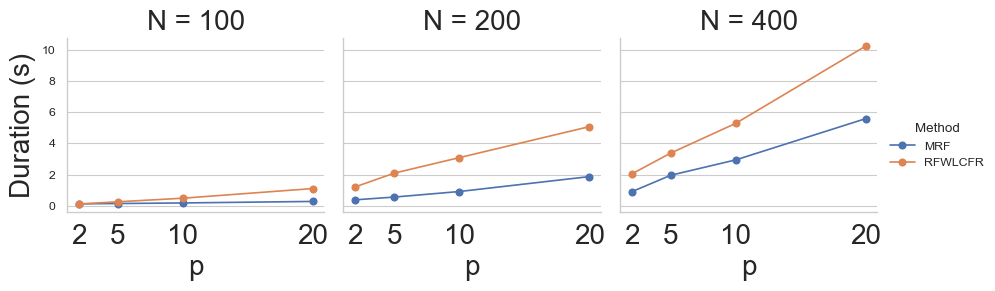

In [15]:
from plot_bench import *
sns.set_theme()
sns.set_style("white")
# forest_df = make_forest_df(df[df.method != 'medoid_2means'])
forest_df = make_forest_df(df, dists_ref_method='medoid_2means')
grid = plot_forest_df(forest_df)
# plt.savefig("./plots/runtime_wasserstein.pdf")

## MSE CART vs Medoid

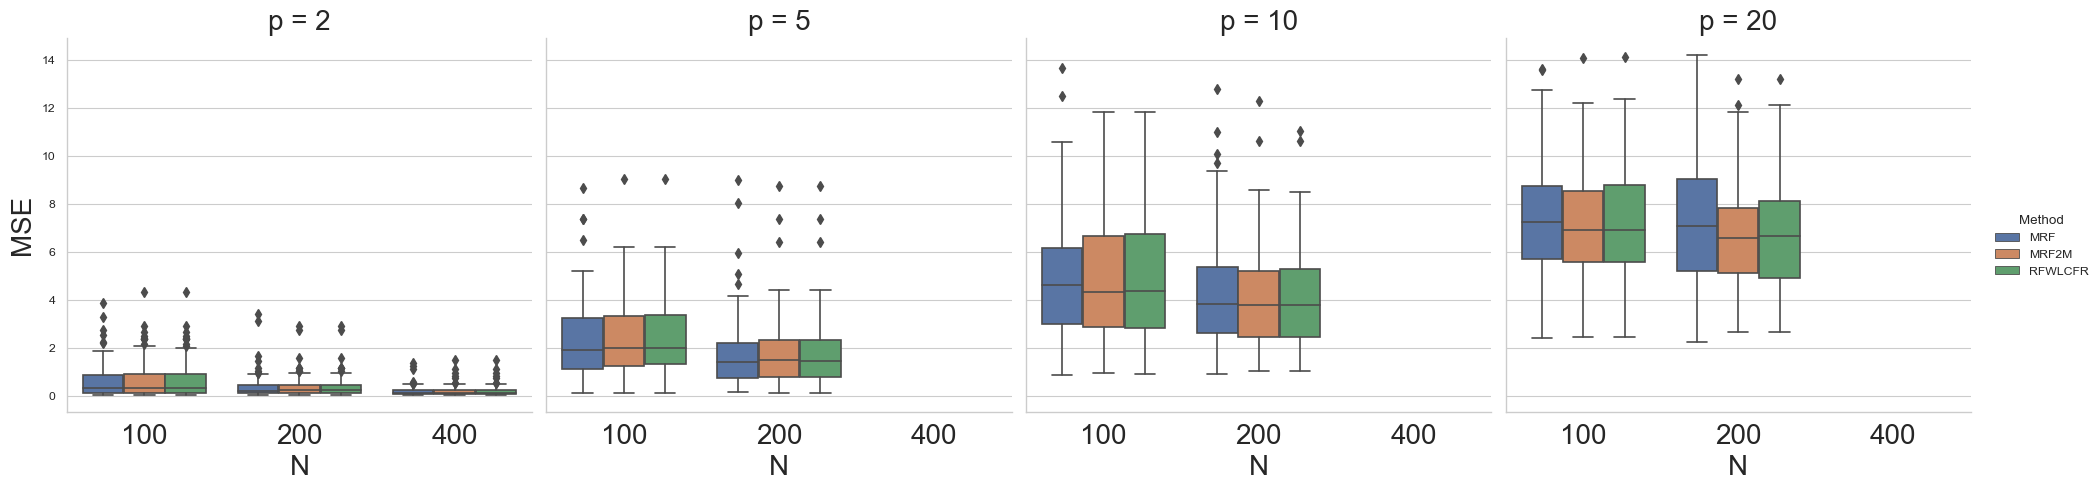

In [16]:
from plot_bench import *

# plot_errors(df[(df.N > 50) & (df.method != 'medoid_2means')])
plot_errors(df[df.N > 50])
# plt.savefig("./plots/error_wasserstein.pdf")